In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
file_path = r'C:\Users\khush\Documents\dictionery\fifa_eda_stats.csv'
data = pd.read_csv(file_path)


In [11]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)


ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [13]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)


Number of duplicates: 0


In [14]:
# Filling missing values in categorical columns with the mode
categorical_columns = ['Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until']
data[categorical_columns] = data[categorical_columns].fillna(data.mode().iloc[0])


In [23]:
# Filling missing values in numerical columns with the mean
for column in numerical_columns:
    try:
        unique_values = data[column].unique()
        print(f"Unique values in {column}:\n{unique_values}\n")
    except Exception as e:
        print(f"Error in {column}: {e}")

numerical_columns = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data[numerical_columns] = data[numerical_columns].fillna(data.mean())


Unique values in Crossing:
[84. 79. 17. 93. 81. 86. 77. 66. 13. 62. 88. 55. 68. 82. 75. 15. 14. 70.
 58. 78. 52. 90. 64. 87. 60. 12. 69. 46. 30. 80. 11. 57. 83. 85. 20. 73.
 53. 72. 36. 44. 45. 40. 27. 76. 63. 65. 48. 61. 47. 89. 19. 49.  9. 71.
 74. 24. 18. 38. 92. 56. 67. 35. 25. 50. 29. 10. 42. 54. 59. 91. 51. 43.
 33. 34. 16. 39. 28.  8. 21. 23. 41. 32. 37. 31. 22.  7. 26.  6.  5. nan]

Unique values in Finishing:
[95. 94. 87. 13. 82. 84. 72. 93. 60. 11. 91. 76. 42. 65. 90. 14. 67. 89.
 33. 88. 59. 83. 77. 79. 80. 55. 70. 86. 10. 92. 38. 15. 51. 19. 73. 56.
 64. 81. 75. 52. 40. 69. 46. 48. 45. 47. 66. 78. 63. 54. 12. 34. 57. 43.
 37. 20. 41. 85. 18. 25.  9. 71. 44. 27. 21. 74. 31. 68. 39. 62. 29. 61.
 32. 50. 16. 53.  8. 23. 58. 30. 49. 17. 36. 28. 35. 26.  6. 22. 24.  7.
  5.  2.  4. nan]

Unique values in HeadingAccuracy:
[70. 89. 62. 21. 55. 61. 77. 91. 15. 85. 54. 92. 68. 84. 11. 13. 25. 83.
 59. 76. 56. 52. 48. 79. 87. 75. 10. 80. 81. 73. 86. 35. 74. 58. 72. 51.
 14. 82. 38. 5

TypeError: Could not convert ["L. MessiCristiano RonaldoNeymar JrDe GeaK. De BruyneE. HazardL. ModrićL. SuárezSergio RamosJ. OblakR. LewandowskiT. KroosD. GodínDavid SilvaN. KantéP. DybalaH. KaneA. GriezmannM. ter StegenT. CourtoisSergio BusquetsE. CavaniM. NeuerS. AgüeroG. ChielliniK. MbappéM. SalahCasemiroJ. RodríguezL. InsigneIscoC. EriksenCoutinhoP. AubameyangM. HummelsMarceloG. BaleH. LlorisG. HiguaínThiago SilvaS. HandanovičG. BuffonS. UmtitiM. IcardiK. KoulibalyP. PogbaK. NavasR. LukakuC. ImmobileJordi AlbaD. MertensJ. VertonghenM. HamšíkI. RakitićPiquéL. SanéBernardo SilvaEdersonS. ManéV. van DijkR. SterlingRoberto FirminoR. VaraneM. VerrattiAlex SandroDouglas CostaT. MüllerThiagoM. ReusAzpilicuetaL. BonucciT. AlderweireldM. PjanićM. BenatiaM. ÖzilFernandinhoIniestaM. ŠkriniarS. Milinković-SavićMarco AsensioN. FekirAlissonJ. KimmichSaúlR. MahrezD. AlabaKokeA. LacazetteK. ManolasN. OtamendiParejoPaulinhoW. SzczęsnyA. SánchezY. BrahimiJ. BoatengA. VidalI. PerišićE. DžekoS. KhediraDiego CostaR. NainggolanNaldoB. MatuidiMirandaK. BenzemaFilipe LuísV. KompanyPepeZ. IbrahimovićD. SánchezJ. GiménezAlex TellesA. LaporteBruno FernandesN. SüleA. MartialD. AlliFabinhoMarquinhosWilliam CarvalhoJorginhoF. ThauvinCarvajalM. DepayH. SonA. LopesS. de VrijM. PerinJ. CuadradoIago AspasB. LenoN. MatićL. HrádeckýIllarramendiK. WalkerI. GündoğanJosé CallejónA. Di MaríaM. MandžukićWillianSergio AsenjoE. BanegaA. WitselD. PayetJonasSokratisS. RuffierFalcaoK. SchmeichelRaúl AlbiolA. GómezA. BarzagliQuaresmaA. RobbenO. DembéléGabriel JesusRonaldo CabraisJosué ChiamuleraLouri BerettaP. KimpembeN. KeïtaC. TolissoT. LemarK. ComanJ. TahAnderson TaliscaT. WernerA. RabiotL. GoretzkaQ. PromesH. ZiyechLucas VázquezY. CarrascoGerard MorenoFelipeM. KovačićKepaManu TriguerosS. GnabryJ. PickfordS. SavićJ. StonesSusoJ. DraxlerFelipe AndersonLucas MouraDanilo PereiraNacho FernándezT. HornAllanF. AcerbiSergi RobertoRodrigoPizziK. KamplNetoO. BaumannI. GueyeH. MkhitaryanMarcos AlonsoD. SubašićK. GlikK. StrootmanB. DostOscarM. BalotelliLuiz GustavoGiulianoDavid LuizR. FährmannJuan MataAdánRui PatrícioY. SommerJavi MartínezL. BenderLucas LeivaS. MandandaCesc FàbregasM. DembéléF. RibéryR. JarsteinD. De RossiPepe ReinaJ. PavlenkaM. de LigtRodriArthurG. DonnarummaRosberto DouradoJuiano MestresRaphaelito AnjosGelson MartinsGonçalo GuedesL. TorreiraMalcomPau LópezL. HernándezC. LengletA. KramarićA. RobertsonDani GarcíaF. BernardeschiJ. BrandtD. RuganiSamu CastillejoJoão CanceloA. RomagnoliT. ParteyFredJ. VardyA. BelottiE. ForsbergJ. LingardF. VázquezE. VišćaA. RüdigerA. FlorenziH. MaguireT. MeunierS. SanéG. KondogbiaRafinhaGabriel PaulistaMorataJ. CillessenW. Ben YedderC. BakambuPablo SarabiaW. ZahaLuis AlbertoJonathan VieraBartraS. CoatesWillian JoséMário FernandesVíctor RuizT. DelaneyK. CasteelsM. GötzeS. MustafiJ. PastorePedroG. BonaventuraR. BürkiTaisonS. NzonziMarlosA. RamseyK. TrippierA. KolarovG. SigurðssonS. GiovincoM. ArnautovićN. GaitánJ. HendersonM. KruseM. ParoloL. FejsaA. RamiV. ĆorlukaG. WijnaldumF. FazioO. GiroudMarcanoA. GuardadoE. GarayJardelS. SiriguE. VivianoL. KoscielnyA. ConsigliL. BigliaDani AlvesDavid VillaAdurizP. ČechCasillasM. RashfordLaure SanteiroL. BaileyM. AkanjiF. de JongNélson SemedoPablo FornalsFabiánE. BaillyDani CeballosH. LozanoMoralesJ. SeriM. PolitanoM. BrozovićWilliamsA. CorreaA. ChristensenJoão MárioT. StrakoshaE. HysajP. ZielińskiRicardo PereiraGrimaldoR. GuerreiroA. DoucouréJ. MartínezC. BaccaA. PleaB. DaviesM. NastasićA. MilikM. SabitzerB. MendyC. KramerS. VrsaljkoT. HazardK. BellarabiS. ZazaF. GhoulamB. LecomteJ. IličićK. VollandPaco AlcácerVitoloG. XhakaD. TadićC. AránguizS. VerdiD. LovrenG. MedelX. ShaqiriJ. CoronaA. AreolaK. VogtAnder HerreraE. SalvioS. El ShaarawyC. SmallingHulkS. KagawaM. LanziniF. SmolovL. StindlO. ToprakD. PerottiF. MusleraB. HöwedesS. KjærS. BenderM. ValbuenaPedro LeónK. BoatengL. PiszczekA. CandrevaD. WassE. LamelaD. RoseC. VelaRenato AugustoA. ValenciaL. FabiańskiJoão MoutinhoBorja ValeroF. QuagliarellaB. GomisManuel FernandesH. HerreraRaffaelNaniJ. MilnerJ. MathieuJoaquínM. GómezK. HavertzT. NdombeleH. AouarCarlos SolerOdriozolaM. AlmirónWelington DanoEverton AndrãoOyarzabalF. BalbuenaM. MaregaB. PavardW. NdidiA. OnanaG. Lo CelsoM. AcuñaRúben NevesMarianoRaúlM. CaldaraM. VecinoT. BakayokoM. DahoudRafaK. BaldéG. RulliF. ArmaniRony LopesSanti MinaK. DemirbayGayàAndré GomesN. TagliaficoM. SansonPachecoE. CanH. ÇalhanoğluM. GinterM. KeaneL. ParedesT. StepanenkoL. ShawZ. FeddalS. HallerBernardT. InuiPortuM. BatshuayiE. ZahaviT. VaclíkN. PopeHéctor BellerínP. KadeřábekJ. ButlandJ. VestergaardJ. TarkowskiDeulofeuE. DierJ. MurilloM. BadeljIsmailyN. SchulzL. DigneM. UthCristian TelloD. VidaL. MurielV. AboubakarA. Oxlade-ChamberlainS. AurierJ. MatipY. RakitskyiSergi EnrichA. YarmolenkoHugo MalloAndré AlmeidaD. DidaviR. RodríguezR. PereyraMario GasparMaiconD. BlindJ. ZoetA. LjajićCanalesIago FalquéL. de JongGuaitaMuniainSusaetaS. RudyK. TrappV. WanyamaN. NkoulouR. BoudebouzCamachoS. UlreichM. MusacchioC. StuaniP. GulácsiBrunoF. DelphA. LallanaMarceloS. ColemanAlexandre PatoAntunesNacho MonrealBeñatA. FernándezK. GameiroI. PiattiV. BirsaS. RomeroD. CriscitoD. ValeriD. SturridgeRaúl GarcíaS. DefourM. ŠkrtelS. RaduG. CahillL. DiarraL. PerrinDanteA. GranqvistA. GignacM. GómezI. AkinfeevI. DenisovJuanfranDiego LópezSanti CazorlaJesús NavasJ. MascheranoA. MiranteD. SrnaB. SchweinsteigerMoyáW. RooneyFernando TorresS. SorrentinoV. TsygankovRúben DiasDavid NeresRaphinhaA. HaritRicharlisonL. MartínezF. KessiéLuimo Boas SantosGabri PrestãoMelvin ParrelaAntônio ChiamuloiraMaikel CatarinoA. LunevAndré SilvaC. PulisicM. DmitrovićL. TousartMarcos LlorenteB. VerbičS. BergwijnA. DialloA. GolovinM. CampañaC. PavónK. Toko-EkambiGranellF. CerviJ. WeiglV. LindelöfA. RebićA. SanabriaR. BattagliaM. PhilippA. Saint-MaximinD. ZappacostaL. AlarioD. BenedettoI. MarconeJ. GbaminJ. LermaRicardo HortaR. ZobninM. MeyerBrumaR. CenturiónJonnyOtávioJ. HofmannN. AkéJ. HectorS. KolašinacG. PizarroRogerSergio RicoL. MilivojevićD. BaselliK. RekikDenis SuárezW. OrbanMário RuiIñigo MartínezK. ZoumaRoque MesaJ. BrooksL. KariusZé LuísD. KlaassenM. ElyounoussiL. BittencourtSergi DarderJ. RoussillonD. DemmeJ. GouweleeuwM. RojoJ. VeretoutL. KurzawaG. RamírezDavid LópezC. TătăruşanuA. MandiD. SidibéY. KonoplyankaS. BerghuisH. VanakenCampañaM. van GinkelNolitoM. GregoritschIbai GómezDaniloR. BarkleyM. RyanSergio LeónB. StambouliJ. GuilavoguiSérgio OliveiraD. CaligiuriC. WilsonP. JonesBorja GarcíaY. BelhandaG. PezzellaJaume CostaC. TosunEscuderoKike GarcíaElkesonRicardo GoulartJ. GuðmundssonN. ClyneM. HitzDe MarcosB. MeeRafaelIborraJ. WilshereB. HübnerSouzaF. CoquelinAlex TeixeiraA. DzagoevI. SmolnikovY. M'VilaK. AsamoahR. ZielerD. DrinkwaterN. KalinićMarianoS. FeghouliAdrien SilvaFernandoI. TraoréG. MercadoN. PetersenO. KarnezisM. SakhoSidneiS. JovetićEderJ. HernándezFabricioKiko CasillaÁngelM. SchneiderlinM. FellainiP. WernbloomD. OspinaS. MignoletA. BegovićN. ŞahinR. BertrandA. MasielloT. WalcottCharlesT. HeatonH. Ben ArfaD. AbrahamE. LavezziS. KalouJ. FarfánR. BabelA. YoungJ. HartL. LópezD. BaierB. YılmazR. AdlerS. LichtsteinerE. AdebayorE. BelözoğluLorenÉder MilitãoF. ChiesaM. LazzariA. HakimiS. NakajimaL. JovićS. AscacíbarA. LafontT. Alexander-ArnoldF. KrovinovićSidney PessinhoEverticinhoClaudio CoíntraRonaldo EslerP. Lees-MelouB. ChilwellJoão NovaisD. CalabriaF. MendyL. PellegriniSoaresDaniel PodenceM. DíazG. MartínezM. EggesteinTrezeguetN. AmiriVallejoJ. GomezDiogo JotaJoan JordánDyego SousaA. MarušićDavid SoriaV. RongierW. WeghorstO. Al SomaM. NakambaPetrosPablo MaffeoY. MinaM. DúbravkaDiego CarlosD. DjenéG. SimeoneM. MezaBastosS. LobotkaY. TielemansMarcelo GoianoK. TeteCapaM. SportielloJemersonN. MaksimovićD. ZapataJ. CorreaE. RigoniC. IzquierdozW. BarriosJ. MojicaA. SelikhovA. IwobiD. LaxaltN. BentalebN. StarkM. LeminaL. DendonckerRicardo EsgaioP. SistoP. MaxR. GagliardiniPere PonsD. BerardiM. HalstenbergJ. QuinteroTiago VolpiÓliver TorresOmar MascarellH. SakaiAndreas PereiraA. JanuzajB. CristanteMatheusB. TraoréY. PoulsenL. TrossardM. ArnoldM. De SciglioLeo BaptistaoV. ChiricheşL. PavolettiA. CragnoL. CastroN. FüllkrugF. FajrR. JiménezE. SalaS. GarcíaS. AriasB. ReynetPozueloA. TrebelJ. LascellesT. KongoloA. CarrilloÁlvaroG. DefrelFernandoV. DaridaR. SaponaraPedro MendesC. SchindlerN. ChadliArbillaL. DunkP. HernándezJ. GuidettiSergi GómezOriol RomeuLucas PérezB. NatchoCláudio RamosF. LejeuneG. KrychowiakN. LodeiroO. ÖzyakupC. TévezK. PapadopoulosM. GradelM. DebuchyV. MosesZ. JunuzovićGraneroJ. BaumgartlingerFábio CoentrãoB. CostilHiltonN. GudeljL. PrattoE. HernándezJuradoR. CabellaRafael TolóiC. BravoHernanesK. HondaA. DzyubaJ. HolebasJavi GarcíaSergioM. CáceresDaniel CarriçoJ. CorkJ. TomkinsGuilhermeGervinhoJ. ShelveyR. EremenkoR. VormerJ. LensAdrianoS. CookL. PodolskiC. AnsaldiManu GarcíaR. AlessandriniJ. Ward-ProwseM. HarnikB. MoukandjoG. PereiroG. CastroAarón MartínF. JohnsonL. LópezM. DosseviCaiubyGabrielIván RamisM. SuchýT. VilhenaE. ÇolakV. GermainG. HoarauSergio GarcíaE. Choupo-MotingJ. PinolaJ. HendrixJ. IzquierdoS. SydorchukC. GrenierT. StroblV. Odjidja-OfoeN. GuzmánF. FabraJ. MaddisonK. El AhmadiM. Carcela-GonzálezM. GabbiadiniGomesM. RitchieG. BouJavi FuegoE. AkbabaJ. AmaviR. MalinovskyiD. WelbeckG. ContiBrunoGarry RodriguesA. SchwolowL. CookP. PérezGazzoliscoJonatan SorianoRubén PeñaMikel San JoséP. GroßL. BainesA. OgbonnaJuan JesusJ. MartínezN. ElvediG. MorenoJ. ValdiviaA. CarrollLuís NetoA. PyatovT. GutiérrezÁlex RemiroWilson EduardoJorge MeréM. ElnenyD. TorresY. BounouA. PrijovićA. JahanbakhshJ. CalleriSimão AcunhaN. MüllerL. OcamposJ. RodriguezV. IbiševićS. RondónVictor SánchezD. SuárezK. HuntelaarL. DuboisAndré PintoK. LalaO. KıvrakA. BertolacciE. GiaccheriniA. ŽivkovićR. ÁbilaP. DiopD. GarmashT. ChandlerR. KlavanA. MiranchukD. Da SilvaD. BenaglioT. RincónM. PereiraC. BorgesJ. SandMarkel BergaraVágner LoveB. BourigeaudR. SorianoD. KuzyaevR. SambuezaMontoyaA. PoliC. AustinL. TonelliM. ZárateJ. SanchoD. BastaMarçalMunirG. SioJ. McCarthyJ. AquinoH. PérezJôR. GurtnerC. SánchezM. SissokoW. AntonE. SkhiriRúben VezoJorge MolinaM. HasebeA. SchürrleO. IghaloL. AcostaV. BabacanR. AguilarYerayJ. DefoeL. SchøneC. ÜnderM. DabburRobertoDjaninyWallacePedro ObiangD. HeintzN. MukieleT. VermaelenI. AbateDiego LlorenteC. WoodFormosandrinhoE. PulgarV. VasinV. GrifoA. TuranJ. dos SantosD. SchwaabM. SchmelzerL. SpinazzolaA. DragovićD. PröpperR. IngleseA. MarchesínR. De PaulC. GentnerG. MurrayRafael CariocaA. McCarthyL. ChichizolaD. ZakariaG. DzhikiyaN. CastilloD. OrigiO. YokuşluD. CheryshevD. SelkeWendellM. LayúnY. SabalyP. CutroneF. MarchettiW. CyprienG. PalettaF. CaicedoJordi MasipB. EspinosaM. BenassiP. JagielkaJ. KuckaR. BradyA. SzymanowskiW. ReidCédricR. CivelliR. Loftus-CheekS. De MaioS. BrownA. MitrovićP. SkjelbredD. CvitanichK. LasagnaR. PalacioM. WolfE. GigliottiN. JørgensenLaguardiaJ. LukakuJ. AugustinM. DiakhabyDouglasN. PejčinovićD. van de BeekBorja IglesiasG. ShibasakiW. HughesS. BoufalT. KehrerM. LangE. GutiérrezD. UpamecanoJeffersonW. BenítezE. BardhiK. MbodjiB. SarrF. FerreyraDaniloA. AyewK. MitroglouJ. VillarP. HerrmannD. da CostaV. FischerWesleyD. GinczekF. KostićR. FraserCoteH. WinksK. MbabuM. HintereggerL. AcostaSidcleyM. JørgensenM. FabiánCarlos EduardoRubén CastroL. AugustinssonS. AzizG. OchoaP. HetemajAndré AndréVinícius JúniorB. DžemailiJuanpeK. FortounisM. VormB. OczipkaR. BentancurT. HernándezM. LowtonI. DiopB. AndréC. PicciniPaulinhoA. DiawaraYuri BerchicheJosé SáF. KamanoF. CartabiaE. ÜnalI. RadovanovićRenan RibeiroJonyD. BuonanotteTomás PinaN. PalloisD. LatzaF. BelluschiO. AbdulrahmanO. TrejoN. BarellaAngeliñoVieirundinhoF. OrellanaF. GrillitschC. OrtízBruno VianaJ. MaidanaR. Funes MoriD. KohrF. HiguaínA. BarákF. AndoneAdriánG. GonzálezOtávioD. JanmaatR. Funes MoriP. SchickAleix VidalA. SchöpfW. BolyAlberto MorenoC. VillanuevaM. WeiserG. EscalanteM. HolgateJ. HopfD. ZurutuzaJuanmiK. GibbsF. FernándezL. KalinićN. RadojaN. BlandiDavid JuncàWu LeiGabriel BoschiliaIuri MedeirosM. PhillipsIván CuéllarJ. LösslMario SuárezW. BonyS. DoumbiaD. ReyesBernatV. BehramiS. LangkampJ. SosaA. TouréJeséD. IngsM. EsserF. AcheampongR. KnocheO. VlachodimosJ. DenayerS. RodeWendelA. NagyAlfa SemedoA. BarnesAlan KardecMarceloE. BoatengDalbertA. HalilovićI. PopovT. CleverleyM. LivajaM. UribeP. BargfredeJ. JanktoJunior FirpoD. D'AmbrosioD. BoykoM. DíazS. VokesHéldonMario HermosoF. BartelsK. MalcuitR. MarinAyoze PérezJúnior MoraesV. BerishaR. FreulerGansoVicente GómezM. PašalićVitor HugoB. FornaroliR. SnodgrassFrancisco GeraldesI. OrdetsD. SantonM. NiangO. WendtC. RiverosF. BenkovićM. TorresM. NobleM. RashicaC. BentekeRômuloD. PabónEmbarbaC. KerbratL. TeodorczykAlexo BaiaDavid SeijalboN. NándezL. RuppJordi AmatW. CaballeroF. Di FrancescoO. El KaddouriT. RogićG. TöreM. DestroJosuéA. BizzarriKi Sung YuengH. OnyekuruN. PépéMatheus PereiraY. SaliburE. VargasL. MagallánDannyC. HérelleE. MangalaO. SelnæsVíctor VázquezDiego MariñoCarles PlanasG. FernándezSoldadoA. EkdalGedson FernandesM. DarmianN. ChalobahR. PizarroAndré SimõesS. TshabalalaL. RossettiniF. VivianiM. de RoonRubén DuarteY. ŌsakoGilA. RuizP. van AanholtS. MeïtéK. DolbergJuli FreitinhoL. ViettoA. IzzoA. PaloschiG. GönülLlorenteJ. MorelG. KakutaJoão PedroS. GarcíaEltildo CorreiaKenedyM. MoralezN. VukčevićF. BoriniI. SarrC. ClarkMataM. AlbrightonA. GrayF. GuarínYoelJ. CuadradoS. WidmerB. DzsudzsákP. MantalosS. ProtoA. MehmediPabloI. SlimaniC. ErkinD. ChygrynskyiBetoA. SamarisG. LapadulaDênildo SteinS. PadtS. TaïderF. KlausH. NordtveitL. ZuffiEmilio PiodãoS. ZuberJ. PalominoY. MutōJ. AltidoreM. BarbosaG. LabordeP. BaysseEric BotteghinIván AlejoS. BlancoThiago MendesD. BrosinskiT. MonconduitAndrés FernándezErasoS. HanniM. KonatéC. ThéréauA. DonattiT. JedvajPedro HenriqueJ. BriandF. LustenbergerJ. AyewS. SanogoR. ThomasRafael CachoiraN. SansoneE. BičakčićJ. VeltmanA. KnockaertDouglas SantosS. BocchettiM. DembéléE. ValenciaF. MolletD. DumfriesKoo Ja CheolA. PetagnaDe TomásE. BalantaT. KoubekJ. AllenAlan CarvalhoS. RistovskiMaicónD. QuinteroP. HøjbjergI. SantiniVieirinhaM. BoselliL. AntonelliB. EmboloV. EyssericC. SalcedoA. RanocchiaL. UnnerstallT. BaumgartlF. BustosP. JanssonW. VainqueurS. KverkveliaRubén BlancoP. AguilarA. Ndiaye DiedhiouRafinhaD. LimberskýG. CabralJ. De GuzmánS. TeroddeJ. FernandesKiko FemeníaRecioA. SamedovA. SmithMaurícioD. StephensMiguel LopesI. BelfodilJ. CampbellMarc RocaM. VeljkovićJ. WillemsA. LennonF. ForsterJúnior CaiçaraC. BiraghiAritz ElustondoFred AníbãoO. RomeroNelsildo ReisV. KozielloA. CresswellAlex BerenguerC. DaviesC. KouyatéY. KobayashiCamarasaJ. MartinJ. GrealishD. PelkasJ. MonteroJ. ForrestVarelaM. AntenucciR. DurmisiP. SchweglerA. HuntAday BenítezK. TierneyJaumeS. GigotI. BrizuelaA. SouquetA. DelortP. ZabaletaAndeson TrigoJ. GnagnonMosqueraI. BebouR. MorrisonL. ChristodoulopoulosJ. McArthurR. OlsenW. HoedtR. HoldingF. MonteroN. SlitiJ. VázquezRodrigo ElyM. BenítezY. YazıcıY. SankharéA. N'DiayeS. BellK. LinettyF. UduokhaiM. SamattaBarragánR. HamoumaL. SkorupskiToño GarcíaA. SzalaiRaúl NavasB. KonéJ. BrekaloDiego TardelliA. HegaziM. SelsD. GrayM. PjacaM. ArambarriA. ĆorićT. Gebre SelassieC. NkunkuM. TopalLéo MatosF. KainzB. HenrichsVictildinhoD. PraetA. UmarJ. OrozcoN. El ZharO. ColleyJ. AholouG. ClichyRubén SobrinoJ. IturbeH. SoudaniM. BradleyZ. LabyadD. MbokaniT. ManganiA. LuninE. InsúaN. DomingoD. YedlinD. GonzálezT. KraftM. SimonDavi ParrelaN. DomínguezC. DawsonA. RusnákPaulo OliveiraA. GomisH. TekinTozéR. RuidíazJ. HoggL. HoltbyA. DjikuO. AlonsoS. BergeC. ZambranoM. AntonioJ. ClasieDiego RicoMossoróG. DonsahFelipeS. FofanaPablo SantosJ. SvenssonE. RocoF. MidtsjøFrancisIviUnai NúñezL. LeragerP. De BlasisM. ZajcJ. StanislasLucas EvangelistaM. StochS. van BeekFabrio FarinhaM. KozáčikFran SolR. OteroG. MaripánM. BraithwaiteE. DilaverR. ÁlvarezA. MasuakuRolandoFran RicoD. TarasovAlcaláAlan PatrickL. RefaelovY. GazinskiyPalhinhaBalenziagaR. PetrovićK. AnsarifardM. NinkovićA. TalaveraA. BarradaJ. KorbF. GutiérrezT. BongondaSimão DonatinhoLuís HernándezL. BalogunM. RogB. DočkalJ. DurmazT. KádárE. AndradaZ. SteffenM. LestienneM. AlustizaBorja MayoralD. BoneraSaúl BerjónC. BeauvueDaniloJ. HernándezJ. HendrickM. LopezF. HaninD. MachísA. PotukIdrisN. CardozoJavi LópezG. PandevJúlio TavaresD. LiénardY. PeléL. SepeJ. BrumaO. DuarteA. FrancoDani OlmoF. Di SantoJozabedG. CarrilloM. ZeegelaarG. FerrariO. ŞahinerI. TraoréT. ArslanN. AraújoS. ArmstrongK. BilliatIvan CavaleiroE. CabacoSilas AlmeimC. KameniHélder CostaE. DurmEmersonG. HaraguchiC. FuchsE. KalinskiRafaelF. FreiM. RisseV. CáceresRenan BressanLucas LimaM. SilvestrePortilloF. RønnowN. SpolliS. RajkovićR. BerićV. HernándezClaudemirT. JantschkeL. SchaubP. TschaunerGabrisco AníbalB. FeilhaberA. GrassiN. VikonisP. NtepL. VangioniS. OkazakiDiego CastroC. JalletO. PinedaA. MounierSandroN. RedmondGálvezA. SongE. BaduM. AguJasonS. CristóforoL. ButelleAllan BardinhoP. DummettH. VillalbaK. AmianJosé MirazarA. HernándezAilton GuevaraO. AkhmedovNaldoY. AyoubA. RingB. NdiayeKakuAdilson EdradaA. IbargüenIraizozN. NikolićJ. KurtićK. WimmerA. MejíaA. BarrecaGil DiasJ. LocadiaS. KryvtsovO. PeraltaC. BudescuA. RaggiR. DonkEdgar MéndezL. De SilvestriM. SaracchiD. CongréM. FritzlerT. KolodziejczakCaio NunsonFelipe VizeuJ. DammGuilhermeG. NkoudouJoel RoblesB. ZunguOtávio CairinhoP. GouanoC. DomínguezR. FalkAndré RamalhoG. SchennikovM. MorozyukJ. van der HeijdenA. MusaA. DiabyG. İnlerL. CigariniJúnior UrsoB. ButkoR. ThomasM. JensenBurguiA. MeretM. GonalonsD. ValdésMarafonaR. KarsdorpI. OparaK. LaimerO. KamaraS. GentilettiSerey DiéA. WestwoodC. CianoA. ContiBojanC. VargasÉderY. BenziaW. HennesseyE. ThommyBustinzaBernardoP. CisséOierD. GayleJoelintonA. PérezB. JonesJ. DrmićM. MountA. McGregorO. ElabdellaouiR. SteffenK. KangaJ. AnanidzeS. IlsankerA. BlakeNicholas AldairR. SessegnonJorginhsonCarlitosL. NguyenA. PaschalakisFabrícioM. CocoK. BabacarPostigoRenato SanchesM. CaruzzoG. KonanS. MouniéP. CapelleT. DaviesN. DirarJ. ToornstraPaulinhoS. LarssonP. TauJ. KluivertH. AyalaMiguel SilvaD. RolánL. KlostermannG. RodríguezM. LocatelliF. CaputoA. RoaKekoA. El KhayatiF. SchärA. HaidaraChema RodríguezG. dos SantosT. BifoumaDani RochelinhasM. OstrzolekSandroL. DeauxJ. VukovićJ. HansenGonçalo PaciênciaCórdobaP. PekaríkXimo NavarroPablo HernándezG. KashiaCássioS. BambaS. KumsFábio MartinsM. SuárezS. MitrovićD. AogoB. EngelsF. TaitD. ZagadouM. DiaméA. YounesB. VerstraeteK. AkpogumaB. SantamariaE. MorettiH. BehrensM. MaignanY. KaramohV. IgnatievA. ThomassonD. AmarteyR. ÖzcanA. DonnarummaTimorC. McGregorR. MartínezV. BuyalskyiH. ArterA. MawsonF. GuilbertM. LemosS. SturaroA. DuncanMarlonM. IslaThiago MaiaY. Aït BennasserO. ToivonenJ. UrretaviscayaYuri RibeiroN. TomovićF. RoncagliaR. BottaR. MandragoraA. AdomahD. SamassékouM. YoshidaN. ViergeverR. AmalfitanoD. CataldiMartínTiago PintoFernandinhoC. CuevaM. GaćinovićG. ShojiL. RigoniM. KrmenčíkM. MevljaC. DanielsK. StafylidisSabin MerinoA. FlintBrais MéndezMerinoS. MissiroliSerantesV. GuzmánD. BiseswarE. MasNuno PintoCarlos ManéBorja ValleZecaC. ToselliM. BizotK. AyhanRicardo FerreiraN. RouxHernâniM. ÇağıranW. MorganJ. AlonsoM. WakasoK. TraoréY. MvogoKaíquão CastroK. FofanaP. HurtadoD. BocanegraMeleroBorja BastónO. MurilloO. OnaziC. GünterI. AmadouUnai LópezK. IheanachoC. SöyüncüB. PearsonF. NiederlechnerS. DenswilG. RodríguezP. GuiñazúH. HateboerI. FernándezL. BlasM. SarrMikel RicoF. NeuhausS. İnanC. MaggioMexerF. MagnanelliJ. FigalV. ClaessonF. HelanderJ. GondorfR. GhezzalAdamaO. DudaR. BensebainiL. DepoitreN. VlašićRochinaM. DohertyC. MusondaJoão TeixeiraS. WardY. CardinaleS. FrancisLafortiscinhoM. ValdifioriRubén PérezD. BoyataN. MendyA. Martín AriasPedrazaRicardoTarantiniK. StögerC. MbembaA. LimbombeK. McDonaldO. NiasseG. HerreraR. BorréE. ZukanovićA. ElisM. FernándezD. RodríguezT. KloseA. CorneliusKwon Chang HoonC. LarinTchê TchêM. LeckieL. QuiñonesFontàsK. VermeerA. SurmanM. HögerS. DannJovane CabralC. CathcartZaldúaPeléM. KellyY. BolasieL. ZelarayánGelson FernandesD. GlushakovLee Jae SungBaianoA. HurtadoA. MierzejewskiV. JanssenE. ParedesB. AlemánP. RetsosJ. HernándezS. CorchiaRubén PardoP. GoltzD. TürüçB. MecheleKaimo LimaR. RodelinBobôL. CimanD. BaH. MedunjaninJosé CañasY. OsorioTitiCarles GilP. LasneLekueA. SilvaA. Danjuma GroeneveldC. LuyindamaL. González PirezSergio ÁlvarezM. CornetM. SchnattererO. KharbinSergi GuardiolaT. SoučekY. RavetT. SereroB. DouglasS. JohnstoneMedránJ. CoronaI. FetfatzidisS. RomeroB. JokičS. SinclairL. KrejčíL. OrbánA. HamdallahR. TapiaO. WatkinsDuirval DinizArribasB. DaboG. LezcanoBebetoL. SobiechGuerreroK. BoutaïbT. HlatshwayoM. Krohn-DehliLucas TorróJ. VossenJ. RodríguezM. PasqualZubeldiaDa CostaD. KolářM. ZaldiviaS. GhoddosA. BălutăT. MeliaA. Di GaudioN. MilenkovićV. DemirelL. CooperEdercinho SepaA. MorelosJ. ChesterD. SakhoE. VelázquezM. WarisT. MatavžY. KhacheridiY. GerhardtK. LaifisJ. HoilettPascoal MuscatoJ. FurchFransérgioS. GümüşAnselmoJ. SilvaManquilloDaniel CandeiasR. ReyU. RačićAndré SousaG. OrtízA. AdemiP. RobertsDaniel AyalaM. KempfR. KhediraM. CascoCaio MilaçarO. NorwoodC. TräschC. AtsuA. TouréEduardoM. AndújarK. OlssonE. KrafthR. JackM. LuongoL. JaraM. AndreolliA. ChahechouheI. KutepovJ. PivarićE. GoldanigaElias FontoiraE. SaricS. Al FarajL. CrisetigA. PritchardD. Calvert-LewinT. KoopmeinersJoseluG. SvenssonEnaldo PrazL. GriffithsW. KatsandeS. KırıntılıE. CrivelliJairoR. BazoerG. CunninghamC. BerraA. BeckK. RoofeG. ImbulaD. RoyerC. NjieK. LawrenceN. SánchezN. BenezetO. ŞahanM. BeslerD. FalcinelliL. MooreA. AguilarDani RabaB. PoulainY. NagatomoRaúl FernándezAlbertoJ. ObiC. HourihaneB. KuwasJailson CaeiroD. CharáT. MykhalykM. BešićAlexisE. PuchKel PerinhoC. CoadyM. EstigarribiaE. SviatchenkoR. OrtizHugo GoiteiraL. DimataAndré HortaFábio MelitinhoR. QuaisonLuiz FelipeT. SippelB. NuytinckJ. BuffariniA. WakasoN. SilvaCastroM. HedgesJoão PereiraInsuaRóberOsvaldo LodeiroMíchelN. MaupayJ. RodríguezE. MorLatoFernandãoO. MartínezSuk Hyun JunN. MaksimovićJ. Kembo-EkokoS. AnđelkovićA. KataiFabiano SontaA. IoniţăSeoaneC. PizarroIvoL. SanéIñigo PérezD. KreilachT. Fosu-MensahS. GrandsirB. van LeerDiogo LeiteDavidsonDídac VilàA. CicirettiJorgeE. DidotMarlon NideiroB. BereszyńskiA. HassanJacson ZontaR. FanniA. DiamantiE. CardonaS. PrcićLeo CaldeirinhaT. SainsburyEdgar IéAlvildo SousaF. ĐuričićJ. BoëtiusF. MubeleA. ChávezV. KovalenkoY. KaboulR. MeggioriniB. SagnaKahrabaRafael VazRobson DenhoRenatinhoJ. ToljanClaudiano SobrinoS. M'BiaHélton CelanovaS. SosaErick GameiraPol LirolaM. JajaloH. MukhtarWilliamG. BongN. HultJ. GeisL. CavalliniP. VerhaeghJadson VidigalÁlvaro JiménezO. VranješM. BauerO. KayodeI. NestorovskiF. CastilloBruno VarelaL. NarsinghK. DjidjiL. RoblesA. ErokhinG. ShinnieL. RizzoI. KonatéB. Ecuélé MangaJ. CórdobaEdvaldiscoG. SakaiA. GonzálezR. RosalesJ. DueñasN. De PrévilleDiogo FigueirasA. El GhaziP. AguilarK. DollyF. MoraP. BarrientosH. RodallegaA. EpureanuM. CaraglioS. LungMaurícioA. BorucC. GordonF. SantanderA. RamírezM. CabreraB. ValdezPozoBruno GasparN. RigoniI. KahveciSebas CouteiraWalaceR. ShawcrossDavid SimãoC. RiusB. Martins IndiP. RosarioÁlvaro GarcíaKauã AbranchesA. GyanD. SimpsonH. SeferovićR. SobhiP. GazzanigaF. MussisA. MasinaJ. BłaszczykowskiJ. BeausejourJ. LivermoreD. KourmpelisNicolás FormidoJ. AidooMelendoE. PietersLuisinhoA. SemenovRamalhoKévin RodriguesK. PiątekR. VlaarR. van WolfswinkelIlie SánchezEwertonA. ChumaceroDani PachecoL. RodríguezA. JahovićM. BritosM. RitsS. DeliH. TraoréP. AguedarCrespoRafaelBigasL. ÖztunalıM. JojićVitor BuenoG. TilI. PussettoA. AjetiLuiz AraújoA. BesedinT. DidillonAranaZainadineK. Théophile-CatherineA. GianniotisBruno SaltorM. StenderaS. KaluJuan CalaJ. TavernierW. McKennieW. TesilloA. MariappaS. MorrisonJ. BrenetB. DackY. KuboT. PukkiWilliamL. MelgarejoJ. JonesI. SosaM. EkiciA. NyomK. KonatéF. ĐorđevićE. RoomT. UsamiRuben LimaFábio EspinhoL. MarkovićJ. BarreraR. MoraD. LazovićM. BurdaTanaA. MiranchukL. GrabbanI. KonéJ. HušbauerA. SoumaoroPatricP. DiamankaA. PulidoRoger GuedesD. N'DoyeS. JohansenI. AfellayA. Zambo AnguissaN. LombaertsC. ChambersI. SangaréA. SuluM. PucciarelliR. SaïssJ. HabererE. DennisJ. Kana-BiyikV. BarkasK. JohnssonS. FloccariS. PrödlV. LauriniA. EschenkoS. OkakaJ. KodjiaA. OyongoS. BolatA. MitriţăA. BehichO. TannaneF. HarounD. GoslingPedro SantosJ. LarsenF. BastiansJ. RallsS. VilakaziVictorino MagelaMarc NavarroK. KamaraDóriaS. SerdarO. TufanPedro RebochoI. StrinićS. GrytebustW. HahnAdrianiscitoL. FernándezA. LozanoM. TisserandM. RubenT. AbrahamR. NeustädterBebéM. VydraJ. LecaCarmonaC. LemaDentinhoL. VillafañezD. BrasanacS. KljestanW. MoreloM. DiopC. BenaventeA. del ValleR. IbarraJ. MussoPadilhiscoF. ForestieriA. BedoyaA. RomaoO. GladkyiA. HackD. McCartyK. AdénonJ. PlataJ. StephensM. ØdegaardRúben SemedoSequeiraI. ChochevM. GuldeBruno CésarF. JaraGabrìelM. BakalorzA. RossiÁlex MorenoF. HadergjonajO. KucherM. DioufG. BurdissoV. MisidjanA. CorreaR. SalinF. ValverdeM. EtxeberríaR. HapsCho Hyun WooY. GourcuffJesus AndradaldoP. MpokuD. MustoM. VargasA. BabaS. DavisS. ÖzbayraklıMattheus OliveiraM. Le MarchandRégisNachoB. GibsonC. TaylorT. KędzioraR. SaraviaD. DrexlerS. FaletteO. EteboA. CerciL. RodríguezR. HubníkJ. AndersenFran BeltránD. VieraF. ZampedriH. LindnerJ. Sánchez MiñoM. PavlovićA. KonéJ. FerriC. BassogogM. DiagneJ. IbeD. Heuer FernandesA. FulginiM. JensenA. BjellandJ. FuenzalidaJuanfranS. KittelV. RosierK. WastonP. ŽuljL. GrantG. JaraS. LainerÓscar PlanoDe la BellaR. CohadeP. MoralesD. ArismendiN. StanciuD. Ćaleta-CarL. FerA. WilliamsJ. BryanRicardo CostaAiltonR. CotaG. MargreitterA. RebrovDjavanA. ChedjouLunaF. RiccaC. AwaziemF. CarrizoA. RagusaA. Wan-BissakaJ. BiabianyB. MensahD. PadelliD. TošićE. BauthéacTiago SilvaA. TamezeV. ManceauF. BardiL. AdvínculaJ. GallardoEnaldo ToxetoCamiloJ. SchmidWelthonMoi GómezMarc MuniesaSamu SaizJ. SorbonS. LongS. WuytensS. AraujoAndré MartinsS. MarchF. ChafikK. AjerK. GrosickiAlex BergantiñosE. DerdiyokDavid BrazD. RoefLombánJ. DrobnýA. AcquahT. SmithR. NuzzoloG. JungM. IturraMolineroPedro SáD. PérezB. CesarD. BraghieriC. ÁlvarezCarlos PonckR. AssaléM. MiazgaLéo BonatiniB. FernándezS. HutchinsonS. RybalkaN. AcevedoJ. LuceroG. ChakvetadzeI. FossumV. KaravaevT. LeiboldG. AriasT. HuddlestoneA. ClaytonK. NakamuraL. KonéM. VejinovićH. Van CrombruggeM. RussPietrson MendesSalvi SánchezE. PavezI. KovácsNildo PetrolinaY. SeleznyovC. LöweV. CantilloJ. WardS. SkrzybskiDiego OliveiraLuis MillaA. BaJaim AbraS. von BergenS. ArmenterosY. ÖztekinJ. MolinaR. GikiewiczG. SilvaW. HoolahanFreder CabralJ. GómezRodrigo GaloR. FredericksM. IshakN. GießelmannLuis CouprinsF. KudryashovS. ZollerD. BrooksM. HawsawiM. BolañosJ. St. JusteJoão AurélioJ. MariéR. BenzarG. SerticR. PhilippoteauxGersonB. AssombalongaJ. ŠuralGersoM. UrrutiD. CiofaniEtxeitaL. AylingK. SaiefS. ThioubD. BronnJ. BasantaDiego FaríasL. RodríguezMarcos PaneiraCifuentesK. BartleyK. Monnet-PaquetG. CameronR. YaboA. NajarB. RamselaarT. CiğerciO. PérezF. MattielloV. ForrenF. DiedhiouK. DarlowF. NovákP. MartinezM. SantosJ. KopicN. Al AbedC. KeşerüFerrán TorresS. KapinoO. OpazoAndré GeraldesJuli PiresinhoJ. SchluppVinicius CardenhaB. LozanoP. HrošovskýGabriel SilvaO. SorgB. JohnsenM. Yanga-MbiwaM. BritosR. HenningsJ. BambaIvo RodriguesE. AuderoA. MaierF. TissoneM. DituroG. BiaB. AlıcıG. BussmannC. BuchtmannJ. Al HussienG. PobleteM. NiakhatéT. MinaminoN. BenedettiY. SanogoE. ÁlvarezS. SunzuM. KanazakiPaulinhoL. BustamanteE. SchelottoIgnasi MiquelÁlex GallarOrlando SáT. InceVíctor RodríguezL. BaalÉltonA. OunasH. AffulC. ClemensF. AmorebietaJ. O'ConnellF. DionisiH. HarbaouiM. NervoJ. DjourouP. KarlssonM. RangelS. PérezF. ManríquezAbraham GonzálezAilton ValpaçosJ. KoundéT. XhakaE. MenaW. JanssenDouglas ArmeiraM. DemiralD. VeraM. KamińskiS. CárdenasK. PhillipsM. RensingY. MokhtarB. DejaegereR. OrsoliniS. de JongJ. RiedewaldC. YacobYan JunlingMiguel VelosoB. ZuculiniJ. MoreiraB. HamidV. QazaishviliG. ToledoE. BarretoN. BungertC. MontesJ. PoulsenA. GrünwaldS. ClucasJ. BořilJ. LewisD. NagbeJ. GandolfiFabianoJ. MišićJ. GélinS. BertoliXekaM. RosenbergRaul GarcíaG. CaprariDiego LopesM. BangueraO. GonzalezCostinhaE. PalaciosSergio TejeraPedro RochaK. LongM. StekelenburgSamirCarlos HernándezL. Martínez QuartaF. BarbaT. ElyounoussiT. KrulR. MoriokaJ. ValdésBruno XadasA. BüttnerC. AkoloCristianoK. MöhwaldA. RodríguezJ. GóralskiS. LarssonD. NdongalaS. CarsonM. MatipA. UlmerJ. PiedM. van der HoornM. GavranovićJ. Stryger LarsenG. TorjeC. MayadaM. PérezS. ArfieldS. RibasA. ChristiansenF. AguilarO. VeigneauGus OutomouroR. CzichosY. AtalC. DoukouréF. SambuezaJuliano MascarinhasF. RinaudoS. SchrijversJ. IkonéA. SmithiesT. ReamA. MaximN. NavarroA. RispoliI. BaldéMiguel VieiraL. FreemanG. HooperR. EmondE. TerranovaS. DewaestNélson OliveiraA. LosillaF. MezaC. MatheniaO. NtchamM. KnollA. BakasetasM. BarriosS. SalcedoPerdigãoGalenoBóvedaMarc MateuG. SavilleR. ChristieP. FodenT. FoketP. SchiattarellaF. SørensenD. WardL. DionyR. KrunićRiesgoJ. HowsonJ. Van DammeM. MartinsW. FaríñezB. DibassyT. ReginiussenG. RivasBenjamin MeseiraC. NingaM. SuttnerG. van der WielW. GonzálezT. HořavaP. TachtsidisW. SaïdE. CeruttiGustavo LobateiroPere MillaJ. JohanssonT. MurgJ. RamírezF. VicariK. Adams NuhuP. NardiH. MagnússonO. EdouardD. RiceEvandro RochedoK. WestwoodBracaliM. SperdutiY. Gómez AndradeG. PeruzziToni VillaY. GordilloRicardoB. SannehMichel CruceiroL. BuriánM. TekdemirK. LamprouI. MbayeA. BrowneG. PazziniEduardoC. SantosE. MendyM. Ngadeu-NgadjuiL. MazzitelliJ. LolleyA. TraoréV. StockerD. AlarJ. AñorA. DonisM. GazzolaF. DiagneS. SchaarsM. PoundjéF. HinestrozaA. HahnV. ShepelevM. LeitnerR. SkovB. GuzanM. MitrovićA. LutheA. TraoréN. UysalG. DonatiA. UjahA. KravetsZ. TomaševićM. BorjanS. LukićC. GoldsonRubén AlcarazL. UlloaIván LópezS. AmrabatM. WöberF. LucioniCaleroC. MarrugoJ. ForlínL. JansonB. BolingoliThiago SantanaK. RauschN. EtheridgeAitor SanzFrederico VenâncioM. GrujićM. LangerakH. ManzalaPaulinhoW. Troost-EkongD. FagundezU. DemirokR. KruseT. MatlabaG. BangueraA. ÖzbilizS. Al DawsariI. SuccessA. LongM. ŠkodaA. DiakhabyD. KadahA. RíosJ. MatetaF. CacciatoreR. van RhijnR. PérezA. BaumjohannR. ElmH. KaldırımF. MonettiK. NababkinS. WilliamsM. StępińskiM. PazdanT. Al JassamM. HellerV. PajotY. AsadY. BananaW. MontilloL. WaldschmidtY. MakarenkoJ. MæhleA. ReachY. AyhanN. SkubicFrédéric MendyD. PizarroPierrino FariaAdrián GonzálezF. TobioR. SigurðssonK. ReichelNivo SerpinhoM. WaguéM. KlichA. AbdennourB. WoodÁlex PérezG. CanoI. ArboledaA. DomínguezO. KraglJosé RodríguezF. PardoR. DoanO. HiljemarkJ. McGinnV. VadaR. HallicheL. MarroneG. CimirotK. WilczekJoão AmaralR. BengtssonE. JohanssonHélder LopesSerginhoM. LinnesS. TibblingS. SimičW. TrappN. RadonjićM. SauJ. SchieberBotíaW. KanonAmiltonJ. ItoEdgar BadíaN. PenneteauV. LazaroV. WormgoorA. HunouL. GambaKim Seung JoonR. KrhinJ. HerreraB. StancuA. TashaevM. FrantzR. BezusShin Hwa YongR. GenevoisM. DegenekOswaldito CubaC. RigamontiWallaceJ. KovaříkDouglas LuizV. TorosidisN. Isimat-MirinRúben FerreiraL. GilP. DiopZ. MachachM. BettinelliA. PeñarandaK. FreiSergi SamperR. LodH. SaivetA. RegattinMauro CildinhoJ. IkokoP. ChavarríaR. BennettK. HansenS. GürlerD. DainelliM. MantovaniA. ZeneliJoão CarvalhoN. BaraziteM. AguirregarayA. RicaurteD. RandolphOmar RamosD. JensenJ. DuqueE. ReynosoJ. ElezJ. GutiérrezM. LeyeK. NaughtonCaio SeccoB. BianchiE. BarcoT. LeistnerR. KishnaF. BachirouK. RezaeiD. VukovicR. NouriJ. GómezY. GouffranManu GarcíaI. KöybaşıJuan VillarY. NamliG. BlancoA. RamosM. JedinákM. RybusJ. BarrosoA. CohenB. RamanA. McGeadyB. ReidHervíasL. PocrnjicS. IngasonT. HeurtauxG. WikheimValdiviaS. CáseresA. GunnarssonL. HinterseerS. PeetersU. AgboD. LuckassenM. TerrierMarcos GuilhermeT. ParkerA. LookmanP. MoucheA. RosinaB. BannanÉdundo OliveiraGuilhermeA. SolariH. BarnesV. CoufalS. Di CarmineC. RoldanF. LemoineDjalmaD. LukebakioY. BenalouaneL. PisculichiEdinhoPaolito SerraJ. FleckL. RosićF. SoldanoA. HansenV. GarcíaF. SánchezC. CarmonaB. SigurðarsonY. YotúnG. ZardesJ. MénezS. PredigerA. WebsterI. DamonteA. DiousséLaureN. KarelisVesgaV. JovanovićJ. FilipovićJ. CuevasRober IbáñezJ. ZmrhalJ. MurphyD. SiovasJ. PohjanpaloR. Pierre-GabrielH. DroguettB. CorgnetA. BenaliV. IbarboF. BoulayaA. BlinH. AleesamiJ. KennyD. LivakovićR. KoolwijkB. ParkerK. OmeruoG. LetiziaD. DessoleilC. NørgaardManu Del MoralA. CordazJ. CorreaM. MorishigeBruno TabataI. MboyoP. KasamiS. MontoyaT. AoyamaJoão FélixH. DialloBruno LamasP. GerkensG. Di LorenzoS. SamB. KayalWellington NemA. JohanssonJon BautistaE. MulderIsaíasD. BessaK. KaramanA. MalarzC. CarboneroNaranjoJ. RuddyT. BarnettaA. JóhannssonM. MurilloPatricO. El HajjamM. LehmannF. CeccheriniN. AguirreR. BauerOtávinho VilaA. MendyD. MalenV. GranatP. AránguizSandelas JúniorO. HawsawiF. SilvaB. CarrascoJ. SchunkeS. UjkaniG. CastellaniL. JiménezDenerM. FlekkenPedro NunoD. KamadaN. BendtnerLee Chang MinJoão PedroM. BakakisZeng ChengM. JamesG. VuralM. PérezT. CheryD. MilićevićG. McAuleyM. BarrowA. ScholzTimo TrianoA. ElmohamadyLucas PiazonC. BaezaKim Min JaeFábio PachecoA. MaherJ. Akpa AkproM. FreyS. VittorRomarinhoB. SrarfiD. KhocholavaC. PuggioniT. NecidT. LeesL. CastroP. CisséPimentiscinhoE. StevensAitorI. HaydenR. StriederR. NoirJuankarBrandon ThomasJ. BijlowH. WilsonA. GonzálezC. JeanT. AdamsO. ZahustelCasadesúsT. MoulinD. RiascosB. OsbornVieiraldo JuniorP. BillingE. PonceEnzo MerquesRômulo CalsedeMarlion SimõesJotaPedro TibaM. TorsiglieriD. MaiettaE. ÖzgençD. BuitragoC. PeraltaA. WalkeR. ThelanderE. UnsainJorge PomboPorphirinhoL. CabreraG. NúñezE. BerggreenE. LamannaK. KuskR. EspinozaJ. BahebeckC. MarshallZ. FerhatM. PackP. LasoggaD. VerdeAlessinitoJ. NsameA. FranssonJ. BabinL. SuárezR. ShottonRafa SoaresJ. GalvánV. BelecT. LawrenceM. SobottkaA. FaríasF. GaiborRafael LeãoFernandinhoP. CrouchS. AdegbenroE. MartínezRoberto TorresN. De la CruzRúben MicaelS. KorokiC. MedjaniM. MakolaD. SinkgravenF. RomagnaKiko OlivasI. BalliuT. PledlLeordinho PaesA. TuanzebeR. WolfL. AbecasisP. Kunde MalongY. OrozcoA. BouzatL. MothibaA. RojasR. WalterS. GakpéJoseluAnguloRicardo ValenteM. KeanS. DioudisS. PellissierB. AfobeC. GytkjærKim Jin SuA. CerriF. HübnerR. StrebingerA. ÇalıkJ. LedleyA. MobaraV. GămanHao JunminL. AuedC. MolinaroS. MedinaK. DiksA. BüyükGuitiánC. ChristieR. ŽuljJoão AfonsoS. DecarliR. McCormackB. TrawallyR. DanzéHwang Hee ChanS. CoopmanS. PericaA. MenaRubén GarcíaJairinhazoDiogo DalotPedro SánchezP. ArajuuriÁlex FernándezJessé LedeiroT. TorunJ. WindassT. RomanczukK. PedersenL. CaroleF. Al MuwalladS. van de StreekRenato SantosÀngel RangelL. ReyesK. LeticaC. BruntI. MbenzaA. CastroO. NylandM. IoriD. PavelkaR. KeoghAdrián BurnabãoF. SammaritanoJ. FernándezMunirJ. NietoCarlos FernándezS. MosqueraJ. PereiraJorge CarvallinhoR. ŘezníkY. MulumbuA. EssweinL. BoyéJ. van OvereemM. MahiD. HendersonI. LewczukF. KroosF. QuignonD. N'DingaWelintonL. JiménezN. MushekwiJ. JugasClaitonG. ZusiJ. MauriL. SigaliI. SeckD. GonzoSu BoyangL. CaldirolaG. HaucheB. HrgotaD. MoralesM. MilliganD. ČopA. AndradeF. RicciA. ÖmürM. ErdinçD. ZabalaR. CanouseA. HoffmannJ. MattheijM. SprocatiJ. Torres NiloD. KombarovR. MétanireJoão SchmidtH. PalaciosGao LinA. GerndtH. BandéE. JakupovićL. ArdenteS. KoçE. AndersenE. InsúaSimyG. AngellaFelipeJ. CorreaF. ColocciniS. FreiF. CeravoloF. Eboa EboaA. AbedzadehS. GustafsonA. TelloO. HurmacıR. GutiérrezN. MurruW. ZimmermanG. LanaroI. CanutoS. NakamuraVasco FernandesLuís LealM. GonzálezJ. BarreiroClayton FildeirasN. MazraouiBruno UviniR. SigurjónssonP. ArriolaE. BuendíaG. GilletB. MéndezA. BriseñoS. SáezF. ZuquiR. LamahPaulao JunqueirasG. EscobarS. ŻurkowskiDiego ÂngeloM. JohanssonO. JohnFilipe AugustoF. LértoraA. BarbozaT. SavanierDaniel GuimarãesE. OforiE. KaracaD. Di GennaroB. KetkeophomphoneA. HenríquezF. AngileriA. MatriD. BangueroNilsito VilelaCanellaM. Pérez GarcíaA. KhubulovA. CostaA. MoralesS. LongoL. HölerTorrejónRogerinhoZhang XizheVítor GomesR. van La ParraV. Le GoffAlbentosaS. KhaouiH. GoitomT. HowardC. ObasiG. FofanaL. AndersenD. LinsmayerM. GoicoecheaDanklerJ. ArangoC. ChiminoA. TraoréS. VieraL. MontesJ. GarroA. WardaVarelaM. CuisanceJ. MercierE. HallfreðssonT. SušićE. GnahoréN. BertoloK. NordfeldtR. VargaS. YagoHugo RubiãesJ. OkoreY. BammouB. CaicedoA. SilbeiraN. PowellO. AlanísCarleto CostinhaR. WilliamsG. CharbonnierJ. EganL. OlazaM. KosanovićF. CerroS. NaismithMauro RiboasRafael LopesDavid GarcíaA. MosqueraO. IdrissiYu HanchaoHong Jeong HoM. SchmiedebachS. BadjiR. GómezD. LimniosRenéS. ScuffetJ. RinneL. AgbenyenuMarcãoJ. SalaA. BambaR. QuiotoSanti da BrumaY. En-NesyriS. JungR. MatosThiago AlminxaJ. LucumiT. ChevalierS. PolterM. Møller DæhliO. BoumalK. BoydDouglasM. MalyshevM. ZarachoM. ShaparenkoJ. BoyeV. ReginiH. MartínC. GalanoCristian LodeiraJosué SáL. MenossiAdrián MarínAleñáD. MaresicO. LewickiP. BernardoniWalter SilvieiroM. WaghornD. ÁlvarezM. CastagnettiA. DaviesL. MabialaY. AbdelhamidP. RubioC. StrandbergA. ShabanovG. BrugmanJosué da FeiraC. PinsoglioW. FoderinghamD. AriasD. BouangaM. OlungaMuriloT. TrybullI. Kiese ThelinT. CardonaC. FassnachtY. OuattaraQuiqueM. GünokT. KalasA. BriançonS. AbdullahiL. ŠtetinaK. KerschbaumerJ. TalloP. DíazC. GruezoP. GalleseJ. MorrisonJ. FoythD. VillalvaB. AcostaR. VargasM. DuckschN. AsareJ. GresselT. OarFernando BobC. BernardiH. DalsgaardG. BarryJ. BottinelliD. DibuszI. DiomandéY. Al ShahraniN. BoilesenS. Ben YoussefG. SaraJ. OteroA. Biyogo PokoL. CastellanosN. MarašT. LetschertF. FontaniniA. HruškaMartosJ. JeanvierJ. TagueuC. TerziI. PirisS. MoreiraAketxeS. RieksF. MoubandjeP. AnkersenC. FallettiAllanoJ. MorávekC. RiañoAythami ArtilesJ. RisdonE. AlioskiC. RobinsonS. BastienJoão TalochaJ. PollersbeckM. AbeidM. RzatkowskiMarcãoÁlvaroB. PerlazaR. SallaiB. KamaraT. BeugelsdijkG. GiménezK. LaffertyL. DíazL. BenitoRaúl LizoainL. ReyesP. BardsleyJonas DamastoP. Da SilvaM. RodríguezJ. HugillThiago CionekA. StrunaR. SalinasSalva SevillaY. BissoumaM. RohdénM. DemirD. LezcanoJ. PuncheonM. AbarhounW. OwusuRúben FernandesE. LópezO. RiveroJoshuando SáL. MartínezO. ŞişmanoğluA. ZaldívarD. GuzmanJ. JonesJ. GüemezJeff MeirsonCamachoNuno da CostaT. ZenginB. JeannotM. OikonomouP. StojanovićB. SarmientoJ. HamadA. Al HabsiL. MirandaR. HolzhauserDani GiménezMayconH. KiyotakeD. MarohE. ŞenK. OnisiwoS. JuklerødP. StenzelM. CamaraDouglasD. Le TallecR. GosensR. BobadillaK. WolzeC. BashamJ. CabotGonçalo SilvaC. ArboledaG. LajudUnai SimónC. KnasmüllnerL. LolloA. MilićRonaldo VieiraS. BahokenOntiverosN. HöflerK. AcostaKwoun Sun TaeA. ÇamdalıB. LinssenM. TrottaJ. DeziChoi Chul SoonDaniloJ. SavarinoM. ZemanN. BakerM. SaymakYeom Ki HunJ. MurphyE. PribL. PhiriJubalA. CubasLuismiA. AdnanDiogo GonçalvesRui FonteJ. BennettS. OrtegaB. BiałkowskiRicardo RyllerJ. BörnerFran MéridaTitoS. SensiA. WeimannFernando CanesínI. RunjeVigarayP. OlayinkaR. DelgadoJ. WilandV. FigueroaChiquinhoC. TrimmelS. LletgetC. JullienO. AldereteA. SaelemaekersM. VrančićJ. UronenK. SchindlerSin Jin HoL. HaraslínA. FiolaX. SchlagerN. JelavićT. Ben HaimClinton MataS. HutchinsonJ. RussellS. UçanRenato NetoJ. MeramJorge MiramónA. MurgiaI. ÁvilaT. KaminskiK. ZohoreL. CeppitelliNuno CoelhoC. MulgrewD. DwyerJ. CarrizoF. PelusoM. van der WerffM. PiedrahitaV. AyalaR. AlvaradoD. RossiF. PisacaneU. ĆosićSebáD. PeraltaR. KochA. GhazalA. FedericiDavid SimónM. OršićAlexandre FrandeiraA. TetteyG. HanleyCristian HerreraR. GreenGelson DalaM. HigashiguchiJorge TeixeiraR. WoodsS. Martinsson NgoualiW. ÁngelD. VillalpandoM. ŠitumT. CarrollR. ElliotSergio SánchezI. CofieS. ByramM. CauteruccioK. MolinoL. AriaudoP. KlingmannM. ThuramY. CahuzacElustondoS. DowningL. ImmersC. MenéndezVágner CorraldoLusoC. MavingaF. MelchiorriT. DoumbiaA. TrondsenSiveraAllison SireoZ. StieberS. BerahinoO. SkúlasonL. KoutrisM. PektemekR. SchüllerSergio HerreraE. KawashimaL. MemushajE. FernandesM. ValenzuelaH. LansburyA. GunnA. KamaraR. RiouJung Sung RyongA. CaraccioloEwandroG. HoltmannErik MoránTobias FigueiredoI. RossiMiltisco PaulinoP. BrlekG. BettiniR. KentJordi CalaveraM. LeškovićG. FriendS. AydoğduS. GashiO. DeschachtE. CecchiniT. KnippingH. YamaguchiV. AguileraJ. CavalliL. PasciutiM. MakuszewskiL. AlbertengoSerginhoF. SchnellhardtM. PavoneT. GoigingerK. BeckermanLuis GarcíaLyancoA. LuciLuca SangalliS. AmeobiJ. PriceGo Yo HanO. HawsawiJaime RomeroS. GrippoF. ChalovL. SiligardiD. AppiahS. SilvaJ. PatersonT. BarkhuizenI. BangouraS. MemiševićF. TabanouT. HooglandG. PezzellaD. KolovetsiosEnric GallegoJ. GarnerK. BonifaziSouzaJ. AdéotiR. CarocaD. Rosero ValenciaM. JonjićA. TarekO. FinkF. MachedaM. DuffyY. ChibsahT. SchützRodrigo BecãoM. LoumD. FletcherVadilloP. KlementA. GogiaA. ColeK. TsimikasMateusBabancoX. MercierD. NugentN. FernándezO. HernándezE. MathohoB. SarrA. SagalJ. GrimmM. NyatamaB. TouréDiego GonzálezS. RostedY. SuzukiI. SackoFlavio PaixãoG. FernándezJ. HayesT. OuwejanD. GuerreroW. RoutledgeC. PatersonHwang Ui JoG. KvilitaiaR. KrishnaT. CastagneLéo JardimHeitor GesseL. MajerR. CarreraB. CelinaR. MatarritaL. VitaleR. GestedePedro LópezJ. LucumiW. EndoJoão BardinhoF. BarrientosP. GlykosC. MoritzE. KachungaS. MendozaDiego GaloLinsG. PegoloU. BulutDani CalvoAlam AraújoF. AndrijaševićI. FiolićM. CaireC. AdamsP. ŠkuletićG. LuxP. KieszekB. CortésS. NishikawaM. LustigA. BjelicaG. AlcobaJ. RhodesJ. CamposBorja LassoO. CabezasG. SunuD. WilliamsNuno SantosN. GonzálezM. BolandM. BianchettiG. CelisSomáliaY. El GhanassyE. FinlayA. UchidaN. BrighentiI. Tajouri-ShradiS. AbdullahiLionnJ. LarssonT. PachonikF. BellugouOsmarS. MottaPau TorresAndré PereiraTiago SáM. CodaW. MesloubM. CapuanoA. HenríquezG. DorransVíctor DíazT. MakinoJ. MensahI. SyllaCyriacBernardoP. GolliniM. VlapTiago PombeiraY. SoteldoRafa LópezA. NocerinoJ. HarperR. De LaetJ. ZimmerC. SăpunaruAfonso FigueiredoJ. OmlinR. YaremchukF. WiedwaldA. GalabinovMaikel MesaB. GarnicaD. ArslanagicH. HenaoY. KashiwaJ. GolN. GhilasB. McKayCarraçaAdriano FacchiniA. CallensJ. PerbetM. AntonssonCarlitosC. LucchettiJ. BostockV. Milinković-SavićG. PeñalbaL. KleinheislerR. AliendroL. SeijasL. FuentesR. HassanL. Di PlácidoHeriberto TavaresPulidoEwertonG. VerónO. BoscagliC. JeromeE. MuñozU. ĐerićE. AlbayrakF. CalvoF. CostaXavi TorresA. CadavidJ. SpectorFelipeM. DijksM. HassenM. BourabiaL. HejdaE. BergströmShikabalaAurélio ButaC. PenillaD. CoolsD. MuñozG. SandovalY. BodigerT. KleindienstJ. AbellaU. EmanuelsonR. TescheB. NivetLéo JabáPaulo HenriqueY. MeriahA. SotoJ. QuiñonesDomingos DuarteE. BaşsanF. AvenattiV. FiorilloO. GonzálezZheng ZhiM. HenriksenPaulolettinhoS. MalezasW. LautoaM. FofanaJ. CornejoJ. DuqueE. HorvathJ. McCleanA. GuédiouraE. ValentiniJ. ŠimunovićC. KouaméN. De PauwAlex das FreitasMossaJ. MarriottJ. RiojasL. FrödeL. PokornýD. VavroM. BjärsmyrOriol RieraM. MaolidaM. MostefaR. CarrascalO. MangalaM. BarthelméA. NovikovasJi Dong WonR. RúnarssonD. RotariuPaulinhoJuan CarlosM. KorhutS. PietteN. OrtigozaAntónio FilipeM. Pereira LageJean CléberO. DanchenkoC. PantilimonGuillermoO. VizcarrondoE. AguirreEdu MachadoH. DeanD. AndradeD. MartínezC. BrysonB. BaşaçıkoğluK. MrabtiM. FragaI. OblyakovS. LoganD. KaiserD. SilvaA. NwakaemeJ. SambenitoToribioM. YumluA. MiloševićD. NounkeuM. BarragánM. IlaimaharitraH. GonzálezJ. El YamiqJoão TeixeiraM. DoumbiaR. BrégerieA. DialloM. BrunoJ. FaussurierC. WickhamA. AbrashiK. NakamuraSuso SantanaJ. BowenGarridoE. N'DickaJ. GonzálezM. SuárezY. AndreuJ. ObitaZ. ErdalL. CapezziElsinhoD. AsprillaS. TorricoLéo GamalhoJ. PlašilT. DarikwaGuilherme SityáEscassiG. AchilierVerzaB. SalamonA. ForshawJ. QuiñonesW. CamachoT. BuffelXiscoAdeilson GesserRoderick MirandaN. BesaraD. ZbozieńJ. CueroR. ColyK. MüllerR. ZozulyaR. MphahleleK. LeeB. KoitaHeltinho MeloNascimentardoP. BarreraR. PucinoMiguel RodriguesC. PinaresA. GonçalvesK. MusonaTiagoN. LeivaA. SchiavoneManuel da CostaS. HierländerBruno AlvesJ. VelázquezM. ChanotO. McBurnieJ. OnomahM. MadlCucurellaC. AraujoM. HartmannM. SpiranovicChong Te SeM. AlbornozA. NukanL. SzukałaE. PerlazaM. Dal HendeEmerson AvintesSaberto BotelhoJ. DahlinMartin CordeiaA. OukidjaB. AnguloS. BurchertNélson MonteD. RojasCharlesH. WolfE. VidelaP. LedesmaR. van DrongelenF. JensenArturEdgar CostaS. MartínezD. FisherL. ClarkeT. HubočanDani CastellanoJavi CastellanoP. OlkowskiM. CaligiuriMarlion RolimD. BurnS. SchwabO. AinaA. MinaS. GuirassyL. PaqaradaJ. SánchezJ. WallaceJotaJesús ImazDani HernándezK. DiattaX. ChavalerinG. TzavellasO. OmoijuanfoS. DimitrievskiEltildo BessaB. MarshallN. Mendez-LaingÁlex MartínezZ. BakkaliG. GimbertM. GajićS. AignerP. KöpkeF. KlosK. McLeanM. OlssonC. NymanO. EstupiñánB. WrightJ. BednarekL. VibeO. JiménezAlejandro RodríguezT. ElphickDavid FerreiroM. GobbiR. InsigneN. GyömbérTúlio SandoiroHélder BarbosaB. SakoM. DomizziP. OnianguéP. OnuachuF. BalmontAntoñitoA. BabyB. PetkovićNélson LenhoGumbauC. AboagyeY. ErdoğanPaulinhoJ. CooperS. MaloneM. MaločaG. BerardiSamu GarcíaT. DerijckA. KhaliliY. EndoE. KaçeD. MachadoS. PlavšićH. ReedS. KlaiberJ. BogaD. ContentoS. PadoinD. FoulquierPaco MontañésT. DingoméD. KądziorE. TaşdemirP. CouttsD. DumićJuan CarlosS. PrivatG. MontielJoão GamboaA. ZhirovM. TosettiAndré MilaziscoM. ColinF. JozefzoonD. MoorA. TuranO. BayramS. BossutJ. IrvineD. BiraschiA. BouchalakisA. VoglsammerSon Jun HoA. El SaidA. YiadomW. SobotaI. LatovleviciB. LealE. ZelaznyA. BrignoliK. NareyM. PughS. McTominayFabrício BaianoF. NavarroR. BajićM. Le BihanA. RenteríaA. Leya IsekaAndré MoreiraC. GülselamM. RodríguezG. LitteriRaphael RossiB. KamaraR. OshimaL. BruinsN. KebanoWiliam SantinhoL. SadikuY. BarbetJavi MoyanoJ. McLaughlinM. BüchelB. OviedoJ. OsorioWagner OrsinhoJ. ElíasEvandroManu MorlanesK. GroßkreutzT. KesslerM. BeeversD. GastaldelloP. FaragòC. RamírezI. BennacerO. CoulibalyAlex AlegríaC. AdjapongDoradoJ. WaltersA. De SartLuisinho ConradiB. ÖzcanP. BamfordR. LópezF. MonteseirínA. CalabresiJ. Léa SilikiJ. De SartM. SyllaK. BoliD. AvdijajNauzetG. MolinsM. HectorS. AnderssonF. ErpenF. MezaD. LemosZ. KuzmanovićLisandro SemedoJ. PriorV. SalazarA. DiomandeA. NianeStephen EustáquioW. MontoyaKaduD. BentleyB. DrągowskiG. ManciniT. ClarkeF. BoeckxAdryanM. GrüttnerJ. CevallosL. AcostaM. GuendouziF. NitaP. EbertD. MarshallK. PetersonS. LammersA. KingP. MweneAndrei GirottoDanilo SilvaB. KuscevicD. SallóiUkraB. AcostaTramontinaldoS. HernándezL. LacroixA. GodoyN. McGinnT. BoydM. EikremKang Hyeon MuH. ToledoM. LacenE. AduL. AnteiAdrianoN. FoorC. QuintanaÂngelo NetoA. TinnerholmV. VerreI. ProvedelR. HerreraJ. FéretJ. AttamahBremerDorcaDefendiJonasP. ArmeroH. Van Der BruggenL. GarritanoK. BalantaSilvosinhoTony MuttinhoD. PetratosManu BarreiroR. KöseOierN. RimandoJ. ArzuraS. DavisNacho VidalM. SamudioM. MartinF. CuberoR. BacaIvo PintoS. DoukaraY. ShakhovO. ÇekO. ZinchenkoS. LimbombeK. GalanopoulosFeng XiaotingM. JevtovicArroyoJoel PereiraXavierE. RemediL. MarečekC. MartinaK. SugimotoA. WilkinsonManoB. RienstraZ. KalmárP. AquinoR. FatyM. te WierikJ. Callsen-BrackerJ. IsijaraR. TorresM. ÇelikB. SharpT. TomiyasuG. ThorneO. RashidM. Al OwaisS. PalaciosD. BenlamriO. HaddadiN. KatićS. ThernN. BittonA. SøderlundA. AteefE. GarcíaAlexandre GuedesR. HilbertÁlvaro LemosFlávioPombaxinhoR. SawyersD. LekićN. ChampagneFábioDeividB. HämäläinenS. DubarbierL. CavandaPatrickC. CisnerosJ. BrownhillHeitinho ZanonJ. BolingiE. CondeT. HemedL. KrajncP. TerraccianoN. PasquiniG. AcostaFernando BoldrinFidelM. RodriguezK. SemaY. CandeloR. García GuerreñoA. Maitland-NilesNathael SilbeiraMarco RochaS. ColombiUnai MedinaJairJ. LynchC. FaiM. RygaardM. DjenepoM. MännelM. DawsonCristian LópezA. EsitiO. GoveaEduardo FonseiraR. BeerensSebas CorisB. RóchezCarlos MartínezCao YundingEguarasO. PérezJ. SiebenhandlA. KolomeytsevCrivellaroL. LolloS. MaguireCafúZapaterJ. BotakaJ. BöðvarssonN. Sarenren BazeeR. BiancoO. AdınA. PešićG. HendrickxJ. HochscheidtJ. CabezasJony ReitosaP. ŠteinborsK. ÇörekçiJ. MurphyR. GaglioloD. SolankeF. SackoJ. SýkoraD. de BuenF. VeseliA. GonzálezD. JohnD. OustedA. PreciadoFilipe ChabyF. TorijanoJ. ValenzuelaBarbosaldinhoSanti ComesañaLuís MachadoHan Chan HeeD. GeigerF. BradarićL. FigueroaK. Stuhr-EllegaardF. ZampanoU. HünemeierA. CaneloF. OgierLuiz AntônioJ. MaclarenG. ÞórarinssonB. LeroyM. SampirisiC. HiguitaWilson ManafáB. BarišićJoão LucasV. KadlecS. LundevallAlberto BenitoH. MendylJ. PaintsilT. MartínezM. ThorsbyB. BerishaRamón FolchS. JankoNanoC. GaneaBragaA. HuttonG. CampiDe las CuevasA. FeickEdson FariasLucas PossignoloG. MakaridzeKim Bo KyungM. MichelO. KemenM. SaitoM. KelemenLourival DiniscoJairo FarniasP. AntonS. PopovY. KakitaniE. RollandG. SuazoE. FalkenburgL. LandreS. VerginiCarlos GutiérrezJ. BokilaT. KristensenG. BellusciH. NielsenC. RamirezD. CabreraG. Mackay-StevenF. PlatteP. PentkeM. LiendlF. SeymourR. RipartGerard ValentínF. SchultzL. TrałkaA. Dona NdohM. YattaraR. NelsonM. TorrénS. KerkB. DaviesIagoVictor FachinhasK. LeerdamJavi RosC. ŞahinM. MatosWilliamJ. DelaplaceC. JankerB. HeynenBismarkOrtuñoM. AziraJ. RodríguezF. GonzálezM. FalzeranoC. AscuesAkapoM. FriedrichDavid FernándezR. ZieglerA. ÁbalosV. SarıD. KeetN. LeyesP. HatzidiakosJ. MakengoD. OpareD. SchmidtL. CastaignosR. AzeezD. AntolićD. JevtićY. KobayashiE. SekaM. VoltaAridaneB. SchenkeveldAllan ArdaújoM. BeroC. ChantômeD. HoesenA. MachadoRodolfoM. TargettR. DwamenaK. LaribiBruno NascimentoJ. SouttarL. FaravelliO. OkwonkwoD. ZumaJ. BuskD. DelgadoN. MihajlovićLucas ÁfricoD. LévêqueR. HimmelmannY. KashiwagiA. RrahmaniP. SagnaJ. ArcherM. PedersenP. HellandY. MorenoK. HämäläinenS. PocognoliG. LeadbitterH. QuiñonesAnsel BarniscoI. El AdouaJ. AnguloJ. BerthomierE. RolónA. FrączczakR. WolskiJ. PearceN. MoroB. AouacheriaJ. McEachranP. WszołekL. BakerAlfonso HerreroA. MăţelK. RosenberryL. ThyKoo Ja RyongD. FryR. LeeuwinR. FernándezA. TimofeevRodrigo PinhoH. VacaJ. WorrallA. El JadeyaouiM. ErikssonY. KalfaC. VilchesC. DessersA. KaraC. DunkleyF. DeliJefferson SantosKim Seung DaeM. MancienneC. GardnerM. DanielsonA. SeculinO. HüsingA. TotovytskyiFede VicoR. RobayoM. GoriMiguel TorresMontoroN. PazU. UçarD. BlumM. HefeleC. BielerS. JohnsonK. CoulibalySaúlI. DiaB. MyhillD. KuciakPablo MaríMoon Seon MinK. SteppeC. InsaurraldeJ. DomínguezL. GregoryM. MittelstädtM. RomeroD. DamjanovićAlam BasteirinhoLee Seung WooN. GorositoM. TrávníkG. GardnerLee Seung GiC. ForsythD. LenihanF. KleinA. WeberF. HaugenT. BrunsC. GonzálezM. CoronelM. SchuhenJ. KnudsenQ. MartinusG. GianniotasF. De PaulKangin LeeN. CarreñoJ. SánchezLee Jae SungKim Eun SunD. MorenoA. IsakssonV. van CrooijM. D'AlessandroR. WindbichlerC. CorvalánR. RaldesC. AdamRenaldo JustinhoY. WissaA. SaldívarA. StoianN. ObioraS. SalgerB. MelingMacarinho LouroS. IrelandS. De RidderM. CoutadeurW. GriggK. BarbarousesRicardo FerreiraG. BelaudClercL. MugniA. FaurlínM. BarbieriJavi GuerraR. BrañaL. BenegasS. HoganPêpêPark Joo HoR. MaielloB. GuillaumeVinicius TrieiroChristian FernándezF. FragapaneA. ChipciuE. KoulourisRaphael PaneiraC. EspinozaC. BorjaM. PouraliganjiJailson OlivaJordi MboulaF. HasaniJ. SambiaJorge SáenzP. MahlambiD. McGoldrickG. KagelmacherN. LealiM. PospíšilA. AguerreM. RobakJavi MárquezC. RamosT. BunburyD. CvetinovićL. AjorqueR. Nissen KristensenT. HiariejJ. MarveauxM. KoneF. HollandC. SuárezB. SafariM. VarnierB. KadriiJ. ParedesAitor GarcíaL. SpalvisM. StoppelkampT. ItōNenêC. StrohdiekJ. BrabecS. ÇikalleshiL. GarcíaM. WasilewskiS. GriesbeckJ. BenítezDiogildo PeixeN. IbáñezI. UcheD. DessenaR. OvelarV. MannoneJ. GilletL. VenutiJ. MenesesG. ManiatisA. MabilM. OliveraJ. MadueñaR. KurzawaF. PellegrinoN. AmpomahC. FuentesO. BurkeSandro ManoelK. DowellN. LeguizamónG. EspinozaA. BalićM. Dos SantosBreno BempostaB. CaponC. Hudson-OdoiRuiz de GalarretaV. OsimhenMauro JúniorM. CasierraL. CácedaB. NieuwkoopM. CashP. HuntingtonA. PaločevićL. SequeiraA. Bouka MoutouI. SaadiJ. ShackellD. WheaterL. TomlinN. ViolaO. ShevchenkoMarlinito DiasMarc CardonaJ. RivierezA. CrescenziJosé ArnáizL. GiannettiR. BoffinR. RamírezD. von BallmoosT. CarsonT. TawathaJ. Martins PereiraP. GallagherM. MorrisonC. FierroBruno MoreiraF. AyitéF. ZuculiniJ. MorrowVítor GonçalvesWei ShihaoJ. CuffautY. TouzgharL. EvansLuan SendeiroIriomeJ. CortésE. BolognaA. BatallaM. FormicaJ. RobinsonMatheus CunhaM. GeorgeNinoX. KouassiG. KerkJ. BacunaY. BoliLasureJ. Van RankinS. LupertoPitaDani JiménezJ. WilliamsPhilipe SampaioD. SowSevinho SantosM. PajačJ. DomínguezJ. WurtzDerleyC. CoosemansGabriel XavierH. MoukoudiN. DyerH. MenosseCésar ArzoM. ManotasWaguininhoA. JędrzejczykC. DiandyJ. ToledoW. ZahiboJ. DudziakP. FrancoR. JenssenDodôM. DonaldA. SissokoRenato ChavesM. OdubajoW. VaulksY. Al ShehriD. CerénE. ArangoC. MandanneC. TraoréF. AcuñaD. AleksićL. BoyceJ. ScowenJ. MurilloJ. San RománS. ŠtilićM. YıldırımGus LedesR. AliouiV. HuertaS. KayaS. DelevK. EhizibueD. LarssonB. UrribarriD. WilliamsJ. GarcíaL. CattermoleP. ÁlvarezA. PutsilaK. KanatsızkuşMomoE. GodoyC. BovoJ. MeredithB. HenningO. PetrákB. RöckerR. CardozoM. DuelundM. SeuntjensNilson PadilhoG. GómezDai LinM. BudimirJavi LaraAlefJ. PalaciosC. HenaoC. YambéréO. DraméS. MichelS. ÖzcanM. CorreiaJ. HarrisonF. DiabatéE. TorresR. ImprotaN. HauptmannA. BouhaddouzS. UbillaFrancisco RamosJ. RoaK. N'DoramJ. TorunarighaC. DeacMarc GualB. SamudioS. BassongS. ManolevA. LetellierI. EzekielC. Oliveira SouzaJ. PalmieriM. LarrondoJ. ColbackT. KisterN. OmladičP. CuadraI. PlastunW. DutoitM. MatvienkoA. ChatzigiovanisM. ArdemagniA. PearceE. ImorouM. FrankeF. FalcoL. VillalbaTiago LopesDiogo VianaM. El KabirO. NguetteA. EnginJ. OrtizS. KhelifiJ. Reine-AdélaïdeK. KronholmN. NinkovićM. GakpaEber BessaC. ValenciaB. MokuluD. JohnsonD. MarneyM. KieftenbeldP. HeiseA. RudkoL. MchedlidzeH. Al MoqahwiS. FletcherK. DansoC. TiffertT. AsanoG. TorresS. NapoleoniA. KonradsenK. GünterS. MedojevićAnuarSastreG. PinziJonaDaniel AmoraP. ToranzoCarlinhosE. HestadFernandoS. AdamyanFedeNathan OtávioM. WittekRafa NavarroN. TaylorM. SchäfflerE. ÁvilaA. MazzottaP. FrankowskiP. BudkivskyiJ. FlumY. NgbakotoR. BonevaciaK. ShibasakiD. LainezM. NavarreteF. ValianiJ. MaghomaAlex LópezHernánA. WernerB. BjarnasonPichu AtienzaF. CamposChristian RiveraJohannessonC. AcevedoA. BudimirJ. TroisiA. TuiaV. PálssonM. TahratE. KorkmazJeong Jae YongL. MoussetC. MichelinF. OjoJeong WoonM. BodmerK. SmithA. WisdomS. DoiThiago CarletoD. StracqualursiC. MaxwellAlberto MartínS. BirnbaumJ. DilrosunA. KaliD. FoxL. CastroI. NedelcearuA. OriónD. MiloševićJ. MinalaS. ÇinazA. TuranS. DursunC. LeemansKwon Soon HyungErrastiM. CamporeseM. Al BuraikJ. de WijsMurilo FreitasW. RémyC. ValenzuelaF. PizziniA. IgnjovskiM. El-MunirR. Del CastilloM. DiabyG. GarzaL. JansAguzaR. FernándezN. WellsD. CroceE. LoeschborP. SchuursB. KololliK. SigþórssonM. KonéR. FiamozziL. PicoE. BelloSalvador AgraP. McNairD. RodríguezM. StiepermannJ. FultonL. AbramZ. GanoL. MazzoniY. M'ChangamaT. MingsK. ÁrnasonU. BozokBorja FernándezH. BazileG. CareyP. SouaréVerdascaJ. VigónEdsinho TorresS. KanekoD. BatubinsikaF. GieferH. WahlM. AlbækJuan DominguezC. AvevorDavid CostasM. FaraoniL. MendozaS. RomagnoliA. NgandoB. VidalC. BuonaiutoL. JutkiewiczLi XuepengFábio SturgeonK. MahachiD. BarbonaM. SilvaG. VoborilKim Jong WooM. TerrazzinoA. FerrariRafa MirP. IemmelloM. CeratoAleix GarcíaO. LinnérPlatinyD. PetrićA. MeijersJeong Seung HyunFlávio RebeiloE. TerceroKalindiL. KüblerM. CaballeroA. RochaM. IngvartsenN. MoiraghiC. WondolowskiM. PetrželaA. CissokhoP. BauerJ. LópezC. QuinteroR. WallaceP. AlvaradoA. MicaiH. VeermanA. SalviB. KhuzwayoR. LoaizaHugo VieiraP. TürpitzN. ĐurđićK. OvermeireH. CampagnaroF. MancinelliF. OndoaG. WardCampilloE. BushJ. SilbeiraF. JungwirthI. Bel HassaniAndré SantosB. JohnsonCotánArtur JorgeT. MalaciaM. van BurenDaguinho ParrelaD. BeasleyC. ZimmermannAdemilsonJorginhoLee Chung YongC. EitingF. BallasJ. KomarY. GomisRodrigoS. WinnallT. DelaineL. QuintanaRogérioL. NielsenD. BatthJ. GiraudonVítor BrunoK. WatanabeV. UlloaZhang LinpengT. EisfeldJ. CristaldoBernardo MotinhoC. WaltonSergi PalenciaV. LampropoulosL. TremoladaM. PátkaiF. Al AnsariJosé SemedoG. GiakoumakisM. LeovacT. FigueroaPol LlonchB. AnguloE. BennettC. NhamoinesuB. RabelloJ. InsaurraldeA. BernardiniJ. WalkerA. SørlothDavid RayaM. CassierraA. TchouaméniJ. SiebatcheuV. AngbanEdu ExpósitoA. NordinRodriM. PisanoG. WhelanM. ParkhurstJ. ZárateP. KanstrupG. ScognamiglioE. ErsoyL. LichtBorja HerreraE. BrignolaM. MaddisonM. CavionC. MosqueraR. GudiñoV. MalcorraMilton MenceirosJamiro MonteiroL. BridcuttLuisinhoE. ElmasN. PérezD. NdlovuY. ReynaD. KownackiH. FaikC. MephamD. RuddBruno GalloM. PeybernèsD. BödeT. SchröckI. BrownJ. MorrisJ. TaravelA. LusambaFelipeZ. TouréI. HajrovićT. KempeV. GiraldoA. WootenU. ĐurđevićA. BastíaS. AllaguiM. MüllerP. GaldamesO. BenítezE. LöwenA. FathiI. SyllaA. TziolisJ. Une LarssonPedro PintoG. HairemansE. OztumerS. MugošaO. OularéT. SparvMatheusM. JurmanF. MalbašićN. DomínguezJ. RamaréYang Han BeenS. MagnascoL. MancusoNuno André CoelhoE. AmbroseS. KitsiouEltson MarquesC. De NorreEloi AmagatR. AbdullahM. OrdóñezL. RobertoneI. MathewP. VelthuizenK. ErasmusK. MokotjoC. GuzmánA. FinkD. ŁukasikJ. ChungaC. LombardiE. HackmanAleix FebasA. IsakR. MunsyE. HussainMagnoN. BodurovÁlvaro PeñaB. RiverosJ. VillotaV. FındıklıL. ChambersD. BatalliniZ. ZlámalD. OdoiJuanjoM. JahfaliM. BunnDavid BataneroM. LukačM. WilsonA. JansenA. SobiechL. ManyamaS. MorisonA. SepúlvedaR. MurawskiPinillosP. CelebanJ. WilliamsN. FernándezS. TaniguchiA. BogdánM. RitterL. RidgewellC. LabrínS. EduokJ. BuijsM. OlssonM. MurilloA. SpörleJ. RodríguezB. HalimiO. RuisalvoK. Mac AllisterV. RüfliA. AseriJ. GregušD. WardF. HartherzAllanLuis FelipeF. KissU. CeylanP. FilipovićCifuF. ÁlvarezCaio TafarellE. EzeA. BalzanoJ. OlssonJ. LefortI. HöhnJ. GyauM. Al SahlawiAlbertoLuciano CacheiraM. GausC. LampeA. VelliosJ. SánchezF. FieldingN. TheuerkaufM. SadlokH. OlveraS. MosqueraV. KalitvintsevS. PapagiannopoulosI. PetterssonC. EvansA. RichardsS. DursunR. LeipertzR. PasveerD. DaubeIñaki AstizS. BigalkeM. SilvestriS. MuwasharA. PowellP. KirkevoldS. RoudetS. GontherI. GhalebP. SotiriouW. FaesS. TeclM. GuaniniJ. Brix-DamborgM. de los SantosF. AndradaZ. YoussoufS. CissS. MockenhauptN. CozzaM. ValotiY. SalmierC. BenschopGégéL. MorosiniSandeiro LealM. PongračićL. IbáñezM. O'HalloranM. van DuinenR. ZwinkelsF. MazzeoC. AuzquiJ. QuinteroB. WatsonGustavo CascardoT. BradshawJ. PelupessyJ. FojutM. BrighiL. BoussahaD. BomheuerB. SangaréY. CabralS. BreitkreuzK. RoweRoldão RisoC. RizzutoD. van MieghemA. El MessaoudiY. CabreraS. AyA. GojakL. GülenN. EliassonY. KomaiS. MarinosD. VerhulstNúrioS. SparagnaH. HalldórssonM. PrietlNonoJ. BergetM. JacobsJ. BrillanteP. van AnholtP. ZiereisR. BezjakA. VegaS. BentivoglioJuan MuñozLinaresS. De PetterRenatao BaumerA. IvanI. ŠunjićS. AndristQ. CornetteCarvamelinhoR. OudinC. StengsI. GonzálezS. DallasS. WalshU. RadakovićP. SchobesbergerJaimosa CavacoM. TurnerAlfaroM. HavelJ. HegelerM. FaresC. TecheraF. TomoriH. TakahashiA. RivasJ. MosqueraA. LindeC. BonillaDiego CapelLeandrinhoSusaetaM. ZimmermannE. DemirMarco SangalliT. HayashiR. BormuthE. HernándezB. MartellaE. OikonomouL. ChoutesiotisJ. BlaswichJ. HuthI. SackeyJang Hyeon SooA. RosatiJ. CabreraAnderson LopesN. ByrneA. TrajkovskiAlex GeijoIván SánchezJ. CarranzaE. OcanseyB. UphoffWu XiC. SkuseE. RexhbeçajG. ÅsenM. LabaG. CarabajalT. FontaineJ. VillafañaB. TashchyJ. VaughanJ. MoyaN. SangaréKim Kwang SukM. RojasE. TaşkıranM. GersbeckU. ÇiftçiLucas GalvãoB. RiascosE. SaveljichTang MiaoJ. MeesC. CácedaO. FernándezJeffrénK. MannehG. LarsonneurO. KúdelaE. BourgaudP. HuspekG. MalulekaT. JurićF. ScagliaDavid RodríguezH. KekanaC. DibonR. PetrettaM. ScozzarellaM. KayeY. ToyokawaL. BittanteE. VelardeD. JonesM. CahaisM. OliveraM. SaxA. MühlingP. BråtveitF. PírizRicardo LopesP. HamelK. MączyńskiM. HamdyR. PröpperC. N'DoyeFernando KarangaC. Carter-VickersE. CobbautM. DąbrowskiF. PicaultR. RomoA. CorzoL. DickmannLuis PérezA. BarkokM. WatkinsH. ArslanA. CamargoF. MüllerB. BehrendtL. ZingerleMei FangM. SvanbergD. BernhardtK. D'HaeneJ. MalagónPaulo FajardaGermánB. IdowuB. MkhwanaziTochéHélder FerreiraG. MandjeckS. MorsyT. AntonisM. DuffyA. NdourRafael CostaK. Walker-PetersC. LunaJ. BidwellF. NogueraT. WeahJ. PaganoniA. CollinRipaGalánM. BoladosSandro MaceiraR. IbarraN. Al ShamraniR. HolmesJ. CordovalM. RadovićG. ZigoniJ. CoronaW. BruinJ. GladD. GordonP. RodríguezE. KonsaO. DarfalouL. MurphyChuliD. SuzukiA. GholizadehI. OualiB. HolmanJ. GyamerahCai HuikangM. PittónT. KuszczakL. BlessingD. MeylerJ. CzerwińskiR. VilchisG. ValsvikA. GiannouJ. HobbsR. GíslasonC. M'BengueI. JiménezA. Al KhaibariS. YatabaréJ. LoweE. JeleničM. AberoA. TeikeuE. CastilloM. WaguéP. KlandtFarleyLuís MartinsS. RietherL. DiarteG. BojanichB. MansillaFran VillalbaL. PeltierM. KnallerBaenaP. ZieglerS. WangbergN. ThomsenD. BoerD. HernándezA. ŠporarJ. JantscherE. HuwsU. MatićA. AshrafW. BakhashwainH. AieshS. PrevljakA. AldreteL. De BockJ. HuntL. CeballosJavi MuñozAlson BotelhoO. De WolfJ. ArpJ. ArdaizL. MoultArthur CaikeI. RivasN. OnuohaMikaV. KlonaridisC. StankovićM. GómezL. KlünterA. FarrellG. TutinoE. KouassiI. CardonaG. BrunoD. AccamPablo ValcarceFilipe FerreiraE. TriverioWellingtonB. NehrigF. CampbellM. YatabaréE. LenjaniF. BredlowY. TakahagiD. ArzaniA. BencharkiB. AmpueroG. PuşcaşC. ChávezV. MarcelI. PilludB. Dja DjédjéM. BakićP. SanéJ. Clarke-SalterI. RaduD. GibsonH. ÖzmertL. SpendlhoferPomaresA. CostaPedro PorroY. StarkM. TankovićR. LindgrenRaúl LlorenteM. GarcíaM. KucharczykM. HavenaarF. BahlouliC. RobertsServandoLucas JoãoK. KodroLucas TagliapietraG. MaroniO. AltmanJ. LegearCrislanS. HakšabanovičM. ChristiansenD. SundgrenA. ParotM. PetkovićC. CharisisDiogo CoelhoM. IbarraRiqui PuigM. PereiraIloriM. ZeffaneTomás PodstawskiJo Sung JinH. YamadaAntonaldo LaforteC. BeckE. RivièreI. ParlakB. MontenegroV. DemarconnayA. AjagunG. MadineF. CorderoR. StearmanH. ter AvestJ. MedinaV. AnitaC. McManamanOriol RosellPaulo DaineiroR. VincelotR. LenisM. MierY. de LanlayJ. GómezI. LichnovskyC. MuñozJ. MacDonaldG. BoydE. LichajM. WittekC. JenkinsonA. ÖztürkJ. PérezZhang ChengdongF. RenzettiB. PaulsenF. AristeguietaA. RamosV. NelssonEver SineiroM. CostanzoYohan TavaresD. TexeiraD. TothL. BarreraK. BuaI. AnyaP. HobanHugo BastoKanuC. ArangoM. KarlY. MovsisyanPuadoM. AbuD. Moberg KarlssonE. RescaldaniJ. NarváezJ. HoogmaS. BeitashourM. JankoS. WillemsO. ScarioneAlexS. GallagherJ. BlancoO. HamzaouiG. MilovićP. HosinerCaroFelipe PiresS. ChernikRenato RochelaJ. HenryL. JamesP. ReuletM. MilošL. ValzaniaJ. GeorgeG. RobailB. BeckelesR. BrežančićD. CamaraO. BarretoJ. IgbekemeD. ÁlvarezS. NeumannDiego BarcelosM. WallaceD. BottinelliC. McLaughlinC. GamboaJ. VanlerbergheM. OsunaK. MillerM. CianiL. VásquezG. TroupéeA. ErdemD. De fauwD. CavaréF. MaouassaN. DovedanV. HedenstadJ. O'SheaY. WildschutP. DawidowiczP. BartolomeiRômulão SelvaK. HigashiL. MoraJ. AbrigoM. DiskerudE. TorregrossaC. CaddenD. DąbrowskiFernándezZ. YavruL. WallaceJ. NiezgodaL. AbubakarC. LeitgebE. PisanoF. N'SakalaL. ThomasIgor RossiA. SadikuK. BistrovićV. ElmCarlos RuizM. ClarkeWitiAuroK. PalmerB. RadunovićM. DialloNeguebaJ. RepasN. MäenpääP. CibickiT. TouréT. JibrilM. MorysS. SchonlauA. FavilliD. PisotNogueraD. RubioS. HedlundR. DugimontA. MonteroM. HartelAdrián OrtoláD. IsmailT. AmbroseN. UedaF. CassataKim Shin WookA. KeoghJavi GalánD. MeloM. VešovićPedro PereiraJ. KappelhofY. OkuboF. BordagarayC. AkpomR. TaylorKaíque MuttoN. BarriosG. SauroM. RiemannJung Jo GookXavi MolinaS. TheskerAilton CardenhasG. KyeiL. WahlqvistG. LorenzettiJoão VictorD. SánchezD. OberlinA. AvlonitisI. SissokoAguileraZ. BoucherK. MisaoB. KısaT. BeermannG. CourtetF. OrejaJ. SilvaF. Ballo-TouréS. CelozziP. KitchenT. WeilandtM. SalviJosé MariL. VelázquezFábio ChinaA. GuðmundssonNiltinhoD. PerquisFredyLee Seul ChanS. McKennaM. CiofaniPaulinhoS. PoschN. RappP. SandlerJorge FernandesO. MazuchNicolasJ. LoweJ. GlesnesJ. SpenceS. SiriguE. SalliC. ArrietaDani NietoS. AllagbéS. KurumayaJ. FontaineL. SchmitzJoãozinhoC. MoţiR. StraußF. GulbrandsenC. EdwardsAuremirS. RincónJ. HarropA. KwaraseyJ. FejzićCláudio FalcãoB. SosaD. MarcqP. SeguinZ. YıldırımS. FortèsT. IwanamiJ. CarrassoM. VilhjálmssonHelton LeiteM. StefaniakSergio SantosA. KaluluViníciusD. StockdaleA. BlancoJ. ButterfieldBruno BrígidoD. TonucciN. LimaA. MitryushkinB. SagredoOmar PerdomoC. KipréS. EscuderoD. LlanosJ. CaicedoM. NormannC. KeitaJ. Lazare AmaniS. HainK. KrausRailloM. BašićJ. CarreñoP. ErrasJ. PetersJ. RuizJ. MansillaG. MonachelloJonaldo MonteiroY. NjieP. GarcésJ. RassoulF. SchleusenerC. GuancaP. AbrahamssonA. AbdiA. BarberisS. RochetS. ÇiftpınarM. FrydrychN. ChernovM. MorenoM. AutretD. DiamantakosF. HonoratR. ZapataG. TaylorD. DavisS. BenrahmaP. BurnerA. MbengueJ. PiS. VegasHélder TavaresS. EkramyJúlio CésarM. MustacchioKim Jin HyeonHéctorWang DaleiG. LovrencsicsRui SilvaF. ÖztürkJ. RamisT. SerbestM. AraujoL. PernicaJ. FuentesR. PichR. SchiaviD. WarmerdamI. GómezJ. RojasHuang BowenJ. LasoT. JodłowiecH. HermannssonP. ForsellM. BogadoR. RodriguezT. ÇalışR. KraußeO. EjariaH. DuljevićG. ArabidzeE. PérezFelipe SilvaM. SonnleitnerT. KirschbaumJ. VerhoekQ. BernardE. RuudW. JohnsonM. HartmannF. MattiaY. OpanasenkoJ. GrahlB. van PolenF. BrorssonD. Saint-LouisJ. FuchsL. CoulibalyJonathan PereiraC. AvinelFelipe MacedoM. ÇelikM. EtameAdrián DiéguezB. ShuttleworthC. SalcidoJ. GastienA. VuralM. RobertsA. Mac AllisterC. SchneuwlyEdu RamosP. CalandriaJ. MedrandaL. StulacS. MoutoussamyM. SchönbächlerN. GiannettiJ. JoronenPablo PérezM. DupéJ. RoyeS. RossbachM. DiemersMatheus ReisJon ToralL. MelanoC. Kazim-RichardsP. HaringG. NiedermeierA. O'BrienJ. HoltS. RosalesN. RenieroL. SinghG. PapunashviliS. SouprayenTomeu NadalB. SchmitzA. RobinsonI. JebaliL. DamourM. ModoloM. FossatiR. EcheverríaH. FertoliJhonatanC. O'DowdaD. MonsalveBrian OlivánR. GonzálezP. TsintotasM. PonceD. NovarettiA. LangS. VillaB. NastićS. BornauwA. KarabulutIsaac BecerraL. MühlL. BénesM. HansenF. EspíndolaA. MatthewsR. MillarA. TraustasonJ. ZacaríaA. BodzekAníbal CapelaM. KolkeEmidio HoffmanI. GanagoO. Ben-HarushR. WeilÁlex MulaTomanéC. SapongS. AsamoahJ. CavallaroH. ChoudhuryB. PitmanA. KovácsikK. KawamataM. MartínezJ. OrejuelaL. CaicedoD. VenteM. ThielL. GaleanoF. PasslackN. DaghfousT. SmithR. LeonardFilipe MeloUndabarrenaH. BelkarouiR. ŽivkovićArsénioM. RiqueroT. van WeertCésario FigueiridoBrahim DíazRatónD. SoddimoDiego CaballoL. GrimiA. IenagaCésarG. PrömelD. CatañoO. KolářM. SamassaJ. PérezM. RichterJ. HykaA. HjulsagerA. SjöbergM. FernándezV. MuratoriE. HovlandD. FurmanG. MachínF. StarzyńskiK. VandendriesscheD. RomneyS. HagenH. NakagawaL. TawambaB. BodinWillian RochaA. TraoréD. BisoliS. GanvoulaKim Kee HeeG. BarrigaR. ZentnerA. SchenettiP. SzymińskiK. ZianiH. JurjusRochinhaC. ManeaO. KakabadzeJ. ChoplinC. PasquatoMuralhaM. RomeoMinhocaC. NúñezK. ZachariassenN. FreyW. SandilandsA. VuletichC. FandrichG. BuenoK. ÇelikayG. StewartC. TeuchertJ. LarentowiczVillalibreM. GrünM. van der MaarelJ. ObiangS. KingsleyGabrielzinhoF. PoliM. CranieDavid RochaF. BandinelliVágner NorteiroP. RojasM. TchokountéJ. MutchE. BoatengAvtoAlberto PereaE. FloresJ. StageG. FloresA. BangouraP. LugüercioI. HagiM. PedersenJ. LawrenceA. MazzaraniA. O'ConnorM. BagayokoM. PedersenDaniloP. NgawaM. SommaB. WebsterS. HolménM. ZambelliA. ZreľákC. CaníoKaio PantaleãoH. MierP. McEleneyCristianoA. OueslatiC. BrannaganE. BurgosD. GrahamA. AosmanSergi CanósMauriçio ClerezKoke VegasJ. SainatiP. HofmannKang Sang WooV. JugovićMárcio VelinhaR. CurtisJ. AnderssonF. UzohoA. HammoudanUnai GarcíaF. MladenovićC. RipleyR. AndrichV. BozhikovK. SierhuisA. EscotoC. RodríguezLee Keun HoD. GonzálezOh Beom SeokD. LjubicicG. AbánRaúl CámaraE. VelascoS. NsokiR. ManieroG. PioviD. LemosT. MrčelaY. YoshidaC. SheridanL. BurligaS. EzatolahiM. AndersenE. ÖzbirMerquelanzA. La GuminaK. LondoñoD. GuastavinoA. La MantiaM. FriedlA. TurgemanT. BašićR. GabrielsenM. PalmerV. ČernýJ. NolanI. RiveroCarlinhosC. BairdW. KamavuakaA. GabrJ. DrachmannJorge GarcíaR. GallJorgino BaumerP. McShaneEugeniReguilónJ. CarvalloT. AcarE. BerkoG. Gil RomeroF. HarekM. AsiriF. ArancibiaY. LeivaL. JallowM. AlphonseK. SalazarJ. ArceE. FernándezR. BenatelliR. BecerraOh Seung HoonFredinho MuttoD. ZagoracF. Di TacchioT. WattS. BaldockD. ValdésS. MoharramiT. DangdaS. NicholsonT. BrowningSong Seung MinMacedoY. EtekiE. AlfonsoD. MattocksR. SanusiAdrián MaideiraSorianoT. RöcherGerard BadíaM. NúñezS. AlakouchL. RoseB. ThoelkeW. DrosteSun KeI. MočinićA. ToşcaDaniel MestrançaJ. AriasM. GorgelinCristian CeballosJ. CrouxD. KortJ. GrantI. LedezmaR. TaveraDavide EustáquioM. KvesićK. FortunéJ. LundstramY. BrecherS. NachreinerY. ThoelenT. DericM. te VredeHa Tae GoonG. BunozaD. WydraL. Vigen ChristensenM. KusterS. BolbatD. ValoyesC. SoukouYu YangJonaldo SantosoJ. AgudeloK. BarmenRicardo NunesS. TarashajA. GarofaloSunnyT. KaneO. GaberL. PayaresG. NauberA. MontaltoT. PetterssonF. FloresL. HendersonA. FulignatiR. WoodN. HeleniusC. RodríguezM. BuenoS. GondaP. FabianR. M'BolhiT. NguenF. KaplanJ. SwiftG. TeiglK. MooreK. RedondoG. GudiñoTyronneL. PuyoJ. VelaRubénM. ZentenoAnselmo MeirásJ. ValenciaL. MainaK. LuaLuaG. CorralU. BechJ. AnkersenFausto TienzaA. RoblesB. LambotN. BancuS. KutschkePejiñoA. DjoumS. McDermottMarquinhos PedrosoR. JamesM. BalantaS. TaylorB. JovićM. CalderoniB. KumordziK. HolmbergL. RuizL. PaganiniGuilherme LazaroniA. Al JebreenS. CaldwellLee Gwang HyeokM. TaylorJ. SperoniC. QuanerR. TunnicliffeDavid GarcíaNosberto VilaJ. KoprivecJ. FuentesD. GómezThiago MartinsA. BobichonL. GodoyIm Seon YeongL. GoochE. O'KaneD. BuballaD. MurphyA. VasyutinJiang ZhipengYi TengM. PutnockýEder PinhançosT. AwoniyiS. ColombattoYoon Bo SangT. GuidaraJ. BelaZ. CloughJ. PitroipaB. BreretonY. BárcenasP. SammarcoM. CafaroA. NuhiuP. JagneY. EndoT. SchickA. AsiriE. PalomequeN. CherubinP. IlievR. FarfánG. MenciaF. DagerstålN. CitroR. MartinF. DaprelàB. BaşdaşA. EsakaT. TrevisanA. AlmiciF. Al QarniBruno MonteiroM. MożdżeńNacho MéndezG. HubertM. AriniA. NandzikE. RashaniAlcatrazC. IkonomidisM. KovalLucas MedeirãoY. HerreraKauã ZansonAndré LuísM. DjuricinI. AkhmetovNandoT. GjertsenS. SabelliD. NovoaL. OspinaP. SchönfeldS. AjayiM. GajosF. MuslijaK. MavropanosLee Jeong HyeopV. LekhalB. DiawaraE. IzaguirreK. DrygasK. AltınayD. OrtizL. AveldañoJ. SchauerteT. MeißnerR. JérezJ. PajoyL. SteeleN. KreuzerEduardo da SilvaB. GarcíaB. SallerD. GómezN. KilkennyDener RolimT. TeumaJ. MorenoL. FariñaA. MacDonaldT. PellenardA. VilchesA. PiccoloA. NsialaM. PotzmannM. CremonesiD. HyltonL. CadamuroA. PapadopoulosM. OsmanC. MartinezK. MedelD. HägeleB. GirthV. PariginiP. MinaA. CespedB. BoulahroudK. KanakJ. BrinkiesFábioWang ShenchaoPark Yong WooS. MakienokJavi HernándezDe La HozFelipe CurcioKim Young UkV. AlvaradoDanilson da CruzJuanmaF. De ColL. KellyV. BoraE. JuárezG. Ndy AssembeR. MazáňA. HammillS. SchuppanD. PolletJ. MeffertY. YeboahJoseteN. OzokwoC. DielnaM. VidalV. SielisO. BossoS. GleesonH. MuathS. RuprechtK. EscamillaJ. ArboledaE. OliveraCarrilloA. WiegelChoe Yeong JoonP. WeihrauchC. SpinelliK. GjasulaE. ManuB. GómezC. SollyK. NoborizatoR. SmallwoodA. BarriosD. JiménezK. FreemanTan LongJ. SillsM. JakobsenJadson CastreloK. McFadzeanM. BaudryF. Ben MustaphaS. BlondelleNam Joon JaeLee Dong GookN. PulzettiM. ChrienT. PerthelR. LigeonFran CarbiaM. SayoubaT. MargasovAdão SalvadaldoT. KidaZou ZhengM. HornschuhA. NabboutJ. AmanoL. DeVereN. GianiM. FengerJ. CastellettoY. HinestrozaIván VillarM. CuradoN. MazzolaKevinM. JonckheereC. AlhadhurS. GustafsonF. GrilloC. Borthwick-JacksonLuis ValcarceS. Heltne NilsenPleguezueloR. Sukuta-PasuCharlesN. DussenneA. TighadouiniO. SalinasS. NtshangaseM. VillanuevaL. LópezR. MajewskiA. PominiLilloH. BernardelloD. VallejosBorja DomínguezK. NémethT. AdeyemiL. SánchezB. TurnerI. LakićevićJ. RaitalaR. WürtzD. HedigerM. TirpanV. BashaM. TerkiD. Calderón CaicedoYu HaiS. CamaraW. YarbroughL. LaveroneY. Al MosailemZ. BergdichM. Abdul ShafyK. HylandV. AmiriD. ManosA. LeitnerBarakaDavid ConchaE. AmorManolo ReinaJ. AnguloV. SassoS. NakataniM. NiemeyerLéo SilvaR. BoatengLucas VenutoJ. LewisF. SchönheimNuno CamposS. SlavchevP. CorralKim Won IlA. LunaS. MarveauxA. AraujoKaio FigueirasN. BahouiRafinhaL. GrecoT. HateleyA. YougaJ. MombrisA. PérezR. MührenLee YongH. UrregoM. McGovernJ. LedesmaD. NagyJ. TorresT. ChancalayPachecoZ. DialloA. LindegaardJ. AguirreV. MogosN. GavoryG. BarnesD. JovanovicL. KehindeJ. CifuenteA. CastroT. SchwedeJ. van der LindenA. KochenkovA. BaptisteL. ChiarettiA. AcevedoW. AndradeS. IacoponiM. de LunaM. KuhnJ. BuxtonJ. MahechaL. RamosFreddy CardousoM. HerreraB. ZolinskiA. DelameaMama BaldéS. SchäferJ. GroundsM. ChirinosL. GallegosShi KeM. MehlemR. BroscoS. ParkerG. EvansN. MaturanaD. Etienne Jr.E. PogatetzA. GeiplP. MagalhãesV. MantovaniO. NoorafkanR. BocalonJ. MüllerViníciusM. NelomR. KristiansenM. van der HartC. LepointA. WeisH. SakhiQuerolAdão MorrinhosM. SchubertM. UreñaM. BranderhorstI. DíazS. MarinovićE. KnudtzonAlex MuñozD. KinsombiA. ArmstrongHeitor MuttoY. OtsuC. OsmanpaşaS. AmallahS. AndersenS. KurataM. BeisterD. BainJ. PayneSergio GómezF. BerenguerB. KeeJ. DunneH. SogahataR. CamachoA. PoloS. CamilleC. MuñozD. LouiserreJ. DelleA. PiechP. HartleyD. PinedaG. DíazHan Kwang SongN. BackmanP. PentzGorosabelA. KashiM. ŻyroB. PawłowskiD. MohamedS. SalazarJ. KayembeArthur SilbeiraM. KegelJ. SmithK. KeleşF. KaligBellvísH. LybohyS. MacLeanFábio CardosoT. NedelevMesquitaNouhouM. UsluL. NoriegaS. XuluD. Mitov NilssonHéctorWu XinghanD. BadjiT. TzimopoulosB. PittónG. GhazaryanEduardo NetoLiu BinbinP. EzeEnzio JuliãoR. PeñaL. WakalibleMarco MatiasC. EmbaloF. SotocaK. HoggasH. AbeH. Robson-KanuJosé MachínM. SpielmannM. EmnesG. BushchanO. HernándezB. PeléDelmásH. RodríguezM. KightlyT. LockyerP. van AmersfoortL. BalantaA. MulengaA. JeremejeffJ. HuentelafM. FrýdekQ. BeunardeauG. KoomsonJ. MoulinJ. AkpalaJ. MattockJ. AhlmannD. HorganDavid CarmonaKim Seung GyuE. IsnaldoR. NeudeckerA. BassiM. BaraćA. ContrerasM. FallGonzalo VillarJ. RodwellC. BejaranoM. KannoE. TaffertshoferJ. BrunettaG. TorresC. MartinN. Ben KhalifaJ. ContrerasM. KilgallonH. OsorioF. MüllerK. PierieF. FridayJ. DavidKim In SeongV. DávilaY. IdeguchiMario OrtízRobersonD. McGeouchA. NizKike BarjaDalmauG. BouzoukisA. CorreaV. CabreraCheng YueleiA. TaggartS. VäisänenRaúl GutiM. WölfliD. WilsonA. SanturroI. CisséA. NovakovichN. PedersenP. HanlonO. LeeK. HaugenMatosM. DavidsonA. BoljevićS. MooreT. AokiJ. ElliottH. MosqueraCampabadalC. AlzáteF. GodoyE. KwatengLobatoJ. VerlaatA. SkúlasonM. MartínezA. BlomqvistD. HolmesD. CrowleyB. BeseM. AaronsE. SeguraOlmoM. ZulloO. OsaweK. GorréB. YardımcıL. GörJessé FerdeiraD. JohnsenA. GravillonA. BrighentiA. GrimaldiD. DíazS. D'EliaA. PuljićB. RotherM. SáčekF. BoliF. FalconeChi ZhongguoR. GumnyB. ZechJ. LaporteJ. HornJ. van den BerghA. VršajevičJ. MagennisC. RivieyranD. KoitaP. PolomatY. OnoHwang Hyun SooJoaquínVitor CostaH. KryeziuJ. BajandouhT. WellenreutherM. BarrowL. HalleniusD. ManciniL. ÁlvarezD. BurbanoM. FissoreJ. PromesR. CannonH. AkbunarS. TonaliM. ReginiussenS. ElbersJ. MichelU. IkpeazuJ. YueillAndré VidigalE. HerreraK. StewartI. GonzálezJ. DompéZequinhaU. SadiqJosé JuanD. WatmoreD. PohaT. WernerM. BarbieriO. JanssonJ. ValenciaY. CroizetM. CacutaluaA. GreenJ. WrightS. WhittakerLeonardoB. O'NeillJ. van AkenEveraldoT. RobertsZ. VanheusdenM. DelgadoS. CuthbertJ. ZimmermannNixonP. GibaudA. PilkingtonR. OsorioK. MahlaselaDeng HanwenM. LysovL. PalunD. GerkenE. MarcondesS. DarbionAtaúlfo AnjosS. KabaK. YamamuraC. CuevasL. PirardM. BareiroJ. TorresA. HloušekP. MlapaC. EsquivelJ. LeistF. KochJung Seok HwaAlain OyarzunA. GrgićB. WoodburnJuan CarlosD. PetrucciG. HallGuille DonosoS. MrazS. SchipplockY. van NieffJesús ValentínM. SenesiA. HayashiJ. DrostO. OvacıklıA. Al BulayhiB. AmosN. Moumi NgamaleuJ. AguirreS. HlantiD. ButtonK. ÖzerÁlvaroK. OpareJ. AndersenM. DiagneS. SkrabbV. MuriqiH. YılmazY. MerdjiJ. MatoušekLicáP. ValdiviaJ. ShaughnessyJ. GreenJ. ParraguezMarc PedrazaQ. AntipasS. BainR. TowellC. DonisJ. MuñozC. Antwi-AdjejIván RodríguezA. BonoS. UgarkovićC. GonzalezT. PekhartJ. CollinsM. HaïdaraM. Al HarbiB. Peacock-FarrellS. PeñaK. RüeggIvanildo FernandesF. RaspentinoEtxeberríaHelito CaldeiraA. SantamaríaS. LowryC. ConnollyPedrosaW. KangaM. MadishaJ. MousinhoN. BoogaardG. MoncurM. ArazNuno TomásG. PáezG. GalitsiosF. Semb BergeR. de la FuenteM. RodákS. JohnsonÓscarJ. ParrL. VidoG. McClearyL. MacLeodG. DobsonF. AursnesY. Boé-KaneM. VilotićA. AndroutsosEdgarM. SmithN. BellomoToqueroJ. ChabotL. BertoneM. HerreraM. ClarkA. BenedettiE. HålandO. BuffK. FriesenbichlerE. KaşD. MartínezD. PostL. BalbiA. JovanovićL. LamprouJ. CollinsG. VargasA. BonnetR. RuiterP. FarkasR. GrantD. UlvestadHan Kyo WonH. MarínD. Dos SantosKim Min HyeokM. Titsch RiveroS. MaierA. MaundA. Le FondreH. EyjólfssonL. BacunaN. RöselerB. MeccarielloBai JiajunR. GlatzelC. CortésI. JeraldinoN. DickoF. SbuttoniI. ContéM. BostwickA. SettembriniA. ModibaK. VollmannK. PrzybyłkoMario BarcoY. BarayeO. WernerR. RotmanI. PobleteJavi JiménezL. GassamaS. Şahin-RadlingerA. MiljkovićM. RichardsA. KačaniklićN. MarsmanD. RoßbachEduardo HenriqueR. JamesJ. MabokgwaneY. CourtO. DuarteM. TurayD. CapelliBruno PeroneA. MerkelIbsonJ. GamonalK. VacekS. FürstnerD. BulthuisM. LaisB. AddaeC. BediaM. VojvodaS. IljutcenkoM. PessinaH. CalcaterraF. BednarekD. MitchellA. SalazarM. PintoD. PudilL. CastigliaJ. Pereyra DíazS. MarrehA. PizzornoT. BlackettPark Chu YoungCarbonellJ. HollandC. RâpăD. FällmanM. PerezY. MeitéA. DejA. ShinnieJ. LotièsD. GiraldoI. ToneyChoi Jae HyeonS. van der WaterJ. BaxterM. PouriéJ. Moore-TaylorE. ZejnullahuG. AkkanG. SaundersM. BjørnbakH. ÇinemreM. JamesR. GriffithsDeng XiaofeiM. ZúñigaA. Al QarniT. LorchN. HammannCatenaL. MarengoL. MemelaT. MikkelsenM. PerrottaE. HyndmanMamadu CandéJosé SuárezT. NaraN. EardleyW. MokeA. DaviesC. LadeR. FeltscherE. KujovićM. ChrapekM. KobylańskiB. Hines-IkeA. CampbellS. KaikaiF. OnyedinmaN. AguerdWellingtonF. RaičevićM. SzwochM. ConnollyR. Le NormandW. BuckleyL. VilsvikJ. FlanaganV. YurchenkoA. StephensHéctor VerdésC. EvansM. KochGuruzetaJ. AjaJosemaQuiniD. LovitzJosé KantéH. MaïgaM. LumbB. KoïtaV. EicherF. RodríguezD. LaffertyJ. NewellB. RomoT. ThieleD. MesenhölerTomás NuninhoA. SarokaM. DreyerY. ToutouhA. VargasS. OjoRamon LopesG. ZarfinoN. GerzićM. GoddenY. TaferA. KouraDavid BrunoFepe AvedoF. SignorelliJ. JørgensenI. ChebakeM. KenlockMateus TangilHwang Jin SungN. MaynardL. ChávesK. PaalM. CamposB. HamerA. JungC. MorganY. KonnoP. PellegriF. AndriatsimaE. SorianoN. PoulsenA. BaL. ŠimićM. BaudryM. TandjigoraD. MendozaRen HangCaroR. KoikeJ. NikolaouCristian RiveroF. AmuzuV. LundbergYagoTraeira LopesC. GrindheimM. ÁlvarezD. MaloneA. GasbarroS. MayMiguel FlañoB. ThompsonPaulo HenriqueMarcelo DjalóA. SeydelA. Al FraidiJ. WójcickiC. HountondjiI. MhirsiJi XiangJ. YoungWelliton HelmesE. GrezdaS. MielitzP. RieseN. KörberA. RodriguezA. CalisirR. TorresR. McKenzieD. IorfaL. RossetiDani OjedaM. PrestonJosanP. DahlbergKim Ho JunA. CalelloJ. SimsB. BorrelloT. AndreuJ. HendryO. AlbornozM. ThiamB. DjimsitiY. RegäselJo Young CheolL. KassiA. MowattH. RiveraAndré ClaroFelipe SaadAsdrúbalS. NieuwpoortClementeLuan PeresA. LioiM. LópezE. VegaA. MessaoudL. SilvaJ. HøjbjergJ. DelgadoM. SchwäbeKwon Kyung WonM. ZettererFred SoidaresL. MenaloJuan MuñizKike MárquezP. NetzerS. SkarlatidisL. OwonaJ. SamuelsenJ. CummingsR. PreißingerS. PettinariN. DamsB. EdomwonyiR. NaranjoJ. TinhanH. MizumotoA. BrosqueS. BeckerYu RuiP. SenderosF. RodríguezH. SatoR. MatthewsT. BishopLluis LópezS. McLaughlinE. AguilarM. AsselahA. DembéléBreno LaranjeiroJ. NietfeldA. ŠemperT. HájekDani RodríguezM. DeplagneG. DíazC. BrunnerP. LipskiAndré FerreiraA. RiberaAssisG. HernándezJ. PinedaM. DonosoL. ZanderCurro SánchezSantamaríaZ. DedičC. VargasAkiemeTete MorenteShin Hyung MinN. YennarisP. van OoijenG. CvijanovićT. TaguchiM. SaunierL. ParunashviliR. AcquafrescaC. TabóClaytisco BrancoS. NijlandJ. GuthrieJ. FernándezR. CrivelloT. AyasseD. ZúñigaL. ZałuskaR. VasilevM. SchmerböckY. AbeJ. RuizM. BravoAugustoA. MaxsøD. VergaraPark Dong JinA. MaksimenkoM. VrushajL. GarbuttG. MunariC. BurkeRudyS. KneževićM. HeiderL. GutiérrezJ. AlnwickS. O'DonnellS. EderaA. ArellanoG. HuppertsL. IsgroveM. LampsonR. Di GennaroMelvin RegalitoL. AkinsJ. ValenciaL. AyçiçekE. AlbínM. TroianoF. EscobarN. LinaresJ. ÁvilaNuno ValenteR. BakuSamuD. VicencioC. ShieldsChoi Sung KeunO. SowL. OrejuelaS. LeukoD. GoutasWilsson RositoD. RigoA. BastoniS. EastwoodT. BoydF. NájeraJairoD. MilinkovićF. AyéJ. VachouxN. BajramiP. MandandaM. ĐurićÉverton LuizPuertasJ. DuverneG. DickerG. MasseyN. StefanelliJ. AndradaR. ZhemaletdinovL. SercombeD. De BelderJ. KubickiJ. RasmussenY. RamadaniE. AkichiC. ChiricòH. SackoChris FarminhãoD. Keita-RuelP. ZuluH. BahebriC. AriasJeong Woo JaeW. DammersK. KotsarisM. PoletanovićJ. HopcuttP. MałeckiB. MitrevQin ShengMarco SoaresRomárioPedro TrigueiraA. HrustićU. SeguraJ. BillongL. AriasK. ArkivuoS. PalombiG. MaggioreM. KonradZheng LongA. LazaarJ. DonachieJ. BizamaA. RossiNolaskoainH. SinghJoão CarlosJ. NationS. KulovitsT. GrøgaardR. WilliamsF. MiguelM. BukataK. BrollM. JiménezK. NagaiC. PhilippsM. SadlerF. CentonzeJ. LigaliA. SánchezA. NaliniZheng ZhengHéctor RodasD. HøeghC. MartschinkoF. MicoltaJ. PiotrowskiM. CarrettaJ. SkalákL. LindsayV. HoffM. ZaccagniR. VeraJ. RiedelT. YalçınerB. De AlbaA. NouriC. GartnerT. GeyerL. DomínguezNaldoL. KellyS. WhalleyK. AnzaiC. PontiusE. ZavaletaG. O'NeilG. LoovensA. GonzálezLuís CortezM. HernándezC. DonaldsonD. MendisecaS. CroninJ. TaylorR. HallS. GbohouoN. YeriM. PinatoM. JohnsonD. WoutersJ. CampuzanoZ. ValentinL. NéryJ. IglesiasM. El HamdaouiWelson LeimaM. LittleB. LennonN. MitrovićSerginhoR. BuessA. Al SahabiY. El JebliC. DurkinP. BengtssonF. KamberiD. IrandustL. NomenjanaharyD. SteresG. DonyohCastroF. TroyanskyD. KoppersM. MoscatiJ. RoaLu WenjunF. CrivelliJ. AmorosoA. BarillàK. AgardY. BoliBorja VigueraA. MasikaS. KroonA. Al HafithJ. GraditL. BoederT. PochettinoA. RobicE. NazarynaJ. CascanteA. IbrahimF. UlvestadC. ÇavlanF. Ben YoussefM. PučkoC. GönenS. MooreL. TaylorM. de LeeuwA. NgamukolF. BrandánZubiaurreS. QuinnS. BertramZ. KorcsmárCamachoD. SorgićP. MortensenTekioP. Ofosu-AyehM. BíttoloB. Djiby FallD. CardosoJ. DemetriouIlhamjan IminjanM. RitzmaierC. Dell'OrcoH. ShalaR. WilliamsS. MolinaJ. ÁnguloF. GuichónG. TorminR. NoyaL. ClemenzaPaik Seung HoL. WolsztyńskiP. GöbelA. GouiriS. BruzzeseM. NjieS. RaggettP. KlewinG. ŢucudeanJ. WardS. JovanovićN. SchouterdenS. WannenwetschR. OxfordR. GelmiElgezabalC. SchorchF. MiglioreM. GilksRenan TojeirasG. MiuraJuandeH. RojasNuno CedrimF. OrlandoI. HendersonL. BostynL. AbergelA. ZapataM. SmithN. ZimlingJ. BagerG. MasourasG. BourillonA. D'AlbertoLee Seok HyunW. FrancisB. VătăjeluM. BaniN. ButzenL. IlićE. TrejoT. EavesD. Del FabroPol GarcíaF. EscobarD. AgazziC. CambonA. TembengA. GomesEstevãtinhoS. LexBernabéK. MatsubaraE. PuritaS. GuriC. AlbanisF. HolthausL. da Silva LopesS. MacDonaldM. ReynoldsM. JanotaPiao ChengM. McNultyAlan SchonsL. HerediaT. ElliottR. LundströmS. GanzA. El KaabiP. TestroetS. BenyaminaC. SepúlvedaE. AssifuahL. RoblesV. N'SimbaC. HandkeS. CórdovaK. KratzM. LoweClaude GonçalvesD. SwansonG. TraunerAcciolyG. IñíguezD. FurlongJ. LarssonMatheus ÍndioGuarrotxenaD. McGowanB. SankohG. EvansJ. GómezA. MárquezO. ČelůstkaF. ÖztorunC. MaflaI. OchoaLucas FernandesFernando AndradeT. BreukersE. SalomonssonA. IacobucciP. IzzoM. Farrona PulidoS. DiarraFrederico RendelR. TaitY. KurtuluşM. StarkeJ. WilsonE. TozluJavi FloresR. CerecedaE. PadellaJ. OnguénéB. BahnD. ProkopN. SeufertS. LobjanidzeJ. MiñoM. UllmannM. MandorliniC. MahoneyJ. FortesG. MastinuAlex DoneiroMiguel OliveiraJ. von HaackeJang Yun HoF. BeijmoD. FurmanPark Jong WooE. LieftinkDiego AguirreGustavo PastinhoR. ManajF. KadiogluAlex LópezD. PerkinsJ. BendikVarelaOriol BusquetsPipaPardoT. LamJ. RodonAbel RuizJ. AttinellaA. MendozaP. ZinckernagelE. GüralKo Seung BeomE. ZhegrovaB. BaráthE. BakkerG. KastaneerR. RubinF. AltamiranoM. WanitzekH. FujiharuC. ColmánK. KuchaevJ. ShongaS. SararerM. GrimesG. KamaraJ. SalasR. PerraudG. BaldockY. NakayamaP. ElerNanoX. MlamboO. AndrievskyiA. JudgeE. AlvaradoBuatuA. CzerwińskiV. SarnoM. PušićE. FryersP. CaballeroA. El-AbdK. WojtkowskiT. BossJ. EarlS. ÖzkanJ. MurilloS. JaimeM. BaderD. ArboledaB. MerliniM. SmithM. HelikJ. FöhrenbachK. MizunumaS. JamiesonR. GrangeD. NazarovC. RoblesM. AkbaşJ. EggesteinP. BoubyV. BerishaSérgio MarakisN. RubioXande SilvaClaudio SilbeiroS. MarzoG. VillagraCarlos AbadM. PrévotC. MaguireF. SerrarensK. LøkbergS. ScherderVenanzio MeirásJoão PedroL. DuarteQuintanillaE. CarvajalT. FosuL. CaicedoNéstor AlbiachA. DeLaGarzaA. DurakT. HayeJaílsonJ. SteeleP. VlachodimosD. BoharH. ElhouniO. MihálikL. NestorJ. ThomassenS. LewerenzV. MarchettiG. LódicoLeandroR. ColcloughJ. AmpueroDani RomeraC. AcuñaA. RadovanovićW. Moimbé-TahratR. de BoerN. JulanT. EbnerA. VindheimL. AcevedoS. ZúñigaT. VlietinckE. FribergA. OshilajaG. HerreraJ. NyholmD. NishiNadjackK. BroadfootK. OmoriK. BegoisAlemãoT. Asta-BuruagaK. AzamoumA. MozoA. GilbeyS. NagasawaJorge FellipeM. RuttenNerisMoon Chang JinJ. MenaC. EspinosaA. NkakaÁlvaro TejeroF. ConcasA. CoșelevD. KolovosZhang YuningJ. PerchRafael de AseiroI. NianeJ. AnibabaIñigo MuñozT. SanaP. PappT. TzandarisK. StaudeA. OumarouLee Bum YoungI. KecojevićL. CárdenasL. LópezA. SedlarA. WoodyardI. KonéJ. HernándezJ. EspinozaT. HamedL. DvaliT. UgajinAbrahamG. EdwardsJ. ZuluagaA. LundqvistC. WykeB. GodeauP. MullinsT. SekineZé TurboI. FranjićM. BoxallJ. SchoopC. TraoréJ. WilliamsA. JacksonL. PoveaS. NgomAdaíltonA. BellB. GallowayF. BravoRubén YáñezH. BelkeblaY. MutōP. FrattaliYu DabaoC. NooneD. KempeJ. ThomsenDerikN. LombS. TrautJ. RyanJ. MorrisS. GossS. AytaçK. MiyoshiJ. OpokuS. SutterR. VloetI. DepeS. CampoG. GottiZhao MingjianV. RennellaNachoÍcaroA. CrawfordA. AjetiI. VetokeleB. AloéB. VéjarM. Al KuwaykibiZ. IsmailA. FletcherA. MartinelliK. HenryL. GuwaraSancetMandiM. SarrS. HeftiC. MonscheinL. BelingheriM. LoveraJ. NerwinskiM. TurnerCesinhaM. EscuderoJ. RivasS. SzymańskiE. KılınçJon EriceF. SearsKang Min SooP. LienhartT. MillerR. FennellM. IbáñezA. ArrighiniJ. CádizL. KozákT. HobanB. RomeroG. TogniR. PerticoneK. KitagawaG. TelloI. PallasB. CarvalloJ. HeskethJ. ClémentC. SongkrasinQuim AraujoK. HauseD. QuiñónesT. WachsmuthJ. HarveyHwang Ki WookK. PuschK. OtaM. MouandilmadjiJ. McCarthyAndré BahiaB. KopplinS. ContessaJ. LöhmannsröbenT. RoweM. RăduţM. HamdaouiI. BandalovskiD. BambaH. BerríosM. El AllouchiM. BarretoF. TardieuA. BarbaroC. VerdonkA. BlondellEddy SilvestreZ. MacMathM. SaoT. BingölM. BuschT. CantwellXiao ZhiB. SmithE. SuagherC. FlórezT. EbuehiKaio AldairI. GroothuizenProvencioJairo MorillasM. Al FatilT. DengD. Lamkel ZéV. LuchkevychJ. EdmundssonG. LongJ. RadoševićM. PenningtonZ. OndrášekC. RemmerL. SlagveerF. LewisM. RivoredoJ. VásquezM. SvilarJ. JeggoG. NavarreteAlemãoY. CoulibalyF. SaavedraR. FrambergerJ. VargasS. AlukoM. PowerS. PasaF. ValotJ. KallaS. ChhetriBichoM. ParensenR. ManningRodri TarínA. MbekileR. AriasS. SinghL. SchweersH. HanssonJ. WhatmoughH. CummingsT. KløveE. MosqueraG. Di ChiaraJoão SilvaN. SolísJ. MonrealW. CartagenaG. ItterBruno CostaD. DerviteLee Jong SungE. PalominoR. LindkvistV. KostevychD. RoweDiego MaurícioM. GuidoneB. JonesS. IshizakiB. van HintumE. BrítezS. ArestiW. PachecoK. FiskerP. FörsterT. RogneB. RymaniakR. McGowanD. BinghamS. BradleyTiago GomesD. MarsuraS. ZurbriggenN. ValentiniS. FieldC. SeitzA. WinterL. AzouniK. LarsenJ. CoppingerL. FeeneyK. CisséH. MartínezC. TownsendL. DelgadoF. HeerkensT. DierckxL. RolónJ. De la CuestaJ. MartínezJ. SpearingJ. EdwardsJ. GonzalezK. KaramiN. LozanoL. CampL. HyamO. VásquezM. PolsterRibamarR. SandovalGonzalo VerdúA. HallidayT. CasasolaJ. StojanovićJ. BurićH. StengelPaolo FernandesRufoT. HysénYun Suk YoungJ. Forster-CaskeyN. PalaciosJhonnattannD. EfremovB. San JuanR. HenryB. BaningimeZhao XuriK. LuijckxTiago CaeiroS. MoreoL. MacielM. Gibbs-WhiteIbson MeloD. De SilvaN. HagglundG. GutiérrezD. NikolaouJ. ValenciaK. NagasawaI. YaganA. BruceM. BokadiCleyltonIlsinhoG. MonciniM. JarvisF. CarvalhoIban SalvadorRicardo MachadoM. VigoritoS. GallucciF. ManzanoB. SweatV. RodićM. El HankouriM. FigueroaHichamM. ČoviloG. HamerP. KammerbauerN. RamosA. GrantM. GómezJavi SánchezL. BrattanH. JimenezV. VermeijS. MuroyaP. MichorlF. N'GomaM. LekvenR. TafazolliF. TelecheaJ. HergaultT. LoskaL. GeminianiG. ArteagaC. Del GrossoD. SrbenyR. MearaE. AcolatseM. GarridoC. BurkeB. VidesL. ComasBenitoJ. MartinezFaliChus HerreroKim Oh GyuU. RivasC. LizarazoD. BraatenLazoL. MagoA. BanninkS. WoottonH. MojicaT. McNamaraKwak Tae HwiC. Martins PereiraO. BogleN. DevlinM. MarrasB. GodfreyD. de WitJosé CarlosM. SordellS. CarrascoM. GelabertH. WatanabeK. Rodrigues PiresB. ManuelÁlex LópezL. CabezasA. BussagliaL. CopeteM. CrimiD. ToiaD. BakkerLucasNeto BorgesD. FrareC. RivasB. StraalmanT. ChalobahK. JóźwiakU. BanguraP. StrandF. AhmadzadehK. EngelA. StraithY. RiveraK. OpsethJ. NaismithEvanderÍñigo LópezE. CorreaM. SteinmannY. ToyodaE. AtuestaA. AbeidP. BarriosH. PertuzF. StraussR. SchwartzF. MoyanoC. KumM. AlbertazziB. SantalabF. NordkvelleDavid HaroJadsonJoão GabrielJ. VillarrealT. ThompsonReinildoZ. FlemmingA. FordeF. OlingaGasparH. OkunoY. TakahashiM. MirićK. VassellRafa PáezD. DianessyR. McGreeJ. GoossensG. AcostaM. IhiekweJ. WildsmithR. BurkeN. LarsenA. Al GhamdiManu GarcíaJ. KeitaD. AdorniC. GutiérrezHa Chang RaeS. KiyineE. EzeM. ØdegaardV. RankovićPedro ChirivellaA. Al ObaidB. GimberTheo RyukiMirandaB. InmanAridaiC. LenzSun JieB. RoviraR. PirrelloG. VlijterÁlex DíezN. DumitruK. Al GhamdiM. BoyleD. SaddikiS. FranklinS. IngelssonJosimar FeijooS. DiazManu VallejoLee Sang HoF. KurtoA. WitryL. VarneyValverdeH. TaniguchiJ. BlåbjergJ. EmmanuelN. GaunaP. KovářF. HolstB. BarkerL. TrotterF. NarsinghD. GustavssonC. DajomeM. TrappA. MintzelM. PiossekBorja GraneroSon Jeong HyeonKim Sung JuC. DiengL. SinisterraM. CabitO. WijndalN. VujadinovićM. DelačD. HernerM. HilßnerBeto da SilvaBastosD. JastrzembskiF. FarnolleM. LorenzK. KallasteN. OpokuS. AğçayM. WasseyP. MicinM. CrépeauJ. HelmerC. DoudinM. MakS. SharahiliN. DatkovićE. LanciniJailson AcunaP. PawlettJ. HardeveldJ. KlimentR. GoreuxC. VargasA. FuenmayorR. Åhman PerssonM. SlavovLee Chan DongD. SzymańskiS. StolzeB. TekpeteyF. El MellaliM. DoughtyM. SzczepaniakA. MartínezT. TenisteG. KorteB. AlnwickD. AcostaB. ManuJin Seong WookS. AkasakiS. N'GuessanA. AngoulaK. PedersenJ. BrayfordS. SuciuM. RicciMorillasK. AndersenF. VarelaJúnior NegãoF. CasariniJ. OmoloC. ChapmanRúben OliveiraS. LizanaK. HidalgoJ. MackieHan Seung GyuNarcisso MauL. ReisC. GomesL. AnguloE. DomaschkeM. NizamB. HalloranP. MöschlM. MilecF. BambockS. VasiliadisRui SilvaT. van de LooiM. OrozcoM. N'DoyeE. SarrajFabioJ. GrahamE. FariasMica PintoJ. TanakaB. WhitemanNazario SerpeI. ArceR. HollingsheadBotelhinonsaLim Chan WoolJocaJ. SandovalB. KneževićY. AnchicoF. Del SoleDálcioF. CosenzaP. DakaO. RiberaV. AndriuškevičiusR. ClarkM. AnghaJ. DasilvaM. BärJ. MoraG. RodríguezF. DiarraK. IgboananikeS. HorvathJ. LeviD. ColeM. HallbergCarlos BlancoR. GuerraS. ScannellJ. MarquisPark Gi DongN. JackersM. SchröterL. BroźJ. DodooC. RonanEdenildo LagoasS. FreisE. DiawE. OwusuL. VáchaL. HuttenM. DittgenPark Han BinR. MatsudaD. FrickChucaA. LamasA. GrantHwang Seok HoG. BerthierF. DepaoliE. GodoyN. DorschM. MassopD. BlachaA. AnguloR. NiemeijerM. MellusoKim Ho NamL. CabreraP. DziczekL. BadiashileH. ShippO. CissokhoRicardinhoP. TomasikT. LeugersT. WadaA. BeghettoM. InohaD. CappellettiD. MurilloD. BlancoG. KobelJ. BøgeB. ValetteS. DaviesF. ProiaO. KiteishviliC. ForresterD. BalantaL. MontipóJ. TverskovD. BarinovM. HughesS. BrandstetterR. SeuntjensD. SamuelE. Palmer-BrownY. GonzálezD. van BruggenG. PachecoP. OchsMiguelónJ. HornE. BoldewijnStéfano PinhoP. BochniewiczE. CaicedoP. SisniegaF. WadjaA. Al FarajS. Al MuwalladYang ChengN. DouchezU. JenssenC. DawsonF. GinoAlberto SoroC. CarrilloD. PalaciosA. BacletE. JäägerM. HofmannJ. JachG. DochertyL. EscorciaR. RebolledoToni MartínezAnder GuevaraD. DrescherJ. GammelbyJ. WattsR. O'DonovanJ. RodríguezD. BičíkN. VergosJ. NarváezR. NyambeE. ReséndezD. WidgrenA. CoccoO. KefkirJ. TutuarimaBruno LeiteJ. MeekingsG. LlorisM. KonczkowskiA. JovanovićC. DepresB. CufréJ. AsoroR. BoguskiA. JacobsenS. MiangueA. BernalE. CapradossiF. PerucchiniT. AgyepongG. KharaishviliIñigo VicenteJ. BaldwinR. DekkerCristo GonzálezDiogo CostaG. KoyalipouAlan SousaR. RamírezS. FischerL. KellyC. DordaN. NæssD. AsprillaK. EndoB. SævarssonA. AcostaS. CarruthersP. MpanzuG. MilanK. ChibaM. BoaduC. DoyleFran RodríguezS. JakubiakM. BuchalikN. ProschwitzF. BangueroM. El-ShenawyH. IikuraK. GehringP. McGowanJ. PierazziWang YongpoM. SánchezS. GannonC. CaponeC. TaylorR. LangeA. KeitaB. GueyeK. WagnerXisco CamposC. RobertsonC. ConwayJajáA. VaninsO. MendozaA. FaltsetasJ. ElseyA. PlizzariD. MartinGu CaoL. StrizzoloJuan RodríguezS. MoyanoA. SchetinoA. CaciV. JanjetovićN. HaasT. VallsP. HerrmannC. RamsebnerL. MartinelliFreireT. ČernýN. SpalekN. MadonnaM. KobrasN. BärkrothM. BusellatoM. SteinN. BertramsA. DoukhaE. QuiñonesA. SørensenWang ZhuoB. EastonA. BoyleV. KravetsN. LawBasilioK. PearceM. EdwardsP. BrożekL. RavanelliA. TaylorM. NalepaLee Myung JaeTang XinA. ArreguiH. El SayedD. HorstÁlex BarreraRicardo VazL. RöserC. FeraudR. EckardtK. HeeringsLorenzao MascaM. OjedaM. NdockytP. FunkM. FallatahEullerLiao LishengS. FindlayH. SönmezW. NorrisM. Spano RahouL. ZarandiaFábinhoZé ManuelB. InnocentL. PageB. Van DurmenJanoE. LarssonM. EhmerV. Solomon-OtaborV. JanjičićR. BlancoN. TokoJ. RaffertyHiginioDanilo SacrioT. SzántóN. RavagliaH. AlpsoyM. MiglioriniEmílio TrevõesL. BergsmaA. MarciniakS. KotyschN. PeñaililloFu HuanB. EmirFlávio TriginhoD. HaasMagno NovaesS. FergusonS. SinovicB. EnobakhareT. McMahonE. BaC. AyalaManuel SánchezO. BulutR. GodínezS. AndersonA. MarchesanoE. NdojD. RoseJ. OumariR. FestersenJ. BlayacM. LjujićR. VodišekM. MarićL. FrecklingtonM. AwadDong XueshengJ. DükerA. DreyerP. EstupiñánD. MastAndoni LópezF. CanalesS. ScappiniS. NutzJ. ByrneDilson CalegariCrisK. PannewitzB. KopaczH. PatronenA. CapelloHe GuanV. SkjerveS. WilliamsA. HughesM. JansenR. YatesD. ZeefuikF. Della RoccaZ. AlomerovićM. GouaidaS. AdekugbeN. MolinaM. MaâzouM. LiederW. KaptoumM. FinottoP. BeckerD. RangelovM. OxleyB. CokerSim Sang MinH. ZuckH. ZapataC. LinesM. SollbauerR. JanssonA. GuidoI. GonzálezH. Al HazaaF. CastillónW. HardingG. TanseyH. OjamaaM. RíosM. TévezE. SosaT. LapslieM. SauerR. DescampsJ. ÁlvarezA. LudwigC. DunneL. RodríguezJ. GómezJ. AriboGabrielC. MachadoL. KruseS. McConvilleD. DroccoA. SušacM. PerlakB. ClarkeEduardoK. DawsonH. McGaheyGu ChaoR. CaballeroEver RodeiroX. ArreagaC. CercadoH. Al RahebC. SchulerS. MantomO. BouyJ. Dongou TsafackP. MainkaA. KantariT. MavromatisLi LeiRaphael DoninhoK. BülowR. MagyarF. BrillantK. TamadaM. BallmertM. LaínezK. MayiN. ManfrediniK. KoizumiC. AnekeJuan CruzS. OlivarezP. GladonE. AydoğanV. PuleDaniel FuzatoG. ValverdeD. de VriesA. LithgowL. NichollsR. TeibertM. FigueroaA. NübelZ. Al SahafiJ. SchoutenR. RepM. RubinL. GuldanC. TeloM. PearsonRicardo AlvesT. ParedesKauã ReisendeL. MadrigalAugusto CésarD. HolmY. AkimotoJ. BeckfordN. CrovettoY. MaruyamaB. JattaG. MerebashviliD. VaughanT. MauricioK. DougallD. ArreolaJ. CousinsJ. DumaT. SpurrJ. MartínezC. SchoppenhauerL. RobertsM. PellegriniC. SchweglerK. PetersenJ. VetH. KawanoF. StokkersG. GómezM. LundM. JankowskiA. MaisonnialM. LugoD. NiwaC. RieglerR. LundqvistS. MuniruZhang LuJ. ReevesE. WardJ. TammM. HeylenG. GallonT. AdarabioyoL. MartinF. FerrariTrujilloKim Yong DaeE. BabayanDiogo SantosT. BorevkovićJ. JacobsonBenjaD. PhillipsG. AburjaniaJ. RileyA. MatějůFilipe BriguesJ. ZelenýS. SvendsenJ. MorenoR. BushiriH. RiveroM. GrellaI. LanniA. SanéF. CastilloM. GalmariniA. MonfrayB. CastilloS. DiopYin HongboA. HainaultD. ČotraC. WashingtonF. NimaniM. MaceyM. DoyleD. RaumV. RetamalA. CruzM. BruscaginC. MorrisA. SyhreL. PazL. Dos SantosA. AkinfenwaJin JingdaoF. BonazzoliB. TettehJ. GrotG. NotsudaD. JonesN. HansenT. BeltranD. PeitzD. StarklD. ErdmannJ. VelaA. JakobsenJ. SeguraR. MillerU. CardonaJ. KaracanL. SaldañaG. RobertsK. BennettC. TannerS. ErnstB. AkintolaA. TaylorK. YonekuraRúben VinagreM. DrudiK. IlsøV. MorenLucasJ. NorwoodP. FrickI. SsewankamboT. SkarkeLuis MarleiroM. PulkrabL. BrownR. GaddisLee Yeong JaeF. SakalaPark Jun TaeN. Saint-RufA. LienhartM. SemaM. BennettN. HaslerQ. MollM. WoodsD. TempletonLim Sang HyubM. RiveroS. YamamotoJ. BiadaM. TorresR. JanickiD. MahmudovAitorA. VukotićM. MarshallN. MohammedJ. WalshT. BergmannJony ÑíguezP. CarlgrenJ. RossiterS. SyC. GonzálesR. NagakiM. Al ShalhoubA. Le TallecD. VidošićC. GuerraM. KonéIsidoroO. HalvorsenF. CiampichettiLi AngP. KurzwegCho Won HeeJ. DrolèC. IttenR. GuitaneJ. OjalaJ. AbarcaM. GonzálezE. ÓmarssonT. HasegawaA. DiawusieI. KhaliliJ. ŻubrowskiM. ŠtěchO. BenítezA. BuksaK. TokuraC. MaduT. van de PavertW. KeaneS. BrancaN. AntonitschT. UmesakiA. NakamuraN. ThompsonA. KolevG. BijlC. GunterA. MarinJ. GattD. MilocM. WostryK. MoriyaA. SigurðarsonD. LoweMilton RaphaelB. BlumeJordi QuintillàC. DoucouréAndrés PrietoIsaac CarcelénY. NakanoL. SchwechlenJonatan LuccaL. HufnagelJ. RothwellJ. RodríguezA. Claude MauriceR. TaylorM. MešanovićG. PletB. DickensonT. TakagiD. ThopolaJ. JuelsgårdA. TraoréG. SandovalS. MpontshaneC. McCannO. BozanicL. LezzeriniM. YaghoubiJoni MontielD. GorterT. MearsS. DiakitéR. MulumbaM. HøibråtenM. LacknerM. DomínguezO. KäuperA. Al SalemR. VanegasPablo LarreaL. CraigD. GomisN. BlackmanF. KaufmannJ. GinnellyL. NmechaI. AlhassanL. CreccoD. CharlesCris SalvadorR. BensonR. RiskiK. HafezC. HarriottT. BelmonteB. ElekeO. BecklesPark Jin PoT. NaylorG. KiltieR. ShirasakiT. CharlesA. FalatahI. TarasovsP. StolarskiM. OdjerB. NiňajCrysanO. EddahriJ. ObikaT. ZhamaletdinovK. MetsM. CoulibalyD. MayorH. PellS. McQueenL. MichelC. LykogiannisS. HertnerArturo MolinaC. WarnerV. ProdellT. RenaultA. MuylE. ApehAlex PozoD. KikuchiR. AustinM. MachajH. RadetinacM. MikićM. GuevgeoziánG. ViscarraI. LapshovE. FejzullahuJ. EkstrandG. RolandoR. InnissT. YamashitaX. EmmersL. MorganW. KvistB. JayiyaJ. HuyghebaertJosé ÁngelY. HurtadoJ. GonzálezR. SöderChoi Bo KyungA. HadouirHe ChaoM. BooysenC. MainJ. GrimmerA. KannM. LepeJ. BandowskiNelson FerreiraA. MatuszczykD. StahlYun Il LokR. McLaughlinP. JoostenG. MagnaniF. BongM. RestrepoT. AkindeleR. van der MeerR. GartlerC. LobosR. CierzniakM. AbdellaoueL. NovakJung Seung YongL. GugganigA. DonnarummaP. SteinhartOlavideC. JakobsenBerrocalR. AmaralAbdónA. Al MayoofA. PaleariJosé LaraA. Juel AndersenG. VadaláBorja SánchezA. OgogoD. PratleyK. TakayamaS. BakışDani MartínZhang WenzhaoC. GoodwinJ. BecerraC. BravoV. RamisF. TorresM. MiharaT. FlanaganL. ThompsonA. SchlagerJ. KaprofL. MulhollandS. AasmundsenC. EjukeF. ApaolazaE. ButinJ. FitzwaterM. CholewiakC. SchösswendterR. KlaasenP. PervanM. de JongCorpasA. LukseA. WittwerE. Ebanks-LandellS. GündüzA. UrygaJ. AbsalonsenJ. WillisE. BrophyT. HübersQ. LaçiT. MohamadDyjan AzevedoL. PalmerF. EvangelistaÓscar PinchiZ. LaaroubiM. PalaciosBorjaF. VanzoA. ZapataS. SzmodicsA. TrustyRyu Won WooF. DickD. RoseM. OesterhelwegD. MignanelliLee Jong HoZ. ClarkS. StevensSergio GilU. ZeybekA. AcostaK. OiY. SariM. RuizL. HolmesD. PowersS. HendersonS. ScougallCho Yong HyungCho Young WookH. KoffiS. SandbergT. GabuzaP. MuñozC. MacGillivrayC. ArcusA. DerchoH. HaugerManuJ. LekoJ. AguirreKim Chang SooL. ĆirkovićIsma CerroE. CastilloP. DowningR. VollathA. MunksgaardM. OgbuJang Ho IkK. BartolecG. MalcoreV. GviliaD. BurnićA. ÖztürkK. TaketomiM. MancosuD. JakovićM. SaeidU. TaffertshoferA. MedinaM. PapadopulosN. ZanioloF. MonteroJ. VukovićE. BarliG. CarrascoA. BalijonI. SaavedraZ. JanjićJ. SkjelvikK. KamińskiM. EndresB. DelacourtC. RismarkA. LigiD. LachmanM. RiascosL. VignaliS. SkålevikM. DjeteiA. FuchsM. KönneckeE. Yao GuyG. BurkeC. HemleinD. AndersonM. Døhr ThychosenA. NordvikD. ThomallaP. ParzyszekM. FornasierMichel DouglasÁlex CoboM. ÇelikL. WoudenbergT. TekieD. VegaN. RusynVíctorA. DejaF. CornejoA. BalboaD. EdwardsR. VargasF. RherrasGu Sung YunC. MavriasE. MartinezLee Chang GeunM. MohsenA. GómezN. RamírezC. GebauerC. KnettK. NaismithRober CorreaC. EscobarJ. SmeetsBorja GalánJ. IntriagoD. SjölundE. BonifacioLee Ho SeungG. HeinH. AbeA. De BruynJ. AkindeD. McGregorG. VillarruelPastranaTeixeira JoséA. FernándezJ. DevecchiC. FrüchtlI. RondaniniW. CreavalleA. ConsidineJ. VitaleJ. RyersonJ. RíosK. DabilaAvilésNo Dong GeonBenjamin MuscatoN. Topor-StanleyP. ClementH. ToffoloC. ColkettB. ÇamoğluYang Dong HyenS. TettehA. DobosJ. MasonLee Woong HeeC. LaveryM. SavastanoN. GranatowskiM. StieflerL. PavezS. RománM. BakkerA. Sambi LokongaM. Pérez AcuñaK. DempseyLee You HyeonY. QuintanaB. KnightonR. BennettA. LonerganB. SverrissonD. FordeH. GongT. KupiszM. AbusabaanC. AmayaWu YakeM. SchulzO. RojasP. JaroszyńskiL. ReedT. ElrichM. MalaekaC. RenteríaS. CoxA. MannusP. JaeckelJ. BijolZ. KozuljSong Jin HyungC. DuvallR. WilliamsM. NaamaniM. GollnerD. PedersenO. BerberSteven VitóriaB. StokkeM. OspitalieriJ. HaugaardS. MaukÓscar WhalleyS. O'DonnellMarquinhos CiprianoI. VassellT. Lehne OlsenS. PontissoHenrique JardinelC. AlmeidaR. YalçınS. JhinganJeong Hyun CheolM. McKenzieJ. DeumelandN. LangV. VriesL. VerstraeteJ. JigauriD. MoxeyC. WernitznigC. ValeriM. MosqueraR. KouaméD. Chima ChukwuE. HarrisonT. WendelO. SchnitzlerA. ColyM. VeraR. De VitaF. LohkemperM. AjaniM. Lund NielsenT. MpatiEdu EspiauH. AcostaT. Bu HaymidD. MikanovićR. MassimoA. SmárasonS. BrandyB. Adjei-BoatengF. MiloK. CisséD. CastilloA. KrešićEscricheE. AtasevenM. KopczyńskiMao JianqingJ. ClarkePak Kwang RyongJ. HusbandA. Al ZoriAiramM. Schulze NiehuesP. De la VegaP. SweeneyP. TuszyńskiJ. MosqueraM. CoppolaroR. MmaeeS. InagakiE. MwepuF. ViterittiA. DyerM. MakBae Il HwanH. AdelakunM. DevlinJ. SerraG. FaivreK. EllisL. JanoszkaP. AzangoM. KennedyN. FitzgeraldM. KudoN. Busch ThorM. HarrimanL. GörtlerD. OvonoL. PellegriniK. LarsenA. KruiswijkA. JaakkolaT. ChongP. AlvarengaM. PascaliL. DyerP. DelecroixE. HooiJ. RileyJ. LópezC. StokesJ. CampbellMarcãoD. MungoG. MarinelliG. WegkampA. GersbachYou Ju AnM. TacalfredI. DurmuşJ. MéndezA. OteroKim Jin YaD. ChristensenN. DeLeonL. GrozurekL. NarváezR. McArdleJ. PérezLoureiroJavi HernándezK. AppiahR. KirilovH. MatyniaFran GámezO. AdemiJ. BjørdalA. StolzBorja GarcíaN. Sonko SundbergT. BožićGuridiFabio GonzálezW. ThomasM. CostlyT. KnoflachZ. VynerB. AtikL. GoujonM. FerrierH. SalinasK. NakamachiJ. EkkelenkampL. HaquinL. LeggeK. HarrisS. AvellanedaF. ÁvilaM. AlmebäckJ. Günther-SchmidtB. RiveroL. ArgudoJ. LeutwilerJ. OrtizE. DemirovićH. PetrykS. O'KeefeWoo Ju SungA. ČermákE. SchreinerA. BaU. Moses EkpaiL. DanielsR. LaursenJ. CullenN. KijewskiB. PassiT. MüllerR. ProcházkaA. AlvarezAlex VallejoM. PepićMatheus JesusM. GebersE. PimentelA. Jackson-HamelPaulito ZanonL. AmosS. GomezOmar SantanaY. M'BoneSalva RuízJ. DeschampsF. FeuillassierP. HaglundHenriqueK. HemmingsP. JerezW. PonceK. FordR. GrzybG. GunningI. ŠehićB. PottsA. HughesJ. SteerK. SharahiliJ. HamiltonJ. ReimerinkC. WoodrowD. GeorgievskiL. EscalanteK. DavisV. MoralesM. OmohN. GuerraP. SchürpfC. DaviesA. KeitaI. ErquiagaM. AbenaHam Seok MinD. WheelerFran GarcíaS. SanéM. SolísF. PickD. MerelliZhang LieE. ŠipovićR. MiyaichiL. BurnetC. BickelJ. McCarthyT. DekkerS. NiakatéD. MarcandellaPark Won JaeN. IoannidisA. BaryllaJ. GonzálezG. TreandE. MarkkanenA. McCormackM. FirenzeI. MaelaL. RomoPeng XinliJ. ZwischenbruggerR. TaylorO. ClarkeC. CropperB. GaruccioM. FofanaF. BeltránJ. CarranzaJ. AriasD. BergqvistJ. Clarke-HarrisJuan CámaraH. Da CampoR. ScheuG. BigirimanaE. HajriM. LangerG. AllisonS. WalkerL. OlumC. GiraldoG. CrosHeo Yong JoonA. OuahimK. WalkerJ. BenetL. VillarruelT. HadebePatrickC. DiedhiouL. PérezSidnei DalmeiraAlfredÁlvaro BustosI. AzzaouiY. MarillatFidalgoC. TogashiRoger FiguerasVítor TormenaS. MatuszekE. TønneB. SambaM. AaquistRúben LameirasA. HinestrozaJ. HingertP. DrewesS. PeszkoD. PetkovićWang XiaolongE. PezziO. HeinE. SerjeM. BiankadiL. MillerJ. MüllerC. AlkılıçM. KleinsorgeM. DávilaK. Vincent-YoungL. RajotM. AminiJ. RingC. PalomequeT. RehfeldtR. GojaniI. TraoréF. SánchezS. TorrizalesJ. LeivaT. RöttgerA. DuarteK. CeesayL. KönigshoferL. HoyosJ. MurilloLuís MaximianoHan PengJ. DerstroffH. BjørdalH. SkogseidA. HadžiahmetovićJ. BalkovecJ. JonesP. SohmB. FigueroaM. LorentzsonS. Al DuayyiN. MbembaJ. RhynerK. WrzesińskiF. PorathT. RodríguezO. MaresM. ConnollyP. TwumasiS. Al SawadiLee Ki JeT. Al AbsiD. TorresDing HaifengE. PerníaL. CoyleS. SilvaS. GnakaY. BourhaneJ. StockleyI. VásquezM. De IriondoM. DamsgaardKakáM. BlairJ. PetriccioneJ. SambenitoC. SchoissengeyrL. PerdomoM. RöserS. RouxPol ValentínÓscar ValentínH. RuízKim Min WooF. KippeJ. ŘezníčekA. Al ZaqanG. AcamporaJ. AlondroL. FergusonR. AugustyniakA. CannonC. WoodsE. SabbiD. McCroryT. ÖztürkDe Los ReyesO. GarcíaA. BatsulaR. KerschbaumN. BakkerRaphael SilvaL. BerryMauro CerqueiraS. BidaouiDamiàH. JeleD. JonesG. PoussinR. EdwardsB. FinneN. VarelaR. TarifeñoBruno GomesM. DombrowkaN. MezquidaM. SaadaneM. FinkB. DiabyC. ElderR. LedsonM. UdolA. Al MutairiP. TscherneggJ. DuqueA. KatranisAloísioEvandroG. CastillejosB. RennekeK. van VeenN. GarmendiaM. BirighittiE. AlexanderF. Palacios MartínezLuis RuizA. HunterL. OwusuJ. PhojoL. RougeauxO. FisherA. BenchaibF. FydriszewskiT. NdengeF. FlórezG. Risso PatrónT. ParkesJ. UnterseeD. GabrieleM. MbayeS. LovricC. KerrG. ZelalemSong BoxuanRonanA. GruberT. NowakS. SalviatoG. AguirreG. RojasI. OpendaR. WallaceJ. JervisS. O'NeillJ. ButezRaul AsencioT. HołotaG. PaquiezF. CostaN. AankourErik ExpósitoJ. DonisaChoi Kyu BaekM. RojasPedro SilvaM. GiannikoglouJ. HansonV. DemidovG. RehakK. BarePaulo OtávioN. OrozA. WalongwaT. MooreR. YamanakaE. HamiltonR. SalinasS. ZwierschitzJ. VickersC. GribbinA. StewartS. TronstadA. CastroC. ChaplinD. O'DeaN. BandieraA. FigueroaJ. SternbergM. BlázquezK. GrantA. Al ZainHwang Il SooT. FountasN. QuaschnerG. SepúlvedaR. AponzáLei TenglongS. Lo FasoJoão ReisG. NijholtS. ConneelyK. ConboyC. NelsonS. BrownKwak Hae SeongM. CarantaD. BassiJ. KempinÁlvaro TraverF. BrustadE. O'ConnellS. FloranusDani SuárezS. OlssonO. VerdonT. BrownS. IbeaghaG. ModicaA. PavlovićM. SyllaK. GuédéA. ØstbøJ. MillsW. MarinusS. Al JamanI. KonehH. PiedraA. LeauteyT. BørvenL. NielsenBruno AndradeV. JacobR. LacazetteT. NishinoD. SosaD. KyerehI. OuédraogoA. Smith-BrownD. AtangaR. OgawaOlabeA. Skov OlsenW. GollaA. ÇevikerChumiM. AhlschwedeR. DadashovD. RodríguezA. GerrardO. FrancoG. LiddleC. ParedesM. OgasawaraL. O'NienEinar GalileaF. TingagerR. ReidV. SupriagaC. StarfeltR. BoukariE. VandenabeeleD. FoxD. BoldorS. NarazakiN. Brock-MadsenK. BotoJ. BothroydJ. SłowikL. NorrisD. SchmidtA. LonghiD. DziwnielG. FechnerT. DiagouragaYoon Bit GaramJ. MajaO. CisséA. ButlerO. MarcianoH. KadishJ. AllenG. MelkadzeK. HashimotoHu RentianC. PickelS. ChukwuezeD. AndrewA. KoflerT. WalkerN. VenemaR. SufyaniJ. BorringN. NyauzaMarcelo VildeiaV. JaneltL. NieuwpoortHu JinghangAguadoA. RaineauS. MöldersC. Mackail-SmithA. PowerA. SabbioneD. TadićG. KarlenK. JacksonG. ZakuaniJ. MezúA. VerschuerenK. MiyaharaNito CarbelhoN. ManzambiA. FerdinandB. PringleD. BoysenG. KusungaA. TshibolaC. JopiaFrancisco JúniorM. FoxA. Hanche-OlsenJ. WelshU. GarciaGao ZhunyiM. HildebrandtJ. O'SheaJ. ThomassenB. SheaJ. GleesonM. AkçaS. RomeroD. GiannoulisD. MirfinC. MartinezM. NicholsA. BorysiukB. CargillR. ShindoY. AdliG. GigliottiM. BenningF. AnanouM. ScavoneU. AntunaG. CarpaniBae Seul GiD. BejaranoP. NymannR. RamírezM. de FockertWang GangJ. NgoyS. MaddenCarlos NietoOh Jae SukP. SontheimerS. KaramokoH. El MokeddemJ. EspericuetaKa Sol HeonF. GötzeC. EkubanA. TaharC. IrwinM. HairstonJ. JonesS. BarryA. KoitaD. WorrallJ. GuillermoH. GuyA. BrunstJ. DacostaR. MoriwakiJ. BrownM. DyrestamJeong HyukS. GretherJ. NessH. DahmaniT. HopperF. KnudsenJ. PohlI. ParoC. MunderJ. CanoE. IyohaN. AdamsJ. GodínezC. MandoukiM. AtwaJ. WashausenShim Dong WoonP. JaquezEvertonL. JamesH. MatthysN. IshiharaA. SabiriY. ThuramJ. WillisL. GhiringhelliF. KathD. BallD. VolkmerB. AugustynÁngel GalvánF. JamnigJ. ReinhardtLiu DianzuoF. ReeseK. MatsubaraR. JanssenJ. AyalaM. LundemoA. CiranniB. KonatéA. CrognaleKwak Kwang SunF. BoyerNoblejasQ. WestbergS. DahamM. FellahT. MiyayoshiJ. BellegardeO. BaM. FetschH. EksteinC. BayalaT. CancellottiKweon Han JinE. UpsonA. CookL. MiracoliL. JägerPark Yi-YoungS. PayneS. AraiL. TiptonC. DoidgeA. NdomN. MedvedevK. MurataD. GazdagJoão MoutinhoA. AnnanS. WagstaffA. FukumoriRyu Seung WooD. BaumannO. RodríguezPedrinhoJ. EbobisseJ. ToivioM. BrucciniCésar OrtizK. VeendorpJ. AmoahP. GonzálezR. AminH. OtaniS. KikuchiL. GonzálezM. BurchY. AmankwahT. MickelKim Dong WooS. CalvanoJ. BreeV. DamascanB. KörkS. TakahashiA. VallciL. GioviniE. FloresG. HoneymanA. CairnsKim Nam ChunL. SolignacKim Yong HwanN. KuipersA. HopmarkY. BarnawiK. MolekoJ. KaukoO. SidibéJ. Dacres-CogleyD. BatesM. BudzińskiN. LavanchyF. RodríguezD. DoekhiS. FujitaB. MasonJorge CuencaI. RamírezR. KönigS. ClarkAdri CastellanoM. GuezouiK. MorrisS. LundholmG. PereaK. OgawaC. BenavídezM. ErbJ. RodríguezB. YoussoufGrego SierraJ. SabbatiniN. BriascoF. HanschM. IngramA. Ibsen RømerL. FilippiniD. DankerluiMarkel AreitioJ. ChapmanE. AmpaduH. KaneL. FiordilinoB. VerboomD. GapeE. MillerY. MaruhashiYang ZhiP. LarsenL. VernaF. SilvaB. ClosePitéQ. AmarikwaMarquitosB. TsonevC. LongK. BakırcıoğluF. MendyK. HaraldseidJ. BlombergY. MenaW. EskelinenFan YunlongM. HonsakD. BouzanisB. MaubleuT. RühleK. SheltonDiego ParrasL. Di MatteoJ. DaléM. HernandezC. MancillaF. ViáfaraH. ChapmanM. AntonucciL. NeagleB. KamauL. PutaroC. GiousisE. BirniçanI. AkdağJ. ClarkS. MrowcaU. NayirJ. CaenepeelIván MárquezN. BeslerN. LoyolaF. RogicP. HoffmannE. CórdobaZhao YuhaoÁlvaroD. SzoboszlaiQ. MaceirasT. AugelloA. KampetsisT. SchrammelD. PoleonT. KempD. DiagnéJ. ThornileyH. WeydandtF. SporksledeA. DíazI. ZotkoJ. MendesC. TruemanF. AzemiFernandoA. O'NeillJavi JiménezM. DubeJ. MejíasC. OheneK. RisgårdF. ForteHan Seok JongN. AvellanedaPark Dae HanA. ErcegM. VázquezL. JustinianoA. WildigO. AbdulazizF. KentM. PinkF. MoraisS. YesilM. BürkiL. MosqueraJ. HorsfieldK. EdwardsO. HawkinsH. OpdalT. AlbutatH. CidT. EdwardsB. ArceSui DongluA. PalaciosE. KäckV. SierroA. RodmanE. ZengaR. RuizC. McHughFerrán GinerF. PonceA. ChicksenN. MiatkeG. Rólantsson SørensenA. DamenA. ArroyoI. VocaFran ManzanaraS. LawsonA. GerboA. N'DiayeR. McCrorieM. O'ConnorL. ProsserJ. ClaussG. CumminsF. OlijveMaiconC. MoscaG. CastrovilliG. NepomucenoS. DembeleM. McKayS. RingstadC. EvinaL. WingD. HenryM. JakolišG. Di NoiaN. AnsellG. WüthrichM. Osei KwadwoNathanK. TokstadV. AgardiusA. SandonaK. OsorioS. Al RubaieD. Van den BuijsA. BadjiM. EisaN. SessaM. ÁlvarezD. BallA. ThompsonG. MorrisseyD. RemickJ. Dall'OglioYang Jun AG. BerettaJ. CórdobaT. CraigS. MonacoM. RahnM. RosheuvelC. AmissiJúnior TavaresM. BreijC. VergaraY. RokutanT. DannebergB. KwiecieńP. TietzM. GostomskiT. RickettsR. KlingenburgA. HooleA. PiuM. HeyerY. OpazoI. SankhonC. HusseyR. AtassiJ. HiwulaS. KashketE. BjörkanderE. AbediniD. GioricoL. de la TorrePeixotacinhoN. HazaziT. KanamoriE. MorenoP. MalarczykW. BurnsV. BerganD. OkerekeW. VorsagerA. BischoffM. MatrasH. KamaraK. SoniF. Al MasrahiAdrián GómezA. PetreM. BakengaD. BerntsenY. HiraokaK. EnghardtT. PopeA. IvanO. CustodioJ. TeunckensD. DonohueE. Oti EssigbaR. KiernanJ. LumleyM. TorresD. BertaudK. OiwaJ. RamírezPablo FernándezCho Soo HyukZ. JovanovicD. IslamovicE. EkpoloD. WynneS. SurridgeE. HuthE. PereyraR. FosterJ. DonacienX. TomasD. BattyR. SteerMateus CouteiraG. DianganaF. AksoyM. TootleD. WeinM. BravoD. Stroh-EngelD. OrgillN. NeidhartJ. OckfordB. GschweidlS. YohouE. PantelakisMarcelL. LeahyD. VržogićS. CoulibalyA. RodríguezM. KhubraniC. DagnallVasquão JuniorF. BjörkénJ. WilliamsH. Al GhaddiouiS. SaundersA. SarcevicP. ZielińskiF. AlastraO. RichardsY. AndiaWang YunM. SansoresJ. MartínezT. De SmetA. ObispoJ. ColmanA. NefS. LawlessA. SeckS. SaucedoR. MarchizzaM. AdamsC. OrrantíaB. BellotG. ZampanoR. PooleY. DíazT. BerniF. NoubleT. GebauerF. TorgnascioliA. EtemadiC. ReillyB. RoweM. VitzthumO. ÖzdemirAlberto VaroClaudio MouriaP. StaikosN. FazziR. CepedaE. ZaldívarZhu JianrongM. ChacónS. LondoñoS. LunaN. MasonS. SkytteK. MaduG. RuggieroM. LegittimoF. AssmannC. MuellerWillyP. OwusuL. Diaby FadigaH. HansenR. HayasakaE. LomoteyJ. MarimónJiang TaoF. BechtholdtP. SalomonA. FukutaA. CarletonMartínezPablo VázquezK. MichaelRong HaoJ. SzmatułaJ. WardM. PerdijićZ. GordonJ. MendyT. NishimuraAndré SousaJ. AmonA. ParmakC. GustafssonJ. BoweryZhao HonglueJ. ArvidssonK. AbazajCidinhoMarcelo FreitasB. JopekA. MasuyamaF. FleckerM. ZimmerK. FuruhashiM. DembéléL. GeertruidaJulen LópezS. SvarnasK. BryanJoaninho ChagasP. SchmidtN. SchiappacasseL. AinsworthM. EllingsenS. MambaR. MarquezI. ÇipeT. KnöllP. ProsenikE. GalekovicL. SchnellbacherSergio LópezJ. BondQ. BraatC. RomeroMairdel SampaioA. AbsalemLee Yun PyoH. AkpanJ. FaucherP. WiegersJ. CanoJ. CortizoP. BreitkreuzK. RendónM. LüftnerJ. MårtenssonA. BernedeR. IioA. ZamoraS. RudolS. TanabeJ. ClarkeD. HofbauerM. CebulaK. BaccusK. ŚwiderskiRomeraG. ÁlvarezM. MeilingerM. WieteskaAllefL. GonnelliY. DemoncyN. Knight-PercivalR. AllenBruno SilvaD. PerićG. MartínezCho Suk JaeJ. GarcíaF. HormazábalD. PerquisS. PiesingerF. WoodmanT. AmangH. DelbridgeM. PedersenC. SmithC. NielsenZ. SanogoH. WeigeltKim Soo BeomA. GillieadJ. AignerP. CeccaroniO. AydoğanHong Jeong UnM. SoisaloG. LoiaconoJ. AguirreTiago MarquesM. PietrowskiJ. LaursenA. TanakaJ. GoitiaJ. ThiaréA. MonsecourD. NiepsujF. HenríquezLucas FrançaF. KastratiM. JanzerB. UaferroM. UhreA. StølåsS. MallanS. RoaCho Sung HwanM. HeinlothK. FisherA. AremuA. FeinR. BowmanN. KargerA. CicâldăuD. Osei YawM. NaderiK. DobrasI. FarajC. MallaceD. SernaC. NötheJ. AllanssonHan Kook YoungN. TripichioA. WalkesA. DozzellKim Dong SukC. MasudaG. KongshavnS. NevilleR. RavelosonT. KadewereT. DiengO. AtasayarC. TiltÁlex CentellesR. JacksonV. MilkeC. RojasSteven PrietoKo Seul KiM. CamposG. RivasPep BielD. CorneliusF. DarwishR. ArcieroA. PinamontiL. LunaB. EvansJ. O'SullivanP. SchorrKim ShinB. TouréR. SweeneyE. ZambataroN. RasskazovF. PiovaccariA. LomovitskiyShin Kwang HoonM. KuttinK. PallesenO. ÁlvarezB. StraetmanG. MiddletonJ. EskesenGuillem JaimeR. RanftlJ. GrantM. YıldırımM. IngebrigtsenN. BertocchiA. CamiglianoU. SaltnesI. HarkesD. KellyJosé GonzálezC. DikamonaJ. MaurerA. MorganC. LustenbergerM. NgomboJ. IbarraF. AffolterJ. ChancellorL. MaiP. JerezA. Al BishiD. WattsS. ReyesM. VitaleM. SeegertD. LewingtonFran GarcíaG. MebrahtuA. PonceV. ScreciuMikaD. MasseyM. O'HaraJ. AugustinssonL. PérezGerard OlivaJ. HamiltonL. McGeeT. AlfaroM. WagnerA. AwajiM. ĆosićD. McNeilP. CharruauS. SarrT. PearceT. Oakley-BootheS. IchazoD. DanielsA. ArianoB. KallmanD. LovrenLi WeiH. SilvaK. CoulibalyJ. DeminguetJ. MellisS. DemhasajM. Di PiazzaB. FernándezS. BinakajZhou HaibinS. LeytonC. DagbaP. MüllerI. JukićK. ZohiS. JombatiJ. CoxS. SalinasD. ParraLeonardo FreijãoD. PowellD. PottsJ. VidovićO. SowunmiJ. BertilssonJ. BachmannP. HeerwagenB. McNameeJ. AspropotamitisM. PalčičM. RistićN. TysonS. Al QumayziC. AgnelliLee Sang HeonB. BronicoM. OkugawaT. ObadeyiA. GuiraLiu JianC. WightonY. SegawaK. ChinenI. AbassJ. StaceyM. AebischerS. RakowitzDiego AlendeS. ClareM. ExslagerA. NoppertHu YanqiangN. GilA. WordsworthAndújarP. KochG. PuelG. FrancombD. McMillanA. FloresK. AndersonV. De MarcoZ. ErkilincJiang LiangU. MerasE. JohansenO. ThrelkeldT. AndersonF. MoufiR. WilliamsCarlitosE. IñíguezB. HušidićS. LongstaffC. SammonM. WolframM. FaškoO. FaneXesc RegisLu LinF. MarkovićF. RawsonM. DaudaK. WardL. Hägg-JohanssonM. PintoSong Si WooM. HalstiVitiE. JónssonA. DeiolaAdrián RocheiraJ. BourdouxheN. CameronO. MandandaP. MaddenV. JalastoC. CuestaT. KuboB. TomaE. DoyleJ. NilssonB. ChardonnetD. KonstantopoulosW. GeubbelsL. QuezadaR. SánchezF. LanzillottaA. MorenoVagnão JuniorC. GregerM. SalemK. AlphonseJ. TosikS. WhartonA. SigurðssonJ. WelzmüllerN. FerraresiO. KiomourtzoglouP. TaylorP. KeitaM. LeitgebN. TapiaT. D'OrazioI. MarconiL. MartínezA. Al ShammariT. JamesB. VécseiJ. DehmM. CaufriezC. RiveraD. GrayRicardo RodriguesK. ShiraiJ. JønssonL. LópezG. PrósperiF. BurmeisterK. YeboahM. WdowiakF. CristaldoP. Karlsson LagemyrM. DrägerM. QuirogaK. RimaneF. HurtadoJ. HromadaR. BrownIuliano AlfaroC. BurgessD. OlsenE. PinnockR. QuiñonezB. Jamieson IVD. PayneJ. LillisT. ChahedG. WarrenM. ÖzyıldırımI. BoonenF. TorresM. KirkeskovY. KobayashiL. GómezA. BrunoM. BiskupovićP. LeciejewskiN. GulanA. AskarF. SchillerF. HerzenbruchS. PinasD. MyrestamLee Ji NamA. Al KassarJ. RivasK. FickentscherR. AllsopB. MurphyY. OtubanjoK. MensahS. BöselS. SchiekM. CortésJean CarlosO. KurtC. PsychéQ. LecoeucheJuli MorrinhosP. BürgerS. GlarnerF. TchenkouaL. JensenA. AdamM. LaurentN. BelvitoAlex RodríguezT. Holmes-DennisJ. ErtlthalerM. ThurnwaldA. MelgalvisA. BusinN. GiménezJ. BáezF. ÜnverPascuM. QasemM. PoatyN. JamborK. EiseleHong Jung NamD. GonzálezMayoralJ. TodiboA. MaduEdu FriasJ. GundersenN. LandgrafT. MüllerW. BiandaJ. Al-HazaimehT. OgiharaT. CampbellK. MazekM. SuzukiE. Smith RoweT. Al AmmarM. AmundsenDêniro PrestesA. TarbellS. HughesO. SkippG. AlanísJ. YaroH. TraorèM. SarrT. YonemotoM. WachsK. DennisA. BorgmannJ. SierraJung Da HwonM. SchulzeT. LeeG. ScamaccaP. DimitriadisDu WeiM. ThiedeJ. BartkowskiM. MirahmetjanL. VacaJ. GaleanoLuis MuñozH. WrightBorja LlarenaH. LinganiG. TorrominoM. HuberR. SeigersJ. SerranoT. HolýC. JohnsonA. Al KhaibariI. SavaneRoberto LópezJ. ProctorB. VandenbusscheJ. WrightS. GregersenKim JungyaE. BandaM. KarlsenF. JensenD. StecH. MahouJ. SargentO. KantéYang XuH. MascorroM. MaoucheM. Al FehaidMi HaolunM. AmbichlJauregiJ. MitchellHui JiakangV. SelimovićT. CywkaJ. RaskC. ShaughnessyLuis RiojaR. MeléndezJ. ValenciaWang ShangyuanN. BishopR. JaadiA. MandreaE. SmithC. TimiteDillson TeixeiroA. WilliamsD. PhillipsM. SamuelsenH. CanbazoğluK. SansonM. D'ArpinoJ. HayesM. SöderqvistM. KvasinaA. BongiovanniS. EremenkoE. WahlströmA. BlomqvistC. SeniorT. SandovalA. RoseD. GnaaseM. TavernierT. NydamD. LajudM. FontaineB. Richards-EvertonD. KikiD. StaneseV. VukadinovićH. MoritaEchuJuan IbizaD. JamesG. PerrinM. MunetsiD. PotterK. AntonsenA. ČulinaD. WilliamsA. PoúngourasJunioK. SheppardK. MüllerN. ThomasC. MorrisonE. OelschlägelS. CamaraLim Jong EunA. JonesKako SanzS. ReeseY. ItoC. WinchesterA. HenleyG. WilliamsD. LópezF. MenigA. SheehanA. BarchamHa Dae SungK. AngielskiA. GnanduilletM. MancosuL. ChávezD. FoxA. GoryY. HamzaR. EdwardsD. DavariA. PuchetaY. ShimadaT. SugenoJ. PalaciosIgorR. SandbergChoi Jong HoanA. PeñaK. RobertsS. NgezanaP. VranjicánL. SantelicesJ. PérezA. TaouiR. HarakawaM. SchwablC. StankoS. BrownR. ThellufsenLee Keun HoJ. JönssonA. RabillardM. DaboL. Del PintoJosé MenaG. WyldeKim Won SikM. van BergenA. MartinR. McDonaldD. CollinsJ. WhiteA. IngegneriR. SweteImanol GarcíaS. CallegariE. IsraelssonM. Al NajraniM. BunduF. RománT. FigueroaT. InukaiO. KittnerM. LópezA. WinklerO. ÖzençE. NketiahS. KamataG. NilssonG. ShitoloD. KutesaC. RawlinsonD. SlamarR. O'DonnellS. McNultyJ. TillsonP. ArceD. FrattesiGenísM. GustafssonM. PfitznerJ. DuncanThiago XavierT. SalquistM. OrtízJoão MendesD. WotherspoonN. AjoseB. TraoréM. ValjentT. ViallaO. ÇelikN. SiegaHan Yong SuF. ReyneroK. HazardA. PeraltaY. KawaiD. van CrooijC. SaldañaZ. UdovičićM. MusakaR. GonzálezA. Al DohaimR. TakeuchiK. RamírezBorja GarcésM. CrooksE. MastrolíaP. GolubovićD. LuxbacherM. AliA. DanladiF. GrahlN. AtkinsonA. WissL. FerroniJ. DavidsonA. CadavidB. NdoyeO. KocukB. KaramokoE. HernándezT. Hilliard-ArceY. EtienneF. MayemboP. ClarkeA. BittroffM. KönigsA. CorsiJ. CalleL. NdaoR. TakasugiM. DeslerB. MorrisB. MoeKuki ZalazarMonteroF. RubertoS. DomínguezJin YangYangAitor RuibalJ. NilsenP. BreierN. CastrillónÁlex CraninxMiguelH. OnagaA. Al MazaidiV. DavidsenPark Sun JuA. OteroB. JacobsenJ. VarelaS. LorenzPolT. VionS. HenriksenY. KonéN. OduwaS. KaradenizM. MarcjanikM. PalionisD. UndavN. GouriyeTong LeCho Dong GunG. SandomierskiA. Al FahadN. LosadaJ. ThomasenD. WayarM. VelásquezAhn Yong WooE. ValenciaH. CochraneR. MüllerC. AlcockManu HernandoC. BrownI. CoulibalyR. CotaJ. BruijnL. StevensonDani MolinaH. ShimodaF. PierrotB. StuverC. GrantB. TuilomaKim Seung YongBuraV. LoroñaA. DanchLeonardoD. TelgenkampJ. BoltonR. MillerR. KongoloO. AbildgaardP. PolczakY. KasimC. PymD. EckertK. ScherpenHwang Soon MinB. MagañaF. DimarcoG. KlokM. DukeMoi DelgadoG. DeeganJ. RobertsA. CaceresF. PortilloG. ThomasR. WilliamsJ. CarboneroJ. O'TooleB. PintolG. IvanovT. KortegaardK. KatoS. KobayashiS. MaiL. RiverosJ. ThiessonB. ReevesM. BomanJ. Al BishiJoão NunesJ. RiquettL. McCormickA. RazakD. CrnigojA. AraujoRaíF. DownesHildeberto PereiraK. BehrensJ. GuillemenotN. GunnarssonJ. McBeanM. StollM. GreveD. YearwoodC. Patterson-SewellN. RnićFeng RenliangO. LancashireM. JeanninH. ArtarslanM. SahanekF. HerbersEddy FrancisL. WaterfallD. BowlesG. WalusimbiF. SoyalpI. ChatzitheodoridisA. Al QahtaniO. RathboneJ. MacíasLee Kyung RyulJ. LopyS. VecchiaD. LondoñoJ. ForteV. SanogoLéo PríncipeA. LegzdinsF. CuvelierM. LorenzenR. BeckerA. Al SuwatSong Bum KeunF. ZokoGonçalo CardosoC. McCormackN. Al MousaD. FurtadoA. MacDonaldT. EastmanC. PérezF. AyazJ. CandíaJ. SimpsonAgusM. HowardF. HelstrupA. KellettFelipeM. DoneT. Oude KotteM. OpondoJ. FehrDiogo SilvaT. AbeC. LoganM. SepúlvedaM. SavkovićFan XiaodongB. AñorB. KuipersS. CummingsK. LankfordL. ZimaA. CroftsC. PalaciosB. MaticS. RafnN. De MedinaA. JakubechB. HansenN. BurnsG. ArokoyoJ. BasultoV. SakorF. GarcíaK. KabranK. MadsenD. NazonJ. O'BrienR. VargasN. MalićS. AuerJ. MullinsB. BoutobbaPerceval AcunhaJ. SchryversD. KvandeL. CollinsJ. TveitaYang Sang MinNelson FreitosaT. MokoenaKikasD. LoparL. DíazA. FoosnæsF. ChabrolleM. MinessoE. CetreA. ÖzerB. GartlandP. FrascatoreH. LopesK. TezukaT. LebeauBrandãoP. BajzaU. ÇakırH. BwanaJ. MurilloD. GeisslerM. DiakotaD. ParkerV. TranbergO. AyıkC. CampsJesús AresoR. SiemaszkoO. KhanA. LanglitzP. SotoP. GhiglioneJ. BuitragoB. WhiteGabriel NunesB. WhitfieldT. DoyleKo Tae WonDani CárdenasN. ZanellatoÁlex DomínguezM. SatliN. MousaM. FujitaL. NilsenS. MensiroW. SalibaL. TrejoO. SöderbergC. JenningsA. ArrigoniP. KöhnK. NakamuraRicardo CamposJoaquínB. KantarovskiN. IshikawaA. DzabanaC. FührichC. LópezF. MarquetM. HamziT. ReganH. CaveroR. HackNuno MacedoV. BezecourtWoo Chan YangA. RecaJoão TavaresD. Da CostaZhang ChiJ. TaylorBonillaC. McGeehanF. PiaseckiA. TorralvoK. FroeseS. HoareJ. HernandezA. DuranteSalva FerrerS. SaundersL. KruspzkyPau MorerA. DagririL. AlessandraY. TokunagaJ. SellarsE. RodríguezM. GomesJ. HammarE. HurtadoN. SchmidtK. NagatoR. FlynnA. PalazziChoi Hyo JinR. MaedaH. HallbergSander AsevedoM. AndersenK. PovlsenM. HaasA. HsissaneE. RestrepoB. BadibangaA. KannoS. TomitaJ. ByromJ. BarbozaM. GrgicRedruS. ChilundaL. BroxhamM. RichardsN. CanavanT. BadilaN. RebolledoH. MitaG. LillardS. MeusburgerM. MiśkiewiczLee Hoo GwonT. PeayA. OkosunDiego BarriL. SchoofsJ. DasilvaF. BoyaY. AsprillaD. BjörnquistG. PanicoE. LoiodiceA. MayorgaA. SpahicPaulo VítorB. FullerL. WalesZhou YunS. HatanakaJ. DayA. DovbykNetoCarlos TravissoVíctor FernándezL. SchlüterO. TurtonD. HenenYang XiaotianM. JonesM. RosalesS. Al GhannamS. KalajdzicD. DjulbicJ. MatuwilaS. ItoA. WilbrahamP. MrázH. SulaimaniWu YanC. PainT. ErikssonH. De la FuenteJ. BaileyA. PierreH. BurgoyneB. RocheR. SánchezU. KorunJ. MosqueraP. LimaCarlos DoncelN. GotfredsenDolly MengaP. GreenP. CappelluzzoJ. MuchaL. MaboeM. HvilsomD. ParrettL. CampanaB. MirandaY. ThermannL. HannantK. WeidlichJ. BunneyEndikaMiguel LuísR. PietrzakJosi MouraldoÁngelD. FrancoO. PehrssonJ. SagredoJ. McKeownJ. MonroyE. MassouemaE. KayembeJ. ParkerM. Van DammeT. ÜnlüJ. Abu HannaJosemiK. NtlheJ. EscobarG. FelicioliM. FarfanN. NarteyC. DobnikBorjaRao WeihuiEdu CortinaA. AffaneN. PantaleoneJ. JacobsA. Al NemerO. KökçüM. LewandowskiH. BoatengI. PomazunR. MoreiraI. VujicaS. GassamaL. OlascoagaT. BertelsB. PurringtonJ. PalaciosM. MartínezJ. FloresI. SireliusB. HamillJ. FujimotoI. SayanJ. MvondoW. EvseevA. MosqueraO. GülerA. DanziA. SmithD. AmooM. HancoxJ. GómezJ. KerrB. OlejnikChen ZhizhaoA. DisasiN. MileusnićS. Al KhaibariO. StijepovićP. UlvestadF. BørstingA. FallatahA. RielM. PeškovičL. HendrieF. SalinasO. Batista MeierChi WenyiL. KalludraJ. BartoszD. IversenKim Dae WonN. AlhoR. MilsomR. DomínguezM. BloomfieldM. BüyüksakaryaJ. RamosS. GartenmannJ. MedinaJ. LindbergM. NielsenDioniN. JüllichA. JafarO. SoletJaime GavilánD. HładunM. TørnesS. SasakiE. GonzálezS. HoskinsA. KovarD. LéonB. NiasseD. LoftR. SerenaValdu TéM. FitzgeraldSergio BuenacasaV. Hammershøj-MistratiJ. LauridsenD. SmugaS. SuganumaM. AcevalL. AngolLee Kwang SunArribasL. TankulicM. MadriC. TirardLuis PaezinhoF. MelegoniB. MbeumoM. MüldürA. CiscoP. MartínezK. ChoiD. GómezE. BørufsenC. GonzálezC. BolgerR. ContrerasG. BartczakA. GrbicG. CortezP. SchmidtF. Dhia PutrosD. ValenciaF. SierraltaM. MinettiA. KokoszkaO. SteurerA. GeorgenJ. ValadezJ. MarešE. GyasiJ. LewisJ. McCraryA. OdabasZ. ArsenićP. EngblomR. GonzálezA. MucolliM. Al AnaziD. ErnstL. HodsonJ. HansonG. HaucheD. SchmidtN. RiebleL. NapoleoneG. ZajkovJ. McGrathM. AndersenE. CalvilloJ. Gorenc StankovićY. NogamiL. SoaresH. Ben MoussaM. AndersonYoo HyunH. JafryA. LucoquiT. JacobsenJeon Se JinC. GakpoJ. CarolinaS. GöllesC. KällqvistF. DoréJ. MuñozG. MorrisS. NelsonB. VazquezF. KanouteM. RamírezM. ChinellatoI. LawlorT. DähneG. LefebvreT. WorraD. HashiokaH. GómezT. ZwarthoedT. RobinsonS. Al MutairiT. KanaiM. ObafemiM. MaakY. MbomboKim Won GunO. LeónM. MarošiJin TaiyanJ. TamimiM. LeitschD. ZamoraC. ÖzkanJaime SierraF. LadapoGwon Wan GyuS. FurtadoG. PintoCarlos CorderoM. CollaoK. MellorJ. PigottS. RingS. MüllerC. DíazPark Hee SeongS. AmbrosiusB. GaulE. GertmonasD. ClearyT. HalilovićS. FerreiraV. LiaC. KröpflJeong Dong HoC. ZamudioW. NightingaleA. Leitch-SmithKim Dae JungMaicon SampinhoJ. GerlachO. StorflorM. OvenstadW. DíazF. Di MarianoM. BähreJ. CastilloT. SalamonB. SylvestreM. BornC. StylesS. JovanovićJuan PérezH. MendesD. NewtonM. FejzullahuW. AbdullahH. BunnM. LauritsenJ. CorralesC. CalvoA. PellegrinoS. AborahJ. KennedyM. AmbroseL. OsakiJ. YorwerthM. RidentonJ. StraußB. Moussiti-OkoL. SætraD. BockS. PuttkammerB. BaiyeA. AnderssonD. SchadTachiR. HarperA. HerreraM. NovakP. GrazzianiR. Kolo-MuaniJ. BogleJ. SudićA. ChapmanKim Jin HyukPelayo MorillaC. BramallB. BlasiF. EguelfiL. LencinasK. GuthrieEzkietaJ. ScherzerDani GómezJ. HofmannZhang XiaofeiWang LinO. MfuluFornosWang SongC. MelivilúW. SuwayyidG. WojtkowiakI. LouatiP. SabbagA. EasthamC. AasbakLi JianbinE. OzunaD. ScarrI. SmithT. BarnettG. YalçinLi ShuaiT. LindenhahnA. EmpereurJ. SchwadorfO. NorburnS. D'AlmeidaLim Jae HyeokO. BoussaidH. DemirJ. PirinenD. BejaranoT. SchützenauerJaquitéA. JallowN. MorenoE. GómezC. RodríguezK. LetherenFabiem JardimZé PedroG. MossJ. BohuiChen LeiC. FreitagS. EismannZhao HejingI. DialloR. AlfaniY. BenrahouF. BrügmannM. TumminelloE. AbouchabakaM. KavdanskiR. FinnR. HaynesY. MenaJ. MulraneyAndré Luis NeitzkeLee Jae MyungT. ReddingI. AyalaJ. JustinA. EckersleyB. ByeG. SotoJ. van der WerffJ. QuirogaE. BearzottiT. MahrerT. OkuboS. ZenjovL. MusculusL. PavezU. YuvakuranJ. AylagasM. ByrneM. HaakenstadC. GoodeE. SaavedraM. BakuG. CompagnucciM. RømerS. AmroW. de la RosaJ. BairdPistuM. GreveShin Chang MooL. GraceM. TrianniC. AñezD. BowditchLee Tae HeeCarlos IsaacJ. LalpekhluaRafhael LucasD. ConnollyM. WilksF. LuckenederM. KošťálS. Camara JönssonA. HöllerE. RuizFelipe SoldiviaD. BizimanaC. Landu LanduO. MalikG. Sandberg MagnussonS. YajimaI. HuguenetK. BelmarR. LambeC. McAlenyXie PengfeiGuilherme OliveiraI. AkinadeS. VegaWu QingC. Ben SaadaB. Owundi Eko'oD. BohlJ. RoseV. CastellanosJ. GordonD. SinikJ. ArakK. Al SamiriP. MakoH. Al AmiriG. TerraniB. CorrL. Ngwat MahopJ. ColemanW. ŁobodzińskiS. WrightH. StarostzikS. FoleyN. DelfounesoS. SuljevicR. BentancourtN. RoyónK. KushibikiK. KrolickiH. Abou DembaM. WegnerM. BringakerS. BrisleyC. DiopWang TongG. CooperM. MulthaupP. ZebliD. BertrandRicardo AlmeidaRafaelsonY. De WinterG. PinaudD. ZibungM. RigioneS. RénotH. LennonH. Al JuhayyimA. MeyerYang KuoL. WalshM. ŞengezerH. VetlesenA. VreneziJ. JeffreyR. LauritsenJ. KarlssonD. Boo WiklanderA. Da CruzE. CömertM. TramoniF. EvinaJ. HurtadoG. SawyerJ. FabriT. PettC. HowiesonN. BrandenburgerLoloPCM. MalsaM. NazaritM. MoströmLuo SenwenF. WeberG. GuerraL. John-LewisM. ZiereisN. FløN. EpendiA. Al KhaibariR. MukiibiM. MikkelsenK. LulićO. ShodipoA. SoumaoroB. AlstonM. RossmannA. Al OwayshirD. MacKinnonD. WidemannM. AkanW. JanssensO. VelanasCarlos MiguelD. WatariD. IapichinoA. JagiełłoL. VigourouxY. FiligranaS. HernándezStoichkovJ. LindnerB. de JongF. FallatahM. CichockiA. KanibolotskyiJ. WilsonO. GüçtekinL. SuárezL. BurgeD. PoggenbergB. ÖksüzD. CamposC. BurgessSitoJ. HoffmanE. FrearR. PeiponenG. NutzM. JohnstonYu Ji HoonL. CasanovaM. KojR. EspejordK. TonerM. PalaciosKim Seon WooP. YrizarClementeJuan DelgadoA. RomeroJ. HornkampJoan MonterdeG. SomiG. KarlenG. MartinLuanCaio CésarF. NadalínUxíoB. ComleyA. Al HabibHwang ByeongGeunL. FayeM. Al FurayjT. BlomeyerT. MohrG. WhyteM. KuzmanovićK. BurgerH. MiyazawaM. CamaraO. BernalB. KirschM. SourzacWang JieS. MillerT. AranoM. SalisuP. GoriD. DjiglaT. OkamotoJ. GreenToni MoyaJ. GasparD. SugaR. AabidE. BenavidezA. CisakJ. DavenportLiu YimingC. LaprevotteY. DhandaL. SapettiBruguiA. MarinoP. MalicsekF. SchubertA. YasserL. LämmelD. GraingerP. NeumannC. NgongeDomingos QuinaL. SörensenY. LawalS. McCartanM. RasnerM. FacchinettiPark Jong JinE. LeeM. Al SaiariG. Singh SandhuJ. PendantA. GaichS. SosaA. ElogoA. Abdu JaberD. StojanovićT. RiederA. KeitaP. AndersonS. Kind MikalsenN. DannsK. ItakuraM. DerrienB. SørmoA. OllieroT. BaylissGuerreroI. QuílezMario GonzálezS. HerreraA. DiopS. MurrayL. McAlindenJ. TjørnelundM. TimlinA. AkkaynakN. Al SubhiR. Anane-GyasiL. KinsellaM. RatajczakDigaM. YandaşS. Oum GouetTian YinongA. OmarM. BrobergM. CaillardH. BonmannC. BravoH. RashidiYu ZiqianP. DigbyG. FabianoE. AnderssonA. GordyushenkoS. ReddemannC. LakinVallèsT. KruseB. SoumaréS. PerisanY. HasegawaJ. BatailleI. TwumP. DioufS. FlindersT. BrökerN. RehnenA. AccardiK. DebatyS. KrollF. KrogstadPedro DíazA. KubalasO. SissokoA. RedmayneL. O'NeillS. BraunIsiS. LairdM. GröschM. BartleyR. NilssonP. JonesM. ArmellinoE. MarxenTan TianchengA. McEneffC. AndrewH. AminR. MišlovM. BerríoM. PinnockR. LemusA. ChambersJ. BarnyM. EppsO. GainesJ. WrightP. SieglM. MarroneB. RotenbergS. MmaeeL. AndrenacciT. IshikawaT. BaumgartT. HandwerkerHuang ZichangL. PonsG. AlucemaP. HerediaA. CistanaS. EssendeA. BakayokoMontoroTang ShiS. HoremansJ. RodríguezO. TounkaraChoi Jae SooJ. McNerneyN. FujitaD. GiraldoJ. FloresS. GbegnonG. RogersMaximianoM. Al DhawK. DespodovT. SchilkA. SharahiliS. PawłowskiK. SchwertfegerE. BaldiniO. FramelinT. ConechnyK. OsyraF. CernutoN. PieriniR. UldrikisP. WilsonA. DijksteelS. PérezS. LarsenF. BarrientosJ. PutzeA. Al SulayhimWandersonL. GarcíaS. PinoY. MatsushitaL. RathE. MjeldeD. BuchananP. PomykalJ. O'BrienY. TanakaB. BabiarzM. SansFran CruzS. SamaD. WiebeJuan HernándezM. SpelmannJ. BeyerS. RobinsonO. BergJ. Arctander MoeT. HagnH. CamaraAlberto EspesoKim Gun HeeS. SchimmerPaulo VitorDavid AlbaR. HedgesT. MooreW. ViitalaA. Al NajjarGonzalo PereiraM. RistlJ. Lungi SørensenD. TshiembeI. De SantisL. Krogh GersonV. BindiaA. FeratiM. PenneyA. IbrahimajR. LamieJ. SmithD. SotoT. VincensiniA. Al BarakahD. BarretoA. AndrianarimananaRicardo SchutteD. JubitanaM. SalasC. DummiganR. CórdobaC. LindquistS. DonnellanD. KozicaT. EphestionW. JordánF. JagiełłoH. StorbækM. MandronRobert CostaBorja FernándezJang Dae HeeM. BarreiroKang Ji HoonM. RasmussenF. BarbozaFábio FerreiraLee Jin HyunL. MeislF. LeporeA. BahF. ConiglioJ. HjorthE. FrederiksenG. IngrossoAnder CanteroBae Ki JongJorge FélixH. AkinoA. LayouniJ. SalazarM. KallesøeL. SierraR. GuderS. BywaterA. BangouraChemaO. KudrykD. TodorovicD. DenićP. Cowan-HallP. McGinnK. BielikD. HümmetA. MoraK. MagennisJ. MountneyP. PflückeN. FalascoA. SkovgaardF. Al YamaniC. MaboulouR. McCabeM. McNultyL. CortiE. ParishR. TongyikBolañosW. MeyiwaD. ReimannT. HeintzK. DermakuA. Mendes MoreiraK. SekiM. DoucouréS. BeusnardJ. KamberG. MutomboB. LubalaS. ZizzoA. HorwathR. HealeyO. MuzayilA. TaylorA. SosaJ. CruzJordi SánchezWan HouliangJ. MorrellR. MacekIdrisa SambúD. SteiningerM. KuleliK. DuncanM. EskihellaçBruno MichelL. NolanH. FutamiD. OttoQuique CebriáD. GranliJ. VargasTúlio NevinhaD. SappaN. BoxallEmilio BernadMurilo MendesJ. ObrianM. NicolasJ. MöbiusThallysonC. KobaldJ. GrayS. NelsonD. SołdeckiM. HonglaV. DragomirD. SchmidtAyalaN. ErlbeckD. GallagherM. HauptmeijerA. GranlundKim Dong MinF. KusićA. SorgeF. VenegasR. ShinzatoBorja EstepaM. SolheimG. ReaRubén MesaM. BrowneS. MorishitaO. KabakA. PikkN. EspinozaA. AhmedH. BilalJ. SotoM. LérisM. MaierF. HornbyF. Adu KwameM. HamoudI. AlbaA. LópezA. AkinyemiM. GutiérrezG. DiazR. ten HovePedro NetoC. FaganM. ClaytonM. LitkaJ. McGingJ. JiménezLi PengCarlos GraciaR. HernándezE. YeşilyurtA. JonesG. PiscitellaSamuel ManchónH. SilveiraAndrés MartínJ. LabadieP. KristensenD. AgyeiN. FofanaA. GolecC. PérezS. HendrieJ. Porsan-ClémentéF. ValenčičK. Marsh-BrownP. RetreG. WoodsM. KonradsenR. HardieS. GronsveldL. DoddsM. ShabaniJ. McGlashanT. SoaresS. DawsonT. MatsuuraD. PelivanB. HeneghanM. AggerB. WatersN. DelgadilloT. CampaniniM. RaynovK. LarsonA. BoupendzaJ. HernándezR. MahaziS. KurtI. Al MaghrabiG. PerrulliK. MemijaS. McGinnKim Keun HoanM. RaynesC. RocchiaJ. DunneHou SenMin JunlinI. EscobarPepêD. JohnsonL. GilB. HaunstrupLee Dong SuQ. BenaH. TürkmenB. KyereL. PintorEric GarcíaA. SolanoC. HaroldI. GeliosD. KudłaLee Sang KiW. OmsbergB. SchwarzR. KoczorT. CicekA. MehringM. BriceñoP. HellquistL. DennisM. BaudeL. MonetaS. HyodoS. ØklandL. SapelaJ. TellA. AltunaA. RizzoL. ThomasR. SchlegelD. MontoyaJ. McNultyJ. BarreraJ. SteadA. SempriniR. BinghamK. DankowskiI. ColmanM. FeeneyR. MinorKlaussI. SissokoF. HartL. McCulloughLi YunqiuF. GarciaR. HaemhoutsE. BinakuG. MillerA. AidonisL. SowahR. DeaconJang Hyun SooA. Al MalkiE. GuerreroHernáizH. Al MansourH. PaulS. BauerM. CherguiD. GardnerL. BengtssonF. JaramilloL. GargułaS. RiveraViniciusF. SepúlvedaL. SpenceB. LepistuA. AbrusciaE. GonzálezM. Al AmriJ. RebolledoC. MamengiP. MazzocchiY. AmmourJwa Joon HyeopO. MarrufoHan PengfeiLee Min GiC. MaloneyA. Taylor-SinclairR. Al EbrahimB. CastrillonKim Kyung JungS. CiboisM. HillerD. KopaczH. MassengoJo Jae CheolM. SchimpelsbergerM. Juel AndersenF. CobosD. van der HeijdenP. SoiriJ. YeboahM. TaylorO. ZawadaL. NdukwuM. MudrykV. BelonCallejónR. EdwardsA. KhreesO. HawsawiM. OwusuL. HurtadoF. IbargüenA. BoniottiY. KobayashiA. PorcinoG. MacKenziePedro LópezJ. LivolantD. AvdićZhu BaojieP. MingoiaJ. HernándezA. PoulsenC. ButcherS. AntonioD. SantaH. IshigeM. WoolfordC. Højer NielsenYeo Seong HaeE. OrtegaM. FritzE. Valla DønnemG. AsísL. AbdulahiN. TownsendJ. SinclairB. Al MutairiSilleroA. GryszkiewiczJon BakeroGao DiR. Charles-CookKim Do HyungD. MazzoccoJ. KoutroumbisJ. PretelGuerreroK. NowakJ. KadeW. MillerB. ŠerbečićG. FuentesJ. CoppensL. ManieroS. AntonijevicJ. ZwartsSun ShilinL. RodríguezR. FergonziM. MakasiA. PelvasT. RochaH. SuárezA. OviedoM. CarraroHugo DuroCao YangK. McHattieN. PelaitayU. TorresJavi MierD. FacchinJ. TurnbullJ. MannsD. Al QarniD. ErdoğanJ. EiswohldK. SarkodieB. GarmstonM. CubillosH. CornickErnest ForgásK. AppinAbenzaD. SchützH. ShaianYun Sang HoP. CaddisI. DialloM. SakC. HalkettS. Al MasrahiC. OgbeneC. CisternasD. SugimotoL. LapoussinNam Seung WooC. SibbaldA. SánchezY. TasakaN. EstévezT. SiedschlagD. MullenC. ClementsK. WilsonB. KraevF. BaiseD. GrubbK. RoosLongchang LinA. MosqueraT. YokoyamaJ. SegreM. O'BrienJ. ClisbyH. AndersonKikeC. AkasM. ThorbjörnssonA. Al ZubaidiM. KühneT. MajrashiM. OfkirA. AmayaDu ZhenyuC. RaglanD. WrightW. PérezB. UtvikE. TorresA. TabanelliA. BerzelJ. CranstonC. StefańczykM. GómezFachendinhoY. van OschLin ChuangyiYagoS. van der LeiM. AustinW. BalikwishaM. PiątkowskiH. LöfkvistB. N'GalaN. GjorgjevI. AnthonyJ. DelétrazK. JunkerF. OrtegaJosep MartínezS. BarrattO. RodasB. LozanoI. WadjiLiu WeidongB. ProkopičM. GardawskiT. KingP. SarrN. BustosM. BauerJavi AlonsoH. HosogaiA. IniestraN. HollandP. NguindaK. BrünkerA. CollinA. Al ShamekhR. DelaneyK. YamamotoS. NakaharaS. IngolitschL. D'AthTiagildo SerraS. RasswalderJ. EsquivelF. BaakZhang ChimingR. PillotS. KavanaghS. NattestadT. BroadbentM. BottaniFeng ZhuoyiA. FalchK. OnoH. KawabeR. RabeïD. DuarteR. HuttonJ. TorresB. ByeJ. IritierP. LópezL. SalasL. YoungD. BachmannD. OlssonS. NkansahR. BrewsterV. MéndezM. VelosoY. ArquinM. JelavićA. EdathodikaLuis PereaJ. VillalbaPereraE. KaneCarlitosB. MwilaS. PittmanE. BajramiR. DuffyJ. KarlströmLi TixiangL. WatkowiakO. SanganteG. BuckleyK. JakobDani SandovalD. SosaS. SpranglerT. SchmidtI. ChenihiL. ShephardK. Dirks RiisN. FreemanB. GarrattH. WhiteSui WeijieS. MvibuduluM. DegerlundM. Al EnaziJ. DelemAndré AndersonF. StritzelW. Al AnaziW. JobelloLuo XinM. GreenT. DavidA. DanekF. MussaG. BolgerG. GlendonD. CaicedoD. OduroM. MaphanguleJ. SheehanJesús JiménezG. TraoréLee Hyun WoongT. DrageL. DajakuY. Al MusallamRaycoHan Hee HoonH. MuñozB. BadiashileC. PorterR. KittoN. TaravelY. VerschaerenL. WilkinsonM. OsoresM. GueyeI. BerminghamM. DemetriouN. McGinleyN. ShipnoskiJ. MurrayJ. MauersbergerS. AmbriR. SattelmaierH. GjesdalYang ShanpingM. PodeN. StierlinA. StartsevD. PetrovicC. DanielJ. AndersonKim Sang WonO. ShentonN. RinderknechtH. Al HabibJ. DíazN. DíazJ. PayneM. PronichevA. DadakdenizLi ShuaiV. EmmersónV. MykolenkoK. ÇelikW. PawłowskiDu JiaJ. KnightSamuelO. PalmerT. ThomasE. SanhuezaY. GuzmánJ. SchneiderM. AlbornozF. SenningerE. ĆivićF. CrisantoJ. GerezgiherJ. HoffmannG. AlcaláA. AlmendraA. DźwigałaA. KenyonS. FriðjónssonF. IllarreguiD. ButlerJ. MosqueraH. ÖzkanE. HewittJoan SastreF. RussoJ. NuttallHélton CarvalhalA. RossipalWang ShoutingC. MontanoA. AbangSeol Tae SooM. NalepaB. KapacakM. BülterM. KonéBae Jae WooO. ShawM. van KinsN. ThallerElbisVitiM. KouhyarR. SuttonM. CullenA. KiwomyaJ. SanchezF. OnyekaC. KrempickiMarc ValesF. RodríguezI. LučićB. KukeliA. FisherM. RodriguezA. DávilaK. MawatariD. HernándezQuintiI. LjubićC. AranoF. BarcelóK. FukaiH. SyJ. OdgaardT. BunmathanM. WillschL. FombaC. HuérfanoI. GoveaB. GladwinHuang ZhengyuA. VerdugoV. SlivkaL. KellyW. HashimotoJ. Broh TonyeA. KantéS. StrandVitinhoF. MayerB. MaguireG. WilliamsM. HåkanssonF. KohlsL. ZidaneJeon Hyeon ChulJ. WeirM. RoseB. MooreD. MihailovicG. ZabretK. Al KaabiJ. BrownD. RosendeD. BaumgartnerM. PantovićM. GoncalvesJ. Branger-EngoneR. RennerR. HatsuseY. TanakaR. DroehnleS. McCoulskyF. Dady NgoyM. DolanS. JacksonD. OldakerR. BasqueJavi PérezC. OgilvieZ. ElbouzediP. DárdaiPrendesG. FerrariM. WillockE. Riis JakobsenS. CoulibalyM. BiamouD. CardozoE. SeidouS. OhlssonC. WoodmanV. Leikvoll MobergD. JohnsonL. ÖhmanT. MorishimaS. ClevelandU. NissiläJ. ThompsonJoão LopesLee Jin HyungC. EssersF. FranksJ. Campbell-RyceM. EtuinJung SanLiu YuC. HamiltonI. McShaneY. MisaoM. PribulaJ. GrimesE. NouriJ. MurphyMartí ViláK. PiedrahitaSeo Young JaeY. Songo'oLang ZhengJ. MattJ. YatesA. BakerI. MoralesM. VerrethZhu TingE. BajramiA. ManganK. BaccusT. AntalyalıS. TakahashiA. RamsdaleS. SørliChoi Hyun TaeJeftéG. CrociataV. PinsonD. WilliamsK. LejeuneD. AvounouS. BarretoT. SawadaT. PayneM. YamaneJ. DemBa DunA. GeorgiouÁlex BlancoJ. KotzkeI. VaroneJ. CejasT. SöderströmFran SerranoK. FujimotoI. MorenoLucas RodriguesS. SlocombeJ. ArayaA. PalumboJ. WehrmannR. TaillanC. SabalyM. PhaetonP. UscangaJ. KoningsA. NdiayeA. GroißC. GameiroI. Buckley-RickettsF. AhumadaA. VaiklaKikeA. Al AsmariA. RoldanD. AmankwaaS. BalićS. GriffinM. SadílekG. JanssonC. DuffusF. EscalesA. Silva QuirogaC. Humphreys-GrantN. SakemotoG. RodríguezJ. TezeA. TanakaH. KyprianouS. OtsukiY. KimotoBaba FernandesL. WalthertE. ÁvilaP. PucheggerAarónB. ClarkeL. GrorudJ. KitolanoZhang YuO. BanksC. PonceAbeledoA. McDonaldJ. LaurentK. NakamuraT. DaviesW. PiñonesA. NouriA. TidemanH. RobstadK. GodenS. Al ShehriAlberto RedondoK. ShimuraA. ConnollyH. DavisM. FestaM. McGlincheyM. SiabanisZ. LjubijankičMiguel ÁngelR. MurrayY. Ma-KalambayBorja DomingoKim Geon UngR. SawakamiE. BwomonoM. ErlicI. OsbourneR. HerrmannB. Al SeliteenH. HaukssonD. GonzalezJ. VerdugoA. HasegawaJ. MarulandaM. VallecillaP. ChorobaD. GuidiW. DecasM. MarićM. TombaktiA. Castro-MontesL. HemmerichE. GarcíaL. ReddyG. ÁvalosN. SakurauchiH. NdamRicardo FriedrichJeong Tae WookM. LodeS. RheinO. KarlssonF. ArkenbergD. PérezRubén EnriM. SimonP. MagnínA. MostafaT. AldredJoão PereiraF. ÁlvarezV. GyökeresP. BeruattoE. DahlinJ. PapaleoD. ŠarićT. FieldD. CórdobaE. FigueroaJ. SheaA. Al NazeraZheng KaimuS. HumphrysD. SterlingK. MichalakE. OgudeK. KennedyC. KocaO. BalantaA. KarazorT. DoornbuschS. PolatA. LassiterG. MillerC. BrittainJ. ChampnessE. Jonassen SætervikC. KaneM. BrouwerP. MaronilliM. FrankochL. BenderA. IldızA. DaboS. OdeyM. ZemzemiT. TakagiI. CisséR. KaibS. AdekoyaF. MotoriI. DiarraL. PriceT. SochaV. TankovskyiA. AdouyevI. DresevicJ. DevittP. MaiorinoKim Ji MinS. DooleyB. WhiteA. SevinçP. StruijkJ. EstradaM. ReuversF. PereyraS. PoulsenA. CervantesI. MaregaS. CzajkowskiM. InsaurraldeP. HeigreK. GarciaA. EdunS. CorderoJ. RamírezC. JonesA. NabiD. Al SaeedB. MeredithL. ColeF. MedinaD. AnyembeMeseguerC. RobertsO. RommensJ. RobinsonB. CollinsR. TorresJ. MéndezW. BracamonteI. PedrelliKim Jong MinE. NolanM. CortésR. HuntC. DysonP. O'ConnorN. BeyerF. GattoniJ. AyalaOh Se HunA. DonkorS. CondéA. NichollsH. SouttarKim Min TaeE. CicerelliT. MillerJ. TrtovacJ. SterryH. Al ShuwayshA. AnderssonE. SánchezJ. WillockC. WehanS. KchoukM. BridgeXu XinM. GallegosP. KpozoK. FilaA. MayY. AkgünF. BuchacherC. ThompsonE. VignatoF. OtárolaN. KikuchiB. BinghamN. LemusJ. ArosA. SissakoF. SivettiJorge MierS. SchreckA. DursunA. CissF. Al ShammariRaúl VallejoJ. ŠčukG. PostmaM. SejmenovicJiang JihongY. ValeryL. MarseilerC. KouanJ. ŁukowskiC. HarriesP. KnechtelR. LopesN. PhillipsW. HeslS. MohlinM. OšsN. MohammadJ. RuffelsG. SmithS. BennettD. FrieserJ. BurkardtA. LupuWang JinxianA. MazieroK. MorenoJoseEliseo FalcónS. RamiziJ. FlanniganP. HalderH. AdıgüzelS. StrømnesK. PestkaM. KolarF. BrügmannB. UrbańskiM. SchülerP. ErhardtV. SköldK. KnoyleJ. TorresJ. CoustrainW. MosqueraM. ChouiarB. HéryA. NilssonB. FigueroaR. de la RosaM. SagnanZ. BakayogoN. BaronaJ. SierraA. RyczkowskiL. JonssonC. ReppesgårdB. AllainM. UusitaloT. AlarcónJ. ChianeseK. HowkinsB. GalindoI. MinchevA. ZekajT. VaihoL. SotomayorB. KennedyN. BaxterE. RuedaR. Hepburn-MurphyK. GipsonI. HajtićJ. VollertK. ZapolnikG. GülS. KlaasC. O'MalleyF. Al AiyafL. MosevichR. PorteousH. MörschelG. SağlamB. BödvarssonF. GeislerG. OmotayoD. RogersA. ZendejasT. ChorýJ. VázquezYun Ju TaeT. MasudaL. LauberbachY. ClementiaD. OrlishausenD. WhitakerA. KhormiL. MarićF. BenkoLiu ZhenliM. PiccinocchiA. PaşcanuA. Al HarbiKim Gyeong MinR. GonzálezSong Soo YeongY. NakazawaA. Al AmmarJ. IbehreJeong Dong YunM. HarzanG. HatanoLi YuanyiM. DobreN. FernándezM. LópezC. DiloJ. BesteD. ThomasE. Edwards Jr.A. Al JadaniM. EngelhardtC. YükselT. CasaliD. JaiyesimiY. BisseckA. SarrT. SvendsenJ. WilliamsB. RisaD. ContrerasB. HallidayL. DietzN. Al OmranParraR. TaylorC. ThomasO. ÓmarssonS. KoppChen BinbinM. ToyeCorderoN. JacksonB. KällmanL. CuetoGuillamónP. CamaraW. CuestaCamposF. PlachH. BelalD. FoulonL. FritzsonP. Da SilvaK. SkaanesI. UgboC. OperiC. KöppelC. DickinsonT. RobinetYeremi ValerónS. FinleyA. BruhnM. AmundsenT. VollnhoferN. AtanganaD. TchambaA. KartalisJ. VictoriaE. OronaK. YamaguchiAngel SánchezB. KindsvaterN. LaursenL. BoltonR. MillerP. KotalF. SaavedraJ. LorchM. HosseiniI. AguilarGorka GiraltT. KainzD. BarnesT. BuitinkH. EisaD. HyamT. DentonB. ZiegenbeinAdrià PedrosaA. StadlerLi XiaomingR. MuhammedM. Al ManiaA. LópezL. RalteM. PayaresF. SucsuzC. Cásseres JrK. EtuhuA. Al SalehZheng DalunH. CharsleyGiovanniM. BarnofskyH. DunkT. GaldamesS. AndoA. DabasseS. MladenovicJ. HessenthalerFran SánchezM. FunkS. AmuzieC. VillanuevaWang FanA. EgholmB. KoglinD. TumaJ. ThorsenÁlex Dos SantosM. AwoudjaS. BrodersenRyu Jae MoonL. AlzugarayI. FranjicM. MaraA. BrorssonO. PetrakRafael CamachoP. WillA. DønnumS. TanserK. DanielakY. DioufBrian TorresL. JacksonAitor LoreaA. PingaN. AndereggenM. AmbrosiewiczM. ForssB. ÁlvarezP. MichaelJ. WallaceA. HelmersenA. YildirimÁngel LópezD. ByrtekD. TelfordS. OldH. TifnerJiang JiajunS. ErimuyaF. ObilorK. PartidaR. LaidlawS. van HooijdonkF. Mac AllisterA. FontanaE. OjedaY. MamilonneB. GayeIñaki PeñaF. DornebuschF. ArbeláezE. GutiérrezJ. VásquezT. BjörkströmJ. McCourtÁlex MozoJ. KlinsmannY. FofanaK. KoussouM. OrtegaJ. MäderO. LeguizamónM. PawelecT. BongaKikiM. WarcholakRomeroS. PuriKim Yong JinS. MoussaLuis DíazL. Ameka AutchangaJ. VegaY. GutiérrezL. DaschnerT. GoppelM. RodasF. QuirozR. IddaM. PetrassoJ. AnguloM. ThalhammerJ. HildebrandtRobertM. O'LearyA. StåhlR. GriffithsIvánG. TaftH. JohansenS. FaceyV. GolemićF. ÁlvarezJ. AsiriJ. MellingG. LeighLee Jae IkTang JiashuJ. KeohaneS. BoydDarío PovedaA. Al FiqiE. FernándezJ. BonhamD. HaspolatR. YamazakiM. HazaziY. OtaynG. CokeD. LaniusHa Sung MinI. La RoccaA. HazaziN. TiknizyanB. PindrochN. HeidemannS. MbakataR. HarleyP. HercherL. BalerdiG. GuerrieriL. KramerA. TozzoA. DomínguezA. MeloS. Al QeshtahJ. PartingtonM. GillespieD. GyollaiJ. CookT. Hudson-WihongiJ. TuominenT. SmithKim Young SinLi SongyiR. WulleA. Al KhulaifA. FontanaP. PradoM. RoccaJ. VogliottiK. YoshinoLiu YangD. MorenoM. CombaL. GambinE. MaananeM. MenesesT. BørkeeietA. BennettM. MarticChicoJ. LindseyD. VlahovicMiquel PareraDiego PampínJ. SuárezM. ReuleBai YuefengV. MüllerC. FerreiraJ. HoughtonN. SmithL. CarilloS. RuizL. AmarillaS. OrmeñoP. PetrovićR. CallachanLeandroZhong JinBaoPark Dae HanD. BurgzorgMarcus ViníciusV. WernerssonRoger RieraN. BlissettF. SulmoniM. HarrerM. HavekotteS. BastoniA. RinomhotaJ. CalettiG. RayZhang ChenglinL. MokhevishviliV. MyhraChen HaoM. FerreiraM. MoënzaA. SwolfsK. MachidaA. BabacanK. GutiérrezK. Appiah-KubiP. KeeganK. WooleryJ. VagnomanA. KostićB. NugentS. HaberghamH. AyaroğluJ. BrandonE. OmondiR. AlvarezB. PurkissT. BasilaM. RoseY. SchmidChristovaoI. MagnussonM. WintzheimerK. AnzaiD. MihajlovicD. EmmanouilidisP. SmythK. KristinssonD. DuhaneyL. ØstigårdLee Bum SooYi FanRobert SanchezS. MacíasM. EghoP. PfeifferB. AndersonL. GrimshawV. VermeerM. KaasaH. Al ShamraniC. SierraE. MensahS. BaradjiM. IgonenS. GallowayD. MorenoZhang ChengMa XingyuT. MokwaD. LippertY. TatsutaM. HjulmandY. ShimayaJ. LotombaHiagoK. ScheidhauerAn Jin BeomM. KakudaKang Ji YongJ. GulleyC. OwensN. RaskinJ. BocanegraRubén SánchezLee Min SooC. CastroS. OhlssonF. CambesesL. CompagnucciM. CortesiM. BorquezM. RobinsonZ. RandriambololonaK. FinnbogasonJ. StoreyG. SimeoneJ. JesgarzewskiT. JacobsenJ. AllenE. BekirogluJ. BentekeJ. AlbertA. MorkayaA. MuricW. AtkinsonL. MatareseM. EllisS. AyalaBae Sin YeongE. BytyqiM. LercherJ. MoriasF. LesniakA. WhitemanW. AimsonK. Al BarakahDiego FerraressoT. ChristensenR. Aït NouriC. RobertsonA. RevellR. Al MousaJ. RønningenA. BordinC. KlarerP. StępińskiW. McDonaldM. StamnestrøF. Al JohaniS. HarrisonP. KlimalaK. BrowneY. DiarraA. OxboroughM. QvistC. GoodM. SaitoK. SterlingS. DaviesD. ImrieD. OrellanaA. BorkovicG. VicarioA. KaradasA. MadridM. ButcherN. GómezG. CardozoJ. ClarkeS. BenegaF. SittsamF. El KhoumistiD. RosalesT. WarschewskiF. SgarbiC. O'GradyG. HiwatJung Seon HoI. MeslierJ. Sánchez PurataH. DazaJ. MondragónT. FukumitsuE. CernaS. TkaA. DalesE. WichneJ. SimpsonJ. BamertM. KamekawaB. CórdobaM. RandallA. EisaB. DiaM. MaidanaF. Brown ForbesJo Soo ChulS. BanzaT. OnozawaJ. NdeckyL. TuptaJ. PepperM. MajrashiD. ToközGuo HaoK. SekiguchiK. JacobsM. ChristensenLee Jeong BinR. TullochL. AgüeroD. MeredithM. RomeroJ. MassonB. BurnsB. GilmourCheng YuanKim Hyun HunGenaroY. TakahashiB. WilsonD. HeymansC. RandallC. JohnsonR. NicolaisenM. NaniS. OtayfH. NakamuraM. KryeziuPark Hyeong JinA. GalloBaek Dong GyuR. WatsonA. Amadi-HollowayD. OlaveR. RomeroB. JanoševićD. SulaB. HanlanP. WiesingerC. MartinKuk Tae JeongD. OberhauserE. KupenD. JarlD. CarrM. DialloL. ScherffC. BrandebornM. DrennanI. DjuricM. AllendeM. KnudsenT. TaiwoL. PizarroM. Olsen PettersenA. BerryH. WingoM. Taylor-CrossdaleC. OmejeC. VidalF. OkenabirhieJ. AguileraS. WarmoltsD. MantillaP. AmondM. PałaszewskiM. PavićK. HachisukaB. CooperG. DamenC. Rubio SivodedovJ. SmithM. NdjoliManu NavarroJavi PérezJ. WallensA. ParisiL. YamaguchiK. TagawaJ. HerreraP. ChatoE. MajetschakH. HopeSeo Jae MinR. DuránB. AdekanyeC. BaumgartnerSalcedoL. DonnellyS. LauperAnderson EmanuelA. BalantaC. GeorgesW. HajdaN. PetricD. KerschbaumerR. TelferOtañoD. LoaderJ. MontañoJ. MarcinkowskiG. HerremI. Al ZubaidiJ. CaleroS. PerićS. RaheriharimananaR. GülI. WilsonN. Al DawsariH. Al MaqatiK. BiglerP. BergA. ZendejasA. KarnuçuD. QuarantaT. VelaphiN. DasJ. DuránRafael ZuchiM. VargasO. UralS. MustafaM. YoussoufS. HartM. Al BaqawiJ. DíazLiu JunshuaiH. HankićJiang ZheG. EdmundsonM. BlauensteinerK. RauhutA. TripaldelliB. WilsonT. KunimotoV. XenopoulosB. WarlandM. PaesR. ObermairC. PalaciosL. O'BrienD. OchiengW. KurtovicYoo Seung MinT. FreriksManu MoyaA. SödlundM. KurogiK. SessaSergio TienzaK. MichalskiCarlos VicenteB. RowthornT. FlecksteinD. RestrepoS. OmeongaD. N'LunduluD. WannerJ. ZickertY. OtaK. VelascoA. Al RuhailiLee Eun BeomB. DiakitéC. GuyD. CruzE. ErenlerJ. VelásquezK. SkoglundL. GottwaltYang JunN. KnotheA. BuongiornoS. WalukiewiczPark Jeong SuC. SlatteryG. ReillyD. BeyreutherP. BastianelloB. Osayi-SamuelD. O'ShaughnessyL. SelahiA. MakarovBruno JordãoA. Al HamdanD. HenriquezKike PInaE. NtimL. CharmanL. O'NeilJ. IssaI. NäsbergK. O'ConnorA. HalmeT. WatsonM. SifneosE. Al JoufiU. SinghA. MaldonadoB. ÁlvarezXimo MirallesI. FuruJ. FryerM. GodinhoF. HörbergA. CalverJ. TymonG. CorboLomboT. ElšnikD. RasakA. PeláezE. SegbergR. HironagaK. BöhnleinS. AtakayiA. AnguloA. NguiambaA. WhitmoreT. van de BergM. BelkheirM. OkazakiA. VogliaccoHeo Jae WonLiao BochaoM. RauschenbergS. MurilloF. ÇakırP. RuizGuo QuanboN. FergusonAlgobiaA. FavaroT. MoniwaJ. GibbonsR. YamasakiG. MarisO. OkungbowaK. KrasniqiE. WeegerB. MirelisN. WatanabeR. LjubicicJ. ForsterA. SantosJ. MolinaLong ChengO. OlomolaK. ArthurA. MajrashiW. ParraO. AlsethJ. OrtízMatis CarvalhoDavid GilE. ListJ. MukenaP. VincentiM. SalazarF. RossiP. KühnU. SaraccoT. KönigsmannJ. PearsonK. OnoseC. ZesigerG. MaineroAdriánS. TanasijevicM. TongeR. GarayV. van den BogertA. De FrancescoI. CamaraA. KayN. CowburnM. EberweinI. AanebaC. KountouriotisM. JanssenM. KanabahJ. KarlstrømG. ByersLin LiangmingA. PutnaYang QipengHu RuibaoCaio MarceloJ. CarrollS. FraserP. PosipalR. FultonM. HerreraA. SickerV. DrkušićD. ChávezJ. MaddoxR. StrainR. GermainM. KomendaM. SeidelM. KristensenR. IzumiJ. ValenciaLejaK. AthiuY. SuzukiI. BabaJ. IllanesM. BatmazB. Al BaqiT. HawkridgeV. DemakuC. SánchezN. JanvierC. FrommannF. RobertS. Al DosariL. PolvaniA. KrysiakB. MooreM. PeanoN. DialloA. FejzullahuD. JohnsonJiang NingH. NarzaryS. Ntiya-NtiyaZhang MengqiL. CzyborraM. GnebaD. BulmanF. BrenerM. VivianiW. KuzainM. ErboğaG. BizzottoM. SkenderovićSergio GarcíaJ. NgandoJ. IllumV. CabezasR. ÇağıranE. KatayamaS. ArnoldR. ZiegeleE. ÇelenkC. CookeT. JohnsonL. PalmieroF. UgrinicM. HausjellN. PlumeH. NakabayashiJ. WindI. ŁasickiG. GuiffreyL. WoolfendenT. BuhagiarJ. HuntWang FeiJ. CacciabueZ. Brault-GuillardJ. Ebot-EtchiJ. KamataC. OjedaH. IdeKim Gyeong MinJ. DavidT. AlmadaK. RiksvoldM. AcikgözA. PoggenborgA. TutteF. CostaF. BuntićM. AshimeruR. LauwersSebas MoyanoM. Al OtaibiS. McLoughlinT. MatsudaD. FitzA. BarryB. NordströmM. SarkariaF. PangopF. SachpekidisM. MølvadgaardM. GrødemM. MerghemB. GalvánP. PerinaC. JacobJ. PereyraJ. Hou SæterS. LebusM. DimunD. CorcoranE. CantúC. BeardsleyS. SinclairY. FekirS. LaitonC. RiascosD. ChoinièreR. MysakM. CroweD. FernándezG. GoriC. McCarthyLee Tae HoD. O'SheaYeun Jong GyuF. PiszczekM. KraußK. LoweS. NigroS. LaveryK. BennettsA. GreeneM. ZeidanB. BvumaT. PukhovN. FadigaE. DurrellH. GueyeM. CerofoliniD. FitzpatrickV. TheocharisD. EvtimovK. YamgaLiu HuanP. McLainL. BätgeG. TaylorD. PughF. RohnerM. GarcíaL. ValentiFeng JingM. KesselJ. SinisterraV. HenryC. ChastangM. GórskiC. LewisS. JonesS. KonoE. OyelekeG. HolohanJ. QuezadaJ. RomilR. LawanA. CanbazM. BerdenA. PattisonO. ZanzalaJ. KabongoD. GojkoPark Chang JunM. HingerlJ. ChiccoKe ZhaoH. TijanovichN. FrölingP. NgK. MiśI. MusalamiS. AstaA. VerdaB. MakendzhievA. PululuR. BrowneC. Odoi-AtsemD. AymerichA. HollingenS. DoumbiaN. MbouhomJ. MorsayR. FrantsenC. SiyaYun Ji HyeokJ. DörflerA. TiritielloG. BakırbaşA. Nathaniel-GeorgeZhang XiaobinZhang SipengD. ChessaTao YuanM. BalcılarN. IwadateA. DialloC. MillerA. LajamiH. FukushimaP. SokoM. CamaraJ. ÁlvarezA. NesbittB. ŞenL. KosakiewiczJ. MendiveLee Jong WonD. HumeE. BeseaF. NúñezE. Dahl ReitanA. BianchimanoJ. VremanM. Di GennaroD. LoveC. TorresR. DickiePablo RamónG. GüneyT. IidaF. FaistSergio MorenoG. VrioniW. TchimbembéM. Abu ShararahP. PusicI. RojasL. ChiapperoB. SissokoS. PaintsilE. AmenyidoR. Charles-CookM. HeinrichA. ErlingmarkG. JonesM. CassaraT. TillmanQiu TianyiYang JiaweiK. KhosonovS. FrederiksenL. BudziłekJ. BarmbyJ. FranzoniA. BambaC. IlicM. GurskiB. GyamfiDaniel RebolloG. CantoAdrià ArjonaC. McFadzeanK. BrennanE. BergerM. ChoinièreA. SiebeckN. SukacevG. ThompsonD. TagamiD. VokicR. D'HaeseS. SethI. OgbuN. TemperiniT. IvanofC. GonzálezB. ÖztürkM. FischerL. MalagónM. DrawzZ. MedleyP. FarmanM. Al OlayanK. TannoA. KovačevićF. GraudenzR. SallingerL. FraserJ. van BenthemC. StocktonD. SánchezÁlvaro GarcíaD. LeadbitterC. AinleyA. BodartN. BazzanaM. BleveM. MolinaM. BehrensV. SirotovM. BoudjemaaC. HorganM. RheadG. NyamsiE. ReijndersC. McDermottU. MohammedE. AnderssonL. JoyceI. KanuA. MajrashiC. PomboM. BeanT. ConlonA. PurzyckiM. MarandaA. Al ObudT. KallevågGori LópezA. TsvetkovS. Al KhayriF. MusaevChen JieM. BurgessE. KutlerChechu GranaT. SiekmanE. BullaudeShi LiangD. BarlaserD. CamachoJ. OatesS. CosgroveB. GarréJ. JonesR. TranbergS. BougrineS. ByrnePark Yong JiC. CalderónF. JuárezF. LapisCristian RodríguezS. FolanShan PengfeiJ. YarneyF. AnderssonU. TezelA. CamaraA. Al SharidR. JendruschM. DemirJ. BorgmannD. EsmelT. NicholsR. HusićV. ArboledaG. MellsZ. GrichYoon Dong MinM. JadamaQi TianyuA. MayC. MaghomaM. SorensenB. MorrisO. DytyatevP. MbodjiS. Al NajaiD. MargushM. BokoumR. WolsztyńskiL. CruzR. EscobarA. Al ShammaryF. KrügerH. HeathW. BoyleA. RodríguezT. DomgjoniM. BolaH. MitsumaruS. SmithJ. QwibergB. Ashley-SealS. FujitaniSergi ÁlamoA. ĆatićA. AkinolaP. GrantK. MonlouisA. AnastasioR. GilmartinB. NjieE. MontheV. MillicoN. HusinD. SalazarV. DrchalJ. CaraballoC. ZockA. ChrzanowskiT. ClarkeF. CarstensG. ScaleraB. LevisB. MieleA. Al ArrafJ. SieversJ. AbarzuaC. VillanuevaN. ArenaS. MarasovicM. FalkebornR. BoultamG. GiannoutsosL. PlogmannS. PerilliA. DaviesS. AdrianI. MillerV. RodríguezN. HagelskjærT. ArchibaldC. MissilouC. McGrandlesA. RuferR. Hall-JohnsonN. KirbyE. MenaM. HaarupS. KassarK. Callan-McFaddenRamónR. Grego-CoxR. BroomL. FentonM. ÖzvardarJ. RasheedA. SiemaszkoB. BreukersG. KılıçH. KonéIván MartosD. O'HalloranG. McEachranN. MekonnenL. WedlC. HallL. PfeifferD. MarkeyJ. SchuurmanJ. StanicJoo Hyun HoA. de JongW. SietsmaC. JordanÓscar GilS. MatthewsK. FukudaO. PatrickL. KryeziuJ. LydenK. HansenY. YakovenkoB. SabovicF. IrieS. HornbyD. PadillaM. BakhitS. SosaF. MvengM. VelázquezNuno MalheiroK. DevaneyZhang JiaqiOleagaJ. KristoffersenF. ŞimşekR. SinghM. SmithM. ČovićZ. de la PazN. SugaiK. IkedaM. FonsecaY. RoemerR. SimpsonKim Gyeong JaeJeong Seung WonM. ŠverkoT. CorbazR. MarínB. LikaN. BaumannM. KamenzWang WeiK. SidibéA. RamalingomZhou LiaoK. MadiangaK. GrabaraI. Al ShuaylP. GehrmannT. WeinerO. Al KhalafV. KušejF. ManzoB. ChorbadzhiyskiA. SissokoD. OlssonP. McCleanD. HorkašT. EnomotoS. SidlerC. KühlwetterA. BustiA. MitchellE. RobsonMoon Jeong InGao JiarunD. PenderA. GamboaE. HenschelJ. AbbelA. Al AmriHan Seung WookK. EekC. ManleyJ. PeñalozaD. MartinovićT. MüselE. CoronelW. DittaJ. AnderssonLee Sang HyeobR. SykesP. KucharczykP. BuchaJ. WrąbelK. ColveyO. Al SunainB. WilmotS. KellyM. BachiniIván JaimeR. ArmandC. DunnOh InpyoM. TylerR. ArizaB. MurphyN. TenagliaJ. MeierB. GollerN. YamadaP. ArredondoC. MitchellK. TaylorF. Hollinger-JanzenM. BaghdadiO. Sterling-JamesYang TingK. KaïboueV. BurgoaPol MorenoM. BlakstadS. TiggesS. AbdullahA. LewisC. KablanO. BertelJ. BridgeSong WenjieH. KonatéL. ZigiRaúl SánchezA. ÖnalA. CascoL. ForteD. CawleyChe ShiweiK. MalinovF. BjørkanJ. CórdovaT. MarshL. MerollaV. WojtkowiakG. VerónR. MerazOu YaT. MiyazakiJ. Al ShammariC. WoodF. PintosMaikel SantanaK. HoffmannJ. GiesI. AraiA. KecskésLi BenjianCha Yeong HwanM. SawaSergio GónzalezW. BurgerA. HernándezA. HadzicO. AshoorE. SonupéAlberto GonzálezW. PatchingM. KremerJ. Vergara BerrioD. WrightE. LouroK. AlexanderssonN. KonstandopoulosS. SeferingsC. EstradaI. El KabbouB. MensahCui PengZhang WeiF. LópezT. van den BeltTan WangsongD. RosinM. LundM. BusiD. BlazevicD. ChambostS. ShearerM. SteevesA. CeylanSamu PérezR. WilliamsD. ShielsN. OkaforS. BriñoneN. MaedaO. ÖkkeA. LottiE. LaraE. SallesN. OfoborhJ. SotirioA. DidicL. KrygerR. WillmottB. McGrathB. ProvosteF. BrorssonZhang YiP. MullinT. HadlerR. GoteniA. IkediA. NajemM. OrtízJ. Díaz PriceS. DugganM. ŠarkićP. SussekK. PytlikN. AliouiA. RacioppiKim Yeong BinM. HamrolJ. CataldiS. KayaC. VeerachatR. RöschD. ClarkeJ. MaguireMyeong Joon JaeA. RomeroM. SegbersA. ÇelebiF. ArhinE. OpokuJ. KirkpatrickT. WiesnerE. SteenL. MandevilleK. ØdemarksbakkenF. SerraioccoH. SarpeiN. SandbergI. AlisedaF. DahmenK. IrepM. FlynnB. MugabiP. MenzelD. FontaniA. NavaG. Della BernardinaE. AlvaradoA. McGowanS. JossJoão VirgíniaN. LüchingerY. MabellaR. HaleE. EmbletonN. NasseriC. ElvaV. StenzelI. Al TalhiA. MuminPaulo AlvesY. ArmougomT. KuczS. SyM. McKeeCui YongzheS. BengribaT. YanagiJ. BekkemaA. Al YamiDing JieJ. BednarczykJ. InghamG. QuezadaM. FallatahF. AguR. PolleyI. ChairI. KhemisM. ÁlvarezO. BrynhildsenR. Al HafiziM. RosasJ. TorresB. DennehyJ. MartinE. WhitehouseM. QuiñonesR. KeskinZhang LiA. LaceyJ. ShipleyL. FadingerP. GómezM. KudusJ. MaxtedChu JinzhaoJ. MedinaL. NdenbeDai Wai-TsunM. VirtueM. CurryF. CastroL. WeinkaufS. WilsonM. AnderssonT. WiesnerB. WrightC. HolseS. VidalM. KellyH. AnderssonA. DeJohnT. KlupśK. O'HaraT. MølgaardS. SinghH. BenkaïdObamaJ. FalkmarN. BazanY. TakaokaD. NasuD. ConnerS. KodamaA. ThapaS. FarhanA. AbletYoo Ji HaM. LópezK. HuntelaarJ. AtanasovK. LeidsmanM. SpasicC. TopalogluD. JarvisP. EsquivelS. MandashA. AbdellaouiD. BajselmaniE. FerigraJ. TurleyA. BarrealF. PasqualoniL. TempelmannAhn Seong NamKang Bong GyunD. GarcíaT. RotterM. KadlecS. SerderovA. JędrychJ. MuscattM. DalyT. De BieE. ElizaldeG. LeónS. ÇetinA. UrziJ. DunleavyA. Al SaluliK. ChvedukasA. Al DawsariE. KorkmazJ. GalettoS. RussellO. SailM. HudsonN. BizetMadger GomesIker GoujónF. Bin JamayahN. AndertonC. StormJ. BruhnsE. YbáñezE. KaricL. RidehalghJ. BoladoA. RiemannA. GogićL. Béland-GoyetteE. PálssonLee Tae HeeK. YajimaM. HoxhaK. McFarlaneF. RiederC. KpekawaC. TiéhiJ. FlattT. MatthewsJ. HodgkissC. ArroyaveJ. HeilA. JakubiakK. ReavesV. BaumeR. MorishitaA. AwadA. Al ShamraniG. AzzinnariO. DrostJ. CapriceZhang LuA. MendyG. BlackwoodM. JohanssonJ. HanatoM. ClarkB. MinesKwon Tae AhnC. Baker-RichardsonB. VargaS. AkgünS. LongM. FoliviM. RaymanB. Thomas-AsanteY. BegraouiA. FlemingGuille LaraW. WoodF. GhaziN. CórdovaJin PengxiangKim Bo SeopS. AckaE. CelebiE. DaboMelloYang BoyuA. CollinsP. KasimT. AbdullahM. CrocombeE. Næsbak BrendenJ. O'DohertyFernando CostanzaM. ActonF. LobosK. TokushigeJ. SerafinN. SutterC. O'HareM. CarreazoR. AokiF. CamaraN. TrottI. BoyeY. GokeWang QiumingH. SandvikPark Jung SooM. VanoM. RiederJ. HooperSun BoL. HupfaufMollejoV. OliverM. KuchtaCao HaiqingA. BanasiakPedro GoulartSong LongJ. LahneM. GarcíaR. McKenzieD. FrankeM. CavalleriA. BeyazıtA. GrijalvaD. KlompJ. KeatingsP. Di NardoA. BaroanC. LattanzioM. CandlinR. MenayeseJ. ThompsonH. SmithLiu RuofanD. JajicL. FesserJ. BrownM. NilorI. MensahV. FernándezD. RichardsH. CastegrenI. OdaL. CacaceE. VeigaR. CornwallJ. MbomS. van DijckD. GremslM. BevanS. FriedeA. GuiffreyM. SætraH. MagnettiS. AbrahamG. BuonD. MorrisseyG. AkkanL. EspinozaJ. RequenaC. MbuluG. CuomoA. GürleyenL. JonesR. GondohN. HunzikerT. ReithmeirL. Barreiro MartinsJ. ClarkeZheng TaoM. GuehiR. PrietoI. MeiteA. AmadeL. KrügerK. BalogiannisF. DueL. SaxtonC. JamesM. RafiqueP. CherrieE. StokesS. Al HamdanC. MoyaA. XhemajliA. BuxtonM. GillespheyG. BanaziakA. SinghD. SváčekD. SauerlandG. KellyY. FujitaS. Duke-McKennaD. MosqueraK. MajićA. Al GhamdiM. RealF. SchwarzholzA. MajrashiE. MaceiraPei ShuaiD. NizicF. Al HabibJ. ArcherLi GuangE. OsadebeDu WenyangB. SinghE. GranatV. CordobaL. SchelenzA. MorleyM. NikolićJ. PestañaE. DickB. WilliamsJ. TilleyLiu YingchenC. AntwiJ. AlbrechtJ. SandsJ. MuñozJ. HoekstraK. NiemczyckiM. Al SubaiePark Ji MinH. Al GhamdiS. UcarN. QuindtM. KahrımanS. GubariL. MulajZ. HerivauxG. McGregorT. CampbellK. KesginM. StaniszewskiY. FortuneT. CuelloPedro GonçalvesK. AyongL. ItalianoJ. PowellM. UrynowiczE. NavarreteT. VassellT. CordnerG. TryggvasonC. HigueraM. OnuohaA. BacciJ. HodekY. LetardHan XuanR. IsomuraI. LaraJ. JaimeF. Al SagourL. HernándezN. da SilvaR. HirosueL. CrollT. BaackK. BuckerM. MiljevicM. BrinkA. BakayokoW. TchuameniD. İncedereS. KjellevoldJ. ÞorsteinssonM. WorthingtonJ. TrattJ. KellyL. GrillD. LyonF. PizzicanellaJ. PantemisR. WilmotsE. BoyleM. SprangR. AcquahM. WadaA. CanessaR. CagnonM. RoerslevA. AzeezM. HolzerL. TravisMario SánchezValeryR. Al GhamdiC. GutiérrezD. WebsterKim Hyo GiJ. InamotoJ. McDonnellW. AliA. JakobsenL. BonillaT. DumanM. WoudJ. LöweB. RivasS. CartwrightA. AdemogluY. OyanedelLim Eun SooR. van DoornJ. HarrisJosé UcheM. ArturiaK. GobaE. BansenJ. LunneyM. CooperJ. OrellanaB. KavlakG. AbregúJ. DoonaR. BlumbergM. PanosC. ColemanM. O'RileyA. GafaitiP. EdwardsG. LapslieM. GonzalezL. IngolottiG. PozosA. AlievM. BauerB. SielewskiA. TalalK. SchlotterbeckG. KilamaJ. DebayoB. ChapmanV. GendreyLi ShenglongM. SchlegelS. QuigleyY. BangsowM. LeahyS. SolliM. FirlejH. BosJ. BirdV. ArveladzeK. KirihataA. PennyJ. von MoosG. BoylanI. ChiccoH. ArslanA. NalicD. RodríguezS. KarweinaFabioM. HarnessC. RzoncaA. ManzurS. BoneT. SopacuaH. TakimotoGeng XiaofengM. SoldoK. PetratosN. GiménezWang XiaoleL. SchaffranA. FoxR. CooneyN. SamayoaA. SoukounaI. BolañoK. OgawaK. FegroucheLee Ho SeokH. BalicF. LauenborgK. SakaK. BuckleyL. ScottA. TorresS. McMannA. RosteghinA. Wheeler-OmiunuN. AwukuB. GarcíaD. RiccardiM. MeliD. PeterssonE. PauchetS. FarelliE. GründemannM. LudwigE. PletinckxA. ElyounoussiM. SimakanG. KyrnatsS. HiramatsuN. GómezN. RalphJ. ItalianoA. CeesayM. AwajiN. BaezaC. RossYuan MinchengC. BaldovinoM. RudakovHan RongzeJ. SbarraF. MarínJ. RomeroR. BorkałaP. MagnonMarcos LavínC. QuenumY. AkiyamaS. ParlatiA. AppiahL. KlemenzP. TomczykA. OtehK. HattandaM. BayoH. HyseniN. D'AgostinoM. JeahzeN. GallardoC. TrejoS. HighL. ManieroM. ObieroC. MaycockT. AttisA. TecpanécatlM. TalbiE. HerreraJ. VeynaM. ReinthalerR. BenzR. FitzsimonsL. DesmondN. StrunckH. ArellanoM. SevimlerD. BeckerKim Jung HoB. BarclayH. MarcelinM. JørgensenM. BeeneyR. AlmA. BakirM. BassouaminaS. BoseMaikelJ. UrzúaB. WilesPark Ji SooD. LiszkaM. KumbullaCao ZihengZhang HuachenC. OkorojiS. WamangitukaR. WayY. TakeokaP. MarieM. TrovatoY. UrraA. BeestinS. KowalczykZhang XiuweiMartínS. SessegnonJavi RubioK. LebonC. PringN. EnnisJ. KrahlH. Al QahtaniJ. HardyS. CórdovaQ. RobertsZhang ChenlongJ. SoñoraA. Al AryaniS. MilewskiA. Ba MasoudB. VerbongRyang Yong GiS. MicoltaC. HuancaD. GrootenhuisT. RighettiZhang ChongG. ShawP. CamaráY. MaedaC. GalvinG. SmithB. StevensonM. YamadaJ. SchauD. KellyS. GuðjohnsenW. EbaneCao YongjingL. KouagbaT. AbrahamPablo CacharrónJ. RodríguezJ. DohertyT. MayaDu ChangjieJ. ChristensenJ. AnthonyJ. BooteT. OdusinaM. PattierJ. CobiánGao HuazeD. SugiokaC. MånssonD. VillaR. CoughlanA. ÁlvarezA. EstupiñánT. Al KaabiH. RodgersS. ShomeT. MatsumotoM. İnanA. LittleJ. BrinchJ. Osei-TutuY. EmghamesA. BjörnströmM. DonohueM. Al MufarrijD. CornellT. BallerPark Kwang IlJavi LópezM. HečaY. Al BakrA. SebaldA. Gomez ManciniS. SantoroA. BaGui HongR. LowryR. TugarevF. OuregaM. SalabaF. MaddaloniA. BarnesR. EmanuelssonT. RobinsonL. O'BrienH. EvjenE. AiwuM. LundE. KajaA. CurryP. SokołowskiA. KaltoftE. LinthorstB. LekströmL. SchneiderHan FengD. OgawaF. QuirozS. SteijnL. KettererA. NilssonL. PerrinC. CollC. CamachoS. SørløkkN. AwassiR. HirakawaC. CookeP. van der VlagR. BorgesT. NijhuisL. BogdanL. WildinM. LilleboR. KimM. IrigoyembordeT. OminamiI. AnguloG. CarvajalC. AkonoS. PabónC. DonovanPark Jung HoR. KehrM. SoumaréS. PirklJ. SeniorS. JiménezT. NaguraS. SeedorfN. BöhmerN. InsfránJ. BarjonasL. NtumbaK. O'ConnellM. BirdB. TozerM. TokidaV. VanbaleghemH. HawsawiB. BashirG. VolpeC. ManiconeM. HerreraJ. CaballeroKim Min JunS. SeddonM. Al MutairiM. PlattE. BotheimJ. QuiñonesWang GuomingA. KabashiJ. ChávezC. WealeH. AbdelliT. GoldenF. GodoyD. TejedaM. JayS. WoodsD. DianiO. AtilganM. Al RubaieC. FoxB. VeraL. MaloneyJ. PaskA. ErricoT. MoschiónY. Al ShammariF. SollacaroO. MbaizoO. PatiñoJ. ArboledaWang YaopengO. ShannonB. TollittL. KungaE. BirdM. ZachE. MasciangeloE. MergenY. SomaN. FiedlerC. KirkJ. BursztynG. PoluzziJ. SullivanJ. ScottO. Al SaleemA. WilsonB. KavanaghJ. VallN. ArayaF. BrandhofK. TwardekO. OttesenP. O'ConorY. ZabaletaK. StanekJ. McKayS. DahlströmM. IsazaJ. BarrettH. SprattJ. De SmetK. SheppardM. JuárezR. SenhadjiF. NavarroK. LynchM. RanmarkK. FlanaganH. YalçıntekinJ. RondeelA. Al QahtaniM. DjittéLu YaoJ. MontgomeryT. BakinsonM. LenesJ. JiménezYan PengJ. OswellI. DomínguezJ. DebrahR. BennettL. CoordesB. AvramovicO. YoungerI. JönssonR. MusabaJ. RequenaC. KennaAltamiranoN. AmamooS. GrahamChoi Young EunL. BilboeC. VelásquezA. SemenyoM. DembéléL. WhiteN. LeemhuisP. BoevinkC. WhelanT. Dele-BashiruR. RosenqvistD. GenreauJ. TabinasJ. HopeR. TakahashiP. HarantM. TrejoR. HenryJ. ChávezL. BrüggemeierM. Al HaetiN. DjouahraA. HartiganV. GlaentzlinJ. KitolanoM. LacroixY. KhormiF. MorenoA. CampionY. AndzouanaJ. MahonO. YamanA. SimpsonLi YingjianU. YazğılıF. KelleherO. KrusnellY. OttoB. FlemingL. BürgerSun LeA. BassY. DieudonneJ. GrahamA. WolniewiczD. LavercombeS. OsorioB. CamR. DonelonC. FogacciC. FerminaT. VancootenR. El HankouriR. SuzukiO. ÖzdemirR. CretaroS. PaulM. HalsteadR. SchofieldS. HärtelT. TruebaA. ObaidA. CooteR. SolanChen AnqiD. TurnbullA. EdqvistS. Al SelouliE. NgwatalaA. SamuelH. GilmourM. Ruiz DíazM. MłyńskiMorroD. O'ConnorM. JohnstoneN. CaddenY. ToureN. BishopL. MartínezL. JohnSun JungangM. Al MutlaqA. SuljicI. TapiaJ. EastwoodJ. BrimmerS. GrønningD. WilliamsA. DíazB. ChibaniL. RanieriA. LaurientéJ. MenesesT. OgiwaraK. EllisonE. BohinenA. FletcherM. NajjarE. ZehirZeng ShuaiR. LaryeaM. SipľakM. MillerO. JohanssonA. MondalZ. WestbrookeK. PagliucaB. HallM. KöbbingE. ChapmanL. OrellanoR. HarkerL. RogersonL. ThomasP. SanderJ. JensenJiang WenjunA. AlibekovN. GiraldoJ. MashartD. CaseyC. NormanN. LemaîtreF. RossO. KakayD. LeahyR. SottilLi HaitaoR. AllassaniD. ConroyF. ZorbaT. BlackmonT. ArndalM. Al SufyaniB. LiddleC. OliverN. KaririXiang HantianLee Gyu SeongR. de VosM. WasielewskiN. SimonN. KirkS. Al NajraniL. LalruattharaA. AttiahK. AdemiC. GallegoZhou DadiD. AdsheadJ. AdelsonC. BrownS. BouzarJ. CurranM. LansingD. CayupilO. MirelesO. ValakariB. StillhartR. HoldenD. SalanovicPol LozanoS. ToddA. OrdagićC. EvansO. Buur RasmussenJ. KrasniqiC. LibertiauxL. MigliorelliM. MillarK. KitamotoSu YuanjieM. Mejlstrup PedersenK. GordonA. BayındırN. HelmbrechtJ. TheissenO. TejedaD. Mottley-HenryJ. HernandezS. VillarrealS. Al NabitB. FolamiK. CastañedaA. GhareebI. JasarevicC. VernamLee Rae JoonB. TazT. MizutaniB. DioneK. Al ShuwayieA. RamírezK. KovačevićE. SivertsenL. RitsonG. BerggrenJ. OksanenD. ParkerC. MafoumbiA. BolgerA. Al BasisiB. FoxE. KastratiM. Al RashidiKim Woo SukM. RadeckiO. JacksonC. ThompsonJ. ShackletonT. SibbickK. OldenburgerM. LemaA. Al RiouN. CorderoJ. RodríguezH. Abu ShararaB. HusseinH. PerníaV. EkaniL. GordonV. KarakuşM. Al ZubaidiA. Al BishiR. LloydG. SiadasM. AsiriS. ColyC. CoventryJ. PonceauR. NodaQiu ShengjiongM. Al HaidariK. StamatopoulosY. LenzeF. ChenkamR. EdmondsonM. KlassJ. Vom SteegE. PalaciosKim Joon BeomA. CampbellH. PritchardK. EngbersK. WoottonU. TürkerL. MalicsekK. da GracaB. MaguireJ. PadillaI. ShinozukaS. PalmaC. CraneA. RizzoD. LynessJ. HolldackA. GoelzerA. MironovG. GbelléT. AbrahamsS. Ben AmarM. GillamF. KayaJ. ZeaD. SpenceI. TurnerCong ZhenM. NormanE. MahmutovicVasco PaciênciaF. AkammaduS. ShottonA. HindiC. NicellJ. TruqueH. DouglasS. DiengA. AdetulaB. AlférezD. MitovM. GaléR. HarveyJ. McMillanH. CliftonT. Heward-BelleS. LongJ. SimonsenP. SánchezA. HøvenhoffR. KootJ. PourtauD. MushituM. BerishaM. HarrisGao TianyiJ. Al DossaryL. SeydouxD. MenaA. MedinaO. O'DwyerM. ParadaJo Yong JaeM. WolffB. LucumíO. KensdaleK. SzymańskiL. HardcastleO. MalcıH. Al YamiM. OrłowskiJ. FerryS. JanssenM. CatenacciB. KennedyM. GuelT. RönningA. JerezM. PedersenK. PolitzA. GrinwisK. ShiihashiM. LayerM. GrundmannW. BiedrzyckiD. SzczepanD. BaurC. LangC. ArizaS. AminD. HutchinsonY. Ben El-MhanniH. IstedO. YilmazR. CaicedoG. KımışırR. WatsonV. ViotZ. Al HanitiN. AbdaliS. McWilliamsT. RobertsJ. McDonaghD. MalhueA. KoldereD. StynesM. KosF. BaptisteJeong Chee InK. WattsJ. LennonH. DumanN. AnhölcherJ. StenmarkS. BelkahiaC. TovarC. GoslinB. StephensY. RequenaK. CantwellS. LavelleM. RodriguesJavitoW. JakkitH. St ClairS. GrønliP. JensenA. HindsF. Al RashidiA. ÁvilaM. LisS. KawamataA. NsakalaB. HernándezC. CarrollD. TakahashiL. BrandLiu YangY. ZummackR. FeelyJ. HoveT. DetersH. BellmanMarc VitoC. MacPhersonC. RojasA. CvetkovicR. OkazakiR. WintleM. SmithJ. ReesK. OgiÁlvaro GómezT. MakowskiC. SickingerA. Al BahriK. DybowskiT. VermotDarío RamosE. LyngdohR. EscobarM. OgkmpoeN. PejovićJ. LokiloWang ZimingT. O'NeillC. WatersJ. WilliamsK. MendozaPedrosaF. BeckerJ. BrownM. BulkaR. DepremH. Al WatyanI. SambaS. TağaJ. CastilloO. ŞahinA. ChávesH. CampbellF. MyhreI. SauterM. CastañoL. UretaJ. CeesayJ. FischerD. PawłowskiJ. BallM. ShinadaC. LyonLi SiqiG. PenderE. CronaM. IdzikL. GelzleichterS. KulenovićJ. TalbotJ. HallamJ. OlufsenN. Al HarthiJ. ThompsonLong WeiJ. ValdeblánquezC. NúñezS. MallonD. TomiiK. SuzukiM. SopoćkoO. Al SuhaymiD. PieriasR. TsonevC. EllisH. FinndellC. CooperE. Maulana VikriD. InghamA. KoikiS. FarsakI. CameronP. BirdY. AvcılarPeng RuiYang KeR. MajeckiS. NakagawaR. OatesP. PatronP. LewisR. GilesS. SohmM. WohlgemuthM. ŻyroA. Al ArishiY. MersinS. WantL. GrabovacLiu HengS. BojangL. ConlanLiu HaoJ. MedinaS. GiménezT. FrancoisD. KanekoD. van KaamF. FischerauerA. HellborgB. DanielsZhou QimingD. MiyaM. NottinghamA. AbdulhameedY. WakizakaM. TapiasR. CorreaO. SolbakkenA. KoljicJ. BennettJ. NievaH. SalemE. SandbergF. Abo BakrT. TanakaZuo YitengW. FitzgeraldK. OsakoWei ZhenA. HuduJ. LalrinzualaI. PearceR. MotegiK. CabralA. MajokR. ItoI. ÜnalE. ChilufyaLee Joon HeeM. StajduharK. FatkicA. JakupovićA. EichhornYang WanshunPhilippeYang FanD. PipeK. IchimiJ. PonticelliS. Ali YahyaS. BrolinJ. PérezA. PearceB. WhiteB. NygrenYang LiyuL. DaviesF. EspinozaJoan LuqueR. HoffmannZ. MillsH. HerreraA. AjdarevićY. UekusaK. RowlesT. HamiltonK. ItoC. O'TooleE. MoranI. KonéK. AwuahL. Ashby-HammondN. MarfeltT. ChakwanaF. SchramD. DalyS. PedersenM. Al HamadO. ÜnlüçifçiA. HovenC. ZuvelaO. ChristensenD. BreitfelderG. VettiL. RoblesM. MiñoW. Le PogamN. MboLee Kwang JinS. AbifadeC. Lokoli-NgoyE. BijlsmaD. HayesM. ŚliwaS. MooreY. TakedaJ. KavanaghKim Tae HoR. VinderslevA. NurudeenT. DamsgaardK. HenryZhu XiaogangA. KuruniyanR. BatlokwaB. LeneisM. BlairLee Hyun SikJ. EtouCui Ming'anD. LópezP. PierzchałaO. Al OwdahA. ThurgateY. MagninA. Al EnaziC. CliffordT. HagelskjaerN. RodesL. MirwaW. AltamiranoKo Jae HyunO. EvansLü PengXu YougangSun GuowenS. AlzateM. SteinwenderH. CardwellM. VantrubaH. WilderB. DelihasanD. PusterH. TombaktiL. GibbensG. KostadinovL. PereaA. OgaldeM. BersanoI. OlaofeD. BarnettR. FergusonF. DomínguezN. VitréH. Al SibyaniM. ShabowA. FamewoW. TomlinsonO. Al ZayniA. LinnérA. TarminJ. RobertsK. HorganJ. TibbettsR. BalantaD. AriasW. HufferYan ZhiyuW. HanssenM. Al ThaniMontesN. KhalifaA. FisherC. LindleyM. BorgognoH. Al ShaieG. HaagC. McVeyI. IbañezH. SobolCristian ArcoG. SatalinoA. DiazM. HauptmannS. KellyK. ZobeckG. McDonaghD. BielicaM. AkjahR. SandfordR. SlaterA. Al NassarA. Al ShehryM. KristensenE. WearenM. SolbergGianluca ZanetteT. BloorV. ArzayusM. KaastrupJ. SinclairP. GueyeM. GodoyJ. ŁośS. GussiåsG. PirasJ. SowerbyTalibyP. WaringA. AgoudaT. MitchellH. AcarK. AhmadiB. MaherA. Al ShammariA. HaroonR. Edmonds-GreenN. SheronS. BaptisteM. El IdrissyC. GoddardB. LeivaR. KamberM. ValentaT. ForbesK. LaraA. BaunB. NiezgodaA. DoğanA. PayneJ. LópezM. MaticChang FeiyaJ. KayodeA. ArigoniR. McGinleyT. AmosY. TakiD. BłanikY. NishimuraM. HowarthS. MannM. KarlssonY. OkiR. SwanD. NooneWang LiangM. Ross JensenF. KraftA. BonnahM. BarkerO. BayodeC. BassettVíctor GómezB. BerríosN. LogueD. DennehyS. HardingK. SibilleC. Oxlade-ChamberlainJ. GuttauN. HuntE. ÇetindereJang Eun GyuF. DurmuşR. Lopez-EspinJ. SinghK. DaviesY. AguilaJ. RomoA. TroffaF. DarisiA. QuintanaK. KlaessonH. IshikawaC. MorenoE. SelenM. HernándezA. SevestreL. DunneL. CassS. JuradoG. KawanamiD. ArakiR. UeharaJ. GraysonN. GartsideR. PiscitelliH. GuenoucheN. HahnE. KücJ. GalićE. IandoloB. DohertyK. YamaguchiH. IshiharaW. ScottH. OffiaR. YañezK. WardG. RogersK. McIntoshW. GrahamM. HenveyL. GrayE. SulimanK. MelladoF. TägtströmJ. KronigM. EdjoumaL. WackerleT. ShibuyaB. MumbaA. AddaiR. GómezA. GilchristV. ReitstetterB. OzegovicM. OrozcoS. BakanM. LeverbeP. AlmqvistWang ChuM. PrinzM. GarcíaP. PellegrinoR. Al OtaibiN. HämäläinenA. KappL. ShabaniB. CastrejónA. KawaiA. NadesanA. RodriguezV. KaithS. Daly-BützA. GudjónssonH. AnderssonC. ElliotV. TribouletA. ZaizenC. LópezA. KigbuS. TracyC. SepúlvedaS. MartinY. NishibeLiu LeR. ClampinL. HlabiL. O'ReillyH. NodaK. TaimiR. Al NajjarLiu YueA. TakagiP. BahanackM. LeivaA. HodžićR. MantelI. MahnashiJ. HamonJ. EaringM. KamissokoO. NowakJ. AlvaradoB. WadeMai JiajianH. HawsawiJ. MontoyaDong YanFengM. SaidG. AribT. MohrSun YaJ. ŁabojkoD. Camara BosJ. SakiA. BenedyczakLi ChenA. KajpustJ. CanoM. MinderA. Marie-SainteL. SuttonD. AmosM. GotoA. SplaineC. PetersR. SulewskiLuo HaoR. DeimanT. OkudaT. JänttiC. HaasJin QiangZ. HakeemZhao YingjieR. AyagwaC. OrtizP. Samiec-TalarD. ButterworthY. NuxollA. SowS. SvenlénF. BotiseriuL. WardH. PalaciosN. BaiH. PickeringJ. DakirHugo DíazT. LoweryJ. JaimesJ. TromsdalO. AgaJ. BrannefalkE. AdebayoJ. SimpsonE. DurmazA. GroundstroemY. FofanaA. HarperH. DarlingE. RossD. Wenzel-HallsJ. Quiñones SayaK. BrouderJ. BergerT. HollandR. LovettC. MagerusanV. AdebayorT. QueenC. RuizM. MalecF. MaciasF. AcostaM. NdioneE. FaddaM. SibyH. McKirdyE. OtimD. BochicchioO. SverrissonA. SmithS. AvanziniE. PastranaB. LundM. IbacacheM. HowardH. OdoffinJ. McAteeR. AkbariA. Reyes AmbuilaI. SadiqC. MerrieL. MorrisonR. StrechieD. CastroA. Al ShammariA. LongO. SimsS. WilsonL. ColvilleS. BaroneC. ScottM. ŞatinY. KuriharaJ. HackettC. GiulianiS. BradyE. BreivikR. HuserJ. SuárezD. GąskaS. PassiD. MaekawaG. MaleyK. YoshimaruB. EkincierN. van den DamS. HeaneyC. MacDonaldM. NapaM. VenturiT. DursoL. GamízM. MolendaE. WattXu TianyuanL. D'ArrigoV. BarberoJ. PereiraA. Al DakheelI. AceroV. AdeboyejoD. DallingE. McKeownJ. AdamsB. Al BahraniN. CelicM. Al MajhadJ. FerreiraT. LauritsenKang Yun KooM. JenzC. SalomónI. NúñezB. SylaR. GutiérrezW. PoppT. KircherE. McGintyT. GarrattS. GucciardoL. RusseJ. KerrR. McCourtH. StrömgrenLi LeiA. FantiniV. PiechockiM. GiraldoA. DamluK. HoriS. MachinoA. NelsonO. SkarsemC. ZamoranoA. SøndergaardG. HaradaE. VertainenJ. BreitfeldJ. BeaulieuJ. WeaverMao HaoyuM. LopezF. FridrikssonC. CamwellJ. MacdonaldM. SchmelingH. SharahiliP. PlewkaD. MarzinoJ. EchaveM. Welch-HayesA. LyonsN. FeilG. GibsonM. Saunders-HenryJ. HansonF. PrestonM. ContrerasR. TanakaG. BotosS. BlaneyT. ClavijoA. ComrieY. OgakiB. CotterR. MastersonMa JunliangA. VucenovicF. GómezJ. LártigaJ. MeiserM. OlsenA. ReidJ. IsaksenYu ZhenB. MorgadoShen ShuaishuaiD. LalhlimpuiaA. ZabaniL. ButroidS. WalkerN. BaumannP. KalambayiS. AwakaR. KällmanT. WoodI. AngkingStrefezzaXie WeijunD. PikR. CampbellN. JamesD. GrimshawA. AktasE. ToalT. FantacciR. HutchinsonJ. VealeE. KalsaasM. FreseS. YonedaS. BoydM. Al SharimiA. BaldwinK. GrozosH. BrkicM. PfeiferS. OnoM. AttiyahB. CrellinJ. GallagherJ. KingC. BarriosH. BrockbankB. ScottM. SheafZhang YanN. MantlK. KumorS. McNameeL. ZotteleC. TanorK. KatzF. Al BirekanP. TeixeiraJ. LankesterQian YumiaoS. ŁapińskiT. RyanJ. LindgrenS. GeorgeJ. McGarryM. LoaizaD. ŁuczakA. TymińskiLiu BoyangJ. StorevikK. VeldeT. IsherwoodV. FazliuD. PakulskiA. Al DhafeeriM. SaavedraS. WolfC. JohnJin HuiT. RenaudJ. FinnertyK. AckermannJ. RomanskiD. GutiérrezP. WiśniewskiJ. HamiltonZhao XuebinLi HailongF. IbsenB. RiveraR. McCrorieD. OjoA. ParsonsJ. DohertyN. GeislerC. DevlinM. KulkeL. PellegriniJ. ScholzS. MoloneyY. OmotoC. Lemonheigh-EvansK. O'SullivanD. HigginsK. KrzepiszO. EdlundY. Al QarniY. MaoucheL. HedlundJ. WicksS. HaubrockA. EstacioJ. BrändleC. SinghJ. WaltonN. SetteK. SpartaT. CrawfordC. CoxeA. CrookesJ. WaiteL. PierreK. MooneyJ. PiggottF. FigueroaR. HarringtonF. SasmayL. RivasR. GormanD. SmithA. LongM. TomizawaXu JiaminE. LöderO. BreistølM. SchlosserL. TalbroE. BanzaZhu ChenjieT. HamerK. AgudeloD. SzczerbalF. NiangN. TzanevY. SuzukiJ. KeaneyE. WilliamsonF. MajchrowiczA. EstradaD. FekaJ. DoddG. HurstLei WenjieD. BumbergerD. DiazS. SarıkayaM. ZapytowskiA. PirógL. AllanD. ValdelamarE. ErhahonK. JaksikLucas RibeiroG. ComerfordB. YáñezH. StenevikM. KennedyS. SinyanK. YoshioR. RodeA. BahtijarN. KastenhoferS. HeilM. SchraglP. SelkosJ. HanekB. ManosalvaM. ChristiansenS. HausnerL. PelletierT. HerbotsR. MiuraM. MatsumotoS. JamiesonT. NishiyamaFelipe FerreyraY. KaiserT. HaraA. OcejoN. OchojskiK. KrygårdCui JingmingB. ServaniaL. LanghansC. FarrenK. YaoD. KarimaniT. MannekM. TwarowskiH. FossdalM. MuheimK. Al MozaibriA. PapadopoulosP. Buch ChristiansenSun KaiK. ShibatoL. McCarronH. HernándezL. JacotM. BildøyWang MinLi FangE. AlarcónP. OuanehZhong YihaoS. ArangoL. RangerL. MoserJ. CampazM. RamkildeChen WeimingH. Al RuwailiK. LaskośJ. NahrR. OgleS. FukahoriA. YusufM. BaziL. SedlakA. BatesWen JunjieJ. McCombeS. WardeR. StewartY. MustafaWen ZhixiangChoi Beom KyungE. HodgeG. VannucchiJ. SmylieJ. GibsonShi XiaodongS. StrózikChen WeiA. Al HassanI. Al OtaibiR. KawaiYu HaoJeong Chung YeobM. Al NakhliLiu YuD. RevanW. LongbottomR. TreacyJ. BartelsM. HayashiA. RoseD. ValenciaD. DumontLee YunohJ. BorquezS. ByrneJ. AnzianiM. UrwinA. Ben LaminJ. HoormannB. WilliamsA. JarvisM. CaseySun WeizheW. Al EneziF. LangsdorfK. McCleanZhao MingyuL. CoddingtonJ. McGuireYan HaoM. OzgaF. NicastroP. KekerisM. O'ConnorG. HenrikssonJ. Doyle-HayesS. GustafssonJ. BradyE. DubickasK. BrodaL. BrookD. GibbonsD. PalaciosM. KnoxD. MakomaW. DługoszJ. GiraldoL. DemajJ. KingA. Al MeqranL. SoldiniM. Al ShudukhiJ. SkotadisT. WarnerM. Bustgaard LarsenD. WaltersC. McLennanA. KlimczakA. Al SabahiG. NybergK. HøghB. GrøtterudR. CampbellO. KåhedFeng BoxuanR. YamamotoP. SokółR. NajjarineP. DurinXue YananJ. OlstadM. KaufmannE. BojangO. SahraouiO. JonssonB. SliszP. KirkJ. Skov HansenE. CeideS. PhillipsB. WaineJ. LambertT. NodaS. NoreñaL. SmythG. NewellM. YıldızA. ScottB. ŻynelT. KochA. RomaironeT. HamaA. GeorgiouT. YasuiH. AbdulmajeedH. HausoJ. StevensNing WeichenG. TolinoA. McCannS. BoydH. SarutaD. BedoyaM. KöstenbauerJ. DiazDong HonglinC. MooreD. MandroiuH. BigginsK. YakobS. OpsahlK. AskildsenR. CunninghamA. WeidingerT. MöllerA. Al SuhaimiA. StamatelopoulosA. LesiotisL. BeckemeyerM. NelsonM. Boe MikkelsenM. OrmazábalD. ParkhouseC. BrownC. HauervigW. JääskeläinenC. CañizalesV. VesiahoR. FujimuraS. PryceG. ZuñigaT. RomboliS. BohanF. GemmiJ. BrendieckA. MahlonokoL. SimpsonA. Ahl HolmströmE. GumbsG. TsitaishviliN. CorbetB. BytyqiNan XiaohengM. Al BaqawiA. KappenbergerC. GutiérrezLiang JinhuJin QiN. ZiswilerZheng ZhimingJ. LarsenL. BainesO. KlittenK. YamadaC. Walsh-O'LoghlenJ. DelianovJ. RiquelmeA. Al MoghirK. KubotaN. SenooG. MeliG. SeverinsenChen ZhechaoE. DamgaardZhang LingfengM. BoneyS. KayembeR. NiizatoF. TauchhammerZhou TingO. BjörtuftB. ChevreuilAnwar Memet AliJ. IaciofanoG. PintidisM. FrendrupN. Al FarshanLiu ShiboN. BabaN. MarthinussenD. MurphyT. KoA. EkbladWu WeiP. AziziK. SanadaA. CollinsJ. SparkesF. BustamanteP. ŚwiątkoB. GradeckiA. KnüverC. BluesN. HattaK. Kouassivi-BenissanA. CzaplakC. KirbyA. ÖhmanR. MillenA. VergaraM. Al SaeedR. SearsD. ThøgersenYao JunshengD. SesayF. NormanN. GribencoA. André JrR. HaugeT. NagaishiI. AliuH. SmithK. Thiesson KristensenJ. CajusteM. TilioS. MelvinR. Al NajjarS. GravesDeng YubiaoS. BareiroC. RomañaH. RæstadK. RamèD. MamaligaE. HarloffL. KerriganF. DelaverisA. DanielsJ. DunnA. ReadF. MortensenM. WolfeJ. CaldwellH. AnderssonB. ZamoraB. TavernerJ. OsobińskiM. SkjellerupL. Wade-SlaterT. StevensonS. TwineC. McWilliamsJ. ValbuenaK. OguduguI. UmbdenstockP. NiyongabireA. KräuchiD. ThiamJ. RowlandW. DeanA. ReghbaR. GraydonJ. ConzeCarlos Mendes GomesD. HodzicT. NakagawaC. ØyvannL. BrownE. McCueA. SkindloK. KonstandopoulosK. SalazarS. SarriO. SchindlerM. ArenaL. CavalliniB. HvidtS. PollockJ. BaxterT. SteadA. O'ReillyR. MeshinoZhang HengyuanC. RoyoDing BoweiM. GrabowskiL. CatherallA. BarkL. HunnC. PavézAli ShirmemetT. HarigayaMin Gyeong MinC. MurphyA. BærtelsenAbdugheni AbduhamitLee Dong HeeJ. SvenningsenL. MwandweD. MehmedovicG. SmithCai HaojianKim Jong JinYang FangzhiT. SchneiderL. ReillyS. Bugge JepsenF. MurrayM. NajjarJ. HarboeJ. GarcíaA. McGovernA. DelapM. LarsenE. LópezM. BloomfieldZhang YuanT. MourdoukoutasD. CraddockA. Al YousifJ. SteigerL. SchöflO. UrhoghideC. KennedyL. FinochiettoWang XuanhongA. EleftheriouYu BinM. WoźniakB. ReynoldsJ. SzpaderskiF. KonstandeliaszB. SeymourR. GrymC. KellyT. RohdeJ. PawlikH. KisielS. LaitinenL. JephcottJ. ImbrechtsJ. O'KeeffeJ. HeatonA. AmmitzbøllD. SchwizerCao ShengI. RichardsZhu ZhengyuJ. EllisB. GalachW. MøllerC. AddaiT. JacobsenJ. Adebayo-SmithHan ZilongB. O'GormanS. Al WehimidL. CornicA. OusouM. GudmannS. FossA. PereaJ. MiszczukChen JiA. MillsD. AsonganyiD. DillonC. CappisZhou XinZhang EngeB. HedleyM. AlvirT. KnowlesS. ParadaC. LandaZhen'ao WangS. WhalerP. OmochereG. Arndal-LauritzenJ. MorrisA. SuzukiK. LaraM. HumpenöderK. CivelekM. AntkowiakN. SumanF. NørgaardE. DestanogluC. BjörkTeng ShangkunH. WulffC. MesaM. MansourL. ValeauP. PhillipsHong Hyeon SeokC. WalshT. MiyamotoR. HurleyGao DalunR. Hackett-FairchildL. KlittenZhang JingyiT. BrownswordZhang GongJ. GarcíaO. DzonlagicE. DahlqvistLiu YiD. CampbellM. SuttonSun QibinC. HughesT. KawamuraS. Al SaeedB. HortonS. BækgaardJ. MortensenJ. MartinT. AllarakhiaM. TokichKwon Ki PyoJ. FoulstonJ. SheridanM. IchimaruR. ShibamotoH. BennsM. SchantlP. PayaG. BarryE. BilenM. Al DhafeeriS. DawoodJ. GranlundM. ConnorZeng QingshenB. ArapovicP. ŻyraJ. HipperJ. LynchH. BernatV. SmedsrudT. JohnsonJ. ClearyA. OsmanoskiJ. KellyO. OllikainenG. TegueJ. LindstrømChen ZhaoR. PasquelM. Al QaydhiO. OlsenK. MoesgaardT. CallensD. CollinsJ. EganXie XiaofanB. BuckleyG. FigliuzziO. FinneyG. HollywoodZhu JiayiB. Sass-DaviesN. StephanJ. GreatorexJ. JamesF. Sinclair-SmithT. O'ConnorLiu YaoxinM. Finne WørtsF. RanocchiaN. MorahanA. KelseyM. FoyYin CongyaoLiu BinK. HawleyChen YajunLi YuyangW. HenryJ. Garcia SossaM. HarsmanR. GriffithsD. MackayA. IonttonW. AppleyardC. LevingstonR. HughesJ. YaburM. DyrmoseM. RobertsLiu GuoboJ. DevineK. TaylorT. LawalL. JagneD. SzczepaniakP. WieliczkoT. GundelundWang XinM. Frøkjær-JensenH. NorrisN. AyévaWu LeiJ. ManleyT. PughNicolas FirminoY. UchimuraC. HawkinsR. TakaeS. AdewusiE. ClarkeT. HillmanR. RoacheL. WahlstedtJ. WilliamsM. HurstC. MaherY. GóezK. PilkingtonD. HortonE. TweedZhang YufengC. EhlichL. CollinsA. KaltnerL. WatkinsJ. Norville-WilliamsS. SquireN. FuentesJ. MilliS. GriffinK. FujikawaD. HollandJ. LiveseyM. BaldisimoJ. YoungD. WalshJ. LundstramN. ChristofferssonB. WormanD. Walker-RiceG. Nugent"
 'ArgentinaPortugalBrazilSpainBelgiumBelgiumCroatiaUruguaySpainSloveniaPolandGermanyUruguaySpainFranceArgentinaEnglandFranceGermanyBelgiumSpainUruguayGermanyArgentinaItalyFranceEgyptBrazilColombiaItalySpainDenmarkBrazilGabonGermanyBrazilWalesFranceArgentinaBrazilSloveniaItalyFranceArgentinaSenegalFranceCosta RicaBelgiumItalySpainBelgiumBelgiumSlovakiaCroatiaSpainGermanyPortugalBrazilSenegalNetherlandsEnglandBrazilFranceItalyBrazilBrazilGermanySpainGermanySpainItalyBelgiumBosnia HerzegovinaMoroccoGermanyBrazilSpainSlovakiaSerbiaSpainFranceBrazilGermanySpainAlgeriaAustriaSpainFranceGreeceArgentinaSpainBrazilPolandChileAlgeriaGermanyChileCroatiaBosnia HerzegovinaGermanySpainBelgiumBrazilFranceBrazilFranceBrazilBelgiumPortugalSwedenColombiaUruguayBrazilFrancePortugalGermanyFranceEnglandBrazilBrazilPortugalItalyFranceSpainNetherlandsKorea RepublicPortugalNetherlandsItalyColombiaSpainGermanySerbiaFinlandSpainEnglandGermanySpainArgentinaCroatiaBrazilSpainArgentinaBelgiumFranceBrazilGreeceFranceColombiaDenmarkSpainArgentinaItalyPortugalNetherlandsFranceBrazilBrazilBrazilBrazilFranceGuineaFranceFranceFranceGermanyBrazilGermanyFranceGermanyNetherlandsMoroccoSpainBelgiumSpainBrazilCroatiaSpainSpainGermanyEnglandMontenegroEnglandSpainGermanyBrazilBrazilPortugalSpainGermanyBrazilItalySpainSpainPortugalSloveniaBrazilGermanySenegalArmeniaSpainCroatiaPolandNetherlandsNetherlandsBrazilItalyBrazilBrazilBrazilGermanySpainSpainPortugalSwitzerlandSpainGermanyBrazilFranceSpainBelgiumFranceNorwayItalySpainCzech RepublicNetherlandsSpainBrazilItalyBrazilBrazilBrazilPortugalPortugalUruguayBrazilSpainFranceFranceCroatiaScotlandSpainItalyGermanyItalySpainPortugalItalyGhanaBrazilEnglandItalySwedenEnglandArgentinaBosnia HerzegovinaGermanyItalyEnglandBelgiumSenegalCentral African Rep.BrazilBrazilSpainNetherlandsFranceDR CongoSpainIvory CoastSpainSpainSpainUruguayBrazilRussiaSpainDenmarkBelgiumGermanyGermanyArgentinaSpainItalySwitzerlandBrazilFranceUkraineWalesEnglandSerbiaIcelandItalyAustriaArgentinaEnglandGermanyItalySerbiaFranceCroatiaNetherlandsArgentinaFranceSpainMexicoArgentinaBrazilItalyItalyFranceItalyArgentinaBrazilSpainSpainCzech RepublicSpainEnglandBrazilJamaicaSwitzerlandNetherlandsPortugalSpainSpainIvory CoastSpainMexicoSpainIvory CoastItalyCroatiaSpainArgentinaDenmarkPortugalAlbaniaAlbaniaPolandPortugalSpainPortugalFranceVenezuelaColombiaFranceWalesSerbiaPolandAustriaFranceGermanyCroatiaBelgiumGermanyItalyAlgeriaFranceSloveniaGermanySpainSpainSwitzerlandSerbiaChileItalyCroatiaChileSwitzerlandMexicoFranceGermanySpainArgentinaItalyEnglandBrazilJapanArgentinaRussiaGermanyTurkeyArgentinaUruguayGermanyDenmarkGermanyFranceSpainGhanaPolandItalyDenmarkArgentinaEnglandMexicoBrazilEcuadorPolandPortugalSpainItalyFrancePortugalMexicoBrazilPortugalEnglandFranceSpainUruguayGermanyFranceFranceSpainSpainParaguayBrazilBrazilSpainParaguayMaliFranceNigeriaCameroonArgentinaArgentinaPortugalDominican RepublicBrazilItalyUruguayFranceGermanyPortugalSenegalArgentinaArgentinaPortugalSpainGermanySpainPortugalArgentinaFranceSpainGermanyTurkeyGermanyEnglandArgentinaUkraineEnglandMoroccoFranceBrazilJapanSpainBelgiumIsraelCzech RepublicEnglandSpainCzech RepublicEnglandDenmarkEnglandSpainEnglandColombiaCroatiaBrazilGermanyFranceGermanySpainCroatiaColombiaCameroonEnglandIvory CoastCameroonUkraineSpainUkraineSpainPortugalGermanySwitzerlandArgentinaSpainBrazilNetherlandsNetherlandsSerbiaSpainSpainNetherlandsSpainSpainSpainGermanyGermanyKenyaCameroonAlgeriaSpainGermanyArgentinaUruguayHungarySpainEnglandEnglandBrazilRepublic of IrelandBrazilPortugalSpainSpainArgentinaFranceArgentinaSloveniaArgentinaItalyArgentinaEnglandSpainBelgiumSlovakiaRomaniaEnglandFranceFranceBrazilSwedenFranceGermanyRussiaRussiaSpainSpainSpainSpainArgentinaItalyCroatiaGermanySpainEnglandSpainItalyUkrainePortugalBrazilBrazilMoroccoBrazilArgentinaIvory CoastBrazilBrazilBrazilBrazilBrazilRussiaPortugalUnited StatesSerbiaFranceSpainSloveniaNetherlandsFranceRussiaUruguayArgentinaCameroonSpainArgentinaGermanySwedenCroatiaParaguayArgentinaGermanyFranceItalyArgentinaArgentinaArgentinaIvory CoastColombiaPortugalRussiaGermanyPortugalArgentinaSpainBrazilGermanyNetherlandsGermanyBosnia HerzegovinaArgentinaSpainSpainSerbiaItalyNetherlandsSpainHungaryPortugalSpainFranceSpainUnited StatesGermanyCape VerdeNetherlandsNorwayGermanySpainFranceGermanyNetherlandsArgentinaFranceFranceUruguaySpainRomaniaAlgeriaFranceUkraineNetherlandsBelgiumSpainNetherlandsSpainAustriaSpainBrazilEnglandAustraliaSpainFranceFrancePortugalItalyEnglandEnglandSpainMoroccoArgentinaSpainTurkeySpainSpainBrazilBrazilIcelandEnglandSwitzerlandSpainEnglandBrazilSpainEnglandGermanyBrazilFranceBrazilRussiaRussiaFranceGhanaGermanyEnglandCroatiaBrazilAlgeriaPortugalBrazilGuineaArgentinaGermanyGreeceFranceBrazilMontenegroItalyMexicoSpainSpainSpainFranceBelgiumSwedenColombiaBelgiumBosnia HerzegovinaTurkeyEnglandItalyEnglandBrazilEnglandFranceArgentinaArgentinaIvory CoastPeruNetherlandsEnglandEnglandArgentinaGermanyTurkeyGermanySwitzerlandTogoTurkeySpainBrazilItalyItalyMoroccoJapanSerbiaArgentinaFranceEnglandCroatiaBrazilBrazilBrazilBrazilFranceEnglandPortugalItalyFranceItalyBrazilPortugalArgentinaArgentinaGermanyEgyptGermanySpainEnglandPortugalSpainBrazilMontenegroSpainFranceNetherlandsSyriaZimbabweBrazilSpainColombiaSlovakiaBrazilTogoArgentinaArgentinaAngolaSlovakiaBelgiumBrazilNetherlandsSpainItalyBrazilSerbiaColombiaArgentinaArgentinaArgentinaColombiaColombiaRussiaNigeriaUruguayAlgeriaGermanyGabonBelgiumPortugalDenmarkGermanyItalySpainItalyGermanyColombiaBrazilSpainSpainJapanBrazilBelgiumItalyBrazilBurkina FasoDenmarkBelgiumGermanyItalyBrazilRomaniaItalyItalyArgentinaGermanyMoroccoMexicoArgentinaUruguayColombiaFranceSpainFranceEnglandNetherlandsPeruSpainFranceBrazilCzech RepublicItalyPortugalGermanyBelgiumSpainEnglandChileSwedenSpainSpainSpainIsraelPortugalFrancePolandUruguayTurkeyArgentinaGreeceIvory CoastFranceNigeriaAustriaSpainAustriaPortugalFranceBrazilSerbiaArgentinaMexicoSpainFranceBrazilChileBrazilJapanRussiaGreeceSpainSpainUruguayPortugalEnglandEnglandRussiaIvory CoastEnglandFinlandNetherlandsNetherlandsBrazilEnglandGermanyArgentinaSpainFranceEnglandAustriaCameroonUruguayGermanySpainUnited StatesArgentinaTogoBrazilBrazilSpainCzech RepublicNetherlandsTurkeyFranceFranceSpainCameroonArgentinaNetherlandsColombiaUkraineFranceGermanyBelgiumArgentinaColombiaEnglandMoroccoMoroccoItalyBrazilScotlandArgentinaSpainTurkeyFranceUkraineEnglandArgentinaSpainCape VerdeGermanyEnglandArgentinaBrazilSpainSpainSpainGermanyEnglandItalyBrazilColombiaSwitzerlandColombiaChileEnglandPortugalUkraineColombiaSpainPortugalSpainEgyptColombiaMoroccoSerbiaIranArgentinaBrazilGermanyArgentinaEnglandBosnia HerzegovinaVenezuelaSpainUruguayNetherlandsFrancePortugalFranceTurkeyItalyItalySerbiaArgentinaSenegalUkraineUnited StatesEstoniaRussiaFranceSwitzerlandVenezuelaUruguayCosta RicaArgentinaSpainBrazilFranceItalyRussiaArgentinaSpainItalyEnglandItalyArgentinaEnglandSerbiaBrazilSpainIvory CoastRepublic of IrelandMexicoParaguayBrazilFranceColombiaFranceGermanyTunisiaPortugalSpainJapanGermanyNigeriaArgentinaTurkeyFranceSpainEnglandDenmarkTurkeyIsraelSpainCape VerdeBrazilEquatorial GuineaGermanyFranceBelgiumItalySpainNew ZealandBrazilChileRussiaItalyTurkeyMexicoGermanyGermanyItalyAustriaNetherlandsItalyArgentinaArgentinaGermanyEnglandBrazilEnglandArgentinaSwitzerlandRussiaChileBelgiumTurkeyRussiaGermanyBrazilMexicoSenegalItalyItalyFranceItalyEcuadorSpainColombiaItalyEnglandSlovakiaRepublic of IrelandArgentinaNew ZealandPortugalArgentinaEnglandFranceScotlandSerbiaNorwayArgentinaItalyArgentinaGermanyArgentinaDenmarkSpainBelgiumFranceFranceBrazilSerbiaNetherlandsSpainJapanEnglandMoroccoGermanySwitzerlandMexicoFranceBrazilArgentinaFYR MacedoniaSenegalFranceArgentinaBrazilGhanaGreeceParaguayGermanyGermanyDenmarkBrazilGermanySerbiaScotlandSpainEnglandSwitzerlandAustriaArgentinaBrazilDenmarkMexicoBrazilSpainSwedenTurkeyMexicoFinlandPortugalBrazilSwitzerlandSpainGreeceNetherlandsGermanyUruguayFranceEnglandFranceFranceItalyPortugalGuineaSpainPortugalGuineaArgentinaTurkeySerbiaBrazilSpainArgentinaSpainFranceGermanyArgentinaUnited Arab EmiratesArgentinaItalySpainBrazilChileAustriaParaguayBrazilArgentinaArgentinaGermanyArgentinaCzech RepublicRomaniaSpainCosta RicaBrazilNetherlandsArgentinaCzech RepublicSpainAustriaFranceSpainChileGermanyArgentinaEnglandSwedenFranceSpainEnglandArgentinaCroatiaSerbiaArgentinaSpainChina PRBrazilPortugalScotlandSpainDenmarkSpainIvory CoastIvory CoastMexicoSpainSwitzerlandGermanyArgentinaFranceSpainEnglandGermanyGhanaGermanyGreeceBelgiumGermanyBrazilHungaryGuinea BissauAustriaBrazilBrazilGhanaBrazilCroatiaBulgariaEnglandCroatiaColombiaGermanyCzech RepublicSpainItalyUkraineChileWalesCape VerdeSpainGermanyFranceRomaniaSpainBrazilKosovoSwitzerlandBrazilSpainCroatiaBrazilUruguayScotlandPortugalUkraineItalySenegalSwedenParaguayCroatiaColombiaEnglandKosovoBelgiumItalyColombiaSpainFrancePolandBrazilBrazilUruguayGermanySpainArgentinaItalyMoroccoAustraliaTurkeyItalyPortugalArgentinaKorea RepublicNigeriaIvory CoastBrazilFranceChileArgentinaPortugalFranceFranceNorwaySpainSpainSpainArgentinaSpainSwedenPortugalItalyEnglandMexicoPortugalSouth AfricaItalyItalyNetherlandsSpainJapanBrazilArgentinaNetherlandsFranceDenmarkBrazilArgentinaItalyItalyTurkeySpainMadagascarDR CongoBrazilArgentinaBrazilBrazilArgentinaMontenegroItalySenegalRepublic of IrelandSpainEnglandEnglandColombiaSpainColombiaSwitzerlandHungaryGreeceBelgiumSwitzerlandBrazilAlgeriaTurkeyUkrainePortugalGreeceItalyBrazilNetherlandsAlgeriaGermanyNorwaySwitzerlandBrazilSwitzerlandArgentinaJapanUnited StatesArgentinaFranceFranceBrazilSpainArgentinaBrazilGermanyFranceSpainSpainAlgeriaSenegalFranceArgentinaCroatiaBrazilFranceSwitzerlandGhanaIvory CoastFranceBrazilItalyBosnia HerzegovinaNetherlandsFranceBrazilItalyFranceEcuadorFranceNetherlandsKorea RepublicItalySpainColombiaCzech RepublicWalesBrazilFYR MacedoniaBrazilColombiaDenmarkCroatiaPortugalArgentinaItalySwitzerlandFranceMexicoItalyGermanyGermanyArgentinaSwedenFranceGeorgiaSpainParaguaySenegalBrazilCzech RepublicArgentinaNetherlandsGermanyChileSpainSpainRussiaEnglandBrazilEnglandPortugalAlgeriaCosta RicaSpainSerbiaNetherlandsEnglandEnglandBrazilItalySpainBrazilParaguayBrazilFranceEnglandSpainEnglandSenegalJapanSpainFranceEnglandGreeceEcuadorScotlandCape VerdeItalyDenmarkSwitzerlandGermanySpainScotlandSpainFranceMexicoFranceFranceArgentinaBrazilFranceSpainTogoEnglandGreeceScotlandSwedenNetherlandsEnglandColombiaTunisiaMexicoBrazilArgentinaTurkeySenegalSenegalGermanyPolandGermanyTanzaniaSpainFrancePolandSpainHungarySpainBurkina FasoCroatiaBrazilEgyptBelgiumEnglandCroatiaUruguayCroatiaCzech RepublicFranceTurkeyBrazilAustriaGermanyBrazilBelgiumNigeriaMexicoMoroccoGambiaIvory CoastFranceSpainParaguayAlgeriaUnited StatesMoroccoDR CongoFranceUkraineArgentinaArgentinaUnited StatesArgentinaGermanyNigeriaBrazilArgentinaEnglandSlovakiaPortugalSenegalTurkeyPortugalPeruEnglandGermanyFranceCubaNorwayPeruEnglandNetherlandsSpainBrazilGhanaBrazilIvory CoastBrazilNorwayChileNorwaySpainSpainSpainDenmarkArgentinaSloveniaEnglandBrazilSlovakiaNetherlandsBrazilSlovakiaSpainVenezuelaChileDenmarkAustriaArgentinaDR CongoPortugalSpainRussiaSpainBrazilIsraelRussiaPortugalSpainSerbiaIranSerbiaMexicoMoroccoGermanyChileBelgiumBrazilSpainNigeriaCroatiaCzech RepublicSwedenHungaryArgentinaUnited StatesBelgiumArgentinaSpainItalySpainFranceBrazilMexicoRepublic of IrelandFranceFranceVenezuelaTurkeySenegalArgentinaSpainFYR MacedoniaCape VerdeFranceFranceItalyNetherlandsCosta RicaArgentinaSpainArgentinaSpainArgentinaNetherlandsItalyTurkeyIvory CoastGermanyMexicoScotlandZimbabwePortugalUruguayBrazilCameroonPortugalGermanyItalyJapanAustriaArgentinaBrazilSwitzerlandGermanyParaguayBelarusBrazilItalySpainDenmarkArgentinaSerbiaSloveniaColombiaBrazilGermanyAustriaGermanyBrazilUnited StatesItalyUruguayCameroonArgentinaJapanSpainFranceMexicoFranceBrazilEnglandSpainCameroonGhanaNigeriaSpainUruguayFranceBrazilWalesParaguayFranceBrazilUruguayBrazilUzbekistanBrazilMoroccoFinlandSenegalParaguayBrazilColombiaSpainHungarySloveniaAustriaColombiaItalyPortugalNetherlandsUkraineMexicoRomaniaItalyNetherlandsSpainItalyUruguayFranceArgentinaFranceBrazilBrazilMexicoBrazilFranceSpainSouth AfricaBrazilFranceParaguayDenmarkBrazilRussiaUkraineNetherlandsNigeriaMaliSwitzerlandItalyBrazilUkraineNew ZealandDenmarkSpainItalyFranceChilePortugalNetherlandsUnited StatesAustriaNorwayArgentinaIvory CoastEnglandItalyItalySpainColombiaPortugalAlgeriaWalesGermanySpainBrazilSenegalSpainEnglandBrazilColombiaAustraliaSwitzerlandEnglandScotlandNorwaySwitzerlandGabonGeorgiaAustriaJamaicaBrazilEnglandBrazilSpainUnited StatesGreeceBrazilFranceSenegalSpainPortugalArgentinaIvory CoastBeninFranceEnglandMoroccoNetherlandsBrazilSwedenSouth AfricaNetherlandsMexicoPortugalUruguayGermanyArgentinaItalyItalyColombiaSpainNetherlandsSwitzerlandMaliSpainMexicoCongoBrazilGermanySpainFranceSerbiaDenmarkPortugalSpainSlovakiaSpainSpainGeorgiaBrazilIvory CoastBelgiumPortugalArgentinaSerbiaGermanyBelgiumFranceFranceSenegalGermanyBelgiumGermanyFranceItalyGermanyFranceFranceRussiaFranceGhanaAustriaItalySpainScotlandColombiaUkraineRepublic of IrelandEnglandFranceUruguayItalyGhanaBrazilChileBrazilMoroccoSwedenUruguayPortugalSerbiaArgentinaArgentinaItalyGhanaMaliJapanNetherlandsFranceItalySpainPortugalBrazilPeruSerbiaJapanItalyCzech RepublicSloveniaEnglandGreeceSpainEnglandSpainSpainItalySpainMexicoNetherlandsArgentinaPortugalPortugalSpainGreeceChileNetherlandsTurkeyPortugalFrancePortugalTurkeyJamaicaParaguayGhanaIvory CoastSwitzerlandBrazilIvory CoastPeruColombiaSpainSpainColombiaNigeriaGermanyFranceSpainNigeriaTurkeyEnglandGermanyNetherlandsArgentinaArgentinaNetherlandsArgentinaFranceFranceSpainGermanyTurkeyItalyMozambiqueItalyArgentinaSwedenSwedenGermanyAlgeriaSpainSlovakiaAlgeriaBelgiumCroatiaSpainRepublic of IrelandBelgiumPortugalRepublic of IrelandFranceEnglandBrazilItalySpainBelgiumFranceArgentinaSpainPortugalPortugalAustriaDR CongoBelgiumScotlandSenegalArgentinaColombiaBosnia HerzegovinaHondurasChileUruguaySwitzerlandDenmarkKorea RepublicCanadaBrazilAustraliaColombiaSpainNetherlandsEnglandGermanyEnglandCape VerdeNorthern IrelandSpainGuinea BissauEnglandDR CongoArgentinaSwitzerlandRussiaKorea RepublicBrazilColombiaPolandNetherlandsChileUruguayGreeceColombiaFranceSpainArgentinaTurkeyBelgiumBrazilFranceBrazilBelgiumSenegalBosnia HerzegovinaSpainVenezuelaBrazilSpainFranceSpainUruguayNetherlandsDR CongoArgentinaSpainIvory CoastGermanySyriaSpainCzech RepublicFranceSouth AfricaScotlandEnglandSpainMexicoGreeceArgentinaSloveniaEnglandCzech RepublicArgentinaMoroccoPeruEnglandBrazilSpainBurkina FasoArgentinaBrazilGermanySpainMoroccoSouth AfricaDenmarkSpainBelgiumMexicoItalySpainBrazilCzech RepublicArgentinaIranRomaniaUnited StatesItalySerbiaTurkeyScotlandBrazilColombiaWalesSenegalUruguayGhanaSloveniaUkraineGermanyCyprusCanadaBrazilArgentinaBrazilGermanyBrazilArgentinaSpainPortugalArgentinaSerbiaPortugalArgentinaFYR MacedoniaEnglandSpainGermanyGermanyArgentinaBrazilNorthern IrelandGermanyGhanaMaliPortugalArgentinaSwedenSwedenScotlandAustraliaArgentinaItalyMoroccoRussiaCroatiaItalyBrazilBosnia HerzegovinaSaudi ArabiaItalyEnglandEnglandNetherlandsSpainSwedenBrazilScotlandZimbabweTurkeyFranceSpainNetherlandsRepublic of IrelandScotlandGermanyEnglandFranceAustriaCameroonJamaicaArgentinaFranceTurkeyUnited StatesItalyEnglandColombiaSpainFranceJapanSpainSpainNigeriaRepublic of IrelandCuracaoBrazilColombiaUkraineBosnia HerzegovinaSpainChileBrazilEnglandParaguayDenmarkParaguayBrazilBelgiumPortugalBrazilSwedenBrazilGermanyNetherlandsArgentinaGhanaArgentinaPortugalUnited StatesPortugalSpainSpainBrazilSpainFranceUruguayTurkeySpainBrazilParaguayKorea RepublicSerbiaDR CongoSloveniaSerbiaBrazilMoldovaSpainPeruBrazilSenegalSpainCroatiaNetherlandsFranceNetherlandsPortugalBrazilSpainItalyBrazilFranceBrazilPolandEgyptBrazilFranceItalyColombiaBosnia HerzegovinaBrazilAustraliaPortugalBrazilSerbiaNetherlandsDR CongoArgentinaUkraineFranceItalyFranceEgyptBrazilBrazilBrazilGermanyBrazilCameroonBrazilUruguayBrazilSpainBosnia HerzegovinaGermanyBrazilCameroonSwedenGermanyCanadaNetherlandsBrazilSpainBosnia HerzegovinaAustriaNigeriaFYR MacedoniaColombiaPortugalNetherlandsIvory CoastUnited StatesRussiaScotlandItalyFranceGabonColombiaBrazilJapanMexicoVenezuelaMexicoFrancePortugalNetherlandsMexicoSouth AfricaChileArgentinaColombiaMoldovaArgentinaRomaniaBrazilPolandScotlandParaguayColombiaUruguayParaguaySpainPortugalItalyTurkeyBrazilBrazilEnglandPortugalArgentinaNetherlandsNetherlandsSpainBrazilGhanaEnglandSwitzerlandEgyptArgentinaArgentinaItalyPolandChileEnglandGreeceBrazilGhanaSpainNetherlandsPortugalRussiaSpainPortugalPolandNetherlandsNetherlandsSpainBrazilBoliviaSpainArgentinaFYR MacedoniaUruguayBelgiumIvory CoastMaliParaguaySpainBrazilSpainGermanySerbiaBrazilNetherlandsArgentinaSwitzerlandBrazilUkraineFranceBrazilMozambiqueFranceGreeceSpainGermanyNigeriaSpainEnglandUnited StatesColombiaJamaicaEnglandNetherlandsEnglandJapanFinlandBrazilParaguayTrinidad & TobagoArgentinaTurkeyCameroonIvory CoastSerbiaCuracaoJapanPortugalPortugalSerbiaColombiaUruguaySerbiaUkraineSpainRussiaEnglandIvory CoastCzech RepublicFranceBrazilSenegalMexicoBrazilSenegalNorwayNetherlandsCameroonBelgiumEnglandIvory CoastTurkeyItalyMoroccoGermanyNigeriaCameroonGreeceSwedenItalyAustriaFranceRussiaItalyIvory CoastCameroonTurkeyRomaniaAustraliaMoroccoBelgiumEnglandPortugalDenmarkGermanyEnglandSouth AfricaBrazilSpainSierra LeoneBrazilGermanyTurkeyPortugalCroatiaNorwayNetherlandsBrazilArgentinaHondurasDR CongoArgentinaEnglandRussiaPortugalCzech RepublicFranceSpainArgentinaBrazilArgentinaSerbiaUnited StatesColombiaSenegalPeruColombiaEcuadorArgentinaBrazilItalyUnited StatesTogoUkraineGermanyUnited StatesBeninEcuadorEnglandNorwayPortugalPortugalBulgariaGermanyBrazilArgentinaBrazilGermanyArgentinaSpainSwitzerlandUkraineSenegalArgentinaNetherlandsColombiaFranceUruguayParaguayNetherlandsKorea RepublicFranceBrazilDR CongoArgentinaArgentinaGhanaNorthern IrelandTurkeyBrazilFranceBrazilSpainEnglandEnglandPolandArgentinaGermanyGuineaNigeriaItalyArgentinaCzech RepublicDenmarkSpainParaguayArgentinaAustriaArgentinaCroatiaIvory CoastFranceCameroonSenegalEnglandPortugalFranceDenmarkDenmarkChileSpainGermanyFranceCosta RicaAustriaEnglandChileAustriaSpainSpainFranceChileUruguayRomaniaCroatiaNetherlandsWalesEnglandPortugalBrazilMexicoAustriaRussiaBrazilCameroonSpainUruguayNigeriaArgentinaItalyEnglandFranceGhanaItalySerbiaFrancePortugalCameroonFranceItalyPeruMexicoBrazilBrazilFranceBrazilSpainSpainSpainFranceRepublic of IrelandBelgiumArgentinaPortugalEnglandMoroccoNorwayPolandSpainSwitzerlandBrazilBelgiumSpainCzech RepublicGhanaEnglandSwitzerlandGermanyChileSpainPortugalArgentinaSloveniaArgentinaArgentinaCape VerdeIvory CoastUnited StatesBrazilArgentinaEnglandUkraineArgentinaArgentinaGeorgiaNorwayRussiaGermanyChileEnglandEnglandJapanIvory CoastNetherlandsBelgiumGermanyBrazilSpainChileHungaryBrazilUkraineGermanyColombiaEnglandGermanyBrazilSpainSenegalBrazilSwitzerlandSwedenTurkeyMexicoPolandUruguayRepublic of IrelandBrazilArgentinaBrazilEnglandSwedenGermanyBrazilRussiaGermanyWalesSaudi ArabiaEcuadorNetherlandsPortugalFranceRomaniaFranceFranceBrazilDR CongoCzech RepublicGuinea BissauArgentinaItalySpainEnglandUnited StatesFranceTunisiaArgentinaBrazilMexicoBrazilSpainEnglandFranceUnited StatesGermanyHondurasNetherlandsTurkeyArgentinaItalyNorwaySenegalEnglandCzech RepublicFranceUruguayCzech RepublicSaudi ArabiaRomaniaSpainGreeceChilePortugalBrazilGhanaBrazilUruguaySlovakiaBrazilGermanyNorwayFranceUruguayGermanyFrancePortugalItalyGermanyArgentinaArgentinaBelgiumTurkeyFranceGermanySyriaArgentinaFranceJapanColombiaFranceMexicoZambiaJapanPortugalArgentinaItalySpainSpainPortugalEnglandSpainFranceBrazilAlgeriaGhanaGermanyVenezuelaEnglandItalyTunisiaArgentinaSwitzerlandSwedenColombiaColombiaChileSpainBrazilFranceAlbaniaChileNetherlandsBrazilTurkeyUruguayPolandColombiaEnglandGermanyMoroccoBelgiumItalyNetherlandsNetherlandsArgentinaChina PRPortugalArgentinaParaguayUnited StatesGeorgiaArgentinaParaguayGermanyMexicoDenmarkAustriaEnglandCzech RepublicEnglandUnited StatesArgentinaBrazilCroatiaFranceArgentinaPortugalSwedenSpainItalyBrazilEcuadorUnited StatesPortugalArgentinaSpainBrazilRepublic of IrelandNetherlandsBrazilSpainArgentinaItalyNorwayNetherlandsJapanChilePortugalNetherlandsDR CongoBrazilGermanyColombiaPolandSwedenDR CongoEnglandCameroonAustriaFranceNetherlandsSwitzerlandDenmarkRomaniaUruguayMexicoCanadaUruguayDenmarkColombiaFranceBrazilGermanyAlgeriaIvory CoastArgentinaBrazilArgentinaBelgiumFranceEnglandUnited StatesRomaniaArgentinaItalySenegalPortugalEnglandEnglandBelgiumItalyBelgiumPortugalFranceColombiaGermanyFranceGermanyGreeceColombiaParaguayBrazilBrazilSpainSpainNorthern IrelandScotlandEnglandBelgiumItalyDenmarkWalesFranceBosnia HerzegovinaSpainEnglandBelgiumBoliviaVenezuelaMaliNorwayVenezuelaBrazilChadAustriaNetherlandsParaguayCzech RepublicGreeceFranceArgentinaBrazilSpainSwedenAustriaArgentinaItalyGhanaFranceIcelandFranceRepublic of IrelandBrazilRepublic of IrelandBrazilArgentinaColombiaArgentinaSpainColombiaPortugalGambiaBrazilUruguayTurkeyGreeceSenegalRepublic of IrelandItalyBrazilVenezuelaSenegalCameroonItalyEnglandBurkina FasoSwitzerlandAustriaVenezuelaGreeceItalySenegalNetherlandsFranceColombiaGermanyUkraineGermanyDenmarkUnited StatesCroatiaGermanyIvory CoastTurkeyItalyNigeriaUkraineMontenegroCanadaSerbiaEnglandSpainArgentinaSpainMoroccoAustriaItalySpainColombiaArgentinaArgentinaBelgiumBrazilRussiaPhilippinesSpainPortugalSerbiaAustraliaDR CongoBrazilNigeriaUruguayTurkeyAustraliaSouth AfricaColombiaArmeniaSaudi ArabiaNigeriaUnited StatesCzech RepublicFranceTurkeyMexicoFranceItalyNetherlandsColombiaGermanySwedenTurkeyArgentinaRussiaRepublic of IrelandPolandPolandSaudi ArabiaGermanyFranceArgentinaCameroonArgentinaGermanyUkraineDenmarkEnglandTurkeySloveniaGuinea BissauChileBrazilSpainArgentinaIcelandGermanyBrazilMaliPolandTunisiaUnited StatesSpainArgentinaColombiaEcuadorGermanySpainColombiaJapanSwedenScotlandArgentinaAlgeriaItalyBosnia HerzegovinaPolandPortugalSwedenSwedenPortugalBrazilNorwaySwedenCzech RepublicUnited StatesSerbiaItalyGermanySpainIvory CoastBrazilJapanSpainFranceAustriaNetherlandsFranceArgentinaKorea RepublicSloveniaChileRomaniaRussiaGermanyUkraineKorea RepublicHaitiAustraliaBrazilArgentinaBrazilCzech RepublicBrazilGreeceFrancePortugalArgentinaSpainFranceEnglandVenezuelaTurkeySpainFinlandSenegalMoroccoBrazilDR CongoArgentinaEnglandDenmarkTurkeyItalyArgentinaKosovoPortugalNetherlandsUruguayColombiaRepublic of IrelandSpainDenmarkColombiaArgentinaCroatiaArgentinaSenegalEnglandBrazilArgentinaArgentinaGermanyNetherlandsComorosIranAustraliaFranceArgentinaFranceSpainTurkeySpainDenmarkArgentinaColombiaAustraliaPolandArgentinaIsraelBelgiumRepublic of IrelandEnglandSpainArgentinaIcelandFranceNorwayBrazilArgentinaIcelandAustriaBelgiumNigeriaNetherlandsFranceBrazilUnited StatesEnglandArgentinaItalyScotlandBrazilBrazilArgentinaEnglandCzech RepublicItalyUnited StatesFranceAngolaBelgiumTunisiaArgentinaPortugalBrazilScotlandSerbiaArgentinaNorwayVenezuelaArgentinaChileIcelandPeruUnited StatesFranceArgentinaEnglandArgentinaSenegalSpainGreeceSpainSerbiaCroatiaArgentinaSpainCzech RepublicEnglandGreeceFinlandFranceChileFranceLibyaColombiaAlgeriaFranceNorwayEnglandCroatiaNetherlandsSouth AfricaNigeriaItalyBelgiumDenmarkSpainItalyArgentinaJapanBrazilBelgiumSwitzerlandColombiaJapanPortugalSenegalBrazilBelgiumItalyGermanyIsraelBrazilSwedenSpainNetherlandsSpainItalyTurkeyPolandColombiaSpainEnglandSwitzerlandUnited StatesPanamaSpainMoroccoGermanyItalyArgentinaGermanyBrazilFranceNetherlandsRussiaChileBrazilSaudi ArabiaChileChileArgentinaKosovoArgentinaChileBrazilNetherlandsPortugalJapanDenmarkKorea RepublicBrazilGreeceChina PREnglandTurkeyColombiaNetherlandsBosnia HerzegovinaNorthern IrelandGambiaDenmarkBrazilEgyptBrazilChileKorea RepublicPortugalNetherlandsIvory CoastSwitzerlandArgentinaBrazilTunisiaGeorgiaItalyCzech RepublicEnglandColombiaSenegalBrazilRepublic of IrelandSpainEnglandGermanyArgentinaSpainSpainNetherlandsWalesArgentinaFranceUnited StatesCzech RepublicSpainFranceColombiaEnglandBrazilDenmarkArgentinaBrazilBrazilBrazilSpainPortugalArgentinaItalyTurkeyColombiaColombiaGermanyDenmarkArgentinaSpainBrazilUruguayArgentinaDenmarkItalyDenmarkHondurasFranceUnited StatesAlgeriaEnglandGermanyItalyBrazilCameroonSwedenFranceArgentinaEnglandPortugalArgentinaSloveniaWalesGermanyArgentinaEcuadorPortugalBrazilEnglandNigeriaArgentinaSpainUruguayPortugalJapanAlgeriaSouth AfricaNetherlandsItalySpainAlbaniaGermanyBrazilEnglandGermanyArgentinaCameroonVenezuelaArgentinaSouth AfricaArgentinaFranceTogoSpainSpainPortugalItalyGreeceItalyDR CongoDenmarkKorea RepublicItalyGermanyAustriaTurkeyWalesSouth AfricaRomaniaChina PRArgentinaItalyColombiaNetherlandsTurkeySpainRepublic of IrelandAustriaPortugalSwitzerlandScotlandGambiaFranceKorea RepublicBelgiumCroatiaEcuadorSpainBrazilPortugalSpainFinlandSpainBrazilTurkeyEnglandPolandDenmarkFranceSaudi ArabiaNetherlandsPortugalSpainMexicoCroatiaNorthern IrelandBelgiumArgentinaNorwayItalyCzech RepublicRepublic of IrelandBrazilFranceArgentinaMoroccoColombiaSpainColombiaMexicoBrazilCzech RepublicDR CongoGermanyArgentinaNetherlandsMoroccoEnglandPolandGermanyArgentinaCongoBrazilColombiaZimbabweCzech RepublicBrazilUnited StatesItalyArgentinaSenegalParaguayChina PRItalyArgentinaSwedenArgentinaAustraliaCroatiaColombiaItalyTurkeyTurkeyUruguayUnited StatesGermanyNetherlandsItalyMexicoRussiaMadagascarBrazilColombiaChina PRSwedenBurkina FasoSwitzerlandArgentinaGermanyNorwayArgentinaNigeriaItalyBrazilArgentinaArgentinaUnited StatesItalyCameroonIranSwedenColombiaTurkeyChileItalyUnited StatesArgentinaArgentinaJapanPortugalSão Tomé & PríncipeArgentinaColombiaBrazilMoroccoBrazilIcelandUnited StatesArgentinaBelgiumUruguayMexicoArgentinaArgentinaBelgiumBrazilArgentinaPolandBrazilSwedenNetherlandsBrazilArgentinaArgentinaFranceBrazilGhanaTurkeyItalyFranceChileArgentinaItalyColombiaBrazilSpainArgentinaRussiaItalyUnited StatesItalyGermanySpainBrazilChina PRPortugalNetherlandsFranceSpainTunisiaEritreaUnited StatesNigeriaFranceDenmarkGermanyUruguayBrazilColombiaArgentinaMaliUruguayMexicoArgentinaEgyptPortugalFranceArgentinaIcelandBosnia HerzegovinaFranceArgentinaSwedenHungaryBurkina FasoBrazilDenmarkMoroccoEcuadorParaguayEnglandMexicoBrazilAustraliaFranceRepublic of IrelandUruguaySerbiaArgentinaScotlandBrazilPortugalSpainColombiaNetherlandsChina PRKorea RepublicGermanySenegalArgentinaGreeceSpainItalySwedenGhanaBrazilItalyIvory CoastHondurasBrazilMoroccoGermanyBrazilBrazilColombiaFranceGermanyNorwayCameroonScotlandBrazilUkraineArgentinaUkraineGhanaItalyMexicoItalyBrazilPortugalArgentinaSpainSpainAustriaSwedenFranceBrazilEnglandMexicoItalyCanadaDR CongoMoroccoChileSwedenUkraineUruguayBrazilItalyEnglandColombiaGabonKenyaBrazilGermanySwedenArgentinaSwitzerlandIvory CoastSpainTurkeyCzech RepublicFranceNigeriaSlovakiaAustriaIvory CoastChileEcuadorPeruScotlandArgentinaArgentinaHondurasVenezuelaGermanyGhanaGermanyAustraliaBrazilArgentinaDenmarkEnglandArgentinaHungaryIvory CoastSaudi ArabiaDenmarkTunisiaArgentinaColombiaGabonColombiaSerbiaNetherlandsArgentinaCzech RepublicSpainFranceCameroonItalyParaguayFranceSpainDenmarkSwitzerlandDenmarkUruguayBrazilCzech RepublicArgentinaSpainAustraliaFYR MacedoniaRepublic of IrelandBelgiumPortugalGermanyAlgeriaGermanyBrazilSpainColombiaHungaryFranceNetherlandsArgentinaNorthern IrelandColombiaSwitzerlandSpainChileScotlandBrazilParaguayChileEnglandPolandSloveniaMexicoSpainMaliSwedenTurkeyParaguayEnglandMoroccoGhanaPortugalMexicoUruguayBrazilArgentinaGermanyMexicoCosta RicaNorthern IrelandMexicoBrazilPortugalCape VerdeTurkeyFranceGreeceSloveniaArgentinaSwedenOmanArgentinaAustriaSpainBrazilJapanSloveniaBelgiumAustriaNorwayGermanyGuineaBrazilFranceGermanyParaguayGermanyEnglandFrancePortugalColombiaMexicoSpainAustriaArgentinaCroatiaEnglandCameroonSpainGermanyUnited StatesKorea RepublicGermanyNetherlandsItalyItalyKorea RepublicBrazilVenezuelaCzech RepublicEnglandNetherlandsKorea RepublicScotlandRussiaSouth AfricaBrazilArgentinaSpainIraqPortugalPortugalEnglandGermanyPolandBrazilGermanySpainSpainItalyAustriaBrazilCroatiaSpainNigeriaArgentinaSwedenArgentinaPortugalAustriaUnited StatesFranceParaguayBelgiumBosnia HerzegovinaFinlandGhanaKorea RepublicSlovakiaHungaryAustriaCroatiaIsraelAngolaEnglandScotlandTurkeyBrazilIraqSpainItalyPeruBelgiumDenmarkItalyPortugalScotlandUnited StatesArgentinaItalyNetherlandsColombiaParaguayMexicoUruguayItalySerbiaBrazilColombiaGermanyEgyptAustraliaSpainCroatiaBrazilNorwayScotlandSpainEnglandAngolaJapanPortugalEnglandGabonVenezuelaMexicoCroatiaEnglandRepublic of IrelandSpainGhanaEnglandUruguayTrinidad & TobagoItalyGermanyFranceFranceSpainEnglandNetherlandsArgentinaBrazilSpainDR CongoItalyMaliNorwaySpainBrazilHungaryBurundiIcelandGreeceTurkeyFinlandSpainJapanAlbaniaSwitzerlandArgentinaEnglandEnglandFranceFranceKorea RepublicItalyBrazilGermanySpainPortugalArgentinaBrazilCroatiaArgentinaEnglandSpainCroatiaEnglandTurkeyAlbaniaBelgiumArgentinaGermanyJapanArgentinaFranceItalyPolandArgentinaBrazilGermanyArgentinaAustriaUnited StatesSpainBrazilItalySpainEnglandEnglandKorea RepublicSaudi ArabiaSpainSwitzerlandRussiaItalyFranceUruguayEnglandEnglandGuineaBosnia HerzegovinaFranceGermanyItalyGreeceSpainEnglandItalyBrazilBeninChileColombiaCroatiaEgyptGermanyItalyEnglandGhanaGermanyBrazilSenegalScotlandSpainGermanyGermanyEnglandGreeceAngolaCape VerdeFranceEnglandArgentinaGermanySouth AfricaSenegalChileFranceSouth AfricaMaliSpainNorwayJapanFrancePortugalArgentinaRepublic of IrelandNetherlandsMexicoEnglandScotlandKorea RepublicGeorgiaFijiBelgiumBrazilBrazilCroatiaArgentinaKosovoCosta RicaItalyBeninSpainColombiaJapanBrazilArgentinaGreeceGermanyDR CongoColombiaBrazilBrazilItalyTurkeySpainBrazilCroatiaCroatiaArgentinaEnglandSerbiaArgentinaPolandChileJapanSwedenSerbiaUruguayScotlandBoliviaSpainColombiaFranceUnited StatesPortugalArgentinaGermanyItalyColombiaBrazilBelgiumUnited StatesJapanItalyLibyaNigeriaBrazilSwedenGermanyFranceSpainColombiaSpainPortugalPortugalItalyAlgeriaItalyColombiaScotlandSpainJapanGhanaGuineaIvory CoastSpainItalyNetherlandsBrazilVenezuelaSpainItalyScotlandBelgiumGermanyRomaniaPortugalSwitzerlandUkraineGermanyBulgariaSpainMexicoBelgiumColombiaJapanPolandAlgeriaScotlandPortugalBrazilPeruFranceSwedenPortugalArgentinaEnglandSerbiaArgentinaHungaryArgentinaVenezuelaMexicoNigeriaArgentinaPortugalSpainBrazilArgentinaFranceEnglandArgentinaSerbiaTurkeyCosta RicaItalySpainColombiaUnited StatesBrazilNetherlandsTunisiaMoroccoCzech RepublicSwedenEgyptPortugalEcuadorBelgiumColombiaMexicoFranceGermanyMexicoNetherlandsGermanyFranceBrazilBrazilTunisiaArgentinaColombiaPortugalTurkeyUruguayItalyChileChina PRNorwayBrazilGreeceNew CaledoniaIvory CoastChileColombiaUnited StatesRepublic of IrelandAlgeriaGermanyBosnia HerzegovinaIvory CoastBelgiumBrazilSpainEnglandParaguayGermanyCzech RepublicSlovakiaSwedenSpainFranceAlgeriaColombiaBelgiumFranceLithuaniaKorea RepublicIcelandRomaniaBrazilSpainHungaryCanadaParaguayPortugalPortugalBrazilUkraineRomaniaSpainVenezuelaMexicoPortugalEnglandColombiaArgentinaScotlandTurkeySwedenMexicoRussiaEnglandGermanyColombiaNigeriaParaguaySpainTurkeySwedenCameroonMexicoMadagascarMexicoMoroccoPortugalMaliFranceSenegalBelgiumFranceEnglandAlbaniaJapanSpainEnglandSpainFranceMexicoUruguayFranceEnglandTurkeyItalyBrazilColombiaArgentinaBrazilCzech RepublicZimbabweBrazilSpainEcuadorSpainPolandEnglandColombiaUruguayBelgiumSpainBrazilPortugalSwedenPolandColombiaSenegalGermanyUkraineSouth AfricaEnglandFranceBrazilBrazilMexicoItalyPortugalChileFranceZimbabweBrazilSpainItalyMoroccoAustriaPortugalArgentinaLuxembourgScotlandEnglandAustriaSpainArgentinaGermanyAustraliaKorea DPRChileTurkeyPolandColombiaDenmarkBrazilBrazilSwedenBrazilAlgeriaEcuadorGermanyPortugalChileBrazilAustriaArgentinaArgentinaNetherlandsFinlandBrazilPortugalChileEnglandEnglandSlovakiaSpainSpainPolandGermanyBrazilEnglandAustriaNigeriaEcuadorFranceKosovoMexicoEnglandPortugalSpainVenezuelaSenegalFranceGreeceNorwayFYR MacedoniaBrazilEnglandEnglandSpainBelgiumFranceSerbiaGermanyGermanyGermanyScotlandSwedenSwedenColombiaAustraliaPolandDenmarkMexicoSpainEnglandSpainItalyItalySlovakiaBrazilPortugalMaliItalyCongoNigeriaFranceSpainSenegalCroatiaPortugalSpainGhanaTurkeyBrazilEnglandEnglandCroatiaSwitzerlandSpainBelgiumSwedenJapanAlbaniaColombiaSerbiaEnglandNetherlandsIvory CoastGermanyItalyFranceSpainFrancePolandTurkeyScotlandBosnia HerzegovinaSpainFranceArgentinaPortugalRussiaSwitzerlandBrazilFranceNetherlandsUnited StatesTurkeyTurkeyBelgiumAustraliaItalyGreeceGermanyKorea RepublicEgyptGhanaPolandRomaniaChileFranceItalyGermanyEnglandScotlandBrazilMexicoBosnia HerzegovinaFranceColombiaBelgiumPortugalTurkeyArgentinaItalyBrazilFranceJapanNetherlandsDR CongoBrazilKosovoFranceSpainScotlandLiechtensteinCosta RicaCanadaBrazilArgentinaBrazilSpainGermanyGermanyEnglandItalyItalyColombiaAlgeriaMaliSpainItalySpainRepublic of IrelandBelgiumBrazilTurkeyEnglandMexicoArgentinaItalyFranceBelgiumSenegalFranceKosovoSpainSwedenJamaicaSwedenArgentinaArgentinaArgentinaSerbiaPortugalFranceArgentinaNorwayMaliPortugalArgentinaBrazilEnglandPolandItalyEnglandBelgiumBrazilGermanyEcuadorArgentinaFranceRomaniaGermanyScotlandSwedenNetherlandsWalesAustriaBrazilBrazilChileHungaryPortugalCosta RicaBrazilColombiaSwitzerlandPanamaNorthern IrelandNew ZealandNorwayKorea RepublicArgentinaAlgeriaGhanaItalyBrazilNetherlandsArgentinaBrazilSwedenItalyItalyUruguayFranceGhanaBrazilSpainBrazilBrazilColombiaBelgiumItalyColombiaBrazilBrazilAustraliaSpainTurkeySpainUnited StatesArgentinaUnited StatesSpainParaguayFranceArgentinaMexicoPortugalFranceUkraineTurkeyUkraineBelgiumGreeceChina PRSerbiaSpainPortugalPortugalArgentinaCzech RepublicCuracaoJapanAustraliaPortugalNetherlandsHungaryPeruSenegalNetherlandsGermanyMexicoPanamaTurkeyEnglandJapanEnglandIraqSaudi ArabiaArgentinaAlgeriaTunisiaCroatiaSwedenIsraelNorwaySaudi ArabiaMexicoPortugalGermanySpainBrazilBrazilSt Kitts NevisSerbiaArgentinaBrazilSpainDenmarkArgentinaBelgiumBrazilMexicoEnglandBrazilDR CongoUruguayIsraelSloveniaItalyArgentinaArgentinaBrazilSpainUruguaySwedenColombiaParaguayEnglandBrazilPortugalItalySpainBrazilWalesCameroonDenmarkMaliGermanyEnglandSpainNigeriaMexicoBrazilNetherlandsSpainHondurasSpainChina PRSpainMexicoAustriaRussiaBrazilItalyRepublic of IrelandPortugalSpainDR CongoIcelandNigeriaItalyTurkeySerbiaBelgiumGermanyColombiaBrazilLatviaTurkeyEnglandItalyEnglandMaliCzech RepublicMexicoAlbaniaVenezuelaWalesDenmarkEcuadorPortugalColombiaMexicoBrazilSpainPortugalKorea RepublicGermanyCroatiaChileDenmarkItalyGermanyArgentinaFranceBrazilAustraliaIcelandFranceItalyColombiaPortugalCroatiaPortugalCzech RepublicSwedenSpainMoroccoGhanaArgentinaNorwayKosovoSpainSwitzerlandSpainRomaniaPortugalScotlandArgentinaSpainGermanyBrazilBrazilGeorgiaKorea RepublicFranceFranceJapanSlovakiaBrazilBrazilRomaniaBulgariaJapanFranceChileNetherlandsFranceArgentinaSpainDR CongoDenmarkItalyNorwayUnited StatesMexicoScotlandGermanyGermanyAustriaChileFranceSpainChilePolandCameroonGuineaEnglandArgentinaGermanyEnglandBrazilBrazilSurinameSpainTurkeyArgentinaBrazilFranceGermanyBelgiumBrazilSpainUgandaArgentinaArgentinaItalyPeruEquatorial GuineaGermanySpainSwitzerlandArgentinaTurkeySouth AfricaArgentinaGreeceFranceGhanaGermanyNetherlandsNigeriaCroatiaSwitzerlandJapanGuineaItalySpainNetherlandsBrazilSlovakiaFranceNetherlandsPanamaBrazilEnglandGhanaTunisiaBrazilScotlandArgentinaNigeriaSouth AfricaDenmarkColombiaSerbiaBrazilFranceGermanyJapanKosovoSenegalScotlandNorwayNorwayColombiaFinlandBelgiumEnglandColombiaBrazilMoroccoColombiaFranceArgentinaPolandPolandEnglandCroatiaFranceEnglandPolandEnglandSpainRomaniaUnited StatesGermanyKorea RepublicEnglandNetherlandsChileRussiaBrazilBoliviaEnglandMoroccoSwedenSyriaChileBelgiumTurkeyEnglandItalyBrazilKorea RepublicEnglandEnglandSwedenItalyGermanyUkraineSpainColombiaItalySpainSpainArgentinaTurkeyGermanyGermanyArgentinaUnited StatesMaliSpainSenegalWalesSlovakiaSpainKorea RepublicBelgiumArgentinaColombiaEnglandGermanyArgentinaMontenegroBrazilKorea RepublicArgentinaCzech RepublicEnglandKorea RepublicScotlandRepublic of IrelandAustriaFranceNorwayNetherlandsParaguayArgentinaGermanyDenmarkCuracaoGreeceChileKorea RepublicColombiaColombiaKorea RepublicKorea RepublicColombiaSwedenNetherlandsItalyAustriaArgentinaBoliviaScotlandBrazilFranceMexicoRomaniaNigeriaGermanyNorwayBrazilRepublic of IrelandBelgiumFranceNorthern IrelandNew ZealandPortugalFranceSpainArgentinaArgentinaArgentinaSpainArgentinaArgentinaRepublic of IrelandPortugalKorea RepublicItalyBelgiumBrazilSpainArgentinaRomaniaGreeceBrazilArgentinaColombiaIranBrazilSpainFYR MacedoniaFranceSpainSouth AfricaRepublic of IrelandUruguayItalyCzech RepublicArgentinaPolandSpainPeruUnited StatesSerbiaFranceDenmarkNetherlandsFranceIvory CoastGermanyChileSwedenItalyDenmarkEcuadorSpainLithuaniaGermanyJapanBrazilGermanyCzech RepublicAlbaniaMexicoPolandGermanyArgentinaBrazilArgentinaNigeriaItalyParaguayItalyBelgiumItalyChileGreeceAustraliaUruguayMexicoPolandArgentinaGhanaChileScotlandBrazilEnglandArgentinaChileCroatiaArgentinaBrazilBelgiumEnglandSpainNigeriaBrazilColombiaParaguayNetherlandsEnglandEnglandSerbiaArgentinaCongoAlgeriaEnglandEnglandEnglandItalyUkraineBrazilSpainFranceItalySpainArgentinaBelgiumParaguaySwitzerlandNorthern IrelandIsraelFranceScotlandEnglandMexicoPortugalTogoArgentinaUnited StatesPortugalChina PRFranceTunisiaWalesBrazilSpainMexicoArgentinaArgentinaArgentinaEnglandBrazilCosta RicaSpainIvory CoastNetherlandsNetherlandsIvory CoastSpainMexicoItalySpainSpainWalesBrazilSwitzerlandBrazilCroatiaMexicoGermanyBrazilBelgiumBrazilFranceEnglandUruguaySpainColombiaBrazilPolandSenegalArgentinaFranceGermanyColombiaNorwayBrazilNetherlandsMaliBrazilEnglandEnglandSaudi ArabiaEl SalvadorColombiaFranceFranceMexicoSerbiaNorthern IrelandEnglandVenezuelaArgentinaBosnia HerzegovinaTurkeyPortugalMoroccoChileTurkeyBulgariaNetherlandsSwedenArgentinaRepublic of IrelandArgentinaEnglandArgentinaBelarusTurkeySpainArgentinaItalyAustraliaGermanyCzech RepublicGermanyBoliviaDenmarkNetherlandsBrazilPanamaChina PRCroatiaSpainBrazilColombiaColombiaCentral African Rep.FranceGermanyGermanyPortugalEnglandMaliMexicoItalyGermanyMoroccoChilePortugalColombiaFranceGermanyRomaniaSpainParaguayCameroonBulgariaFranceNigeriaBrazilFranceChileEnglandGermanySloveniaArgentinaUkraineFranceUkraineGreeceItalyRepublic of IrelandBeninGermanyItalyArgentinaPortugalPortugalMoroccoSenegalGermanyArgentinaSwitzerlandFranceUnited StatesSerbiaFranceBrazilColombiaDR CongoJamaicaEnglandNetherlandsGermanyUkraineGeorgiaSaudi ArabiaScotlandAustriaGermanyJapanPanamaItalyNorwayGermanySerbiaMoroccoSpainItalyHondurasBrazilArgentinaBrazilNorwayBrazilArmeniaSpainBrazilGermanySpainWalesGermanyArgentinaItalyPolandUkraineGermanyDR CongoCuracaoJapanMexicoChileItalyDR CongoSpainSpainArgentinaIcelandSpainChileSpainIcelandMexicoCroatiaAustraliaItalyIcelandAlgeriaTurkeyKorea RepublicFranceFranceBelgiumKorea RepublicFranceEnglandEnglandJapanBrazilArgentinaWalesSpainUnited StatesNetherlandsMoroccoScotlandColombiaRomaniaArgentinaBosnia HerzegovinaCameroonGermanyTurkeyTurkeyNetherlandsKorea RepublicSpainItalySaudi ArabiaNetherlandsBrazilFranceChileArgentinaSerbiaLibyaFranceFranceUnited StatesLuxembourgSpainArgentinaBermudaItalyArgentinaNetherlandsKosovoIcelandIvory CoastItalyColombiaVenezuelaPortugalNorthern IrelandColombiaGermanyScotlandPeruBelgiumItalyComorosEnglandIcelandFranceSpainHaitiRepublic of IrelandSenegalPortugalMexicoBrazilJapanFranceGermanyGermanyDenmarkSpainGermanySpainItalyMexicoItalyFranceChileItalyEnglandChina PRPortugalZimbabweArgentinaUruguayArgentinaKorea RepublicGermanyItalySpainItalyArgentinaSpainSwedenBrazilSerbiaNetherlandsKorea RepublicBrazilMexicoBrazilGermanyParaguayMexicoDenmarkArgentinaUnited StatesCzech RepublicFranceGermanyColombiaColombiaScotlandArgentinaItalyNetherlandsItalySouth AfricaColombiaPortugalGermanySerbiaBelgiumArgentinaArgentinaCameroonEnglandSpainUnited StatesParaguayGermanyMoroccoPortugalEnglandSpainPortugalNetherlandsNetherlandsBrazilUnited StatesGermanyBrazilBrazilKorea RepublicNetherlandsGermanyArgentinaSenegalBrazilEnglandFranceMexicoBrazilDenmarkEnglandFrancePortugalJapanMexicoChina PRGermanyArgentinaBrazilEnglandSpainGreeceItalyHungaryKuwaitPortugalGreeceCroatiaArgentinaSpainColombiaEnglandZimbabweChileArgentinaItalyScotlandNorwaySpainColombiaFranceFranceIvory CoastSpainFranceSpainArgentinaRepublic of IrelandUnited StatesMexicoDenmarkItalyTurkeyArgentinaSpainItalyEnglandItalyColombiaMexicoArgentinaBrazilCape VerdeScotlandBrazilFYR MacedoniaArgentinaSouth AfricaPeruPolandNetherlandsWalesEnglandBrazilFranceHungaryGermanyEnglandUnited StatesFranceFranceBrazilSenegalBosnia HerzegovinaGermanyColombiaUnited StatesSerbiaArgentinaTunisiaGermanyChileArgentinaGermanyEgyptGuineaGreeceSwedenPortugalBelgiumEnglandMontenegroBelgiumFinlandBrazilAustraliaSerbiaArgentinaFranceKorea RepublicChileItalyPortugalNigeriaGreeceBrazilBelgiumSpainComorosColombiaArgentinaNigeriaNetherlandsSouth AfricaSouth AfricaMexicoGermanyPolandColombiaItalyGhanaSpainSwedenDR CongoNorwayBrazilBulgariaSpainParaguayColombiaTurkeyEnglandArgentinaCzech RepublicBelgiumSpainSaudi ArabiaEnglandSpainSerbiaRepublic of IrelandNetherlandsPolandSouth AfricaWalesMexicoPolandSpainPolandEnglandArgentinaJapanHungaryGermanyEnglandChileNigeriaNetherlandsSwedenColombiaArgentinaUruguayKosovoParaguayArgentinaSwitzerlandSaudi ArabiaSlovakiaEnglandGermanyBrazilUnited StatesSlovakiaTurkeyGermanySpainArgentinaBrazilEnglandItalySwedenFranceGermanyUnited StatesSaudi ArabiaSpainBrazilGermanyBoliviaGreeceMexicoEnglandGermanyPolandMexicoColombiaUkraineSwedenSwedenNorthern IrelandWalesGermanyGermanyNetherlandsGermanySpainGermanyItalySaudi ArabiaJamaicaNorwayFranceGermanySaudi ArabiaCyprusBelgiumCzech RepublicArgentinaDenmarkUruguayArgentinaFranceSenegalGermanyFranceItalyFranceCuracaoCape VerdeItalyBrazilCroatiaArgentinaScotlandNetherlandsNetherlandsItalyArgentinaColombiaEnglandBrazilWalesNetherlandsPolandItalyFranceGermanyIvory CoastArgentinaGermanyUnited StatesBrazilGermanyNetherlandsMoroccoColombiaTurkeyBosnia HerzegovinaSwitzerlandSwedenJapanGreeceBelgiumAngolaFranceIcelandAustriaSpainNorwayEnglandAustraliaNetherlandsGermanySloveniaMexicoItalySpainSpainBelgiumBrazilRomaniaCroatiaSwitzerlandFranceBrazilFranceNetherlandsMexicoNorthern IrelandNetherlandsSerbiaAustriaBrazilUnited StatesSpainCzech RepublicGermanyAlgeriaUruguayEnglandJapanColombiaColombiaSwedenColombiaSpainBrazilSpainGermanySwedenSpainJapanGermanyMexicoItalyGreeceGreeceGermanyGermanyGhanaKorea RepublicItalyUruguayBrazilEnglandFYR MacedoniaSpainSpainArgentinaGhanaGermanyChina PREnglandKosovoNorwayArgentinaArgentinaMadagascarUnited StatesUkraineEnglandColombiaTurkeyKorea RepublicNew ZealandTurkeyGermanyTurkeyBrazilColombiaMontenegroChina PRGermanyPeruColombiaVenezuelaUnited StatesFranceCzech RepublicFranceAustriaSouth AfricaAustraliaItalySpainSouth AfricaAustriaItalyItalyCanadaJapanItalyMexicoEnglandArgentinaUruguayAustriaGermanyNorwayUruguayBrazilFrancePolandEgyptNetherlandsSenegalBrazilUnited StatesBelgiumPolandUnited StatesVenezuelaPeruItalySpainGermanyWalesTurkeyArgentinaGermanyGermanyGermanyChina PRSwedenGermanyBelgiumColombiaBrazilSpainNigeriaSouth AfricaSpainPortugalCameroonEgyptAustraliaNorthern IrelandSenegalBrazilEnglandArgentinaEnglandArgentinaUnited StatesMexicoFranceSpainSpainChileBrazilEcuadorSaudi ArabiaEnglandFranceSerbiaItalyUnited StatesUnited StatesUnited StatesJamaicaArgentinaEnglandAlgeriaEnglandSpainJapanIranAlgeriaAustraliaGermanyChina PRArgentinaPolandGhanaRepublic of IrelandPolandMexicoNorwayAustraliaEnglandIcelandSenegalMexicoSaudi ArabiaMaliEnglandSloveniaUruguayCameroonUnited StatesSenegalGermanyBrazilPortugalGermanyArgentinaArgentinaArgentinaSpainEnglandAustriaSpainGermanyNorwayDenmarkNetherlandsColombiaSloveniaAustriaWalesSerbiaEgyptSaudi ArabiaSwedenBosnia HerzegovinaMexicoBelgiumEnglandArgentinaSpainBrazilBelgiumGermanyUruguayEnglandBrazilColombiaEnglandPortugalBelgiumAustriaColombiaGermanyUnited StatesItalyIvory CoastFranceBelgiumGhanaSpainPortugalArgentinaBrazilGermanyEnglandMaliAlbaniaGermanyJapanAustraliaMoroccoChileRomaniaArgentinaFranceArgentinaIvory CoastMontenegroSenegalEnglandRomaniaRepublic of IrelandTurkeyAustriaSpainArgentinaSpainGermanySwedenSwedenSpainArgentinaPolandJapanFranceWalesSpainPortugalBosnia HerzegovinaBrazilArgentinaIsraelBelgiumBrazilMontenegroGermanySwedenChileSerbiaGreecePortugalUnited StatesSpainFrancePortugalAlgeriaPortugalKorea RepublicJapanBrazilGermanyFranceTurkeyParaguayFranceNigeriaEnglandChileEnglandNetherlandsParaguayNetherlandsEnglandSpainBrazilFranceColombiaUruguayNorwayMexicoChileChileScotlandScotlandUnited StatesGermanyEnglandBelgiumColombiaChina PRItalyDenmarkVenezuelaChileDenmarkBrazilSwitzerlandPortugalUruguayAustriaArgentinaSwitzerlandScotlandRepublic of IrelandPortugalBrazilColombiaGermanyArmeniaSpainGhanaSwedenArgentinaColombiaNetherlandsIranAustriaFranceArgentinaPortugalEnglandColombiaAlgeriaCroatiaAustriaSpainBrazilBelarusBrazilEnglandNigeriaFranceCroatiaItalyGermanyFranceHondurasSerbiaGuineaColombiaNigeriaColombiaGermanyBrazilScotlandArgentinaNorthern IrelandCosta RicaBelgiumMexicoScotlandFranceColombiaNetherlandsTurkeyBelgiumFranceFranceAustriaNorwayRepublic of IrelandNetherlandsPolandItalyBrazilJapanItalyChileUnited StatesItalyScotlandPolandSpainTurkeyScotlandPolandGhanaAustriaItalyDR CongoAustraliaBrazilAlbaniaCroatiaSwedenSpainEnglandMozambiqueBrazilEnglandSerbiaSenegalBrazilSloveniaFinlandSwedenIvory CoastNigeriaGermanyGermanyItalyGermanySpainChileSwedenFranceColombiaGermanySpainIraqFranceJapanItalyKorea RepublicRepublic of IrelandSpainChileMontenegroPortugalNetherlandsJapanArgentinaEnglandEnglandBrazilArgentinaArgentinaGermanyKorea RepublicSpainGermanyBrazilFranceSwedenChileBrazilChileSwitzerlandGreeceFranceSpainFranceJapanTurkeyGermanyFranceArgentinaMexicoFranceGermanyUnited StatesGermanySwitzerlandSpainArgentinaPortugalIcelandBrazilFranceAngolaKorea RepublicScotlandItalyBrazilAustriaGermanyNetherlandsPortugalCzech RepublicBrazilEnglandNorwayEnglandGermanyCameroonColombiaSpainBeninJapanFranceGermanyPortugalRomaniaGermanyNorwayEnglandBrazilColombiaEnglandGhanaBosnia HerzegovinaBrazilCroatiaFranceGermanyTurkeyCape VerdeJapanFranceIcelandBrazilGermanyBrazilFranceHungaryEnglandMexicoEnglandBrazilItalyUnited StatesRussiaChileSpainFranceJapanChileColombiaNorwayMaliIvory CoastGermanyGermanySpainCroatiaChileGermanyNetherlandsCosta RicaArgentinaItalyBrazilGambiaChileSenegalGermanyArgentinaSwedenSwitzerlandItalyUruguayTurkeyCzech RepublicRussiaArgentinaFranceGreeceFranceColombiaScotlandEnglandAlgeriaFranceSenegalFranceChileCape VerdeEgyptBrazilItalyKorea RepublicSpainChina PRHungaryPortugalTurkeyUruguayTurkeyPeruCzech RepublicChileSlovakiaItalyNetherlandsArgentinaChileChina PRArgentinaPolandIcelandFinlandArgentinaSwitzerlandTurkeyGermanyEnglandBosnia HerzegovinaGeorgiaMexicoBrazilAustriaGermanyNetherlandsFranceNorwayCanadaGermanyArgentinaUkraineGermanyNetherlandsSwedenCongoCameroonMaliSpainFranceBrazilTurkeyCameroonSpainUnited StatesMexicoFranceTurkeyEnglandArgentinaSwitzerlandSpainArgentinaColombiaSloveniaFranceSwitzerlandItalyFinlandSpainFranceFranceNorwayNetherlandsBrazilSpainArgentinaTurkeyAustriaGermanyRepublic of IrelandScotlandArgentinaArgentinaSouth AfricaGeorgiaFranceSpainGermanyUnited StatesTunisiaFranceItalyItalyChileArgentinaBrazilRepublic of IrelandColombiaSpainArgentinaGreeceMexicoArgentinaHungaryColombiaSerbiaBelgiumTurkeySpainGermanySlovakiaDenmarkArgentinaWalesChileIcelandArgentinaPolandPortugalGermanyBrazilCameroonIsraelGermanySpainPortugalUnited StatesTogoArgentinaEnglandEnglandHungaryJapanArgentinaEcuadorEcuadorNetherlandsGermanyArgentinaGermanyTunisiaNew ZealandEnglandPortugalSpainAlgeriaNetherlandsPortugalUruguayNetherlandsBrazilSpainSpainItalySpainArgentinaJapanBrazilGermanyColombiaCzech RepublicMaliColombiaGermanyAlbaniaDenmarkSwedenUruguayFranceNorwayPolandArgentinaPolandFranceUnited StatesNorwayJapanCameroonWalesBrazilSenegalItalyCongoKorea RepublicChileGermanyItalyPolandAlgeriaNetherlandsPortugalRomaniaGeorgiaFranceItalyBrazilAntigua & BarbudaPortugalUruguayNorwayFranceSouth AfricaArgentinaGermanyUruguayTurkeyScotlandGermanyUnited StatesSpainGermanyNetherlandsGabonScotlandBrazilItalyEnglandSpainItalyBrazilColombiaFranceEnglandGhanaGeorgiaSpainPeruDenmarkMexicoGuineaArgentinaRomaniaDenmarkWalesItalyRepublic of IrelandIvory CoastNorwayBelgiumBelgiumItalyEnglandSwedenItalySlovakiaChileBrazilMexicoNorthern IrelandPortugalTunisiaEnglandArgentinaEnglandSyriaSpainBrazilSpainFranceGermanyKorea RepublicCroatiaBrazilRepublic of IrelandSwedenNigeriaMoroccoSpainSerbiaEnglandGermanyBulgariaNetherlandsMexicoChileKorea RepublicColombiaKorea RepublicAustriaArgentinaSpainColombiaFranceItalyArgentinaColombiaAustraliaJapanRepublic of IrelandPolandIranDenmarkTurkeySpainItalyColombiaUruguayItalyAustriaIsraelCroatiaNorwayEnglandCzech RepublicEnglandUruguayBrazilUnited StatesDR CongoEgyptDenmarkSpainUnited StatesBrazilRepublic of IrelandSpainSpainPeruTurkeyGermanyArgentinaAlgeriaSaudi ArabiaChileChileGambiaFranceColombiaBoliviaFranceGermanyArgentinaKorea RepublicBrazilCroatiaItalyScotlandEnglandColombiaIranThailandScotlandEnglandKorea RepublicBrazilCameroonItalyJamaicaBelgiumBrazilSpainAustriaSpainArgentinaFranceMauritiusGermanyNetherlandsChina PRCroatiaRomaniaBrazilUruguayFranceSpainBelgiumPolandEnglandChileColombiaBrazilBosnia HerzegovinaFranceEnglandSwitzerlandGermanyBelgiumUnited StatesNetherlandsKorea RepublicBosnia HerzegovinaAustriaDenmarkAustriaUkraineColombiaBeninChina PRBrazilUnited StatesNorwaySouth AfricaSwitzerlandItalyNigeriaEnglandEgyptColombiaGermanyItalySwedenChileScotlandItalyEnglandDenmarkArgentinaMexicoJapanGermanyAlgeriaNorwayTurkeyEnglandAustriaEnglandGermanyArgentinaSpainFranceEnglandSpainChileBrazilColombiaGermanyDR CongoMexicoDenmarkDenmarkSpainChileBelgiumRomaniaGermanySpainCameroonRepublic of IrelandBrazilEnglandColombiaEnglandSloveniaItalyGhanaSwedenColombiaItalyBrazilSaudi ArabiaUnited StatesKorea RepublicEnglandArgentinaGermanyEnglandSpainBrazilSloveniaChileColombiaBrazilFranceArgentinaKorea RepublicUnited StatesRepublic of IrelandGermanyRepublic of IrelandRussiaChina PRChina PRSlovakiaBrazilNigeriaArgentinaKorea RepublicArgentinaFranceEnglandBurkina FasoEnglandPanamaItalyFranceKosovoGambiaJapanAustriaSaudi ArabiaColombiaItalyBulgariaChileParaguaySwedenItalyScotlandSwitzerlandTurkeyJapanItalyItalySaudi ArabiaPortugalPolandSpainBelgiumItalyGermanyKosovoColombiaAustraliaUkraineBrazilVenezuelaBrazilBrazilAustriaRussiaSpainNorwayItalyColombiaColombiaGermanyNigeriaPolandGermanyGreeceKorea RepublicFranceSenegalHondurasPolandTurkeyParaguayArgentinaGermanyGermanyGuatemalaColombiaEnglandGermanyCroatiaHondurasGermanyColombiaAustraliaBrazilFranceVenezuelaArgentinaEnglandFranceChileItalyDR CongoAustriaItalyEnglandAlgeriaGreeceSyriaParaguayChileGermanyGermanyItalyColombiaChileMoroccoTurkeyGermanyBrazilChina PRKorea RepublicDenmarkSpainSpainBrazilKorea RepublicUnited StatesCape VerdeSpainItalyRepublic of IrelandTurkeyMexicoCameroonSlovakiaEnglandGermanyBelgiumGermanyGhanaSpainNigeriaFranceFranceCyprusChileRepublic of IrelandSaudi ArabiaGermanyMexicoColombiaArgentinaSpainGermanyKorea RepublicGermanyArgentinaAlbaniaNetherlandsArgentinaEnglandJapanEnglandChileMexicoWalesChina PRArgentinaDenmarkBrazilEnglandCongoTunisiaBelgiumKorea RepublicKorea RepublicItalySlovakiaGermanyNetherlandsSpainIvory CoastRussiaBrazilJapanChina PRGermanyAustraliaJapanAustraliaItalyDenmarkCameroonColombiaSpainArgentinaArgentinaSpainBelgiumComorosSwedenArgentinaEnglandSpainNorwaySpainGermanyBrazilBelgiumMoroccoChileSouth AfricaVenezuelaMexicoPolandItalySpainArgentinaChileSpainHungaryEnglandArgentinaEnglandSerbiaFinlandDenmarkSwitzerlandBelgiumAlbaniaAlgeriaColombiaChina PRSenegalUnited StatesItalySaudi ArabiaMoroccoEgyptTrinidad & TobagoIranGreeceAustriaBrazilSpainArgentinaSpainMexicoFranceJapanGermanyBrazilGhanaBrazilNorthern IrelandGermanyPortugalBulgariaChileKorea RepublicUruguayFrancePortugalBrazilSwedenBrazilItalyEnglandCentral African Rep.MadagascarColombiaNetherlandsKorea RepublicColombiaNorthern IrelandArgentinaHungaryArgentinaArgentinaCanadaFranceDenmarkArgentinaRomaniaFranceJamaicaSerbiaNigeriaEcuadorColombiaGermanyNetherlandsRussiaEnglandBrazilChileArgentinaItalyMexicoGermanyEnglandColombiaArgentinaBrazilMexicoGermanySloveniaGuinea BissauGermanyEnglandHondurasChileChina PRGermanyItalyGermanyEnglandChileHaitiAustriaGermanyChileItalyIranItalyGermanyBrazilNetherlandsNorwayNetherlandsBelgiumGermanyMoroccoSpainBrazilGermanyCosta RicaNetherlandsChileNew ZealandNorwaySpainGermanyEnglandBrazilJapanTurkeyBelgiumDenmarkJapanGermanyFranceEnglandSpainFranceNorthern IrelandRepublic of IrelandJapanFrancePeruFranceArgentinaFranceFrancePolandEnglandEl SalvadorArgentinaKorea DPRSwedenAustriaSpainAlgeriaPolandPolandFranceColombiaBelgiumBrazilGermanyEnglandTurkeyGermanySpainIvory CoastScotlandPortugalBulgariaPortugalCameroonTurkeyMexicoSouth AfricaFYR MacedoniaSpainChina PRSenegalNew ZealandArgentinaArmeniaBrazilChina PRNigeriaBrazilVenezuelaIvory CoastPortugalGuinea BissauFranceFranceJapanWalesEquatorial GuineaSwitzerlandNetherlandsUkraineChileFranceSpainMexicoEnglandWalesNetherlandsColombiaZambiaSwedenChileCzech RepublicFranceGhanaFranceNigeriaEnglandDenmarkRepublic of IrelandSpainKorea RepublicArgentinaGermanyMoroccoCroatiaChileSenegalSpainEnglandEquatorial GuineaSaudi ArabiaGermanyArgentinaColombiaScotlandSwitzerlandVenezuelaEnglandColombiaGermanyNetherlandsNigeriaCanadaKorea RepublicChileJapanSpainBrazilScotlandArgentinaSpainSpainGreeceColombiaArgentinaChina PRAustraliaFinlandSpainSwitzerlandScotlandItalyGuineaUnited StatesDenmarkScotlandEnglandNorwaySpainScotlandMontenegroUnited StatesJapanEnglandColombiaSpainColombiaArgentinaFranceSpainNetherlandsIcelandArgentinaSwedenUnited StatesEnglandHungaryEnglandColombiaSpainAustraliaNigeriaNetherlandsTurkeyTurkeyBrazilNorwayFranceItalyGermanyChileItalyCroatiaGermanyCzech RepublicIvory CoastArgentinaChina PRPolandAustriaFranceGermanyGermanyBosnia HerzegovinaNorthern IrelandFranceFranceFranceJapanKorea RepublicSpainBrazilKosovoSaudi ArabiaGermanyGambiaSwedenArgentinaUruguayColombiaArgentinaNetherlandsUnited StatesTurkeyItalyNorwayNetherlandsFranceEnglandUnited StatesPortugalMexicoEnglandChileFrancePortugalNigeriaSpainEnglandFranceGermanyArgentinaSwedenColombiaFranceGermanyEnglandEnglandScotlandBrazilAustraliaNetherlandsBrazilWalesBelgiumUnited StatesScotlandGermanyBrazilFranceRepublic of IrelandChileSouth AfricaChina PRRussiaGabonEnglandDenmarkFranceBrazilGuineaJapanChileBelgiumArgentinaUnited StatesCzech RepublicTogoMexicoGermanyAustriaKorea RepublicSpainSwitzerlandWalesSpainItalyEnglandSpainSlovakiaGermanyNetherlandsSpainArgentinaJapanNetherlandsTurkeySaudi ArabiaEnglandCameroonColombiaSouth AfricaEnglandTurkeySpainUnited StatesDenmarkSenegalFinlandKosovoTurkeyFranceCzech RepublicPortugalFranceRepublic of IrelandUnited StatesChileSpainZimbabweScotlandRepublic of IrelandGreeceChileGermanySpainUnited StatesAustraliaChileCzech RepublicRepublic of IrelandFranceSaudi ArabiaNorthern IrelandPeruSwitzerlandPortugalFranceSpainBrazilPeruAustraliaEnglandPortugalIvory CoastSouth AfricaEnglandAustraliaEnglandSwitzerlandPortugalVenezuelaGreeceNorwayChileSlovakiaLiberiaSpainNorwayItalyJamaicaScotlandEnglandNorwayFranceSerbiaGreeceBrazilEnglandItalySpainGermanySwitzerlandArgentinaEnglandItalyNorwaySwitzerlandAustriaTurkeyColombiaNetherlandsArgentinaSerbiaGreeceNigeriaChileFranceNetherlandsAustriaAustraliaNorwayKorea RepublicMexicoNetherlandsKorea RepublicGermanyGermanyUnited StatesEnglandIcelandCuracaoGermanyItalyChina PRGermanyChileChileMaliArgentinaGuineaEnglandItalySouth AfricaGermanyPolandSpainSenegalBelgiumSloveniaChileSpainSenegalAustriaSerbiaEnglandSwedenNetherlandsGermanyBrazilEnglandSouth AfricaFranceColombiaSierra LeoneItalyBrazilKazakhstanBrazilChileCzech RepublicGermanyNetherlandsGermanyGhanaIvory CoastKosovoRussiaItalyPeruPolandEnglandChileChileCzech RepublicItalyArgentinaGambiaUruguayEnglandKorea RepublicSpainAustraliaRomaniaSwedenFranceIvory CoastPolandScotlandFranceColombiaEnglandKorea RepublicNetherlandsEnglandGermanyEnglandKosovoTurkeyEnglandNorwayTurkeyCanadaAustraliaChina PRMexicoSaudi ArabiaSouth AfricaGermanySpainNetherlandsSouth AfricaDenmarkItalyUnited StatesGuinea BissauSpainJapanWalesDR CongoWalesUnited StatesVenezuelaSwedenPolandPolandUnited StatesScotlandEnglandNigeriaMoroccoBrazilMontenegroPolandEnglandFranceEnglandNorwayEnglandUkrainePanamaSpainWalesNetherlandsSpainUruguaySpainSpainUnited StatesGuineaIvory CoastDenmarkNigerGermanyMexicoNorthern IrelandEnglandChileGermanyGermanyBrazilBelarusFranceDenmarkColombiaEnglandBrazilUruguaySwedenEnglandAlgeriaBurkina FasoPortugalBrazilVenezuelaNorwayMoroccoEnglandBrazilKorea RepublicEnglandArgentinaNetherlandsChileEnglandGermanyWalesJapanItalyMadagascarGermanyDenmarkMauritaniaCroatiaFranceGabonArgentinaChina PRSpainJapanGermanySpainBelgiumSwedenBrazilBrazilNorwayGermanySurinameItalyScotlandSpainEnglandBrazilSpainGermanySaudi ArabiaPolandBeninTunisiaChina PREnglandBrazilAlbaniaGermanyGermanyGermanyUruguaySwedenColombiaScotlandEnglandItalySpainEnglandSpainSwedenKorea RepublicArgentinaEnglandAustraliaFranceScotlandColombiaSenegalAlbaniaGermanyKorea RepublicIvory CoastEnglandColombiaPortugalBrazilSpainNetherlandsPortugalBrazilArgentinaArgentinaEcuadorMoroccoUnited StatesDenmarkChileGermanyKorea RepublicGermanyBrazilBosnia HerzegovinaSpainSpainAustriaGermanyCameroonNorwayScotlandGermanyItalyGermanyNigeriaChileBeninJapanAustraliaNetherlandsChina PRSwitzerlandColombiaJapanEnglandEnglandSpainRepublic of IrelandCosta RicaAlgeriaFranceBrazilGermanyCroatiaCzech RepublicSpainFranceArgentinaSwitzerlandPolandPortugalBoliviaBrazilMexicoChileChileGermanySpainSpainSloveniaColombiaSpainSpainKorea RepublicEnglandNetherlandsSloveniaJapanFranceGeorgiaItalyUruguayBrazilNetherlandsEnglandArgentinaItalyFranceChilePolandBulgariaAustriaJapanFranceArgentinaPortugalDenmarkColombiaKorea RepublicRussiaAlbaniaEnglandItalyJamaicaAngolaSwitzerlandGermanyBoliviaEnglandScotlandItalyMexicoNetherlandsWalesUnited StatesItalyBrazilEnglandColombiaGermanyUruguayItalyPanamaArgentinaColombiaPortugalGermanyPortugalChileRepublic of IrelandKorea RepublicSwedenColombiaCameroonGreeceBrazilBelgiumItalyEnglandUnited StatesColombiaSpainFranceFranceFranceSwitzerlandDR CongoBosnia HerzegovinaBrazilSpainFranceRepublic of IrelandEnglandArgentinaArgentinaRussiaEnglandBelgiumPolandDenmarkAlbaniaIvory CoastItalyMaliBrazilGermanySouth AfricaSaudi ArabiaColombiaKorea RepublicNetherlandsGreeceSerbiaEnglandPolandBulgariaChina PRCape VerdeBrazilPortugalAustraliaCosta RicaFranceColombiaFinlandItalyItalyGermanyChina PRMoroccoAustraliaChileItalySpainNorwayBrazilNorwayAustriaNorwayAustraliaFranceSlovakiaGermanyMexicoJapanLuxembourgEnglandFranceFranceArgentinaItalyChina PRSpainDenmarkAustriaColombiaPolandItalyCzech RepublicScotlandNorwayItalyArgentinaGermanyTurkeyColombiaNorwayAustriaGermanyChileBrazilEnglandEnglandJapanUnited StatesUnited StatesEnglandNetherlandsUruguayPortugalMexicoJamaicaParaguayUnited StatesEnglandEnglandIvory CoastArgentinaItalyEnglandBelgiumColombiaUnited StatesFranceUruguayMoroccoBrazilEnglandUnited StatesSloveniaPortugalSwitzerlandSaudi ArabiaNetherlandsUnited StatesSwedenSwitzerlandSwedenMadagascarUnited StatesGhanaSpainArgentinaNetherlandsItalyColombiaChina PRArgentinaArgentinaItalyEnglandIvory CoastSpainKenyaSwedenSaudi ArabiaFranceGermanyArgentinaFranceUkraineCosta RicaNorwayNorwayNetherlandsTunisiaSloveniaTurkeyEnglandMontserratNetherlandsDR CongoArgentinaSpainRepublic of IrelandGermanyHungarySpainSerbiaDenmarkSpainGhanaArgentinaSenegalSouth AfricaCyprusChina PRAustriaItalyNorwaySouth AfricaItalyColombiaUruguayFranceArgentinaItalyKorea RepublicPolandGermanyFranceBelgiumNorwayEnglandGermanyRomaniaNorthern IrelandSerbiaBelgiumGermanyEnglandSwitzerlandSpainGermanyItalyScotlandBrazilJapanSpainColombiaBrazilItalyEnglandBelgiumFranceColombiaEnglandDenmarkDenmarkGreeceFranceBelgiumKorea RepublicCosta RicaRomaniaItalyGermanySerbiaMexicoEnglandItalySpainArgentinaItalyFranceCameroonEnglandBrazilGermanySpainJapanArgentinaAlbaniaGreeceGermanyPortugalWalesScotlandPolandChina PRScotlandBrazilArgentinaEnglandSwedenItalyMoroccoGermanyGermanyChileGhanaMexicoDR CongoGermanyVenezuelaGermanyEnglandPortugalScotlandAustriaBrazilArgentinaEnglandSwedenBrazilSpainAustraliaGuineaEnglandArgentinaChileCzech RepublicTurkeyColombiaMexicoBrazilBrazilNetherlandsSwedenItalyAustraliaGermanyMaliBrazilScotlandTurkeyNamibiaEnglandTurkeySpainChileItalyCameroonGermanyAustriaGermanyGeorgiaArgentinaAustriaItalyEnglandCape VerdeItalyBrazilPortugalGermanyKorea RepublicSwedenSouth AfricaKorea RepublicNetherlandsSpainBrazilAlbaniaNetherlandsSpainEnglandUnited StatesSpainSpainSpainSpainFinlandWalesSpainUnited StatesMexicoDenmarkTurkeyKorea RepublicKosovoHungaryNetherlandsCuracaoUnited StatesArgentinaGermanyJapanParaguayRussiaZambiaTurkeyEnglandFinlandMexicoFranceEnglandJapanSloveniaSpainSouth AfricaUkraineRepublic of IrelandCosta RicaAngolaPolandItalyAustriaEnglandArgentinaEgyptPolandGermanyEnglandTurkeyColombiaArgentinaGermanyColombiaArgentinaNorthern IrelandPolandGermanyJapanAustraliaFranceAzerbaijanColombiaTurkeyGermanyFranceNorwayPortugalColombiaPortugalBrazilBelgiumChileSpainFranceScotlandNetherlandsNorwayGermanyBrazilBrazilNetherlandsSpainChileEnglandColombiaSpainGuamTurkeyNetherlandsBrazilEnglandGreeceSloveniaLibyaCzech RepublicFranceNorwayGermanyFranceArgentinaBrazilEnglandChileSpainParaguaySerbiaFranceNetherlandsFranceAustriaNorwayArgentinaChileBelgiumSwedenEnglandArgentinaSwedenJapanGuinea BissauScotlandJapanBelgiumBrazilChileFranceMexicoEnglandJapanBrazilNetherlandsBrazilKorea RepublicColombiaChileBelgiumSpainItalyMoldovaGreeceChina PREnglandBrazilSenegalUnited StatesSpainSwedenRomaniaGreeceGermanyCameroonKorea RepublicMontenegroMexicoMexicoSerbiaEnglandFranceColombiaChileEgyptGeorgiaJapanSpainWalesColombiaSwedenEnglandBelgiumUnited StatesJapanGuinea BissauAustraliaNew ZealandDenmarkMaliUnited StatesEnglandChileSenegalBrazilEnglandEnglandArgentinaSpainAlgeriaJapanItalyChina PREnglandGermanyDenmarkSpainGermanyGermanyRepublic of IrelandEnglandGermanyTurkeyJapanNetherlandsSwitzerlandNetherlandsTurkeySwitzerlandArgentinaChina PRFranceSpainBrazilScotlandAlbaniaAngolaFranceChileSaudi ArabiaEnglandEnglandSwitzerlandEnglandGermanySpainSpainFranceSwitzerlandAustriaItalyArgentinaUnited StatesEnglandBrazilArgentinaMexicoPolandTurkeySpainEnglandKorea RepublicAustriaUnited StatesUnited StatesArgentinaItalyVenezuelaCzech RepublicRepublic of IrelandArgentinaArgentinaItalyJapanChileUruguayChileEnglandFranceThailandSpainEnglandColombiaGermanyUnited StatesKorea RepublicGermanyJapanChadEnglandBrazilGermanyItalyGermanyEnglandRomaniaNetherlandsBulgariaIvory CoastChileMoroccoFranceFranceArgentinaNetherlandsVenezuelaAzerbaijanUnited StatesFranceTurkeyGermanyEnglandChina PRAustraliaItalyColombiaNigeriaBrazilNetherlandsSpainSpainSaudi ArabiaAustraliaCameroonUkraineFaroe IslandsEnglandCroatiaEnglandCzech RepublicDenmarkNetherlandsNetherlandsParaguayColombiaBelgiumAustraliaChileBrazilBurkina FasoChileGermanyChileNigeriaEnglandItalyFranceGermanyIndiaSpainGermanyRepublic of IrelandSpainSouth AfricaUruguayNew ZealandGermanyFaroe IslandsEnglandPanamaDenmarkColombiaItalyPortugalArgentinaChilePeruGermanyPortugalFranceKorea RepublicColombiaSwedenUkraineEnglandBrazilItalyEnglandSwedenNetherlandsArgentinaItalyColombiaDenmarkGermanyNorwayPolandAustraliaUnited StatesEnglandPortugalItalyArgentinaArgentinaEnglandUnited StatesSwitzerlandTunisiaDenmarkEnglandEnglandGuineaChileEnglandColombiaNetherlandsBelgiumArgentinaColombiaMexicoEnglandEnglandUnited StatesMoroccoColombiaNorthern IrelandEnglandColombiaUnited StatesBrazilPeruSpainScotlandArgentinaSerbiaBosnia HerzegovinaNorwaySpainSpainSwedenKorea RepublicEnglandColombiaBrazilRussiaChileEnglandDR CongoChina PRNetherlandsPortugalItalyArgentinaEnglandBrazilAustraliaUnited StatesColombiaGreeceEcuadorJapanArmeniaNorthern IrelandDR CongoBrazilBrazilItalyEnglandUruguayEquatorial GuineaPortugalItalyArgentinaChileUnited StatesMontenegroMoroccoHondurasMoroccoSerbiaNetherlandsGermanyColombiaEnglandArgentinaSpainAustraliaUnited StatesNetherlandsJapanAustriaFranceNorwayEnglandArgentinaFrancePolandArgentinaMexicoItalyGermanyRepublic of IrelandNetherlandsArgentinaScotlandArgentinaArgentinaSpainChileSpainSpainKorea RepublicMexicoColombiaNorwaySpainVenezuelaNetherlandsEnglandColombiaUnited StatesKorea RepublicLuxembourgEnglandScotlandItalyEnglandNetherlandsSpainEnglandUnited StatesArgentinaJapanPortugalBelgiumSpainColombiaItalyNicaraguaItalyUnited StatesNetherlandsBrazilBrazilItalyColombiaNetherlandsEnglandPolandSierra LeoneNorwayIranKazakhstanCanadaColombiaNorwayScotlandBrazilSpainColombiaGermanyJapanColombiaMauritaniaArgentinaColombiaAustriaDenmarkArgentinaGermanyItalyAustraliaNorwaySpainBrazilBrazilUnited StatesUnited StatesMozambiqueNetherlandsRepublic of IrelandCameroonSpainJapanJapanSerbiaNorthern IrelandSpainFranceAustraliaNetherlandsMexicoEnglandEnglandEnglandDenmarkSaudi ArabiaSpainGuineaItalyCanadaKorea RepublicMoroccoNigeriaNorwayGermanySpainSaudi ArabiaGermanyJapanSpainAustraliaSpainGermanyChina PRColombiaItalySurinameSpainItalySaudi ArabiaAustraliaNetherlandsUnited StatesSwedenBrazilChileSpainKorea RepublicPolandNorwayEnglandSpainJapanDenmarkEnglandArgentinaCzech RepublicDenmarkEnglandEnglandNetherlandsSwedenColombiaGermanyGermanyPolandSpainKorea RepublicKorea RepublicSenegalColombiaFranceNetherlandsMontenegroCroatiaArgentinaGermanyPeruSpainGermanyBeninGermanyEstoniaGhanaTurkeyCanadaSerbiaCanadaNetherlandsSwitzerlandPolandSaudi ArabiaCroatiaItalyBrazilScotlandNetherlandsCzech RepublicHaitiMexicoVenezuelaSwedenUkraineKorea RepublicPolandGermanyGhanaAlgeriaWalesPolandChileEstoniaNetherlandsEnglandUnited StatesGermanyKorea RepublicJapanIvory CoastFranceDenmarkEnglandRomaniaItalySpainBelgiumArgentinaBrazilItalyKenyaAustraliaPortugalChileChileScotlandKorea RepublicBrazilNetherlandsFranceColombiaGermanyTurkeyAustraliaAustriaSloveniaFranceGermanyPortugalNetherlandsUnited StatesSenegalSaudi ArabiaBrazilEnglandChilePortugalJapanEnglandBrazilArgentinaUnited StatesBrazilKorea RepublicPortugalUruguayCroatiaColombiaItalyPortugalItalyZambiaBoliviaLithuaniaUnited StatesSwitzerlandEnglandGermanyCosta RicaArgentinaMaliNigeriaAustriaSwedenEnglandSwedenSpainUruguayRepublic of IrelandEnglandKorea RepublicBelgiumGermanyPolandGhanaRepublic of IrelandBrazilGermanySenegalFranceCzech RepublicNetherlandsGermanyKorea RepublicJapanGermanySpainUruguayAustraliaKorea RepublicFranceItalyChileGermanyNetherlandsPolandColombiaNetherlandsArgentinaKorea RepublicChilePolandFranceUnited StatesSenegalBrazilPolandGermanyJapanItalyJapanItalyColombiaArgentinaSwitzerlandDenmarkFranceEnglandItalyGeorgiaRepublic of IrelandColombiaItalyDenmarkRussiaEnglandGermanyNetherlandsEnglandUnited StatesColombiaNetherlandsChileGermanySpainNorwayNetherlandsBrazilPolandColombiaMexicoCameroonSaudi ArabiaSaudi ArabiaChina PRFranceNorwayEnglandUruguaySpainColombiaEcuadorFranceEstoniaAustriaPolandScotlandColombiaChileSpainSpainAustriaDenmarkUnited StatesRepublic of IrelandMexicoCzech RepublicGreeceEcuadorNamibiaMexicoSwedenItalyGermanyNetherlandsCape VerdeEnglandFrancePolandAustraliaFranceArgentinaSwedenPolandDenmarkBelgiumColombiaItalyItalyGhanaGeorgiaSpainEnglandNetherlandsSpainPortugalFranceBrazilVenezuelaNetherlandsScotlandGermanyNorwayColombiaJapanIcelandMexicoRepublic of IrelandEnglandArgentinaJapanNetherlandsRepublic of IrelandSpainGermanyPolandGermanyColombiaEgyptJapanGermanyScotlandFranceChina PRArgentinaRepublic of IrelandItalyEnglandGermanyGuineaSenegalGermanySpainScotlandScotlandBrazilLatviaMexicoSwedenAustraliaItalyEnglandChina PRItalySpainArgentinaUruguayFranceAustraliaSwitzerlandFranceGermanyAustriaItalyBrazilCzech RepublicSlovakiaItalyAustriaSwedenItalyGermanyNetherlandsAlgeriaColombiaDenmarkChina PRScotlandRepublic of IrelandUkraineEnglandSpainBarbadosEnglandPolandItalyWalesPolandKorea RepublicChina PRArgentinaEgyptUnited StatesSpainPortugalGermanyEcuadorGermanyNetherlandsBrazilArgentinaCongoGermanySaudi ArabiaBrazilChina PRScotlandTurkeyEnglandFranceGeorgiaBrazilPortugalNigeriaEnglandBelgiumSpainSwedenGermanyNigeriaSwitzerlandArgentinaDR CongoRepublic of IrelandSpainBrazilHungaryItalyTurkeyItalyBrazilNetherlandsPolandGermanyChileChina PRTurkeyBrazilGermanyBrazilNorthern IrelandUnited StatesNigeriaEnglandFranceColombiaSpainGermanyMexicoScotlandSwitzerlandAlbaniaEnglandLebanonDenmarkFranceSerbiaSloveniaSwitzerlandRepublic of IrelandEgyptChina PRGermanyDenmarkEcuadorGermanySpainMexicoItalyAustriaRepublic of IrelandBrazilPortugalGermanyPolandFinlandItalyChina PRNorwayUnited StatesWalesGermanyEnglandNetherlandsItalySerbiaTunisiaCanadaArgentinaNigerNetherlandsCameroonItalyArgentinaBulgariaEnglandEnglandKorea RepublicGermanyColombiaEnglandAustriaSwedenUnited StatesMexicoSaudi ArabiaArgentinaEnglandEnglandEstoniaChileArgentinaVenezuelaEnglandGermanyFranceArgentinaDenmarkRepublic of IrelandArgentinaColombiaEnglandBrazilBoliviaGermanyEnglandArgentinaCroatiaAustriaRepublic of IrelandBrazilRepublic of IrelandEnglandChina PRParaguayBrazilEcuadorMexicoSaudi ArabiaUnited StatesEnglandNetherlandsCameroonGermanyMoroccoGreeceChina PRBrazilGermanySwedenFranceJapanGermanyMexicoFranceItalyJapanEnglandSpainArgentinaNetherlandsTurkeySouth AfricaBrazilBoliviaNetherlandsScotlandEnglandCanadaArgentinaGermanySaudi ArabiaNetherlandsSloveniaItalySlovakiaSwedenEnglandPortugalParaguayBrazilMexicoBrazilNorwayJapanJamaicaChileJapanGambiaGeorgiaWalesFranceAustraliaMexicoEnglandArgentinaEnglandPeruGermanyEnglandArgentinaSwitzerlandDenmarkNetherlandsJapanNetherlandsArgentinaNorthern IrelandPolandFranceParaguayJapanAustriaSwedenGhanaChina PREnglandEnglandEstoniaBelgiumFranceEnglandEnglandItalySpainKorea RepublicArmeniaPortugalCroatiaWalesSpainEnglandGeorgiaEnglandCzech RepublicPortugalCzech RepublicNorwayColombiaBelgiumArgentinaUnited StatesItalySenegalColombiaArgentinaFranceColombiaFranceChina PRCanadaSerbiaNorthern IrelandFranceEnglandRepublic of IrelandGermanyChileMexicoItalyEnglandGermanyColombiaFranceEnglandChina PRItalyGhanaNetherlandsJapanUnited StatesDenmarkUnited StatesGermanyAustriaGermanyColombiaEgyptColombiaCosta RicaMexicoTurkeyColombiaEnglandEnglandEnglandGermanyNigeriaEnglandJapanPortugalItalyDenmarkFinlandBrazilEnglandSwedenSwedenGermanyBrazilCzech RepublicEnglandUnited StatesKorea RepublicZambiaKorea RepublicFranceAustriaSwedenEnglandLiechtensteinGermanyScotlandScotlandKorea RepublicArgentinaJapanGermanyArgentinaPolandFYR MacedoniaSpainSerbiaJamaicaGhanaWalesGermanySpainSwedenEnglandSenegalPeruJapanSaudi ArabiaFranceAustraliaChileSenegalSpainNorwayArgentinaChina PRGermanyKorea RepublicIvory CoastSwitzerlandFranceFinlandChileArgentinaIcelandJapanGermanyPalestinePolandCzech RepublicArgentinaPolandJapanNigeriaNetherlandsEnglandItalyAustriaJapanJapanEnglandBulgariaNetherlandsWalesFranceUnited StatesArgentinaAustriaJapanIcelandJamaicaBrazilDenmarkSpainMaliSpainSpainJapanFranceBrazilGeorgiaEnglandColombiaFranceEnglandBosnia HerzegovinaNetherlandsEnglandJapanSouth AfricaDenmarkMaliChileSouth AfricaRepublic of IrelandAustraliaItalyFinlandSpainNetherlandsEnglandMaliDR CongoNorwayAustriaMexicoGermanySaudi ArabiaColombiaSpainScotlandFranceEnglandGermanyEnglandEnglandNigeriaItalyEnglandSpainRepublic of IrelandFinlandEgyptEnglandArgentinaNigeriaEnglandKorea RepublicEnglandScotlandJapanArgentinaSaudi ArabiaLatviaPolandGhanaSlovakiaBrazilSwedenEnglandRussiaEstoniaSenegalEnglandEnglandEnglandMexicoGreeceGermanySpainUnited StatesSwedenFranceUnited StatesNigeriaSpainJapanJamaicaPolandSerbiaCroatiaArmeniaBoliviaRussiaKosovoSwedenItalyEnglandJapanBelgiumScotlandDenmarkSouth AfricaBelgiumSpainColombiaMexicoSwedenKorea RepublicNetherlandsChina PRSouth AfricaEnglandScotlandUnited StatesChileGermanyPortugalPolandGermanyKorea RepublicNorthern IrelandNetherlandsItalyCameroonColombiaCanadaNetherlandsAustriaChilePolandNorwayEnglandKorea RepublicAustriaItalyGermanySpainDenmarkSpainUruguaySpainSaudi ArabiaItalySpainDenmarkArgentinaSpainEnglandEnglandJapanTurkeySpainChina PRAustraliaColombiaChileArgentinaMexicoJapanNorthern IrelandWalesAustriaArgentinaEnglandNorwayNigeriaArgentinaFranceEnglandPolandAustriaNetherlandsAustriaCanadaSpainAustriaSwitzerlandEnglandGermanyPolandDenmarkUnited StatesScotlandGermanyAlbaniaSyriaBrazilScotlandArgentinaSpainMoroccoColombiaSpainBelgiumColombiaEnglandUnited StatesKorea RepublicGermanyEnglandGermanyItalyKorea RepublicScotlandNetherlandsSpainTurkeyMexicoJapanTurkeyMexicoEnglandUnited StatesRepublic of IrelandScotlandKorea RepublicKorea RepublicBurkina FasoSwedenSouth AfricaChileEnglandHaitiGermanyNorwaySwitzerlandEnglandColombiaKorea RepublicSerbiaSpainEcuadorEnglandGermanyDenmarkNigeriaKorea RepublicCroatiaItalyGeorgiaGermanyTurkeyJapanItalyCanadaSwedenGermanyArgentinaCzech RepublicItalyArgentinaCroatiaNorwayArgentinaFranceChileBosnia HerzegovinaNorwayPolandGermanyFranceNorwayItalyCuracaoColombiaItalyNorwayCameroonGermanyGermanyIvory CoastRepublic of IrelandGermanyNetherlandsDenmarkNorwayGermanyPolandItalyBrazilSpainSwedenNetherlandsSwedenCosta RicaUkraineSpainPolandChileUruguayWalesBoliviaMoroccoKorea RepublicGreeceUruguayKorea RepublicEgyptPeruChileAustriaAustriaScotlandSpainChileNetherlandsSpainEcuadorFinlandArgentinaKorea RepublicFranceJapanBelgiumEnglandScotlandArgentinaSpainBrazilUruguayArgentinaGermanyItalyGuyanaScotlandArgentinaNorwayColombiaIvory CoastSpainKorea RepublicBrazilAustraliaNetherlandsEnglandEnglandTurkeyKorea RepublicGhanaHungaryRepublic of IrelandKorea RepublicNorthern IrelandNetherlandsGermanyGermanyChileColombiaNetherlandsBelgiumArgentinaEnglandKorea RepublicUruguayUnited StatesEnglandEnglandIcelandRepublic of IrelandNigeriaPolandSaudi ArabiaColombiaChina PRGermanyMexicoPolandEnglandAustraliaSaudi ArabiaColombiaRepublic of IrelandNorthern IrelandGermanySloveniaBosnia HerzegovinaKorea RepublicUnited StatesEnglandAlgeriaAustriaDenmarkTurkeyCanadaNorwayBelgiumDenmarkAustraliaSpainRepublic of IrelandBrazilEnglandNorwayItalyBrazilUruguayGermanyIndiaKorea RepublicUnited StatesGermanyNetherlandsNamibiaBelgiumGeorgiaEnglandAustriaAustraliaColombiaMaliNigeriaWalesGermanyGermanySenegalArgentinaItalyGermanyGermanyDenmarkBelgiumSpainMexicoSaudi ArabiaCroatiaGermanyIcelandGermanyGhanaArgentinaMaliChileCroatiaSpainTurkeyPolandChina PREnglandKorea DPREnglandSaudi ArabiaSpainGermanyArgentinaRepublic of IrelandPolandColombiaItalyBelgiumJapanZambiaGermanyMontserratPolandKorea RepublicEnglandScotlandGermanySwitzerlandUnited StatesPolandNigeriaScotlandAustraliaJapanSwedenRepublic of IrelandGermanyGabonItalyNorwayNetherlandsFinlandNetherlandsParaguayItalyEnglandFranceCuracaoEnglandAlgeriaEnglandUnited StatesBrazilItalyArgentinaGermanyAustraliaKorea RepublicFranceTurkeyEcuadorColombiaKorea RepublicDenmarkUnited StatesAustriaColombiaNorthern IrelandUnited StatesSpainSpainGhanaBulgariaPolandSpainSwitzerlandNorwayGermanySpainSwedenCroatiaSpainSpainEnglandGermanyAustriaEnglandTurkeyFranceEnglandChileJapanNetherlandsBoliviaEnglandEnglandColombiaColombiaSwedenGermanyArgentinaUnited StatesCanadaChileBosnia HerzegovinaUruguayEnglandKorea RepublicCzech RepublicAustriaFranceNigeriaEnglandDenmarkRepublic of IrelandGermanyFranceGermanySlovakiaEl SalvadorSpainMontenegroBrazilGermanyMexicoCanadaBrazilEnglandColombiaSpainCameroonSpainChileArgentinaSwedenBrazilEnglandChileChileUnited StatesPolandRepublic of IrelandBosnia HerzegovinaEnglandNorthern IrelandEnglandSaudi ArabiaCanadaNetherlandsEnglandFYR MacedoniaColombiaEnglandChileNigeriaChileSwitzerlandWalesGuineaArgentinaSurinameKorea RepublicEnglandSpainGermanyColombiaGermanyItalyChina PRBosnia HerzegovinaJapanNetherlandsGermanyUnited StatesNetherlandsFranceItalyKorea RepublicGreeceGermanyParaguayFranceFinlandRepublic of IrelandItalySouth AfricaMexicoChina PRAustriaFinlandEnglandUnited StatesAustraliaMaliMexicoArgentinaCuracaoSwedenEnglandSpainArgentinaGermanyEnglandTunisiaAustriaMexicoEnglandKenyaColombiaFranceKorea RepublicMoroccoSwedenFranceArgentinaZimbabweCape VerdeSenegalItalyBrazilSpainSpainBelgiumFranceSpainJapanSpainBrazilPolandNorwayFranceDenmarkPortugalColombiaAustraliaGermanyPolandMontenegroChina PRItalyGermanyColombiaCongoScotlandGermanyTurkeyGermanyChileEnglandFranceAustraliaSwedenColombiaGermanySwedenIvory CoastChileParaguayChileGermanyPeruGambiaAustriaArgentinaEcuadorPortugalChina PRGermanyNorwayNorwayBosnia HerzegovinaSloveniaEnglandGermanyMexicoSwedenSaudi ArabiaFranceSwitzerlandPolandGermanyArgentinaMexicoRepublic of IrelandGhanaSaudi ArabiaKorea RepublicSaudi ArabiaChileChina PRVenezuelaEnglandSwedenIvory CoastFranceEnglandChileArgentinaDenmarkBrazilEnglandItalyParaguayAustriaArgentinaGermanyNew ZealandSpainSpainMexicoKorea RepublicNorwayCzech RepublicSaudi ArabiaItalyParaguayScotlandPolandEnglandEnglandUnited StatesRepublic of IrelandGermanySpainColombiaUkraineAustriaNetherlandsBrazilEnglandPortugalMoroccoSpainSouth AfricaEnglandFranceEnglandNorwayUruguayChileBrazilGermanyUruguayMoroccoSloveniaSpainAustraliaEnglandFranceSaudi ArabiaAustriaColombiaGreeceBrazilBrazilArgentinaGermanyNetherlandsSpainAustraliaUnited StatesSpainSpainEnglandNetherlandsFranceFranceJamaicaBelgiumArgentinaGermanyColombiaArgentinaEnglandSwitzerlandGermanySenegalAustriaScotlandUnited StatesChina PRBrazilAustriaPolandItalyMexicoArgentinaBelgiumCosta RicaEnglandUnited StatesFranceSpainPolandFranceArgentinaMoroccoSpainFranceKorea RepublicParaguayPortugalGreeceEnglandNorwayArgentinaAlbaniaBrazilArgentinaCongoEnglandJapanScotlandArgentinaAustriaEnglandEnglandEnglandNorwayMexicoEnglandRepublic of IrelandArgentinaColombiaGermanyChileEnglandSaudi ArabiaKorea RepublicGreeceGermanyChileColombiaChina PRItalyPortugalNetherlandsRepublic of IrelandDenmarkEnglandEnglandKorea RepublicArgentinaItalyUnited StatesSpainNorwayRepublic of IrelandNetherlandsSpainSwedenBeninWalesNigeriaArgentinaSerbiaFranceSlovakiaNorwayEnglandNetherlandsSaudi ArabiaCameroonEcuadorFranceNorwayDenmarkPortugalFranceFranceJapanArgentinaGhanaBurkina FasoEnglandGhanaJapanSpainDenmarkPolandTurkeySpainGermanyAzerbaijanArgentinaRepublic of IrelandParaguayEnglandParaguayJapanEnglandSpainDenmarkEnglandUkraineSwedenTogoFranceEnglandRomaniaJapanDenmarkFranceEnglandPolandEnglandNetherlandsItalyPolandGermanyFranceKorea RepublicEnglandMaliEnglandIsraelSaudi ArabiaEnglandRussiaJapanChina PRSwitzerlandNigeriaEnglandAustriaEnglandNetherlandsSaudi ArabiaDenmarkSouth AfricaBrazilGermanyNetherlandsChina PRSpainFranceGermanyScotlandRepublic of IrelandItalyAustriaSwitzerlandEnglandDR CongoColombiaBelgiumJapanBrazilSwitzerlandEnglandEnglandDenmarkAngolaDR CongoChileGuinea BissauWalesNorwayEnglandSwitzerlandChina PRUnited StatesRepublic of IrelandNetherlandsUnited StatesNew ZealandTurkeyColombiaGreeceEnglandPanamaAustraliaPolandEnglandJapanFranceFranceEnglandGermanyItalyMexicoItalyKorea RepublicBoliviaDenmarkArgentinaNetherlandsChina PRBelgiumRepublic of IrelandSpainKorea RepublicGermanyFranceFranceMexicoKorea RepublicGermanyItalyAlgeriaUnited StatesUnited StatesEnglandUnited StatesBelgiumEnglandColombiaIvory CoastGermanyFranceJapanEnglandSwedenKorea RepublicSwitzerlandScotlandGermanyEnglandNorwayDenmarkBurkina FasoCubaColombiaGermanyWalesMexicoFranceEgyptGermanyKorea RepublicMexicoBrazilWalesBelgiumJapanGermanyFranceEnglandItalyGermanyEnglandGermanyPolandSpainAustriaGermanyChina PRGermanyJapanNetherlandsArgentinaNorwayBelgiumFranceUnited StatesKorea RepublicMadagascarSpainUnited StatesAlgeriaNorwayJapanFranceSenegalGermanySouth AfricaBurkina FasoItalyKorea RepublicEnglandEnglandItalyAustriaKorea RepublicEnglandJapanColombiaWalesFranceRussiaJapanHungaryPortugalGhanaEnglandJapanKorea RepublicGermanyMexicoPortugalUnited StatesFinlandItalySpainNetherlandsGhanaMexicoNetherlandsJapanJapanVenezuelaUnited StatesNorwayGermanyKorea RepublicItalyEnglandMoldovaTurkeyJapanAustriaArgentinaChileEnglandEnglandKorea RepublicArgentinaKorea RepublicNetherlandsNorwaySaudi ArabiaSouth AfricaFinlandGuineaEnglandScotlandPolandSwitzerlandColombiaNetherlandsJapanEnglandSpainParaguayGermanyUnited StatesSpainFranceEnglandSwedenColombiaJapanUruguayGermanyColombiaComorosSpainUruguayArmeniaGermanyEnglandDenmarkItalyNetherlandsSpainCanadaWalesEnglandItalyBelgiumEnglandUnited StatesJapanChina PRNorwayItalyUruguayEnglandPortugalUnited StatesSpainBulgariaEnglandSwedenFranceNorwaySwedenColombiaSwedenChina PRAustriaAustraliaFranceGermanyUnited StatesSpainItalyFranceGuatemalaColombiaColombiaEnglandItalyUnited StatesAustraliaGermanyGreeceTurkeyTurkeyEnglandPolandTurkeyBelgiumSpainUnited StatesPeruSwedenGermanyColombiaChina PRSpainHungarySwitzerlandItalyGreeceAustriaEnglandUnited StatesSenegalEnglandGermanyNetherlandsMexicoUkraineFranceEnglandNorwaySpainAustraliaSpainSouth AfricaVenezuelaGhanaDenmarkItalyKorea RepublicArgentinaKorea RepublicCroatiaArgentinaBoliviaEnglandSaudi ArabiaEnglandAustriaPortugalGermanySwitzerlandColombiaEnglandEnglandEnglandNorwayGermanyMexicoEnglandEcuadorChina PRColombiaSwedenSwitzerlandEnglandGermanyMexicoRepublic of IrelandSpainMexicoZimbabweGermanyFaroe IslandsNetherlandsPanamaKosovoSpainTogoItalyFranceScotlandNorthern IrelandEnglandFranceRepublic of IrelandNetherlandsBrazilArgentinaItalyCuracaoScotlandAustraliaNorwayCameroonEnglandCanadaCroatiaItalyAustraliaSwitzerlandGhanaBrazilNorwaySwedenArgentinaColombiaSaudi ArabiaBelgiumSenegalSudanGermanyArgentinaEnglandNorthern IrelandRepublic of IrelandUnited StatesItalyKorea RepublicItalyColombiaEnglandItalyGermanyNetherlandsBurundiBrazilNetherlandsChileJapanGermanyPolandGermanyPolandCanadaGermanyAustraliaItalyGermanyChileGuineaEnglandMoroccoEnglandEnglandSwedenSwitzerlandItalyUnited StatesBrazilSaudi ArabiaJapanColombiaPolandWalesNorwayNigeriaAustriaPortugalPolandFranceCameroonSaudi ArabiaSpainRomaniaNorwayNorwayJapanDenmarkEnglandRomaniaSwitzerlandBelgiumWalesGhanaRepublic of IrelandEnglandColombiaFranceJapanColombiaSpainKorea RepublicSwedenSwedenNigeriaNew ZealandEnglandGermanyArgentinaScotlandSt LuciaFranceEnglandColombiaBrazilEnglandTurkeyEnglandGermanyChileGermanyJamaicaGermanyUnited StatesAustriaIvory CoastGreeceBrazilEnglandGermanyFranceColombiaSaudi ArabiaEnglandBrazilSwedenWalesMoroccoEnglandEnglandPolandItalyEnglandChileChina PRMexicoColombiaBelgiumNetherlandsParaguaySwitzerlandScotlandSenegalUnited StatesItalyEnglandMexicoGermanyItalyWalesColombiaItalyEnglandAustriaUruguayIranRepublic of IrelandUnited StatesGermanyTurkeySpainBrazilGreeceItalyChileMexicoChina PRNetherlandsColombiaArgentinaEnglandDenmarkNigeriaItalyItalyArgentinaUnited StatesSpainGermanyFranceGermanyJapanGhanaColombiaChina PRArgentinaAustriaJapanUnited StatesSpainSpainNigeriaChina PRPolandEnglandCroatiaScotlandSenegalJapanPortugalUnited StatesTurkeySwedenEnglandChina PRSwedenAlbaniaBrazilBrazilGermanyJapanAustriaGermanyJapanFranceNetherlandsSpainGreeceEnglandBrazilAustriaUruguayEnglandNorwayGermanyUnited StatesTurkeyGermanyAustriaAustraliaGermanySpainEnglandFranceArgentinaBrazilNetherlandsKorea RepublicNigeriaFranceGermanyColombiaMexicoGermanyColombiaCzech RepublicSwedenFranceJapanMexicoPolandJapanEnglandAustriaPolandAustraliaPolandSpainBoliviaAustriaPolandBrazilItalyFranceEnglandUnited StatesBrazilCroatiaChileKorea RepublicColombiaChilePolandAustriaEnglandCameroonAustraliaDenmarkScotlandDenmarkBurkina FasoGermanyKorea RepublicEnglandAustriaItalyGermanyKorea RepublicFinlandItalyColombiaBrazilPolandDenmarkJapanArgentinaSenegalBelgiumPolandArgentinaBrazilKosovoGermanyGermanyDenmarkNorwayScotlandColombiaKorea RepublicGermanyUnited StatesNigeriaGermanyEnglandGermanyRomaniaFranceIranAustriaFranceScotlandUnited StatesGermanySwedenKorea RepublicArgentinaEnglandEnglandKorea RepublicJapanNorwayAustraliaMadagascarZimbabweFranceTurkeyEnglandSpainEnglandMexicoChileSpainKorea RepublicChileChileSpainCanadaSaudi ArabiaArgentinaItalyEcuadorUnited StatesRepublic of IrelandGermanyKorea RepublicIvory CoastRepublic of IrelandItalyRussiaItalyRussiaKorea RepublicAustriaDenmarkColombiaBelgiumScotlandDenmarkSpainAustriaJamaicaTurkeyNorwayArgentinaItalyNorwayUnited StatesJamaicaSpainCongoUnited StatesCanadaSwitzerlandBelgiumMexicoSwitzerlandVenezuelaGermanyChileSaudi ArabiaRepublic of IrelandMexicoItalyGermanyEnglandSpainAustraliaVenezuelaRomaniaPortugalRepublic of IrelandScotlandSwedenMexicoSpainScotlandEnglandMexicoGermanySaudi ArabiaCroatiaEnglandFranceSenegalEnglandEnglandUruguayMontserratPanamaUnited StatesCroatiaChina PRArgentinaFranceFranceEnglandSwitzerlandItalyColombiaAlbaniaChina PRChileFranceGermanyCroatiaIvory CoastPortugalPanamaUnited StatesColombiaBrazilEnglandEnglandSloveniaEnglandSwedenGermanyGermanyRepublic of IrelandAustraliaSloveniaSerbiaEnglandSaudi ArabiaItalyKorea RepublicUnited StatesJapanEnglandBurkina FasoChina PRScotlandJapanJapanGhanaEnglandSwitzerlandAustriaSpainEnglandGermanyNetherlandsChina PRColombiaEnglandSpainSwitzerlandFranceEnglandRepublic of IrelandEl SalvadorEnglandArgentinaNetherlandsChina PRTurkeyNorwayEnglandEnglandMoroccoEnglandSpainArgentinaBosnia HerzegovinaEnglandRepublic of IrelandGermanySlovakiaFranceSpainChina PRSerbiaEnglandGhanaRepublic of IrelandSwedenArgentinaKorea RepublicFinlandSpainIcelandItalyBrazilBelgiumEnglandFranceRepublic of IrelandFinlandColombiaJapanSwitzerlandRepublic of IrelandSwedenFranceGreeceFranceDominican RepublicColombiaArgentinaChileBrazilGermanySaudi ArabiaIvory CoastPolandEnglandIcelandGermanyVenezuelaGermanyEnglandSenegalAustriaColombiaItalyItalyMexicoSaudi ArabiaWalesHungaryGermanyBelgiumColombiaScotlandPortugalJapanDenmarkHondurasArgentinaGermanyAustraliaPolandArgentinaSwedenTunisiaArgentinaFranceChileSlovakiaEnglandBrazilEnglandDenmarkEnglandBoliviaUnited StatesUnited StatesEnglandGermanyEnglandTurkeyBelgiumChileDenmarkJapanArgentinaItalyChilePolandSerbiaEthiopiaGermanyGermanyNetherlandsSwedenKorea RepublicSaudi ArabiaColombiaSwitzerlandEnglandRepublic of IrelandNigeriaDenmarkGermanyGermanyArgentinaBrazilTurkeyFranceFranceBrazilAustriaSwitzerlandCameroonDenmarkSaudi ArabiaBelgiumFranceSpainEnglandAustriaAustriaNorwayFranceArgentinaUruguayTurkeySpainSaudi ArabiaFranceCroatiaGermanyKorea RepublicColombiaSpainFranceSaudi ArabiaSpainNorwayGermanyGermanyFranceGermanyJapanEnglandPolandJapanEnglandSaudi ArabiaNorwayBrazilUnited StatesEnglandEnglandArgentinaGhanaIvory CoastGermanyJapanGermanyEnglandGermanyEcuadorKorea RepublicGermanyJapanItalySwedenChina PRGermanyPolandChina PRBoliviaArgentinaSpainUnited StatesSpainIvory CoastItalyAustriaBelgiumFranceCzech RepublicEnglandSaudi ArabiaFranceSpainEnglandBelgiumWalesNorwayKorea RepublicZambiaNorwayNorwayAustriaFranceUnited StatesFranceChina PRMexicoFranceSaudi ArabiaChina PRAustriaSpainEnglandChina PRSerbiaPolandDenmarkRepublic of IrelandSpainChileColombiaChina PREnglandBelgiumFranceSwedenIvory CoastBrazilEnglandJamaicaNorwayTurkeyFranceFranceUnited StatesSwedenAustriaBelgiumFinlandSwedenSwedenEnglandArgentinaAustraliaGermanyEnglandEnglandMexicoFranceEnglandBeninCanadaSerbiaJapanSpainSpainWalesFranceZimbabweRepublic of IrelandNorwayCroatiaAustraliaGreeceBrazilRepublic of IrelandGermanyEnglandScotlandGermanyFranceKorea RepublicEnglandSpainDenmarkJapanNorthern IrelandWalesWalesColombiaGermanyRepublic of IrelandEnglandKorea RepublicPolandIvory CoastItalyMexicoAustraliaFranceSaudi ArabiaCanadaIranArgentinaJapanJapanColombiaBrazilSwedenKorea RepublicMexicoEnglandSouth AfricaArgentinaChileVenezuelaFranceJapanGermanyUnited StatesEnglandDenmarkKorea RepublicSwedenFranceFranceItalySpainScotlandKorea RepublicNetherlandsEnglandEnglandWalesEnglandItalyAustriaSpainArgentinaSwedenSaudi ArabiaSierra LeoneColombiaMexicoJapanGermanyColombiaGermanyTurkeyEnglandJapanSwedenSouth AfricaSwitzerlandWalesGermanyEnglandEnglandEnglandMexicoItalySpainSwedenGermanyAustraliaBrazilDenmarkArgentinaPortugalCanadaEnglandFranceSlovakiaFranceTurkeyItalyKorea RepublicChileBelgiumArgentinaJapanNetherlandsChileSerbiaJapanMexicoSaudi ArabiaJapanUruguaySpainEnglandArgentinaSerbiaAustriaSaudi ArabiaGhanaArgentinaAustraliaSwitzerlandArgentinaAustraliaColombiaSenegalTurkeyIvory CoastMexicoUnited StatesFranceCongoEnglandGermanyGermanyItalyColombiaSenegalJapanDenmarkEnglandNorwaySpainSpainSwitzerlandChileChina PRSpainNorwayGermanyColombiaBelgiumSpainJapanSaudi ArabiaFaroe IslandsKorea RepublicColombiaDenmarkArgentinaGermanySpainFranceDenmarkMaliEnglandTurkeyPolandLithuaniaGermanyNetherlandsChina PRKorea RepublicPolandSaudi ArabiaArgentinaDenmarkBoliviaChileKorea RepublicColombiaScotlandGermanyEnglandSpainAustraliaFranceMexicoNetherlandsScotlandSpainJapanHaitiUnited StatesEnglandNew ZealandKorea RepublicGuinea BissauMexicoPolandBrazilNetherlandsEnglandPanamaNetherlandsDenmarkPolandIraqEnglandGermanyNetherlandsKorea RepublicUnited StatesItalyNetherlandsAustraliaSpainRepublic of IrelandEnglandAustraliaParaguayWalesJamaicaColombiaRepublic of IrelandBosnia HerzegovinaBulgariaDenmarkJapanJapanGermanyParaguaySwitzerlandNorthern IrelandSwedenSaudi ArabiaPortugalColombiaEnglandIvory CoastSloveniaArgentinaBrazilEnglandPortugalGermanySwitzerlandNorwayUnited StatesGermanyDenmarkEnglandUnited StatesSerbiaChina PREnglandAlgeriaTurkeyAustriaGermanyChina PREnglandAustraliaUgandaTurkeyGreeceSaudi ArabiaEnglandMexicoKorea RepublicSenegalSwedenColombiaBarbadosFranceBrazilEnglandBelgiumUgandaGermanySaudi ArabiaKorea RepublicIvory CoastPortugalRepublic of IrelandSaudi ArabiaFranceScotlandEnglandColombiaSwedenBoliviaEnglandSpainEnglandDenmarkEnglandSpainWalesNetherlandsUgandaGermanyPortugalJapanRepublic of IrelandChileSerbiaChina PRVenezuelaNetherlandsJamaicaGermanyCzech RepublicWalesUruguaySerbiaNorwayBelgiumSlovakiaDenmarkAustraliaNigeriaMexicoNorwayColombiaSwedenNorwayHaitiRepublic of IrelandSwitzerlandAustriaAustriaEnglandFranceBrazilBelgiumNorwayEnglandNorwayKorea RepublicBrazilSouth AfricaPortugalSwitzerlandArgentinaNorwayFranceItalyColombiaTurkeyRepublic of IrelandItalyArgentinaJapanFranceBrazilSlovakiaTurkeyKenyaColombiaAustriaFranceGermanyDenmarkTurkeyNorthern IrelandSpainPolandEnglandGermanyChileItalyColombiaUnited StatesBrazilEnglandNew ZealandKorea RepublicSpainItalySpainAlgeriaSaudi ArabiaJapanNorwayGhanaFranceArgentinaSwedenEnglandItalySwitzerlandJapanPortugalSpainAustraliaJapanFranceGermanyColombiaBelgiumSaudi ArabiaAustraliaChileGermanyPortugalFranceKorea RepublicPolandPortugalSwitzerlandChina PRWalesSpainNorthern IrelandPolandColombiaCanadaRepublic of IrelandPuerto RicoNew ZealandSpainScotlandArgentinaSpainSaudi ArabiaEnglandJapanEnglandArgentinaSwitzerlandSwedenUnited StatesGermanyJapanScotlandItalyKorea RepublicJapanSwedenBrazilDenmarkDenmarkAustriaMoroccoColombiaBelgiumSaudi ArabiaJapanEnglandUruguayAustriaSpainTanzaniaAustraliaEnglandRepublic of IrelandCongoChileJapanUnited StatesAustriaPolandKorea RepublicUnited StatesDenmarkSpainBelgiumEnglandCameroonColombiaSwedenItalyFranceMexicoBosnia HerzegovinaBrazilEnglandAustraliaChina PRJapanEnglandUkraineBrazilBrazilSpainGermanyEnglandBelgiumChina PREnglandArgentinaSaudi ArabiaAustriaAustraliaGermanyJapanEnglandSlovakiaSaudi ArabiaChina PRAustraliaSwedenArgentinaEnglandGrenadaEnglandRepublic of IrelandMexicoSloveniaColombiaUruguaySpainDenmarkAngolaRepublic of IrelandItalySlovakiaSouth AfricaDenmarkEnglandArgentinaBoliviaGermanyEnglandGermanyEnglandSpainPortugalPolandBrazilSpainArgentinaSwedenBoliviaRepublic of IrelandArmeniaFranceDR CongoAntigua & BarbudaBelgiumGermanyGermanySpainSouth AfricaColombiaItalyUnited StatesDenmarkAustriaSpainChina PRSpainSwedenArgentinaNetherlandsSaudi ArabiaNetherlandsPolandEnglandRussiaArgentinaAustraliaSpainMexicoGermanyEnglandColombiaArgentinaChileSwedenAustraliaJapanTurkeyCameroonKazakhstanColombiaTurkeyItalyEnglandEnglandEnglandColombiaScotlandAustriaChina PRFranceAustraliaSaudi ArabiaMontenegroNorwayDenmarkSaudi ArabiaDenmarkSlovakiaEnglandChileGermanyChina PRSwedenPolandDenmarkKorea RepublicFinlandEnglandEl SalvadorEnglandGermanyColombiaDenmarkColombiaSwedenDenmarkSpainGermanySaudi ArabiaFranceSpainPolandDenmarkJapanColombiaEnglandUnited StatesFranceSenegalEnglandItalyGuinea BissauJapanSpainDenmarkDenmarkPolandJapanChileEnglandKorea RepublicSpainGermanyFranceFranceBrazilItalyFranceTurkeyItalyParaguayKorea RepublicColombiaNorwayMexicoRepublic of IrelandArgentinaPolandAustriaEcuadorGermanyIraqColombiaChileArgentinaPolandGermanyFranceMexicoCzech RepublicGhanaUnited StatesUnited StatesGermanyCroatiaSwedenMexicoAlbaniaSaudi ArabiaGermanyNorthern IrelandEnglandArgentinaArgentinaGermanyBelgiumFYR MacedoniaRepublic of IrelandNorwayUnited StatesSloveniaJapanFranceMoroccoIcelandKorea RepublicSaudi ArabiaGermanyNorwayKorea RepublicNetherlandsCuracaoAustriaSwedenCongoChileEnglandEnglandUnited StatesSenegalColombiaItalyRepublic of IrelandGermanyFranceUnited StatesJapanColombiaNetherlandsJamaicaSaudi ArabiaJapanRepublic of IrelandAustriaBelgiumKorea RepublicMexicoSlovakiaChina PRJordanGermanyMexicoGermanySpainNigeriaKorea RepublicFranceItalySpainChileEnglandEnglandSwedenGermanyChileKorea RepublicGermanyUnited StatesLithuaniaRepublic of IrelandCroatiaParaguayAustraliaAustriaKorea RepublicMexicoEnglandEnglandKorea RepublicBrazilGermanyNorwayNorwayColombiaItalyGermanyMexicoAustriaUnited StatesGermanyEnglandSerbiaSpainFranceEnglandAlbaniaSaudi ArabiaEnglandDenmarkCubaMexicoNorwayBelgiumEnglandUnited StatesJapanWalesNew ZealandGermanyCongoNorwayGermanyGermanyBelgiumSwedenGermanySpainEnglandUnited StatesAustriaColombiaDR CongoEnglandSwedenEnglandKorea RepublicSpainEnglandArgentinaItalyArgentinaEnglandSpainAustriaSpainGermanyChina PRChina PRDR CongoSpainChina PRChileSaudi ArabiaPolandTunisiaColombiaEnglandNorwayChina PRArgentinaEnglandCosta RicaEnglandTurkeyChina PRGermanyBrazilGermanyEnglandBeninKorea RepublicBelgiumTurkeyFinlandBoliviaAustriaGuinea BissauGambiaColombiaArgentinaMexicoWalesBrazilPortugalNew ZealandEnglandChina PRAustriaGermanyChina PRMaliArgentinaMoroccoGermanyItalyGermanyBulgariaRepublic of IrelandEnglandColombiaRepublic of IrelandBrazilKorea RepublicUnited StatesChileEnglandEnglandNorwayChileSwitzerlandArgentinaItalyAustriaJapanEstoniaGermanyChileTurkeyArgentinaRepublic of IrelandNorwayEnglandBoliviaGermanyArgentinaDenmarkSaudi ArabiaColombiaScotlandSpainDenmarkKorea RepublicRepublic of IrelandGermanyBoliviaEnglandKorea RepublicSpainIndiaBrazilRepublic of IrelandEnglandAustriaSlovakiaSwedenAustriaColombiaBrazilRwandaNorwayAustraliaSwedenJapanArgentinaUnited StatesBermudaEnglandChina PRPortugalNigeriaColombiaChina PRTunisiaCameroonGermanyEnglandArgentinaEnglandTurkeyPolandSaudi ArabiaSouth AfricaSaudi ArabiaItalyRepublic of IrelandCameroonEnglandPolandScotlandGermanyRepublic of IrelandEnglandSwedenUruguayUruguayJapanJapanMauritaniaGermanyNorwayEnglandSenegalChina PREnglandGermanyIvory CoastFrancePortugalBrazilBelgiumFranceSwitzerlandItalyFranceEnglandSaudi ArabiaGermanyChina PREnglandTurkeyNorwayKosovoUnited StatesDenmarkSwedenSwedenNetherlandsSwitzerlandFranceGermanyVenezuelaEnglandFranceEnglandNew ZealandGermanySpainBrazilFranceColombiaSwedenChina PRGermanyArgentinaEnglandGermanyDenmarkChina PRSaudi ArabiaSwedenDenmarkCroatiaRepublic of IrelandGuineaScotlandGermanySaudi ArabiaScotlandGermanyTurkeyBelgiumNetherlandsBrazilJapanSwitzerlandPolandChileColombiaMexicoSpainPolandNetherlandsSaudi ArabiaPolandUkraineWalesTurkeyColombiaEnglandGermanyTurkeyCosta RicaAustraliaSpainAustraliaEnglandFinlandAustriaScotlandKorea RepublicChilePolandNorwayRepublic of IrelandColombiaKorea RepublicMexicoSpainSpainVenezuelaNetherlandsSpainSyriaSwitzerlandEnglandBrazilBrazilArgentinaSpainMontserratSaudi ArabiaKorea RepublicNetherlandsSaudi ArabiaGermanyGermanyNorthern IrelandBosnia HerzegovinaGermanyJapanGuineaMexicoGermanyFranceChina PREnglandJapanGhanaItalyBeninJapanEnglandSpainFranceJapanFranceArgentinaAustraliaEnglandChina PRFranceEnglandArgentinaSpainItalyAustriaAustriaQatarGermanyEnglandGermanyBelgiumPortugalDenmarkNigeriaNorthern IrelandAustriaSwitzerlandKorea RepublicEnglandSaudi ArabiaIndiaFranceArgentinaVenezuelaCameroonEritreaFYR MacedoniaGermanyIvory CoastEnglandNorwayGuyanaJapanFranceNorwayFranceEnglandSpainArgentinaSpainColombiaSenegalRepublic of IrelandRepublic of IrelandDenmarkRepublic of IrelandGermanySaudi ArabiaGhanaRepublic of IrelandGermanyPortugalTurkeyCameroonChina PRKenyaSwedenFranceGermanyArgentinaSwedenChina PREnglandItalySwedenRussiaGermanyEnglandSpainGermanyFranceItalyJapanBelgiumGhanaSenegalEnglandGermanyGermanyItalyBelgiumGermanyNorwaySpainTurkeyMaliAustraliaEnglandGermanySpainEnglandGermanyEnglandSwedenEnglandItalyDenmarkChina PRRepublic of IrelandEnglandAfghanistanCroatiaColombiaEnglandColombiaEnglandSwedenUnited StatesUnited StatesEnglandAustriaAustraliaFinlandBelgiumItalyJapanGermanyGermanyChina PRArgentinaChileArgentinaItalyFranceSierra LeoneSpainChina PRBelgiumArgentinaFranceKorea RepublicEnglandJapanColombiaEnglandTogoRepublic of IrelandBrazilSudanBulgariaGermanySaudi ArabiaPolandGermanyItalyCameroonArgentinaPolandItalyItalyLatviaSwedenNetherlandsChileNorwayChileGermanySaudi ArabiaBrazilColombiaChileJapanAustriaNorwayNorthern IrelandUnited StatesScotlandJapanPolandFranceSpainGermanyGermanySpainDenmarkGermanyScotlandNorwayNorwayGermanySaudi ArabiaSpainKorea RepublicGermanyBrazilSpainWalesEnglandFinlandSaudi ArabiaSpainGermanyDenmarkDenmarkItalyLuxembourgSenegalGermanyEnglandGermanyScotlandEnglandChileFranceSaudi ArabiaParaguayMadagascarPortugalBelgiumArgentinaNorthern IrelandColombiaNorwayRepublic of IrelandSwedenFranceColombiaPolandNorwayFranceSpainSpainKorea RepublicArgentinaKorea RepublicNorwayArgentinaPortugalKorea RepublicAustriaItalyDenmarkArgentinaDenmarkDenmarkItalySpainKorea RepublicSpainJapanSwedenColombiaDenmarkColombiaGermanyEnglandGuineaSpainUkraineBosnia HerzegovinaSerbiaEnglandScotlandPolandTurkeyMexicoScotlandRepublic of IrelandGermanyItalyDenmarkSaudi ArabiaCongoScotlandRepublic of IrelandArgentinaEnglandAustraliaSpainSouth AfricaGermanyNorwayAlbaniaNetherlandsJapanFranceFranceSwitzerlandFranceDR CongoUnited StatesUnited StatesEnglandSaudi ArabiaEnglandArgentinaMexicoSpainChina PRWalesCzech RepublicPortugalGermanyTurkeyUnited StatesTurkeyBrazilNorthern IrelandJapanGermanySpainNorwayCosta RicaBrazilArgentinaNew ZealandSpainBrazilColombiaGermanyGermanyBrazilAustriaEnglandEnglandPolandCameroonRomaniaJapanSpainGermanyScotlandNetherlandsFinlandKorea RepublicSerbiaGermanyMexicoJapanSpainNorwayRepublic of IrelandSpainEnglandJapanTurkeyEstoniaChileSwedenTurkeyChileFranceAustriaScotlandGhanaNorwayColombiaNetherlandsNigeriaUruguayChileNetherlandsPortugalRepublic of IrelandEnglandGermanyAustraliaColombiaChina PRSpainVenezuelaGermanyEnglandItalySpainUruguaySpainEnglandDenmarkEnglandFranceAustraliaColombiaScotlandFranceSloveniaEnglandAustraliaEnglandNorwayScotlandNetherlandsEnglandGermanyEnglandEnglandRepublic of IrelandJapanGermanyEnglandDenmarkEnglandArgentinaFranceBulgariaSwedenGabonVenezuelaAustraliaGermanySaudi ArabiaItalyBosnia HerzegovinaScotlandKorea RepublicEnglandFranceEnglandChina PRChina PRArgentinaBrazilEnglandUnited StatesEnglandKorea RepublicFranceTurkeyGhanaFranceSpainColombiaAustraliaGreecePolandKorea RepublicUnited StatesGermanyGermanyTurkeyArgentinaChileSwedenEnglandGermanyPolandJapanNorwayPolandFranceArgentinaItalyEnglandArgentinaColombiaScotlandNicaraguaEnglandItalyEnglandPolandArgentinaEnglandDenmarkBrazilFranceAustriaNorthern IrelandChina PRParaguayBelgiumAlbaniaScotlandGermanyGermanyEnglandKorea RepublicSaudi ArabiaChileSpainSaudi ArabiaGermanyAustriaFranceEnglandSwedenColombiaPolandColombiaBrazilChileScotlandEstoniaItalyVenezuelaSaudi ArabiaChileNetherlandsItalyFranceKorea RepublicMexicoChina PRKorea RepublicUnited StatesScotlandSaudi ArabiaColombiaKorea RepublicFranceGermanyPolandFranceKorea RepublicAustriaDenmarkArgentinaNetherlandsFinlandGermanyEnglandPolandEnglandUkraineFranceSpainAustraliaSaudi ArabiaSaudi ArabiaGermanyColombiaColombiaItalyJapanItalyScotlandSpainFranceSwedenChina PREnglandMexicoDenmarkEnglandSwitzerlandColombiaJapanEnglandDenmarkKorea RepublicMexicoGermanyNorwayArgentinaNetherlandsEnglandEnglandSaudi ArabiaSpainPolandSpainChina PREnglandKorea RepublicItalyAustraliaColombiaSpainPolandGermanyEnglandBosnia HerzegovinaColombiaBelgiumItalyUnited StatesNetherlandsChina PRColombiaArgentinaEnglandFinlandUnited StatesColombiaParaguayItalySpainChina PRScotlandArgentinaMexicoSpainItalyEnglandSwedenSaudi ArabiaTurkeySwedenUnited StatesRepublic of IrelandChileEnglandSpainFranceSpainAustriaSaudi ArabiaKorea RepublicScotlandFranceTurkeyScotlandSaudi ArabiaRepublic of IrelandChileJapanFranceKorea RepublicScotlandMexicoJapanArgentinaGermanyScotlandEnglandEnglandBulgariaHong KongEnglandNetherlandsChina PRColombiaJapanItalyRepublic of IrelandAustraliaEnglandSpainNigeriaSwedenSaudi ArabiaGermanySaudi ArabiaNorwayColombiaChina PREnglandEnglandArgentinaNorwayMexicoItalyGermanyWalesPolandColombiaBrazilNetherlandsChina PRBrazilNetherlandsAustraliaBelgiumPolandSwedenEnglandFYR MacedoniaNigeriaFranceDenmarkArgentinaSpainEnglandColombiaMexicoSenegalChina PRAustriaGermanyEnglandSenegalArgentinaGermanySpainJapanMexicoEnglandFranceGermanyEnglandSaudi ArabiaRepublic of IrelandJapanJapanAustriaEnglandBrazilAustriaMexicoGermanyChina PRFranceRepublic of IrelandFaroe IslandsEnglandSwitzerlandChina PRNorwayJapanJapanFranceMexicoEnglandUnited StatesUnited StatesArgentinaMexicoChileEnglandAustriaSwedenGermanyEnglandChileSwitzerlandFranceCroatiaIndiaSpainParaguaySpainSenegalPortugalZambiaScotlandSwedenWalesSwedenChina PRGermanySenegalRepublic of IrelandGermanySpainArgentinaAustriaGermanyAlgeriaWalesDenmarkEnglandEnglandEnglandChina PRDR CongoSwedenSaudi ArabiaFranceBrazilGermanySaudi ArabiaFranceChina PREnglandNetherlandsPolandTanzaniaRepublic of IrelandEnglandColombiaGhanaSouth AfricaWalesSpainFranceKorea RepublicNorwayGermanySaudi ArabiaSpainKorea RepublicMexicoFranceEnglandAustraliaFranceBelgiumEnglandArgentinaSenegalRepublic of IrelandEnglandEnglandGermanyAustraliaGermanyFranceGermanyNorwayChina PRSwedenGermanyKazakhstanSerbiaEnglandEnglandKorea RepublicEnglandGermanySaudi ArabiaMexicoChileEnglandRussiaTurkeyChina PRCongoUkraineTurkeyPolandChina PREnglandSpainEnglandEnglandChileColombiaGermanySwedenGermanyBosnia HerzegovinaHondurasGermanyGermanyMexicoArgentinaPolandEnglandIcelandArgentinaEnglandColombiaTurkeyWalesSpainArgentinaEnglandBrazilGermanyChina PRColombiaCameroonKorea RepublicPolandTurkeyGermanyFranceKorea RepublicScotlandNetherlandsArgentinaBrazilSpainAfghanistanEnglandEnglandEnglandColombiaNigeriaGermanyAndorraSwitzerlandAustriaAlbaniaEnglandUnited StatesUruguayJapanMexicoSpainAustriaBoliviaUruguayJapanMauritaniaDenmarkThailandGermanyFranceColombiaMexicoEnglandChina PRArgentinaLithuaniaScotlandJapanItalyGambiaSwedenBrazilGermanyNetherlandsEnglandSwedenGermanyFranceKorea RepublicEnglandEnglandEnglandUnited StatesSloveniaSaudi ArabiaJamaicaChileAustriaSerbiaFranceGabonAustriaJapanJapanFranceEnglandFranceEnglandCanadaEnglandFranceSpainEnglandRepublic of IrelandGermanySpainArgentinaEnglandDenmarkFranceFranceArgentinaFranceSwedenEnglandNorwayUnited StatesSwedenJapanUnited StatesFinlandEnglandBrazilKorea RepublicNetherlandsEnglandJamaicaFranceKorea RepublicChina PREnglandScotlandJapanSlovakiaEnglandAzerbaijanRepublic of IrelandSpainUnited StatesKorea RepublicCameroonChina PRJamaicaEnglandWalesChileBelgiumChina PRFYR MacedoniaEnglandAustraliaTurkeyJapanEnglandNorwayKorea RepublicSpainItalyFranceEnglandFranceCongoArgentinaJapanNew ZealandJapanGermanyChina PRCyprusSpainGermanyItalyArgentinaSwedenSpainJapanMexicoBrazilEnglandChileItalyNetherlandsFranceSenegalFranceMexicoNetherlandsSenegalGermanyAustraliaEnglandChileEstoniaSpainSaudi ArabiaUnited StatesDenmarkMontenegroRepublic of IrelandCzech RepublicSwedenRepublic of IrelandFranceUruguayEnglandJapanUruguayNetherlandsJapanCyprusJapanJapanGuinea BissauSwitzerlandColombiaAustriaSpainRepublic of IrelandNorwayNorwayChina PREnglandChileSpainScotlandEnglandJapanEnglandChileFranceSwedenNorwayGermanySaudi ArabiaSpainJapanRepublic of IrelandEnglandItalyNew ZealandGreeceSloveniaSpainRepublic of IrelandDR CongoSpainKorea RepublicJapanEnglandCroatiaEnglandGermanySaudi ArabiaIcelandChileChileJapanColombiaColombiaGermanyFranceHondurasCroatiaSaudi ArabiaBelgiumGermanyMexicoAustraliaParaguayJapanCameroonBrazilKorea RepublicNorwayGermanyIcelandGermanyVenezuelaSpainAustraliaArgentinaEgyptScotlandPortugalArgentinaSwedenItalySwedenArgentinaBosnia HerzegovinaRepublic of IrelandColombiaSwedenEnglandSaudi ArabiaChina PREnglandEnglandPolandNigeriaEnglandTurkeyColombiaGermanyNetherlandsTurkeyCosta RicaEnglandEnglandAustraliaNorwayScotlandNetherlandsItalyDenmarkGermanyTurkeyFranceNigeriaTunisiaJapanFranceSwedenUnited StatesSwedenFranceWalesPolandUkraineFranceSwedenRepublic of IrelandItalyKorea RepublicNorthern IrelandEnglandTurkeyNetherlandsMexicoNetherlandsArgentinaDenmarkMexicoFranceDenmarkArgentinaNorwayUnited StatesEnglandChileColombiaEnglandEnglandSaudi ArabiaUnited StatesEnglandArgentinaDenmarkSpainEnglandBelgiumUnited StatesEnglandMexicoArgentinaArgentinaItalyKorea RepublicRepublic of IrelandColombiaEnglandEnglandRepublic of IrelandGermanyArgentinaMexicoKorea RepublicGermanyGuineaEnglandScotlandKorea RepublicItalyEnglandSerbiaEnglandSaudi ArabiaSwedenMexicoEnglandUnited StatesTunisiaAustraliaChina PRArgentinaGhanaPolandEnglandTurkeyAustriaEnglandItalyArgentinaJapanEnglandColombiaChileFranceArgentinaSpainGermanyTurkeySenegalSaudi ArabiaSpainBosnia HerzegovinaNetherlandsBosnia HerzegovinaChina PRFranceGermanyIvory CoastPolandWalesGermanyRepublic of IrelandEnglandGermanySwedenLatviaGermanyEnglandUnited StatesEnglandAustriaGermanyRomaniaChina PRArgentinaColombiaBrazilSpainKosovoEnglandIndiaTurkeyNorwayPolandCroatiaGermanyPolandGermanyAustriaSwedenEnglandMexicoRepublic of IrelandColombiaFranceFranceSwedenChileMexicoFranceIvory CoastColombiaChilePolandSwedenNorwayFranceFinlandChileAustraliaEnglandMexicoBulgariaSerbiaSwedenChileNorthern IrelandEnglandArgentinaEnglandGermanyBosnia HerzegovinaGermanyPolandGermanyGermanyRepublic of IrelandSaudi ArabiaArgentinaScotlandGermanyGermanyIcelandGermanySwitzerlandRepublic of IrelandUnited StatesCzech RepublicArgentinaKorea RepublicJapanGermanyFranceGermanyEnglandSaudi ArabiaCroatiaGermanyChina PRItalyRomaniaSaudi ArabiaKorea RepublicChileKorea RepublicJapanSaudi ArabiaEnglandKorea RepublicSaudi ArabiaJapanChina PRRomaniaChileArgentinaFranceGermanyScotlandUnited StatesSaudi ArabiaGermanyTurkeyAustriaEnglandGermanySenegalNorwayEnglandNorwayColombiaEnglandGermanySaudi ArabiaSpainWalesEnglandIcelandGermanyChina PRUnited StatesSpainUnited StatesFinlandGermanySpainSenegalColombiaSpainSlovakiaSaudi ArabiaBelgiumSwedenUnited StatesNorwayEnglandFranceGermanyEnglandFranceSpainEnglandDenmarkDenmarkAustriaFranceCameroonGreeceColombiaMexicoJapanSpainGermanyDenmarkEnglandEnglandIndiaChileGermanyIranMexicoSpainAustriaEnglandNetherlandsBurkina FasoScotlandEnglandGermanySpainUnited StatesChina PRFranceSaudi ArabiaMexicoIndiaColombiaTurkeyVenezuelaNigeriaSaudi ArabiaChina PRRepublic of IrelandSpainGermanyEnglandChileJapanFranceNorwayEnglandSpainGermanyNigeriaChileChina PRDenmarkGermanyGermanyDenmarkBrazilGermanyGermanyKorea RepublicArgentinaCroatiaGuineaSwedenCroatiaPortugalGermanyNorwayEnglandPolandFranceSpainAustraliaSpainSwitzerlandArgentinaPolandFinlandMexicoNigeriaEnglandNorwayGermanySpainPolandEnglandNew ZealandArgentinaChina PRNigeriaNigeriaUnited StatesScotlandNetherlandsArgentinaArgentinaArgentinaFranceGambiaSpainGermanyColombiaMexicoMexicoSwedenEnglandSpainUnited StatesFranceGermanyMexicoGermanyParaguayPolandGermanySpainPolandSpainEstoniaKorea RepublicTunisiaSpainGabonMexicoMexicoGermanyNetherlandsGermanyArgentinaItalyCanadaMexicoGermanyGermanySpainEnglandSwedenEnglandSpainEnglandNorwayEnglandSerbiaArgentinaSaudi ArabiaAustraliaEnglandKorea RepublicChina PRRepublic of IrelandScotlandSpainSaudi ArabiaMexicoRepublic of IrelandNetherlandsJapanSaudi ArabiaSaudi ArabiaEnglandGermanyKorea RepublicItalySaudi ArabiaRussiaSlovakiaGermanyFranceEnglandGermanyArgentinaItalyNetherlandsItalyMexicoArgentinaSaudi ArabiaWalesEnglandHungaryEnglandNew ZealandFinlandEnglandKorea RepublicChina PRGermanySaudi ArabiaUnited StatesPeruItalyArgentinaJapanChina PRColombiaArgentinaMaltaFranceChileNorwayRepublic of IrelandAustriaKorea RepublicUnited StatesSerbiaSpainSpainUnited StatesGermanyChina PRAustriaArgentinaEnglandEnglandItalyColombiaParaguayMexicoSwedenScotlandSpainChina PRKorea RepublicNetherlandsBrazilSwedenSpainEnglandSwitzerlandAustriaNetherlandsItalyEnglandAustraliaWalesChina PRGeorgiaNorwayChina PRFranceSwedenBelgiumJapanTurkeyArgentinaAustraliaRepublic of IrelandEnglandGermanySerbiaEnglandEnglandTurkeyScotlandKenyaChileEnglandFranceEnglandSwitzerlandAngolaSwedenGermanyJapanSwitzerlandGreeceNorthern IrelandIcelandEnglandNorwayKorea RepublicChina PRSpainColombiaAustriaGermanyScotlandEnglandNetherlandsNorwaySaudi ArabiaColombiaGhanaFranceEstoniaAustraliaColombiaChina PRChina PRPolandGermanyJapanDenmarkJapanSwitzerlandBrazilGermanyKorea RepublicJapanKorea RepublicNew ZealandNorthern IrelandBelgiumColombiaSpainKorea RepublicMexicoSwedenArgentinaArgentinaItalyChileUnited StatesMadagascarIcelandEnglandArgentinaGermanyGermanyUnited StatesGermanyBelgiumFranceTurkeyMontenegroEnglandItalyEnglandColombiaKorea RepublicKosovoAustriaJamaicaSlovakiaEnglandWalesSaudi ArabiaBrazilNorwayFranceScotlandEnglandSaudi ArabiaNorwayItalyAustriaPolandEnglandNorwaySaudi ArabiaEnglandPolandRepublic of IrelandMaliEnglandDenmarkAustraliaJapanEnglandEnglandScotlandChileAustriaItalyNorwayChileEnglandMexicoUruguayEnglandArgentinaAustriaFranceMexicoGermanyItalyEnglandNetherlandsKorea RepublicFranceMexicoColombiaColombiaJapanMexicoTunisiaEnglandNorwayEnglandSwitzerlandJapanColombiaEnglandEnglandFranceArgentinaCosta RicaKorea RepublicFranceJapanSenegalSlovakiaAustraliaSaudi ArabiaTurkeyChina PRJapanSouth AfricaDenmarkKorea RepublicEnglandArgentinaScotlandArgentinaFranceNorthern IrelandScotlandChina PRKorea RepublicSpainJapanAustraliaBelgiumEnglandEnglandDenmarkArgentinaSaudi ArabiaJapanSwitzerlandKorea RepublicItalyKorea RepublicEnglandWalesColombiaChileSerbiaBelgiumEnglandAustriaUnited StatesKorea RepublicFranceNorwaySwedenEnglandSenegalGermanySwedenRepublic of IrelandSwitzerlandChileDenmarkEnglandArgentinaNorwayAustraliaUnited StatesEnglandNigeriaFranceNigeriaChileNetherlandsColombiaRepublic of IrelandPolandAustriaJapanWalesNetherlandsSwedenEnglandEnglandSpainSpainColombiaItalyJapanJapanArgentinaGermanyGermanyBarbadosKorea RepublicMexicoNetherlandsAustriaSpainNorthern IrelandSwitzerlandAngolaColombiaSwedenPolandSerbiaAustriaCanadaSpainEnglandColombiaUnited StatesNorwaySaudi ArabiaColombiaAustriaMadagascarTurkeyScotlandSaudi ArabiaSaudi ArabiaSwitzerlandNorwayMexicoTurkeyItalyAustraliaIndiaMexicoBrazilChileTurkeySudanComorosEnglandSaudi ArabiaColombiaChina PRAustriaChina PREnglandAustriaGermanyItalyEnglandJapanGreeceAustraliaNetherlandsGermanyChileEnglandKenyaSwedenKorea RepublicNetherlandsSpainNorwayJapanGermanySpainPolandSpainEnglandGermanyColombiaBelgiumEnglandGermanyGermanyJapanColombiaSaudi ArabiaKorea RepublicFranceEnglandMexicoTurkeyColombiaSwedenGermanyChina PRGermanyItalyPolandKorea RepublicEnglandScotlandGermanyItalyNigeriaFinlandAlbaniaRussiaPortugalSaudi ArabiaChileSpainGhanaEnglandEnglandSaudi ArabiaNorwayRepublic of IrelandFinlandEnglandNetherlandsSaudi ArabiaIndiaArgentinaArgentinaSpainNorwayEnglandCanadaSwedenAustraliaEnglandItalySpainSloveniaPolandMexicoNorwayJapanGermanyFinlandColombiaFranceEnglandNetherlandsAlgeriaJapanItalyKorea RepublicChina PRDenmarkColombiaTurkeyArgentinaChina PREnglandSpainItalyJapanEnglandJapanEnglandAustriaKosovoGermanyChileJapanAustriaScotlandBrazilColombiaChina PREnglandGhanaSaudi ArabiaColombiaNorwayColombiaPortugalSpainEnglandBelgiumEnglandBelizeItalyGermanyItalyGermanyEnglandJapanSwitzerlandArgentinaSpainSerbiaEnglandArgentinaNetherlandsItalyFranceEnglandAustraliaGermanyFranceGreeceNetherlandsSaudi ArabiaNorwayScotlandChina PRUnited StatesChina PRChina PRBrazilRepublic of IrelandScotlandGermanyScotlandArgentinaGermanySloveniaMexicoEnglandAustraliaJapanGermanyGermanyDenmarkJapanColombiaSpainSouth SudanJapanGhanaArgentinaTurkeySaudi ArabiaEnglandAustriaCubaFranceGermanyFranceSaudi ArabiaItalyPolandUnited StatesArgentinaFranceAlbaniaEnglandChina PRIndiaSouth AfricaChina PRGermanyFranceEnglandArgentinaItalyUnited StatesTurkeyItalyMontenegroSpainCameroonDenmarkColombiaTurkeyJapanEnglandGermanyTurkeyEnglandEnglandItalySwitzerlandAustriaGermanyJapanDenmarkPolandArgentinaEnglandAustraliaEnglandChina PRArgentinaCanadaGermanyJapanArgentinaJapanKorea RepublicGermanyArgentinaNorwayTurkeyGermanyEnglandArgentinaCroatiaGhanaBelgiumSpainSaudi ArabiaRepublic of IrelandJapanAustriaRepublic of IrelandSwedenAustriaCameroonSwedenDenmarkNorwayFranceArgentinaItalyFranceArgentinaNorwayArgentinaSlovakiaRepublic of IrelandMexicoEnglandEnglandFranceFranceColombiaCanadaUkraineWalesChileItalyRepublic of IrelandKorea RepublicRepublic of IrelandKorea RepublicPolandGermanyEnglandAustraliaNorthern IrelandEnglandRepublic of IrelandSwedenSouth AfricaRussiaBelgiumEnglandSenegalItalyEnglandGreeceBulgariaFranceChina PRUnited StatesGermanyEnglandEnglandSwitzerlandColombiaArgentinaChina PRGermanyColombiaFranceFrancePolandNew ZealandWalesJapanEnglandRepublic of IrelandChileFranceSwedenTurkeyNetherlandsEnglandCongoDenmarkPolandKorea RepublicGermanyArgentinaChina PRArgentinaSwedenEnglandPolandSaudi ArabiaGermanyMexicoBulgariaAngolaAntigua & BarbudaUnited StatesMexicoNorwayIvory CoastCameroonSwedenDenmarkGermanyKorea RepublicGermanyItalyTurkeyEnglandChina PRChina PRGermanyChina PRTurkeyJapanGuineaScotlandSaudi ArabiaJapanCameroonFranceArgentinaScotlandTurkeyPolandArgentinaKorea RepublicEnglandGhanaArgentinaNorwayItalyNetherlandsItalyScotlandMexicoEnglandSpainTurkeyJapanAustriaSpainItalyFranceSaudi ArabiaSwitzerlandColombiaArgentinaFranceGhanaGermanyEnglandGermanySwedenWalesFranceGermanyChina PRChina PRRussiaDenmarkPolandEnglandArgentinaIvory CoastCroatiaGermanyGhanaSpainArgentinaSpainScotlandRepublic of IrelandNorwayCanadaGermanySwitzerlandEnglandJapanSloveniaBelgiumNigeriaNigeriaArgentinaBelgiumMexicoTurkeyAustriaMexicoPolandEnglandEnglandSaudi ArabiaJapanBosnia HerzegovinaGermanyAustriaCanadaNetherlandsEnglandColombiaSpainEnglandEnglandBelgiumArgentinaItalyArgentinaGermanyRussiaFranceRepublic of IrelandEnglandFranceNetherlandsRepublic of IrelandNigeriaSwedenEnglandEnglandSaudi ArabiaArgentinaJamaicaEnglandPolandAustriaSaudi ArabiaNorwaySpainBulgariaSaudi ArabiaUzbekistanChina PRAustraliaUnited StatesSpainNetherlandsArgentinaChina PREnglandColombiaAustraliaEnglandArgentinaScotlandSwedenMoroccoScotlandKorea RepublicMexicoArgentinaFranceSpainRepublic of IrelandChina PREnglandSwedenGermanySenegalSaudi ArabiaGermanyTurkeyGermanyIvory CoastEnglandGermanyColombiaAustraliaFranceKorea RepublicUnited StatesChina PREnglandDR CongoDenmarkEnglandUkraineSenegalSaudi ArabiaAustraliaBelgiumPolandMexicoChileSaudi ArabiaGermanyEnglandEnglandArgentinaSwitzerlandEnglandJapanEnglandSwedenEnglandJapanSpainBosnia HerzegovinaUnited StatesScotlandEnglandItalyRepublic of IrelandNorwayCameroonItalyAfghanistanChileCzech RepublicVenezuelaCameroonPolandRepublic of IrelandGermanyItalyCanadaRepublic of IrelandSaudi ArabiaGermanyChileMexicoArgentinaFranceSwedenNetherlandsGreeceGermanyItalyWalesSwedenEnglandMexicoDenmarkScotlandCongoScotlandNew ZealandEnglandEnglandColombiaDenmarkSaudi ArabiaRepublic of IrelandBrazilRepublic of IrelandWalesNew ZealandTurkeyNorwayPolandNetherlandsGermanyIvory CoastSpainRepublic of IrelandEnglandGermanyAustriaEnglandGermanyRepublic of IrelandNetherlandsCroatiaKorea RepublicNew ZealandNetherlandsEnglandSpainEnglandJapanEnglandKosovoAustraliaNorwayUkraineSwedenIvory CoastEnglandColombiaSaudi ArabiaArgentinaSwitzerlandMexicoPortugalRepublic of IrelandChina PRSpainNorwayGermanyIndiaEnglandGermanyCuracaoJapanJapanArgentinaNetherlandsEnglandKorea RepublicKorea RepublicCroatiaSwitzerlandMexicoSwitzerlandSwitzerlandGermanyChina PRFranceFranceChina PRFrancePolandSaudi ArabiaGermanyGermanySaudi ArabiaCzech RepublicChileBulgariaFranceSwedenRepublic of IrelandCroatiaJapanSwitzerlandGermanyCanadaNew ZealandEnglandKorea RepublicChina PRRepublic of IrelandCosta RicaGermanyNetherlandsSaudi ArabiaKorea RepublicNorwayUnited StatesColombiaCroatiaGermanyArgentinaColombiaSwedenKorea RepublicEnglandPolandCzech RepublicPolandNew ZealandSaudi ArabiaEnglandEnglandItalySpainFranceEnglandKorea RepublicEnglandColombiaRepublic of IrelandArgentinaGermanyGermanyJapanChileNorthern IrelandEnglandBeninGermanySt Kitts NevisChina PRFranceArgentinaSpainNorwayGermanySaudi ArabiaWalesSwitzerlandColombiaEnglandChina PRIvory CoastGhanaSpainTurkeyArgentinaItalyRepublic of IrelandChina PRBulgariaNorwayCanadaEnglandArgentinaFranceArgentinaMexicoChina PRJapanSaudi ArabiaEnglandUruguaySpainGermanyGermanyJapanHungaryChina PRKorea RepublicJapanSpainNetherlandsMexicoNorwaySaudi ArabiaEnglandSpainEnglandGermanyNetherlandsEnglandUnited StatesSwedenAustraliaGermanyMexicoMoroccoEnglandChina PRChina PRArgentinaNetherlandsChina PRGermanyDenmarkBelgiumSwedenFranceScotlandUnited StatesGermanySpainEnglandNorthern IrelandSwitzerlandArgentinaJapanTurkeyArgentinaMexicoFranceNigeriaAustraliaCanadaDenmarkEnglandAustraliaChileSwedenChina PREnglandEnglandCongoNigeriaAfghanistanArgentinaMexicoRepublic of IrelandMontenegroGermanyPolandFranceSwitzerlandKorea RepublicGermanyArgentinaTurkeyThailandGermanyRepublic of IrelandEnglandKorea RepublicUnited StatesUnited StatesTurkeyGhanaGhanaScotlandGermanyNorwayEnglandNorwayItalyGhanaNorwayArgentinaGermanyFranceWalesUgandaGermanyFranceMexicoItalyUnited StatesEnglandSwitzerlandPortugalSwitzerlandFranceRepublic of IrelandEnglandEnglandCanadaGermanySaudi ArabiaGhanaPortugalFrancePolandFranceNorthern IrelandChina PRFranceJapanNetherlandsSaudi ArabiaChina PRPolandNew ZealandEcuadorSaudi ArabiaGermanyNetherlandsBelgiumTunisiaColombiaNorwaySaudi ArabiaChileColombiaRepublic of IrelandEnglandEnglandColombiaTurkeyChina PREnglandRepublic of IrelandAustriaArgentinaGhanaEnglandChina PRMexicoBelgiumHong KongEnglandEnglandUruguayGermanyEnglandSwedenCzech RepublicCanadaDenmarkFranceScotlandSwedenUnited StatesPolandRepublic of IrelandDenmarkIndiaFranceSpainSwedenArgentinaJapanJapanUnited StatesJapanIndiaSaudi ArabiaChina PRKorea RepublicColombiaNetherlandsFYR MacedoniaNetherlandsSerbiaTurkeyNorthern IrelandMexicoSaudi ArabiaAlgeriaNetherlandsEcuadorEnglandArgentinaItalyGermanyKorea RepublicKorea RepublicArgentinaAustriaAustriaRussiaPolandEnglandEnglandBelgiumUruguayMexicoGermanyArgentinaRepublic of IrelandSaudi ArabiaLithuaniaSaudi ArabiaNetherlandsArgentinaEnglandNew ZealandEnglandFranceSpainSpainSaudi ArabiaEnglandUnited StatesGermanyArgentinaAustriaEnglandArgentinaGermanyCyprusCanadaIcelandKorea RepublicJapanBelgiumEnglandAustriaEnglandIvory CoastEnglandSouth AfricaEnglandColombiaAustriaScotlandUnited StatesBelgiumJapanSwedenSaudi ArabiaItalyDenmarkEnglandChina PRSenegalAustraliaSwedenJapanWalesUnited StatesKorea RepublicEnglandHungaryTurkeyRepublic of IrelandEnglandSaudi ArabiaEnglandFranceEnglandSpainEnglandSaudi ArabiaChileChina PRKorea RepublicIvory CoastGermanySenegalBrazilChina PRWalesGhanaSaudi ArabiaNew ZealandNorwayAustraliaBrazilAustraliaChileJapanPolandSwitzerlandEnglandVenezuelaJapanGuineaEnglandNigeriaJapanChina PRNorwayKorea RepublicItalyNetherlandsEnglandChina PRAustriaSpainEnglandPolandChina PRPolandMexicoChina PRSwedenArgentinaEnglandGermanyChileGermanyMexicoNetherlandsScotlandSwitzerlandFranceArgentinaEnglandWalesNorthern IrelandEnglandChina PRSwedenGermanyEnglandFranceGhanaChileWalesSwedenJapanNew ZealandLuxembourgRepublic of IrelandGermanyNetherlandsAustriaNew ZealandGermanyArgentinaNorwayFranceSwedenFranceRepublic of IrelandTurkeyChileArgentinaEnglandItalyGermanyEnglandEnglandSwitzerlandGermanyLuxembourgEnglandChina PREnglandMexicoEnglandGermanyGermanyGreeceDenmarkEnglandEnglandIndiaScotlandRepublic of IrelandSaudi ArabiaChileKosovoEnglandEnglandFranceIndiaCzech RepublicGermanyRepublic of IrelandJapanEnglandColombiaCroatiaSaudi ArabiaUnited StatesGermanySaudi ArabiaVenezuelaChina PRAustraliaSaudi ArabiaEnglandChina PRRepublic of IrelandChina PRIndiaSwedenColombiaGermanyEnglandSwedenColombiaUnited StatesEnglandEnglandChina PRGhanaGermanyUnited StatesColombiaNetherlandsPolandSaudi ArabiaKorea RepublicSaudi ArabiaTurkeyGermanyTurkeyIraqSwitzerlandHaitiEnglandEnglandTurkeyPolandFranceArgentinaPortugalCzech RepublicAustraliaEnglandPolandChileEnglandEnglandIcelandMexicoGermanyItalyGermanyFranceChina PRJapanChileArgentinaSaudi ArabiaMexicoSwitzerlandJapanEnglandGermanyNetherlandsUnited StatesDenmarkFranceCameroonTurkeyNorwayIcelandEnglandAustraliaRepublic of IrelandGermanyScotlandArgentinaCanadaBelgiumRepublic of IrelandGermanyGhanaJapanItalyFranceDenmarkEnglandAustriaEnglandSpainSpainSaudi ArabiaMexicoRepublic of IrelandKorea RepublicJapanEnglandDenmarkDenmarkColombiaGermanyNew ZealandGermanyColombiaEnglandBelgiumChileKorea RepublicNetherlandsEnglandSpainArgentinaFranceGermanyRepublic of IrelandEnglandArgentinaTurkeyArgentinaRepublic of IrelandAustraliaFranceRepublic of IrelandEnglandAlgeriaEnglandEnglandChileArgentinaMexicoRussiaGermanyPolandMoroccoGermanyCameroonNigeriaEnglandFranceChina PRGermanyEnglandGermanyRepublic of IrelandNorwayPolandNetherlandsEnglandGeorgiaJapanWalesSwitzerlandRepublic of IrelandArgentinaTurkeySwedenMexicoGermanyBrazilEnglandEnglandArgentinaEnglandNetherlandsJapanChina PRAustriaAustraliaArgentinaChina PRGermanyEnglandEnglandGuatemalaFranceArgentinaJapanMoroccoKorea RepublicBosnia HerzegovinaDenmarkJapanRepublic of IrelandAustraliaMexicoScotlandItalyUnited StatesGermanyMexicoItalyItalySwedenFranceItalyGermanyGermanyBelgiumNorwayFranceRussiaJapanArgentinaEnglandAustraliaGambiaSaudi ArabiaChileChileChina PRColombiaRussiaChina PREnglandArgentinaArgentinaPolandFranceSpainFranceJapanItalyEnglandPolandPolandEnglandJapanFranceGermanyAustraliaSwedenArgentinaMexicoEnglandItalyEnglandEnglandArgentinaMexicoFranceColombiaMexicoItalyGermanyEnglandRepublic of IrelandDenmarkUnited StatesTurkeyArgentinaKorea RepublicEnglandFranceDenmarkEnglandSwedenGermanyFranceIndiaSpainChileEnglandKorea RepublicPolandAlbaniaChina PRChina PREnglandCongoAustraliaJapanFranceItalyChileEnglandPolandChina PRSpainEnglandSpainFranceEnglandEnglandGermanySaudi ArabiaEnglandMexicoCanadaChina PRUnited StatesSaudi ArabiaPolandSaudi ArabiaNetherlandsKorea DPREcuadorChileNetherlandsSwitzerlandChina PRRepublic of IrelandGuinea BissauJapanRepublic of IrelandEnglandEnglandJapanGermanyRepublic of IrelandIcelandGabonChina PRFranceEnglandSpainMexicoNorthern IrelandColombiaChina PRDenmarkEnglandEnglandEnglandFranceMexicoChina PRJapanSwedenMexicoRepublic of IrelandColombiaColombiaSaudi ArabiaEnglandCanadaJapanTurkeyEnglandDenmarkEnglandGermanySwedenEnglandSaudi ArabiaWalesGermanyKorea RepublicSpainCzech RepublicSaudi ArabiaGermanyFranceItalyFranceChina PRAustraliaRussiaFranceAustriaFranceEnglandSwedenEnglandEnglandNorwayAustriaEnglandAlbaniaEnglandPolandDenmarkNetherlandsSwedenGermanyChina PRJapanChileNetherlandsUnited StatesSwedenFranceRepublic of IrelandMexicoNorwayGermanyJapanEnglandNetherlandsIndiaNetherlandsCroatiaAntigua & BarbudaNorwayRussiaFranceJapanColombiaColombiaGermanyColombiaUnited StatesKorea RepublicGermanyFranceAustriaEnglandColombiaJapanNetherlandsGermanyArgentinaScotlandFranceEnglandEnglandEnglandJapanFranceSaudi ArabiaSaudi ArabiaItalyItalyColombiaColombiaKorea RepublicEnglandSaudi ArabiaEnglandNorwayColombiaChina PRSwedenMexicoEnglandFranceEnglandArgentinaMexicoEnglandEnglandFranceGermanySaudi ArabiaEnglandColombiaGermanyEnglandItalyArgentinaSaudi ArabiaFranceCameroonColombiaColombiaChina PREnglandEnglandUnited StatesUnited StatesGermanyItalyTurkeyJapanGermanyEnglandPolandItalyRepublic of IrelandScotlandSaudi ArabiaEnglandRepublic of IrelandSwedenChileDenmarkCanadaDenmarkRepublic of IrelandColombiaPolandScotlandFinlandColombiaEnglandEnglandBelgiumEnglandArgentinaFranceArgentinaRepublic of IrelandNorwayRepublic of IrelandTurkeyNetherlandsSaudi ArabiaSenegalChina PREnglandEnglandNorwayColombiaChina PREnglandMexicoEnglandEnglandGermanySerbiaEnglandSwedenNetherlandsArgentinaRepublic of IrelandSpainGermanyEnglandKorea RepublicEnglandColombiaEnglandFranceEnglandNetherlandsNetherlandsRepublic of IrelandEnglandSwedenAustraliaPhilippinesAustraliaJapanGermanyMexicoEnglandMexicoGermanySaudi ArabiaFranceEnglandFranceNorwayFranceSaudi ArabiaMexicoFranceCongoRepublic of IrelandTurkeyEnglandChina PRTurkeyRepublic of IrelandSwedenGermanyEnglandGermanyChina PREnglandIvory CoastEnglandPolandEnglandColombiaChileRepublic of IrelandFranceNetherlandsGuyanaNetherlandsJapanTurkeyRepublic of IrelandIndiaEnglandEnglandGermanyMexicoSaudi ArabiaScotlandSaudi ArabiaChina PRScotlandSwedenSaudi ArabiaFranceWalesEnglandArgentinaPolandSpainRepublic of IrelandEnglandScotlandSwitzerlandEnglandMexicoEnglandChina PRSaudi ArabiaSwedenChileEnglandAustraliaDenmarkGermanyMexicoBelgiumItalyFranceColombiaJapanEnglandNorwayEnglandSaudi ArabiaGermanyChina PRCanadaSlovakiaEnglandSwedenIndiaEnglandSwitzerlandNorthern IrelandGermanyEnglandArgentinaEnglandNew ZealandWalesGermanyDenmarkChina PRUkraineColombiaNetherlandsRepublic of IrelandEnglandFranceScotlandSierra LeoneRepublic of IrelandItalyChina PREnglandEnglandTurkeyUnited StatesDenmarkSaudi ArabiaEnglandEnglandSaudi ArabiaChina PRKorea RepublicNetherlandsPolandFranceDenmarkSaudi ArabiaIndiaSaudi ArabiaSwitzerlandColombiaChina PREnglandAustraliaUnited StatesFranceAustraliaUnited StatesChileMexicoFinlandSwitzerlandNorthern IrelandLiechtensteinSpainRepublic of IrelandBosnia HerzegovinaEnglandDenmarkKosovoBelgiumItalyAustraliaJapanChina PRDenmarkEnglandTurkeyGermanyGermanyMexicoEnglandMexicoMexicoSaudi ArabiaAustraliaMexicoSaudi ArabiaBosnia HerzegovinaEnglandKorea RepublicGermanyJapanBelgiumSaudi ArabiaChileCroatiaNorwayEnglandSwedenFinlandEnglandCongoRepublic of IrelandSaudi ArabiaEnglandAlbaniaSaudi ArabiaKorea RepublicPolandEnglandEnglandEnglandEnglandNetherlandsAustriaSaudi ArabiaArgentinaMexicoSaudi ArabiaSwedenVenezuelaCameroonScotlandTurkeySaudi ArabiaSaudi ArabiaEnglandGermanySaudi ArabiaSenegalRepublic of IrelandFranceJapanChina PRSaudi ArabiaCanadaGermanyCameroonEnglandEnglandUnited StatesColombiaKorea RepublicEnglandEnglandNetherlandsEnglandTurkeyAustriaSwedenScotlandMexicoRussiaColombiaScotlandItalyEnglandGermanyFranceRussiaFranceEnglandMoroccoEnglandTurkeyColombiaEnglandRepublic of IrelandChina PREnglandLuxembourgPortugalItalyEnglandSaudi ArabiaRepublic of IrelandColombiaRepublic of IrelandSwitzerlandGermanyArgentinaBulgariaColombiaEnglandScotlandEnglandAustraliaEnglandDenmarkChileDenmarkNetherlandsArgentinaSwedenKosovoWalesChina PRSaudi ArabiaSwitzerlandColombiaMexicoEnglandChileKorea RepublicArgentinaColombiaEnglandPolandEnglandTurkeySaudi ArabiaPolandEnglandNetherlandsSwedenAustraliaIvory CoastSwedenChileNorwayUnited StatesUnited StatesJapanGermanyGermanyPolandPolandScotlandEnglandColombiaSyriaRepublic of IrelandEnglandEnglandAustriaColombiaTurkeyEnglandFranceSaudi ArabiaSaudi ArabiaEnglandUnited StatesNorthern IrelandChileTurkeyAustraliaAustriaEnglandKorea RepublicEnglandRepublic of IrelandNorwayGermanySwedenGermanyColombiaUnited StatesEnglandVenezuelaRepublic of IrelandScotlandSwitzerlandSpainThailandScotlandNorwayDenmarkEnglandSaudi ArabiaMexicoPolandJapanFranceMexicoRepublic of IrelandJapanNetherlandsChina PRGermanyRepublic of IrelandNorwayGermanySwedenSpainScotlandColombiaSerbiaJapanEnglandWalesEnglandJapanSpainPolandGermanySaudi ArabiaPolandFranceSpainIndiaChileGreeceSerbiaDR CongoChina PREnglandScotlandEnglandDenmarkSpainGermanyEnglandPolandSwedenSaudi ArabiaFranceTurkeyChileTurkeyArgentinaEnglandNorwaySwitzerlandColombiaChileSwedenNetherlandsPolandEnglandJapanUnited StatesChina PRRepublic of IrelandSwedenPolandGermanyCroatiaRepublic of IrelandEnglandNorwaySaudi ArabiaEnglandChina PRColombiaParaguayRepublic of IrelandJapanJapanPolandSaudi ArabiaAustraliaBulgariaRepublic of IrelandSwedenEnglandIndonesiaNew ZealandEnglandTurkeyScotlandNorthern IrelandTurkeyChina PRChina PRPolandJapanEnglandFranceEnglandEnglandSwitzerlandDenmarkPolandSaudi ArabiaTurkeyScotlandAustriaChina PRNorwayNorthern IrelandChina PRMexicoMexicoAustraliaJapanNetherlandsAustriaSwedenEnglandChina PRJapanSt Kitts NevisSaudi ArabiaJapanMexicoColombiaNorwayGermanyEnglandColombiaSaudi ArabiaNorwaySaudi ArabiaJapanChina PRRepublic of IrelandJapanChina PRGhanaIndiaEnglandJapanFranceKenyaJapanTurkeyZambiaKorea RepublicUnited StatesSloveniaAustriaGermanyChina PRBrazilChina PRWalesJapanEnglandSaudi ArabiaSwedenMexicoAustraliaAustraliaSwedenChina PREnglandChileSpainGermanyEnglandChileAlbaniaJapanAustraliaEnglandJapanAustraliaRepublic of IrelandMaliCanadaEnglandDenmarkEnglandIcelandRepublic of IrelandNorwaySaudi ArabiaGermanyNorwayAustraliaDenmarkGermanyNorwayEnglandArgentinaFranceDR CongoKorea RepublicGermanyAustraliaNetherlandsRepublic of IrelandPolandEnglandJapanRepublic of IrelandKorea RepublicDenmarkGhanaDenmarkEnglandChina PRIndiaBotswanaGermanyEnglandKorea RepublicFranceChina PRMexicoPolandSaudi ArabiaAustraliaFranceSaudi ArabiaRepublic of IrelandDenmarkBelgiumSouth AfricaArgentinaKorea RepublicWalesChina PRChina PRChina PREnglandAustriaScotlandSlovakiaEnglandTurkeyAustriaSaudi ArabiaEnglandBulgariaColombiaChileUnited StatesEnglandRepublic of IrelandScotlandUruguayFranceSaudi ArabiaAustraliaEnglandEnglandSaudi ArabiaSwedenSaudi ArabiaAustraliaRepublic of IrelandEnglandColombiaChileEnglandChina PRNorwaySaudi ArabiaSpainSaudi ArabiaEnglandUnited StatesArgentinaSaudi ArabiaFranceSwedenChilePolandSpainItalyChileGermanyRepublic of IrelandUnited StatesRepublic of IrelandPolandSaudi ArabiaEnglandEnglandSaudi ArabiaSaudi ArabiaDenmarkRepublic of IrelandDenmarkBrazilEnglandColombiaDenmarkEnglandFranceChilePolandNorwayItalyEnglandSpainJapanNorwayEnglandTurkeySwedenRepublic of IrelandSaudi ArabiaSaudi ArabiaEnglandEnglandEnglandFranceJapanChileSwitzerlandCzech RepublicEnglandChileDenmarkPolandTurkeyEnglandArgentinaSwitzerlandChina PRNigeriaSwitzerlandNorthern IrelandSwedenJapanPolandJapanEnglandAustriaSwedenJapanRepublic of IrelandRepublic of IrelandChina PRDenmarkGermanySwedenRepublic of IrelandEnglandUnited StatesSpainChileNorthern IrelandRepublic of IrelandRepublic of IrelandArgentinaEnglandGermanyEnglandTurkeyKorea RepublicTurkeyUnited StatesIndiaWalesChileChileFranceSaudi ArabiaColombiaNorwayJapanMexicoTurkeyArgentinaFranceRepublic of IrelandEnglandMexicoJapanJapanJapanEnglandNorthern IrelandItalyFranceAustriaGermanyGermanyEnglandRepublic of IrelandJapanJapanAustraliaNigeriaChileEnglandEnglandUnited StatesScotlandScotlandWalesEnglandChileSwedenSwitzerlandFranceAustriaJapanEnglandEnglandArgentinaScotlandGermanyAustriaMexicoTurkeyFranceSwedenChina PRGermanyColombiaItalySaudi ArabiaFinlandUnited StatesAlbaniaMexicoJapanEnglandChileIndiaRepublic of IrelandNorwaySwedenNew ZealandFranceJapanColombiaEnglandRepublic of IrelandColombiaScotlandJapanChina PREnglandEnglandEnglandJapanFinlandSaudi ArabiaChina PRJapanCameroonChileAustriaBelgiumSaudi ArabiaEnglandEnglandFrancePolandMexicoEnglandChina PRSaudi ArabiaColombiaChina PRSwedenFranceGermanyChina PRPolandNetherlandsFrancePolandChina PRPolandUnited StatesSwitzerlandFranceEnglandEnglandJapanScotlandEnglandPolandChina PRNetherlandsJapanFinlandAustriaChina PREnglandChina PRNigeriaVenezuelaPolandEnglandGermanySenegalSwedenGermanyEnglandColombiaFranceEnglandDenmarkSpainEnglandColombiaNorwayNorwaySwedenEnglandEnglandSwedenSwedenFranceEnglandEnglandEnglandAustraliaColombiaRepublic of IrelandGermanyRepublic of IrelandEnglandRomaniaNigerScotlandColombiaPolandVenezuelaColombiaSwedenSaudi ArabiaFranceScotlandUgandaItalySwedenEnglandItalyMexicoDenmarkChileEnglandEnglandEnglandAustraliaColombiaGhanaEnglandScotlandRomaniaChileSaudi ArabiaEnglandEnglandEnglandEnglandItalyEnglandAustriaJapanEnglandAustriaAustraliaNorwaySwitzerlandColombiaPolandIndiaJapanScotlandJapanAzerbaijanNetherlandsRepublic of IrelandScotlandEnglandItalyArgentinaMexicoPolandScotlandChina PRAustraliaArgentinaUruguaySaudi ArabiaMexicoEnglandEnglandEnglandWalesSaudi ArabiaAustriaSaudi ArabiaColombiaNorwayKorea RepublicGermanyChileChileAustriaMexicoJapanGermanyRepublic of IrelandEnglandTurkeyEnglandScotlandRepublic of IrelandSwedenChina PRJapanFranceColombiaTurkeyJapanJapanEnglandNorwayChileDenmarkJapanFinlandGermanyCanadaEnglandChina PRChileIcelandEnglandAustraliaGermanySaudi ArabiaPolandSwitzerlandChileEnglandRepublic of IrelandGermanyNorwayEnglandEnglandEnglandChileJapanGreeceRepublic of IrelandColombiaScotlandJapanRepublic of IrelandRepublic of IrelandChina PRAustriaColombiaChileGermanyNorwayEnglandNorwayChina PRSwitzerlandChina PRIndiaSaudi ArabiaEnglandEnglandSwitzerlandEnglandJapanFinlandEnglandUnited StatesBrazilChina PRPolandEnglandAustraliaEnglandTurkeyNorthern IrelandItalyEnglandWalesNorwayDenmarkJapanScotlandSaudi ArabiaEnglandAustraliaSwedenAustriaJapanSaudi ArabiaEnglandRepublic of IrelandEnglandColombiaEnglandUnited StatesEnglandChina PRGermanyPolandRepublic of IrelandAustriaGhanaFinlandSaudi ArabiaSwitzerlandEnglandChina PRPolandRepublic of IrelandSwedenEnglandNew ZealandColombiaPolandPolandChina PRNorwayNorwaySwedenSwitzerlandPolandSaudi ArabiaChileSwitzerlandEnglandChina PRFranceRepublic of IrelandSwedenEnglandCanadaPolandScotlandChina PRChina PRDenmarkChileScotlandItalyEnglandRepublic of IrelandGermanyAustraliaGermanyFranceGermanyEnglandJapanWalesRepublic of IrelandScotlandPolandSwedenSaudi ArabiaFranceSwedenEnglandGermanyColombiaGermanyIndiaEnglandAustraliaAustraliaEnglandWalesEnglandWalesHaitiEnglandEnglandVenezuelaWalesChileColombiaRepublic of IrelandEnglandFranceJapanChina PRGermanyNorwayGermanyDenmarkCongoChina PREnglandColombiaPolandSenegalNew ZealandJapanRepublic of IrelandUnited StatesPolandChileKosovoEnglandScotlandChina PRAustriaChileTurkeyPolandPolandScotlandColombiaScotlandPolandBrazilRepublic of IrelandChileNorwayNorthern IrelandNorwayJapanLatviaSwedenGermanyGermanyAustriaGreeceGermanyChileNorwayDenmarkFranceBelgiumJapanJapanScotlandJapanBrazilSwitzerlandJapanMexicoGermanyNorwayChina PRUnited StatesGermanyNorthern IrelandEnglandKosovoGermanyPolandNorwaySwitzerlandSaudi ArabiaGermanyDenmarkChina PRJapanEnglandColombiaSwitzerlandNorwayChina PRChina PRArgentinaFranceChina PRColombiaNorwayGermanyColombiaDenmarkChina PRSaudi ArabiaPolandGermanyAustraliaJapanNigeriaSwedenGermanyEnglandChina PREnglandRepublic of IrelandScotlandAustraliaChina PRKorea RepublicEnglandItalyAustraliaEnglandChina PRPolandChina PRSaudi ArabiaSaudi ArabiaJapanChina PRKorea RepublicSaudi ArabiaChina PREnglandEnglandRepublic of IrelandGermanyJapanJamaicaChileFranceKorea RepublicChileRepublic of IrelandFranceEnglandSwedenGermanyWalesEnglandEnglandChina PRSaudi ArabiaUnited StatesNorthern IrelandChina PREnglandUnited StatesChina PRPolandItalyAustraliaRepublic of IrelandSwedenRepublic of IrelandSwedenRepublic of IrelandLithuaniaPolandAustraliaRepublic of IrelandColombiaScotlandFrancePolandColombiaGermanyAustraliaSaudi ArabiaSwitzerlandSaudi ArabiaAustraliaTrinidad & TobagoNorwayEnglandScotlandPolandSaudi ArabiaSwedenDenmarkNorwayEnglandSwedenChina PRJapanPolandAustraliaCroatiaChina PRNorwayDenmarkSwedenNorwaySwedenPolandRepublic of IrelandDenmarkNorwayEnglandNew ZealandEnglandJapanColombiaNorthern IrelandEnglandTurkeyNorthern IrelandPolandAustriaItalyJapanCyprusJapanSaudi ArabiaNorwayEnglandChina PRSwitzerlandScotlandRepublic of IrelandJapanColombiaAustriaColombiaChina PRScotlandRepublic of IrelandEnglandSwedenNorwayNorwayScotlandGermanyGermanySaudi ArabiaAustraliaAustraliaGermanyUnited StatesDenmarkChileNorthern IrelandEnglandDenmarkFinlandColombiaFinlandJapanEnglandChileItalyRepublic of IrelandItalyGermanySouth AfricaEnglandSwedenEnglandUkraineRepublic of IrelandAlbaniaChina PRSaudi ArabiaDenmarkChileChina PRChina PRSwitzerlandChina PRNorwayEnglandDenmarkJapanRepublic of IrelandAustraliaChileSaudi ArabiaJapanJapanItalyNorwayChina PRDenmarkChina PREnglandSwedenJapanAustriaChina PRNorwayHaitiChina PREnglandGermanyDenmarkSaudi ArabiaChina PRRepublic of IrelandNorwayRepublic of IrelandJapanSwedenChina PRSwedenJapanEnglandEnglandArgentinaPolandPolandGermanyScotlandJapanFinlandPolandEnglandSwedenScotlandChileSaudi ArabiaEnglandDenmarkChina PREnglandEnglandDenmarkMoroccoNorwayJapanSwitzerlandEnglandDenmarkSwedenAustraliaCanadaSaudi ArabiaDenmarkChina PRParaguayColombiaNorwayFranceMoldovaNorwayRepublic of IrelandNorwayCanadaCanadaEnglandDenmarkEnglandUnited StatesSwedenColombiaEnglandPolandDenmarkRepublic of IrelandEnglandEnglandEnglandColombiaNorwayFranceBurundiSwitzerlandSenegalEnglandEnglandRepublic of IrelandRepublic of IrelandGermanySpainCroatiaJapanNorwayScotlandSwedenNorwayAustraliaColombiaItalyHungaryItalyItalyDenmarkEnglandEnglandEnglandRepublic of IrelandJapanChina PRGermanyChina PRPolandEnglandSwedenSwitzerlandChileChina PRJapanKorea RepublicRepublic of IrelandDenmarkChina PRKorea RepublicDenmarkEnglandAustriaNorthern IrelandChina PRKorea RepublicChina PRGermanyEnglandDenmarkScotlandAustraliaDenmarkChileRepublic of IrelandRepublic of IrelandDenmarkColombiaEnglandChina PRAustraliaRepublic of IrelandSaudi ArabiaAustriaAustriaEnglandRepublic of IrelandArgentinaChina PREnglandChina PRPolandUnited StatesPolandSwedenEnglandPolandRepublic of IrelandDenmarkPolandPolandFinlandWalesSwedenRepublic of IrelandEnglandDenmarkSwitzerlandChina PRAustraliaChina PREnglandPolandDenmarkGhanaFaroe IslandsUnited StatesChina PRRepublic of IrelandSaudi ArabiaNorwaySwedenDenmarkNorwayColombiaPolandChina PREnglandEnglandRepublic of IrelandUnited StatesChina PRChina PREnglandCroatiaEnglandChileMexicoChina PREnglandRepublic of IrelandDenmarkEnglandJapanColombiaGermanyTurkeyPolandAustraliaDenmarkTurkeySwedenChina PRNorwayColombiaSaudi ArabiaItalyRepublic of IrelandKorea RepublicRepublic of IrelandJapanRepublic of IrelandChina PREnglandDenmarkChina PREnglandChina PRMexicoSwitzerlandSwedenChina PRScotlandAustraliaChina PRRepublic of IrelandJapanSaudi ArabiaEnglandDenmarkDenmarkRepublic of IrelandEnglandAustraliaKorea RepublicWalesEnglandJapanJapanEnglandAustriaSwedenRepublic of IrelandTurkeySaudi ArabiaSaudi ArabiaNorwayRepublic of IrelandChina PRSwedenPolandGermanyEnglandDenmarkDenmarkEnglandRepublic of IrelandFYR MacedoniaRepublic of IrelandFinlandColombiaDenmarkChina PRMexicoSaudi ArabiaDenmarkDenmarkFranceRepublic of IrelandEnglandChina PREnglandItalyEnglandRepublic of IrelandChina PRWalesGermanyEnglandRepublic of IrelandEnglandRepublic of IrelandChina PRDenmarkItalyRepublic of IrelandEnglandEnglandChina PRChina PREnglandChina PRChina PREnglandBoliviaGermanyEnglandScotlandEnglandEnglandRepublic of IrelandScotlandColombiaDenmarkEnglandChina PREnglandEnglandAustriaEnglandPolandPolandDenmarkChina PRDenmarkEnglandSwedenChina PRRepublic of IrelandEnglandBrazilJapanEnglandJapanNigeriaEnglandWalesRepublic of IrelandSwedenEnglandScotlandRepublic of IrelandColombiaEnglandEnglandRepublic of IrelandChina PRGermanyWalesGermanyEnglandEnglandEnglandChileItalyRepublic of IrelandJapanRepublic of IrelandEnglandCanadaScotlandRepublic of IrelandEnglandSwedenEnglandEnglandEngland'] to numeric

In [16]:
# Converting 'Joined' column to datetime format
data['Joined'] = pd.to_datetime(data['Joined'])


In [26]:
# Check if 'Height' column exists before modifying
if 'Height' in data.columns:
    # Convert 'Height' to centimeters
    data['Height_cm'] = data['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54 if isinstance(x, str) and "'" in x else x)

    # Drop the original 'Height' column
    data.drop(columns=['Height'], inplace=True)

    # Filling missing values in 'Height_cm'
    data['Height_cm'].fillna(data['Height_cm'].mean(), inplace=True)
else:
    print("'Height' column does not exist in the DataFrame.")





'Height' column does not exist in the DataFrame.


In [18]:
print(data['Height'].unique())


["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5'6" "5'10" "6'6" "6'1" "5'4"
 "6'3" "5'5" "6'5" "6'7" "5'3" "5'2" "6'8" "5'1" "6'9" nan]


In [29]:
# Filling missing values in categorical columns with the mode
for column in numerical_columns:
    try:
        unique_values = data[column].unique()
        print(f"Unique values in {column}:\n{unique_values}\n")
    except Exception as e:
        print(f"Error in {column}: {e}")

categorical_columns = ['International Reputation', 'Weak Foot', 'Skill Moves']
data[categorical_columns] = data[categorical_columns].fillna(data.mode().iloc[0])

# Filling missing values in numerical columns with the mean
numerical_columns = ['Jersey Number', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data[numerical_columns] = data[numerical_columns].fillna(data.mean())




Unique values in Jersey Number:
[10.  7.  1.  9. 15.  8. 21. 13. 22.  5.  3. 14. 12. 11.  2. 23. 26.  6.
 17. 18.  4. 19. 31. 25. 37. 30. 44. 29. 24. 20. 16. 33. 28. 27. 77. 47.
 38. 40. 92. 36. 87. 34. 32. 83. 70. 35. 89. 56. 99. 57. 91. 86. 45. 63.
 39. 43. 42. 93. 72. 71. 88. 55. 80. 50. 66. 60. 73. 67. 74. 69. 76. 41.
 90. 46. 75. 79. 62. 81. 61. 49. 95. 53. 96. 97. 68. 98. 94. 58. 78. nan
 48. 52. 54. 84. 82. 65. 64. 51. 59. 85.]

Unique values in Weight:
['159lbs' '183lbs' '150lbs' '168lbs' '154lbs' '163lbs' '146lbs' '190lbs'
 '181lbs' '192lbs' '176lbs' '172lbs' '148lbs' '165lbs' '196lbs' '161lbs'
 '187lbs' '212lbs' '170lbs' '203lbs' '157lbs' '185lbs' '130lbs' '174lbs'
 '207lbs' '134lbs' '141lbs' '152lbs' '179lbs' '132lbs' '201lbs' '198lbs'
 '209lbs' '214lbs' '143lbs' '205lbs' '137lbs' '194lbs' '216lbs' '139lbs'
 '220lbs' '126lbs' '218lbs' '123lbs' '227lbs' '128lbs' '223lbs' '225lbs'
 '121lbs' '115lbs' '117lbs' '236lbs' '229lbs' '243lbs' nan '110lbs'
 '119lbs' '234lbs']

Unique v

TypeError: Could not convert ["L. MessiCristiano RonaldoNeymar JrDe GeaK. De BruyneE. HazardL. ModrićL. SuárezSergio RamosJ. OblakR. LewandowskiT. KroosD. GodínDavid SilvaN. KantéP. DybalaH. KaneA. GriezmannM. ter StegenT. CourtoisSergio BusquetsE. CavaniM. NeuerS. AgüeroG. ChielliniK. MbappéM. SalahCasemiroJ. RodríguezL. InsigneIscoC. EriksenCoutinhoP. AubameyangM. HummelsMarceloG. BaleH. LlorisG. HiguaínThiago SilvaS. HandanovičG. BuffonS. UmtitiM. IcardiK. KoulibalyP. PogbaK. NavasR. LukakuC. ImmobileJordi AlbaD. MertensJ. VertonghenM. HamšíkI. RakitićPiquéL. SanéBernardo SilvaEdersonS. ManéV. van DijkR. SterlingRoberto FirminoR. VaraneM. VerrattiAlex SandroDouglas CostaT. MüllerThiagoM. ReusAzpilicuetaL. BonucciT. AlderweireldM. PjanićM. BenatiaM. ÖzilFernandinhoIniestaM. ŠkriniarS. Milinković-SavićMarco AsensioN. FekirAlissonJ. KimmichSaúlR. MahrezD. AlabaKokeA. LacazetteK. ManolasN. OtamendiParejoPaulinhoW. SzczęsnyA. SánchezY. BrahimiJ. BoatengA. VidalI. PerišićE. DžekoS. KhediraDiego CostaR. NainggolanNaldoB. MatuidiMirandaK. BenzemaFilipe LuísV. KompanyPepeZ. IbrahimovićD. SánchezJ. GiménezAlex TellesA. LaporteBruno FernandesN. SüleA. MartialD. AlliFabinhoMarquinhosWilliam CarvalhoJorginhoF. ThauvinCarvajalM. DepayH. SonA. LopesS. de VrijM. PerinJ. CuadradoIago AspasB. LenoN. MatićL. HrádeckýIllarramendiK. WalkerI. GündoğanJosé CallejónA. Di MaríaM. MandžukićWillianSergio AsenjoE. BanegaA. WitselD. PayetJonasSokratisS. RuffierFalcaoK. SchmeichelRaúl AlbiolA. GómezA. BarzagliQuaresmaA. RobbenO. DembéléGabriel JesusRonaldo CabraisJosué ChiamuleraLouri BerettaP. KimpembeN. KeïtaC. TolissoT. LemarK. ComanJ. TahAnderson TaliscaT. WernerA. RabiotL. GoretzkaQ. PromesH. ZiyechLucas VázquezY. CarrascoGerard MorenoFelipeM. KovačićKepaManu TriguerosS. GnabryJ. PickfordS. SavićJ. StonesSusoJ. DraxlerFelipe AndersonLucas MouraDanilo PereiraNacho FernándezT. HornAllanF. AcerbiSergi RobertoRodrigoPizziK. KamplNetoO. BaumannI. GueyeH. MkhitaryanMarcos AlonsoD. SubašićK. GlikK. StrootmanB. DostOscarM. BalotelliLuiz GustavoGiulianoDavid LuizR. FährmannJuan MataAdánRui PatrícioY. SommerJavi MartínezL. BenderLucas LeivaS. MandandaCesc FàbregasM. DembéléF. RibéryR. JarsteinD. De RossiPepe ReinaJ. PavlenkaM. de LigtRodriArthurG. DonnarummaRosberto DouradoJuiano MestresRaphaelito AnjosGelson MartinsGonçalo GuedesL. TorreiraMalcomPau LópezL. HernándezC. LengletA. KramarićA. RobertsonDani GarcíaF. BernardeschiJ. BrandtD. RuganiSamu CastillejoJoão CanceloA. RomagnoliT. ParteyFredJ. VardyA. BelottiE. ForsbergJ. LingardF. VázquezE. VišćaA. RüdigerA. FlorenziH. MaguireT. MeunierS. SanéG. KondogbiaRafinhaGabriel PaulistaMorataJ. CillessenW. Ben YedderC. BakambuPablo SarabiaW. ZahaLuis AlbertoJonathan VieraBartraS. CoatesWillian JoséMário FernandesVíctor RuizT. DelaneyK. CasteelsM. GötzeS. MustafiJ. PastorePedroG. BonaventuraR. BürkiTaisonS. NzonziMarlosA. RamseyK. TrippierA. KolarovG. SigurðssonS. GiovincoM. ArnautovićN. GaitánJ. HendersonM. KruseM. ParoloL. FejsaA. RamiV. ĆorlukaG. WijnaldumF. FazioO. GiroudMarcanoA. GuardadoE. GarayJardelS. SiriguE. VivianoL. KoscielnyA. ConsigliL. BigliaDani AlvesDavid VillaAdurizP. ČechCasillasM. RashfordLaure SanteiroL. BaileyM. AkanjiF. de JongNélson SemedoPablo FornalsFabiánE. BaillyDani CeballosH. LozanoMoralesJ. SeriM. PolitanoM. BrozovićWilliamsA. CorreaA. ChristensenJoão MárioT. StrakoshaE. HysajP. ZielińskiRicardo PereiraGrimaldoR. GuerreiroA. DoucouréJ. MartínezC. BaccaA. PleaB. DaviesM. NastasićA. MilikM. SabitzerB. MendyC. KramerS. VrsaljkoT. HazardK. BellarabiS. ZazaF. GhoulamB. LecomteJ. IličićK. VollandPaco AlcácerVitoloG. XhakaD. TadićC. AránguizS. VerdiD. LovrenG. MedelX. ShaqiriJ. CoronaA. AreolaK. VogtAnder HerreraE. SalvioS. El ShaarawyC. SmallingHulkS. KagawaM. LanziniF. SmolovL. StindlO. ToprakD. PerottiF. MusleraB. HöwedesS. KjærS. BenderM. ValbuenaPedro LeónK. BoatengL. PiszczekA. CandrevaD. WassE. LamelaD. RoseC. VelaRenato AugustoA. ValenciaL. FabiańskiJoão MoutinhoBorja ValeroF. QuagliarellaB. GomisManuel FernandesH. HerreraRaffaelNaniJ. MilnerJ. MathieuJoaquínM. GómezK. HavertzT. NdombeleH. AouarCarlos SolerOdriozolaM. AlmirónWelington DanoEverton AndrãoOyarzabalF. BalbuenaM. MaregaB. PavardW. NdidiA. OnanaG. Lo CelsoM. AcuñaRúben NevesMarianoRaúlM. CaldaraM. VecinoT. BakayokoM. DahoudRafaK. BaldéG. RulliF. ArmaniRony LopesSanti MinaK. DemirbayGayàAndré GomesN. TagliaficoM. SansonPachecoE. CanH. ÇalhanoğluM. GinterM. KeaneL. ParedesT. StepanenkoL. ShawZ. FeddalS. HallerBernardT. InuiPortuM. BatshuayiE. ZahaviT. VaclíkN. PopeHéctor BellerínP. KadeřábekJ. ButlandJ. VestergaardJ. TarkowskiDeulofeuE. DierJ. MurilloM. BadeljIsmailyN. SchulzL. DigneM. UthCristian TelloD. VidaL. MurielV. AboubakarA. Oxlade-ChamberlainS. AurierJ. MatipY. RakitskyiSergi EnrichA. YarmolenkoHugo MalloAndré AlmeidaD. DidaviR. RodríguezR. PereyraMario GasparMaiconD. BlindJ. ZoetA. LjajićCanalesIago FalquéL. de JongGuaitaMuniainSusaetaS. RudyK. TrappV. WanyamaN. NkoulouR. BoudebouzCamachoS. UlreichM. MusacchioC. StuaniP. GulácsiBrunoF. DelphA. LallanaMarceloS. ColemanAlexandre PatoAntunesNacho MonrealBeñatA. FernándezK. GameiroI. PiattiV. BirsaS. RomeroD. CriscitoD. ValeriD. SturridgeRaúl GarcíaS. DefourM. ŠkrtelS. RaduG. CahillL. DiarraL. PerrinDanteA. GranqvistA. GignacM. GómezI. AkinfeevI. DenisovJuanfranDiego LópezSanti CazorlaJesús NavasJ. MascheranoA. MiranteD. SrnaB. SchweinsteigerMoyáW. RooneyFernando TorresS. SorrentinoV. TsygankovRúben DiasDavid NeresRaphinhaA. HaritRicharlisonL. MartínezF. KessiéLuimo Boas SantosGabri PrestãoMelvin ParrelaAntônio ChiamuloiraMaikel CatarinoA. LunevAndré SilvaC. PulisicM. DmitrovićL. TousartMarcos LlorenteB. VerbičS. BergwijnA. DialloA. GolovinM. CampañaC. PavónK. Toko-EkambiGranellF. CerviJ. WeiglV. LindelöfA. RebićA. SanabriaR. BattagliaM. PhilippA. Saint-MaximinD. ZappacostaL. AlarioD. BenedettoI. MarconeJ. GbaminJ. LermaRicardo HortaR. ZobninM. MeyerBrumaR. CenturiónJonnyOtávioJ. HofmannN. AkéJ. HectorS. KolašinacG. PizarroRogerSergio RicoL. MilivojevićD. BaselliK. RekikDenis SuárezW. OrbanMário RuiIñigo MartínezK. ZoumaRoque MesaJ. BrooksL. KariusZé LuísD. KlaassenM. ElyounoussiL. BittencourtSergi DarderJ. RoussillonD. DemmeJ. GouweleeuwM. RojoJ. VeretoutL. KurzawaG. RamírezDavid LópezC. TătăruşanuA. MandiD. SidibéY. KonoplyankaS. BerghuisH. VanakenCampañaM. van GinkelNolitoM. GregoritschIbai GómezDaniloR. BarkleyM. RyanSergio LeónB. StambouliJ. GuilavoguiSérgio OliveiraD. CaligiuriC. WilsonP. JonesBorja GarcíaY. BelhandaG. PezzellaJaume CostaC. TosunEscuderoKike GarcíaElkesonRicardo GoulartJ. GuðmundssonN. ClyneM. HitzDe MarcosB. MeeRafaelIborraJ. WilshereB. HübnerSouzaF. CoquelinAlex TeixeiraA. DzagoevI. SmolnikovY. M'VilaK. AsamoahR. ZielerD. DrinkwaterN. KalinićMarianoS. FeghouliAdrien SilvaFernandoI. TraoréG. MercadoN. PetersenO. KarnezisM. SakhoSidneiS. JovetićEderJ. HernándezFabricioKiko CasillaÁngelM. SchneiderlinM. FellainiP. WernbloomD. OspinaS. MignoletA. BegovićN. ŞahinR. BertrandA. MasielloT. WalcottCharlesT. HeatonH. Ben ArfaD. AbrahamE. LavezziS. KalouJ. FarfánR. BabelA. YoungJ. HartL. LópezD. BaierB. YılmazR. AdlerS. LichtsteinerE. AdebayorE. BelözoğluLorenÉder MilitãoF. ChiesaM. LazzariA. HakimiS. NakajimaL. JovićS. AscacíbarA. LafontT. Alexander-ArnoldF. KrovinovićSidney PessinhoEverticinhoClaudio CoíntraRonaldo EslerP. Lees-MelouB. ChilwellJoão NovaisD. CalabriaF. MendyL. PellegriniSoaresDaniel PodenceM. DíazG. MartínezM. EggesteinTrezeguetN. AmiriVallejoJ. GomezDiogo JotaJoan JordánDyego SousaA. MarušićDavid SoriaV. RongierW. WeghorstO. Al SomaM. NakambaPetrosPablo MaffeoY. MinaM. DúbravkaDiego CarlosD. DjenéG. SimeoneM. MezaBastosS. LobotkaY. TielemansMarcelo GoianoK. TeteCapaM. SportielloJemersonN. MaksimovićD. ZapataJ. CorreaE. RigoniC. IzquierdozW. BarriosJ. MojicaA. SelikhovA. IwobiD. LaxaltN. BentalebN. StarkM. LeminaL. DendonckerRicardo EsgaioP. SistoP. MaxR. GagliardiniPere PonsD. BerardiM. HalstenbergJ. QuinteroTiago VolpiÓliver TorresOmar MascarellH. SakaiAndreas PereiraA. JanuzajB. CristanteMatheusB. TraoréY. PoulsenL. TrossardM. ArnoldM. De SciglioLeo BaptistaoV. ChiricheşL. PavolettiA. CragnoL. CastroN. FüllkrugF. FajrR. JiménezE. SalaS. GarcíaS. AriasB. ReynetPozueloA. TrebelJ. LascellesT. KongoloA. CarrilloÁlvaroG. DefrelFernandoV. DaridaR. SaponaraPedro MendesC. SchindlerN. ChadliArbillaL. DunkP. HernándezJ. GuidettiSergi GómezOriol RomeuLucas PérezB. NatchoCláudio RamosF. LejeuneG. KrychowiakN. LodeiroO. ÖzyakupC. TévezK. PapadopoulosM. GradelM. DebuchyV. MosesZ. JunuzovićGraneroJ. BaumgartlingerFábio CoentrãoB. CostilHiltonN. GudeljL. PrattoE. HernándezJuradoR. CabellaRafael TolóiC. BravoHernanesK. HondaA. DzyubaJ. HolebasJavi GarcíaSergioM. CáceresDaniel CarriçoJ. CorkJ. TomkinsGuilhermeGervinhoJ. ShelveyR. EremenkoR. VormerJ. LensAdrianoS. CookL. PodolskiC. AnsaldiManu GarcíaR. AlessandriniJ. Ward-ProwseM. HarnikB. MoukandjoG. PereiroG. CastroAarón MartínF. JohnsonL. LópezM. DosseviCaiubyGabrielIván RamisM. SuchýT. VilhenaE. ÇolakV. GermainG. HoarauSergio GarcíaE. Choupo-MotingJ. PinolaJ. HendrixJ. IzquierdoS. SydorchukC. GrenierT. StroblV. Odjidja-OfoeN. GuzmánF. FabraJ. MaddisonK. El AhmadiM. Carcela-GonzálezM. GabbiadiniGomesM. RitchieG. BouJavi FuegoE. AkbabaJ. AmaviR. MalinovskyiD. WelbeckG. ContiBrunoGarry RodriguesA. SchwolowL. CookP. PérezGazzoliscoJonatan SorianoRubén PeñaMikel San JoséP. GroßL. BainesA. OgbonnaJuan JesusJ. MartínezN. ElvediG. MorenoJ. ValdiviaA. CarrollLuís NetoA. PyatovT. GutiérrezÁlex RemiroWilson EduardoJorge MeréM. ElnenyD. TorresY. BounouA. PrijovićA. JahanbakhshJ. CalleriSimão AcunhaN. MüllerL. OcamposJ. RodriguezV. IbiševićS. RondónVictor SánchezD. SuárezK. HuntelaarL. DuboisAndré PintoK. LalaO. KıvrakA. BertolacciE. GiaccheriniA. ŽivkovićR. ÁbilaP. DiopD. GarmashT. ChandlerR. KlavanA. MiranchukD. Da SilvaD. BenaglioT. RincónM. PereiraC. BorgesJ. SandMarkel BergaraVágner LoveB. BourigeaudR. SorianoD. KuzyaevR. SambuezaMontoyaA. PoliC. AustinL. TonelliM. ZárateJ. SanchoD. BastaMarçalMunirG. SioJ. McCarthyJ. AquinoH. PérezJôR. GurtnerC. SánchezM. SissokoW. AntonE. SkhiriRúben VezoJorge MolinaM. HasebeA. SchürrleO. IghaloL. AcostaV. BabacanR. AguilarYerayJ. DefoeL. SchøneC. ÜnderM. DabburRobertoDjaninyWallacePedro ObiangD. HeintzN. MukieleT. VermaelenI. AbateDiego LlorenteC. WoodFormosandrinhoE. PulgarV. VasinV. GrifoA. TuranJ. dos SantosD. SchwaabM. SchmelzerL. SpinazzolaA. DragovićD. PröpperR. IngleseA. MarchesínR. De PaulC. GentnerG. MurrayRafael CariocaA. McCarthyL. ChichizolaD. ZakariaG. DzhikiyaN. CastilloD. OrigiO. YokuşluD. CheryshevD. SelkeWendellM. LayúnY. SabalyP. CutroneF. MarchettiW. CyprienG. PalettaF. CaicedoJordi MasipB. EspinosaM. BenassiP. JagielkaJ. KuckaR. BradyA. SzymanowskiW. ReidCédricR. CivelliR. Loftus-CheekS. De MaioS. BrownA. MitrovićP. SkjelbredD. CvitanichK. LasagnaR. PalacioM. WolfE. GigliottiN. JørgensenLaguardiaJ. LukakuJ. AugustinM. DiakhabyDouglasN. PejčinovićD. van de BeekBorja IglesiasG. ShibasakiW. HughesS. BoufalT. KehrerM. LangE. GutiérrezD. UpamecanoJeffersonW. BenítezE. BardhiK. MbodjiB. SarrF. FerreyraDaniloA. AyewK. MitroglouJ. VillarP. HerrmannD. da CostaV. FischerWesleyD. GinczekF. KostićR. FraserCoteH. WinksK. MbabuM. HintereggerL. AcostaSidcleyM. JørgensenM. FabiánCarlos EduardoRubén CastroL. AugustinssonS. AzizG. OchoaP. HetemajAndré AndréVinícius JúniorB. DžemailiJuanpeK. FortounisM. VormB. OczipkaR. BentancurT. HernándezM. LowtonI. DiopB. AndréC. PicciniPaulinhoA. DiawaraYuri BerchicheJosé SáF. KamanoF. CartabiaE. ÜnalI. RadovanovićRenan RibeiroJonyD. BuonanotteTomás PinaN. PalloisD. LatzaF. BelluschiO. AbdulrahmanO. TrejoN. BarellaAngeliñoVieirundinhoF. OrellanaF. GrillitschC. OrtízBruno VianaJ. MaidanaR. Funes MoriD. KohrF. HiguaínA. BarákF. AndoneAdriánG. GonzálezOtávioD. JanmaatR. Funes MoriP. SchickAleix VidalA. SchöpfW. BolyAlberto MorenoC. VillanuevaM. WeiserG. EscalanteM. HolgateJ. HopfD. ZurutuzaJuanmiK. GibbsF. FernándezL. KalinićN. RadojaN. BlandiDavid JuncàWu LeiGabriel BoschiliaIuri MedeirosM. PhillipsIván CuéllarJ. LösslMario SuárezW. BonyS. DoumbiaD. ReyesBernatV. BehramiS. LangkampJ. SosaA. TouréJeséD. IngsM. EsserF. AcheampongR. KnocheO. VlachodimosJ. DenayerS. RodeWendelA. NagyAlfa SemedoA. BarnesAlan KardecMarceloE. BoatengDalbertA. HalilovićI. PopovT. CleverleyM. LivajaM. UribeP. BargfredeJ. JanktoJunior FirpoD. D'AmbrosioD. BoykoM. DíazS. VokesHéldonMario HermosoF. BartelsK. MalcuitR. MarinAyoze PérezJúnior MoraesV. BerishaR. FreulerGansoVicente GómezM. PašalićVitor HugoB. FornaroliR. SnodgrassFrancisco GeraldesI. OrdetsD. SantonM. NiangO. WendtC. RiverosF. BenkovićM. TorresM. NobleM. RashicaC. BentekeRômuloD. PabónEmbarbaC. KerbratL. TeodorczykAlexo BaiaDavid SeijalboN. NándezL. RuppJordi AmatW. CaballeroF. Di FrancescoO. El KaddouriT. RogićG. TöreM. DestroJosuéA. BizzarriKi Sung YuengH. OnyekuruN. PépéMatheus PereiraY. SaliburE. VargasL. MagallánDannyC. HérelleE. MangalaO. SelnæsVíctor VázquezDiego MariñoCarles PlanasG. FernándezSoldadoA. EkdalGedson FernandesM. DarmianN. ChalobahR. PizarroAndré SimõesS. TshabalalaL. RossettiniF. VivianiM. de RoonRubén DuarteY. ŌsakoGilA. RuizP. van AanholtS. MeïtéK. DolbergJuli FreitinhoL. ViettoA. IzzoA. PaloschiG. GönülLlorenteJ. MorelG. KakutaJoão PedroS. GarcíaEltildo CorreiaKenedyM. MoralezN. VukčevićF. BoriniI. SarrC. ClarkMataM. AlbrightonA. GrayF. GuarínYoelJ. CuadradoS. WidmerB. DzsudzsákP. MantalosS. ProtoA. MehmediPabloI. SlimaniC. ErkinD. ChygrynskyiBetoA. SamarisG. LapadulaDênildo SteinS. PadtS. TaïderF. KlausH. NordtveitL. ZuffiEmilio PiodãoS. ZuberJ. PalominoY. MutōJ. AltidoreM. BarbosaG. LabordeP. BaysseEric BotteghinIván AlejoS. BlancoThiago MendesD. BrosinskiT. MonconduitAndrés FernándezErasoS. HanniM. KonatéC. ThéréauA. DonattiT. JedvajPedro HenriqueJ. BriandF. LustenbergerJ. AyewS. SanogoR. ThomasRafael CachoiraN. SansoneE. BičakčićJ. VeltmanA. KnockaertDouglas SantosS. BocchettiM. DembéléE. ValenciaF. MolletD. DumfriesKoo Ja CheolA. PetagnaDe TomásE. BalantaT. KoubekJ. AllenAlan CarvalhoS. RistovskiMaicónD. QuinteroP. HøjbjergI. SantiniVieirinhaM. BoselliL. AntonelliB. EmboloV. EyssericC. SalcedoA. RanocchiaL. UnnerstallT. BaumgartlF. BustosP. JanssonW. VainqueurS. KverkveliaRubén BlancoP. AguilarA. Ndiaye DiedhiouRafinhaD. LimberskýG. CabralJ. De GuzmánS. TeroddeJ. FernandesKiko FemeníaRecioA. SamedovA. SmithMaurícioD. StephensMiguel LopesI. BelfodilJ. CampbellMarc RocaM. VeljkovićJ. WillemsA. LennonF. ForsterJúnior CaiçaraC. BiraghiAritz ElustondoFred AníbãoO. RomeroNelsildo ReisV. KozielloA. CresswellAlex BerenguerC. DaviesC. KouyatéY. KobayashiCamarasaJ. MartinJ. GrealishD. PelkasJ. MonteroJ. ForrestVarelaM. AntenucciR. DurmisiP. SchweglerA. HuntAday BenítezK. TierneyJaumeS. GigotI. BrizuelaA. SouquetA. DelortP. ZabaletaAndeson TrigoJ. GnagnonMosqueraI. BebouR. MorrisonL. ChristodoulopoulosJ. McArthurR. OlsenW. HoedtR. HoldingF. MonteroN. SlitiJ. VázquezRodrigo ElyM. BenítezY. YazıcıY. SankharéA. N'DiayeS. BellK. LinettyF. UduokhaiM. SamattaBarragánR. HamoumaL. SkorupskiToño GarcíaA. SzalaiRaúl NavasB. KonéJ. BrekaloDiego TardelliA. HegaziM. SelsD. GrayM. PjacaM. ArambarriA. ĆorićT. Gebre SelassieC. NkunkuM. TopalLéo MatosF. KainzB. HenrichsVictildinhoD. PraetA. UmarJ. OrozcoN. El ZharO. ColleyJ. AholouG. ClichyRubén SobrinoJ. IturbeH. SoudaniM. BradleyZ. LabyadD. MbokaniT. ManganiA. LuninE. InsúaN. DomingoD. YedlinD. GonzálezT. KraftM. SimonDavi ParrelaN. DomínguezC. DawsonA. RusnákPaulo OliveiraA. GomisH. TekinTozéR. RuidíazJ. HoggL. HoltbyA. DjikuO. AlonsoS. BergeC. ZambranoM. AntonioJ. ClasieDiego RicoMossoróG. DonsahFelipeS. FofanaPablo SantosJ. SvenssonE. RocoF. MidtsjøFrancisIviUnai NúñezL. LeragerP. De BlasisM. ZajcJ. StanislasLucas EvangelistaM. StochS. van BeekFabrio FarinhaM. KozáčikFran SolR. OteroG. MaripánM. BraithwaiteE. DilaverR. ÁlvarezA. MasuakuRolandoFran RicoD. TarasovAlcaláAlan PatrickL. RefaelovY. GazinskiyPalhinhaBalenziagaR. PetrovićK. AnsarifardM. NinkovićA. TalaveraA. BarradaJ. KorbF. GutiérrezT. BongondaSimão DonatinhoLuís HernándezL. BalogunM. RogB. DočkalJ. DurmazT. KádárE. AndradaZ. SteffenM. LestienneM. AlustizaBorja MayoralD. BoneraSaúl BerjónC. BeauvueDaniloJ. HernándezJ. HendrickM. LopezF. HaninD. MachísA. PotukIdrisN. CardozoJavi LópezG. PandevJúlio TavaresD. LiénardY. PeléL. SepeJ. BrumaO. DuarteA. FrancoDani OlmoF. Di SantoJozabedG. CarrilloM. ZeegelaarG. FerrariO. ŞahinerI. TraoréT. ArslanN. AraújoS. ArmstrongK. BilliatIvan CavaleiroE. CabacoSilas AlmeimC. KameniHélder CostaE. DurmEmersonG. HaraguchiC. FuchsE. KalinskiRafaelF. FreiM. RisseV. CáceresRenan BressanLucas LimaM. SilvestrePortilloF. RønnowN. SpolliS. RajkovićR. BerićV. HernándezClaudemirT. JantschkeL. SchaubP. TschaunerGabrisco AníbalB. FeilhaberA. GrassiN. VikonisP. NtepL. VangioniS. OkazakiDiego CastroC. JalletO. PinedaA. MounierSandroN. RedmondGálvezA. SongE. BaduM. AguJasonS. CristóforoL. ButelleAllan BardinhoP. DummettH. VillalbaK. AmianJosé MirazarA. HernándezAilton GuevaraO. AkhmedovNaldoY. AyoubA. RingB. NdiayeKakuAdilson EdradaA. IbargüenIraizozN. NikolićJ. KurtićK. WimmerA. MejíaA. BarrecaGil DiasJ. LocadiaS. KryvtsovO. PeraltaC. BudescuA. RaggiR. DonkEdgar MéndezL. De SilvestriM. SaracchiD. CongréM. FritzlerT. KolodziejczakCaio NunsonFelipe VizeuJ. DammGuilhermeG. NkoudouJoel RoblesB. ZunguOtávio CairinhoP. GouanoC. DomínguezR. FalkAndré RamalhoG. SchennikovM. MorozyukJ. van der HeijdenA. MusaA. DiabyG. İnlerL. CigariniJúnior UrsoB. ButkoR. ThomasM. JensenBurguiA. MeretM. GonalonsD. ValdésMarafonaR. KarsdorpI. OparaK. LaimerO. KamaraS. GentilettiSerey DiéA. WestwoodC. CianoA. ContiBojanC. VargasÉderY. BenziaW. HennesseyE. ThommyBustinzaBernardoP. CisséOierD. GayleJoelintonA. PérezB. JonesJ. DrmićM. MountA. McGregorO. ElabdellaouiR. SteffenK. KangaJ. AnanidzeS. IlsankerA. BlakeNicholas AldairR. SessegnonJorginhsonCarlitosL. NguyenA. PaschalakisFabrícioM. CocoK. BabacarPostigoRenato SanchesM. CaruzzoG. KonanS. MouniéP. CapelleT. DaviesN. DirarJ. ToornstraPaulinhoS. LarssonP. TauJ. KluivertH. AyalaMiguel SilvaD. RolánL. KlostermannG. RodríguezM. LocatelliF. CaputoA. RoaKekoA. El KhayatiF. SchärA. HaidaraChema RodríguezG. dos SantosT. BifoumaDani RochelinhasM. OstrzolekSandroL. DeauxJ. VukovićJ. HansenGonçalo PaciênciaCórdobaP. PekaríkXimo NavarroPablo HernándezG. KashiaCássioS. BambaS. KumsFábio MartinsM. SuárezS. MitrovićD. AogoB. EngelsF. TaitD. ZagadouM. DiaméA. YounesB. VerstraeteK. AkpogumaB. SantamariaE. MorettiH. BehrensM. MaignanY. KaramohV. IgnatievA. ThomassonD. AmarteyR. ÖzcanA. DonnarummaTimorC. McGregorR. MartínezV. BuyalskyiH. ArterA. MawsonF. GuilbertM. LemosS. SturaroA. DuncanMarlonM. IslaThiago MaiaY. Aït BennasserO. ToivonenJ. UrretaviscayaYuri RibeiroN. TomovićF. RoncagliaR. BottaR. MandragoraA. AdomahD. SamassékouM. YoshidaN. ViergeverR. AmalfitanoD. CataldiMartínTiago PintoFernandinhoC. CuevaM. GaćinovićG. ShojiL. RigoniM. KrmenčíkM. MevljaC. DanielsK. StafylidisSabin MerinoA. FlintBrais MéndezMerinoS. MissiroliSerantesV. GuzmánD. BiseswarE. MasNuno PintoCarlos ManéBorja ValleZecaC. ToselliM. BizotK. AyhanRicardo FerreiraN. RouxHernâniM. ÇağıranW. MorganJ. AlonsoM. WakasoK. TraoréY. MvogoKaíquão CastroK. FofanaP. HurtadoD. BocanegraMeleroBorja BastónO. MurilloO. OnaziC. GünterI. AmadouUnai LópezK. IheanachoC. SöyüncüB. PearsonF. NiederlechnerS. DenswilG. RodríguezP. GuiñazúH. HateboerI. FernándezL. BlasM. SarrMikel RicoF. NeuhausS. İnanC. MaggioMexerF. MagnanelliJ. FigalV. ClaessonF. HelanderJ. GondorfR. GhezzalAdamaO. DudaR. BensebainiL. DepoitreN. VlašićRochinaM. DohertyC. MusondaJoão TeixeiraS. WardY. CardinaleS. FrancisLafortiscinhoM. ValdifioriRubén PérezD. BoyataN. MendyA. Martín AriasPedrazaRicardoTarantiniK. StögerC. MbembaA. LimbombeK. McDonaldO. NiasseG. HerreraR. BorréE. ZukanovićA. ElisM. FernándezD. RodríguezT. KloseA. CorneliusKwon Chang HoonC. LarinTchê TchêM. LeckieL. QuiñonesFontàsK. VermeerA. SurmanM. HögerS. DannJovane CabralC. CathcartZaldúaPeléM. KellyY. BolasieL. ZelarayánGelson FernandesD. GlushakovLee Jae SungBaianoA. HurtadoA. MierzejewskiV. JanssenE. ParedesB. AlemánP. RetsosJ. HernándezS. CorchiaRubén PardoP. GoltzD. TürüçB. MecheleKaimo LimaR. RodelinBobôL. CimanD. BaH. MedunjaninJosé CañasY. OsorioTitiCarles GilP. LasneLekueA. SilvaA. Danjuma GroeneveldC. LuyindamaL. González PirezSergio ÁlvarezM. CornetM. SchnattererO. KharbinSergi GuardiolaT. SoučekY. RavetT. SereroB. DouglasS. JohnstoneMedránJ. CoronaI. FetfatzidisS. RomeroB. JokičS. SinclairL. KrejčíL. OrbánA. HamdallahR. TapiaO. WatkinsDuirval DinizArribasB. DaboG. LezcanoBebetoL. SobiechGuerreroK. BoutaïbT. HlatshwayoM. Krohn-DehliLucas TorróJ. VossenJ. RodríguezM. PasqualZubeldiaDa CostaD. KolářM. ZaldiviaS. GhoddosA. BălutăT. MeliaA. Di GaudioN. MilenkovićV. DemirelL. CooperEdercinho SepaA. MorelosJ. ChesterD. SakhoE. VelázquezM. WarisT. MatavžY. KhacheridiY. GerhardtK. LaifisJ. HoilettPascoal MuscatoJ. FurchFransérgioS. GümüşAnselmoJ. SilvaManquilloDaniel CandeiasR. ReyU. RačićAndré SousaG. OrtízA. AdemiP. RobertsDaniel AyalaM. KempfR. KhediraM. CascoCaio MilaçarO. NorwoodC. TräschC. AtsuA. TouréEduardoM. AndújarK. OlssonE. KrafthR. JackM. LuongoL. JaraM. AndreolliA. ChahechouheI. KutepovJ. PivarićE. GoldanigaElias FontoiraE. SaricS. Al FarajL. CrisetigA. PritchardD. Calvert-LewinT. KoopmeinersJoseluG. SvenssonEnaldo PrazL. GriffithsW. KatsandeS. KırıntılıE. CrivelliJairoR. BazoerG. CunninghamC. BerraA. BeckK. RoofeG. ImbulaD. RoyerC. NjieK. LawrenceN. SánchezN. BenezetO. ŞahanM. BeslerD. FalcinelliL. MooreA. AguilarDani RabaB. PoulainY. NagatomoRaúl FernándezAlbertoJ. ObiC. HourihaneB. KuwasJailson CaeiroD. CharáT. MykhalykM. BešićAlexisE. PuchKel PerinhoC. CoadyM. EstigarribiaE. SviatchenkoR. OrtizHugo GoiteiraL. DimataAndré HortaFábio MelitinhoR. QuaisonLuiz FelipeT. SippelB. NuytinckJ. BuffariniA. WakasoN. SilvaCastroM. HedgesJoão PereiraInsuaRóberOsvaldo LodeiroMíchelN. MaupayJ. RodríguezE. MorLatoFernandãoO. MartínezSuk Hyun JunN. MaksimovićJ. Kembo-EkokoS. AnđelkovićA. KataiFabiano SontaA. IoniţăSeoaneC. PizarroIvoL. SanéIñigo PérezD. KreilachT. Fosu-MensahS. GrandsirB. van LeerDiogo LeiteDavidsonDídac VilàA. CicirettiJorgeE. DidotMarlon NideiroB. BereszyńskiA. HassanJacson ZontaR. FanniA. DiamantiE. CardonaS. PrcićLeo CaldeirinhaT. SainsburyEdgar IéAlvildo SousaF. ĐuričićJ. BoëtiusF. MubeleA. ChávezV. KovalenkoY. KaboulR. MeggioriniB. SagnaKahrabaRafael VazRobson DenhoRenatinhoJ. ToljanClaudiano SobrinoS. M'BiaHélton CelanovaS. SosaErick GameiraPol LirolaM. JajaloH. MukhtarWilliamG. BongN. HultJ. GeisL. CavalliniP. VerhaeghJadson VidigalÁlvaro JiménezO. VranješM. BauerO. KayodeI. NestorovskiF. CastilloBruno VarelaL. NarsinghK. DjidjiL. RoblesA. ErokhinG. ShinnieL. RizzoI. KonatéB. Ecuélé MangaJ. CórdobaEdvaldiscoG. SakaiA. GonzálezR. RosalesJ. DueñasN. De PrévilleDiogo FigueirasA. El GhaziP. AguilarK. DollyF. MoraP. BarrientosH. RodallegaA. EpureanuM. CaraglioS. LungMaurícioA. BorucC. GordonF. SantanderA. RamírezM. CabreraB. ValdezPozoBruno GasparN. RigoniI. KahveciSebas CouteiraWalaceR. ShawcrossDavid SimãoC. RiusB. Martins IndiP. RosarioÁlvaro GarcíaKauã AbranchesA. GyanD. SimpsonH. SeferovićR. SobhiP. GazzanigaF. MussisA. MasinaJ. BłaszczykowskiJ. BeausejourJ. LivermoreD. KourmpelisNicolás FormidoJ. AidooMelendoE. PietersLuisinhoA. SemenovRamalhoKévin RodriguesK. PiątekR. VlaarR. van WolfswinkelIlie SánchezEwertonA. ChumaceroDani PachecoL. RodríguezA. JahovićM. BritosM. RitsS. DeliH. TraoréP. AguedarCrespoRafaelBigasL. ÖztunalıM. JojićVitor BuenoG. TilI. PussettoA. AjetiLuiz AraújoA. BesedinT. DidillonAranaZainadineK. Théophile-CatherineA. GianniotisBruno SaltorM. StenderaS. KaluJuan CalaJ. TavernierW. McKennieW. TesilloA. MariappaS. MorrisonJ. BrenetB. DackY. KuboT. PukkiWilliamL. MelgarejoJ. JonesI. SosaM. EkiciA. NyomK. KonatéF. ĐorđevićE. RoomT. UsamiRuben LimaFábio EspinhoL. MarkovićJ. BarreraR. MoraD. LazovićM. BurdaTanaA. MiranchukL. GrabbanI. KonéJ. HušbauerA. SoumaoroPatricP. DiamankaA. PulidoRoger GuedesD. N'DoyeS. JohansenI. AfellayA. Zambo AnguissaN. LombaertsC. ChambersI. SangaréA. SuluM. PucciarelliR. SaïssJ. HabererE. DennisJ. Kana-BiyikV. BarkasK. JohnssonS. FloccariS. PrödlV. LauriniA. EschenkoS. OkakaJ. KodjiaA. OyongoS. BolatA. MitriţăA. BehichO. TannaneF. HarounD. GoslingPedro SantosJ. LarsenF. BastiansJ. RallsS. VilakaziVictorino MagelaMarc NavarroK. KamaraDóriaS. SerdarO. TufanPedro RebochoI. StrinićS. GrytebustW. HahnAdrianiscitoL. FernándezA. LozanoM. TisserandM. RubenT. AbrahamR. NeustädterBebéM. VydraJ. LecaCarmonaC. LemaDentinhoL. VillafañezD. BrasanacS. KljestanW. MoreloM. DiopC. BenaventeA. del ValleR. IbarraJ. MussoPadilhiscoF. ForestieriA. BedoyaA. RomaoO. GladkyiA. HackD. McCartyK. AdénonJ. PlataJ. StephensM. ØdegaardRúben SemedoSequeiraI. ChochevM. GuldeBruno CésarF. JaraGabrìelM. BakalorzA. RossiÁlex MorenoF. HadergjonajO. KucherM. DioufG. BurdissoV. MisidjanA. CorreaR. SalinF. ValverdeM. EtxeberríaR. HapsCho Hyun WooY. GourcuffJesus AndradaldoP. MpokuD. MustoM. VargasA. BabaS. DavisS. ÖzbayraklıMattheus OliveiraM. Le MarchandRégisNachoB. GibsonC. TaylorT. KędzioraR. SaraviaD. DrexlerS. FaletteO. EteboA. CerciL. RodríguezR. HubníkJ. AndersenFran BeltránD. VieraF. ZampedriH. LindnerJ. Sánchez MiñoM. PavlovićA. KonéJ. FerriC. BassogogM. DiagneJ. IbeD. Heuer FernandesA. FulginiM. JensenA. BjellandJ. FuenzalidaJuanfranS. KittelV. RosierK. WastonP. ŽuljL. GrantG. JaraS. LainerÓscar PlanoDe la BellaR. CohadeP. MoralesD. ArismendiN. StanciuD. Ćaleta-CarL. FerA. WilliamsJ. BryanRicardo CostaAiltonR. CotaG. MargreitterA. RebrovDjavanA. ChedjouLunaF. RiccaC. AwaziemF. CarrizoA. RagusaA. Wan-BissakaJ. BiabianyB. MensahD. PadelliD. TošićE. BauthéacTiago SilvaA. TamezeV. ManceauF. BardiL. AdvínculaJ. GallardoEnaldo ToxetoCamiloJ. SchmidWelthonMoi GómezMarc MuniesaSamu SaizJ. SorbonS. LongS. WuytensS. AraujoAndré MartinsS. MarchF. ChafikK. AjerK. GrosickiAlex BergantiñosE. DerdiyokDavid BrazD. RoefLombánJ. DrobnýA. AcquahT. SmithR. NuzzoloG. JungM. IturraMolineroPedro SáD. PérezB. CesarD. BraghieriC. ÁlvarezCarlos PonckR. AssaléM. MiazgaLéo BonatiniB. FernándezS. HutchinsonS. RybalkaN. AcevedoJ. LuceroG. ChakvetadzeI. FossumV. KaravaevT. LeiboldG. AriasT. HuddlestoneA. ClaytonK. NakamuraL. KonéM. VejinovićH. Van CrombruggeM. RussPietrson MendesSalvi SánchezE. PavezI. KovácsNildo PetrolinaY. SeleznyovC. LöweV. CantilloJ. WardS. SkrzybskiDiego OliveiraLuis MillaA. BaJaim AbraS. von BergenS. ArmenterosY. ÖztekinJ. MolinaR. GikiewiczG. SilvaW. HoolahanFreder CabralJ. GómezRodrigo GaloR. FredericksM. IshakN. GießelmannLuis CouprinsF. KudryashovS. ZollerD. BrooksM. HawsawiM. BolañosJ. St. JusteJoão AurélioJ. MariéR. BenzarG. SerticR. PhilippoteauxGersonB. AssombalongaJ. ŠuralGersoM. UrrutiD. CiofaniEtxeitaL. AylingK. SaiefS. ThioubD. BronnJ. BasantaDiego FaríasL. RodríguezMarcos PaneiraCifuentesK. BartleyK. Monnet-PaquetG. CameronR. YaboA. NajarB. RamselaarT. CiğerciO. PérezF. MattielloV. ForrenF. DiedhiouK. DarlowF. NovákP. MartinezM. SantosJ. KopicN. Al AbedC. KeşerüFerrán TorresS. KapinoO. OpazoAndré GeraldesJuli PiresinhoJ. SchluppVinicius CardenhaB. LozanoP. HrošovskýGabriel SilvaO. SorgB. JohnsenM. Yanga-MbiwaM. BritosR. HenningsJ. BambaIvo RodriguesE. AuderoA. MaierF. TissoneM. DituroG. BiaB. AlıcıG. BussmannC. BuchtmannJ. Al HussienG. PobleteM. NiakhatéT. MinaminoN. BenedettiY. SanogoE. ÁlvarezS. SunzuM. KanazakiPaulinhoL. BustamanteE. SchelottoIgnasi MiquelÁlex GallarOrlando SáT. InceVíctor RodríguezL. BaalÉltonA. OunasH. AffulC. ClemensF. AmorebietaJ. O'ConnellF. DionisiH. HarbaouiM. NervoJ. DjourouP. KarlssonM. RangelS. PérezF. ManríquezAbraham GonzálezAilton ValpaçosJ. KoundéT. XhakaE. MenaW. JanssenDouglas ArmeiraM. DemiralD. VeraM. KamińskiS. CárdenasK. PhillipsM. RensingY. MokhtarB. DejaegereR. OrsoliniS. de JongJ. RiedewaldC. YacobYan JunlingMiguel VelosoB. ZuculiniJ. MoreiraB. HamidV. QazaishviliG. ToledoE. BarretoN. BungertC. MontesJ. PoulsenA. GrünwaldS. ClucasJ. BořilJ. LewisD. NagbeJ. GandolfiFabianoJ. MišićJ. GélinS. BertoliXekaM. RosenbergRaul GarcíaG. CaprariDiego LopesM. BangueraO. GonzalezCostinhaE. PalaciosSergio TejeraPedro RochaK. LongM. StekelenburgSamirCarlos HernándezL. Martínez QuartaF. BarbaT. ElyounoussiT. KrulR. MoriokaJ. ValdésBruno XadasA. BüttnerC. AkoloCristianoK. MöhwaldA. RodríguezJ. GóralskiS. LarssonD. NdongalaS. CarsonM. MatipA. UlmerJ. PiedM. van der HoornM. GavranovićJ. Stryger LarsenG. TorjeC. MayadaM. PérezS. ArfieldS. RibasA. ChristiansenF. AguilarO. VeigneauGus OutomouroR. CzichosY. AtalC. DoukouréF. SambuezaJuliano MascarinhasF. RinaudoS. SchrijversJ. IkonéA. SmithiesT. ReamA. MaximN. NavarroA. RispoliI. BaldéMiguel VieiraL. FreemanG. HooperR. EmondE. TerranovaS. DewaestNélson OliveiraA. LosillaF. MezaC. MatheniaO. NtchamM. KnollA. BakasetasM. BarriosS. SalcedoPerdigãoGalenoBóvedaMarc MateuG. SavilleR. ChristieP. FodenT. FoketP. SchiattarellaF. SørensenD. WardL. DionyR. KrunićRiesgoJ. HowsonJ. Van DammeM. MartinsW. FaríñezB. DibassyT. ReginiussenG. RivasBenjamin MeseiraC. NingaM. SuttnerG. van der WielW. GonzálezT. HořavaP. TachtsidisW. SaïdE. CeruttiGustavo LobateiroPere MillaJ. JohanssonT. MurgJ. RamírezF. VicariK. Adams NuhuP. NardiH. MagnússonO. EdouardD. RiceEvandro RochedoK. WestwoodBracaliM. SperdutiY. Gómez AndradeG. PeruzziToni VillaY. GordilloRicardoB. SannehMichel CruceiroL. BuriánM. TekdemirK. LamprouI. MbayeA. BrowneG. PazziniEduardoC. SantosE. MendyM. Ngadeu-NgadjuiL. MazzitelliJ. LolleyA. TraoréV. StockerD. AlarJ. AñorA. DonisM. GazzolaF. DiagneS. SchaarsM. PoundjéF. HinestrozaA. HahnV. ShepelevM. LeitnerR. SkovB. GuzanM. MitrovićA. LutheA. TraoréN. UysalG. DonatiA. UjahA. KravetsZ. TomaševićM. BorjanS. LukićC. GoldsonRubén AlcarazL. UlloaIván LópezS. AmrabatM. WöberF. LucioniCaleroC. MarrugoJ. ForlínL. JansonB. BolingoliThiago SantanaK. RauschN. EtheridgeAitor SanzFrederico VenâncioM. GrujićM. LangerakH. ManzalaPaulinhoW. Troost-EkongD. FagundezU. DemirokR. KruseT. MatlabaG. BangueraA. ÖzbilizS. Al DawsariI. SuccessA. LongM. ŠkodaA. DiakhabyD. KadahA. RíosJ. MatetaF. CacciatoreR. van RhijnR. PérezA. BaumjohannR. ElmH. KaldırımF. MonettiK. NababkinS. WilliamsM. StępińskiM. PazdanT. Al JassamM. HellerV. PajotY. AsadY. BananaW. MontilloL. WaldschmidtY. MakarenkoJ. MæhleA. ReachY. AyhanN. SkubicFrédéric MendyD. PizarroPierrino FariaAdrián GonzálezF. TobioR. SigurðssonK. ReichelNivo SerpinhoM. WaguéM. KlichA. AbdennourB. WoodÁlex PérezG. CanoI. ArboledaA. DomínguezO. KraglJosé RodríguezF. PardoR. DoanO. HiljemarkJ. McGinnV. VadaR. HallicheL. MarroneG. CimirotK. WilczekJoão AmaralR. BengtssonE. JohanssonHélder LopesSerginhoM. LinnesS. TibblingS. SimičW. TrappN. RadonjićM. SauJ. SchieberBotíaW. KanonAmiltonJ. ItoEdgar BadíaN. PenneteauV. LazaroV. WormgoorA. HunouL. GambaKim Seung JoonR. KrhinJ. HerreraB. StancuA. TashaevM. FrantzR. BezusShin Hwa YongR. GenevoisM. DegenekOswaldito CubaC. RigamontiWallaceJ. KovaříkDouglas LuizV. TorosidisN. Isimat-MirinRúben FerreiraL. GilP. DiopZ. MachachM. BettinelliA. PeñarandaK. FreiSergi SamperR. LodH. SaivetA. RegattinMauro CildinhoJ. IkokoP. ChavarríaR. BennettK. HansenS. GürlerD. DainelliM. MantovaniA. ZeneliJoão CarvalhoN. BaraziteM. AguirregarayA. RicaurteD. RandolphOmar RamosD. JensenJ. DuqueE. ReynosoJ. ElezJ. GutiérrezM. LeyeK. NaughtonCaio SeccoB. BianchiE. BarcoT. LeistnerR. KishnaF. BachirouK. RezaeiD. VukovicR. NouriJ. GómezY. GouffranManu GarcíaI. KöybaşıJuan VillarY. NamliG. BlancoA. RamosM. JedinákM. RybusJ. BarrosoA. CohenB. RamanA. McGeadyB. ReidHervíasL. PocrnjicS. IngasonT. HeurtauxG. WikheimValdiviaS. CáseresA. GunnarssonL. HinterseerS. PeetersU. AgboD. LuckassenM. TerrierMarcos GuilhermeT. ParkerA. LookmanP. MoucheA. RosinaB. BannanÉdundo OliveiraGuilhermeA. SolariH. BarnesV. CoufalS. Di CarmineC. RoldanF. LemoineDjalmaD. LukebakioY. BenalouaneL. PisculichiEdinhoPaolito SerraJ. FleckL. RosićF. SoldanoA. HansenV. GarcíaF. SánchezC. CarmonaB. SigurðarsonY. YotúnG. ZardesJ. MénezS. PredigerA. WebsterI. DamonteA. DiousséLaureN. KarelisVesgaV. JovanovićJ. FilipovićJ. CuevasRober IbáñezJ. ZmrhalJ. MurphyD. SiovasJ. PohjanpaloR. Pierre-GabrielH. DroguettB. CorgnetA. BenaliV. IbarboF. BoulayaA. BlinH. AleesamiJ. KennyD. LivakovićR. KoolwijkB. ParkerK. OmeruoG. LetiziaD. DessoleilC. NørgaardManu Del MoralA. CordazJ. CorreaM. MorishigeBruno TabataI. MboyoP. KasamiS. MontoyaT. AoyamaJoão FélixH. DialloBruno LamasP. GerkensG. Di LorenzoS. SamB. KayalWellington NemA. JohanssonJon BautistaE. MulderIsaíasD. BessaK. KaramanA. MalarzC. CarboneroNaranjoJ. RuddyT. BarnettaA. JóhannssonM. MurilloPatricO. El HajjamM. LehmannF. CeccheriniN. AguirreR. BauerOtávinho VilaA. MendyD. MalenV. GranatP. AránguizSandelas JúniorO. HawsawiF. SilvaB. CarrascoJ. SchunkeS. UjkaniG. CastellaniL. JiménezDenerM. FlekkenPedro NunoD. KamadaN. BendtnerLee Chang MinJoão PedroM. BakakisZeng ChengM. JamesG. VuralM. PérezT. CheryD. MilićevićG. McAuleyM. BarrowA. ScholzTimo TrianoA. ElmohamadyLucas PiazonC. BaezaKim Min JaeFábio PachecoA. MaherJ. Akpa AkproM. FreyS. VittorRomarinhoB. SrarfiD. KhocholavaC. PuggioniT. NecidT. LeesL. CastroP. CisséPimentiscinhoE. StevensAitorI. HaydenR. StriederR. NoirJuankarBrandon ThomasJ. BijlowH. WilsonA. GonzálezC. JeanT. AdamsO. ZahustelCasadesúsT. MoulinD. RiascosB. OsbornVieiraldo JuniorP. BillingE. PonceEnzo MerquesRômulo CalsedeMarlion SimõesJotaPedro TibaM. TorsiglieriD. MaiettaE. ÖzgençD. BuitragoC. PeraltaA. WalkeR. ThelanderE. UnsainJorge PomboPorphirinhoL. CabreraG. NúñezE. BerggreenE. LamannaK. KuskR. EspinozaJ. BahebeckC. MarshallZ. FerhatM. PackP. LasoggaD. VerdeAlessinitoJ. NsameA. FranssonJ. BabinL. SuárezR. ShottonRafa SoaresJ. GalvánV. BelecT. LawrenceM. SobottkaA. FaríasF. GaiborRafael LeãoFernandinhoP. CrouchS. AdegbenroE. MartínezRoberto TorresN. De la CruzRúben MicaelS. KorokiC. MedjaniM. MakolaD. SinkgravenF. RomagnaKiko OlivasI. BalliuT. PledlLeordinho PaesA. TuanzebeR. WolfL. AbecasisP. Kunde MalongY. OrozcoA. BouzatL. MothibaA. RojasR. WalterS. GakpéJoseluAnguloRicardo ValenteM. KeanS. DioudisS. PellissierB. AfobeC. GytkjærKim Jin SuA. CerriF. HübnerR. StrebingerA. ÇalıkJ. LedleyA. MobaraV. GămanHao JunminL. AuedC. MolinaroS. MedinaK. DiksA. BüyükGuitiánC. ChristieR. ŽuljJoão AfonsoS. DecarliR. McCormackB. TrawallyR. DanzéHwang Hee ChanS. CoopmanS. PericaA. MenaRubén GarcíaJairinhazoDiogo DalotPedro SánchezP. ArajuuriÁlex FernándezJessé LedeiroT. TorunJ. WindassT. RomanczukK. PedersenL. CaroleF. Al MuwalladS. van de StreekRenato SantosÀngel RangelL. ReyesK. LeticaC. BruntI. MbenzaA. CastroO. NylandM. IoriD. PavelkaR. KeoghAdrián BurnabãoF. SammaritanoJ. FernándezMunirJ. NietoCarlos FernándezS. MosqueraJ. PereiraJorge CarvallinhoR. ŘezníkY. MulumbuA. EssweinL. BoyéJ. van OvereemM. MahiD. HendersonI. LewczukF. KroosF. QuignonD. N'DingaWelintonL. JiménezN. MushekwiJ. JugasClaitonG. ZusiJ. MauriL. SigaliI. SeckD. GonzoSu BoyangL. CaldirolaG. HaucheB. HrgotaD. MoralesM. MilliganD. ČopA. AndradeF. RicciA. ÖmürM. ErdinçD. ZabalaR. CanouseA. HoffmannJ. MattheijM. SprocatiJ. Torres NiloD. KombarovR. MétanireJoão SchmidtH. PalaciosGao LinA. GerndtH. BandéE. JakupovićL. ArdenteS. KoçE. AndersenE. InsúaSimyG. AngellaFelipeJ. CorreaF. ColocciniS. FreiF. CeravoloF. Eboa EboaA. AbedzadehS. GustafsonA. TelloO. HurmacıR. GutiérrezN. MurruW. ZimmermanG. LanaroI. CanutoS. NakamuraVasco FernandesLuís LealM. GonzálezJ. BarreiroClayton FildeirasN. MazraouiBruno UviniR. SigurjónssonP. ArriolaE. BuendíaG. GilletB. MéndezA. BriseñoS. SáezF. ZuquiR. LamahPaulao JunqueirasG. EscobarS. ŻurkowskiDiego ÂngeloM. JohanssonO. JohnFilipe AugustoF. LértoraA. BarbozaT. SavanierDaniel GuimarãesE. OforiE. KaracaD. Di GennaroB. KetkeophomphoneA. HenríquezF. AngileriA. MatriD. BangueroNilsito VilelaCanellaM. Pérez GarcíaA. KhubulovA. CostaA. MoralesS. LongoL. HölerTorrejónRogerinhoZhang XizheVítor GomesR. van La ParraV. Le GoffAlbentosaS. KhaouiH. GoitomT. HowardC. ObasiG. FofanaL. AndersenD. LinsmayerM. GoicoecheaDanklerJ. ArangoC. ChiminoA. TraoréS. VieraL. MontesJ. GarroA. WardaVarelaM. CuisanceJ. MercierE. HallfreðssonT. SušićE. GnahoréN. BertoloK. NordfeldtR. VargaS. YagoHugo RubiãesJ. OkoreY. BammouB. CaicedoA. SilbeiraN. PowellO. AlanísCarleto CostinhaR. WilliamsG. CharbonnierJ. EganL. OlazaM. KosanovićF. CerroS. NaismithMauro RiboasRafael LopesDavid GarcíaA. MosqueraO. IdrissiYu HanchaoHong Jeong HoM. SchmiedebachS. BadjiR. GómezD. LimniosRenéS. ScuffetJ. RinneL. AgbenyenuMarcãoJ. SalaA. BambaR. QuiotoSanti da BrumaY. En-NesyriS. JungR. MatosThiago AlminxaJ. LucumiT. ChevalierS. PolterM. Møller DæhliO. BoumalK. BoydDouglasM. MalyshevM. ZarachoM. ShaparenkoJ. BoyeV. ReginiH. MartínC. GalanoCristian LodeiraJosué SáL. MenossiAdrián MarínAleñáD. MaresicO. LewickiP. BernardoniWalter SilvieiroM. WaghornD. ÁlvarezM. CastagnettiA. DaviesL. MabialaY. AbdelhamidP. RubioC. StrandbergA. ShabanovG. BrugmanJosué da FeiraC. PinsoglioW. FoderinghamD. AriasD. BouangaM. OlungaMuriloT. TrybullI. Kiese ThelinT. CardonaC. FassnachtY. OuattaraQuiqueM. GünokT. KalasA. BriançonS. AbdullahiL. ŠtetinaK. KerschbaumerJ. TalloP. DíazC. GruezoP. GalleseJ. MorrisonJ. FoythD. VillalvaB. AcostaR. VargasM. DuckschN. AsareJ. GresselT. OarFernando BobC. BernardiH. DalsgaardG. BarryJ. BottinelliD. DibuszI. DiomandéY. Al ShahraniN. BoilesenS. Ben YoussefG. SaraJ. OteroA. Biyogo PokoL. CastellanosN. MarašT. LetschertF. FontaniniA. HruškaMartosJ. JeanvierJ. TagueuC. TerziI. PirisS. MoreiraAketxeS. RieksF. MoubandjeP. AnkersenC. FallettiAllanoJ. MorávekC. RiañoAythami ArtilesJ. RisdonE. AlioskiC. RobinsonS. BastienJoão TalochaJ. PollersbeckM. AbeidM. RzatkowskiMarcãoÁlvaroB. PerlazaR. SallaiB. KamaraT. BeugelsdijkG. GiménezK. LaffertyL. DíazL. BenitoRaúl LizoainL. ReyesP. BardsleyJonas DamastoP. Da SilvaM. RodríguezJ. HugillThiago CionekA. StrunaR. SalinasSalva SevillaY. BissoumaM. RohdénM. DemirD. LezcanoJ. PuncheonM. AbarhounW. OwusuRúben FernandesE. LópezO. RiveroJoshuando SáL. MartínezO. ŞişmanoğluA. ZaldívarD. GuzmanJ. JonesJ. GüemezJeff MeirsonCamachoNuno da CostaT. ZenginB. JeannotM. OikonomouP. StojanovićB. SarmientoJ. HamadA. Al HabsiL. MirandaR. HolzhauserDani GiménezMayconH. KiyotakeD. MarohE. ŞenK. OnisiwoS. JuklerødP. StenzelM. CamaraDouglasD. Le TallecR. GosensR. BobadillaK. WolzeC. BashamJ. CabotGonçalo SilvaC. ArboledaG. LajudUnai SimónC. KnasmüllnerL. LolloA. MilićRonaldo VieiraS. BahokenOntiverosN. HöflerK. AcostaKwoun Sun TaeA. ÇamdalıB. LinssenM. TrottaJ. DeziChoi Chul SoonDaniloJ. SavarinoM. ZemanN. BakerM. SaymakYeom Ki HunJ. MurphyE. PribL. PhiriJubalA. CubasLuismiA. AdnanDiogo GonçalvesRui FonteJ. BennettS. OrtegaB. BiałkowskiRicardo RyllerJ. BörnerFran MéridaTitoS. SensiA. WeimannFernando CanesínI. RunjeVigarayP. OlayinkaR. DelgadoJ. WilandV. FigueroaChiquinhoC. TrimmelS. LletgetC. JullienO. AldereteA. SaelemaekersM. VrančićJ. UronenK. SchindlerSin Jin HoL. HaraslínA. FiolaX. SchlagerN. JelavićT. Ben HaimClinton MataS. HutchinsonJ. RussellS. UçanRenato NetoJ. MeramJorge MiramónA. MurgiaI. ÁvilaT. KaminskiK. ZohoreL. CeppitelliNuno CoelhoC. MulgrewD. DwyerJ. CarrizoF. PelusoM. van der WerffM. PiedrahitaV. AyalaR. AlvaradoD. RossiF. PisacaneU. ĆosićSebáD. PeraltaR. KochA. GhazalA. FedericiDavid SimónM. OršićAlexandre FrandeiraA. TetteyG. HanleyCristian HerreraR. GreenGelson DalaM. HigashiguchiJorge TeixeiraR. WoodsS. Martinsson NgoualiW. ÁngelD. VillalpandoM. ŠitumT. CarrollR. ElliotSergio SánchezI. CofieS. ByramM. CauteruccioK. MolinoL. AriaudoP. KlingmannM. ThuramY. CahuzacElustondoS. DowningL. ImmersC. MenéndezVágner CorraldoLusoC. MavingaF. MelchiorriT. DoumbiaA. TrondsenSiveraAllison SireoZ. StieberS. BerahinoO. SkúlasonL. KoutrisM. PektemekR. SchüllerSergio HerreraE. KawashimaL. MemushajE. FernandesM. ValenzuelaH. LansburyA. GunnA. KamaraR. RiouJung Sung RyongA. CaraccioloEwandroG. HoltmannErik MoránTobias FigueiredoI. RossiMiltisco PaulinoP. BrlekG. BettiniR. KentJordi CalaveraM. LeškovićG. FriendS. AydoğduS. GashiO. DeschachtE. CecchiniT. KnippingH. YamaguchiV. AguileraJ. CavalliL. PasciutiM. MakuszewskiL. AlbertengoSerginhoF. SchnellhardtM. PavoneT. GoigingerK. BeckermanLuis GarcíaLyancoA. LuciLuca SangalliS. AmeobiJ. PriceGo Yo HanO. HawsawiJaime RomeroS. GrippoF. ChalovL. SiligardiD. AppiahS. SilvaJ. PatersonT. BarkhuizenI. BangouraS. MemiševićF. TabanouT. HooglandG. PezzellaD. KolovetsiosEnric GallegoJ. GarnerK. BonifaziSouzaJ. AdéotiR. CarocaD. Rosero ValenciaM. JonjićA. TarekO. FinkF. MachedaM. DuffyY. ChibsahT. SchützRodrigo BecãoM. LoumD. FletcherVadilloP. KlementA. GogiaA. ColeK. TsimikasMateusBabancoX. MercierD. NugentN. FernándezO. HernándezE. MathohoB. SarrA. SagalJ. GrimmM. NyatamaB. TouréDiego GonzálezS. RostedY. SuzukiI. SackoFlavio PaixãoG. FernándezJ. HayesT. OuwejanD. GuerreroW. RoutledgeC. PatersonHwang Ui JoG. KvilitaiaR. KrishnaT. CastagneLéo JardimHeitor GesseL. MajerR. CarreraB. CelinaR. MatarritaL. VitaleR. GestedePedro LópezJ. LucumiW. EndoJoão BardinhoF. BarrientosP. GlykosC. MoritzE. KachungaS. MendozaDiego GaloLinsG. PegoloU. BulutDani CalvoAlam AraújoF. AndrijaševićI. FiolićM. CaireC. AdamsP. ŠkuletićG. LuxP. KieszekB. CortésS. NishikawaM. LustigA. BjelicaG. AlcobaJ. RhodesJ. CamposBorja LassoO. CabezasG. SunuD. WilliamsNuno SantosN. GonzálezM. BolandM. BianchettiG. CelisSomáliaY. El GhanassyE. FinlayA. UchidaN. BrighentiI. Tajouri-ShradiS. AbdullahiLionnJ. LarssonT. PachonikF. BellugouOsmarS. MottaPau TorresAndré PereiraTiago SáM. CodaW. MesloubM. CapuanoA. HenríquezG. DorransVíctor DíazT. MakinoJ. MensahI. SyllaCyriacBernardoP. GolliniM. VlapTiago PombeiraY. SoteldoRafa LópezA. NocerinoJ. HarperR. De LaetJ. ZimmerC. SăpunaruAfonso FigueiredoJ. OmlinR. YaremchukF. WiedwaldA. GalabinovMaikel MesaB. GarnicaD. ArslanagicH. HenaoY. KashiwaJ. GolN. GhilasB. McKayCarraçaAdriano FacchiniA. CallensJ. PerbetM. AntonssonCarlitosC. LucchettiJ. BostockV. Milinković-SavićG. PeñalbaL. KleinheislerR. AliendroL. SeijasL. FuentesR. HassanL. Di PlácidoHeriberto TavaresPulidoEwertonG. VerónO. BoscagliC. JeromeE. MuñozU. ĐerićE. AlbayrakF. CalvoF. CostaXavi TorresA. CadavidJ. SpectorFelipeM. DijksM. HassenM. BourabiaL. HejdaE. BergströmShikabalaAurélio ButaC. PenillaD. CoolsD. MuñozG. SandovalY. BodigerT. KleindienstJ. AbellaU. EmanuelsonR. TescheB. NivetLéo JabáPaulo HenriqueY. MeriahA. SotoJ. QuiñonesDomingos DuarteE. BaşsanF. AvenattiV. FiorilloO. GonzálezZheng ZhiM. HenriksenPaulolettinhoS. MalezasW. LautoaM. FofanaJ. CornejoJ. DuqueE. HorvathJ. McCleanA. GuédiouraE. ValentiniJ. ŠimunovićC. KouaméN. De PauwAlex das FreitasMossaJ. MarriottJ. RiojasL. FrödeL. PokornýD. VavroM. BjärsmyrOriol RieraM. MaolidaM. MostefaR. CarrascalO. MangalaM. BarthelméA. NovikovasJi Dong WonR. RúnarssonD. RotariuPaulinhoJuan CarlosM. KorhutS. PietteN. OrtigozaAntónio FilipeM. Pereira LageJean CléberO. DanchenkoC. PantilimonGuillermoO. VizcarrondoE. AguirreEdu MachadoH. DeanD. AndradeD. MartínezC. BrysonB. BaşaçıkoğluK. MrabtiM. FragaI. OblyakovS. LoganD. KaiserD. SilvaA. NwakaemeJ. SambenitoToribioM. YumluA. MiloševićD. NounkeuM. BarragánM. IlaimaharitraH. GonzálezJ. El YamiqJoão TeixeiraM. DoumbiaR. BrégerieA. DialloM. BrunoJ. FaussurierC. WickhamA. AbrashiK. NakamuraSuso SantanaJ. BowenGarridoE. N'DickaJ. GonzálezM. SuárezY. AndreuJ. ObitaZ. ErdalL. CapezziElsinhoD. AsprillaS. TorricoLéo GamalhoJ. PlašilT. DarikwaGuilherme SityáEscassiG. AchilierVerzaB. SalamonA. ForshawJ. QuiñonesW. CamachoT. BuffelXiscoAdeilson GesserRoderick MirandaN. BesaraD. ZbozieńJ. CueroR. ColyK. MüllerR. ZozulyaR. MphahleleK. LeeB. KoitaHeltinho MeloNascimentardoP. BarreraR. PucinoMiguel RodriguesC. PinaresA. GonçalvesK. MusonaTiagoN. LeivaA. SchiavoneManuel da CostaS. HierländerBruno AlvesJ. VelázquezM. ChanotO. McBurnieJ. OnomahM. MadlCucurellaC. AraujoM. HartmannM. SpiranovicChong Te SeM. AlbornozA. NukanL. SzukałaE. PerlazaM. Dal HendeEmerson AvintesSaberto BotelhoJ. DahlinMartin CordeiaA. OukidjaB. AnguloS. BurchertNélson MonteD. RojasCharlesH. WolfE. VidelaP. LedesmaR. van DrongelenF. JensenArturEdgar CostaS. MartínezD. FisherL. ClarkeT. HubočanDani CastellanoJavi CastellanoP. OlkowskiM. CaligiuriMarlion RolimD. BurnS. SchwabO. AinaA. MinaS. GuirassyL. PaqaradaJ. SánchezJ. WallaceJotaJesús ImazDani HernándezK. DiattaX. ChavalerinG. TzavellasO. OmoijuanfoS. DimitrievskiEltildo BessaB. MarshallN. Mendez-LaingÁlex MartínezZ. BakkaliG. GimbertM. GajićS. AignerP. KöpkeF. KlosK. McLeanM. OlssonC. NymanO. EstupiñánB. WrightJ. BednarekL. VibeO. JiménezAlejandro RodríguezT. ElphickDavid FerreiroM. GobbiR. InsigneN. GyömbérTúlio SandoiroHélder BarbosaB. SakoM. DomizziP. OnianguéP. OnuachuF. BalmontAntoñitoA. BabyB. PetkovićNélson LenhoGumbauC. AboagyeY. ErdoğanPaulinhoJ. CooperS. MaloneM. MaločaG. BerardiSamu GarcíaT. DerijckA. KhaliliY. EndoE. KaçeD. MachadoS. PlavšićH. ReedS. KlaiberJ. BogaD. ContentoS. PadoinD. FoulquierPaco MontañésT. DingoméD. KądziorE. TaşdemirP. CouttsD. DumićJuan CarlosS. PrivatG. MontielJoão GamboaA. ZhirovM. TosettiAndré MilaziscoM. ColinF. JozefzoonD. MoorA. TuranO. BayramS. BossutJ. IrvineD. BiraschiA. BouchalakisA. VoglsammerSon Jun HoA. El SaidA. YiadomW. SobotaI. LatovleviciB. LealE. ZelaznyA. BrignoliK. NareyM. PughS. McTominayFabrício BaianoF. NavarroR. BajićM. Le BihanA. RenteríaA. Leya IsekaAndré MoreiraC. GülselamM. RodríguezG. LitteriRaphael RossiB. KamaraR. OshimaL. BruinsN. KebanoWiliam SantinhoL. SadikuY. BarbetJavi MoyanoJ. McLaughlinM. BüchelB. OviedoJ. OsorioWagner OrsinhoJ. ElíasEvandroManu MorlanesK. GroßkreutzT. KesslerM. BeeversD. GastaldelloP. FaragòC. RamírezI. BennacerO. CoulibalyAlex AlegríaC. AdjapongDoradoJ. WaltersA. De SartLuisinho ConradiB. ÖzcanP. BamfordR. LópezF. MonteseirínA. CalabresiJ. Léa SilikiJ. De SartM. SyllaK. BoliD. AvdijajNauzetG. MolinsM. HectorS. AnderssonF. ErpenF. MezaD. LemosZ. KuzmanovićLisandro SemedoJ. PriorV. SalazarA. DiomandeA. NianeStephen EustáquioW. MontoyaKaduD. BentleyB. DrągowskiG. ManciniT. ClarkeF. BoeckxAdryanM. GrüttnerJ. CevallosL. AcostaM. GuendouziF. NitaP. EbertD. MarshallK. PetersonS. LammersA. KingP. MweneAndrei GirottoDanilo SilvaB. KuscevicD. SallóiUkraB. AcostaTramontinaldoS. HernándezL. LacroixA. GodoyN. McGinnT. BoydM. EikremKang Hyeon MuH. ToledoM. LacenE. AduL. AnteiAdrianoN. FoorC. QuintanaÂngelo NetoA. TinnerholmV. VerreI. ProvedelR. HerreraJ. FéretJ. AttamahBremerDorcaDefendiJonasP. ArmeroH. Van Der BruggenL. GarritanoK. BalantaSilvosinhoTony MuttinhoD. PetratosManu BarreiroR. KöseOierN. RimandoJ. ArzuraS. DavisNacho VidalM. SamudioM. MartinF. CuberoR. BacaIvo PintoS. DoukaraY. ShakhovO. ÇekO. ZinchenkoS. LimbombeK. GalanopoulosFeng XiaotingM. JevtovicArroyoJoel PereiraXavierE. RemediL. MarečekC. MartinaK. SugimotoA. WilkinsonManoB. RienstraZ. KalmárP. AquinoR. FatyM. te WierikJ. Callsen-BrackerJ. IsijaraR. TorresM. ÇelikB. SharpT. TomiyasuG. ThorneO. RashidM. Al OwaisS. PalaciosD. BenlamriO. HaddadiN. KatićS. ThernN. BittonA. SøderlundA. AteefE. GarcíaAlexandre GuedesR. HilbertÁlvaro LemosFlávioPombaxinhoR. SawyersD. LekićN. ChampagneFábioDeividB. HämäläinenS. DubarbierL. CavandaPatrickC. CisnerosJ. BrownhillHeitinho ZanonJ. BolingiE. CondeT. HemedL. KrajncP. TerraccianoN. PasquiniG. AcostaFernando BoldrinFidelM. RodriguezK. SemaY. CandeloR. García GuerreñoA. Maitland-NilesNathael SilbeiraMarco RochaS. ColombiUnai MedinaJairJ. LynchC. FaiM. RygaardM. DjenepoM. MännelM. DawsonCristian LópezA. EsitiO. GoveaEduardo FonseiraR. BeerensSebas CorisB. RóchezCarlos MartínezCao YundingEguarasO. PérezJ. SiebenhandlA. KolomeytsevCrivellaroL. LolloS. MaguireCafúZapaterJ. BotakaJ. BöðvarssonN. Sarenren BazeeR. BiancoO. AdınA. PešićG. HendrickxJ. HochscheidtJ. CabezasJony ReitosaP. ŠteinborsK. ÇörekçiJ. MurphyR. GaglioloD. SolankeF. SackoJ. SýkoraD. de BuenF. VeseliA. GonzálezD. JohnD. OustedA. PreciadoFilipe ChabyF. TorijanoJ. ValenzuelaBarbosaldinhoSanti ComesañaLuís MachadoHan Chan HeeD. GeigerF. BradarićL. FigueroaK. Stuhr-EllegaardF. ZampanoU. HünemeierA. CaneloF. OgierLuiz AntônioJ. MaclarenG. ÞórarinssonB. LeroyM. SampirisiC. HiguitaWilson ManafáB. BarišićJoão LucasV. KadlecS. LundevallAlberto BenitoH. MendylJ. PaintsilT. MartínezM. ThorsbyB. BerishaRamón FolchS. JankoNanoC. GaneaBragaA. HuttonG. CampiDe las CuevasA. FeickEdson FariasLucas PossignoloG. MakaridzeKim Bo KyungM. MichelO. KemenM. SaitoM. KelemenLourival DiniscoJairo FarniasP. AntonS. PopovY. KakitaniE. RollandG. SuazoE. FalkenburgL. LandreS. VerginiCarlos GutiérrezJ. BokilaT. KristensenG. BellusciH. NielsenC. RamirezD. CabreraG. Mackay-StevenF. PlatteP. PentkeM. LiendlF. SeymourR. RipartGerard ValentínF. SchultzL. TrałkaA. Dona NdohM. YattaraR. NelsonM. TorrénS. KerkB. DaviesIagoVictor FachinhasK. LeerdamJavi RosC. ŞahinM. MatosWilliamJ. DelaplaceC. JankerB. HeynenBismarkOrtuñoM. AziraJ. RodríguezF. GonzálezM. FalzeranoC. AscuesAkapoM. FriedrichDavid FernándezR. ZieglerA. ÁbalosV. SarıD. KeetN. LeyesP. HatzidiakosJ. MakengoD. OpareD. SchmidtL. CastaignosR. AzeezD. AntolićD. JevtićY. KobayashiE. SekaM. VoltaAridaneB. SchenkeveldAllan ArdaújoM. BeroC. ChantômeD. HoesenA. MachadoRodolfoM. TargettR. DwamenaK. LaribiBruno NascimentoJ. SouttarL. FaravelliO. OkwonkwoD. ZumaJ. BuskD. DelgadoN. MihajlovićLucas ÁfricoD. LévêqueR. HimmelmannY. KashiwagiA. RrahmaniP. SagnaJ. ArcherM. PedersenP. HellandY. MorenoK. HämäläinenS. PocognoliG. LeadbitterH. QuiñonesAnsel BarniscoI. El AdouaJ. AnguloJ. BerthomierE. RolónA. FrączczakR. WolskiJ. PearceN. MoroB. AouacheriaJ. McEachranP. WszołekL. BakerAlfonso HerreroA. MăţelK. RosenberryL. ThyKoo Ja RyongD. FryR. LeeuwinR. FernándezA. TimofeevRodrigo PinhoH. VacaJ. WorrallA. El JadeyaouiM. ErikssonY. KalfaC. VilchesC. DessersA. KaraC. DunkleyF. DeliJefferson SantosKim Seung DaeM. MancienneC. GardnerM. DanielsonA. SeculinO. HüsingA. TotovytskyiFede VicoR. RobayoM. GoriMiguel TorresMontoroN. PazU. UçarD. BlumM. HefeleC. BielerS. JohnsonK. CoulibalySaúlI. DiaB. MyhillD. KuciakPablo MaríMoon Seon MinK. SteppeC. InsaurraldeJ. DomínguezL. GregoryM. MittelstädtM. RomeroD. DamjanovićAlam BasteirinhoLee Seung WooN. GorositoM. TrávníkG. GardnerLee Seung GiC. ForsythD. LenihanF. KleinA. WeberF. HaugenT. BrunsC. GonzálezM. CoronelM. SchuhenJ. KnudsenQ. MartinusG. GianniotasF. De PaulKangin LeeN. CarreñoJ. SánchezLee Jae SungKim Eun SunD. MorenoA. IsakssonV. van CrooijM. D'AlessandroR. WindbichlerC. CorvalánR. RaldesC. AdamRenaldo JustinhoY. WissaA. SaldívarA. StoianN. ObioraS. SalgerB. MelingMacarinho LouroS. IrelandS. De RidderM. CoutadeurW. GriggK. BarbarousesRicardo FerreiraG. BelaudClercL. MugniA. FaurlínM. BarbieriJavi GuerraR. BrañaL. BenegasS. HoganPêpêPark Joo HoR. MaielloB. GuillaumeVinicius TrieiroChristian FernándezF. FragapaneA. ChipciuE. KoulourisRaphael PaneiraC. EspinozaC. BorjaM. PouraliganjiJailson OlivaJordi MboulaF. HasaniJ. SambiaJorge SáenzP. MahlambiD. McGoldrickG. KagelmacherN. LealiM. PospíšilA. AguerreM. RobakJavi MárquezC. RamosT. BunburyD. CvetinovićL. AjorqueR. Nissen KristensenT. HiariejJ. MarveauxM. KoneF. HollandC. SuárezB. SafariM. VarnierB. KadriiJ. ParedesAitor GarcíaL. SpalvisM. StoppelkampT. ItōNenêC. StrohdiekJ. BrabecS. ÇikalleshiL. GarcíaM. WasilewskiS. GriesbeckJ. BenítezDiogildo PeixeN. IbáñezI. UcheD. DessenaR. OvelarV. MannoneJ. GilletL. VenutiJ. MenesesG. ManiatisA. MabilM. OliveraJ. MadueñaR. KurzawaF. PellegrinoN. AmpomahC. FuentesO. BurkeSandro ManoelK. DowellN. LeguizamónG. EspinozaA. BalićM. Dos SantosBreno BempostaB. CaponC. Hudson-OdoiRuiz de GalarretaV. OsimhenMauro JúniorM. CasierraL. CácedaB. NieuwkoopM. CashP. HuntingtonA. PaločevićL. SequeiraA. Bouka MoutouI. SaadiJ. ShackellD. WheaterL. TomlinN. ViolaO. ShevchenkoMarlinito DiasMarc CardonaJ. RivierezA. CrescenziJosé ArnáizL. GiannettiR. BoffinR. RamírezD. von BallmoosT. CarsonT. TawathaJ. Martins PereiraP. GallagherM. MorrisonC. FierroBruno MoreiraF. AyitéF. ZuculiniJ. MorrowVítor GonçalvesWei ShihaoJ. CuffautY. TouzgharL. EvansLuan SendeiroIriomeJ. CortésE. BolognaA. BatallaM. FormicaJ. RobinsonMatheus CunhaM. GeorgeNinoX. KouassiG. KerkJ. BacunaY. BoliLasureJ. Van RankinS. LupertoPitaDani JiménezJ. WilliamsPhilipe SampaioD. SowSevinho SantosM. PajačJ. DomínguezJ. WurtzDerleyC. CoosemansGabriel XavierH. MoukoudiN. DyerH. MenosseCésar ArzoM. ManotasWaguininhoA. JędrzejczykC. DiandyJ. ToledoW. ZahiboJ. DudziakP. FrancoR. JenssenDodôM. DonaldA. SissokoRenato ChavesM. OdubajoW. VaulksY. Al ShehriD. CerénE. ArangoC. MandanneC. TraoréF. AcuñaD. AleksićL. BoyceJ. ScowenJ. MurilloJ. San RománS. ŠtilićM. YıldırımGus LedesR. AliouiV. HuertaS. KayaS. DelevK. EhizibueD. LarssonB. UrribarriD. WilliamsJ. GarcíaL. CattermoleP. ÁlvarezA. PutsilaK. KanatsızkuşMomoE. GodoyC. BovoJ. MeredithB. HenningO. PetrákB. RöckerR. CardozoM. DuelundM. SeuntjensNilson PadilhoG. GómezDai LinM. BudimirJavi LaraAlefJ. PalaciosC. HenaoC. YambéréO. DraméS. MichelS. ÖzcanM. CorreiaJ. HarrisonF. DiabatéE. TorresR. ImprotaN. HauptmannA. BouhaddouzS. UbillaFrancisco RamosJ. RoaK. N'DoramJ. TorunarighaC. DeacMarc GualB. SamudioS. BassongS. ManolevA. LetellierI. EzekielC. Oliveira SouzaJ. PalmieriM. LarrondoJ. ColbackT. KisterN. OmladičP. CuadraI. PlastunW. DutoitM. MatvienkoA. ChatzigiovanisM. ArdemagniA. PearceE. ImorouM. FrankeF. FalcoL. VillalbaTiago LopesDiogo VianaM. El KabirO. NguetteA. EnginJ. OrtizS. KhelifiJ. Reine-AdélaïdeK. KronholmN. NinkovićM. GakpaEber BessaC. ValenciaB. MokuluD. JohnsonD. MarneyM. KieftenbeldP. HeiseA. RudkoL. MchedlidzeH. Al MoqahwiS. FletcherK. DansoC. TiffertT. AsanoG. TorresS. NapoleoniA. KonradsenK. GünterS. MedojevićAnuarSastreG. PinziJonaDaniel AmoraP. ToranzoCarlinhosE. HestadFernandoS. AdamyanFedeNathan OtávioM. WittekRafa NavarroN. TaylorM. SchäfflerE. ÁvilaA. MazzottaP. FrankowskiP. BudkivskyiJ. FlumY. NgbakotoR. BonevaciaK. ShibasakiD. LainezM. NavarreteF. ValianiJ. MaghomaAlex LópezHernánA. WernerB. BjarnasonPichu AtienzaF. CamposChristian RiveraJohannessonC. AcevedoA. BudimirJ. TroisiA. TuiaV. PálssonM. TahratE. KorkmazJeong Jae YongL. MoussetC. MichelinF. OjoJeong WoonM. BodmerK. SmithA. WisdomS. DoiThiago CarletoD. StracqualursiC. MaxwellAlberto MartínS. BirnbaumJ. DilrosunA. KaliD. FoxL. CastroI. NedelcearuA. OriónD. MiloševićJ. MinalaS. ÇinazA. TuranS. DursunC. LeemansKwon Soon HyungErrastiM. CamporeseM. Al BuraikJ. de WijsMurilo FreitasW. RémyC. ValenzuelaF. PizziniA. IgnjovskiM. El-MunirR. Del CastilloM. DiabyG. GarzaL. JansAguzaR. FernándezN. WellsD. CroceE. LoeschborP. SchuursB. KololliK. SigþórssonM. KonéR. FiamozziL. PicoE. BelloSalvador AgraP. McNairD. RodríguezM. StiepermannJ. FultonL. AbramZ. GanoL. MazzoniY. M'ChangamaT. MingsK. ÁrnasonU. BozokBorja FernándezH. BazileG. CareyP. SouaréVerdascaJ. VigónEdsinho TorresS. KanekoD. BatubinsikaF. GieferH. WahlM. AlbækJuan DominguezC. AvevorDavid CostasM. FaraoniL. MendozaS. RomagnoliA. NgandoB. VidalC. BuonaiutoL. JutkiewiczLi XuepengFábio SturgeonK. MahachiD. BarbonaM. SilvaG. VoborilKim Jong WooM. TerrazzinoA. FerrariRafa MirP. IemmelloM. CeratoAleix GarcíaO. LinnérPlatinyD. PetrićA. MeijersJeong Seung HyunFlávio RebeiloE. TerceroKalindiL. KüblerM. CaballeroA. RochaM. IngvartsenN. MoiraghiC. WondolowskiM. PetrželaA. CissokhoP. BauerJ. LópezC. QuinteroR. WallaceP. AlvaradoA. MicaiH. VeermanA. SalviB. KhuzwayoR. LoaizaHugo VieiraP. TürpitzN. ĐurđićK. OvermeireH. CampagnaroF. MancinelliF. OndoaG. WardCampilloE. BushJ. SilbeiraF. JungwirthI. Bel HassaniAndré SantosB. JohnsonCotánArtur JorgeT. MalaciaM. van BurenDaguinho ParrelaD. BeasleyC. ZimmermannAdemilsonJorginhoLee Chung YongC. EitingF. BallasJ. KomarY. GomisRodrigoS. WinnallT. DelaineL. QuintanaRogérioL. NielsenD. BatthJ. GiraudonVítor BrunoK. WatanabeV. UlloaZhang LinpengT. EisfeldJ. CristaldoBernardo MotinhoC. WaltonSergi PalenciaV. LampropoulosL. TremoladaM. PátkaiF. Al AnsariJosé SemedoG. GiakoumakisM. LeovacT. FigueroaPol LlonchB. AnguloE. BennettC. NhamoinesuB. RabelloJ. InsaurraldeA. BernardiniJ. WalkerA. SørlothDavid RayaM. CassierraA. TchouaméniJ. SiebatcheuV. AngbanEdu ExpósitoA. NordinRodriM. PisanoG. WhelanM. ParkhurstJ. ZárateP. KanstrupG. ScognamiglioE. ErsoyL. LichtBorja HerreraE. BrignolaM. MaddisonM. CavionC. MosqueraR. GudiñoV. MalcorraMilton MenceirosJamiro MonteiroL. BridcuttLuisinhoE. ElmasN. PérezD. NdlovuY. ReynaD. KownackiH. FaikC. MephamD. RuddBruno GalloM. PeybernèsD. BödeT. SchröckI. BrownJ. MorrisJ. TaravelA. LusambaFelipeZ. TouréI. HajrovićT. KempeV. GiraldoA. WootenU. ĐurđevićA. BastíaS. AllaguiM. MüllerP. GaldamesO. BenítezE. LöwenA. FathiI. SyllaA. TziolisJ. Une LarssonPedro PintoG. HairemansE. OztumerS. MugošaO. OularéT. SparvMatheusM. JurmanF. MalbašićN. DomínguezJ. RamaréYang Han BeenS. MagnascoL. MancusoNuno André CoelhoE. AmbroseS. KitsiouEltson MarquesC. De NorreEloi AmagatR. AbdullahM. OrdóñezL. RobertoneI. MathewP. VelthuizenK. ErasmusK. MokotjoC. GuzmánA. FinkD. ŁukasikJ. ChungaC. LombardiE. HackmanAleix FebasA. IsakR. MunsyE. HussainMagnoN. BodurovÁlvaro PeñaB. RiverosJ. VillotaV. FındıklıL. ChambersD. BatalliniZ. ZlámalD. OdoiJuanjoM. JahfaliM. BunnDavid BataneroM. LukačM. WilsonA. JansenA. SobiechL. ManyamaS. MorisonA. SepúlvedaR. MurawskiPinillosP. CelebanJ. WilliamsN. FernándezS. TaniguchiA. BogdánM. RitterL. RidgewellC. LabrínS. EduokJ. BuijsM. OlssonM. MurilloA. SpörleJ. RodríguezB. HalimiO. RuisalvoK. Mac AllisterV. RüfliA. AseriJ. GregušD. WardF. HartherzAllanLuis FelipeF. KissU. CeylanP. FilipovićCifuF. ÁlvarezCaio TafarellE. EzeA. BalzanoJ. OlssonJ. LefortI. HöhnJ. GyauM. Al SahlawiAlbertoLuciano CacheiraM. GausC. LampeA. VelliosJ. SánchezF. FieldingN. TheuerkaufM. SadlokH. OlveraS. MosqueraV. KalitvintsevS. PapagiannopoulosI. PetterssonC. EvansA. RichardsS. DursunR. LeipertzR. PasveerD. DaubeIñaki AstizS. BigalkeM. SilvestriS. MuwasharA. PowellP. KirkevoldS. RoudetS. GontherI. GhalebP. SotiriouW. FaesS. TeclM. GuaniniJ. Brix-DamborgM. de los SantosF. AndradaZ. YoussoufS. CissS. MockenhauptN. CozzaM. ValotiY. SalmierC. BenschopGégéL. MorosiniSandeiro LealM. PongračićL. IbáñezM. O'HalloranM. van DuinenR. ZwinkelsF. MazzeoC. AuzquiJ. QuinteroB. WatsonGustavo CascardoT. BradshawJ. PelupessyJ. FojutM. BrighiL. BoussahaD. BomheuerB. SangaréY. CabralS. BreitkreuzK. RoweRoldão RisoC. RizzutoD. van MieghemA. El MessaoudiY. CabreraS. AyA. GojakL. GülenN. EliassonY. KomaiS. MarinosD. VerhulstNúrioS. SparagnaH. HalldórssonM. PrietlNonoJ. BergetM. JacobsJ. BrillanteP. van AnholtP. ZiereisR. BezjakA. VegaS. BentivoglioJuan MuñozLinaresS. De PetterRenatao BaumerA. IvanI. ŠunjićS. AndristQ. CornetteCarvamelinhoR. OudinC. StengsI. GonzálezS. DallasS. WalshU. RadakovićP. SchobesbergerJaimosa CavacoM. TurnerAlfaroM. HavelJ. HegelerM. FaresC. TecheraF. TomoriH. TakahashiA. RivasJ. MosqueraA. LindeC. BonillaDiego CapelLeandrinhoSusaetaM. ZimmermannE. DemirMarco SangalliT. HayashiR. BormuthE. HernándezB. MartellaE. OikonomouL. ChoutesiotisJ. BlaswichJ. HuthI. SackeyJang Hyeon SooA. RosatiJ. CabreraAnderson LopesN. ByrneA. TrajkovskiAlex GeijoIván SánchezJ. CarranzaE. OcanseyB. UphoffWu XiC. SkuseE. RexhbeçajG. ÅsenM. LabaG. CarabajalT. FontaineJ. VillafañaB. TashchyJ. VaughanJ. MoyaN. SangaréKim Kwang SukM. RojasE. TaşkıranM. GersbeckU. ÇiftçiLucas GalvãoB. RiascosE. SaveljichTang MiaoJ. MeesC. CácedaO. FernándezJeffrénK. MannehG. LarsonneurO. KúdelaE. BourgaudP. HuspekG. MalulekaT. JurićF. ScagliaDavid RodríguezH. KekanaC. DibonR. PetrettaM. ScozzarellaM. KayeY. ToyokawaL. BittanteE. VelardeD. JonesM. CahaisM. OliveraM. SaxA. MühlingP. BråtveitF. PírizRicardo LopesP. HamelK. MączyńskiM. HamdyR. PröpperC. N'DoyeFernando KarangaC. Carter-VickersE. CobbautM. DąbrowskiF. PicaultR. RomoA. CorzoL. DickmannLuis PérezA. BarkokM. WatkinsH. ArslanA. CamargoF. MüllerB. BehrendtL. ZingerleMei FangM. SvanbergD. BernhardtK. D'HaeneJ. MalagónPaulo FajardaGermánB. IdowuB. MkhwanaziTochéHélder FerreiraG. MandjeckS. MorsyT. AntonisM. DuffyA. NdourRafael CostaK. Walker-PetersC. LunaJ. BidwellF. NogueraT. WeahJ. PaganoniA. CollinRipaGalánM. BoladosSandro MaceiraR. IbarraN. Al ShamraniR. HolmesJ. CordovalM. RadovićG. ZigoniJ. CoronaW. BruinJ. GladD. GordonP. RodríguezE. KonsaO. DarfalouL. MurphyChuliD. SuzukiA. GholizadehI. OualiB. HolmanJ. GyamerahCai HuikangM. PittónT. KuszczakL. BlessingD. MeylerJ. CzerwińskiR. VilchisG. ValsvikA. GiannouJ. HobbsR. GíslasonC. M'BengueI. JiménezA. Al KhaibariS. YatabaréJ. LoweE. JeleničM. AberoA. TeikeuE. CastilloM. WaguéP. KlandtFarleyLuís MartinsS. RietherL. DiarteG. BojanichB. MansillaFran VillalbaL. PeltierM. KnallerBaenaP. ZieglerS. WangbergN. ThomsenD. BoerD. HernándezA. ŠporarJ. JantscherE. HuwsU. MatićA. AshrafW. BakhashwainH. AieshS. PrevljakA. AldreteL. De BockJ. HuntL. CeballosJavi MuñozAlson BotelhoO. De WolfJ. ArpJ. ArdaizL. MoultArthur CaikeI. RivasN. OnuohaMikaV. KlonaridisC. StankovićM. GómezL. KlünterA. FarrellG. TutinoE. KouassiI. CardonaG. BrunoD. AccamPablo ValcarceFilipe FerreiraE. TriverioWellingtonB. NehrigF. CampbellM. YatabaréE. LenjaniF. BredlowY. TakahagiD. ArzaniA. BencharkiB. AmpueroG. PuşcaşC. ChávezV. MarcelI. PilludB. Dja DjédjéM. BakićP. SanéJ. Clarke-SalterI. RaduD. GibsonH. ÖzmertL. SpendlhoferPomaresA. CostaPedro PorroY. StarkM. TankovićR. LindgrenRaúl LlorenteM. GarcíaM. KucharczykM. HavenaarF. BahlouliC. RobertsServandoLucas JoãoK. KodroLucas TagliapietraG. MaroniO. AltmanJ. LegearCrislanS. HakšabanovičM. ChristiansenD. SundgrenA. ParotM. PetkovićC. CharisisDiogo CoelhoM. IbarraRiqui PuigM. PereiraIloriM. ZeffaneTomás PodstawskiJo Sung JinH. YamadaAntonaldo LaforteC. BeckE. RivièreI. ParlakB. MontenegroV. DemarconnayA. AjagunG. MadineF. CorderoR. StearmanH. ter AvestJ. MedinaV. AnitaC. McManamanOriol RosellPaulo DaineiroR. VincelotR. LenisM. MierY. de LanlayJ. GómezI. LichnovskyC. MuñozJ. MacDonaldG. BoydE. LichajM. WittekC. JenkinsonA. ÖztürkJ. PérezZhang ChengdongF. RenzettiB. PaulsenF. AristeguietaA. RamosV. NelssonEver SineiroM. CostanzoYohan TavaresD. TexeiraD. TothL. BarreraK. BuaI. AnyaP. HobanHugo BastoKanuC. ArangoM. KarlY. MovsisyanPuadoM. AbuD. Moberg KarlssonE. RescaldaniJ. NarváezJ. HoogmaS. BeitashourM. JankoS. WillemsO. ScarioneAlexS. GallagherJ. BlancoO. HamzaouiG. MilovićP. HosinerCaroFelipe PiresS. ChernikRenato RochelaJ. HenryL. JamesP. ReuletM. MilošL. ValzaniaJ. GeorgeG. RobailB. BeckelesR. BrežančićD. CamaraO. BarretoJ. IgbekemeD. ÁlvarezS. NeumannDiego BarcelosM. WallaceD. BottinelliC. McLaughlinC. GamboaJ. VanlerbergheM. OsunaK. MillerM. CianiL. VásquezG. TroupéeA. ErdemD. De fauwD. CavaréF. MaouassaN. DovedanV. HedenstadJ. O'SheaY. WildschutP. DawidowiczP. BartolomeiRômulão SelvaK. HigashiL. MoraJ. AbrigoM. DiskerudE. TorregrossaC. CaddenD. DąbrowskiFernándezZ. YavruL. WallaceJ. NiezgodaL. AbubakarC. LeitgebE. PisanoF. N'SakalaL. ThomasIgor RossiA. SadikuK. BistrovićV. ElmCarlos RuizM. ClarkeWitiAuroK. PalmerB. RadunovićM. DialloNeguebaJ. RepasN. MäenpääP. CibickiT. TouréT. JibrilM. MorysS. SchonlauA. FavilliD. PisotNogueraD. RubioS. HedlundR. DugimontA. MonteroM. HartelAdrián OrtoláD. IsmailT. AmbroseN. UedaF. CassataKim Shin WookA. KeoghJavi GalánD. MeloM. VešovićPedro PereiraJ. KappelhofY. OkuboF. BordagarayC. AkpomR. TaylorKaíque MuttoN. BarriosG. SauroM. RiemannJung Jo GookXavi MolinaS. TheskerAilton CardenhasG. KyeiL. WahlqvistG. LorenzettiJoão VictorD. SánchezD. OberlinA. AvlonitisI. SissokoAguileraZ. BoucherK. MisaoB. KısaT. BeermannG. CourtetF. OrejaJ. SilvaF. Ballo-TouréS. CelozziP. KitchenT. WeilandtM. SalviJosé MariL. VelázquezFábio ChinaA. GuðmundssonNiltinhoD. PerquisFredyLee Seul ChanS. McKennaM. CiofaniPaulinhoS. PoschN. RappP. SandlerJorge FernandesO. MazuchNicolasJ. LoweJ. GlesnesJ. SpenceS. SiriguE. SalliC. ArrietaDani NietoS. AllagbéS. KurumayaJ. FontaineL. SchmitzJoãozinhoC. MoţiR. StraußF. GulbrandsenC. EdwardsAuremirS. RincónJ. HarropA. KwaraseyJ. FejzićCláudio FalcãoB. SosaD. MarcqP. SeguinZ. YıldırımS. FortèsT. IwanamiJ. CarrassoM. VilhjálmssonHelton LeiteM. StefaniakSergio SantosA. KaluluViníciusD. StockdaleA. BlancoJ. ButterfieldBruno BrígidoD. TonucciN. LimaA. MitryushkinB. SagredoOmar PerdomoC. KipréS. EscuderoD. LlanosJ. CaicedoM. NormannC. KeitaJ. Lazare AmaniS. HainK. KrausRailloM. BašićJ. CarreñoP. ErrasJ. PetersJ. RuizJ. MansillaG. MonachelloJonaldo MonteiroY. NjieP. GarcésJ. RassoulF. SchleusenerC. GuancaP. AbrahamssonA. AbdiA. BarberisS. RochetS. ÇiftpınarM. FrydrychN. ChernovM. MorenoM. AutretD. DiamantakosF. HonoratR. ZapataG. TaylorD. DavisS. BenrahmaP. BurnerA. MbengueJ. PiS. VegasHélder TavaresS. EkramyJúlio CésarM. MustacchioKim Jin HyeonHéctorWang DaleiG. LovrencsicsRui SilvaF. ÖztürkJ. RamisT. SerbestM. AraujoL. PernicaJ. FuentesR. PichR. SchiaviD. WarmerdamI. GómezJ. RojasHuang BowenJ. LasoT. JodłowiecH. HermannssonP. ForsellM. BogadoR. RodriguezT. ÇalışR. KraußeO. EjariaH. DuljevićG. ArabidzeE. PérezFelipe SilvaM. SonnleitnerT. KirschbaumJ. VerhoekQ. BernardE. RuudW. JohnsonM. HartmannF. MattiaY. OpanasenkoJ. GrahlB. van PolenF. BrorssonD. Saint-LouisJ. FuchsL. CoulibalyJonathan PereiraC. AvinelFelipe MacedoM. ÇelikM. EtameAdrián DiéguezB. ShuttleworthC. SalcidoJ. GastienA. VuralM. RobertsA. Mac AllisterC. SchneuwlyEdu RamosP. CalandriaJ. MedrandaL. StulacS. MoutoussamyM. SchönbächlerN. GiannettiJ. JoronenPablo PérezM. DupéJ. RoyeS. RossbachM. DiemersMatheus ReisJon ToralL. MelanoC. Kazim-RichardsP. HaringG. NiedermeierA. O'BrienJ. HoltS. RosalesN. RenieroL. SinghG. PapunashviliS. SouprayenTomeu NadalB. SchmitzA. RobinsonI. JebaliL. DamourM. ModoloM. FossatiR. EcheverríaH. FertoliJhonatanC. O'DowdaD. MonsalveBrian OlivánR. GonzálezP. TsintotasM. PonceD. NovarettiA. LangS. VillaB. NastićS. BornauwA. KarabulutIsaac BecerraL. MühlL. BénesM. HansenF. EspíndolaA. MatthewsR. MillarA. TraustasonJ. ZacaríaA. BodzekAníbal CapelaM. KolkeEmidio HoffmanI. GanagoO. Ben-HarushR. WeilÁlex MulaTomanéC. SapongS. AsamoahJ. CavallaroH. ChoudhuryB. PitmanA. KovácsikK. KawamataM. MartínezJ. OrejuelaL. CaicedoD. VenteM. ThielL. GaleanoF. PasslackN. DaghfousT. SmithR. LeonardFilipe MeloUndabarrenaH. BelkarouiR. ŽivkovićArsénioM. RiqueroT. van WeertCésario FigueiridoBrahim DíazRatónD. SoddimoDiego CaballoL. GrimiA. IenagaCésarG. PrömelD. CatañoO. KolářM. SamassaJ. PérezM. RichterJ. HykaA. HjulsagerA. SjöbergM. FernándezV. MuratoriE. HovlandD. FurmanG. MachínF. StarzyńskiK. VandendriesscheD. RomneyS. HagenH. NakagawaL. TawambaB. BodinWillian RochaA. TraoréD. BisoliS. GanvoulaKim Kee HeeG. BarrigaR. ZentnerA. SchenettiP. SzymińskiK. ZianiH. JurjusRochinhaC. ManeaO. KakabadzeJ. ChoplinC. PasquatoMuralhaM. RomeoMinhocaC. NúñezK. ZachariassenN. FreyW. SandilandsA. VuletichC. FandrichG. BuenoK. ÇelikayG. StewartC. TeuchertJ. LarentowiczVillalibreM. GrünM. van der MaarelJ. ObiangS. KingsleyGabrielzinhoF. PoliM. CranieDavid RochaF. BandinelliVágner NorteiroP. RojasM. TchokountéJ. MutchE. BoatengAvtoAlberto PereaE. FloresJ. StageG. FloresA. BangouraP. LugüercioI. HagiM. PedersenJ. LawrenceA. MazzaraniA. O'ConnorM. BagayokoM. PedersenDaniloP. NgawaM. SommaB. WebsterS. HolménM. ZambelliA. ZreľákC. CaníoKaio PantaleãoH. MierP. McEleneyCristianoA. OueslatiC. BrannaganE. BurgosD. GrahamA. AosmanSergi CanósMauriçio ClerezKoke VegasJ. SainatiP. HofmannKang Sang WooV. JugovićMárcio VelinhaR. CurtisJ. AnderssonF. UzohoA. HammoudanUnai GarcíaF. MladenovićC. RipleyR. AndrichV. BozhikovK. SierhuisA. EscotoC. RodríguezLee Keun HoD. GonzálezOh Beom SeokD. LjubicicG. AbánRaúl CámaraE. VelascoS. NsokiR. ManieroG. PioviD. LemosT. MrčelaY. YoshidaC. SheridanL. BurligaS. EzatolahiM. AndersenE. ÖzbirMerquelanzA. La GuminaK. LondoñoD. GuastavinoA. La MantiaM. FriedlA. TurgemanT. BašićR. GabrielsenM. PalmerV. ČernýJ. NolanI. RiveroCarlinhosC. BairdW. KamavuakaA. GabrJ. DrachmannJorge GarcíaR. GallJorgino BaumerP. McShaneEugeniReguilónJ. CarvalloT. AcarE. BerkoG. Gil RomeroF. HarekM. AsiriF. ArancibiaY. LeivaL. JallowM. AlphonseK. SalazarJ. ArceE. FernándezR. BenatelliR. BecerraOh Seung HoonFredinho MuttoD. ZagoracF. Di TacchioT. WattS. BaldockD. ValdésS. MoharramiT. DangdaS. NicholsonT. BrowningSong Seung MinMacedoY. EtekiE. AlfonsoD. MattocksR. SanusiAdrián MaideiraSorianoT. RöcherGerard BadíaM. NúñezS. AlakouchL. RoseB. ThoelkeW. DrosteSun KeI. MočinićA. ToşcaDaniel MestrançaJ. AriasM. GorgelinCristian CeballosJ. CrouxD. KortJ. GrantI. LedezmaR. TaveraDavide EustáquioM. KvesićK. FortunéJ. LundstramY. BrecherS. NachreinerY. ThoelenT. DericM. te VredeHa Tae GoonG. BunozaD. WydraL. Vigen ChristensenM. KusterS. BolbatD. ValoyesC. SoukouYu YangJonaldo SantosoJ. AgudeloK. BarmenRicardo NunesS. TarashajA. GarofaloSunnyT. KaneO. GaberL. PayaresG. NauberA. MontaltoT. PetterssonF. FloresL. HendersonA. FulignatiR. WoodN. HeleniusC. RodríguezM. BuenoS. GondaP. FabianR. M'BolhiT. NguenF. KaplanJ. SwiftG. TeiglK. MooreK. RedondoG. GudiñoTyronneL. PuyoJ. VelaRubénM. ZentenoAnselmo MeirásJ. ValenciaL. MainaK. LuaLuaG. CorralU. BechJ. AnkersenFausto TienzaA. RoblesB. LambotN. BancuS. KutschkePejiñoA. DjoumS. McDermottMarquinhos PedrosoR. JamesM. BalantaS. TaylorB. JovićM. CalderoniB. KumordziK. HolmbergL. RuizL. PaganiniGuilherme LazaroniA. Al JebreenS. CaldwellLee Gwang HyeokM. TaylorJ. SperoniC. QuanerR. TunnicliffeDavid GarcíaNosberto VilaJ. KoprivecJ. FuentesD. GómezThiago MartinsA. BobichonL. GodoyIm Seon YeongL. GoochE. O'KaneD. BuballaD. MurphyA. VasyutinJiang ZhipengYi TengM. PutnockýEder PinhançosT. AwoniyiS. ColombattoYoon Bo SangT. GuidaraJ. BelaZ. CloughJ. PitroipaB. BreretonY. BárcenasP. SammarcoM. CafaroA. NuhiuP. JagneY. EndoT. SchickA. AsiriE. PalomequeN. CherubinP. IlievR. FarfánG. MenciaF. DagerstålN. CitroR. MartinF. DaprelàB. BaşdaşA. EsakaT. TrevisanA. AlmiciF. Al QarniBruno MonteiroM. MożdżeńNacho MéndezG. HubertM. AriniA. NandzikE. RashaniAlcatrazC. IkonomidisM. KovalLucas MedeirãoY. HerreraKauã ZansonAndré LuísM. DjuricinI. AkhmetovNandoT. GjertsenS. SabelliD. NovoaL. OspinaP. SchönfeldS. AjayiM. GajosF. MuslijaK. MavropanosLee Jeong HyeopV. LekhalB. DiawaraE. IzaguirreK. DrygasK. AltınayD. OrtizL. AveldañoJ. SchauerteT. MeißnerR. JérezJ. PajoyL. SteeleN. KreuzerEduardo da SilvaB. GarcíaB. SallerD. GómezN. KilkennyDener RolimT. TeumaJ. MorenoL. FariñaA. MacDonaldT. PellenardA. VilchesA. PiccoloA. NsialaM. PotzmannM. CremonesiD. HyltonL. CadamuroA. PapadopoulosM. OsmanC. MartinezK. MedelD. HägeleB. GirthV. PariginiP. MinaA. CespedB. BoulahroudK. KanakJ. BrinkiesFábioWang ShenchaoPark Yong WooS. MakienokJavi HernándezDe La HozFelipe CurcioKim Young UkV. AlvaradoDanilson da CruzJuanmaF. De ColL. KellyV. BoraE. JuárezG. Ndy AssembeR. MazáňA. HammillS. SchuppanD. PolletJ. MeffertY. YeboahJoseteN. OzokwoC. DielnaM. VidalV. SielisO. BossoS. GleesonH. MuathS. RuprechtK. EscamillaJ. ArboledaE. OliveraCarrilloA. WiegelChoe Yeong JoonP. WeihrauchC. SpinelliK. GjasulaE. ManuB. GómezC. SollyK. NoborizatoR. SmallwoodA. BarriosD. JiménezK. FreemanTan LongJ. SillsM. JakobsenJadson CastreloK. McFadzeanM. BaudryF. Ben MustaphaS. BlondelleNam Joon JaeLee Dong GookN. PulzettiM. ChrienT. PerthelR. LigeonFran CarbiaM. SayoubaT. MargasovAdão SalvadaldoT. KidaZou ZhengM. HornschuhA. NabboutJ. AmanoL. DeVereN. GianiM. FengerJ. CastellettoY. HinestrozaIván VillarM. CuradoN. MazzolaKevinM. JonckheereC. AlhadhurS. GustafsonF. GrilloC. Borthwick-JacksonLuis ValcarceS. Heltne NilsenPleguezueloR. Sukuta-PasuCharlesN. DussenneA. TighadouiniO. SalinasS. NtshangaseM. VillanuevaL. LópezR. MajewskiA. PominiLilloH. BernardelloD. VallejosBorja DomínguezK. NémethT. AdeyemiL. SánchezB. TurnerI. LakićevićJ. RaitalaR. WürtzD. HedigerM. TirpanV. BashaM. TerkiD. Calderón CaicedoYu HaiS. CamaraW. YarbroughL. LaveroneY. Al MosailemZ. BergdichM. Abdul ShafyK. HylandV. AmiriD. ManosA. LeitnerBarakaDavid ConchaE. AmorManolo ReinaJ. AnguloV. SassoS. NakataniM. NiemeyerLéo SilvaR. BoatengLucas VenutoJ. LewisF. SchönheimNuno CamposS. SlavchevP. CorralKim Won IlA. LunaS. MarveauxA. AraujoKaio FigueirasN. BahouiRafinhaL. GrecoT. HateleyA. YougaJ. MombrisA. PérezR. MührenLee YongH. UrregoM. McGovernJ. LedesmaD. NagyJ. TorresT. ChancalayPachecoZ. DialloA. LindegaardJ. AguirreV. MogosN. GavoryG. BarnesD. JovanovicL. KehindeJ. CifuenteA. CastroT. SchwedeJ. van der LindenA. KochenkovA. BaptisteL. ChiarettiA. AcevedoW. AndradeS. IacoponiM. de LunaM. KuhnJ. BuxtonJ. MahechaL. RamosFreddy CardousoM. HerreraB. ZolinskiA. DelameaMama BaldéS. SchäferJ. GroundsM. ChirinosL. GallegosShi KeM. MehlemR. BroscoS. ParkerG. EvansN. MaturanaD. Etienne Jr.E. PogatetzA. GeiplP. MagalhãesV. MantovaniO. NoorafkanR. BocalonJ. MüllerViníciusM. NelomR. KristiansenM. van der HartC. LepointA. WeisH. SakhiQuerolAdão MorrinhosM. SchubertM. UreñaM. BranderhorstI. DíazS. MarinovićE. KnudtzonAlex MuñozD. KinsombiA. ArmstrongHeitor MuttoY. OtsuC. OsmanpaşaS. AmallahS. AndersenS. KurataM. BeisterD. BainJ. PayneSergio GómezF. BerenguerB. KeeJ. DunneH. SogahataR. CamachoA. PoloS. CamilleC. MuñozD. LouiserreJ. DelleA. PiechP. HartleyD. PinedaG. DíazHan Kwang SongN. BackmanP. PentzGorosabelA. KashiM. ŻyroB. PawłowskiD. MohamedS. SalazarJ. KayembeArthur SilbeiraM. KegelJ. SmithK. KeleşF. KaligBellvísH. LybohyS. MacLeanFábio CardosoT. NedelevMesquitaNouhouM. UsluL. NoriegaS. XuluD. Mitov NilssonHéctorWu XinghanD. BadjiT. TzimopoulosB. PittónG. GhazaryanEduardo NetoLiu BinbinP. EzeEnzio JuliãoR. PeñaL. WakalibleMarco MatiasC. EmbaloF. SotocaK. HoggasH. AbeH. Robson-KanuJosé MachínM. SpielmannM. EmnesG. BushchanO. HernándezB. PeléDelmásH. RodríguezM. KightlyT. LockyerP. van AmersfoortL. BalantaA. MulengaA. JeremejeffJ. HuentelafM. FrýdekQ. BeunardeauG. KoomsonJ. MoulinJ. AkpalaJ. MattockJ. AhlmannD. HorganDavid CarmonaKim Seung GyuE. IsnaldoR. NeudeckerA. BassiM. BaraćA. ContrerasM. FallGonzalo VillarJ. RodwellC. BejaranoM. KannoE. TaffertshoferJ. BrunettaG. TorresC. MartinN. Ben KhalifaJ. ContrerasM. KilgallonH. OsorioF. MüllerK. PierieF. FridayJ. DavidKim In SeongV. DávilaY. IdeguchiMario OrtízRobersonD. McGeouchA. NizKike BarjaDalmauG. BouzoukisA. CorreaV. CabreraCheng YueleiA. TaggartS. VäisänenRaúl GutiM. WölfliD. WilsonA. SanturroI. CisséA. NovakovichN. PedersenP. HanlonO. LeeK. HaugenMatosM. DavidsonA. BoljevićS. MooreT. AokiJ. ElliottH. MosqueraCampabadalC. AlzáteF. GodoyE. KwatengLobatoJ. VerlaatA. SkúlasonM. MartínezA. BlomqvistD. HolmesD. CrowleyB. BeseM. AaronsE. SeguraOlmoM. ZulloO. OsaweK. GorréB. YardımcıL. GörJessé FerdeiraD. JohnsenA. GravillonA. BrighentiA. GrimaldiD. DíazS. D'EliaA. PuljićB. RotherM. SáčekF. BoliF. FalconeChi ZhongguoR. GumnyB. ZechJ. LaporteJ. HornJ. van den BerghA. VršajevičJ. MagennisC. RivieyranD. KoitaP. PolomatY. OnoHwang Hyun SooJoaquínVitor CostaH. KryeziuJ. BajandouhT. WellenreutherM. BarrowL. HalleniusD. ManciniL. ÁlvarezD. BurbanoM. FissoreJ. PromesR. CannonH. AkbunarS. TonaliM. ReginiussenS. ElbersJ. MichelU. IkpeazuJ. YueillAndré VidigalE. HerreraK. StewartI. GonzálezJ. DompéZequinhaU. SadiqJosé JuanD. WatmoreD. PohaT. WernerM. BarbieriO. JanssonJ. ValenciaY. CroizetM. CacutaluaA. GreenJ. WrightS. WhittakerLeonardoB. O'NeillJ. van AkenEveraldoT. RobertsZ. VanheusdenM. DelgadoS. CuthbertJ. ZimmermannNixonP. GibaudA. PilkingtonR. OsorioK. MahlaselaDeng HanwenM. LysovL. PalunD. GerkenE. MarcondesS. DarbionAtaúlfo AnjosS. KabaK. YamamuraC. CuevasL. PirardM. BareiroJ. TorresA. HloušekP. MlapaC. EsquivelJ. LeistF. KochJung Seok HwaAlain OyarzunA. GrgićB. WoodburnJuan CarlosD. PetrucciG. HallGuille DonosoS. MrazS. SchipplockY. van NieffJesús ValentínM. SenesiA. HayashiJ. DrostO. OvacıklıA. Al BulayhiB. AmosN. Moumi NgamaleuJ. AguirreS. HlantiD. ButtonK. ÖzerÁlvaroK. OpareJ. AndersenM. DiagneS. SkrabbV. MuriqiH. YılmazY. MerdjiJ. MatoušekLicáP. ValdiviaJ. ShaughnessyJ. GreenJ. ParraguezMarc PedrazaQ. AntipasS. BainR. TowellC. DonisJ. MuñozC. Antwi-AdjejIván RodríguezA. BonoS. UgarkovićC. GonzalezT. PekhartJ. CollinsM. HaïdaraM. Al HarbiB. Peacock-FarrellS. PeñaK. RüeggIvanildo FernandesF. RaspentinoEtxeberríaHelito CaldeiraA. SantamaríaS. LowryC. ConnollyPedrosaW. KangaM. MadishaJ. MousinhoN. BoogaardG. MoncurM. ArazNuno TomásG. PáezG. GalitsiosF. Semb BergeR. de la FuenteM. RodákS. JohnsonÓscarJ. ParrL. VidoG. McClearyL. MacLeodG. DobsonF. AursnesY. Boé-KaneM. VilotićA. AndroutsosEdgarM. SmithN. BellomoToqueroJ. ChabotL. BertoneM. HerreraM. ClarkA. BenedettiE. HålandO. BuffK. FriesenbichlerE. KaşD. MartínezD. PostL. BalbiA. JovanovićL. LamprouJ. CollinsG. VargasA. BonnetR. RuiterP. FarkasR. GrantD. UlvestadHan Kyo WonH. MarínD. Dos SantosKim Min HyeokM. Titsch RiveroS. MaierA. MaundA. Le FondreH. EyjólfssonL. BacunaN. RöselerB. MeccarielloBai JiajunR. GlatzelC. CortésI. JeraldinoN. DickoF. SbuttoniI. ContéM. BostwickA. SettembriniA. ModibaK. VollmannK. PrzybyłkoMario BarcoY. BarayeO. WernerR. RotmanI. PobleteJavi JiménezL. GassamaS. Şahin-RadlingerA. MiljkovićM. RichardsA. KačaniklićN. MarsmanD. RoßbachEduardo HenriqueR. JamesJ. MabokgwaneY. CourtO. DuarteM. TurayD. CapelliBruno PeroneA. MerkelIbsonJ. GamonalK. VacekS. FürstnerD. BulthuisM. LaisB. AddaeC. BediaM. VojvodaS. IljutcenkoM. PessinaH. CalcaterraF. BednarekD. MitchellA. SalazarM. PintoD. PudilL. CastigliaJ. Pereyra DíazS. MarrehA. PizzornoT. BlackettPark Chu YoungCarbonellJ. HollandC. RâpăD. FällmanM. PerezY. MeitéA. DejA. ShinnieJ. LotièsD. GiraldoI. ToneyChoi Jae HyeonS. van der WaterJ. BaxterM. PouriéJ. Moore-TaylorE. ZejnullahuG. AkkanG. SaundersM. BjørnbakH. ÇinemreM. JamesR. GriffithsDeng XiaofeiM. ZúñigaA. Al QarniT. LorchN. HammannCatenaL. MarengoL. MemelaT. MikkelsenM. PerrottaE. HyndmanMamadu CandéJosé SuárezT. NaraN. EardleyW. MokeA. DaviesC. LadeR. FeltscherE. KujovićM. ChrapekM. KobylańskiB. Hines-IkeA. CampbellS. KaikaiF. OnyedinmaN. AguerdWellingtonF. RaičevićM. SzwochM. ConnollyR. Le NormandW. BuckleyL. VilsvikJ. FlanaganV. YurchenkoA. StephensHéctor VerdésC. EvansM. KochGuruzetaJ. AjaJosemaQuiniD. LovitzJosé KantéH. MaïgaM. LumbB. KoïtaV. EicherF. RodríguezD. LaffertyJ. NewellB. RomoT. ThieleD. MesenhölerTomás NuninhoA. SarokaM. DreyerY. ToutouhA. VargasS. OjoRamon LopesG. ZarfinoN. GerzićM. GoddenY. TaferA. KouraDavid BrunoFepe AvedoF. SignorelliJ. JørgensenI. ChebakeM. KenlockMateus TangilHwang Jin SungN. MaynardL. ChávesK. PaalM. CamposB. HamerA. JungC. MorganY. KonnoP. PellegriF. AndriatsimaE. SorianoN. PoulsenA. BaL. ŠimićM. BaudryM. TandjigoraD. MendozaRen HangCaroR. KoikeJ. NikolaouCristian RiveroF. AmuzuV. LundbergYagoTraeira LopesC. GrindheimM. ÁlvarezD. MaloneA. GasbarroS. MayMiguel FlañoB. ThompsonPaulo HenriqueMarcelo DjalóA. SeydelA. Al FraidiJ. WójcickiC. HountondjiI. MhirsiJi XiangJ. YoungWelliton HelmesE. GrezdaS. MielitzP. RieseN. KörberA. RodriguezA. CalisirR. TorresR. McKenzieD. IorfaL. RossetiDani OjedaM. PrestonJosanP. DahlbergKim Ho JunA. CalelloJ. SimsB. BorrelloT. AndreuJ. HendryO. AlbornozM. ThiamB. DjimsitiY. RegäselJo Young CheolL. KassiA. MowattH. RiveraAndré ClaroFelipe SaadAsdrúbalS. NieuwpoortClementeLuan PeresA. LioiM. LópezE. VegaA. MessaoudL. SilvaJ. HøjbjergJ. DelgadoM. SchwäbeKwon Kyung WonM. ZettererFred SoidaresL. MenaloJuan MuñizKike MárquezP. NetzerS. SkarlatidisL. OwonaJ. SamuelsenJ. CummingsR. PreißingerS. PettinariN. DamsB. EdomwonyiR. NaranjoJ. TinhanH. MizumotoA. BrosqueS. BeckerYu RuiP. SenderosF. RodríguezH. SatoR. MatthewsT. BishopLluis LópezS. McLaughlinE. AguilarM. AsselahA. DembéléBreno LaranjeiroJ. NietfeldA. ŠemperT. HájekDani RodríguezM. DeplagneG. DíazC. BrunnerP. LipskiAndré FerreiraA. RiberaAssisG. HernándezJ. PinedaM. DonosoL. ZanderCurro SánchezSantamaríaZ. DedičC. VargasAkiemeTete MorenteShin Hyung MinN. YennarisP. van OoijenG. CvijanovićT. TaguchiM. SaunierL. ParunashviliR. AcquafrescaC. TabóClaytisco BrancoS. NijlandJ. GuthrieJ. FernándezR. CrivelloT. AyasseD. ZúñigaL. ZałuskaR. VasilevM. SchmerböckY. AbeJ. RuizM. BravoAugustoA. MaxsøD. VergaraPark Dong JinA. MaksimenkoM. VrushajL. GarbuttG. MunariC. BurkeRudyS. KneževićM. HeiderL. GutiérrezJ. AlnwickS. O'DonnellS. EderaA. ArellanoG. HuppertsL. IsgroveM. LampsonR. Di GennaroMelvin RegalitoL. AkinsJ. ValenciaL. AyçiçekE. AlbínM. TroianoF. EscobarN. LinaresJ. ÁvilaNuno ValenteR. BakuSamuD. VicencioC. ShieldsChoi Sung KeunO. SowL. OrejuelaS. LeukoD. GoutasWilsson RositoD. RigoA. BastoniS. EastwoodT. BoydF. NájeraJairoD. MilinkovićF. AyéJ. VachouxN. BajramiP. MandandaM. ĐurićÉverton LuizPuertasJ. DuverneG. DickerG. MasseyN. StefanelliJ. AndradaR. ZhemaletdinovL. SercombeD. De BelderJ. KubickiJ. RasmussenY. RamadaniE. AkichiC. ChiricòH. SackoChris FarminhãoD. Keita-RuelP. ZuluH. BahebriC. AriasJeong Woo JaeW. DammersK. KotsarisM. PoletanovićJ. HopcuttP. MałeckiB. MitrevQin ShengMarco SoaresRomárioPedro TrigueiraA. HrustićU. SeguraJ. BillongL. AriasK. ArkivuoS. PalombiG. MaggioreM. KonradZheng LongA. LazaarJ. DonachieJ. BizamaA. RossiNolaskoainH. SinghJoão CarlosJ. NationS. KulovitsT. GrøgaardR. WilliamsF. MiguelM. BukataK. BrollM. JiménezK. NagaiC. PhilippsM. SadlerF. CentonzeJ. LigaliA. SánchezA. NaliniZheng ZhengHéctor RodasD. HøeghC. MartschinkoF. MicoltaJ. PiotrowskiM. CarrettaJ. SkalákL. LindsayV. HoffM. ZaccagniR. VeraJ. RiedelT. YalçınerB. De AlbaA. NouriC. GartnerT. GeyerL. DomínguezNaldoL. KellyS. WhalleyK. AnzaiC. PontiusE. ZavaletaG. O'NeilG. LoovensA. GonzálezLuís CortezM. HernándezC. DonaldsonD. MendisecaS. CroninJ. TaylorR. HallS. GbohouoN. YeriM. PinatoM. JohnsonD. WoutersJ. CampuzanoZ. ValentinL. NéryJ. IglesiasM. El HamdaouiWelson LeimaM. LittleB. LennonN. MitrovićSerginhoR. BuessA. Al SahabiY. El JebliC. DurkinP. BengtssonF. KamberiD. IrandustL. NomenjanaharyD. SteresG. DonyohCastroF. TroyanskyD. KoppersM. MoscatiJ. RoaLu WenjunF. CrivelliJ. AmorosoA. BarillàK. AgardY. BoliBorja VigueraA. MasikaS. KroonA. Al HafithJ. GraditL. BoederT. PochettinoA. RobicE. NazarynaJ. CascanteA. IbrahimF. UlvestadC. ÇavlanF. Ben YoussefM. PučkoC. GönenS. MooreL. TaylorM. de LeeuwA. NgamukolF. BrandánZubiaurreS. QuinnS. BertramZ. KorcsmárCamachoD. SorgićP. MortensenTekioP. Ofosu-AyehM. BíttoloB. Djiby FallD. CardosoJ. DemetriouIlhamjan IminjanM. RitzmaierC. Dell'OrcoH. ShalaR. WilliamsS. MolinaJ. ÁnguloF. GuichónG. TorminR. NoyaL. ClemenzaPaik Seung HoL. WolsztyńskiP. GöbelA. GouiriS. BruzzeseM. NjieS. RaggettP. KlewinG. ŢucudeanJ. WardS. JovanovićN. SchouterdenS. WannenwetschR. OxfordR. GelmiElgezabalC. SchorchF. MiglioreM. GilksRenan TojeirasG. MiuraJuandeH. RojasNuno CedrimF. OrlandoI. HendersonL. BostynL. AbergelA. ZapataM. SmithN. ZimlingJ. BagerG. MasourasG. BourillonA. D'AlbertoLee Seok HyunW. FrancisB. VătăjeluM. BaniN. ButzenL. IlićE. TrejoT. EavesD. Del FabroPol GarcíaF. EscobarD. AgazziC. CambonA. TembengA. GomesEstevãtinhoS. LexBernabéK. MatsubaraE. PuritaS. GuriC. AlbanisF. HolthausL. da Silva LopesS. MacDonaldM. ReynoldsM. JanotaPiao ChengM. McNultyAlan SchonsL. HerediaT. ElliottR. LundströmS. GanzA. El KaabiP. TestroetS. BenyaminaC. SepúlvedaE. AssifuahL. RoblesV. N'SimbaC. HandkeS. CórdovaK. KratzM. LoweClaude GonçalvesD. SwansonG. TraunerAcciolyG. IñíguezD. FurlongJ. LarssonMatheus ÍndioGuarrotxenaD. McGowanB. SankohG. EvansJ. GómezA. MárquezO. ČelůstkaF. ÖztorunC. MaflaI. OchoaLucas FernandesFernando AndradeT. BreukersE. SalomonssonA. IacobucciP. IzzoM. Farrona PulidoS. DiarraFrederico RendelR. TaitY. KurtuluşM. StarkeJ. WilsonE. TozluJavi FloresR. CerecedaE. PadellaJ. OnguénéB. BahnD. ProkopN. SeufertS. LobjanidzeJ. MiñoM. UllmannM. MandorliniC. MahoneyJ. FortesG. MastinuAlex DoneiroMiguel OliveiraJ. von HaackeJang Yun HoF. BeijmoD. FurmanPark Jong WooE. LieftinkDiego AguirreGustavo PastinhoR. ManajF. KadiogluAlex LópezD. PerkinsJ. BendikVarelaOriol BusquetsPipaPardoT. LamJ. RodonAbel RuizJ. AttinellaA. MendozaP. ZinckernagelE. GüralKo Seung BeomE. ZhegrovaB. BaráthE. BakkerG. KastaneerR. RubinF. AltamiranoM. WanitzekH. FujiharuC. ColmánK. KuchaevJ. ShongaS. SararerM. GrimesG. KamaraJ. SalasR. PerraudG. BaldockY. NakayamaP. ElerNanoX. MlamboO. AndrievskyiA. JudgeE. AlvaradoBuatuA. CzerwińskiV. SarnoM. PušićE. FryersP. CaballeroA. El-AbdK. WojtkowskiT. BossJ. EarlS. ÖzkanJ. MurilloS. JaimeM. BaderD. ArboledaB. MerliniM. SmithM. HelikJ. FöhrenbachK. MizunumaS. JamiesonR. GrangeD. NazarovC. RoblesM. AkbaşJ. EggesteinP. BoubyV. BerishaSérgio MarakisN. RubioXande SilvaClaudio SilbeiroS. MarzoG. VillagraCarlos AbadM. PrévotC. MaguireF. SerrarensK. LøkbergS. ScherderVenanzio MeirásJoão PedroL. DuarteQuintanillaE. CarvajalT. FosuL. CaicedoNéstor AlbiachA. DeLaGarzaA. DurakT. HayeJaílsonJ. SteeleP. VlachodimosD. BoharH. ElhouniO. MihálikL. NestorJ. ThomassenS. LewerenzV. MarchettiG. LódicoLeandroR. ColcloughJ. AmpueroDani RomeraC. AcuñaA. RadovanovićW. Moimbé-TahratR. de BoerN. JulanT. EbnerA. VindheimL. AcevedoS. ZúñigaT. VlietinckE. FribergA. OshilajaG. HerreraJ. NyholmD. NishiNadjackK. BroadfootK. OmoriK. BegoisAlemãoT. Asta-BuruagaK. AzamoumA. MozoA. GilbeyS. NagasawaJorge FellipeM. RuttenNerisMoon Chang JinJ. MenaC. EspinosaA. NkakaÁlvaro TejeroF. ConcasA. CoșelevD. KolovosZhang YuningJ. PerchRafael de AseiroI. NianeJ. AnibabaIñigo MuñozT. SanaP. PappT. TzandarisK. StaudeA. OumarouLee Bum YoungI. KecojevićL. CárdenasL. LópezA. SedlarA. WoodyardI. KonéJ. HernándezJ. EspinozaT. HamedL. DvaliT. UgajinAbrahamG. EdwardsJ. ZuluagaA. LundqvistC. WykeB. GodeauP. MullinsT. SekineZé TurboI. FranjićM. BoxallJ. SchoopC. TraoréJ. WilliamsA. JacksonL. PoveaS. NgomAdaíltonA. BellB. GallowayF. BravoRubén YáñezH. BelkeblaY. MutōP. FrattaliYu DabaoC. NooneD. KempeJ. ThomsenDerikN. LombS. TrautJ. RyanJ. MorrisS. GossS. AytaçK. MiyoshiJ. OpokuS. SutterR. VloetI. DepeS. CampoG. GottiZhao MingjianV. RennellaNachoÍcaroA. CrawfordA. AjetiI. VetokeleB. AloéB. VéjarM. Al KuwaykibiZ. IsmailA. FletcherA. MartinelliK. HenryL. GuwaraSancetMandiM. SarrS. HeftiC. MonscheinL. BelingheriM. LoveraJ. NerwinskiM. TurnerCesinhaM. EscuderoJ. RivasS. SzymańskiE. KılınçJon EriceF. SearsKang Min SooP. LienhartT. MillerR. FennellM. IbáñezA. ArrighiniJ. CádizL. KozákT. HobanB. RomeroG. TogniR. PerticoneK. KitagawaG. TelloI. PallasB. CarvalloJ. HeskethJ. ClémentC. SongkrasinQuim AraujoK. HauseD. QuiñónesT. WachsmuthJ. HarveyHwang Ki WookK. PuschK. OtaM. MouandilmadjiJ. McCarthyAndré BahiaB. KopplinS. ContessaJ. LöhmannsröbenT. RoweM. RăduţM. HamdaouiI. BandalovskiD. BambaH. BerríosM. El AllouchiM. BarretoF. TardieuA. BarbaroC. VerdonkA. BlondellEddy SilvestreZ. MacMathM. SaoT. BingölM. BuschT. CantwellXiao ZhiB. SmithE. SuagherC. FlórezT. EbuehiKaio AldairI. GroothuizenProvencioJairo MorillasM. Al FatilT. DengD. Lamkel ZéV. LuchkevychJ. EdmundssonG. LongJ. RadoševićM. PenningtonZ. OndrášekC. RemmerL. SlagveerF. LewisM. RivoredoJ. VásquezM. SvilarJ. JeggoG. NavarreteAlemãoY. CoulibalyF. SaavedraR. FrambergerJ. VargasS. AlukoM. PowerS. PasaF. ValotJ. KallaS. ChhetriBichoM. ParensenR. ManningRodri TarínA. MbekileR. AriasS. SinghL. SchweersH. HanssonJ. WhatmoughH. CummingsT. KløveE. MosqueraG. Di ChiaraJoão SilvaN. SolísJ. MonrealW. CartagenaG. ItterBruno CostaD. DerviteLee Jong SungE. PalominoR. LindkvistV. KostevychD. RoweDiego MaurícioM. GuidoneB. JonesS. IshizakiB. van HintumE. BrítezS. ArestiW. PachecoK. FiskerP. FörsterT. RogneB. RymaniakR. McGowanD. BinghamS. BradleyTiago GomesD. MarsuraS. ZurbriggenN. ValentiniS. FieldC. SeitzA. WinterL. AzouniK. LarsenJ. CoppingerL. FeeneyK. CisséH. MartínezC. TownsendL. DelgadoF. HeerkensT. DierckxL. RolónJ. De la CuestaJ. MartínezJ. SpearingJ. EdwardsJ. GonzalezK. KaramiN. LozanoL. CampL. HyamO. VásquezM. PolsterRibamarR. SandovalGonzalo VerdúA. HallidayT. CasasolaJ. StojanovićJ. BurićH. StengelPaolo FernandesRufoT. HysénYun Suk YoungJ. Forster-CaskeyN. PalaciosJhonnattannD. EfremovB. San JuanR. HenryB. BaningimeZhao XuriK. LuijckxTiago CaeiroS. MoreoL. MacielM. Gibbs-WhiteIbson MeloD. De SilvaN. HagglundG. GutiérrezD. NikolaouJ. ValenciaK. NagasawaI. YaganA. BruceM. BokadiCleyltonIlsinhoG. MonciniM. JarvisF. CarvalhoIban SalvadorRicardo MachadoM. VigoritoS. GallucciF. ManzanoB. SweatV. RodićM. El HankouriM. FigueroaHichamM. ČoviloG. HamerP. KammerbauerN. RamosA. GrantM. GómezJavi SánchezL. BrattanH. JimenezV. VermeijS. MuroyaP. MichorlF. N'GomaM. LekvenR. TafazolliF. TelecheaJ. HergaultT. LoskaL. GeminianiG. ArteagaC. Del GrossoD. SrbenyR. MearaE. AcolatseM. GarridoC. BurkeB. VidesL. ComasBenitoJ. MartinezFaliChus HerreroKim Oh GyuU. RivasC. LizarazoD. BraatenLazoL. MagoA. BanninkS. WoottonH. MojicaT. McNamaraKwak Tae HwiC. Martins PereiraO. BogleN. DevlinM. MarrasB. GodfreyD. de WitJosé CarlosM. SordellS. CarrascoM. GelabertH. WatanabeK. Rodrigues PiresB. ManuelÁlex LópezL. CabezasA. BussagliaL. CopeteM. CrimiD. ToiaD. BakkerLucasNeto BorgesD. FrareC. RivasB. StraalmanT. ChalobahK. JóźwiakU. BanguraP. StrandF. AhmadzadehK. EngelA. StraithY. RiveraK. OpsethJ. NaismithEvanderÍñigo LópezE. CorreaM. SteinmannY. ToyodaE. AtuestaA. AbeidP. BarriosH. PertuzF. StraussR. SchwartzF. MoyanoC. KumM. AlbertazziB. SantalabF. NordkvelleDavid HaroJadsonJoão GabrielJ. VillarrealT. ThompsonReinildoZ. FlemmingA. FordeF. OlingaGasparH. OkunoY. TakahashiM. MirićK. VassellRafa PáezD. DianessyR. McGreeJ. GoossensG. AcostaM. IhiekweJ. WildsmithR. BurkeN. LarsenA. Al GhamdiManu GarcíaJ. KeitaD. AdorniC. GutiérrezHa Chang RaeS. KiyineE. EzeM. ØdegaardV. RankovićPedro ChirivellaA. Al ObaidB. GimberTheo RyukiMirandaB. InmanAridaiC. LenzSun JieB. RoviraR. PirrelloG. VlijterÁlex DíezN. DumitruK. Al GhamdiM. BoyleD. SaddikiS. FranklinS. IngelssonJosimar FeijooS. DiazManu VallejoLee Sang HoF. KurtoA. WitryL. VarneyValverdeH. TaniguchiJ. BlåbjergJ. EmmanuelN. GaunaP. KovářF. HolstB. BarkerL. TrotterF. NarsinghD. GustavssonC. DajomeM. TrappA. MintzelM. PiossekBorja GraneroSon Jeong HyeonKim Sung JuC. DiengL. SinisterraM. CabitO. WijndalN. VujadinovićM. DelačD. HernerM. HilßnerBeto da SilvaBastosD. JastrzembskiF. FarnolleM. LorenzK. KallasteN. OpokuS. AğçayM. WasseyP. MicinM. CrépeauJ. HelmerC. DoudinM. MakS. SharahiliN. DatkovićE. LanciniJailson AcunaP. PawlettJ. HardeveldJ. KlimentR. GoreuxC. VargasA. FuenmayorR. Åhman PerssonM. SlavovLee Chan DongD. SzymańskiS. StolzeB. TekpeteyF. El MellaliM. DoughtyM. SzczepaniakA. MartínezT. TenisteG. KorteB. AlnwickD. AcostaB. ManuJin Seong WookS. AkasakiS. N'GuessanA. AngoulaK. PedersenJ. BrayfordS. SuciuM. RicciMorillasK. AndersenF. VarelaJúnior NegãoF. CasariniJ. OmoloC. ChapmanRúben OliveiraS. LizanaK. HidalgoJ. MackieHan Seung GyuNarcisso MauL. ReisC. GomesL. AnguloE. DomaschkeM. NizamB. HalloranP. MöschlM. MilecF. BambockS. VasiliadisRui SilvaT. van de LooiM. OrozcoM. N'DoyeE. SarrajFabioJ. GrahamE. FariasMica PintoJ. TanakaB. WhitemanNazario SerpeI. ArceR. HollingsheadBotelhinonsaLim Chan WoolJocaJ. SandovalB. KneževićY. AnchicoF. Del SoleDálcioF. CosenzaP. DakaO. RiberaV. AndriuškevičiusR. ClarkM. AnghaJ. DasilvaM. BärJ. MoraG. RodríguezF. DiarraK. IgboananikeS. HorvathJ. LeviD. ColeM. HallbergCarlos BlancoR. GuerraS. ScannellJ. MarquisPark Gi DongN. JackersM. SchröterL. BroźJ. DodooC. RonanEdenildo LagoasS. FreisE. DiawE. OwusuL. VáchaL. HuttenM. DittgenPark Han BinR. MatsudaD. FrickChucaA. LamasA. GrantHwang Seok HoG. BerthierF. DepaoliE. GodoyN. DorschM. MassopD. BlachaA. AnguloR. NiemeijerM. MellusoKim Ho NamL. CabreraP. DziczekL. BadiashileH. ShippO. CissokhoRicardinhoP. TomasikT. LeugersT. WadaA. BeghettoM. InohaD. CappellettiD. MurilloD. BlancoG. KobelJ. BøgeB. ValetteS. DaviesF. ProiaO. KiteishviliC. ForresterD. BalantaL. MontipóJ. TverskovD. BarinovM. HughesS. BrandstetterR. SeuntjensD. SamuelE. Palmer-BrownY. GonzálezD. van BruggenG. PachecoP. OchsMiguelónJ. HornE. BoldewijnStéfano PinhoP. BochniewiczE. CaicedoP. SisniegaF. WadjaA. Al FarajS. Al MuwalladYang ChengN. DouchezU. JenssenC. DawsonF. GinoAlberto SoroC. CarrilloD. PalaciosA. BacletE. JäägerM. HofmannJ. JachG. DochertyL. EscorciaR. RebolledoToni MartínezAnder GuevaraD. DrescherJ. GammelbyJ. WattsR. O'DonovanJ. RodríguezD. BičíkN. VergosJ. NarváezR. NyambeE. ReséndezD. WidgrenA. CoccoO. KefkirJ. TutuarimaBruno LeiteJ. MeekingsG. LlorisM. KonczkowskiA. JovanovićC. DepresB. CufréJ. AsoroR. BoguskiA. JacobsenS. MiangueA. BernalE. CapradossiF. PerucchiniT. AgyepongG. KharaishviliIñigo VicenteJ. BaldwinR. DekkerCristo GonzálezDiogo CostaG. KoyalipouAlan SousaR. RamírezS. FischerL. KellyC. DordaN. NæssD. AsprillaK. EndoB. SævarssonA. AcostaS. CarruthersP. MpanzuG. MilanK. ChibaM. BoaduC. DoyleFran RodríguezS. JakubiakM. BuchalikN. ProschwitzF. BangueroM. El-ShenawyH. IikuraK. GehringP. McGowanJ. PierazziWang YongpoM. SánchezS. GannonC. CaponeC. TaylorR. LangeA. KeitaB. GueyeK. WagnerXisco CamposC. RobertsonC. ConwayJajáA. VaninsO. MendozaA. FaltsetasJ. ElseyA. PlizzariD. MartinGu CaoL. StrizzoloJuan RodríguezS. MoyanoA. SchetinoA. CaciV. JanjetovićN. HaasT. VallsP. HerrmannC. RamsebnerL. MartinelliFreireT. ČernýN. SpalekN. MadonnaM. KobrasN. BärkrothM. BusellatoM. SteinN. BertramsA. DoukhaE. QuiñonesA. SørensenWang ZhuoB. EastonA. BoyleV. KravetsN. LawBasilioK. PearceM. EdwardsP. BrożekL. RavanelliA. TaylorM. NalepaLee Myung JaeTang XinA. ArreguiH. El SayedD. HorstÁlex BarreraRicardo VazL. RöserC. FeraudR. EckardtK. HeeringsLorenzao MascaM. OjedaM. NdockytP. FunkM. FallatahEullerLiao LishengS. FindlayH. SönmezW. NorrisM. Spano RahouL. ZarandiaFábinhoZé ManuelB. InnocentL. PageB. Van DurmenJanoE. LarssonM. EhmerV. Solomon-OtaborV. JanjičićR. BlancoN. TokoJ. RaffertyHiginioDanilo SacrioT. SzántóN. RavagliaH. AlpsoyM. MiglioriniEmílio TrevõesL. BergsmaA. MarciniakS. KotyschN. PeñaililloFu HuanB. EmirFlávio TriginhoD. HaasMagno NovaesS. FergusonS. SinovicB. EnobakhareT. McMahonE. BaC. AyalaManuel SánchezO. BulutR. GodínezS. AndersonA. MarchesanoE. NdojD. RoseJ. OumariR. FestersenJ. BlayacM. LjujićR. VodišekM. MarićL. FrecklingtonM. AwadDong XueshengJ. DükerA. DreyerP. EstupiñánD. MastAndoni LópezF. CanalesS. ScappiniS. NutzJ. ByrneDilson CalegariCrisK. PannewitzB. KopaczH. PatronenA. CapelloHe GuanV. SkjerveS. WilliamsA. HughesM. JansenR. YatesD. ZeefuikF. Della RoccaZ. AlomerovićM. GouaidaS. AdekugbeN. MolinaM. MaâzouM. LiederW. KaptoumM. FinottoP. BeckerD. RangelovM. OxleyB. CokerSim Sang MinH. ZuckH. ZapataC. LinesM. SollbauerR. JanssonA. GuidoI. GonzálezH. Al HazaaF. CastillónW. HardingG. TanseyH. OjamaaM. RíosM. TévezE. SosaT. LapslieM. SauerR. DescampsJ. ÁlvarezA. LudwigC. DunneL. RodríguezJ. GómezJ. AriboGabrielC. MachadoL. KruseS. McConvilleD. DroccoA. SušacM. PerlakB. ClarkeEduardoK. DawsonH. McGaheyGu ChaoR. CaballeroEver RodeiroX. ArreagaC. CercadoH. Al RahebC. SchulerS. MantomO. BouyJ. Dongou TsafackP. MainkaA. KantariT. MavromatisLi LeiRaphael DoninhoK. BülowR. MagyarF. BrillantK. TamadaM. BallmertM. LaínezK. MayiN. ManfrediniK. KoizumiC. AnekeJuan CruzS. OlivarezP. GladonE. AydoğanV. PuleDaniel FuzatoG. ValverdeD. de VriesA. LithgowL. NichollsR. TeibertM. FigueroaA. NübelZ. Al SahafiJ. SchoutenR. RepM. RubinL. GuldanC. TeloM. PearsonRicardo AlvesT. ParedesKauã ReisendeL. MadrigalAugusto CésarD. HolmY. AkimotoJ. BeckfordN. CrovettoY. MaruyamaB. JattaG. MerebashviliD. VaughanT. MauricioK. DougallD. ArreolaJ. CousinsJ. DumaT. SpurrJ. MartínezC. SchoppenhauerL. RobertsM. PellegriniC. SchweglerK. PetersenJ. VetH. KawanoF. StokkersG. GómezM. LundM. JankowskiA. MaisonnialM. LugoD. NiwaC. RieglerR. LundqvistS. MuniruZhang LuJ. ReevesE. WardJ. TammM. HeylenG. GallonT. AdarabioyoL. MartinF. FerrariTrujilloKim Yong DaeE. BabayanDiogo SantosT. BorevkovićJ. JacobsonBenjaD. PhillipsG. AburjaniaJ. RileyA. MatějůFilipe BriguesJ. ZelenýS. SvendsenJ. MorenoR. BushiriH. RiveroM. GrellaI. LanniA. SanéF. CastilloM. GalmariniA. MonfrayB. CastilloS. DiopYin HongboA. HainaultD. ČotraC. WashingtonF. NimaniM. MaceyM. DoyleD. RaumV. RetamalA. CruzM. BruscaginC. MorrisA. SyhreL. PazL. Dos SantosA. AkinfenwaJin JingdaoF. BonazzoliB. TettehJ. GrotG. NotsudaD. JonesN. HansenT. BeltranD. PeitzD. StarklD. ErdmannJ. VelaA. JakobsenJ. SeguraR. MillerU. CardonaJ. KaracanL. SaldañaG. RobertsK. BennettC. TannerS. ErnstB. AkintolaA. TaylorK. YonekuraRúben VinagreM. DrudiK. IlsøV. MorenLucasJ. NorwoodP. FrickI. SsewankamboT. SkarkeLuis MarleiroM. PulkrabL. BrownR. GaddisLee Yeong JaeF. SakalaPark Jun TaeN. Saint-RufA. LienhartM. SemaM. BennettN. HaslerQ. MollM. WoodsD. TempletonLim Sang HyubM. RiveroS. YamamotoJ. BiadaM. TorresR. JanickiD. MahmudovAitorA. VukotićM. MarshallN. MohammedJ. WalshT. BergmannJony ÑíguezP. CarlgrenJ. RossiterS. SyC. GonzálesR. NagakiM. Al ShalhoubA. Le TallecD. VidošićC. GuerraM. KonéIsidoroO. HalvorsenF. CiampichettiLi AngP. KurzwegCho Won HeeJ. DrolèC. IttenR. GuitaneJ. OjalaJ. AbarcaM. GonzálezE. ÓmarssonT. HasegawaA. DiawusieI. KhaliliJ. ŻubrowskiM. ŠtěchO. BenítezA. BuksaK. TokuraC. MaduT. van de PavertW. KeaneS. BrancaN. AntonitschT. UmesakiA. NakamuraN. ThompsonA. KolevG. BijlC. GunterA. MarinJ. GattD. MilocM. WostryK. MoriyaA. SigurðarsonD. LoweMilton RaphaelB. BlumeJordi QuintillàC. DoucouréAndrés PrietoIsaac CarcelénY. NakanoL. SchwechlenJonatan LuccaL. HufnagelJ. RothwellJ. RodríguezA. Claude MauriceR. TaylorM. MešanovićG. PletB. DickensonT. TakagiD. ThopolaJ. JuelsgårdA. TraoréG. SandovalS. MpontshaneC. McCannO. BozanicL. LezzeriniM. YaghoubiJoni MontielD. GorterT. MearsS. DiakitéR. MulumbaM. HøibråtenM. LacknerM. DomínguezO. KäuperA. Al SalemR. VanegasPablo LarreaL. CraigD. GomisN. BlackmanF. KaufmannJ. GinnellyL. NmechaI. AlhassanL. CreccoD. CharlesCris SalvadorR. BensonR. RiskiK. HafezC. HarriottT. BelmonteB. ElekeO. BecklesPark Jin PoT. NaylorG. KiltieR. ShirasakiT. CharlesA. FalatahI. TarasovsP. StolarskiM. OdjerB. NiňajCrysanO. EddahriJ. ObikaT. ZhamaletdinovK. MetsM. CoulibalyD. MayorH. PellS. McQueenL. MichelC. LykogiannisS. HertnerArturo MolinaC. WarnerV. ProdellT. RenaultA. MuylE. ApehAlex PozoD. KikuchiR. AustinM. MachajH. RadetinacM. MikićM. GuevgeoziánG. ViscarraI. LapshovE. FejzullahuJ. EkstrandG. RolandoR. InnissT. YamashitaX. EmmersL. MorganW. KvistB. JayiyaJ. HuyghebaertJosé ÁngelY. HurtadoJ. GonzálezR. SöderChoi Bo KyungA. HadouirHe ChaoM. BooysenC. MainJ. GrimmerA. KannM. LepeJ. BandowskiNelson FerreiraA. MatuszczykD. StahlYun Il LokR. McLaughlinP. JoostenG. MagnaniF. BongM. RestrepoT. AkindeleR. van der MeerR. GartlerC. LobosR. CierzniakM. AbdellaoueL. NovakJung Seung YongL. GugganigA. DonnarummaP. SteinhartOlavideC. JakobsenBerrocalR. AmaralAbdónA. Al MayoofA. PaleariJosé LaraA. Juel AndersenG. VadaláBorja SánchezA. OgogoD. PratleyK. TakayamaS. BakışDani MartínZhang WenzhaoC. GoodwinJ. BecerraC. BravoV. RamisF. TorresM. MiharaT. FlanaganL. ThompsonA. SchlagerJ. KaprofL. MulhollandS. AasmundsenC. EjukeF. ApaolazaE. ButinJ. FitzwaterM. CholewiakC. SchösswendterR. KlaasenP. PervanM. de JongCorpasA. LukseA. WittwerE. Ebanks-LandellS. GündüzA. UrygaJ. AbsalonsenJ. WillisE. BrophyT. HübersQ. LaçiT. MohamadDyjan AzevedoL. PalmerF. EvangelistaÓscar PinchiZ. LaaroubiM. PalaciosBorjaF. VanzoA. ZapataS. SzmodicsA. TrustyRyu Won WooF. DickD. RoseM. OesterhelwegD. MignanelliLee Jong HoZ. ClarkS. StevensSergio GilU. ZeybekA. AcostaK. OiY. SariM. RuizL. HolmesD. PowersS. HendersonS. ScougallCho Yong HyungCho Young WookH. KoffiS. SandbergT. GabuzaP. MuñozC. MacGillivrayC. ArcusA. DerchoH. HaugerManuJ. LekoJ. AguirreKim Chang SooL. ĆirkovićIsma CerroE. CastilloP. DowningR. VollathA. MunksgaardM. OgbuJang Ho IkK. BartolecG. MalcoreV. GviliaD. BurnićA. ÖztürkK. TaketomiM. MancosuD. JakovićM. SaeidU. TaffertshoferA. MedinaM. PapadopulosN. ZanioloF. MonteroJ. VukovićE. BarliG. CarrascoA. BalijonI. SaavedraZ. JanjićJ. SkjelvikK. KamińskiM. EndresB. DelacourtC. RismarkA. LigiD. LachmanM. RiascosL. VignaliS. SkålevikM. DjeteiA. FuchsM. KönneckeE. Yao GuyG. BurkeC. HemleinD. AndersonM. Døhr ThychosenA. NordvikD. ThomallaP. ParzyszekM. FornasierMichel DouglasÁlex CoboM. ÇelikL. WoudenbergT. TekieD. VegaN. RusynVíctorA. DejaF. CornejoA. BalboaD. EdwardsR. VargasF. RherrasGu Sung YunC. MavriasE. MartinezLee Chang GeunM. MohsenA. GómezN. RamírezC. GebauerC. KnettK. NaismithRober CorreaC. EscobarJ. SmeetsBorja GalánJ. IntriagoD. SjölundE. BonifacioLee Ho SeungG. HeinH. AbeA. De BruynJ. AkindeD. McGregorG. VillarruelPastranaTeixeira JoséA. FernándezJ. DevecchiC. FrüchtlI. RondaniniW. CreavalleA. ConsidineJ. VitaleJ. RyersonJ. RíosK. DabilaAvilésNo Dong GeonBenjamin MuscatoN. Topor-StanleyP. ClementH. ToffoloC. ColkettB. ÇamoğluYang Dong HyenS. TettehA. DobosJ. MasonLee Woong HeeC. LaveryM. SavastanoN. GranatowskiM. StieflerL. PavezS. RománM. BakkerA. Sambi LokongaM. Pérez AcuñaK. DempseyLee You HyeonY. QuintanaB. KnightonR. BennettA. LonerganB. SverrissonD. FordeH. GongT. KupiszM. AbusabaanC. AmayaWu YakeM. SchulzO. RojasP. JaroszyńskiL. ReedT. ElrichM. MalaekaC. RenteríaS. CoxA. MannusP. JaeckelJ. BijolZ. KozuljSong Jin HyungC. DuvallR. WilliamsM. NaamaniM. GollnerD. PedersenO. BerberSteven VitóriaB. StokkeM. OspitalieriJ. HaugaardS. MaukÓscar WhalleyS. O'DonnellMarquinhos CiprianoI. VassellT. Lehne OlsenS. PontissoHenrique JardinelC. AlmeidaR. YalçınS. JhinganJeong Hyun CheolM. McKenzieJ. DeumelandN. LangV. VriesL. VerstraeteJ. JigauriD. MoxeyC. WernitznigC. ValeriM. MosqueraR. KouaméD. Chima ChukwuE. HarrisonT. WendelO. SchnitzlerA. ColyM. VeraR. De VitaF. LohkemperM. AjaniM. Lund NielsenT. MpatiEdu EspiauH. AcostaT. Bu HaymidD. MikanovićR. MassimoA. SmárasonS. BrandyB. Adjei-BoatengF. MiloK. CisséD. CastilloA. KrešićEscricheE. AtasevenM. KopczyńskiMao JianqingJ. ClarkePak Kwang RyongJ. HusbandA. Al ZoriAiramM. Schulze NiehuesP. De la VegaP. SweeneyP. TuszyńskiJ. MosqueraM. CoppolaroR. MmaeeS. InagakiE. MwepuF. ViterittiA. DyerM. MakBae Il HwanH. AdelakunM. DevlinJ. SerraG. FaivreK. EllisL. JanoszkaP. AzangoM. KennedyN. FitzgeraldM. KudoN. Busch ThorM. HarrimanL. GörtlerD. OvonoL. PellegriniK. LarsenA. KruiswijkA. JaakkolaT. ChongP. AlvarengaM. PascaliL. DyerP. DelecroixE. HooiJ. RileyJ. LópezC. StokesJ. CampbellMarcãoD. MungoG. MarinelliG. WegkampA. GersbachYou Ju AnM. TacalfredI. DurmuşJ. MéndezA. OteroKim Jin YaD. ChristensenN. DeLeonL. GrozurekL. NarváezR. McArdleJ. PérezLoureiroJavi HernándezK. AppiahR. KirilovH. MatyniaFran GámezO. AdemiJ. BjørdalA. StolzBorja GarcíaN. Sonko SundbergT. BožićGuridiFabio GonzálezW. ThomasM. CostlyT. KnoflachZ. VynerB. AtikL. GoujonM. FerrierH. SalinasK. NakamachiJ. EkkelenkampL. HaquinL. LeggeK. HarrisS. AvellanedaF. ÁvilaM. AlmebäckJ. Günther-SchmidtB. RiveroL. ArgudoJ. LeutwilerJ. OrtizE. DemirovićH. PetrykS. O'KeefeWoo Ju SungA. ČermákE. SchreinerA. BaU. Moses EkpaiL. DanielsR. LaursenJ. CullenN. KijewskiB. PassiT. MüllerR. ProcházkaA. AlvarezAlex VallejoM. PepićMatheus JesusM. GebersE. PimentelA. Jackson-HamelPaulito ZanonL. AmosS. GomezOmar SantanaY. M'BoneSalva RuízJ. DeschampsF. FeuillassierP. HaglundHenriqueK. HemmingsP. JerezW. PonceK. FordR. GrzybG. GunningI. ŠehićB. PottsA. HughesJ. SteerK. SharahiliJ. HamiltonJ. ReimerinkC. WoodrowD. GeorgievskiL. EscalanteK. DavisV. MoralesM. OmohN. GuerraP. SchürpfC. DaviesA. KeitaI. ErquiagaM. AbenaHam Seok MinD. WheelerFran GarcíaS. SanéM. SolísF. PickD. MerelliZhang LieE. ŠipovićR. MiyaichiL. BurnetC. BickelJ. McCarthyT. DekkerS. NiakatéD. MarcandellaPark Won JaeN. IoannidisA. BaryllaJ. GonzálezG. TreandE. MarkkanenA. McCormackM. FirenzeI. MaelaL. RomoPeng XinliJ. ZwischenbruggerR. TaylorO. ClarkeC. CropperB. GaruccioM. FofanaF. BeltránJ. CarranzaJ. AriasD. BergqvistJ. Clarke-HarrisJuan CámaraH. Da CampoR. ScheuG. BigirimanaE. HajriM. LangerG. AllisonS. WalkerL. OlumC. GiraldoG. CrosHeo Yong JoonA. OuahimK. WalkerJ. BenetL. VillarruelT. HadebePatrickC. DiedhiouL. PérezSidnei DalmeiraAlfredÁlvaro BustosI. AzzaouiY. MarillatFidalgoC. TogashiRoger FiguerasVítor TormenaS. MatuszekE. TønneB. SambaM. AaquistRúben LameirasA. HinestrozaJ. HingertP. DrewesS. PeszkoD. PetkovićWang XiaolongE. PezziO. HeinE. SerjeM. BiankadiL. MillerJ. MüllerC. AlkılıçM. KleinsorgeM. DávilaK. Vincent-YoungL. RajotM. AminiJ. RingC. PalomequeT. RehfeldtR. GojaniI. TraoréF. SánchezS. TorrizalesJ. LeivaT. RöttgerA. DuarteK. CeesayL. KönigshoferL. HoyosJ. MurilloLuís MaximianoHan PengJ. DerstroffH. BjørdalH. SkogseidA. HadžiahmetovićJ. BalkovecJ. JonesP. SohmB. FigueroaM. LorentzsonS. Al DuayyiN. MbembaJ. RhynerK. WrzesińskiF. PorathT. RodríguezO. MaresM. ConnollyP. TwumasiS. Al SawadiLee Ki JeT. Al AbsiD. TorresDing HaifengE. PerníaL. CoyleS. SilvaS. GnakaY. BourhaneJ. StockleyI. VásquezM. De IriondoM. DamsgaardKakáM. BlairJ. PetriccioneJ. SambenitoC. SchoissengeyrL. PerdomoM. RöserS. RouxPol ValentínÓscar ValentínH. RuízKim Min WooF. KippeJ. ŘezníčekA. Al ZaqanG. AcamporaJ. AlondroL. FergusonR. AugustyniakA. CannonC. WoodsE. SabbiD. McCroryT. ÖztürkDe Los ReyesO. GarcíaA. BatsulaR. KerschbaumN. BakkerRaphael SilvaL. BerryMauro CerqueiraS. BidaouiDamiàH. JeleD. JonesG. PoussinR. EdwardsB. FinneN. VarelaR. TarifeñoBruno GomesM. DombrowkaN. MezquidaM. SaadaneM. FinkB. DiabyC. ElderR. LedsonM. UdolA. Al MutairiP. TscherneggJ. DuqueA. KatranisAloísioEvandroG. CastillejosB. RennekeK. van VeenN. GarmendiaM. BirighittiE. AlexanderF. Palacios MartínezLuis RuizA. HunterL. OwusuJ. PhojoL. RougeauxO. FisherA. BenchaibF. FydriszewskiT. NdengeF. FlórezG. Risso PatrónT. ParkesJ. UnterseeD. GabrieleM. MbayeS. LovricC. KerrG. ZelalemSong BoxuanRonanA. GruberT. NowakS. SalviatoG. AguirreG. RojasI. OpendaR. WallaceJ. JervisS. O'NeillJ. ButezRaul AsencioT. HołotaG. PaquiezF. CostaN. AankourErik ExpósitoJ. DonisaChoi Kyu BaekM. RojasPedro SilvaM. GiannikoglouJ. HansonV. DemidovG. RehakK. BarePaulo OtávioN. OrozA. WalongwaT. MooreR. YamanakaE. HamiltonR. SalinasS. ZwierschitzJ. VickersC. GribbinA. StewartS. TronstadA. CastroC. ChaplinD. O'DeaN. BandieraA. FigueroaJ. SternbergM. BlázquezK. GrantA. Al ZainHwang Il SooT. FountasN. QuaschnerG. SepúlvedaR. AponzáLei TenglongS. Lo FasoJoão ReisG. NijholtS. ConneelyK. ConboyC. NelsonS. BrownKwak Hae SeongM. CarantaD. BassiJ. KempinÁlvaro TraverF. BrustadE. O'ConnellS. FloranusDani SuárezS. OlssonO. VerdonT. BrownS. IbeaghaG. ModicaA. PavlovićM. SyllaK. GuédéA. ØstbøJ. MillsW. MarinusS. Al JamanI. KonehH. PiedraA. LeauteyT. BørvenL. NielsenBruno AndradeV. JacobR. LacazetteT. NishinoD. SosaD. KyerehI. OuédraogoA. Smith-BrownD. AtangaR. OgawaOlabeA. Skov OlsenW. GollaA. ÇevikerChumiM. AhlschwedeR. DadashovD. RodríguezA. GerrardO. FrancoG. LiddleC. ParedesM. OgasawaraL. O'NienEinar GalileaF. TingagerR. ReidV. SupriagaC. StarfeltR. BoukariE. VandenabeeleD. FoxD. BoldorS. NarazakiN. Brock-MadsenK. BotoJ. BothroydJ. SłowikL. NorrisD. SchmidtA. LonghiD. DziwnielG. FechnerT. DiagouragaYoon Bit GaramJ. MajaO. CisséA. ButlerO. MarcianoH. KadishJ. AllenG. MelkadzeK. HashimotoHu RentianC. PickelS. ChukwuezeD. AndrewA. KoflerT. WalkerN. VenemaR. SufyaniJ. BorringN. NyauzaMarcelo VildeiaV. JaneltL. NieuwpoortHu JinghangAguadoA. RaineauS. MöldersC. Mackail-SmithA. PowerA. SabbioneD. TadićG. KarlenK. JacksonG. ZakuaniJ. MezúA. VerschuerenK. MiyaharaNito CarbelhoN. ManzambiA. FerdinandB. PringleD. BoysenG. KusungaA. TshibolaC. JopiaFrancisco JúniorM. FoxA. Hanche-OlsenJ. WelshU. GarciaGao ZhunyiM. HildebrandtJ. O'SheaJ. ThomassenB. SheaJ. GleesonM. AkçaS. RomeroD. GiannoulisD. MirfinC. MartinezM. NicholsA. BorysiukB. CargillR. ShindoY. AdliG. GigliottiM. BenningF. AnanouM. ScavoneU. AntunaG. CarpaniBae Seul GiD. BejaranoP. NymannR. RamírezM. de FockertWang GangJ. NgoyS. MaddenCarlos NietoOh Jae SukP. SontheimerS. KaramokoH. El MokeddemJ. EspericuetaKa Sol HeonF. GötzeC. EkubanA. TaharC. IrwinM. HairstonJ. JonesS. BarryA. KoitaD. WorrallJ. GuillermoH. GuyA. BrunstJ. DacostaR. MoriwakiJ. BrownM. DyrestamJeong HyukS. GretherJ. NessH. DahmaniT. HopperF. KnudsenJ. PohlI. ParoC. MunderJ. CanoE. IyohaN. AdamsJ. GodínezC. MandoukiM. AtwaJ. WashausenShim Dong WoonP. JaquezEvertonL. JamesH. MatthysN. IshiharaA. SabiriY. ThuramJ. WillisL. GhiringhelliF. KathD. BallD. VolkmerB. AugustynÁngel GalvánF. JamnigJ. ReinhardtLiu DianzuoF. ReeseK. MatsubaraR. JanssenJ. AyalaM. LundemoA. CiranniB. KonatéA. CrognaleKwak Kwang SunF. BoyerNoblejasQ. WestbergS. DahamM. FellahT. MiyayoshiJ. BellegardeO. BaM. FetschH. EksteinC. BayalaT. CancellottiKweon Han JinE. UpsonA. CookL. MiracoliL. JägerPark Yi-YoungS. PayneS. AraiL. TiptonC. DoidgeA. NdomN. MedvedevK. MurataD. GazdagJoão MoutinhoA. AnnanS. WagstaffA. FukumoriRyu Seung WooD. BaumannO. RodríguezPedrinhoJ. EbobisseJ. ToivioM. BrucciniCésar OrtizK. VeendorpJ. AmoahP. GonzálezR. AminH. OtaniS. KikuchiL. GonzálezM. BurchY. AmankwahT. MickelKim Dong WooS. CalvanoJ. BreeV. DamascanB. KörkS. TakahashiA. VallciL. GioviniE. FloresG. HoneymanA. CairnsKim Nam ChunL. SolignacKim Yong HwanN. KuipersA. HopmarkY. BarnawiK. MolekoJ. KaukoO. SidibéJ. Dacres-CogleyD. BatesM. BudzińskiN. LavanchyF. RodríguezD. DoekhiS. FujitaB. MasonJorge CuencaI. RamírezR. KönigS. ClarkAdri CastellanoM. GuezouiK. MorrisS. LundholmG. PereaK. OgawaC. BenavídezM. ErbJ. RodríguezB. YoussoufGrego SierraJ. SabbatiniN. BriascoF. HanschM. IngramA. Ibsen RømerL. FilippiniD. DankerluiMarkel AreitioJ. ChapmanE. AmpaduH. KaneL. FiordilinoB. VerboomD. GapeE. MillerY. MaruhashiYang ZhiP. LarsenL. VernaF. SilvaB. ClosePitéQ. AmarikwaMarquitosB. TsonevC. LongK. BakırcıoğluF. MendyK. HaraldseidJ. BlombergY. MenaW. EskelinenFan YunlongM. HonsakD. BouzanisB. MaubleuT. RühleK. SheltonDiego ParrasL. Di MatteoJ. DaléM. HernandezC. MancillaF. ViáfaraH. ChapmanM. AntonucciL. NeagleB. KamauL. PutaroC. GiousisE. BirniçanI. AkdağJ. ClarkS. MrowcaU. NayirJ. CaenepeelIván MárquezN. BeslerN. LoyolaF. RogicP. HoffmannE. CórdobaZhao YuhaoÁlvaroD. SzoboszlaiQ. MaceirasT. AugelloA. KampetsisT. SchrammelD. PoleonT. KempD. DiagnéJ. ThornileyH. WeydandtF. SporksledeA. DíazI. ZotkoJ. MendesC. TruemanF. AzemiFernandoA. O'NeillJavi JiménezM. DubeJ. MejíasC. OheneK. RisgårdF. ForteHan Seok JongN. AvellanedaPark Dae HanA. ErcegM. VázquezL. JustinianoA. WildigO. AbdulazizF. KentM. PinkF. MoraisS. YesilM. BürkiL. MosqueraJ. HorsfieldK. EdwardsO. HawkinsH. OpdalT. AlbutatH. CidT. EdwardsB. ArceSui DongluA. PalaciosE. KäckV. SierroA. RodmanE. ZengaR. RuizC. McHughFerrán GinerF. PonceA. ChicksenN. MiatkeG. Rólantsson SørensenA. DamenA. ArroyoI. VocaFran ManzanaraS. LawsonA. GerboA. N'DiayeR. McCrorieM. O'ConnorL. ProsserJ. ClaussG. CumminsF. OlijveMaiconC. MoscaG. CastrovilliG. NepomucenoS. DembeleM. McKayS. RingstadC. EvinaL. WingD. HenryM. JakolišG. Di NoiaN. AnsellG. WüthrichM. Osei KwadwoNathanK. TokstadV. AgardiusA. SandonaK. OsorioS. Al RubaieD. Van den BuijsA. BadjiM. EisaN. SessaM. ÁlvarezD. BallA. ThompsonG. MorrisseyD. RemickJ. Dall'OglioYang Jun AG. BerettaJ. CórdobaT. CraigS. MonacoM. RahnM. RosheuvelC. AmissiJúnior TavaresM. BreijC. VergaraY. RokutanT. DannebergB. KwiecieńP. TietzM. GostomskiT. RickettsR. KlingenburgA. HooleA. PiuM. HeyerY. OpazoI. SankhonC. HusseyR. AtassiJ. HiwulaS. KashketE. BjörkanderE. AbediniD. GioricoL. de la TorrePeixotacinhoN. HazaziT. KanamoriE. MorenoP. MalarczykW. BurnsV. BerganD. OkerekeW. VorsagerA. BischoffM. MatrasH. KamaraK. SoniF. Al MasrahiAdrián GómezA. PetreM. BakengaD. BerntsenY. HiraokaK. EnghardtT. PopeA. IvanO. CustodioJ. TeunckensD. DonohueE. Oti EssigbaR. KiernanJ. LumleyM. TorresD. BertaudK. OiwaJ. RamírezPablo FernándezCho Soo HyukZ. JovanovicD. IslamovicE. EkpoloD. WynneS. SurridgeE. HuthE. PereyraR. FosterJ. DonacienX. TomasD. BattyR. SteerMateus CouteiraG. DianganaF. AksoyM. TootleD. WeinM. BravoD. Stroh-EngelD. OrgillN. NeidhartJ. OckfordB. GschweidlS. YohouE. PantelakisMarcelL. LeahyD. VržogićS. CoulibalyA. RodríguezM. KhubraniC. DagnallVasquão JuniorF. BjörkénJ. WilliamsH. Al GhaddiouiS. SaundersA. SarcevicP. ZielińskiF. AlastraO. RichardsY. AndiaWang YunM. SansoresJ. MartínezT. De SmetA. ObispoJ. ColmanA. NefS. LawlessA. SeckS. SaucedoR. MarchizzaM. AdamsC. OrrantíaB. BellotG. ZampanoR. PooleY. DíazT. BerniF. NoubleT. GebauerF. TorgnascioliA. EtemadiC. ReillyB. RoweM. VitzthumO. ÖzdemirAlberto VaroClaudio MouriaP. StaikosN. FazziR. CepedaE. ZaldívarZhu JianrongM. ChacónS. LondoñoS. LunaN. MasonS. SkytteK. MaduG. RuggieroM. LegittimoF. AssmannC. MuellerWillyP. OwusuL. Diaby FadigaH. HansenR. HayasakaE. LomoteyJ. MarimónJiang TaoF. BechtholdtP. SalomonA. FukutaA. CarletonMartínezPablo VázquezK. MichaelRong HaoJ. SzmatułaJ. WardM. PerdijićZ. GordonJ. MendyT. NishimuraAndré SousaJ. AmonA. ParmakC. GustafssonJ. BoweryZhao HonglueJ. ArvidssonK. AbazajCidinhoMarcelo FreitasB. JopekA. MasuyamaF. FleckerM. ZimmerK. FuruhashiM. DembéléL. GeertruidaJulen LópezS. SvarnasK. BryanJoaninho ChagasP. SchmidtN. SchiappacasseL. AinsworthM. EllingsenS. MambaR. MarquezI. ÇipeT. KnöllP. ProsenikE. GalekovicL. SchnellbacherSergio LópezJ. BondQ. BraatC. RomeroMairdel SampaioA. AbsalemLee Yun PyoH. AkpanJ. FaucherP. WiegersJ. CanoJ. CortizoP. BreitkreuzK. RendónM. LüftnerJ. MårtenssonA. BernedeR. IioA. ZamoraS. RudolS. TanabeJ. ClarkeD. HofbauerM. CebulaK. BaccusK. ŚwiderskiRomeraG. ÁlvarezM. MeilingerM. WieteskaAllefL. GonnelliY. DemoncyN. Knight-PercivalR. AllenBruno SilvaD. PerićG. MartínezCho Suk JaeJ. GarcíaF. HormazábalD. PerquisS. PiesingerF. WoodmanT. AmangH. DelbridgeM. PedersenC. SmithC. NielsenZ. SanogoH. WeigeltKim Soo BeomA. GillieadJ. AignerP. CeccaroniO. AydoğanHong Jeong UnM. SoisaloG. LoiaconoJ. AguirreTiago MarquesM. PietrowskiJ. LaursenA. TanakaJ. GoitiaJ. ThiaréA. MonsecourD. NiepsujF. HenríquezLucas FrançaF. KastratiM. JanzerB. UaferroM. UhreA. StølåsS. MallanS. RoaCho Sung HwanM. HeinlothK. FisherA. AremuA. FeinR. BowmanN. KargerA. CicâldăuD. Osei YawM. NaderiK. DobrasI. FarajC. MallaceD. SernaC. NötheJ. AllanssonHan Kook YoungN. TripichioA. WalkesA. DozzellKim Dong SukC. MasudaG. KongshavnS. NevilleR. RavelosonT. KadewereT. DiengO. AtasayarC. TiltÁlex CentellesR. JacksonV. MilkeC. RojasSteven PrietoKo Seul KiM. CamposG. RivasPep BielD. CorneliusF. DarwishR. ArcieroA. PinamontiL. LunaB. EvansJ. O'SullivanP. SchorrKim ShinB. TouréR. SweeneyE. ZambataroN. RasskazovF. PiovaccariA. LomovitskiyShin Kwang HoonM. KuttinK. PallesenO. ÁlvarezB. StraetmanG. MiddletonJ. EskesenGuillem JaimeR. RanftlJ. GrantM. YıldırımM. IngebrigtsenN. BertocchiA. CamiglianoU. SaltnesI. HarkesD. KellyJosé GonzálezC. DikamonaJ. MaurerA. MorganC. LustenbergerM. NgomboJ. IbarraF. AffolterJ. ChancellorL. MaiP. JerezA. Al BishiD. WattsS. ReyesM. VitaleM. SeegertD. LewingtonFran GarcíaG. MebrahtuA. PonceV. ScreciuMikaD. MasseyM. O'HaraJ. AugustinssonL. PérezGerard OlivaJ. HamiltonL. McGeeT. AlfaroM. WagnerA. AwajiM. ĆosićD. McNeilP. CharruauS. SarrT. PearceT. Oakley-BootheS. IchazoD. DanielsA. ArianoB. KallmanD. LovrenLi WeiH. SilvaK. CoulibalyJ. DeminguetJ. MellisS. DemhasajM. Di PiazzaB. FernándezS. BinakajZhou HaibinS. LeytonC. DagbaP. MüllerI. JukićK. ZohiS. JombatiJ. CoxS. SalinasD. ParraLeonardo FreijãoD. PowellD. PottsJ. VidovićO. SowunmiJ. BertilssonJ. BachmannP. HeerwagenB. McNameeJ. AspropotamitisM. PalčičM. RistićN. TysonS. Al QumayziC. AgnelliLee Sang HeonB. BronicoM. OkugawaT. ObadeyiA. GuiraLiu JianC. WightonY. SegawaK. ChinenI. AbassJ. StaceyM. AebischerS. RakowitzDiego AlendeS. ClareM. ExslagerA. NoppertHu YanqiangN. GilA. WordsworthAndújarP. KochG. PuelG. FrancombD. McMillanA. FloresK. AndersonV. De MarcoZ. ErkilincJiang LiangU. MerasE. JohansenO. ThrelkeldT. AndersonF. MoufiR. WilliamsCarlitosE. IñíguezB. HušidićS. LongstaffC. SammonM. WolframM. FaškoO. FaneXesc RegisLu LinF. MarkovićF. RawsonM. DaudaK. WardL. Hägg-JohanssonM. PintoSong Si WooM. HalstiVitiE. JónssonA. DeiolaAdrián RocheiraJ. BourdouxheN. CameronO. MandandaP. MaddenV. JalastoC. CuestaT. KuboB. TomaE. DoyleJ. NilssonB. ChardonnetD. KonstantopoulosW. GeubbelsL. QuezadaR. SánchezF. LanzillottaA. MorenoVagnão JuniorC. GregerM. SalemK. AlphonseJ. TosikS. WhartonA. SigurðssonJ. WelzmüllerN. FerraresiO. KiomourtzoglouP. TaylorP. KeitaM. LeitgebN. TapiaT. D'OrazioI. MarconiL. MartínezA. Al ShammariT. JamesB. VécseiJ. DehmM. CaufriezC. RiveraD. GrayRicardo RodriguesK. ShiraiJ. JønssonL. LópezG. PrósperiF. BurmeisterK. YeboahM. WdowiakF. CristaldoP. Karlsson LagemyrM. DrägerM. QuirogaK. RimaneF. HurtadoJ. HromadaR. BrownIuliano AlfaroC. BurgessD. OlsenE. PinnockR. QuiñonezB. Jamieson IVD. PayneJ. LillisT. ChahedG. WarrenM. ÖzyıldırımI. BoonenF. TorresM. KirkeskovY. KobayashiL. GómezA. BrunoM. BiskupovićP. LeciejewskiN. GulanA. AskarF. SchillerF. HerzenbruchS. PinasD. MyrestamLee Ji NamA. Al KassarJ. RivasK. FickentscherR. AllsopB. MurphyY. OtubanjoK. MensahS. BöselS. SchiekM. CortésJean CarlosO. KurtC. PsychéQ. LecoeucheJuli MorrinhosP. BürgerS. GlarnerF. TchenkouaL. JensenA. AdamM. LaurentN. BelvitoAlex RodríguezT. Holmes-DennisJ. ErtlthalerM. ThurnwaldA. MelgalvisA. BusinN. GiménezJ. BáezF. ÜnverPascuM. QasemM. PoatyN. JamborK. EiseleHong Jung NamD. GonzálezMayoralJ. TodiboA. MaduEdu FriasJ. GundersenN. LandgrafT. MüllerW. BiandaJ. Al-HazaimehT. OgiharaT. CampbellK. MazekM. SuzukiE. Smith RoweT. Al AmmarM. AmundsenDêniro PrestesA. TarbellS. HughesO. SkippG. AlanísJ. YaroH. TraorèM. SarrT. YonemotoM. WachsK. DennisA. BorgmannJ. SierraJung Da HwonM. SchulzeT. LeeG. ScamaccaP. DimitriadisDu WeiM. ThiedeJ. BartkowskiM. MirahmetjanL. VacaJ. GaleanoLuis MuñozH. WrightBorja LlarenaH. LinganiG. TorrominoM. HuberR. SeigersJ. SerranoT. HolýC. JohnsonA. Al KhaibariI. SavaneRoberto LópezJ. ProctorB. VandenbusscheJ. WrightS. GregersenKim JungyaE. BandaM. KarlsenF. JensenD. StecH. MahouJ. SargentO. KantéYang XuH. MascorroM. MaoucheM. Al FehaidMi HaolunM. AmbichlJauregiJ. MitchellHui JiakangV. SelimovićT. CywkaJ. RaskC. ShaughnessyLuis RiojaR. MeléndezJ. ValenciaWang ShangyuanN. BishopR. JaadiA. MandreaE. SmithC. TimiteDillson TeixeiroA. WilliamsD. PhillipsM. SamuelsenH. CanbazoğluK. SansonM. D'ArpinoJ. HayesM. SöderqvistM. KvasinaA. BongiovanniS. EremenkoE. WahlströmA. BlomqvistC. SeniorT. SandovalA. RoseD. GnaaseM. TavernierT. NydamD. LajudM. FontaineB. Richards-EvertonD. KikiD. StaneseV. VukadinovićH. MoritaEchuJuan IbizaD. JamesG. PerrinM. MunetsiD. PotterK. AntonsenA. ČulinaD. WilliamsA. PoúngourasJunioK. SheppardK. MüllerN. ThomasC. MorrisonE. OelschlägelS. CamaraLim Jong EunA. JonesKako SanzS. ReeseY. ItoC. WinchesterA. HenleyG. WilliamsD. LópezF. MenigA. SheehanA. BarchamHa Dae SungK. AngielskiA. GnanduilletM. MancosuL. ChávezD. FoxA. GoryY. HamzaR. EdwardsD. DavariA. PuchetaY. ShimadaT. SugenoJ. PalaciosIgorR. SandbergChoi Jong HoanA. PeñaK. RobertsS. NgezanaP. VranjicánL. SantelicesJ. PérezA. TaouiR. HarakawaM. SchwablC. StankoS. BrownR. ThellufsenLee Keun HoJ. JönssonA. RabillardM. DaboL. Del PintoJosé MenaG. WyldeKim Won SikM. van BergenA. MartinR. McDonaldD. CollinsJ. WhiteA. IngegneriR. SweteImanol GarcíaS. CallegariE. IsraelssonM. Al NajraniM. BunduF. RománT. FigueroaT. InukaiO. KittnerM. LópezA. WinklerO. ÖzençE. NketiahS. KamataG. NilssonG. ShitoloD. KutesaC. RawlinsonD. SlamarR. O'DonnellS. McNultyJ. TillsonP. ArceD. FrattesiGenísM. GustafssonM. PfitznerJ. DuncanThiago XavierT. SalquistM. OrtízJoão MendesD. WotherspoonN. AjoseB. TraoréM. ValjentT. ViallaO. ÇelikN. SiegaHan Yong SuF. ReyneroK. HazardA. PeraltaY. KawaiD. van CrooijC. SaldañaZ. UdovičićM. MusakaR. GonzálezA. Al DohaimR. TakeuchiK. RamírezBorja GarcésM. CrooksE. MastrolíaP. GolubovićD. LuxbacherM. AliA. DanladiF. GrahlN. AtkinsonA. WissL. FerroniJ. DavidsonA. CadavidB. NdoyeO. KocukB. KaramokoE. HernándezT. Hilliard-ArceY. EtienneF. MayemboP. ClarkeA. BittroffM. KönigsA. CorsiJ. CalleL. NdaoR. TakasugiM. DeslerB. MorrisB. MoeKuki ZalazarMonteroF. RubertoS. DomínguezJin YangYangAitor RuibalJ. NilsenP. BreierN. CastrillónÁlex CraninxMiguelH. OnagaA. Al MazaidiV. DavidsenPark Sun JuA. OteroB. JacobsenJ. VarelaS. LorenzPolT. VionS. HenriksenY. KonéN. OduwaS. KaradenizM. MarcjanikM. PalionisD. UndavN. GouriyeTong LeCho Dong GunG. SandomierskiA. Al FahadN. LosadaJ. ThomasenD. WayarM. VelásquezAhn Yong WooE. ValenciaH. CochraneR. MüllerC. AlcockManu HernandoC. BrownI. CoulibalyR. CotaJ. BruijnL. StevensonDani MolinaH. ShimodaF. PierrotB. StuverC. GrantB. TuilomaKim Seung YongBuraV. LoroñaA. DanchLeonardoD. TelgenkampJ. BoltonR. MillerR. KongoloO. AbildgaardP. PolczakY. KasimC. PymD. EckertK. ScherpenHwang Soon MinB. MagañaF. DimarcoG. KlokM. DukeMoi DelgadoG. DeeganJ. RobertsA. CaceresF. PortilloG. ThomasR. WilliamsJ. CarboneroJ. O'TooleB. PintolG. IvanovT. KortegaardK. KatoS. KobayashiS. MaiL. RiverosJ. ThiessonB. ReevesM. BomanJ. Al BishiJoão NunesJ. RiquettL. McCormickA. RazakD. CrnigojA. AraujoRaíF. DownesHildeberto PereiraK. BehrensJ. GuillemenotN. GunnarssonJ. McBeanM. StollM. GreveD. YearwoodC. Patterson-SewellN. RnićFeng RenliangO. LancashireM. JeanninH. ArtarslanM. SahanekF. HerbersEddy FrancisL. WaterfallD. BowlesG. WalusimbiF. SoyalpI. ChatzitheodoridisA. Al QahtaniO. RathboneJ. MacíasLee Kyung RyulJ. LopyS. VecchiaD. LondoñoJ. ForteV. SanogoLéo PríncipeA. LegzdinsF. CuvelierM. LorenzenR. BeckerA. Al SuwatSong Bum KeunF. ZokoGonçalo CardosoC. McCormackN. Al MousaD. FurtadoA. MacDonaldT. EastmanC. PérezF. AyazJ. CandíaJ. SimpsonAgusM. HowardF. HelstrupA. KellettFelipeM. DoneT. Oude KotteM. OpondoJ. FehrDiogo SilvaT. AbeC. LoganM. SepúlvedaM. SavkovićFan XiaodongB. AñorB. KuipersS. CummingsK. LankfordL. ZimaA. CroftsC. PalaciosB. MaticS. RafnN. De MedinaA. JakubechB. HansenN. BurnsG. ArokoyoJ. BasultoV. SakorF. GarcíaK. KabranK. MadsenD. NazonJ. O'BrienR. VargasN. MalićS. AuerJ. MullinsB. BoutobbaPerceval AcunhaJ. SchryversD. KvandeL. CollinsJ. TveitaYang Sang MinNelson FreitosaT. MokoenaKikasD. LoparL. DíazA. FoosnæsF. ChabrolleM. MinessoE. CetreA. ÖzerB. GartlandP. FrascatoreH. LopesK. TezukaT. LebeauBrandãoP. BajzaU. ÇakırH. BwanaJ. MurilloD. GeisslerM. DiakotaD. ParkerV. TranbergO. AyıkC. CampsJesús AresoR. SiemaszkoO. KhanA. LanglitzP. SotoP. GhiglioneJ. BuitragoB. WhiteGabriel NunesB. WhitfieldT. DoyleKo Tae WonDani CárdenasN. ZanellatoÁlex DomínguezM. SatliN. MousaM. FujitaL. NilsenS. MensiroW. SalibaL. TrejoO. SöderbergC. JenningsA. ArrigoniP. KöhnK. NakamuraRicardo CamposJoaquínB. KantarovskiN. IshikawaA. DzabanaC. FührichC. LópezF. MarquetM. HamziT. ReganH. CaveroR. HackNuno MacedoV. BezecourtWoo Chan YangA. RecaJoão TavaresD. Da CostaZhang ChiJ. TaylorBonillaC. McGeehanF. PiaseckiA. TorralvoK. FroeseS. HoareJ. HernandezA. DuranteSalva FerrerS. SaundersL. KruspzkyPau MorerA. DagririL. AlessandraY. TokunagaJ. SellarsE. RodríguezM. GomesJ. HammarE. HurtadoN. SchmidtK. NagatoR. FlynnA. PalazziChoi Hyo JinR. MaedaH. HallbergSander AsevedoM. AndersenK. PovlsenM. HaasA. HsissaneE. RestrepoB. BadibangaA. KannoS. TomitaJ. ByromJ. BarbozaM. GrgicRedruS. ChilundaL. BroxhamM. RichardsN. CanavanT. BadilaN. RebolledoH. MitaG. LillardS. MeusburgerM. MiśkiewiczLee Hoo GwonT. PeayA. OkosunDiego BarriL. SchoofsJ. DasilvaF. BoyaY. AsprillaD. BjörnquistG. PanicoE. LoiodiceA. MayorgaA. SpahicPaulo VítorB. FullerL. WalesZhou YunS. HatanakaJ. DayA. DovbykNetoCarlos TravissoVíctor FernándezL. SchlüterO. TurtonD. HenenYang XiaotianM. JonesM. RosalesS. Al GhannamS. KalajdzicD. DjulbicJ. MatuwilaS. ItoA. WilbrahamP. MrázH. SulaimaniWu YanC. PainT. ErikssonH. De la FuenteJ. BaileyA. PierreH. BurgoyneB. RocheR. SánchezU. KorunJ. MosqueraP. LimaCarlos DoncelN. GotfredsenDolly MengaP. GreenP. CappelluzzoJ. MuchaL. MaboeM. HvilsomD. ParrettL. CampanaB. MirandaY. ThermannL. HannantK. WeidlichJ. BunneyEndikaMiguel LuísR. PietrzakJosi MouraldoÁngelD. FrancoO. PehrssonJ. SagredoJ. McKeownJ. MonroyE. MassouemaE. KayembeJ. ParkerM. Van DammeT. ÜnlüJ. Abu HannaJosemiK. NtlheJ. EscobarG. FelicioliM. FarfanN. NarteyC. DobnikBorjaRao WeihuiEdu CortinaA. AffaneN. PantaleoneJ. JacobsA. Al NemerO. KökçüM. LewandowskiH. BoatengI. PomazunR. MoreiraI. VujicaS. GassamaL. OlascoagaT. BertelsB. PurringtonJ. PalaciosM. MartínezJ. FloresI. SireliusB. HamillJ. FujimotoI. SayanJ. MvondoW. EvseevA. MosqueraO. GülerA. DanziA. SmithD. AmooM. HancoxJ. GómezJ. KerrB. OlejnikChen ZhizhaoA. DisasiN. MileusnićS. Al KhaibariO. StijepovićP. UlvestadF. BørstingA. FallatahA. RielM. PeškovičL. HendrieF. SalinasO. Batista MeierChi WenyiL. KalludraJ. BartoszD. IversenKim Dae WonN. AlhoR. MilsomR. DomínguezM. BloomfieldM. BüyüksakaryaJ. RamosS. GartenmannJ. MedinaJ. LindbergM. NielsenDioniN. JüllichA. JafarO. SoletJaime GavilánD. HładunM. TørnesS. SasakiE. GonzálezS. HoskinsA. KovarD. LéonB. NiasseD. LoftR. SerenaValdu TéM. FitzgeraldSergio BuenacasaV. Hammershøj-MistratiJ. LauridsenD. SmugaS. SuganumaM. AcevalL. AngolLee Kwang SunArribasL. TankulicM. MadriC. TirardLuis PaezinhoF. MelegoniB. MbeumoM. MüldürA. CiscoP. MartínezK. ChoiD. GómezE. BørufsenC. GonzálezC. BolgerR. ContrerasG. BartczakA. GrbicG. CortezP. SchmidtF. Dhia PutrosD. ValenciaF. SierraltaM. MinettiA. KokoszkaO. SteurerA. GeorgenJ. ValadezJ. MarešE. GyasiJ. LewisJ. McCraryA. OdabasZ. ArsenićP. EngblomR. GonzálezA. MucolliM. Al AnaziD. ErnstL. HodsonJ. HansonG. HaucheD. SchmidtN. RiebleL. NapoleoneG. ZajkovJ. McGrathM. AndersenE. CalvilloJ. Gorenc StankovićY. NogamiL. SoaresH. Ben MoussaM. AndersonYoo HyunH. JafryA. LucoquiT. JacobsenJeon Se JinC. GakpoJ. CarolinaS. GöllesC. KällqvistF. DoréJ. MuñozG. MorrisS. NelsonB. VazquezF. KanouteM. RamírezM. ChinellatoI. LawlorT. DähneG. LefebvreT. WorraD. HashiokaH. GómezT. ZwarthoedT. RobinsonS. Al MutairiT. KanaiM. ObafemiM. MaakY. MbomboKim Won GunO. LeónM. MarošiJin TaiyanJ. TamimiM. LeitschD. ZamoraC. ÖzkanJaime SierraF. LadapoGwon Wan GyuS. FurtadoG. PintoCarlos CorderoM. CollaoK. MellorJ. PigottS. RingS. MüllerC. DíazPark Hee SeongS. AmbrosiusB. GaulE. GertmonasD. ClearyT. HalilovićS. FerreiraV. LiaC. KröpflJeong Dong HoC. ZamudioW. NightingaleA. Leitch-SmithKim Dae JungMaicon SampinhoJ. GerlachO. StorflorM. OvenstadW. DíazF. Di MarianoM. BähreJ. CastilloT. SalamonB. SylvestreM. BornC. StylesS. JovanovićJuan PérezH. MendesD. NewtonM. FejzullahuW. AbdullahH. BunnM. LauritsenJ. CorralesC. CalvoA. PellegrinoS. AborahJ. KennedyM. AmbroseL. OsakiJ. YorwerthM. RidentonJ. StraußB. Moussiti-OkoL. SætraD. BockS. PuttkammerB. BaiyeA. AnderssonD. SchadTachiR. HarperA. HerreraM. NovakP. GrazzianiR. Kolo-MuaniJ. BogleJ. SudićA. ChapmanKim Jin HyukPelayo MorillaC. BramallB. BlasiF. EguelfiL. LencinasK. GuthrieEzkietaJ. ScherzerDani GómezJ. HofmannZhang XiaofeiWang LinO. MfuluFornosWang SongC. MelivilúW. SuwayyidG. WojtkowiakI. LouatiP. SabbagA. EasthamC. AasbakLi JianbinE. OzunaD. ScarrI. SmithT. BarnettG. YalçinLi ShuaiT. LindenhahnA. EmpereurJ. SchwadorfO. NorburnS. D'AlmeidaLim Jae HyeokO. BoussaidH. DemirJ. PirinenD. BejaranoT. SchützenauerJaquitéA. JallowN. MorenoE. GómezC. RodríguezK. LetherenFabiem JardimZé PedroG. MossJ. BohuiChen LeiC. FreitagS. EismannZhao HejingI. DialloR. AlfaniY. BenrahouF. BrügmannM. TumminelloE. AbouchabakaM. KavdanskiR. FinnR. HaynesY. MenaJ. MulraneyAndré Luis NeitzkeLee Jae MyungT. ReddingI. AyalaJ. JustinA. EckersleyB. ByeG. SotoJ. van der WerffJ. QuirogaE. BearzottiT. MahrerT. OkuboS. ZenjovL. MusculusL. PavezU. YuvakuranJ. AylagasM. ByrneM. HaakenstadC. GoodeE. SaavedraM. BakuG. CompagnucciM. RømerS. AmroW. de la RosaJ. BairdPistuM. GreveShin Chang MooL. GraceM. TrianniC. AñezD. BowditchLee Tae HeeCarlos IsaacJ. LalpekhluaRafhael LucasD. ConnollyM. WilksF. LuckenederM. KošťálS. Camara JönssonA. HöllerE. RuizFelipe SoldiviaD. BizimanaC. Landu LanduO. MalikG. Sandberg MagnussonS. YajimaI. HuguenetK. BelmarR. LambeC. McAlenyXie PengfeiGuilherme OliveiraI. AkinadeS. VegaWu QingC. Ben SaadaB. Owundi Eko'oD. BohlJ. RoseV. CastellanosJ. GordonD. SinikJ. ArakK. Al SamiriP. MakoH. Al AmiriG. TerraniB. CorrL. Ngwat MahopJ. ColemanW. ŁobodzińskiS. WrightH. StarostzikS. FoleyN. DelfounesoS. SuljevicR. BentancourtN. RoyónK. KushibikiK. KrolickiH. Abou DembaM. WegnerM. BringakerS. BrisleyC. DiopWang TongG. CooperM. MulthaupP. ZebliD. BertrandRicardo AlmeidaRafaelsonY. De WinterG. PinaudD. ZibungM. RigioneS. RénotH. LennonH. Al JuhayyimA. MeyerYang KuoL. WalshM. ŞengezerH. VetlesenA. VreneziJ. JeffreyR. LauritsenJ. KarlssonD. Boo WiklanderA. Da CruzE. CömertM. TramoniF. EvinaJ. HurtadoG. SawyerJ. FabriT. PettC. HowiesonN. BrandenburgerLoloPCM. MalsaM. NazaritM. MoströmLuo SenwenF. WeberG. GuerraL. John-LewisM. ZiereisN. FløN. EpendiA. Al KhaibariR. MukiibiM. MikkelsenK. LulićO. ShodipoA. SoumaoroB. AlstonM. RossmannA. Al OwayshirD. MacKinnonD. WidemannM. AkanW. JanssensO. VelanasCarlos MiguelD. WatariD. IapichinoA. JagiełłoL. VigourouxY. FiligranaS. HernándezStoichkovJ. LindnerB. de JongF. FallatahM. CichockiA. KanibolotskyiJ. WilsonO. GüçtekinL. SuárezL. BurgeD. PoggenbergB. ÖksüzD. CamposC. BurgessSitoJ. HoffmanE. FrearR. PeiponenG. NutzM. JohnstonYu Ji HoonL. CasanovaM. KojR. EspejordK. TonerM. PalaciosKim Seon WooP. YrizarClementeJuan DelgadoA. RomeroJ. HornkampJoan MonterdeG. SomiG. KarlenG. MartinLuanCaio CésarF. NadalínUxíoB. ComleyA. Al HabibHwang ByeongGeunL. FayeM. Al FurayjT. BlomeyerT. MohrG. WhyteM. KuzmanovićK. BurgerH. MiyazawaM. CamaraO. BernalB. KirschM. SourzacWang JieS. MillerT. AranoM. SalisuP. GoriD. DjiglaT. OkamotoJ. GreenToni MoyaJ. GasparD. SugaR. AabidE. BenavidezA. CisakJ. DavenportLiu YimingC. LaprevotteY. DhandaL. SapettiBruguiA. MarinoP. MalicsekF. SchubertA. YasserL. LämmelD. GraingerP. NeumannC. NgongeDomingos QuinaL. SörensenY. LawalS. McCartanM. RasnerM. FacchinettiPark Jong JinE. LeeM. Al SaiariG. Singh SandhuJ. PendantA. GaichS. SosaA. ElogoA. Abdu JaberD. StojanovićT. RiederA. KeitaP. AndersonS. Kind MikalsenN. DannsK. ItakuraM. DerrienB. SørmoA. OllieroT. BaylissGuerreroI. QuílezMario GonzálezS. HerreraA. DiopS. MurrayL. McAlindenJ. TjørnelundM. TimlinA. AkkaynakN. Al SubhiR. Anane-GyasiL. KinsellaM. RatajczakDigaM. YandaşS. Oum GouetTian YinongA. OmarM. BrobergM. CaillardH. BonmannC. BravoH. RashidiYu ZiqianP. DigbyG. FabianoE. AnderssonA. GordyushenkoS. ReddemannC. LakinVallèsT. KruseB. SoumaréS. PerisanY. HasegawaJ. BatailleI. TwumP. DioufS. FlindersT. BrökerN. RehnenA. AccardiK. DebatyS. KrollF. KrogstadPedro DíazA. KubalasO. SissokoA. RedmayneL. O'NeillS. BraunIsiS. LairdM. GröschM. BartleyR. NilssonP. JonesM. ArmellinoE. MarxenTan TianchengA. McEneffC. AndrewH. AminR. MišlovM. BerríoM. PinnockR. LemusA. ChambersJ. BarnyM. EppsO. GainesJ. WrightP. SieglM. MarroneB. RotenbergS. MmaeeL. AndrenacciT. IshikawaT. BaumgartT. HandwerkerHuang ZichangL. PonsG. AlucemaP. HerediaA. CistanaS. EssendeA. BakayokoMontoroTang ShiS. HoremansJ. RodríguezO. TounkaraChoi Jae SooJ. McNerneyN. FujitaD. GiraldoJ. FloresS. GbegnonG. RogersMaximianoM. Al DhawK. DespodovT. SchilkA. SharahiliS. PawłowskiK. SchwertfegerE. BaldiniO. FramelinT. ConechnyK. OsyraF. CernutoN. PieriniR. UldrikisP. WilsonA. DijksteelS. PérezS. LarsenF. BarrientosJ. PutzeA. Al SulayhimWandersonL. GarcíaS. PinoY. MatsushitaL. RathE. MjeldeD. BuchananP. PomykalJ. O'BrienY. TanakaB. BabiarzM. SansFran CruzS. SamaD. WiebeJuan HernándezM. SpelmannJ. BeyerS. RobinsonO. BergJ. Arctander MoeT. HagnH. CamaraAlberto EspesoKim Gun HeeS. SchimmerPaulo VitorDavid AlbaR. HedgesT. MooreW. ViitalaA. Al NajjarGonzalo PereiraM. RistlJ. Lungi SørensenD. TshiembeI. De SantisL. Krogh GersonV. BindiaA. FeratiM. PenneyA. IbrahimajR. LamieJ. SmithD. SotoT. VincensiniA. Al BarakahD. BarretoA. AndrianarimananaRicardo SchutteD. JubitanaM. SalasC. DummiganR. CórdobaC. LindquistS. DonnellanD. KozicaT. EphestionW. JordánF. JagiełłoH. StorbækM. MandronRobert CostaBorja FernándezJang Dae HeeM. BarreiroKang Ji HoonM. RasmussenF. BarbozaFábio FerreiraLee Jin HyunL. MeislF. LeporeA. BahF. ConiglioJ. HjorthE. FrederiksenG. IngrossoAnder CanteroBae Ki JongJorge FélixH. AkinoA. LayouniJ. SalazarM. KallesøeL. SierraR. GuderS. BywaterA. BangouraChemaO. KudrykD. TodorovicD. DenićP. Cowan-HallP. McGinnK. BielikD. HümmetA. MoraK. MagennisJ. MountneyP. PflückeN. FalascoA. SkovgaardF. Al YamaniC. MaboulouR. McCabeM. McNultyL. CortiE. ParishR. TongyikBolañosW. MeyiwaD. ReimannT. HeintzK. DermakuA. Mendes MoreiraK. SekiM. DoucouréS. BeusnardJ. KamberG. MutomboB. LubalaS. ZizzoA. HorwathR. HealeyO. MuzayilA. TaylorA. SosaJ. CruzJordi SánchezWan HouliangJ. MorrellR. MacekIdrisa SambúD. SteiningerM. KuleliK. DuncanM. EskihellaçBruno MichelL. NolanH. FutamiD. OttoQuique CebriáD. GranliJ. VargasTúlio NevinhaD. SappaN. BoxallEmilio BernadMurilo MendesJ. ObrianM. NicolasJ. MöbiusThallysonC. KobaldJ. GrayS. NelsonD. SołdeckiM. HonglaV. DragomirD. SchmidtAyalaN. ErlbeckD. GallagherM. HauptmeijerA. GranlundKim Dong MinF. KusićA. SorgeF. VenegasR. ShinzatoBorja EstepaM. SolheimG. ReaRubén MesaM. BrowneS. MorishitaO. KabakA. PikkN. EspinozaA. AhmedH. BilalJ. SotoM. LérisM. MaierF. HornbyF. Adu KwameM. HamoudI. AlbaA. LópezA. AkinyemiM. GutiérrezG. DiazR. ten HovePedro NetoC. FaganM. ClaytonM. LitkaJ. McGingJ. JiménezLi PengCarlos GraciaR. HernándezE. YeşilyurtA. JonesG. PiscitellaSamuel ManchónH. SilveiraAndrés MartínJ. LabadieP. KristensenD. AgyeiN. FofanaA. GolecC. PérezS. HendrieJ. Porsan-ClémentéF. ValenčičK. Marsh-BrownP. RetreG. WoodsM. KonradsenR. HardieS. GronsveldL. DoddsM. ShabaniJ. McGlashanT. SoaresS. DawsonT. MatsuuraD. PelivanB. HeneghanM. AggerB. WatersN. DelgadilloT. CampaniniM. RaynovK. LarsonA. BoupendzaJ. HernándezR. MahaziS. KurtI. Al MaghrabiG. PerrulliK. MemijaS. McGinnKim Keun HoanM. RaynesC. RocchiaJ. DunneHou SenMin JunlinI. EscobarPepêD. JohnsonL. GilB. HaunstrupLee Dong SuQ. BenaH. TürkmenB. KyereL. PintorEric GarcíaA. SolanoC. HaroldI. GeliosD. KudłaLee Sang KiW. OmsbergB. SchwarzR. KoczorT. CicekA. MehringM. BriceñoP. HellquistL. DennisM. BaudeL. MonetaS. HyodoS. ØklandL. SapelaJ. TellA. AltunaA. RizzoL. ThomasR. SchlegelD. MontoyaJ. McNultyJ. BarreraJ. SteadA. SempriniR. BinghamK. DankowskiI. ColmanM. FeeneyR. MinorKlaussI. SissokoF. HartL. McCulloughLi YunqiuF. GarciaR. HaemhoutsE. BinakuG. MillerA. AidonisL. SowahR. DeaconJang Hyun SooA. Al MalkiE. GuerreroHernáizH. Al MansourH. PaulS. BauerM. CherguiD. GardnerL. BengtssonF. JaramilloL. GargułaS. RiveraViniciusF. SepúlvedaL. SpenceB. LepistuA. AbrusciaE. GonzálezM. Al AmriJ. RebolledoC. MamengiP. MazzocchiY. AmmourJwa Joon HyeopO. MarrufoHan PengfeiLee Min GiC. MaloneyA. Taylor-SinclairR. Al EbrahimB. CastrillonKim Kyung JungS. CiboisM. HillerD. KopaczH. MassengoJo Jae CheolM. SchimpelsbergerM. Juel AndersenF. CobosD. van der HeijdenP. SoiriJ. YeboahM. TaylorO. ZawadaL. NdukwuM. MudrykV. BelonCallejónR. EdwardsA. KhreesO. HawsawiM. OwusuL. HurtadoF. IbargüenA. BoniottiY. KobayashiA. PorcinoG. MacKenziePedro LópezJ. LivolantD. AvdićZhu BaojieP. MingoiaJ. HernándezA. PoulsenC. ButcherS. AntonioD. SantaH. IshigeM. WoolfordC. Højer NielsenYeo Seong HaeE. OrtegaM. FritzE. Valla DønnemG. AsísL. AbdulahiN. TownsendJ. SinclairB. Al MutairiSilleroA. GryszkiewiczJon BakeroGao DiR. Charles-CookKim Do HyungD. MazzoccoJ. KoutroumbisJ. PretelGuerreroK. NowakJ. KadeW. MillerB. ŠerbečićG. FuentesJ. CoppensL. ManieroS. AntonijevicJ. ZwartsSun ShilinL. RodríguezR. FergonziM. MakasiA. PelvasT. RochaH. SuárezA. OviedoM. CarraroHugo DuroCao YangK. McHattieN. PelaitayU. TorresJavi MierD. FacchinJ. TurnbullJ. MannsD. Al QarniD. ErdoğanJ. EiswohldK. SarkodieB. GarmstonM. CubillosH. CornickErnest ForgásK. AppinAbenzaD. SchützH. ShaianYun Sang HoP. CaddisI. DialloM. SakC. HalkettS. Al MasrahiC. OgbeneC. CisternasD. SugimotoL. LapoussinNam Seung WooC. SibbaldA. SánchezY. TasakaN. EstévezT. SiedschlagD. MullenC. ClementsK. WilsonB. KraevF. BaiseD. GrubbK. RoosLongchang LinA. MosqueraT. YokoyamaJ. SegreM. O'BrienJ. ClisbyH. AndersonKikeC. AkasM. ThorbjörnssonA. Al ZubaidiM. KühneT. MajrashiM. OfkirA. AmayaDu ZhenyuC. RaglanD. WrightW. PérezB. UtvikE. TorresA. TabanelliA. BerzelJ. CranstonC. StefańczykM. GómezFachendinhoY. van OschLin ChuangyiYagoS. van der LeiM. AustinW. BalikwishaM. PiątkowskiH. LöfkvistB. N'GalaN. GjorgjevI. AnthonyJ. DelétrazK. JunkerF. OrtegaJosep MartínezS. BarrattO. RodasB. LozanoI. WadjiLiu WeidongB. ProkopičM. GardawskiT. KingP. SarrN. BustosM. BauerJavi AlonsoH. HosogaiA. IniestraN. HollandP. NguindaK. BrünkerA. CollinA. Al ShamekhR. DelaneyK. YamamotoS. NakaharaS. IngolitschL. D'AthTiagildo SerraS. RasswalderJ. EsquivelF. BaakZhang ChimingR. PillotS. KavanaghS. NattestadT. BroadbentM. BottaniFeng ZhuoyiA. FalchK. OnoH. KawabeR. RabeïD. DuarteR. HuttonJ. TorresB. ByeJ. IritierP. LópezL. SalasL. YoungD. BachmannD. OlssonS. NkansahR. BrewsterV. MéndezM. VelosoY. ArquinM. JelavićA. EdathodikaLuis PereaJ. VillalbaPereraE. KaneCarlitosB. MwilaS. PittmanE. BajramiR. DuffyJ. KarlströmLi TixiangL. WatkowiakO. SanganteG. BuckleyK. JakobDani SandovalD. SosaS. SpranglerT. SchmidtI. ChenihiL. ShephardK. Dirks RiisN. FreemanB. GarrattH. WhiteSui WeijieS. MvibuduluM. DegerlundM. Al EnaziJ. DelemAndré AndersonF. StritzelW. Al AnaziW. JobelloLuo XinM. GreenT. DavidA. DanekF. MussaG. BolgerG. GlendonD. CaicedoD. OduroM. MaphanguleJ. SheehanJesús JiménezG. TraoréLee Hyun WoongT. DrageL. DajakuY. Al MusallamRaycoHan Hee HoonH. MuñozB. BadiashileC. PorterR. KittoN. TaravelY. VerschaerenL. WilkinsonM. OsoresM. GueyeI. BerminghamM. DemetriouN. McGinleyN. ShipnoskiJ. MurrayJ. MauersbergerS. AmbriR. SattelmaierH. GjesdalYang ShanpingM. PodeN. StierlinA. StartsevD. PetrovicC. DanielJ. AndersonKim Sang WonO. ShentonN. RinderknechtH. Al HabibJ. DíazN. DíazJ. PayneM. PronichevA. DadakdenizLi ShuaiV. EmmersónV. MykolenkoK. ÇelikW. PawłowskiDu JiaJ. KnightSamuelO. PalmerT. ThomasE. SanhuezaY. GuzmánJ. SchneiderM. AlbornozF. SenningerE. ĆivićF. CrisantoJ. GerezgiherJ. HoffmannG. AlcaláA. AlmendraA. DźwigałaA. KenyonS. FriðjónssonF. IllarreguiD. ButlerJ. MosqueraH. ÖzkanE. HewittJoan SastreF. RussoJ. NuttallHélton CarvalhalA. RossipalWang ShoutingC. MontanoA. AbangSeol Tae SooM. NalepaB. KapacakM. BülterM. KonéBae Jae WooO. ShawM. van KinsN. ThallerElbisVitiM. KouhyarR. SuttonM. CullenA. KiwomyaJ. SanchezF. OnyekaC. KrempickiMarc ValesF. RodríguezI. LučićB. KukeliA. FisherM. RodriguezA. DávilaK. MawatariD. HernándezQuintiI. LjubićC. AranoF. BarcelóK. FukaiH. SyJ. OdgaardT. BunmathanM. WillschL. FombaC. HuérfanoI. GoveaB. GladwinHuang ZhengyuA. VerdugoV. SlivkaL. KellyW. HashimotoJ. Broh TonyeA. KantéS. StrandVitinhoF. MayerB. MaguireG. WilliamsM. HåkanssonF. KohlsL. ZidaneJeon Hyeon ChulJ. WeirM. RoseB. MooreD. MihailovicG. ZabretK. Al KaabiJ. BrownD. RosendeD. BaumgartnerM. PantovićM. GoncalvesJ. Branger-EngoneR. RennerR. HatsuseY. TanakaR. DroehnleS. McCoulskyF. Dady NgoyM. DolanS. JacksonD. OldakerR. BasqueJavi PérezC. OgilvieZ. ElbouzediP. DárdaiPrendesG. FerrariM. WillockE. Riis JakobsenS. CoulibalyM. BiamouD. CardozoE. SeidouS. OhlssonC. WoodmanV. Leikvoll MobergD. JohnsonL. ÖhmanT. MorishimaS. ClevelandU. NissiläJ. ThompsonJoão LopesLee Jin HyungC. EssersF. FranksJ. Campbell-RyceM. EtuinJung SanLiu YuC. HamiltonI. McShaneY. MisaoM. PribulaJ. GrimesE. NouriJ. MurphyMartí ViláK. PiedrahitaSeo Young JaeY. Songo'oLang ZhengJ. MattJ. YatesA. BakerI. MoralesM. VerrethZhu TingE. BajramiA. ManganK. BaccusT. AntalyalıS. TakahashiA. RamsdaleS. SørliChoi Hyun TaeJeftéG. CrociataV. PinsonD. WilliamsK. LejeuneD. AvounouS. BarretoT. SawadaT. PayneM. YamaneJ. DemBa DunA. GeorgiouÁlex BlancoJ. KotzkeI. VaroneJ. CejasT. SöderströmFran SerranoK. FujimotoI. MorenoLucas RodriguesS. SlocombeJ. ArayaA. PalumboJ. WehrmannR. TaillanC. SabalyM. PhaetonP. UscangaJ. KoningsA. NdiayeA. GroißC. GameiroI. Buckley-RickettsF. AhumadaA. VaiklaKikeA. Al AsmariA. RoldanD. AmankwaaS. BalićS. GriffinM. SadílekG. JanssonC. DuffusF. EscalesA. Silva QuirogaC. Humphreys-GrantN. SakemotoG. RodríguezJ. TezeA. TanakaH. KyprianouS. OtsukiY. KimotoBaba FernandesL. WalthertE. ÁvilaP. PucheggerAarónB. ClarkeL. GrorudJ. KitolanoZhang YuO. BanksC. PonceAbeledoA. McDonaldJ. LaurentK. NakamuraT. DaviesW. PiñonesA. NouriA. TidemanH. RobstadK. GodenS. Al ShehriAlberto RedondoK. ShimuraA. ConnollyH. DavisM. FestaM. McGlincheyM. SiabanisZ. LjubijankičMiguel ÁngelR. MurrayY. Ma-KalambayBorja DomingoKim Geon UngR. SawakamiE. BwomonoM. ErlicI. OsbourneR. HerrmannB. Al SeliteenH. HaukssonD. GonzalezJ. VerdugoA. HasegawaJ. MarulandaM. VallecillaP. ChorobaD. GuidiW. DecasM. MarićM. TombaktiA. Castro-MontesL. HemmerichE. GarcíaL. ReddyG. ÁvalosN. SakurauchiH. NdamRicardo FriedrichJeong Tae WookM. LodeS. RheinO. KarlssonF. ArkenbergD. PérezRubén EnriM. SimonP. MagnínA. MostafaT. AldredJoão PereiraF. ÁlvarezV. GyökeresP. BeruattoE. DahlinJ. PapaleoD. ŠarićT. FieldD. CórdobaE. FigueroaJ. SheaA. Al NazeraZheng KaimuS. HumphrysD. SterlingK. MichalakE. OgudeK. KennedyC. KocaO. BalantaA. KarazorT. DoornbuschS. PolatA. LassiterG. MillerC. BrittainJ. ChampnessE. Jonassen SætervikC. KaneM. BrouwerP. MaronilliM. FrankochL. BenderA. IldızA. DaboS. OdeyM. ZemzemiT. TakagiI. CisséR. KaibS. AdekoyaF. MotoriI. DiarraL. PriceT. SochaV. TankovskyiA. AdouyevI. DresevicJ. DevittP. MaiorinoKim Ji MinS. DooleyB. WhiteA. SevinçP. StruijkJ. EstradaM. ReuversF. PereyraS. PoulsenA. CervantesI. MaregaS. CzajkowskiM. InsaurraldeP. HeigreK. GarciaA. EdunS. CorderoJ. RamírezC. JonesA. NabiD. Al SaeedB. MeredithL. ColeF. MedinaD. AnyembeMeseguerC. RobertsO. RommensJ. RobinsonB. CollinsR. TorresJ. MéndezW. BracamonteI. PedrelliKim Jong MinE. NolanM. CortésR. HuntC. DysonP. O'ConnorN. BeyerF. GattoniJ. AyalaOh Se HunA. DonkorS. CondéA. NichollsH. SouttarKim Min TaeE. CicerelliT. MillerJ. TrtovacJ. SterryH. Al ShuwayshA. AnderssonE. SánchezJ. WillockC. WehanS. KchoukM. BridgeXu XinM. GallegosP. KpozoK. FilaA. MayY. AkgünF. BuchacherC. ThompsonE. VignatoF. OtárolaN. KikuchiB. BinghamN. LemusJ. ArosA. SissakoF. SivettiJorge MierS. SchreckA. DursunA. CissF. Al ShammariRaúl VallejoJ. ŠčukG. PostmaM. SejmenovicJiang JihongY. ValeryL. MarseilerC. KouanJ. ŁukowskiC. HarriesP. KnechtelR. LopesN. PhillipsW. HeslS. MohlinM. OšsN. MohammadJ. RuffelsG. SmithS. BennettD. FrieserJ. BurkardtA. LupuWang JinxianA. MazieroK. MorenoJoseEliseo FalcónS. RamiziJ. FlanniganP. HalderH. AdıgüzelS. StrømnesK. PestkaM. KolarF. BrügmannB. UrbańskiM. SchülerP. ErhardtV. SköldK. KnoyleJ. TorresJ. CoustrainW. MosqueraM. ChouiarB. HéryA. NilssonB. FigueroaR. de la RosaM. SagnanZ. BakayogoN. BaronaJ. SierraA. RyczkowskiL. JonssonC. ReppesgårdB. AllainM. UusitaloT. AlarcónJ. ChianeseK. HowkinsB. GalindoI. MinchevA. ZekajT. VaihoL. SotomayorB. KennedyN. BaxterE. RuedaR. Hepburn-MurphyK. GipsonI. HajtićJ. VollertK. ZapolnikG. GülS. KlaasC. O'MalleyF. Al AiyafL. MosevichR. PorteousH. MörschelG. SağlamB. BödvarssonF. GeislerG. OmotayoD. RogersA. ZendejasT. ChorýJ. VázquezYun Ju TaeT. MasudaL. LauberbachY. ClementiaD. OrlishausenD. WhitakerA. KhormiL. MarićF. BenkoLiu ZhenliM. PiccinocchiA. PaşcanuA. Al HarbiKim Gyeong MinR. GonzálezSong Soo YeongY. NakazawaA. Al AmmarJ. IbehreJeong Dong YunM. HarzanG. HatanoLi YuanyiM. DobreN. FernándezM. LópezC. DiloJ. BesteD. ThomasE. Edwards Jr.A. Al JadaniM. EngelhardtC. YükselT. CasaliD. JaiyesimiY. BisseckA. SarrT. SvendsenJ. WilliamsB. RisaD. ContrerasB. HallidayL. DietzN. Al OmranParraR. TaylorC. ThomasO. ÓmarssonS. KoppChen BinbinM. ToyeCorderoN. JacksonB. KällmanL. CuetoGuillamónP. CamaraW. CuestaCamposF. PlachH. BelalD. FoulonL. FritzsonP. Da SilvaK. SkaanesI. UgboC. OperiC. KöppelC. DickinsonT. RobinetYeremi ValerónS. FinleyA. BruhnM. AmundsenT. VollnhoferN. AtanganaD. TchambaA. KartalisJ. VictoriaE. OronaK. YamaguchiAngel SánchezB. KindsvaterN. LaursenL. BoltonR. MillerP. KotalF. SaavedraJ. LorchM. HosseiniI. AguilarGorka GiraltT. KainzD. BarnesT. BuitinkH. EisaD. HyamT. DentonB. ZiegenbeinAdrià PedrosaA. StadlerLi XiaomingR. MuhammedM. Al ManiaA. LópezL. RalteM. PayaresF. SucsuzC. Cásseres JrK. EtuhuA. Al SalehZheng DalunH. CharsleyGiovanniM. BarnofskyH. DunkT. GaldamesS. AndoA. DabasseS. MladenovicJ. HessenthalerFran SánchezM. FunkS. AmuzieC. VillanuevaWang FanA. EgholmB. KoglinD. TumaJ. ThorsenÁlex Dos SantosM. AwoudjaS. BrodersenRyu Jae MoonL. AlzugarayI. FranjicM. MaraA. BrorssonO. PetrakRafael CamachoP. WillA. DønnumS. TanserK. DanielakY. DioufBrian TorresL. JacksonAitor LoreaA. PingaN. AndereggenM. AmbrosiewiczM. ForssB. ÁlvarezP. MichaelJ. WallaceA. HelmersenA. YildirimÁngel LópezD. ByrtekD. TelfordS. OldH. TifnerJiang JiajunS. ErimuyaF. ObilorK. PartidaR. LaidlawS. van HooijdonkF. Mac AllisterA. FontanaE. OjedaY. MamilonneB. GayeIñaki PeñaF. DornebuschF. ArbeláezE. GutiérrezJ. VásquezT. BjörkströmJ. McCourtÁlex MozoJ. KlinsmannY. FofanaK. KoussouM. OrtegaJ. MäderO. LeguizamónM. PawelecT. BongaKikiM. WarcholakRomeroS. PuriKim Yong JinS. MoussaLuis DíazL. Ameka AutchangaJ. VegaY. GutiérrezL. DaschnerT. GoppelM. RodasF. QuirozR. IddaM. PetrassoJ. AnguloM. ThalhammerJ. HildebrandtRobertM. O'LearyA. StåhlR. GriffithsIvánG. TaftH. JohansenS. FaceyV. GolemićF. ÁlvarezJ. AsiriJ. MellingG. LeighLee Jae IkTang JiashuJ. KeohaneS. BoydDarío PovedaA. Al FiqiE. FernándezJ. BonhamD. HaspolatR. YamazakiM. HazaziY. OtaynG. CokeD. LaniusHa Sung MinI. La RoccaA. HazaziN. TiknizyanB. PindrochN. HeidemannS. MbakataR. HarleyP. HercherL. BalerdiG. GuerrieriL. KramerA. TozzoA. DomínguezA. MeloS. Al QeshtahJ. PartingtonM. GillespieD. GyollaiJ. CookT. Hudson-WihongiJ. TuominenT. SmithKim Young SinLi SongyiR. WulleA. Al KhulaifA. FontanaP. PradoM. RoccaJ. VogliottiK. YoshinoLiu YangD. MorenoM. CombaL. GambinE. MaananeM. MenesesT. BørkeeietA. BennettM. MarticChicoJ. LindseyD. VlahovicMiquel PareraDiego PampínJ. SuárezM. ReuleBai YuefengV. MüllerC. FerreiraJ. HoughtonN. SmithL. CarilloS. RuizL. AmarillaS. OrmeñoP. PetrovićR. CallachanLeandroZhong JinBaoPark Dae HanD. BurgzorgMarcus ViníciusV. WernerssonRoger RieraN. BlissettF. SulmoniM. HarrerM. HavekotteS. BastoniA. RinomhotaJ. CalettiG. RayZhang ChenglinL. MokhevishviliV. MyhraChen HaoM. FerreiraM. MoënzaA. SwolfsK. MachidaA. BabacanK. GutiérrezK. Appiah-KubiP. KeeganK. WooleryJ. VagnomanA. KostićB. NugentS. HaberghamH. AyaroğluJ. BrandonE. OmondiR. AlvarezB. PurkissT. BasilaM. RoseY. SchmidChristovaoI. MagnussonM. WintzheimerK. AnzaiD. MihajlovicD. EmmanouilidisP. SmythK. KristinssonD. DuhaneyL. ØstigårdLee Bum SooYi FanRobert SanchezS. MacíasM. EghoP. PfeifferB. AndersonL. GrimshawV. VermeerM. KaasaH. Al ShamraniC. SierraE. MensahS. BaradjiM. IgonenS. GallowayD. MorenoZhang ChengMa XingyuT. MokwaD. LippertY. TatsutaM. HjulmandY. ShimayaJ. LotombaHiagoK. ScheidhauerAn Jin BeomM. KakudaKang Ji YongJ. GulleyC. OwensN. RaskinJ. BocanegraRubén SánchezLee Min SooC. CastroS. OhlssonF. CambesesL. CompagnucciM. CortesiM. BorquezM. RobinsonZ. RandriambololonaK. FinnbogasonJ. StoreyG. SimeoneJ. JesgarzewskiT. JacobsenJ. AllenE. BekirogluJ. BentekeJ. AlbertA. MorkayaA. MuricW. AtkinsonL. MatareseM. EllisS. AyalaBae Sin YeongE. BytyqiM. LercherJ. MoriasF. LesniakA. WhitemanW. AimsonK. Al BarakahDiego FerraressoT. ChristensenR. Aït NouriC. RobertsonA. RevellR. Al MousaJ. RønningenA. BordinC. KlarerP. StępińskiW. McDonaldM. StamnestrøF. Al JohaniS. HarrisonP. KlimalaK. BrowneY. DiarraA. OxboroughM. QvistC. GoodM. SaitoK. SterlingS. DaviesD. ImrieD. OrellanaA. BorkovicG. VicarioA. KaradasA. MadridM. ButcherN. GómezG. CardozoJ. ClarkeS. BenegaF. SittsamF. El KhoumistiD. RosalesT. WarschewskiF. SgarbiC. O'GradyG. HiwatJung Seon HoI. MeslierJ. Sánchez PurataH. DazaJ. MondragónT. FukumitsuE. CernaS. TkaA. DalesE. WichneJ. SimpsonJ. BamertM. KamekawaB. CórdobaM. RandallA. EisaB. DiaM. MaidanaF. Brown ForbesJo Soo ChulS. BanzaT. OnozawaJ. NdeckyL. TuptaJ. PepperM. MajrashiD. ToközGuo HaoK. SekiguchiK. JacobsM. ChristensenLee Jeong BinR. TullochL. AgüeroD. MeredithM. RomeroJ. MassonB. BurnsB. GilmourCheng YuanKim Hyun HunGenaroY. TakahashiB. WilsonD. HeymansC. RandallC. JohnsonR. NicolaisenM. NaniS. OtayfH. NakamuraM. KryeziuPark Hyeong JinA. GalloBaek Dong GyuR. WatsonA. Amadi-HollowayD. OlaveR. RomeroB. JanoševićD. SulaB. HanlanP. WiesingerC. MartinKuk Tae JeongD. OberhauserE. KupenD. JarlD. CarrM. DialloL. ScherffC. BrandebornM. DrennanI. DjuricM. AllendeM. KnudsenT. TaiwoL. PizarroM. Olsen PettersenA. BerryH. WingoM. Taylor-CrossdaleC. OmejeC. VidalF. OkenabirhieJ. AguileraS. WarmoltsD. MantillaP. AmondM. PałaszewskiM. PavićK. HachisukaB. CooperG. DamenC. Rubio SivodedovJ. SmithM. NdjoliManu NavarroJavi PérezJ. WallensA. ParisiL. YamaguchiK. TagawaJ. HerreraP. ChatoE. MajetschakH. HopeSeo Jae MinR. DuránB. AdekanyeC. BaumgartnerSalcedoL. DonnellyS. LauperAnderson EmanuelA. BalantaC. GeorgesW. HajdaN. PetricD. KerschbaumerR. TelferOtañoD. LoaderJ. MontañoJ. MarcinkowskiG. HerremI. Al ZubaidiJ. CaleroS. PerićS. RaheriharimananaR. GülI. WilsonN. Al DawsariH. Al MaqatiK. BiglerP. BergA. ZendejasA. KarnuçuD. QuarantaT. VelaphiN. DasJ. DuránRafael ZuchiM. VargasO. UralS. MustafaM. YoussoufS. HartM. Al BaqawiJ. DíazLiu JunshuaiH. HankićJiang ZheG. EdmundsonM. BlauensteinerK. RauhutA. TripaldelliB. WilsonT. KunimotoV. XenopoulosB. WarlandM. PaesR. ObermairC. PalaciosL. O'BrienD. OchiengW. KurtovicYoo Seung MinT. FreriksManu MoyaA. SödlundM. KurogiK. SessaSergio TienzaK. MichalskiCarlos VicenteB. RowthornT. FlecksteinD. RestrepoS. OmeongaD. N'LunduluD. WannerJ. ZickertY. OtaK. VelascoA. Al RuhailiLee Eun BeomB. DiakitéC. GuyD. CruzE. ErenlerJ. VelásquezK. SkoglundL. GottwaltYang JunN. KnotheA. BuongiornoS. WalukiewiczPark Jeong SuC. SlatteryG. ReillyD. BeyreutherP. BastianelloB. Osayi-SamuelD. O'ShaughnessyL. SelahiA. MakarovBruno JordãoA. Al HamdanD. HenriquezKike PInaE. NtimL. CharmanL. O'NeilJ. IssaI. NäsbergK. O'ConnorA. HalmeT. WatsonM. SifneosE. Al JoufiU. SinghA. MaldonadoB. ÁlvarezXimo MirallesI. FuruJ. FryerM. GodinhoF. HörbergA. CalverJ. TymonG. CorboLomboT. ElšnikD. RasakA. PeláezE. SegbergR. HironagaK. BöhnleinS. AtakayiA. AnguloA. NguiambaA. WhitmoreT. van de BergM. BelkheirM. OkazakiA. VogliaccoHeo Jae WonLiao BochaoM. RauschenbergS. MurilloF. ÇakırP. RuizGuo QuanboN. FergusonAlgobiaA. FavaroT. MoniwaJ. GibbonsR. YamasakiG. MarisO. OkungbowaK. KrasniqiE. WeegerB. MirelisN. WatanabeR. LjubicicJ. ForsterA. SantosJ. MolinaLong ChengO. OlomolaK. ArthurA. MajrashiW. ParraO. AlsethJ. OrtízMatis CarvalhoDavid GilE. ListJ. MukenaP. VincentiM. SalazarF. RossiP. KühnU. SaraccoT. KönigsmannJ. PearsonK. OnoseC. ZesigerG. MaineroAdriánS. TanasijevicM. TongeR. GarayV. van den BogertA. De FrancescoI. CamaraA. KayN. CowburnM. EberweinI. AanebaC. KountouriotisM. JanssenM. KanabahJ. KarlstrømG. ByersLin LiangmingA. PutnaYang QipengHu RuibaoCaio MarceloJ. CarrollS. FraserP. PosipalR. FultonM. HerreraA. SickerV. DrkušićD. ChávezJ. MaddoxR. StrainR. GermainM. KomendaM. SeidelM. KristensenR. IzumiJ. ValenciaLejaK. AthiuY. SuzukiI. BabaJ. IllanesM. BatmazB. Al BaqiT. HawkridgeV. DemakuC. SánchezN. JanvierC. FrommannF. RobertS. Al DosariL. PolvaniA. KrysiakB. MooreM. PeanoN. DialloA. FejzullahuD. JohnsonJiang NingH. NarzaryS. Ntiya-NtiyaZhang MengqiL. CzyborraM. GnebaD. BulmanF. BrenerM. VivianiW. KuzainM. ErboğaG. BizzottoM. SkenderovićSergio GarcíaJ. NgandoJ. IllumV. CabezasR. ÇağıranE. KatayamaS. ArnoldR. ZiegeleE. ÇelenkC. CookeT. JohnsonL. PalmieroF. UgrinicM. HausjellN. PlumeH. NakabayashiJ. WindI. ŁasickiG. GuiffreyL. WoolfendenT. BuhagiarJ. HuntWang FeiJ. CacciabueZ. Brault-GuillardJ. Ebot-EtchiJ. KamataC. OjedaH. IdeKim Gyeong MinJ. DavidT. AlmadaK. RiksvoldM. AcikgözA. PoggenborgA. TutteF. CostaF. BuntićM. AshimeruR. LauwersSebas MoyanoM. Al OtaibiS. McLoughlinT. MatsudaD. FitzA. BarryB. NordströmM. SarkariaF. PangopF. SachpekidisM. MølvadgaardM. GrødemM. MerghemB. GalvánP. PerinaC. JacobJ. PereyraJ. Hou SæterS. LebusM. DimunD. CorcoranE. CantúC. BeardsleyS. SinclairY. FekirS. LaitonC. RiascosD. ChoinièreR. MysakM. CroweD. FernándezG. GoriC. McCarthyLee Tae HoD. O'SheaYeun Jong GyuF. PiszczekM. KraußK. LoweS. NigroS. LaveryK. BennettsA. GreeneM. ZeidanB. BvumaT. PukhovN. FadigaE. DurrellH. GueyeM. CerofoliniD. FitzpatrickV. TheocharisD. EvtimovK. YamgaLiu HuanP. McLainL. BätgeG. TaylorD. PughF. RohnerM. GarcíaL. ValentiFeng JingM. KesselJ. SinisterraV. HenryC. ChastangM. GórskiC. LewisS. JonesS. KonoE. OyelekeG. HolohanJ. QuezadaJ. RomilR. LawanA. CanbazM. BerdenA. PattisonO. ZanzalaJ. KabongoD. GojkoPark Chang JunM. HingerlJ. ChiccoKe ZhaoH. TijanovichN. FrölingP. NgK. MiśI. MusalamiS. AstaA. VerdaB. MakendzhievA. PululuR. BrowneC. Odoi-AtsemD. AymerichA. HollingenS. DoumbiaN. MbouhomJ. MorsayR. FrantsenC. SiyaYun Ji HyeokJ. DörflerA. TiritielloG. BakırbaşA. Nathaniel-GeorgeZhang XiaobinZhang SipengD. ChessaTao YuanM. BalcılarN. IwadateA. DialloC. MillerA. LajamiH. FukushimaP. SokoM. CamaraJ. ÁlvarezA. NesbittB. ŞenL. KosakiewiczJ. MendiveLee Jong WonD. HumeE. BeseaF. NúñezE. Dahl ReitanA. BianchimanoJ. VremanM. Di GennaroD. LoveC. TorresR. DickiePablo RamónG. GüneyT. IidaF. FaistSergio MorenoG. VrioniW. TchimbembéM. Abu ShararahP. PusicI. RojasL. ChiapperoB. SissokoS. PaintsilE. AmenyidoR. Charles-CookM. HeinrichA. ErlingmarkG. JonesM. CassaraT. TillmanQiu TianyiYang JiaweiK. KhosonovS. FrederiksenL. BudziłekJ. BarmbyJ. FranzoniA. BambaC. IlicM. GurskiB. GyamfiDaniel RebolloG. CantoAdrià ArjonaC. McFadzeanK. BrennanE. BergerM. ChoinièreA. SiebeckN. SukacevG. ThompsonD. TagamiD. VokicR. D'HaeseS. SethI. OgbuN. TemperiniT. IvanofC. GonzálezB. ÖztürkM. FischerL. MalagónM. DrawzZ. MedleyP. FarmanM. Al OlayanK. TannoA. KovačevićF. GraudenzR. SallingerL. FraserJ. van BenthemC. StocktonD. SánchezÁlvaro GarcíaD. LeadbitterC. AinleyA. BodartN. BazzanaM. BleveM. MolinaM. BehrensV. SirotovM. BoudjemaaC. HorganM. RheadG. NyamsiE. ReijndersC. McDermottU. MohammedE. AnderssonL. JoyceI. KanuA. MajrashiC. PomboM. BeanT. ConlonA. PurzyckiM. MarandaA. Al ObudT. KallevågGori LópezA. TsvetkovS. Al KhayriF. MusaevChen JieM. BurgessE. KutlerChechu GranaT. SiekmanE. BullaudeShi LiangD. BarlaserD. CamachoJ. OatesS. CosgroveB. GarréJ. JonesR. TranbergS. BougrineS. ByrnePark Yong JiC. CalderónF. JuárezF. LapisCristian RodríguezS. FolanShan PengfeiJ. YarneyF. AnderssonU. TezelA. CamaraA. Al SharidR. JendruschM. DemirJ. BorgmannD. EsmelT. NicholsR. HusićV. ArboledaG. MellsZ. GrichYoon Dong MinM. JadamaQi TianyuA. MayC. MaghomaM. SorensenB. MorrisO. DytyatevP. MbodjiS. Al NajaiD. MargushM. BokoumR. WolsztyńskiL. CruzR. EscobarA. Al ShammaryF. KrügerH. HeathW. BoyleA. RodríguezT. DomgjoniM. BolaH. MitsumaruS. SmithJ. QwibergB. Ashley-SealS. FujitaniSergi ÁlamoA. ĆatićA. AkinolaP. GrantK. MonlouisA. AnastasioR. GilmartinB. NjieE. MontheV. MillicoN. HusinD. SalazarV. DrchalJ. CaraballoC. ZockA. ChrzanowskiT. ClarkeF. CarstensG. ScaleraB. LevisB. MieleA. Al ArrafJ. SieversJ. AbarzuaC. VillanuevaN. ArenaS. MarasovicM. FalkebornR. BoultamG. GiannoutsosL. PlogmannS. PerilliA. DaviesS. AdrianI. MillerV. RodríguezN. HagelskjærT. ArchibaldC. MissilouC. McGrandlesA. RuferR. Hall-JohnsonN. KirbyE. MenaM. HaarupS. KassarK. Callan-McFaddenRamónR. Grego-CoxR. BroomL. FentonM. ÖzvardarJ. RasheedA. SiemaszkoB. BreukersG. KılıçH. KonéIván MartosD. O'HalloranG. McEachranN. MekonnenL. WedlC. HallL. PfeifferD. MarkeyJ. SchuurmanJ. StanicJoo Hyun HoA. de JongW. SietsmaC. JordanÓscar GilS. MatthewsK. FukudaO. PatrickL. KryeziuJ. LydenK. HansenY. YakovenkoB. SabovicF. IrieS. HornbyD. PadillaM. BakhitS. SosaF. MvengM. VelázquezNuno MalheiroK. DevaneyZhang JiaqiOleagaJ. KristoffersenF. ŞimşekR. SinghM. SmithM. ČovićZ. de la PazN. SugaiK. IkedaM. FonsecaY. RoemerR. SimpsonKim Gyeong JaeJeong Seung WonM. ŠverkoT. CorbazR. MarínB. LikaN. BaumannM. KamenzWang WeiK. SidibéA. RamalingomZhou LiaoK. MadiangaK. GrabaraI. Al ShuaylP. GehrmannT. WeinerO. Al KhalafV. KušejF. ManzoB. ChorbadzhiyskiA. SissokoD. OlssonP. McCleanD. HorkašT. EnomotoS. SidlerC. KühlwetterA. BustiA. MitchellE. RobsonMoon Jeong InGao JiarunD. PenderA. GamboaE. HenschelJ. AbbelA. Al AmriHan Seung WookK. EekC. ManleyJ. PeñalozaD. MartinovićT. MüselE. CoronelW. DittaJ. AnderssonLee Sang HyeobR. SykesP. KucharczykP. BuchaJ. WrąbelK. ColveyO. Al SunainB. WilmotS. KellyM. BachiniIván JaimeR. ArmandC. DunnOh InpyoM. TylerR. ArizaB. MurphyN. TenagliaJ. MeierB. GollerN. YamadaP. ArredondoC. MitchellK. TaylorF. Hollinger-JanzenM. BaghdadiO. Sterling-JamesYang TingK. KaïboueV. BurgoaPol MorenoM. BlakstadS. TiggesS. AbdullahA. LewisC. KablanO. BertelJ. BridgeSong WenjieH. KonatéL. ZigiRaúl SánchezA. ÖnalA. CascoL. ForteD. CawleyChe ShiweiK. MalinovF. BjørkanJ. CórdovaT. MarshL. MerollaV. WojtkowiakG. VerónR. MerazOu YaT. MiyazakiJ. Al ShammariC. WoodF. PintosMaikel SantanaK. HoffmannJ. GiesI. AraiA. KecskésLi BenjianCha Yeong HwanM. SawaSergio GónzalezW. BurgerA. HernándezA. HadzicO. AshoorE. SonupéAlberto GonzálezW. PatchingM. KremerJ. Vergara BerrioD. WrightE. LouroK. AlexanderssonN. KonstandopoulosS. SeferingsC. EstradaI. El KabbouB. MensahCui PengZhang WeiF. LópezT. van den BeltTan WangsongD. RosinM. LundM. BusiD. BlazevicD. ChambostS. ShearerM. SteevesA. CeylanSamu PérezR. WilliamsD. ShielsN. OkaforS. BriñoneN. MaedaO. ÖkkeA. LottiE. LaraE. SallesN. OfoborhJ. SotirioA. DidicL. KrygerR. WillmottB. McGrathB. ProvosteF. BrorssonZhang YiP. MullinT. HadlerR. GoteniA. IkediA. NajemM. OrtízJ. Díaz PriceS. DugganM. ŠarkićP. SussekK. PytlikN. AliouiA. RacioppiKim Yeong BinM. HamrolJ. CataldiS. KayaC. VeerachatR. RöschD. ClarkeJ. MaguireMyeong Joon JaeA. RomeroM. SegbersA. ÇelebiF. ArhinE. OpokuJ. KirkpatrickT. WiesnerE. SteenL. MandevilleK. ØdemarksbakkenF. SerraioccoH. SarpeiN. SandbergI. AlisedaF. DahmenK. IrepM. FlynnB. MugabiP. MenzelD. FontaniA. NavaG. Della BernardinaE. AlvaradoA. McGowanS. JossJoão VirgíniaN. LüchingerY. MabellaR. HaleE. EmbletonN. NasseriC. ElvaV. StenzelI. Al TalhiA. MuminPaulo AlvesY. ArmougomT. KuczS. SyM. McKeeCui YongzheS. BengribaT. YanagiJ. BekkemaA. Al YamiDing JieJ. BednarczykJ. InghamG. QuezadaM. FallatahF. AguR. PolleyI. ChairI. KhemisM. ÁlvarezO. BrynhildsenR. Al HafiziM. RosasJ. TorresB. DennehyJ. MartinE. WhitehouseM. QuiñonesR. KeskinZhang LiA. LaceyJ. ShipleyL. FadingerP. GómezM. KudusJ. MaxtedChu JinzhaoJ. MedinaL. NdenbeDai Wai-TsunM. VirtueM. CurryF. CastroL. WeinkaufS. WilsonM. AnderssonT. WiesnerB. WrightC. HolseS. VidalM. KellyH. AnderssonA. DeJohnT. KlupśK. O'HaraT. MølgaardS. SinghH. BenkaïdObamaJ. FalkmarN. BazanY. TakaokaD. NasuD. ConnerS. KodamaA. ThapaS. FarhanA. AbletYoo Ji HaM. LópezK. HuntelaarJ. AtanasovK. LeidsmanM. SpasicC. TopalogluD. JarvisP. EsquivelS. MandashA. AbdellaouiD. BajselmaniE. FerigraJ. TurleyA. BarrealF. PasqualoniL. TempelmannAhn Seong NamKang Bong GyunD. GarcíaT. RotterM. KadlecS. SerderovA. JędrychJ. MuscattM. DalyT. De BieE. ElizaldeG. LeónS. ÇetinA. UrziJ. DunleavyA. Al SaluliK. ChvedukasA. Al DawsariE. KorkmazJ. GalettoS. RussellO. SailM. HudsonN. BizetMadger GomesIker GoujónF. Bin JamayahN. AndertonC. StormJ. BruhnsE. YbáñezE. KaricL. RidehalghJ. BoladoA. RiemannA. GogićL. Béland-GoyetteE. PálssonLee Tae HeeK. YajimaM. HoxhaK. McFarlaneF. RiederC. KpekawaC. TiéhiJ. FlattT. MatthewsJ. HodgkissC. ArroyaveJ. HeilA. JakubiakK. ReavesV. BaumeR. MorishitaA. AwadA. Al ShamraniG. AzzinnariO. DrostJ. CapriceZhang LuA. MendyG. BlackwoodM. JohanssonJ. HanatoM. ClarkB. MinesKwon Tae AhnC. Baker-RichardsonB. VargaS. AkgünS. LongM. FoliviM. RaymanB. Thomas-AsanteY. BegraouiA. FlemingGuille LaraW. WoodF. GhaziN. CórdovaJin PengxiangKim Bo SeopS. AckaE. CelebiE. DaboMelloYang BoyuA. CollinsP. KasimT. AbdullahM. CrocombeE. Næsbak BrendenJ. O'DohertyFernando CostanzaM. ActonF. LobosK. TokushigeJ. SerafinN. SutterC. O'HareM. CarreazoR. AokiF. CamaraN. TrottI. BoyeY. GokeWang QiumingH. SandvikPark Jung SooM. VanoM. RiederJ. HooperSun BoL. HupfaufMollejoV. OliverM. KuchtaCao HaiqingA. BanasiakPedro GoulartSong LongJ. LahneM. GarcíaR. McKenzieD. FrankeM. CavalleriA. BeyazıtA. GrijalvaD. KlompJ. KeatingsP. Di NardoA. BaroanC. LattanzioM. CandlinR. MenayeseJ. ThompsonH. SmithLiu RuofanD. JajicL. FesserJ. BrownM. NilorI. MensahV. FernándezD. RichardsH. CastegrenI. OdaL. CacaceE. VeigaR. CornwallJ. MbomS. van DijckD. GremslM. BevanS. FriedeA. GuiffreyM. SætraH. MagnettiS. AbrahamG. BuonD. MorrisseyG. AkkanL. EspinozaJ. RequenaC. MbuluG. CuomoA. GürleyenL. JonesR. GondohN. HunzikerT. ReithmeirL. Barreiro MartinsJ. ClarkeZheng TaoM. GuehiR. PrietoI. MeiteA. AmadeL. KrügerK. BalogiannisF. DueL. SaxtonC. JamesM. RafiqueP. CherrieE. StokesS. Al HamdanC. MoyaA. XhemajliA. BuxtonM. GillespheyG. BanaziakA. SinghD. SváčekD. SauerlandG. KellyY. FujitaS. Duke-McKennaD. MosqueraK. MajićA. Al GhamdiM. RealF. SchwarzholzA. MajrashiE. MaceiraPei ShuaiD. NizicF. Al HabibJ. ArcherLi GuangE. OsadebeDu WenyangB. SinghE. GranatV. CordobaL. SchelenzA. MorleyM. NikolićJ. PestañaE. DickB. WilliamsJ. TilleyLiu YingchenC. AntwiJ. AlbrechtJ. SandsJ. MuñozJ. HoekstraK. NiemczyckiM. Al SubaiePark Ji MinH. Al GhamdiS. UcarN. QuindtM. KahrımanS. GubariL. MulajZ. HerivauxG. McGregorT. CampbellK. KesginM. StaniszewskiY. FortuneT. CuelloPedro GonçalvesK. AyongL. ItalianoJ. PowellM. UrynowiczE. NavarreteT. VassellT. CordnerG. TryggvasonC. HigueraM. OnuohaA. BacciJ. HodekY. LetardHan XuanR. IsomuraI. LaraJ. JaimeF. Al SagourL. HernándezN. da SilvaR. HirosueL. CrollT. BaackK. BuckerM. MiljevicM. BrinkA. BakayokoW. TchuameniD. İncedereS. KjellevoldJ. ÞorsteinssonM. WorthingtonJ. TrattJ. KellyL. GrillD. LyonF. PizzicanellaJ. PantemisR. WilmotsE. BoyleM. SprangR. AcquahM. WadaA. CanessaR. CagnonM. RoerslevA. AzeezM. HolzerL. TravisMario SánchezValeryR. Al GhamdiC. GutiérrezD. WebsterKim Hyo GiJ. InamotoJ. McDonnellW. AliA. JakobsenL. BonillaT. DumanM. WoudJ. LöweB. RivasS. CartwrightA. AdemogluY. OyanedelLim Eun SooR. van DoornJ. HarrisJosé UcheM. ArturiaK. GobaE. BansenJ. LunneyM. CooperJ. OrellanaB. KavlakG. AbregúJ. DoonaR. BlumbergM. PanosC. ColemanM. O'RileyA. GafaitiP. EdwardsG. LapslieM. GonzalezL. IngolottiG. PozosA. AlievM. BauerB. SielewskiA. TalalK. SchlotterbeckG. KilamaJ. DebayoB. ChapmanV. GendreyLi ShenglongM. SchlegelS. QuigleyY. BangsowM. LeahyS. SolliM. FirlejH. BosJ. BirdV. ArveladzeK. KirihataA. PennyJ. von MoosG. BoylanI. ChiccoH. ArslanA. NalicD. RodríguezS. KarweinaFabioM. HarnessC. RzoncaA. ManzurS. BoneT. SopacuaH. TakimotoGeng XiaofengM. SoldoK. PetratosN. GiménezWang XiaoleL. SchaffranA. FoxR. CooneyN. SamayoaA. SoukounaI. BolañoK. OgawaK. FegroucheLee Ho SeokH. BalicF. LauenborgK. SakaK. BuckleyL. ScottA. TorresS. McMannA. RosteghinA. Wheeler-OmiunuN. AwukuB. GarcíaD. RiccardiM. MeliD. PeterssonE. PauchetS. FarelliE. GründemannM. LudwigE. PletinckxA. ElyounoussiM. SimakanG. KyrnatsS. HiramatsuN. GómezN. RalphJ. ItalianoA. CeesayM. AwajiN. BaezaC. RossYuan MinchengC. BaldovinoM. RudakovHan RongzeJ. SbarraF. MarínJ. RomeroR. BorkałaP. MagnonMarcos LavínC. QuenumY. AkiyamaS. ParlatiA. AppiahL. KlemenzP. TomczykA. OtehK. HattandaM. BayoH. HyseniN. D'AgostinoM. JeahzeN. GallardoC. TrejoS. HighL. ManieroM. ObieroC. MaycockT. AttisA. TecpanécatlM. TalbiE. HerreraJ. VeynaM. ReinthalerR. BenzR. FitzsimonsL. DesmondN. StrunckH. ArellanoM. SevimlerD. BeckerKim Jung HoB. BarclayH. MarcelinM. JørgensenM. BeeneyR. AlmA. BakirM. BassouaminaS. BoseMaikelJ. UrzúaB. WilesPark Ji SooD. LiszkaM. KumbullaCao ZihengZhang HuachenC. OkorojiS. WamangitukaR. WayY. TakeokaP. MarieM. TrovatoY. UrraA. BeestinS. KowalczykZhang XiuweiMartínS. SessegnonJavi RubioK. LebonC. PringN. EnnisJ. KrahlH. Al QahtaniJ. HardyS. CórdovaQ. RobertsZhang ChenlongJ. SoñoraA. Al AryaniS. MilewskiA. Ba MasoudB. VerbongRyang Yong GiS. MicoltaC. HuancaD. GrootenhuisT. RighettiZhang ChongG. ShawP. CamaráY. MaedaC. GalvinG. SmithB. StevensonM. YamadaJ. SchauD. KellyS. GuðjohnsenW. EbaneCao YongjingL. KouagbaT. AbrahamPablo CacharrónJ. RodríguezJ. DohertyT. MayaDu ChangjieJ. ChristensenJ. AnthonyJ. BooteT. OdusinaM. PattierJ. CobiánGao HuazeD. SugiokaC. MånssonD. VillaR. CoughlanA. ÁlvarezA. EstupiñánT. Al KaabiH. RodgersS. ShomeT. MatsumotoM. İnanA. LittleJ. BrinchJ. Osei-TutuY. EmghamesA. BjörnströmM. DonohueM. Al MufarrijD. CornellT. BallerPark Kwang IlJavi LópezM. HečaY. Al BakrA. SebaldA. Gomez ManciniS. SantoroA. BaGui HongR. LowryR. TugarevF. OuregaM. SalabaF. MaddaloniA. BarnesR. EmanuelssonT. RobinsonL. O'BrienH. EvjenE. AiwuM. LundE. KajaA. CurryP. SokołowskiA. KaltoftE. LinthorstB. LekströmL. SchneiderHan FengD. OgawaF. QuirozS. SteijnL. KettererA. NilssonL. PerrinC. CollC. CamachoS. SørløkkN. AwassiR. HirakawaC. CookeP. van der VlagR. BorgesT. NijhuisL. BogdanL. WildinM. LilleboR. KimM. IrigoyembordeT. OminamiI. AnguloG. CarvajalC. AkonoS. PabónC. DonovanPark Jung HoR. KehrM. SoumaréS. PirklJ. SeniorS. JiménezT. NaguraS. SeedorfN. BöhmerN. InsfránJ. BarjonasL. NtumbaK. O'ConnellM. BirdB. TozerM. TokidaV. VanbaleghemH. HawsawiB. BashirG. VolpeC. ManiconeM. HerreraJ. CaballeroKim Min JunS. SeddonM. Al MutairiM. PlattE. BotheimJ. QuiñonesWang GuomingA. KabashiJ. ChávezC. WealeH. AbdelliT. GoldenF. GodoyD. TejedaM. JayS. WoodsD. DianiO. AtilganM. Al RubaieC. FoxB. VeraL. MaloneyJ. PaskA. ErricoT. MoschiónY. Al ShammariF. SollacaroO. MbaizoO. PatiñoJ. ArboledaWang YaopengO. ShannonB. TollittL. KungaE. BirdM. ZachE. MasciangeloE. MergenY. SomaN. FiedlerC. KirkJ. BursztynG. PoluzziJ. SullivanJ. ScottO. Al SaleemA. WilsonB. KavanaghJ. VallN. ArayaF. BrandhofK. TwardekO. OttesenP. O'ConorY. ZabaletaK. StanekJ. McKayS. DahlströmM. IsazaJ. BarrettH. SprattJ. De SmetK. SheppardM. JuárezR. SenhadjiF. NavarroK. LynchM. RanmarkK. FlanaganH. YalçıntekinJ. RondeelA. Al QahtaniM. DjittéLu YaoJ. MontgomeryT. BakinsonM. LenesJ. JiménezYan PengJ. OswellI. DomínguezJ. DebrahR. BennettL. CoordesB. AvramovicO. YoungerI. JönssonR. MusabaJ. RequenaC. KennaAltamiranoN. AmamooS. GrahamChoi Young EunL. BilboeC. VelásquezA. SemenyoM. DembéléL. WhiteN. LeemhuisP. BoevinkC. WhelanT. Dele-BashiruR. RosenqvistD. GenreauJ. TabinasJ. HopeR. TakahashiP. HarantM. TrejoR. HenryJ. ChávezL. BrüggemeierM. Al HaetiN. DjouahraA. HartiganV. GlaentzlinJ. KitolanoM. LacroixY. KhormiF. MorenoA. CampionY. AndzouanaJ. MahonO. YamanA. SimpsonLi YingjianU. YazğılıF. KelleherO. KrusnellY. OttoB. FlemingL. BürgerSun LeA. BassY. DieudonneJ. GrahamA. WolniewiczD. LavercombeS. OsorioB. CamR. DonelonC. FogacciC. FerminaT. VancootenR. El HankouriR. SuzukiO. ÖzdemirR. CretaroS. PaulM. HalsteadR. SchofieldS. HärtelT. TruebaA. ObaidA. CooteR. SolanChen AnqiD. TurnbullA. EdqvistS. Al SelouliE. NgwatalaA. SamuelH. GilmourM. Ruiz DíazM. MłyńskiMorroD. O'ConnorM. JohnstoneN. CaddenY. ToureN. BishopL. MartínezL. JohnSun JungangM. Al MutlaqA. SuljicI. TapiaJ. EastwoodJ. BrimmerS. GrønningD. WilliamsA. DíazB. ChibaniL. RanieriA. LaurientéJ. MenesesT. OgiwaraK. EllisonE. BohinenA. FletcherM. NajjarE. ZehirZeng ShuaiR. LaryeaM. SipľakM. MillerO. JohanssonA. MondalZ. WestbrookeK. PagliucaB. HallM. KöbbingE. ChapmanL. OrellanoR. HarkerL. RogersonL. ThomasP. SanderJ. JensenJiang WenjunA. AlibekovN. GiraldoJ. MashartD. CaseyC. NormanN. LemaîtreF. RossO. KakayD. LeahyR. SottilLi HaitaoR. AllassaniD. ConroyF. ZorbaT. BlackmonT. ArndalM. Al SufyaniB. LiddleC. OliverN. KaririXiang HantianLee Gyu SeongR. de VosM. WasielewskiN. SimonN. KirkS. Al NajraniL. LalruattharaA. AttiahK. AdemiC. GallegoZhou DadiD. AdsheadJ. AdelsonC. BrownS. BouzarJ. CurranM. LansingD. CayupilO. MirelesO. ValakariB. StillhartR. HoldenD. SalanovicPol LozanoS. ToddA. OrdagićC. EvansO. Buur RasmussenJ. KrasniqiC. LibertiauxL. MigliorelliM. MillarK. KitamotoSu YuanjieM. Mejlstrup PedersenK. GordonA. BayındırN. HelmbrechtJ. TheissenO. TejedaD. Mottley-HenryJ. HernandezS. VillarrealS. Al NabitB. FolamiK. CastañedaA. GhareebI. JasarevicC. VernamLee Rae JoonB. TazT. MizutaniB. DioneK. Al ShuwayieA. RamírezK. KovačevićE. SivertsenL. RitsonG. BerggrenJ. OksanenD. ParkerC. MafoumbiA. BolgerA. Al BasisiB. FoxE. KastratiM. Al RashidiKim Woo SukM. RadeckiO. JacksonC. ThompsonJ. ShackletonT. SibbickK. OldenburgerM. LemaA. Al RiouN. CorderoJ. RodríguezH. Abu ShararaB. HusseinH. PerníaV. EkaniL. GordonV. KarakuşM. Al ZubaidiA. Al BishiR. LloydG. SiadasM. AsiriS. ColyC. CoventryJ. PonceauR. NodaQiu ShengjiongM. Al HaidariK. StamatopoulosY. LenzeF. ChenkamR. EdmondsonM. KlassJ. Vom SteegE. PalaciosKim Joon BeomA. CampbellH. PritchardK. EngbersK. WoottonU. TürkerL. MalicsekK. da GracaB. MaguireJ. PadillaI. ShinozukaS. PalmaC. CraneA. RizzoD. LynessJ. HolldackA. GoelzerA. MironovG. GbelléT. AbrahamsS. Ben AmarM. GillamF. KayaJ. ZeaD. SpenceI. TurnerCong ZhenM. NormanE. MahmutovicVasco PaciênciaF. AkammaduS. ShottonA. HindiC. NicellJ. TruqueH. DouglasS. DiengA. AdetulaB. AlférezD. MitovM. GaléR. HarveyJ. McMillanH. CliftonT. Heward-BelleS. LongJ. SimonsenP. SánchezA. HøvenhoffR. KootJ. PourtauD. MushituM. BerishaM. HarrisGao TianyiJ. Al DossaryL. SeydouxD. MenaA. MedinaO. O'DwyerM. ParadaJo Yong JaeM. WolffB. LucumíO. KensdaleK. SzymańskiL. HardcastleO. MalcıH. Al YamiM. OrłowskiJ. FerryS. JanssenM. CatenacciB. KennedyM. GuelT. RönningA. JerezM. PedersenK. PolitzA. GrinwisK. ShiihashiM. LayerM. GrundmannW. BiedrzyckiD. SzczepanD. BaurC. LangC. ArizaS. AminD. HutchinsonY. Ben El-MhanniH. IstedO. YilmazR. CaicedoG. KımışırR. WatsonV. ViotZ. Al HanitiN. AbdaliS. McWilliamsT. RobertsJ. McDonaghD. MalhueA. KoldereD. StynesM. KosF. BaptisteJeong Chee InK. WattsJ. LennonH. DumanN. AnhölcherJ. StenmarkS. BelkahiaC. TovarC. GoslinB. StephensY. RequenaK. CantwellS. LavelleM. RodriguesJavitoW. JakkitH. St ClairS. GrønliP. JensenA. HindsF. Al RashidiA. ÁvilaM. LisS. KawamataA. NsakalaB. HernándezC. CarrollD. TakahashiL. BrandLiu YangY. ZummackR. FeelyJ. HoveT. DetersH. BellmanMarc VitoC. MacPhersonC. RojasA. CvetkovicR. OkazakiR. WintleM. SmithJ. ReesK. OgiÁlvaro GómezT. MakowskiC. SickingerA. Al BahriK. DybowskiT. VermotDarío RamosE. LyngdohR. EscobarM. OgkmpoeN. PejovićJ. LokiloWang ZimingT. O'NeillC. WatersJ. WilliamsK. MendozaPedrosaF. BeckerJ. BrownM. BulkaR. DepremH. Al WatyanI. SambaS. TağaJ. CastilloO. ŞahinA. ChávesH. CampbellF. MyhreI. SauterM. CastañoL. UretaJ. CeesayJ. FischerD. PawłowskiJ. BallM. ShinadaC. LyonLi SiqiG. PenderE. CronaM. IdzikL. GelzleichterS. KulenovićJ. TalbotJ. HallamJ. OlufsenN. Al HarthiJ. ThompsonLong WeiJ. ValdeblánquezC. NúñezS. MallonD. TomiiK. SuzukiM. SopoćkoO. Al SuhaymiD. PieriasR. TsonevC. EllisH. FinndellC. CooperE. Maulana VikriD. InghamA. KoikiS. FarsakI. CameronP. BirdY. AvcılarPeng RuiYang KeR. MajeckiS. NakagawaR. OatesP. PatronP. LewisR. GilesS. SohmM. WohlgemuthM. ŻyroA. Al ArishiY. MersinS. WantL. GrabovacLiu HengS. BojangL. ConlanLiu HaoJ. MedinaS. GiménezT. FrancoisD. KanekoD. van KaamF. FischerauerA. HellborgB. DanielsZhou QimingD. MiyaM. NottinghamA. AbdulhameedY. WakizakaM. TapiasR. CorreaO. SolbakkenA. KoljicJ. BennettJ. NievaH. SalemE. SandbergF. Abo BakrT. TanakaZuo YitengW. FitzgeraldK. OsakoWei ZhenA. HuduJ. LalrinzualaI. PearceR. MotegiK. CabralA. MajokR. ItoI. ÜnalE. ChilufyaLee Joon HeeM. StajduharK. FatkicA. JakupovićA. EichhornYang WanshunPhilippeYang FanD. PipeK. IchimiJ. PonticelliS. Ali YahyaS. BrolinJ. PérezA. PearceB. WhiteB. NygrenYang LiyuL. DaviesF. EspinozaJoan LuqueR. HoffmannZ. MillsH. HerreraA. AjdarevićY. UekusaK. RowlesT. HamiltonK. ItoC. O'TooleE. MoranI. KonéK. AwuahL. Ashby-HammondN. MarfeltT. ChakwanaF. SchramD. DalyS. PedersenM. Al HamadO. ÜnlüçifçiA. HovenC. ZuvelaO. ChristensenD. BreitfelderG. VettiL. RoblesM. MiñoW. Le PogamN. MboLee Kwang JinS. AbifadeC. Lokoli-NgoyE. BijlsmaD. HayesM. ŚliwaS. MooreY. TakedaJ. KavanaghKim Tae HoR. VinderslevA. NurudeenT. DamsgaardK. HenryZhu XiaogangA. KuruniyanR. BatlokwaB. LeneisM. BlairLee Hyun SikJ. EtouCui Ming'anD. LópezP. PierzchałaO. Al OwdahA. ThurgateY. MagninA. Al EnaziC. CliffordT. HagelskjaerN. RodesL. MirwaW. AltamiranoKo Jae HyunO. EvansLü PengXu YougangSun GuowenS. AlzateM. SteinwenderH. CardwellM. VantrubaH. WilderB. DelihasanD. PusterH. TombaktiL. GibbensG. KostadinovL. PereaA. OgaldeM. BersanoI. OlaofeD. BarnettR. FergusonF. DomínguezN. VitréH. Al SibyaniM. ShabowA. FamewoW. TomlinsonO. Al ZayniA. LinnérA. TarminJ. RobertsK. HorganJ. TibbettsR. BalantaD. AriasW. HufferYan ZhiyuW. HanssenM. Al ThaniMontesN. KhalifaA. FisherC. LindleyM. BorgognoH. Al ShaieG. HaagC. McVeyI. IbañezH. SobolCristian ArcoG. SatalinoA. DiazM. HauptmannS. KellyK. ZobeckG. McDonaghD. BielicaM. AkjahR. SandfordR. SlaterA. Al NassarA. Al ShehryM. KristensenE. WearenM. SolbergGianluca ZanetteT. BloorV. ArzayusM. KaastrupJ. SinclairP. GueyeM. GodoyJ. ŁośS. GussiåsG. PirasJ. SowerbyTalibyP. WaringA. AgoudaT. MitchellH. AcarK. AhmadiB. MaherA. Al ShammariA. HaroonR. Edmonds-GreenN. SheronS. BaptisteM. El IdrissyC. GoddardB. LeivaR. KamberM. ValentaT. ForbesK. LaraA. BaunB. NiezgodaA. DoğanA. PayneJ. LópezM. MaticChang FeiyaJ. KayodeA. ArigoniR. McGinleyT. AmosY. TakiD. BłanikY. NishimuraM. HowarthS. MannM. KarlssonY. OkiR. SwanD. NooneWang LiangM. Ross JensenF. KraftA. BonnahM. BarkerO. BayodeC. BassettVíctor GómezB. BerríosN. LogueD. DennehyS. HardingK. SibilleC. Oxlade-ChamberlainJ. GuttauN. HuntE. ÇetindereJang Eun GyuF. DurmuşR. Lopez-EspinJ. SinghK. DaviesY. AguilaJ. RomoA. TroffaF. DarisiA. QuintanaK. KlaessonH. IshikawaC. MorenoE. SelenM. HernándezA. SevestreL. DunneL. CassS. JuradoG. KawanamiD. ArakiR. UeharaJ. GraysonN. GartsideR. PiscitelliH. GuenoucheN. HahnE. KücJ. GalićE. IandoloB. DohertyK. YamaguchiH. IshiharaW. ScottH. OffiaR. YañezK. WardG. RogersK. McIntoshW. GrahamM. HenveyL. GrayE. SulimanK. MelladoF. TägtströmJ. KronigM. EdjoumaL. WackerleT. ShibuyaB. MumbaA. AddaiR. GómezA. GilchristV. ReitstetterB. OzegovicM. OrozcoS. BakanM. LeverbeP. AlmqvistWang ChuM. PrinzM. GarcíaP. PellegrinoR. Al OtaibiN. HämäläinenA. KappL. ShabaniB. CastrejónA. KawaiA. NadesanA. RodriguezV. KaithS. Daly-BützA. GudjónssonH. AnderssonC. ElliotV. TribouletA. ZaizenC. LópezA. KigbuS. TracyC. SepúlvedaS. MartinY. NishibeLiu LeR. ClampinL. HlabiL. O'ReillyH. NodaK. TaimiR. Al NajjarLiu YueA. TakagiP. BahanackM. LeivaA. HodžićR. MantelI. MahnashiJ. HamonJ. EaringM. KamissokoO. NowakJ. AlvaradoB. WadeMai JiajianH. HawsawiJ. MontoyaDong YanFengM. SaidG. AribT. MohrSun YaJ. ŁabojkoD. Camara BosJ. SakiA. BenedyczakLi ChenA. KajpustJ. CanoM. MinderA. Marie-SainteL. SuttonD. AmosM. GotoA. SplaineC. PetersR. SulewskiLuo HaoR. DeimanT. OkudaT. JänttiC. HaasJin QiangZ. HakeemZhao YingjieR. AyagwaC. OrtizP. Samiec-TalarD. ButterworthY. NuxollA. SowS. SvenlénF. BotiseriuL. WardH. PalaciosN. BaiH. PickeringJ. DakirHugo DíazT. LoweryJ. JaimesJ. TromsdalO. AgaJ. BrannefalkE. AdebayoJ. SimpsonE. DurmazA. GroundstroemY. FofanaA. HarperH. DarlingE. RossD. Wenzel-HallsJ. Quiñones SayaK. BrouderJ. BergerT. HollandR. LovettC. MagerusanV. AdebayorT. QueenC. RuizM. MalecF. MaciasF. AcostaM. NdioneE. FaddaM. SibyH. McKirdyE. OtimD. BochicchioO. SverrissonA. SmithS. AvanziniE. PastranaB. LundM. IbacacheM. HowardH. OdoffinJ. McAteeR. AkbariA. Reyes AmbuilaI. SadiqC. MerrieL. MorrisonR. StrechieD. CastroA. Al ShammariA. LongO. SimsS. WilsonL. ColvilleS. BaroneC. ScottM. ŞatinY. KuriharaJ. HackettC. GiulianiS. BradyE. BreivikR. HuserJ. SuárezD. GąskaS. PassiD. MaekawaG. MaleyK. YoshimaruB. EkincierN. van den DamS. HeaneyC. MacDonaldM. NapaM. VenturiT. DursoL. GamízM. MolendaE. WattXu TianyuanL. D'ArrigoV. BarberoJ. PereiraA. Al DakheelI. AceroV. AdeboyejoD. DallingE. McKeownJ. AdamsB. Al BahraniN. CelicM. Al MajhadJ. FerreiraT. LauritsenKang Yun KooM. JenzC. SalomónI. NúñezB. SylaR. GutiérrezW. PoppT. KircherE. McGintyT. GarrattS. GucciardoL. RusseJ. KerrR. McCourtH. StrömgrenLi LeiA. FantiniV. PiechockiM. GiraldoA. DamluK. HoriS. MachinoA. NelsonO. SkarsemC. ZamoranoA. SøndergaardG. HaradaE. VertainenJ. BreitfeldJ. BeaulieuJ. WeaverMao HaoyuM. LopezF. FridrikssonC. CamwellJ. MacdonaldM. SchmelingH. SharahiliP. PlewkaD. MarzinoJ. EchaveM. Welch-HayesA. LyonsN. FeilG. GibsonM. Saunders-HenryJ. HansonF. PrestonM. ContrerasR. TanakaG. BotosS. BlaneyT. ClavijoA. ComrieY. OgakiB. CotterR. MastersonMa JunliangA. VucenovicF. GómezJ. LártigaJ. MeiserM. OlsenA. ReidJ. IsaksenYu ZhenB. MorgadoShen ShuaishuaiD. LalhlimpuiaA. ZabaniL. ButroidS. WalkerN. BaumannP. KalambayiS. AwakaR. KällmanT. WoodI. AngkingStrefezzaXie WeijunD. PikR. CampbellN. JamesD. GrimshawA. AktasE. ToalT. FantacciR. HutchinsonJ. VealeE. KalsaasM. FreseS. YonedaS. BoydM. Al SharimiA. BaldwinK. GrozosH. BrkicM. PfeiferS. OnoM. AttiyahB. CrellinJ. GallagherJ. KingC. BarriosH. BrockbankB. ScottM. SheafZhang YanN. MantlK. KumorS. McNameeL. ZotteleC. TanorK. KatzF. Al BirekanP. TeixeiraJ. LankesterQian YumiaoS. ŁapińskiT. RyanJ. LindgrenS. GeorgeJ. McGarryM. LoaizaD. ŁuczakA. TymińskiLiu BoyangJ. StorevikK. VeldeT. IsherwoodV. FazliuD. PakulskiA. Al DhafeeriM. SaavedraS. WolfC. JohnJin HuiT. RenaudJ. FinnertyK. AckermannJ. RomanskiD. GutiérrezP. WiśniewskiJ. HamiltonZhao XuebinLi HailongF. IbsenB. RiveraR. McCrorieD. OjoA. ParsonsJ. DohertyN. GeislerC. DevlinM. KulkeL. PellegriniJ. ScholzS. MoloneyY. OmotoC. Lemonheigh-EvansK. O'SullivanD. HigginsK. KrzepiszO. EdlundY. Al QarniY. MaoucheL. HedlundJ. WicksS. HaubrockA. EstacioJ. BrändleC. SinghJ. WaltonN. SetteK. SpartaT. CrawfordC. CoxeA. CrookesJ. WaiteL. PierreK. MooneyJ. PiggottF. FigueroaR. HarringtonF. SasmayL. RivasR. GormanD. SmithA. LongM. TomizawaXu JiaminE. LöderO. BreistølM. SchlosserL. TalbroE. BanzaZhu ChenjieT. HamerK. AgudeloD. SzczerbalF. NiangN. TzanevY. SuzukiJ. KeaneyE. WilliamsonF. MajchrowiczA. EstradaD. FekaJ. DoddG. HurstLei WenjieD. BumbergerD. DiazS. SarıkayaM. ZapytowskiA. PirógL. AllanD. ValdelamarE. ErhahonK. JaksikLucas RibeiroG. ComerfordB. YáñezH. StenevikM. KennedyS. SinyanK. YoshioR. RodeA. BahtijarN. KastenhoferS. HeilM. SchraglP. SelkosJ. HanekB. ManosalvaM. ChristiansenS. HausnerL. PelletierT. HerbotsR. MiuraM. MatsumotoS. JamiesonT. NishiyamaFelipe FerreyraY. KaiserT. HaraA. OcejoN. OchojskiK. KrygårdCui JingmingB. ServaniaL. LanghansC. FarrenK. YaoD. KarimaniT. MannekM. TwarowskiH. FossdalM. MuheimK. Al MozaibriA. PapadopoulosP. Buch ChristiansenSun KaiK. ShibatoL. McCarronH. HernándezL. JacotM. BildøyWang MinLi FangE. AlarcónP. OuanehZhong YihaoS. ArangoL. RangerL. MoserJ. CampazM. RamkildeChen WeimingH. Al RuwailiK. LaskośJ. NahrR. OgleS. FukahoriA. YusufM. BaziL. SedlakA. BatesWen JunjieJ. McCombeS. WardeR. StewartY. MustafaWen ZhixiangChoi Beom KyungE. HodgeG. VannucchiJ. SmylieJ. GibsonShi XiaodongS. StrózikChen WeiA. Al HassanI. Al OtaibiR. KawaiYu HaoJeong Chung YeobM. Al NakhliLiu YuD. RevanW. LongbottomR. TreacyJ. BartelsM. HayashiA. RoseD. ValenciaD. DumontLee YunohJ. BorquezS. ByrneJ. AnzianiM. UrwinA. Ben LaminJ. HoormannB. WilliamsA. JarvisM. CaseySun WeizheW. Al EneziF. LangsdorfK. McCleanZhao MingyuL. CoddingtonJ. McGuireYan HaoM. OzgaF. NicastroP. KekerisM. O'ConnorG. HenrikssonJ. Doyle-HayesS. GustafssonJ. BradyE. DubickasK. BrodaL. BrookD. GibbonsD. PalaciosM. KnoxD. MakomaW. DługoszJ. GiraldoL. DemajJ. KingA. Al MeqranL. SoldiniM. Al ShudukhiJ. SkotadisT. WarnerM. Bustgaard LarsenD. WaltersC. McLennanA. KlimczakA. Al SabahiG. NybergK. HøghB. GrøtterudR. CampbellO. KåhedFeng BoxuanR. YamamotoP. SokółR. NajjarineP. DurinXue YananJ. OlstadM. KaufmannE. BojangO. SahraouiO. JonssonB. SliszP. KirkJ. Skov HansenE. CeideS. PhillipsB. WaineJ. LambertT. NodaS. NoreñaL. SmythG. NewellM. YıldızA. ScottB. ŻynelT. KochA. RomaironeT. HamaA. GeorgiouT. YasuiH. AbdulmajeedH. HausoJ. StevensNing WeichenG. TolinoA. McCannS. BoydH. SarutaD. BedoyaM. KöstenbauerJ. DiazDong HonglinC. MooreD. MandroiuH. BigginsK. YakobS. OpsahlK. AskildsenR. CunninghamA. WeidingerT. MöllerA. Al SuhaimiA. StamatelopoulosA. LesiotisL. BeckemeyerM. NelsonM. Boe MikkelsenM. OrmazábalD. ParkhouseC. BrownC. HauervigW. JääskeläinenC. CañizalesV. VesiahoR. FujimuraS. PryceG. ZuñigaT. RomboliS. BohanF. GemmiJ. BrendieckA. MahlonokoL. SimpsonA. Ahl HolmströmE. GumbsG. TsitaishviliN. CorbetB. BytyqiNan XiaohengM. Al BaqawiA. KappenbergerC. GutiérrezLiang JinhuJin QiN. ZiswilerZheng ZhimingJ. LarsenL. BainesO. KlittenK. YamadaC. Walsh-O'LoghlenJ. DelianovJ. RiquelmeA. Al MoghirK. KubotaN. SenooG. MeliG. SeverinsenChen ZhechaoE. DamgaardZhang LingfengM. BoneyS. KayembeR. NiizatoF. TauchhammerZhou TingO. BjörtuftB. ChevreuilAnwar Memet AliJ. IaciofanoG. PintidisM. FrendrupN. Al FarshanLiu ShiboN. BabaN. MarthinussenD. MurphyT. KoA. EkbladWu WeiP. AziziK. SanadaA. CollinsJ. SparkesF. BustamanteP. ŚwiątkoB. GradeckiA. KnüverC. BluesN. HattaK. Kouassivi-BenissanA. CzaplakC. KirbyA. ÖhmanR. MillenA. VergaraM. Al SaeedR. SearsD. ThøgersenYao JunshengD. SesayF. NormanN. GribencoA. André JrR. HaugeT. NagaishiI. AliuH. SmithK. Thiesson KristensenJ. CajusteM. TilioS. MelvinR. Al NajjarS. GravesDeng YubiaoS. BareiroC. RomañaH. RæstadK. RamèD. MamaligaE. HarloffL. KerriganF. DelaverisA. DanielsJ. DunnA. ReadF. MortensenM. WolfeJ. CaldwellH. AnderssonB. ZamoraB. TavernerJ. OsobińskiM. SkjellerupL. Wade-SlaterT. StevensonS. TwineC. McWilliamsJ. ValbuenaK. OguduguI. UmbdenstockP. NiyongabireA. KräuchiD. ThiamJ. RowlandW. DeanA. ReghbaR. GraydonJ. ConzeCarlos Mendes GomesD. HodzicT. NakagawaC. ØyvannL. BrownE. McCueA. SkindloK. KonstandopoulosK. SalazarS. SarriO. SchindlerM. ArenaL. CavalliniB. HvidtS. PollockJ. BaxterT. SteadA. O'ReillyR. MeshinoZhang HengyuanC. RoyoDing BoweiM. GrabowskiL. CatherallA. BarkL. HunnC. PavézAli ShirmemetT. HarigayaMin Gyeong MinC. MurphyA. BærtelsenAbdugheni AbduhamitLee Dong HeeJ. SvenningsenL. MwandweD. MehmedovicG. SmithCai HaojianKim Jong JinYang FangzhiT. SchneiderL. ReillyS. Bugge JepsenF. MurrayM. NajjarJ. HarboeJ. GarcíaA. McGovernA. DelapM. LarsenE. LópezM. BloomfieldZhang YuanT. MourdoukoutasD. CraddockA. Al YousifJ. SteigerL. SchöflO. UrhoghideC. KennedyL. FinochiettoWang XuanhongA. EleftheriouYu BinM. WoźniakB. ReynoldsJ. SzpaderskiF. KonstandeliaszB. SeymourR. GrymC. KellyT. RohdeJ. PawlikH. KisielS. LaitinenL. JephcottJ. ImbrechtsJ. O'KeeffeJ. HeatonA. AmmitzbøllD. SchwizerCao ShengI. RichardsZhu ZhengyuJ. EllisB. GalachW. MøllerC. AddaiT. JacobsenJ. Adebayo-SmithHan ZilongB. O'GormanS. Al WehimidL. CornicA. OusouM. GudmannS. FossA. PereaJ. MiszczukChen JiA. MillsD. AsonganyiD. DillonC. CappisZhou XinZhang EngeB. HedleyM. AlvirT. KnowlesS. ParadaC. LandaZhen'ao WangS. WhalerP. OmochereG. Arndal-LauritzenJ. MorrisA. SuzukiK. LaraM. HumpenöderK. CivelekM. AntkowiakN. SumanF. NørgaardE. DestanogluC. BjörkTeng ShangkunH. WulffC. MesaM. MansourL. ValeauP. PhillipsHong Hyeon SeokC. WalshT. MiyamotoR. HurleyGao DalunR. Hackett-FairchildL. KlittenZhang JingyiT. BrownswordZhang GongJ. GarcíaO. DzonlagicE. DahlqvistLiu YiD. CampbellM. SuttonSun QibinC. HughesT. KawamuraS. Al SaeedB. HortonS. BækgaardJ. MortensenJ. MartinT. AllarakhiaM. TokichKwon Ki PyoJ. FoulstonJ. SheridanM. IchimaruR. ShibamotoH. BennsM. SchantlP. PayaG. BarryE. BilenM. Al DhafeeriS. DawoodJ. GranlundM. ConnorZeng QingshenB. ArapovicP. ŻyraJ. HipperJ. LynchH. BernatV. SmedsrudT. JohnsonJ. ClearyA. OsmanoskiJ. KellyO. OllikainenG. TegueJ. LindstrømChen ZhaoR. PasquelM. Al QaydhiO. OlsenK. MoesgaardT. CallensD. CollinsJ. EganXie XiaofanB. BuckleyG. FigliuzziO. FinneyG. HollywoodZhu JiayiB. Sass-DaviesN. StephanJ. GreatorexJ. JamesF. Sinclair-SmithT. O'ConnorLiu YaoxinM. Finne WørtsF. RanocchiaN. MorahanA. KelseyM. FoyYin CongyaoLiu BinK. HawleyChen YajunLi YuyangW. HenryJ. Garcia SossaM. HarsmanR. GriffithsD. MackayA. IonttonW. AppleyardC. LevingstonR. HughesJ. YaburM. DyrmoseM. RobertsLiu GuoboJ. DevineK. TaylorT. LawalL. JagneD. SzczepaniakP. WieliczkoT. GundelundWang XinM. Frøkjær-JensenH. NorrisN. AyévaWu LeiJ. ManleyT. PughNicolas FirminoY. UchimuraC. HawkinsR. TakaeS. AdewusiE. ClarkeT. HillmanR. RoacheL. WahlstedtJ. WilliamsM. HurstC. MaherY. GóezK. PilkingtonD. HortonE. TweedZhang YufengC. EhlichL. CollinsA. KaltnerL. WatkinsJ. Norville-WilliamsS. SquireN. FuentesJ. MilliS. GriffinK. FujikawaD. HollandJ. LiveseyM. BaldisimoJ. YoungD. WalshJ. LundstramN. ChristofferssonB. WormanD. Walker-RiceG. Nugent"
 'ArgentinaPortugalBrazilSpainBelgiumBelgiumCroatiaUruguaySpainSloveniaPolandGermanyUruguaySpainFranceArgentinaEnglandFranceGermanyBelgiumSpainUruguayGermanyArgentinaItalyFranceEgyptBrazilColombiaItalySpainDenmarkBrazilGabonGermanyBrazilWalesFranceArgentinaBrazilSloveniaItalyFranceArgentinaSenegalFranceCosta RicaBelgiumItalySpainBelgiumBelgiumSlovakiaCroatiaSpainGermanyPortugalBrazilSenegalNetherlandsEnglandBrazilFranceItalyBrazilBrazilGermanySpainGermanySpainItalyBelgiumBosnia HerzegovinaMoroccoGermanyBrazilSpainSlovakiaSerbiaSpainFranceBrazilGermanySpainAlgeriaAustriaSpainFranceGreeceArgentinaSpainBrazilPolandChileAlgeriaGermanyChileCroatiaBosnia HerzegovinaGermanySpainBelgiumBrazilFranceBrazilFranceBrazilBelgiumPortugalSwedenColombiaUruguayBrazilFrancePortugalGermanyFranceEnglandBrazilBrazilPortugalItalyFranceSpainNetherlandsKorea RepublicPortugalNetherlandsItalyColombiaSpainGermanySerbiaFinlandSpainEnglandGermanySpainArgentinaCroatiaBrazilSpainArgentinaBelgiumFranceBrazilGreeceFranceColombiaDenmarkSpainArgentinaItalyPortugalNetherlandsFranceBrazilBrazilBrazilBrazilFranceGuineaFranceFranceFranceGermanyBrazilGermanyFranceGermanyNetherlandsMoroccoSpainBelgiumSpainBrazilCroatiaSpainSpainGermanyEnglandMontenegroEnglandSpainGermanyBrazilBrazilPortugalSpainGermanyBrazilItalySpainSpainPortugalSloveniaBrazilGermanySenegalArmeniaSpainCroatiaPolandNetherlandsNetherlandsBrazilItalyBrazilBrazilBrazilGermanySpainSpainPortugalSwitzerlandSpainGermanyBrazilFranceSpainBelgiumFranceNorwayItalySpainCzech RepublicNetherlandsSpainBrazilItalyBrazilBrazilBrazilPortugalPortugalUruguayBrazilSpainFranceFranceCroatiaScotlandSpainItalyGermanyItalySpainPortugalItalyGhanaBrazilEnglandItalySwedenEnglandArgentinaBosnia HerzegovinaGermanyItalyEnglandBelgiumSenegalCentral African Rep.BrazilBrazilSpainNetherlandsFranceDR CongoSpainIvory CoastSpainSpainSpainUruguayBrazilRussiaSpainDenmarkBelgiumGermanyGermanyArgentinaSpainItalySwitzerlandBrazilFranceUkraineWalesEnglandSerbiaIcelandItalyAustriaArgentinaEnglandGermanyItalySerbiaFranceCroatiaNetherlandsArgentinaFranceSpainMexicoArgentinaBrazilItalyItalyFranceItalyArgentinaBrazilSpainSpainCzech RepublicSpainEnglandBrazilJamaicaSwitzerlandNetherlandsPortugalSpainSpainIvory CoastSpainMexicoSpainIvory CoastItalyCroatiaSpainArgentinaDenmarkPortugalAlbaniaAlbaniaPolandPortugalSpainPortugalFranceVenezuelaColombiaFranceWalesSerbiaPolandAustriaFranceGermanyCroatiaBelgiumGermanyItalyAlgeriaFranceSloveniaGermanySpainSpainSwitzerlandSerbiaChileItalyCroatiaChileSwitzerlandMexicoFranceGermanySpainArgentinaItalyEnglandBrazilJapanArgentinaRussiaGermanyTurkeyArgentinaUruguayGermanyDenmarkGermanyFranceSpainGhanaPolandItalyDenmarkArgentinaEnglandMexicoBrazilEcuadorPolandPortugalSpainItalyFrancePortugalMexicoBrazilPortugalEnglandFranceSpainUruguayGermanyFranceFranceSpainSpainParaguayBrazilBrazilSpainParaguayMaliFranceNigeriaCameroonArgentinaArgentinaPortugalDominican RepublicBrazilItalyUruguayFranceGermanyPortugalSenegalArgentinaArgentinaPortugalSpainGermanySpainPortugalArgentinaFranceSpainGermanyTurkeyGermanyEnglandArgentinaUkraineEnglandMoroccoFranceBrazilJapanSpainBelgiumIsraelCzech RepublicEnglandSpainCzech RepublicEnglandDenmarkEnglandSpainEnglandColombiaCroatiaBrazilGermanyFranceGermanySpainCroatiaColombiaCameroonEnglandIvory CoastCameroonUkraineSpainUkraineSpainPortugalGermanySwitzerlandArgentinaSpainBrazilNetherlandsNetherlandsSerbiaSpainSpainNetherlandsSpainSpainSpainGermanyGermanyKenyaCameroonAlgeriaSpainGermanyArgentinaUruguayHungarySpainEnglandEnglandBrazilRepublic of IrelandBrazilPortugalSpainSpainArgentinaFranceArgentinaSloveniaArgentinaItalyArgentinaEnglandSpainBelgiumSlovakiaRomaniaEnglandFranceFranceBrazilSwedenFranceGermanyRussiaRussiaSpainSpainSpainSpainArgentinaItalyCroatiaGermanySpainEnglandSpainItalyUkrainePortugalBrazilBrazilMoroccoBrazilArgentinaIvory CoastBrazilBrazilBrazilBrazilBrazilRussiaPortugalUnited StatesSerbiaFranceSpainSloveniaNetherlandsFranceRussiaUruguayArgentinaCameroonSpainArgentinaGermanySwedenCroatiaParaguayArgentinaGermanyFranceItalyArgentinaArgentinaArgentinaIvory CoastColombiaPortugalRussiaGermanyPortugalArgentinaSpainBrazilGermanyNetherlandsGermanyBosnia HerzegovinaArgentinaSpainSpainSerbiaItalyNetherlandsSpainHungaryPortugalSpainFranceSpainUnited StatesGermanyCape VerdeNetherlandsNorwayGermanySpainFranceGermanyNetherlandsArgentinaFranceFranceUruguaySpainRomaniaAlgeriaFranceUkraineNetherlandsBelgiumSpainNetherlandsSpainAustriaSpainBrazilEnglandAustraliaSpainFranceFrancePortugalItalyEnglandEnglandSpainMoroccoArgentinaSpainTurkeySpainSpainBrazilBrazilIcelandEnglandSwitzerlandSpainEnglandBrazilSpainEnglandGermanyBrazilFranceBrazilRussiaRussiaFranceGhanaGermanyEnglandCroatiaBrazilAlgeriaPortugalBrazilGuineaArgentinaGermanyGreeceFranceBrazilMontenegroItalyMexicoSpainSpainSpainFranceBelgiumSwedenColombiaBelgiumBosnia HerzegovinaTurkeyEnglandItalyEnglandBrazilEnglandFranceArgentinaArgentinaIvory CoastPeruNetherlandsEnglandEnglandArgentinaGermanyTurkeyGermanySwitzerlandTogoTurkeySpainBrazilItalyItalyMoroccoJapanSerbiaArgentinaFranceEnglandCroatiaBrazilBrazilBrazilBrazilFranceEnglandPortugalItalyFranceItalyBrazilPortugalArgentinaArgentinaGermanyEgyptGermanySpainEnglandPortugalSpainBrazilMontenegroSpainFranceNetherlandsSyriaZimbabweBrazilSpainColombiaSlovakiaBrazilTogoArgentinaArgentinaAngolaSlovakiaBelgiumBrazilNetherlandsSpainItalyBrazilSerbiaColombiaArgentinaArgentinaArgentinaColombiaColombiaRussiaNigeriaUruguayAlgeriaGermanyGabonBelgiumPortugalDenmarkGermanyItalySpainItalyGermanyColombiaBrazilSpainSpainJapanBrazilBelgiumItalyBrazilBurkina FasoDenmarkBelgiumGermanyItalyBrazilRomaniaItalyItalyArgentinaGermanyMoroccoMexicoArgentinaUruguayColombiaFranceSpainFranceEnglandNetherlandsPeruSpainFranceBrazilCzech RepublicItalyPortugalGermanyBelgiumSpainEnglandChileSwedenSpainSpainSpainIsraelPortugalFrancePolandUruguayTurkeyArgentinaGreeceIvory CoastFranceNigeriaAustriaSpainAustriaPortugalFranceBrazilSerbiaArgentinaMexicoSpainFranceBrazilChileBrazilJapanRussiaGreeceSpainSpainUruguayPortugalEnglandEnglandRussiaIvory CoastEnglandFinlandNetherlandsNetherlandsBrazilEnglandGermanyArgentinaSpainFranceEnglandAustriaCameroonUruguayGermanySpainUnited StatesArgentinaTogoBrazilBrazilSpainCzech RepublicNetherlandsTurkeyFranceFranceSpainCameroonArgentinaNetherlandsColombiaUkraineFranceGermanyBelgiumArgentinaColombiaEnglandMoroccoMoroccoItalyBrazilScotlandArgentinaSpainTurkeyFranceUkraineEnglandArgentinaSpainCape VerdeGermanyEnglandArgentinaBrazilSpainSpainSpainGermanyEnglandItalyBrazilColombiaSwitzerlandColombiaChileEnglandPortugalUkraineColombiaSpainPortugalSpainEgyptColombiaMoroccoSerbiaIranArgentinaBrazilGermanyArgentinaEnglandBosnia HerzegovinaVenezuelaSpainUruguayNetherlandsFrancePortugalFranceTurkeyItalyItalySerbiaArgentinaSenegalUkraineUnited StatesEstoniaRussiaFranceSwitzerlandVenezuelaUruguayCosta RicaArgentinaSpainBrazilFranceItalyRussiaArgentinaSpainItalyEnglandItalyArgentinaEnglandSerbiaBrazilSpainIvory CoastRepublic of IrelandMexicoParaguayBrazilFranceColombiaFranceGermanyTunisiaPortugalSpainJapanGermanyNigeriaArgentinaTurkeyFranceSpainEnglandDenmarkTurkeyIsraelSpainCape VerdeBrazilEquatorial GuineaGermanyFranceBelgiumItalySpainNew ZealandBrazilChileRussiaItalyTurkeyMexicoGermanyGermanyItalyAustriaNetherlandsItalyArgentinaArgentinaGermanyEnglandBrazilEnglandArgentinaSwitzerlandRussiaChileBelgiumTurkeyRussiaGermanyBrazilMexicoSenegalItalyItalyFranceItalyEcuadorSpainColombiaItalyEnglandSlovakiaRepublic of IrelandArgentinaNew ZealandPortugalArgentinaEnglandFranceScotlandSerbiaNorwayArgentinaItalyArgentinaGermanyArgentinaDenmarkSpainBelgiumFranceFranceBrazilSerbiaNetherlandsSpainJapanEnglandMoroccoGermanySwitzerlandMexicoFranceBrazilArgentinaFYR MacedoniaSenegalFranceArgentinaBrazilGhanaGreeceParaguayGermanyGermanyDenmarkBrazilGermanySerbiaScotlandSpainEnglandSwitzerlandAustriaArgentinaBrazilDenmarkMexicoBrazilSpainSwedenTurkeyMexicoFinlandPortugalBrazilSwitzerlandSpainGreeceNetherlandsGermanyUruguayFranceEnglandFranceFranceItalyPortugalGuineaSpainPortugalGuineaArgentinaTurkeySerbiaBrazilSpainArgentinaSpainFranceGermanyArgentinaUnited Arab EmiratesArgentinaItalySpainBrazilChileAustriaParaguayBrazilArgentinaArgentinaGermanyArgentinaCzech RepublicRomaniaSpainCosta RicaBrazilNetherlandsArgentinaCzech RepublicSpainAustriaFranceSpainChileGermanyArgentinaEnglandSwedenFranceSpainEnglandArgentinaCroatiaSerbiaArgentinaSpainChina PRBrazilPortugalScotlandSpainDenmarkSpainIvory CoastIvory CoastMexicoSpainSwitzerlandGermanyArgentinaFranceSpainEnglandGermanyGhanaGermanyGreeceBelgiumGermanyBrazilHungaryGuinea BissauAustriaBrazilBrazilGhanaBrazilCroatiaBulgariaEnglandCroatiaColombiaGermanyCzech RepublicSpainItalyUkraineChileWalesCape VerdeSpainGermanyFranceRomaniaSpainBrazilKosovoSwitzerlandBrazilSpainCroatiaBrazilUruguayScotlandPortugalUkraineItalySenegalSwedenParaguayCroatiaColombiaEnglandKosovoBelgiumItalyColombiaSpainFrancePolandBrazilBrazilUruguayGermanySpainArgentinaItalyMoroccoAustraliaTurkeyItalyPortugalArgentinaKorea RepublicNigeriaIvory CoastBrazilFranceChileArgentinaPortugalFranceFranceNorwaySpainSpainSpainArgentinaSpainSwedenPortugalItalyEnglandMexicoPortugalSouth AfricaItalyItalyNetherlandsSpainJapanBrazilArgentinaNetherlandsFranceDenmarkBrazilArgentinaItalyItalyTurkeySpainMadagascarDR CongoBrazilArgentinaBrazilBrazilArgentinaMontenegroItalySenegalRepublic of IrelandSpainEnglandEnglandColombiaSpainColombiaSwitzerlandHungaryGreeceBelgiumSwitzerlandBrazilAlgeriaTurkeyUkrainePortugalGreeceItalyBrazilNetherlandsAlgeriaGermanyNorwaySwitzerlandBrazilSwitzerlandArgentinaJapanUnited StatesArgentinaFranceFranceBrazilSpainArgentinaBrazilGermanyFranceSpainSpainAlgeriaSenegalFranceArgentinaCroatiaBrazilFranceSwitzerlandGhanaIvory CoastFranceBrazilItalyBosnia HerzegovinaNetherlandsFranceBrazilItalyFranceEcuadorFranceNetherlandsKorea RepublicItalySpainColombiaCzech RepublicWalesBrazilFYR MacedoniaBrazilColombiaDenmarkCroatiaPortugalArgentinaItalySwitzerlandFranceMexicoItalyGermanyGermanyArgentinaSwedenFranceGeorgiaSpainParaguaySenegalBrazilCzech RepublicArgentinaNetherlandsGermanyChileSpainSpainRussiaEnglandBrazilEnglandPortugalAlgeriaCosta RicaSpainSerbiaNetherlandsEnglandEnglandBrazilItalySpainBrazilParaguayBrazilFranceEnglandSpainEnglandSenegalJapanSpainFranceEnglandGreeceEcuadorScotlandCape VerdeItalyDenmarkSwitzerlandGermanySpainScotlandSpainFranceMexicoFranceFranceArgentinaBrazilFranceSpainTogoEnglandGreeceScotlandSwedenNetherlandsEnglandColombiaTunisiaMexicoBrazilArgentinaTurkeySenegalSenegalGermanyPolandGermanyTanzaniaSpainFrancePolandSpainHungarySpainBurkina FasoCroatiaBrazilEgyptBelgiumEnglandCroatiaUruguayCroatiaCzech RepublicFranceTurkeyBrazilAustriaGermanyBrazilBelgiumNigeriaMexicoMoroccoGambiaIvory CoastFranceSpainParaguayAlgeriaUnited StatesMoroccoDR CongoFranceUkraineArgentinaArgentinaUnited StatesArgentinaGermanyNigeriaBrazilArgentinaEnglandSlovakiaPortugalSenegalTurkeyPortugalPeruEnglandGermanyFranceCubaNorwayPeruEnglandNetherlandsSpainBrazilGhanaBrazilIvory CoastBrazilNorwayChileNorwaySpainSpainSpainDenmarkArgentinaSloveniaEnglandBrazilSlovakiaNetherlandsBrazilSlovakiaSpainVenezuelaChileDenmarkAustriaArgentinaDR CongoPortugalSpainRussiaSpainBrazilIsraelRussiaPortugalSpainSerbiaIranSerbiaMexicoMoroccoGermanyChileBelgiumBrazilSpainNigeriaCroatiaCzech RepublicSwedenHungaryArgentinaUnited StatesBelgiumArgentinaSpainItalySpainFranceBrazilMexicoRepublic of IrelandFranceFranceVenezuelaTurkeySenegalArgentinaSpainFYR MacedoniaCape VerdeFranceFranceItalyNetherlandsCosta RicaArgentinaSpainArgentinaSpainArgentinaNetherlandsItalyTurkeyIvory CoastGermanyMexicoScotlandZimbabwePortugalUruguayBrazilCameroonPortugalGermanyItalyJapanAustriaArgentinaBrazilSwitzerlandGermanyParaguayBelarusBrazilItalySpainDenmarkArgentinaSerbiaSloveniaColombiaBrazilGermanyAustriaGermanyBrazilUnited StatesItalyUruguayCameroonArgentinaJapanSpainFranceMexicoFranceBrazilEnglandSpainCameroonGhanaNigeriaSpainUruguayFranceBrazilWalesParaguayFranceBrazilUruguayBrazilUzbekistanBrazilMoroccoFinlandSenegalParaguayBrazilColombiaSpainHungarySloveniaAustriaColombiaItalyPortugalNetherlandsUkraineMexicoRomaniaItalyNetherlandsSpainItalyUruguayFranceArgentinaFranceBrazilBrazilMexicoBrazilFranceSpainSouth AfricaBrazilFranceParaguayDenmarkBrazilRussiaUkraineNetherlandsNigeriaMaliSwitzerlandItalyBrazilUkraineNew ZealandDenmarkSpainItalyFranceChilePortugalNetherlandsUnited StatesAustriaNorwayArgentinaIvory CoastEnglandItalyItalySpainColombiaPortugalAlgeriaWalesGermanySpainBrazilSenegalSpainEnglandBrazilColombiaAustraliaSwitzerlandEnglandScotlandNorwaySwitzerlandGabonGeorgiaAustriaJamaicaBrazilEnglandBrazilSpainUnited StatesGreeceBrazilFranceSenegalSpainPortugalArgentinaIvory CoastBeninFranceEnglandMoroccoNetherlandsBrazilSwedenSouth AfricaNetherlandsMexicoPortugalUruguayGermanyArgentinaItalyItalyColombiaSpainNetherlandsSwitzerlandMaliSpainMexicoCongoBrazilGermanySpainFranceSerbiaDenmarkPortugalSpainSlovakiaSpainSpainGeorgiaBrazilIvory CoastBelgiumPortugalArgentinaSerbiaGermanyBelgiumFranceFranceSenegalGermanyBelgiumGermanyFranceItalyGermanyFranceFranceRussiaFranceGhanaAustriaItalySpainScotlandColombiaUkraineRepublic of IrelandEnglandFranceUruguayItalyGhanaBrazilChileBrazilMoroccoSwedenUruguayPortugalSerbiaArgentinaArgentinaItalyGhanaMaliJapanNetherlandsFranceItalySpainPortugalBrazilPeruSerbiaJapanItalyCzech RepublicSloveniaEnglandGreeceSpainEnglandSpainSpainItalySpainMexicoNetherlandsArgentinaPortugalPortugalSpainGreeceChileNetherlandsTurkeyPortugalFrancePortugalTurkeyJamaicaParaguayGhanaIvory CoastSwitzerlandBrazilIvory CoastPeruColombiaSpainSpainColombiaNigeriaGermanyFranceSpainNigeriaTurkeyEnglandGermanyNetherlandsArgentinaArgentinaNetherlandsArgentinaFranceFranceSpainGermanyTurkeyItalyMozambiqueItalyArgentinaSwedenSwedenGermanyAlgeriaSpainSlovakiaAlgeriaBelgiumCroatiaSpainRepublic of IrelandBelgiumPortugalRepublic of IrelandFranceEnglandBrazilItalySpainBelgiumFranceArgentinaSpainPortugalPortugalAustriaDR CongoBelgiumScotlandSenegalArgentinaColombiaBosnia HerzegovinaHondurasChileUruguaySwitzerlandDenmarkKorea RepublicCanadaBrazilAustraliaColombiaSpainNetherlandsEnglandGermanyEnglandCape VerdeNorthern IrelandSpainGuinea BissauEnglandDR CongoArgentinaSwitzerlandRussiaKorea RepublicBrazilColombiaPolandNetherlandsChileUruguayGreeceColombiaFranceSpainArgentinaTurkeyBelgiumBrazilFranceBrazilBelgiumSenegalBosnia HerzegovinaSpainVenezuelaBrazilSpainFranceSpainUruguayNetherlandsDR CongoArgentinaSpainIvory CoastGermanySyriaSpainCzech RepublicFranceSouth AfricaScotlandEnglandSpainMexicoGreeceArgentinaSloveniaEnglandCzech RepublicArgentinaMoroccoPeruEnglandBrazilSpainBurkina FasoArgentinaBrazilGermanySpainMoroccoSouth AfricaDenmarkSpainBelgiumMexicoItalySpainBrazilCzech RepublicArgentinaIranRomaniaUnited StatesItalySerbiaTurkeyScotlandBrazilColombiaWalesSenegalUruguayGhanaSloveniaUkraineGermanyCyprusCanadaBrazilArgentinaBrazilGermanyBrazilArgentinaSpainPortugalArgentinaSerbiaPortugalArgentinaFYR MacedoniaEnglandSpainGermanyGermanyArgentinaBrazilNorthern IrelandGermanyGhanaMaliPortugalArgentinaSwedenSwedenScotlandAustraliaArgentinaItalyMoroccoRussiaCroatiaItalyBrazilBosnia HerzegovinaSaudi ArabiaItalyEnglandEnglandNetherlandsSpainSwedenBrazilScotlandZimbabweTurkeyFranceSpainNetherlandsRepublic of IrelandScotlandGermanyEnglandFranceAustriaCameroonJamaicaArgentinaFranceTurkeyUnited StatesItalyEnglandColombiaSpainFranceJapanSpainSpainNigeriaRepublic of IrelandCuracaoBrazilColombiaUkraineBosnia HerzegovinaSpainChileBrazilEnglandParaguayDenmarkParaguayBrazilBelgiumPortugalBrazilSwedenBrazilGermanyNetherlandsArgentinaGhanaArgentinaPortugalUnited StatesPortugalSpainSpainBrazilSpainFranceUruguayTurkeySpainBrazilParaguayKorea RepublicSerbiaDR CongoSloveniaSerbiaBrazilMoldovaSpainPeruBrazilSenegalSpainCroatiaNetherlandsFranceNetherlandsPortugalBrazilSpainItalyBrazilFranceBrazilPolandEgyptBrazilFranceItalyColombiaBosnia HerzegovinaBrazilAustraliaPortugalBrazilSerbiaNetherlandsDR CongoArgentinaUkraineFranceItalyFranceEgyptBrazilBrazilBrazilGermanyBrazilCameroonBrazilUruguayBrazilSpainBosnia HerzegovinaGermanyBrazilCameroonSwedenGermanyCanadaNetherlandsBrazilSpainBosnia HerzegovinaAustriaNigeriaFYR MacedoniaColombiaPortugalNetherlandsIvory CoastUnited StatesRussiaScotlandItalyFranceGabonColombiaBrazilJapanMexicoVenezuelaMexicoFrancePortugalNetherlandsMexicoSouth AfricaChileArgentinaColombiaMoldovaArgentinaRomaniaBrazilPolandScotlandParaguayColombiaUruguayParaguaySpainPortugalItalyTurkeyBrazilBrazilEnglandPortugalArgentinaNetherlandsNetherlandsSpainBrazilGhanaEnglandSwitzerlandEgyptArgentinaArgentinaItalyPolandChileEnglandGreeceBrazilGhanaSpainNetherlandsPortugalRussiaSpainPortugalPolandNetherlandsNetherlandsSpainBrazilBoliviaSpainArgentinaFYR MacedoniaUruguayBelgiumIvory CoastMaliParaguaySpainBrazilSpainGermanySerbiaBrazilNetherlandsArgentinaSwitzerlandBrazilUkraineFranceBrazilMozambiqueFranceGreeceSpainGermanyNigeriaSpainEnglandUnited StatesColombiaJamaicaEnglandNetherlandsEnglandJapanFinlandBrazilParaguayTrinidad & TobagoArgentinaTurkeyCameroonIvory CoastSerbiaCuracaoJapanPortugalPortugalSerbiaColombiaUruguaySerbiaUkraineSpainRussiaEnglandIvory CoastCzech RepublicFranceBrazilSenegalMexicoBrazilSenegalNorwayNetherlandsCameroonBelgiumEnglandIvory CoastTurkeyItalyMoroccoGermanyNigeriaCameroonGreeceSwedenItalyAustriaFranceRussiaItalyIvory CoastCameroonTurkeyRomaniaAustraliaMoroccoBelgiumEnglandPortugalDenmarkGermanyEnglandSouth AfricaBrazilSpainSierra LeoneBrazilGermanyTurkeyPortugalCroatiaNorwayNetherlandsBrazilArgentinaHondurasDR CongoArgentinaEnglandRussiaPortugalCzech RepublicFranceSpainArgentinaBrazilArgentinaSerbiaUnited StatesColombiaSenegalPeruColombiaEcuadorArgentinaBrazilItalyUnited StatesTogoUkraineGermanyUnited StatesBeninEcuadorEnglandNorwayPortugalPortugalBulgariaGermanyBrazilArgentinaBrazilGermanyArgentinaSpainSwitzerlandUkraineSenegalArgentinaNetherlandsColombiaFranceUruguayParaguayNetherlandsKorea RepublicFranceBrazilDR CongoArgentinaArgentinaGhanaNorthern IrelandTurkeyBrazilFranceBrazilSpainEnglandEnglandPolandArgentinaGermanyGuineaNigeriaItalyArgentinaCzech RepublicDenmarkSpainParaguayArgentinaAustriaArgentinaCroatiaIvory CoastFranceCameroonSenegalEnglandPortugalFranceDenmarkDenmarkChileSpainGermanyFranceCosta RicaAustriaEnglandChileAustriaSpainSpainFranceChileUruguayRomaniaCroatiaNetherlandsWalesEnglandPortugalBrazilMexicoAustriaRussiaBrazilCameroonSpainUruguayNigeriaArgentinaItalyEnglandFranceGhanaItalySerbiaFrancePortugalCameroonFranceItalyPeruMexicoBrazilBrazilFranceBrazilSpainSpainSpainFranceRepublic of IrelandBelgiumArgentinaPortugalEnglandMoroccoNorwayPolandSpainSwitzerlandBrazilBelgiumSpainCzech RepublicGhanaEnglandSwitzerlandGermanyChileSpainPortugalArgentinaSloveniaArgentinaArgentinaCape VerdeIvory CoastUnited StatesBrazilArgentinaEnglandUkraineArgentinaArgentinaGeorgiaNorwayRussiaGermanyChileEnglandEnglandJapanIvory CoastNetherlandsBelgiumGermanyBrazilSpainChileHungaryBrazilUkraineGermanyColombiaEnglandGermanyBrazilSpainSenegalBrazilSwitzerlandSwedenTurkeyMexicoPolandUruguayRepublic of IrelandBrazilArgentinaBrazilEnglandSwedenGermanyBrazilRussiaGermanyWalesSaudi ArabiaEcuadorNetherlandsPortugalFranceRomaniaFranceFranceBrazilDR CongoCzech RepublicGuinea BissauArgentinaItalySpainEnglandUnited StatesFranceTunisiaArgentinaBrazilMexicoBrazilSpainEnglandFranceUnited StatesGermanyHondurasNetherlandsTurkeyArgentinaItalyNorwaySenegalEnglandCzech RepublicFranceUruguayCzech RepublicSaudi ArabiaRomaniaSpainGreeceChilePortugalBrazilGhanaBrazilUruguaySlovakiaBrazilGermanyNorwayFranceUruguayGermanyFrancePortugalItalyGermanyArgentinaArgentinaBelgiumTurkeyFranceGermanySyriaArgentinaFranceJapanColombiaFranceMexicoZambiaJapanPortugalArgentinaItalySpainSpainPortugalEnglandSpainFranceBrazilAlgeriaGhanaGermanyVenezuelaEnglandItalyTunisiaArgentinaSwitzerlandSwedenColombiaColombiaChileSpainBrazilFranceAlbaniaChileNetherlandsBrazilTurkeyUruguayPolandColombiaEnglandGermanyMoroccoBelgiumItalyNetherlandsNetherlandsArgentinaChina PRPortugalArgentinaParaguayUnited StatesGeorgiaArgentinaParaguayGermanyMexicoDenmarkAustriaEnglandCzech RepublicEnglandUnited StatesArgentinaBrazilCroatiaFranceArgentinaPortugalSwedenSpainItalyBrazilEcuadorUnited StatesPortugalArgentinaSpainBrazilRepublic of IrelandNetherlandsBrazilSpainArgentinaItalyNorwayNetherlandsJapanChilePortugalNetherlandsDR CongoBrazilGermanyColombiaPolandSwedenDR CongoEnglandCameroonAustriaFranceNetherlandsSwitzerlandDenmarkRomaniaUruguayMexicoCanadaUruguayDenmarkColombiaFranceBrazilGermanyAlgeriaIvory CoastArgentinaBrazilArgentinaBelgiumFranceEnglandUnited StatesRomaniaArgentinaItalySenegalPortugalEnglandEnglandBelgiumItalyBelgiumPortugalFranceColombiaGermanyFranceGermanyGreeceColombiaParaguayBrazilBrazilSpainSpainNorthern IrelandScotlandEnglandBelgiumItalyDenmarkWalesFranceBosnia HerzegovinaSpainEnglandBelgiumBoliviaVenezuelaMaliNorwayVenezuelaBrazilChadAustriaNetherlandsParaguayCzech RepublicGreeceFranceArgentinaBrazilSpainSwedenAustriaArgentinaItalyGhanaFranceIcelandFranceRepublic of IrelandBrazilRepublic of IrelandBrazilArgentinaColombiaArgentinaSpainColombiaPortugalGambiaBrazilUruguayTurkeyGreeceSenegalRepublic of IrelandItalyBrazilVenezuelaSenegalCameroonItalyEnglandBurkina FasoSwitzerlandAustriaVenezuelaGreeceItalySenegalNetherlandsFranceColombiaGermanyUkraineGermanyDenmarkUnited StatesCroatiaGermanyIvory CoastTurkeyItalyNigeriaUkraineMontenegroCanadaSerbiaEnglandSpainArgentinaSpainMoroccoAustriaItalySpainColombiaArgentinaArgentinaBelgiumBrazilRussiaPhilippinesSpainPortugalSerbiaAustraliaDR CongoBrazilNigeriaUruguayTurkeyAustraliaSouth AfricaColombiaArmeniaSaudi ArabiaNigeriaUnited StatesCzech RepublicFranceTurkeyMexicoFranceItalyNetherlandsColombiaGermanySwedenTurkeyArgentinaRussiaRepublic of IrelandPolandPolandSaudi ArabiaGermanyFranceArgentinaCameroonArgentinaGermanyUkraineDenmarkEnglandTurkeySloveniaGuinea BissauChileBrazilSpainArgentinaIcelandGermanyBrazilMaliPolandTunisiaUnited StatesSpainArgentinaColombiaEcuadorGermanySpainColombiaJapanSwedenScotlandArgentinaAlgeriaItalyBosnia HerzegovinaPolandPortugalSwedenSwedenPortugalBrazilNorwaySwedenCzech RepublicUnited StatesSerbiaItalyGermanySpainIvory CoastBrazilJapanSpainFranceAustriaNetherlandsFranceArgentinaKorea RepublicSloveniaChileRomaniaRussiaGermanyUkraineKorea RepublicHaitiAustraliaBrazilArgentinaBrazilCzech RepublicBrazilGreeceFrancePortugalArgentinaSpainFranceEnglandVenezuelaTurkeySpainFinlandSenegalMoroccoBrazilDR CongoArgentinaEnglandDenmarkTurkeyItalyArgentinaKosovoPortugalNetherlandsUruguayColombiaRepublic of IrelandSpainDenmarkColombiaArgentinaCroatiaArgentinaSenegalEnglandBrazilArgentinaArgentinaGermanyNetherlandsComorosIranAustraliaFranceArgentinaFranceSpainTurkeySpainDenmarkArgentinaColombiaAustraliaPolandArgentinaIsraelBelgiumRepublic of IrelandEnglandSpainArgentinaIcelandFranceNorwayBrazilArgentinaIcelandAustriaBelgiumNigeriaNetherlandsFranceBrazilUnited StatesEnglandArgentinaItalyScotlandBrazilBrazilArgentinaEnglandCzech RepublicItalyUnited StatesFranceAngolaBelgiumTunisiaArgentinaPortugalBrazilScotlandSerbiaArgentinaNorwayVenezuelaArgentinaChileIcelandPeruUnited StatesFranceArgentinaEnglandArgentinaSenegalSpainGreeceSpainSerbiaCroatiaArgentinaSpainCzech RepublicEnglandGreeceFinlandFranceChileFranceLibyaColombiaAlgeriaFranceNorwayEnglandCroatiaNetherlandsSouth AfricaNigeriaItalyBelgiumDenmarkSpainItalyArgentinaJapanBrazilBelgiumSwitzerlandColombiaJapanPortugalSenegalBrazilBelgiumItalyGermanyIsraelBrazilSwedenSpainNetherlandsSpainItalyTurkeyPolandColombiaSpainEnglandSwitzerlandUnited StatesPanamaSpainMoroccoGermanyItalyArgentinaGermanyBrazilFranceNetherlandsRussiaChileBrazilSaudi ArabiaChileChileArgentinaKosovoArgentinaChileBrazilNetherlandsPortugalJapanDenmarkKorea RepublicBrazilGreeceChina PREnglandTurkeyColombiaNetherlandsBosnia HerzegovinaNorthern IrelandGambiaDenmarkBrazilEgyptBrazilChileKorea RepublicPortugalNetherlandsIvory CoastSwitzerlandArgentinaBrazilTunisiaGeorgiaItalyCzech RepublicEnglandColombiaSenegalBrazilRepublic of IrelandSpainEnglandGermanyArgentinaSpainSpainNetherlandsWalesArgentinaFranceUnited StatesCzech RepublicSpainFranceColombiaEnglandBrazilDenmarkArgentinaBrazilBrazilBrazilSpainPortugalArgentinaItalyTurkeyColombiaColombiaGermanyDenmarkArgentinaSpainBrazilUruguayArgentinaDenmarkItalyDenmarkHondurasFranceUnited StatesAlgeriaEnglandGermanyItalyBrazilCameroonSwedenFranceArgentinaEnglandPortugalArgentinaSloveniaWalesGermanyArgentinaEcuadorPortugalBrazilEnglandNigeriaArgentinaSpainUruguayPortugalJapanAlgeriaSouth AfricaNetherlandsItalySpainAlbaniaGermanyBrazilEnglandGermanyArgentinaCameroonVenezuelaArgentinaSouth AfricaArgentinaFranceTogoSpainSpainPortugalItalyGreeceItalyDR CongoDenmarkKorea RepublicItalyGermanyAustriaTurkeyWalesSouth AfricaRomaniaChina PRArgentinaItalyColombiaNetherlandsTurkeySpainRepublic of IrelandAustriaPortugalSwitzerlandScotlandGambiaFranceKorea RepublicBelgiumCroatiaEcuadorSpainBrazilPortugalSpainFinlandSpainBrazilTurkeyEnglandPolandDenmarkFranceSaudi ArabiaNetherlandsPortugalSpainMexicoCroatiaNorthern IrelandBelgiumArgentinaNorwayItalyCzech RepublicRepublic of IrelandBrazilFranceArgentinaMoroccoColombiaSpainColombiaMexicoBrazilCzech RepublicDR CongoGermanyArgentinaNetherlandsMoroccoEnglandPolandGermanyArgentinaCongoBrazilColombiaZimbabweCzech RepublicBrazilUnited StatesItalyArgentinaSenegalParaguayChina PRItalyArgentinaSwedenArgentinaAustraliaCroatiaColombiaItalyTurkeyTurkeyUruguayUnited StatesGermanyNetherlandsItalyMexicoRussiaMadagascarBrazilColombiaChina PRSwedenBurkina FasoSwitzerlandArgentinaGermanyNorwayArgentinaNigeriaItalyBrazilArgentinaArgentinaUnited StatesItalyCameroonIranSwedenColombiaTurkeyChileItalyUnited StatesArgentinaArgentinaJapanPortugalSão Tomé & PríncipeArgentinaColombiaBrazilMoroccoBrazilIcelandUnited StatesArgentinaBelgiumUruguayMexicoArgentinaArgentinaBelgiumBrazilArgentinaPolandBrazilSwedenNetherlandsBrazilArgentinaArgentinaFranceBrazilGhanaTurkeyItalyFranceChileArgentinaItalyColombiaBrazilSpainArgentinaRussiaItalyUnited StatesItalyGermanySpainBrazilChina PRPortugalNetherlandsFranceSpainTunisiaEritreaUnited StatesNigeriaFranceDenmarkGermanyUruguayBrazilColombiaArgentinaMaliUruguayMexicoArgentinaEgyptPortugalFranceArgentinaIcelandBosnia HerzegovinaFranceArgentinaSwedenHungaryBurkina FasoBrazilDenmarkMoroccoEcuadorParaguayEnglandMexicoBrazilAustraliaFranceRepublic of IrelandUruguaySerbiaArgentinaScotlandBrazilPortugalSpainColombiaNetherlandsChina PRKorea RepublicGermanySenegalArgentinaGreeceSpainItalySwedenGhanaBrazilItalyIvory CoastHondurasBrazilMoroccoGermanyBrazilBrazilColombiaFranceGermanyNorwayCameroonScotlandBrazilUkraineArgentinaUkraineGhanaItalyMexicoItalyBrazilPortugalArgentinaSpainSpainAustriaSwedenFranceBrazilEnglandMexicoItalyCanadaDR CongoMoroccoChileSwedenUkraineUruguayBrazilItalyEnglandColombiaGabonKenyaBrazilGermanySwedenArgentinaSwitzerlandIvory CoastSpainTurkeyCzech RepublicFranceNigeriaSlovakiaAustriaIvory CoastChileEcuadorPeruScotlandArgentinaArgentinaHondurasVenezuelaGermanyGhanaGermanyAustraliaBrazilArgentinaDenmarkEnglandArgentinaHungaryIvory CoastSaudi ArabiaDenmarkTunisiaArgentinaColombiaGabonColombiaSerbiaNetherlandsArgentinaCzech RepublicSpainFranceCameroonItalyParaguayFranceSpainDenmarkSwitzerlandDenmarkUruguayBrazilCzech RepublicArgentinaSpainAustraliaFYR MacedoniaRepublic of IrelandBelgiumPortugalGermanyAlgeriaGermanyBrazilSpainColombiaHungaryFranceNetherlandsArgentinaNorthern IrelandColombiaSwitzerlandSpainChileScotlandBrazilParaguayChileEnglandPolandSloveniaMexicoSpainMaliSwedenTurkeyParaguayEnglandMoroccoGhanaPortugalMexicoUruguayBrazilArgentinaGermanyMexicoCosta RicaNorthern IrelandMexicoBrazilPortugalCape VerdeTurkeyFranceGreeceSloveniaArgentinaSwedenOmanArgentinaAustriaSpainBrazilJapanSloveniaBelgiumAustriaNorwayGermanyGuineaBrazilFranceGermanyParaguayGermanyEnglandFrancePortugalColombiaMexicoSpainAustriaArgentinaCroatiaEnglandCameroonSpainGermanyUnited StatesKorea RepublicGermanyNetherlandsItalyItalyKorea RepublicBrazilVenezuelaCzech RepublicEnglandNetherlandsKorea RepublicScotlandRussiaSouth AfricaBrazilArgentinaSpainIraqPortugalPortugalEnglandGermanyPolandBrazilGermanySpainSpainItalyAustriaBrazilCroatiaSpainNigeriaArgentinaSwedenArgentinaPortugalAustriaUnited StatesFranceParaguayBelgiumBosnia HerzegovinaFinlandGhanaKorea RepublicSlovakiaHungaryAustriaCroatiaIsraelAngolaEnglandScotlandTurkeyBrazilIraqSpainItalyPeruBelgiumDenmarkItalyPortugalScotlandUnited StatesArgentinaItalyNetherlandsColombiaParaguayMexicoUruguayItalySerbiaBrazilColombiaGermanyEgyptAustraliaSpainCroatiaBrazilNorwayScotlandSpainEnglandAngolaJapanPortugalEnglandGabonVenezuelaMexicoCroatiaEnglandRepublic of IrelandSpainGhanaEnglandUruguayTrinidad & TobagoItalyGermanyFranceFranceSpainEnglandNetherlandsArgentinaBrazilSpainDR CongoItalyMaliNorwaySpainBrazilHungaryBurundiIcelandGreeceTurkeyFinlandSpainJapanAlbaniaSwitzerlandArgentinaEnglandEnglandFranceFranceKorea RepublicItalyBrazilGermanySpainPortugalArgentinaBrazilCroatiaArgentinaEnglandSpainCroatiaEnglandTurkeyAlbaniaBelgiumArgentinaGermanyJapanArgentinaFranceItalyPolandArgentinaBrazilGermanyArgentinaAustriaUnited StatesSpainBrazilItalySpainEnglandEnglandKorea RepublicSaudi ArabiaSpainSwitzerlandRussiaItalyFranceUruguayEnglandEnglandGuineaBosnia HerzegovinaFranceGermanyItalyGreeceSpainEnglandItalyBrazilBeninChileColombiaCroatiaEgyptGermanyItalyEnglandGhanaGermanyBrazilSenegalScotlandSpainGermanyGermanyEnglandGreeceAngolaCape VerdeFranceEnglandArgentinaGermanySouth AfricaSenegalChileFranceSouth AfricaMaliSpainNorwayJapanFrancePortugalArgentinaRepublic of IrelandNetherlandsMexicoEnglandScotlandKorea RepublicGeorgiaFijiBelgiumBrazilBrazilCroatiaArgentinaKosovoCosta RicaItalyBeninSpainColombiaJapanBrazilArgentinaGreeceGermanyDR CongoColombiaBrazilBrazilItalyTurkeySpainBrazilCroatiaCroatiaArgentinaEnglandSerbiaArgentinaPolandChileJapanSwedenSerbiaUruguayScotlandBoliviaSpainColombiaFranceUnited StatesPortugalArgentinaGermanyItalyColombiaBrazilBelgiumUnited StatesJapanItalyLibyaNigeriaBrazilSwedenGermanyFranceSpainColombiaSpainPortugalPortugalItalyAlgeriaItalyColombiaScotlandSpainJapanGhanaGuineaIvory CoastSpainItalyNetherlandsBrazilVenezuelaSpainItalyScotlandBelgiumGermanyRomaniaPortugalSwitzerlandUkraineGermanyBulgariaSpainMexicoBelgiumColombiaJapanPolandAlgeriaScotlandPortugalBrazilPeruFranceSwedenPortugalArgentinaEnglandSerbiaArgentinaHungaryArgentinaVenezuelaMexicoNigeriaArgentinaPortugalSpainBrazilArgentinaFranceEnglandArgentinaSerbiaTurkeyCosta RicaItalySpainColombiaUnited StatesBrazilNetherlandsTunisiaMoroccoCzech RepublicSwedenEgyptPortugalEcuadorBelgiumColombiaMexicoFranceGermanyMexicoNetherlandsGermanyFranceBrazilBrazilTunisiaArgentinaColombiaPortugalTurkeyUruguayItalyChileChina PRNorwayBrazilGreeceNew CaledoniaIvory CoastChileColombiaUnited StatesRepublic of IrelandAlgeriaGermanyBosnia HerzegovinaIvory CoastBelgiumBrazilSpainEnglandParaguayGermanyCzech RepublicSlovakiaSwedenSpainFranceAlgeriaColombiaBelgiumFranceLithuaniaKorea RepublicIcelandRomaniaBrazilSpainHungaryCanadaParaguayPortugalPortugalBrazilUkraineRomaniaSpainVenezuelaMexicoPortugalEnglandColombiaArgentinaScotlandTurkeySwedenMexicoRussiaEnglandGermanyColombiaNigeriaParaguaySpainTurkeySwedenCameroonMexicoMadagascarMexicoMoroccoPortugalMaliFranceSenegalBelgiumFranceEnglandAlbaniaJapanSpainEnglandSpainFranceMexicoUruguayFranceEnglandTurkeyItalyBrazilColombiaArgentinaBrazilCzech RepublicZimbabweBrazilSpainEcuadorSpainPolandEnglandColombiaUruguayBelgiumSpainBrazilPortugalSwedenPolandColombiaSenegalGermanyUkraineSouth AfricaEnglandFranceBrazilBrazilMexicoItalyPortugalChileFranceZimbabweBrazilSpainItalyMoroccoAustriaPortugalArgentinaLuxembourgScotlandEnglandAustriaSpainArgentinaGermanyAustraliaKorea DPRChileTurkeyPolandColombiaDenmarkBrazilBrazilSwedenBrazilAlgeriaEcuadorGermanyPortugalChileBrazilAustriaArgentinaArgentinaNetherlandsFinlandBrazilPortugalChileEnglandEnglandSlovakiaSpainSpainPolandGermanyBrazilEnglandAustriaNigeriaEcuadorFranceKosovoMexicoEnglandPortugalSpainVenezuelaSenegalFranceGreeceNorwayFYR MacedoniaBrazilEnglandEnglandSpainBelgiumFranceSerbiaGermanyGermanyGermanyScotlandSwedenSwedenColombiaAustraliaPolandDenmarkMexicoSpainEnglandSpainItalyItalySlovakiaBrazilPortugalMaliItalyCongoNigeriaFranceSpainSenegalCroatiaPortugalSpainGhanaTurkeyBrazilEnglandEnglandCroatiaSwitzerlandSpainBelgiumSwedenJapanAlbaniaColombiaSerbiaEnglandNetherlandsIvory CoastGermanyItalyFranceSpainFrancePolandTurkeyScotlandBosnia HerzegovinaSpainFranceArgentinaPortugalRussiaSwitzerlandBrazilFranceNetherlandsUnited StatesTurkeyTurkeyBelgiumAustraliaItalyGreeceGermanyKorea RepublicEgyptGhanaPolandRomaniaChileFranceItalyGermanyEnglandScotlandBrazilMexicoBosnia HerzegovinaFranceColombiaBelgiumPortugalTurkeyArgentinaItalyBrazilFranceJapanNetherlandsDR CongoBrazilKosovoFranceSpainScotlandLiechtensteinCosta RicaCanadaBrazilArgentinaBrazilSpainGermanyGermanyEnglandItalyItalyColombiaAlgeriaMaliSpainItalySpainRepublic of IrelandBelgiumBrazilTurkeyEnglandMexicoArgentinaItalyFranceBelgiumSenegalFranceKosovoSpainSwedenJamaicaSwedenArgentinaArgentinaArgentinaSerbiaPortugalFranceArgentinaNorwayMaliPortugalArgentinaBrazilEnglandPolandItalyEnglandBelgiumBrazilGermanyEcuadorArgentinaFranceRomaniaGermanyScotlandSwedenNetherlandsWalesAustriaBrazilBrazilChileHungaryPortugalCosta RicaBrazilColombiaSwitzerlandPanamaNorthern IrelandNew ZealandNorwayKorea RepublicArgentinaAlgeriaGhanaItalyBrazilNetherlandsArgentinaBrazilSwedenItalyItalyUruguayFranceGhanaBrazilSpainBrazilBrazilColombiaBelgiumItalyColombiaBrazilBrazilAustraliaSpainTurkeySpainUnited StatesArgentinaUnited StatesSpainParaguayFranceArgentinaMexicoPortugalFranceUkraineTurkeyUkraineBelgiumGreeceChina PRSerbiaSpainPortugalPortugalArgentinaCzech RepublicCuracaoJapanAustraliaPortugalNetherlandsHungaryPeruSenegalNetherlandsGermanyMexicoPanamaTurkeyEnglandJapanEnglandIraqSaudi ArabiaArgentinaAlgeriaTunisiaCroatiaSwedenIsraelNorwaySaudi ArabiaMexicoPortugalGermanySpainBrazilBrazilSt Kitts NevisSerbiaArgentinaBrazilSpainDenmarkArgentinaBelgiumBrazilMexicoEnglandBrazilDR CongoUruguayIsraelSloveniaItalyArgentinaArgentinaBrazilSpainUruguaySwedenColombiaParaguayEnglandBrazilPortugalItalySpainBrazilWalesCameroonDenmarkMaliGermanyEnglandSpainNigeriaMexicoBrazilNetherlandsSpainHondurasSpainChina PRSpainMexicoAustriaRussiaBrazilItalyRepublic of IrelandPortugalSpainDR CongoIcelandNigeriaItalyTurkeySerbiaBelgiumGermanyColombiaBrazilLatviaTurkeyEnglandItalyEnglandMaliCzech RepublicMexicoAlbaniaVenezuelaWalesDenmarkEcuadorPortugalColombiaMexicoBrazilSpainPortugalKorea RepublicGermanyCroatiaChileDenmarkItalyGermanyArgentinaFranceBrazilAustraliaIcelandFranceItalyColombiaPortugalCroatiaPortugalCzech RepublicSwedenSpainMoroccoGhanaArgentinaNorwayKosovoSpainSwitzerlandSpainRomaniaPortugalScotlandArgentinaSpainGermanyBrazilBrazilGeorgiaKorea RepublicFranceFranceJapanSlovakiaBrazilBrazilRomaniaBulgariaJapanFranceChileNetherlandsFranceArgentinaSpainDR CongoDenmarkItalyNorwayUnited StatesMexicoScotlandGermanyGermanyAustriaChileFranceSpainChilePolandCameroonGuineaEnglandArgentinaGermanyEnglandBrazilBrazilSurinameSpainTurkeyArgentinaBrazilFranceGermanyBelgiumBrazilSpainUgandaArgentinaArgentinaItalyPeruEquatorial GuineaGermanySpainSwitzerlandArgentinaTurkeySouth AfricaArgentinaGreeceFranceGhanaGermanyNetherlandsNigeriaCroatiaSwitzerlandJapanGuineaItalySpainNetherlandsBrazilSlovakiaFranceNetherlandsPanamaBrazilEnglandGhanaTunisiaBrazilScotlandArgentinaNigeriaSouth AfricaDenmarkColombiaSerbiaBrazilFranceGermanyJapanKosovoSenegalScotlandNorwayNorwayColombiaFinlandBelgiumEnglandColombiaBrazilMoroccoColombiaFranceArgentinaPolandPolandEnglandCroatiaFranceEnglandPolandEnglandSpainRomaniaUnited StatesGermanyKorea RepublicEnglandNetherlandsChileRussiaBrazilBoliviaEnglandMoroccoSwedenSyriaChileBelgiumTurkeyEnglandItalyBrazilKorea RepublicEnglandEnglandSwedenItalyGermanyUkraineSpainColombiaItalySpainSpainArgentinaTurkeyGermanyGermanyArgentinaUnited StatesMaliSpainSenegalWalesSlovakiaSpainKorea RepublicBelgiumArgentinaColombiaEnglandGermanyArgentinaMontenegroBrazilKorea RepublicArgentinaCzech RepublicEnglandKorea RepublicScotlandRepublic of IrelandAustriaFranceNorwayNetherlandsParaguayArgentinaGermanyDenmarkCuracaoGreeceChileKorea RepublicColombiaColombiaKorea RepublicKorea RepublicColombiaSwedenNetherlandsItalyAustriaArgentinaBoliviaScotlandBrazilFranceMexicoRomaniaNigeriaGermanyNorwayBrazilRepublic of IrelandBelgiumFranceNorthern IrelandNew ZealandPortugalFranceSpainArgentinaArgentinaArgentinaSpainArgentinaArgentinaRepublic of IrelandPortugalKorea RepublicItalyBelgiumBrazilSpainArgentinaRomaniaGreeceBrazilArgentinaColombiaIranBrazilSpainFYR MacedoniaFranceSpainSouth AfricaRepublic of IrelandUruguayItalyCzech RepublicArgentinaPolandSpainPeruUnited StatesSerbiaFranceDenmarkNetherlandsFranceIvory CoastGermanyChileSwedenItalyDenmarkEcuadorSpainLithuaniaGermanyJapanBrazilGermanyCzech RepublicAlbaniaMexicoPolandGermanyArgentinaBrazilArgentinaNigeriaItalyParaguayItalyBelgiumItalyChileGreeceAustraliaUruguayMexicoPolandArgentinaGhanaChileScotlandBrazilEnglandArgentinaChileCroatiaArgentinaBrazilBelgiumEnglandSpainNigeriaBrazilColombiaParaguayNetherlandsEnglandEnglandSerbiaArgentinaCongoAlgeriaEnglandEnglandEnglandItalyUkraineBrazilSpainFranceItalySpainArgentinaBelgiumParaguaySwitzerlandNorthern IrelandIsraelFranceScotlandEnglandMexicoPortugalTogoArgentinaUnited StatesPortugalChina PRFranceTunisiaWalesBrazilSpainMexicoArgentinaArgentinaArgentinaEnglandBrazilCosta RicaSpainIvory CoastNetherlandsNetherlandsIvory CoastSpainMexicoItalySpainSpainWalesBrazilSwitzerlandBrazilCroatiaMexicoGermanyBrazilBelgiumBrazilFranceEnglandUruguaySpainColombiaBrazilPolandSenegalArgentinaFranceGermanyColombiaNorwayBrazilNetherlandsMaliBrazilEnglandEnglandSaudi ArabiaEl SalvadorColombiaFranceFranceMexicoSerbiaNorthern IrelandEnglandVenezuelaArgentinaBosnia HerzegovinaTurkeyPortugalMoroccoChileTurkeyBulgariaNetherlandsSwedenArgentinaRepublic of IrelandArgentinaEnglandArgentinaBelarusTurkeySpainArgentinaItalyAustraliaGermanyCzech RepublicGermanyBoliviaDenmarkNetherlandsBrazilPanamaChina PRCroatiaSpainBrazilColombiaColombiaCentral African Rep.FranceGermanyGermanyPortugalEnglandMaliMexicoItalyGermanyMoroccoChilePortugalColombiaFranceGermanyRomaniaSpainParaguayCameroonBulgariaFranceNigeriaBrazilFranceChileEnglandGermanySloveniaArgentinaUkraineFranceUkraineGreeceItalyRepublic of IrelandBeninGermanyItalyArgentinaPortugalPortugalMoroccoSenegalGermanyArgentinaSwitzerlandFranceUnited StatesSerbiaFranceBrazilColombiaDR CongoJamaicaEnglandNetherlandsGermanyUkraineGeorgiaSaudi ArabiaScotlandAustriaGermanyJapanPanamaItalyNorwayGermanySerbiaMoroccoSpainItalyHondurasBrazilArgentinaBrazilNorwayBrazilArmeniaSpainBrazilGermanySpainWalesGermanyArgentinaItalyPolandUkraineGermanyDR CongoCuracaoJapanMexicoChileItalyDR CongoSpainSpainArgentinaIcelandSpainChileSpainIcelandMexicoCroatiaAustraliaItalyIcelandAlgeriaTurkeyKorea RepublicFranceFranceBelgiumKorea RepublicFranceEnglandEnglandJapanBrazilArgentinaWalesSpainUnited StatesNetherlandsMoroccoScotlandColombiaRomaniaArgentinaBosnia HerzegovinaCameroonGermanyTurkeyTurkeyNetherlandsKorea RepublicSpainItalySaudi ArabiaNetherlandsBrazilFranceChileArgentinaSerbiaLibyaFranceFranceUnited StatesLuxembourgSpainArgentinaBermudaItalyArgentinaNetherlandsKosovoIcelandIvory CoastItalyColombiaVenezuelaPortugalNorthern IrelandColombiaGermanyScotlandPeruBelgiumItalyComorosEnglandIcelandFranceSpainHaitiRepublic of IrelandSenegalPortugalMexicoBrazilJapanFranceGermanyGermanyDenmarkSpainGermanySpainItalyMexicoItalyFranceChileItalyEnglandChina PRPortugalZimbabweArgentinaUruguayArgentinaKorea RepublicGermanyItalySpainItalyArgentinaSpainSwedenBrazilSerbiaNetherlandsKorea RepublicBrazilMexicoBrazilGermanyParaguayMexicoDenmarkArgentinaUnited StatesCzech RepublicFranceGermanyColombiaColombiaScotlandArgentinaItalyNetherlandsItalySouth AfricaColombiaPortugalGermanySerbiaBelgiumArgentinaArgentinaCameroonEnglandSpainUnited StatesParaguayGermanyMoroccoPortugalEnglandSpainPortugalNetherlandsNetherlandsBrazilUnited StatesGermanyBrazilBrazilKorea RepublicNetherlandsGermanyArgentinaSenegalBrazilEnglandFranceMexicoBrazilDenmarkEnglandFrancePortugalJapanMexicoChina PRGermanyArgentinaBrazilEnglandSpainGreeceItalyHungaryKuwaitPortugalGreeceCroatiaArgentinaSpainColombiaEnglandZimbabweChileArgentinaItalyScotlandNorwaySpainColombiaFranceFranceIvory CoastSpainFranceSpainArgentinaRepublic of IrelandUnited StatesMexicoDenmarkItalyTurkeyArgentinaSpainItalyEnglandItalyColombiaMexicoArgentinaBrazilCape VerdeScotlandBrazilFYR MacedoniaArgentinaSouth AfricaPeruPolandNetherlandsWalesEnglandBrazilFranceHungaryGermanyEnglandUnited StatesFranceFranceBrazilSenegalBosnia HerzegovinaGermanyColombiaUnited StatesSerbiaArgentinaTunisiaGermanyChileArgentinaGermanyEgyptGuineaGreeceSwedenPortugalBelgiumEnglandMontenegroBelgiumFinlandBrazilAustraliaSerbiaArgentinaFranceKorea RepublicChileItalyPortugalNigeriaGreeceBrazilBelgiumSpainComorosColombiaArgentinaNigeriaNetherlandsSouth AfricaSouth AfricaMexicoGermanyPolandColombiaItalyGhanaSpainSwedenDR CongoNorwayBrazilBulgariaSpainParaguayColombiaTurkeyEnglandArgentinaCzech RepublicBelgiumSpainSaudi ArabiaEnglandSpainSerbiaRepublic of IrelandNetherlandsPolandSouth AfricaWalesMexicoPolandSpainPolandEnglandArgentinaJapanHungaryGermanyEnglandChileNigeriaNetherlandsSwedenColombiaArgentinaUruguayKosovoParaguayArgentinaSwitzerlandSaudi ArabiaSlovakiaEnglandGermanyBrazilUnited StatesSlovakiaTurkeyGermanySpainArgentinaBrazilEnglandItalySwedenFranceGermanyUnited StatesSaudi ArabiaSpainBrazilGermanyBoliviaGreeceMexicoEnglandGermanyPolandMexicoColombiaUkraineSwedenSwedenNorthern IrelandWalesGermanyGermanyNetherlandsGermanySpainGermanyItalySaudi ArabiaJamaicaNorwayFranceGermanySaudi ArabiaCyprusBelgiumCzech RepublicArgentinaDenmarkUruguayArgentinaFranceSenegalGermanyFranceItalyFranceCuracaoCape VerdeItalyBrazilCroatiaArgentinaScotlandNetherlandsNetherlandsItalyArgentinaColombiaEnglandBrazilWalesNetherlandsPolandItalyFranceGermanyIvory CoastArgentinaGermanyUnited StatesBrazilGermanyNetherlandsMoroccoColombiaTurkeyBosnia HerzegovinaSwitzerlandSwedenJapanGreeceBelgiumAngolaFranceIcelandAustriaSpainNorwayEnglandAustraliaNetherlandsGermanySloveniaMexicoItalySpainSpainBelgiumBrazilRomaniaCroatiaSwitzerlandFranceBrazilFranceNetherlandsMexicoNorthern IrelandNetherlandsSerbiaAustriaBrazilUnited StatesSpainCzech RepublicGermanyAlgeriaUruguayEnglandJapanColombiaColombiaSwedenColombiaSpainBrazilSpainGermanySwedenSpainJapanGermanyMexicoItalyGreeceGreeceGermanyGermanyGhanaKorea RepublicItalyUruguayBrazilEnglandFYR MacedoniaSpainSpainArgentinaGhanaGermanyChina PREnglandKosovoNorwayArgentinaArgentinaMadagascarUnited StatesUkraineEnglandColombiaTurkeyKorea RepublicNew ZealandTurkeyGermanyTurkeyBrazilColombiaMontenegroChina PRGermanyPeruColombiaVenezuelaUnited StatesFranceCzech RepublicFranceAustriaSouth AfricaAustraliaItalySpainSouth AfricaAustriaItalyItalyCanadaJapanItalyMexicoEnglandArgentinaUruguayAustriaGermanyNorwayUruguayBrazilFrancePolandEgyptNetherlandsSenegalBrazilUnited StatesBelgiumPolandUnited StatesVenezuelaPeruItalySpainGermanyWalesTurkeyArgentinaGermanyGermanyGermanyChina PRSwedenGermanyBelgiumColombiaBrazilSpainNigeriaSouth AfricaSpainPortugalCameroonEgyptAustraliaNorthern IrelandSenegalBrazilEnglandArgentinaEnglandArgentinaUnited StatesMexicoFranceSpainSpainChileBrazilEcuadorSaudi ArabiaEnglandFranceSerbiaItalyUnited StatesUnited StatesUnited StatesJamaicaArgentinaEnglandAlgeriaEnglandSpainJapanIranAlgeriaAustraliaGermanyChina PRArgentinaPolandGhanaRepublic of IrelandPolandMexicoNorwayAustraliaEnglandIcelandSenegalMexicoSaudi ArabiaMaliEnglandSloveniaUruguayCameroonUnited StatesSenegalGermanyBrazilPortugalGermanyArgentinaArgentinaArgentinaSpainEnglandAustriaSpainGermanyNorwayDenmarkNetherlandsColombiaSloveniaAustriaWalesSerbiaEgyptSaudi ArabiaSwedenBosnia HerzegovinaMexicoBelgiumEnglandArgentinaSpainBrazilBelgiumGermanyUruguayEnglandBrazilColombiaEnglandPortugalBelgiumAustriaColombiaGermanyUnited StatesItalyIvory CoastFranceBelgiumGhanaSpainPortugalArgentinaBrazilGermanyEnglandMaliAlbaniaGermanyJapanAustraliaMoroccoChileRomaniaArgentinaFranceArgentinaIvory CoastMontenegroSenegalEnglandRomaniaRepublic of IrelandTurkeyAustriaSpainArgentinaSpainGermanySwedenSwedenSpainArgentinaPolandJapanFranceWalesSpainPortugalBosnia HerzegovinaBrazilArgentinaIsraelBelgiumBrazilMontenegroGermanySwedenChileSerbiaGreecePortugalUnited StatesSpainFrancePortugalAlgeriaPortugalKorea RepublicJapanBrazilGermanyFranceTurkeyParaguayFranceNigeriaEnglandChileEnglandNetherlandsParaguayNetherlandsEnglandSpainBrazilFranceColombiaUruguayNorwayMexicoChileChileScotlandScotlandUnited StatesGermanyEnglandBelgiumColombiaChina PRItalyDenmarkVenezuelaChileDenmarkBrazilSwitzerlandPortugalUruguayAustriaArgentinaSwitzerlandScotlandRepublic of IrelandPortugalBrazilColombiaGermanyArmeniaSpainGhanaSwedenArgentinaColombiaNetherlandsIranAustriaFranceArgentinaPortugalEnglandColombiaAlgeriaCroatiaAustriaSpainBrazilBelarusBrazilEnglandNigeriaFranceCroatiaItalyGermanyFranceHondurasSerbiaGuineaColombiaNigeriaColombiaGermanyBrazilScotlandArgentinaNorthern IrelandCosta RicaBelgiumMexicoScotlandFranceColombiaNetherlandsTurkeyBelgiumFranceFranceAustriaNorwayRepublic of IrelandNetherlandsPolandItalyBrazilJapanItalyChileUnited StatesItalyScotlandPolandSpainTurkeyScotlandPolandGhanaAustriaItalyDR CongoAustraliaBrazilAlbaniaCroatiaSwedenSpainEnglandMozambiqueBrazilEnglandSerbiaSenegalBrazilSloveniaFinlandSwedenIvory CoastNigeriaGermanyGermanyItalyGermanySpainChileSwedenFranceColombiaGermanySpainIraqFranceJapanItalyKorea RepublicRepublic of IrelandSpainChileMontenegroPortugalNetherlandsJapanArgentinaEnglandEnglandBrazilArgentinaArgentinaGermanyKorea RepublicSpainGermanyBrazilFranceSwedenChileBrazilChileSwitzerlandGreeceFranceSpainFranceJapanTurkeyGermanyFranceArgentinaMexicoFranceGermanyUnited StatesGermanySwitzerlandSpainArgentinaPortugalIcelandBrazilFranceAngolaKorea RepublicScotlandItalyBrazilAustriaGermanyNetherlandsPortugalCzech RepublicBrazilEnglandNorwayEnglandGermanyCameroonColombiaSpainBeninJapanFranceGermanyPortugalRomaniaGermanyNorwayEnglandBrazilColombiaEnglandGhanaBosnia HerzegovinaBrazilCroatiaFranceGermanyTurkeyCape VerdeJapanFranceIcelandBrazilGermanyBrazilFranceHungaryEnglandMexicoEnglandBrazilItalyUnited StatesRussiaChileSpainFranceJapanChileColombiaNorwayMaliIvory CoastGermanyGermanySpainCroatiaChileGermanyNetherlandsCosta RicaArgentinaItalyBrazilGambiaChileSenegalGermanyArgentinaSwedenSwitzerlandItalyUruguayTurkeyCzech RepublicRussiaArgentinaFranceGreeceFranceColombiaScotlandEnglandAlgeriaFranceSenegalFranceChileCape VerdeEgyptBrazilItalyKorea RepublicSpainChina PRHungaryPortugalTurkeyUruguayTurkeyPeruCzech RepublicChileSlovakiaItalyNetherlandsArgentinaChileChina PRArgentinaPolandIcelandFinlandArgentinaSwitzerlandTurkeyGermanyEnglandBosnia HerzegovinaGeorgiaMexicoBrazilAustriaGermanyNetherlandsFranceNorwayCanadaGermanyArgentinaUkraineGermanyNetherlandsSwedenCongoCameroonMaliSpainFranceBrazilTurkeyCameroonSpainUnited StatesMexicoFranceTurkeyEnglandArgentinaSwitzerlandSpainArgentinaColombiaSloveniaFranceSwitzerlandItalyFinlandSpainFranceFranceNorwayNetherlandsBrazilSpainArgentinaTurkeyAustriaGermanyRepublic of IrelandScotlandArgentinaArgentinaSouth AfricaGeorgiaFranceSpainGermanyUnited StatesTunisiaFranceItalyItalyChileArgentinaBrazilRepublic of IrelandColombiaSpainArgentinaGreeceMexicoArgentinaHungaryColombiaSerbiaBelgiumTurkeySpainGermanySlovakiaDenmarkArgentinaWalesChileIcelandArgentinaPolandPortugalGermanyBrazilCameroonIsraelGermanySpainPortugalUnited StatesTogoArgentinaEnglandEnglandHungaryJapanArgentinaEcuadorEcuadorNetherlandsGermanyArgentinaGermanyTunisiaNew ZealandEnglandPortugalSpainAlgeriaNetherlandsPortugalUruguayNetherlandsBrazilSpainSpainItalySpainArgentinaJapanBrazilGermanyColombiaCzech RepublicMaliColombiaGermanyAlbaniaDenmarkSwedenUruguayFranceNorwayPolandArgentinaPolandFranceUnited StatesNorwayJapanCameroonWalesBrazilSenegalItalyCongoKorea RepublicChileGermanyItalyPolandAlgeriaNetherlandsPortugalRomaniaGeorgiaFranceItalyBrazilAntigua & BarbudaPortugalUruguayNorwayFranceSouth AfricaArgentinaGermanyUruguayTurkeyScotlandGermanyUnited StatesSpainGermanyNetherlandsGabonScotlandBrazilItalyEnglandSpainItalyBrazilColombiaFranceEnglandGhanaGeorgiaSpainPeruDenmarkMexicoGuineaArgentinaRomaniaDenmarkWalesItalyRepublic of IrelandIvory CoastNorwayBelgiumBelgiumItalyEnglandSwedenItalySlovakiaChileBrazilMexicoNorthern IrelandPortugalTunisiaEnglandArgentinaEnglandSyriaSpainBrazilSpainFranceGermanyKorea RepublicCroatiaBrazilRepublic of IrelandSwedenNigeriaMoroccoSpainSerbiaEnglandGermanyBulgariaNetherlandsMexicoChileKorea RepublicColombiaKorea RepublicAustriaArgentinaSpainColombiaFranceItalyArgentinaColombiaAustraliaJapanRepublic of IrelandPolandIranDenmarkTurkeySpainItalyColombiaUruguayItalyAustriaIsraelCroatiaNorwayEnglandCzech RepublicEnglandUruguayBrazilUnited StatesDR CongoEgyptDenmarkSpainUnited StatesBrazilRepublic of IrelandSpainSpainPeruTurkeyGermanyArgentinaAlgeriaSaudi ArabiaChileChileGambiaFranceColombiaBoliviaFranceGermanyArgentinaKorea RepublicBrazilCroatiaItalyScotlandEnglandColombiaIranThailandScotlandEnglandKorea RepublicBrazilCameroonItalyJamaicaBelgiumBrazilSpainAustriaSpainArgentinaFranceMauritiusGermanyNetherlandsChina PRCroatiaRomaniaBrazilUruguayFranceSpainBelgiumPolandEnglandChileColombiaBrazilBosnia HerzegovinaFranceEnglandSwitzerlandGermanyBelgiumUnited StatesNetherlandsKorea RepublicBosnia HerzegovinaAustriaDenmarkAustriaUkraineColombiaBeninChina PRBrazilUnited StatesNorwaySouth AfricaSwitzerlandItalyNigeriaEnglandEgyptColombiaGermanyItalySwedenChileScotlandItalyEnglandDenmarkArgentinaMexicoJapanGermanyAlgeriaNorwayTurkeyEnglandAustriaEnglandGermanyArgentinaSpainFranceEnglandSpainChileBrazilColombiaGermanyDR CongoMexicoDenmarkDenmarkSpainChileBelgiumRomaniaGermanySpainCameroonRepublic of IrelandBrazilEnglandColombiaEnglandSloveniaItalyGhanaSwedenColombiaItalyBrazilSaudi ArabiaUnited StatesKorea RepublicEnglandArgentinaGermanyEnglandSpainBrazilSloveniaChileColombiaBrazilFranceArgentinaKorea RepublicUnited StatesRepublic of IrelandGermanyRepublic of IrelandRussiaChina PRChina PRSlovakiaBrazilNigeriaArgentinaKorea RepublicArgentinaFranceEnglandBurkina FasoEnglandPanamaItalyFranceKosovoGambiaJapanAustriaSaudi ArabiaColombiaItalyBulgariaChileParaguaySwedenItalyScotlandSwitzerlandTurkeyJapanItalyItalySaudi ArabiaPortugalPolandSpainBelgiumItalyGermanyKosovoColombiaAustraliaUkraineBrazilVenezuelaBrazilBrazilAustriaRussiaSpainNorwayItalyColombiaColombiaGermanyNigeriaPolandGermanyGreeceKorea RepublicFranceSenegalHondurasPolandTurkeyParaguayArgentinaGermanyGermanyGuatemalaColombiaEnglandGermanyCroatiaHondurasGermanyColombiaAustraliaBrazilFranceVenezuelaArgentinaEnglandFranceChileItalyDR CongoAustriaItalyEnglandAlgeriaGreeceSyriaParaguayChileGermanyGermanyItalyColombiaChileMoroccoTurkeyGermanyBrazilChina PRKorea RepublicDenmarkSpainSpainBrazilKorea RepublicUnited StatesCape VerdeSpainItalyRepublic of IrelandTurkeyMexicoCameroonSlovakiaEnglandGermanyBelgiumGermanyGhanaSpainNigeriaFranceFranceCyprusChileRepublic of IrelandSaudi ArabiaGermanyMexicoColombiaArgentinaSpainGermanyKorea RepublicGermanyArgentinaAlbaniaNetherlandsArgentinaEnglandJapanEnglandChileMexicoWalesChina PRArgentinaDenmarkBrazilEnglandCongoTunisiaBelgiumKorea RepublicKorea RepublicItalySlovakiaGermanyNetherlandsSpainIvory CoastRussiaBrazilJapanChina PRGermanyAustraliaJapanAustraliaItalyDenmarkCameroonColombiaSpainArgentinaArgentinaSpainBelgiumComorosSwedenArgentinaEnglandSpainNorwaySpainGermanyBrazilBelgiumMoroccoChileSouth AfricaVenezuelaMexicoPolandItalySpainArgentinaChileSpainHungaryEnglandArgentinaEnglandSerbiaFinlandDenmarkSwitzerlandBelgiumAlbaniaAlgeriaColombiaChina PRSenegalUnited StatesItalySaudi ArabiaMoroccoEgyptTrinidad & TobagoIranGreeceAustriaBrazilSpainArgentinaSpainMexicoFranceJapanGermanyBrazilGhanaBrazilNorthern IrelandGermanyPortugalBulgariaChileKorea RepublicUruguayFrancePortugalBrazilSwedenBrazilItalyEnglandCentral African Rep.MadagascarColombiaNetherlandsKorea RepublicColombiaNorthern IrelandArgentinaHungaryArgentinaArgentinaCanadaFranceDenmarkArgentinaRomaniaFranceJamaicaSerbiaNigeriaEcuadorColombiaGermanyNetherlandsRussiaEnglandBrazilChileArgentinaItalyMexicoGermanyEnglandColombiaArgentinaBrazilMexicoGermanySloveniaGuinea BissauGermanyEnglandHondurasChileChina PRGermanyItalyGermanyEnglandChileHaitiAustriaGermanyChileItalyIranItalyGermanyBrazilNetherlandsNorwayNetherlandsBelgiumGermanyMoroccoSpainBrazilGermanyCosta RicaNetherlandsChileNew ZealandNorwaySpainGermanyEnglandBrazilJapanTurkeyBelgiumDenmarkJapanGermanyFranceEnglandSpainFranceNorthern IrelandRepublic of IrelandJapanFrancePeruFranceArgentinaFranceFrancePolandEnglandEl SalvadorArgentinaKorea DPRSwedenAustriaSpainAlgeriaPolandPolandFranceColombiaBelgiumBrazilGermanyEnglandTurkeyGermanySpainIvory CoastScotlandPortugalBulgariaPortugalCameroonTurkeyMexicoSouth AfricaFYR MacedoniaSpainChina PRSenegalNew ZealandArgentinaArmeniaBrazilChina PRNigeriaBrazilVenezuelaIvory CoastPortugalGuinea BissauFranceFranceJapanWalesEquatorial GuineaSwitzerlandNetherlandsUkraineChileFranceSpainMexicoEnglandWalesNetherlandsColombiaZambiaSwedenChileCzech RepublicFranceGhanaFranceNigeriaEnglandDenmarkRepublic of IrelandSpainKorea RepublicArgentinaGermanyMoroccoCroatiaChileSenegalSpainEnglandEquatorial GuineaSaudi ArabiaGermanyArgentinaColombiaScotlandSwitzerlandVenezuelaEnglandColombiaGermanyNetherlandsNigeriaCanadaKorea RepublicChileJapanSpainBrazilScotlandArgentinaSpainSpainGreeceColombiaArgentinaChina PRAustraliaFinlandSpainSwitzerlandScotlandItalyGuineaUnited StatesDenmarkScotlandEnglandNorwaySpainScotlandMontenegroUnited StatesJapanEnglandColombiaSpainColombiaArgentinaFranceSpainNetherlandsIcelandArgentinaSwedenUnited StatesEnglandHungaryEnglandColombiaSpainAustraliaNigeriaNetherlandsTurkeyTurkeyBrazilNorwayFranceItalyGermanyChileItalyCroatiaGermanyCzech RepublicIvory CoastArgentinaChina PRPolandAustriaFranceGermanyGermanyBosnia HerzegovinaNorthern IrelandFranceFranceFranceJapanKorea RepublicSpainBrazilKosovoSaudi ArabiaGermanyGambiaSwedenArgentinaUruguayColombiaArgentinaNetherlandsUnited StatesTurkeyItalyNorwayNetherlandsFranceEnglandUnited StatesPortugalMexicoEnglandChileFrancePortugalNigeriaSpainEnglandFranceGermanyArgentinaSwedenColombiaFranceGermanyEnglandEnglandScotlandBrazilAustraliaNetherlandsBrazilWalesBelgiumUnited StatesScotlandGermanyBrazilFranceRepublic of IrelandChileSouth AfricaChina PRRussiaGabonEnglandDenmarkFranceBrazilGuineaJapanChileBelgiumArgentinaUnited StatesCzech RepublicTogoMexicoGermanyAustriaKorea RepublicSpainSwitzerlandWalesSpainItalyEnglandSpainSlovakiaGermanyNetherlandsSpainArgentinaJapanNetherlandsTurkeySaudi ArabiaEnglandCameroonColombiaSouth AfricaEnglandTurkeySpainUnited StatesDenmarkSenegalFinlandKosovoTurkeyFranceCzech RepublicPortugalFranceRepublic of IrelandUnited StatesChileSpainZimbabweScotlandRepublic of IrelandGreeceChileGermanySpainUnited StatesAustraliaChileCzech RepublicRepublic of IrelandFranceSaudi ArabiaNorthern IrelandPeruSwitzerlandPortugalFranceSpainBrazilPeruAustraliaEnglandPortugalIvory CoastSouth AfricaEnglandAustraliaEnglandSwitzerlandPortugalVenezuelaGreeceNorwayChileSlovakiaLiberiaSpainNorwayItalyJamaicaScotlandEnglandNorwayFranceSerbiaGreeceBrazilEnglandItalySpainGermanySwitzerlandArgentinaEnglandItalyNorwaySwitzerlandAustriaTurkeyColombiaNetherlandsArgentinaSerbiaGreeceNigeriaChileFranceNetherlandsAustriaAustraliaNorwayKorea RepublicMexicoNetherlandsKorea RepublicGermanyGermanyUnited StatesEnglandIcelandCuracaoGermanyItalyChina PRGermanyChileChileMaliArgentinaGuineaEnglandItalySouth AfricaGermanyPolandSpainSenegalBelgiumSloveniaChileSpainSenegalAustriaSerbiaEnglandSwedenNetherlandsGermanyBrazilEnglandSouth AfricaFranceColombiaSierra LeoneItalyBrazilKazakhstanBrazilChileCzech RepublicGermanyNetherlandsGermanyGhanaIvory CoastKosovoRussiaItalyPeruPolandEnglandChileChileCzech RepublicItalyArgentinaGambiaUruguayEnglandKorea RepublicSpainAustraliaRomaniaSwedenFranceIvory CoastPolandScotlandFranceColombiaEnglandKorea RepublicNetherlandsEnglandGermanyEnglandKosovoTurkeyEnglandNorwayTurkeyCanadaAustraliaChina PRMexicoSaudi ArabiaSouth AfricaGermanySpainNetherlandsSouth AfricaDenmarkItalyUnited StatesGuinea BissauSpainJapanWalesDR CongoWalesUnited StatesVenezuelaSwedenPolandPolandUnited StatesScotlandEnglandNigeriaMoroccoBrazilMontenegroPolandEnglandFranceEnglandNorwayEnglandUkrainePanamaSpainWalesNetherlandsSpainUruguaySpainSpainUnited StatesGuineaIvory CoastDenmarkNigerGermanyMexicoNorthern IrelandEnglandChileGermanyGermanyBrazilBelarusFranceDenmarkColombiaEnglandBrazilUruguaySwedenEnglandAlgeriaBurkina FasoPortugalBrazilVenezuelaNorwayMoroccoEnglandBrazilKorea RepublicEnglandArgentinaNetherlandsChileEnglandGermanyWalesJapanItalyMadagascarGermanyDenmarkMauritaniaCroatiaFranceGabonArgentinaChina PRSpainJapanGermanySpainBelgiumSwedenBrazilBrazilNorwayGermanySurinameItalyScotlandSpainEnglandBrazilSpainGermanySaudi ArabiaPolandBeninTunisiaChina PREnglandBrazilAlbaniaGermanyGermanyGermanyUruguaySwedenColombiaScotlandEnglandItalySpainEnglandSpainSwedenKorea RepublicArgentinaEnglandAustraliaFranceScotlandColombiaSenegalAlbaniaGermanyKorea RepublicIvory CoastEnglandColombiaPortugalBrazilSpainNetherlandsPortugalBrazilArgentinaArgentinaEcuadorMoroccoUnited StatesDenmarkChileGermanyKorea RepublicGermanyBrazilBosnia HerzegovinaSpainSpainAustriaGermanyCameroonNorwayScotlandGermanyItalyGermanyNigeriaChileBeninJapanAustraliaNetherlandsChina PRSwitzerlandColombiaJapanEnglandEnglandSpainRepublic of IrelandCosta RicaAlgeriaFranceBrazilGermanyCroatiaCzech RepublicSpainFranceArgentinaSwitzerlandPolandPortugalBoliviaBrazilMexicoChileChileGermanySpainSpainSloveniaColombiaSpainSpainKorea RepublicEnglandNetherlandsSloveniaJapanFranceGeorgiaItalyUruguayBrazilNetherlandsEnglandArgentinaItalyFranceChilePolandBulgariaAustriaJapanFranceArgentinaPortugalDenmarkColombiaKorea RepublicRussiaAlbaniaEnglandItalyJamaicaAngolaSwitzerlandGermanyBoliviaEnglandScotlandItalyMexicoNetherlandsWalesUnited StatesItalyBrazilEnglandColombiaGermanyUruguayItalyPanamaArgentinaColombiaPortugalGermanyPortugalChileRepublic of IrelandKorea RepublicSwedenColombiaCameroonGreeceBrazilBelgiumItalyEnglandUnited StatesColombiaSpainFranceFranceFranceSwitzerlandDR CongoBosnia HerzegovinaBrazilSpainFranceRepublic of IrelandEnglandArgentinaArgentinaRussiaEnglandBelgiumPolandDenmarkAlbaniaIvory CoastItalyMaliBrazilGermanySouth AfricaSaudi ArabiaColombiaKorea RepublicNetherlandsGreeceSerbiaEnglandPolandBulgariaChina PRCape VerdeBrazilPortugalAustraliaCosta RicaFranceColombiaFinlandItalyItalyGermanyChina PRMoroccoAustraliaChileItalySpainNorwayBrazilNorwayAustriaNorwayAustraliaFranceSlovakiaGermanyMexicoJapanLuxembourgEnglandFranceFranceArgentinaItalyChina PRSpainDenmarkAustriaColombiaPolandItalyCzech RepublicScotlandNorwayItalyArgentinaGermanyTurkeyColombiaNorwayAustriaGermanyChileBrazilEnglandEnglandJapanUnited StatesUnited StatesEnglandNetherlandsUruguayPortugalMexicoJamaicaParaguayUnited StatesEnglandEnglandIvory CoastArgentinaItalyEnglandBelgiumColombiaUnited StatesFranceUruguayMoroccoBrazilEnglandUnited StatesSloveniaPortugalSwitzerlandSaudi ArabiaNetherlandsUnited StatesSwedenSwitzerlandSwedenMadagascarUnited StatesGhanaSpainArgentinaNetherlandsItalyColombiaChina PRArgentinaArgentinaItalyEnglandIvory CoastSpainKenyaSwedenSaudi ArabiaFranceGermanyArgentinaFranceUkraineCosta RicaNorwayNorwayNetherlandsTunisiaSloveniaTurkeyEnglandMontserratNetherlandsDR CongoArgentinaSpainRepublic of IrelandGermanyHungarySpainSerbiaDenmarkSpainGhanaArgentinaSenegalSouth AfricaCyprusChina PRAustriaItalyNorwaySouth AfricaItalyColombiaUruguayFranceArgentinaItalyKorea RepublicPolandGermanyFranceBelgiumNorwayEnglandGermanyRomaniaNorthern IrelandSerbiaBelgiumGermanyEnglandSwitzerlandSpainGermanyItalyScotlandBrazilJapanSpainColombiaBrazilItalyEnglandBelgiumFranceColombiaEnglandDenmarkDenmarkGreeceFranceBelgiumKorea RepublicCosta RicaRomaniaItalyGermanySerbiaMexicoEnglandItalySpainArgentinaItalyFranceCameroonEnglandBrazilGermanySpainJapanArgentinaAlbaniaGreeceGermanyPortugalWalesScotlandPolandChina PRScotlandBrazilArgentinaEnglandSwedenItalyMoroccoGermanyGermanyChileGhanaMexicoDR CongoGermanyVenezuelaGermanyEnglandPortugalScotlandAustriaBrazilArgentinaEnglandSwedenBrazilSpainAustraliaGuineaEnglandArgentinaChileCzech RepublicTurkeyColombiaMexicoBrazilBrazilNetherlandsSwedenItalyAustraliaGermanyMaliBrazilScotlandTurkeyNamibiaEnglandTurkeySpainChileItalyCameroonGermanyAustriaGermanyGeorgiaArgentinaAustriaItalyEnglandCape VerdeItalyBrazilPortugalGermanyKorea RepublicSwedenSouth AfricaKorea RepublicNetherlandsSpainBrazilAlbaniaNetherlandsSpainEnglandUnited StatesSpainSpainSpainSpainFinlandWalesSpainUnited StatesMexicoDenmarkTurkeyKorea RepublicKosovoHungaryNetherlandsCuracaoUnited StatesArgentinaGermanyJapanParaguayRussiaZambiaTurkeyEnglandFinlandMexicoFranceEnglandJapanSloveniaSpainSouth AfricaUkraineRepublic of IrelandCosta RicaAngolaPolandItalyAustriaEnglandArgentinaEgyptPolandGermanyEnglandTurkeyColombiaArgentinaGermanyColombiaArgentinaNorthern IrelandPolandGermanyJapanAustraliaFranceAzerbaijanColombiaTurkeyGermanyFranceNorwayPortugalColombiaPortugalBrazilBelgiumChileSpainFranceScotlandNetherlandsNorwayGermanyBrazilBrazilNetherlandsSpainChileEnglandColombiaSpainGuamTurkeyNetherlandsBrazilEnglandGreeceSloveniaLibyaCzech RepublicFranceNorwayGermanyFranceArgentinaBrazilEnglandChileSpainParaguaySerbiaFranceNetherlandsFranceAustriaNorwayArgentinaChileBelgiumSwedenEnglandArgentinaSwedenJapanGuinea BissauScotlandJapanBelgiumBrazilChileFranceMexicoEnglandJapanBrazilNetherlandsBrazilKorea RepublicColombiaChileBelgiumSpainItalyMoldovaGreeceChina PREnglandBrazilSenegalUnited StatesSpainSwedenRomaniaGreeceGermanyCameroonKorea RepublicMontenegroMexicoMexicoSerbiaEnglandFranceColombiaChileEgyptGeorgiaJapanSpainWalesColombiaSwedenEnglandBelgiumUnited StatesJapanGuinea BissauAustraliaNew ZealandDenmarkMaliUnited StatesEnglandChileSenegalBrazilEnglandEnglandArgentinaSpainAlgeriaJapanItalyChina PREnglandGermanyDenmarkSpainGermanyGermanyRepublic of IrelandEnglandGermanyTurkeyJapanNetherlandsSwitzerlandNetherlandsTurkeySwitzerlandArgentinaChina PRFranceSpainBrazilScotlandAlbaniaAngolaFranceChileSaudi ArabiaEnglandEnglandSwitzerlandEnglandGermanySpainSpainFranceSwitzerlandAustriaItalyArgentinaUnited StatesEnglandBrazilArgentinaMexicoPolandTurkeySpainEnglandKorea RepublicAustriaUnited StatesUnited StatesArgentinaItalyVenezuelaCzech RepublicRepublic of IrelandArgentinaArgentinaItalyJapanChileUruguayChileEnglandFranceThailandSpainEnglandColombiaGermanyUnited StatesKorea RepublicGermanyJapanChadEnglandBrazilGermanyItalyGermanyEnglandRomaniaNetherlandsBulgariaIvory CoastChileMoroccoFranceFranceArgentinaNetherlandsVenezuelaAzerbaijanUnited StatesFranceTurkeyGermanyEnglandChina PRAustraliaItalyColombiaNigeriaBrazilNetherlandsSpainSpainSaudi ArabiaAustraliaCameroonUkraineFaroe IslandsEnglandCroatiaEnglandCzech RepublicDenmarkNetherlandsNetherlandsParaguayColombiaBelgiumAustraliaChileBrazilBurkina FasoChileGermanyChileNigeriaEnglandItalyFranceGermanyIndiaSpainGermanyRepublic of IrelandSpainSouth AfricaUruguayNew ZealandGermanyFaroe IslandsEnglandPanamaDenmarkColombiaItalyPortugalArgentinaChilePeruGermanyPortugalFranceKorea RepublicColombiaSwedenUkraineEnglandBrazilItalyEnglandSwedenNetherlandsArgentinaItalyColombiaDenmarkGermanyNorwayPolandAustraliaUnited StatesEnglandPortugalItalyArgentinaArgentinaEnglandUnited StatesSwitzerlandTunisiaDenmarkEnglandEnglandGuineaChileEnglandColombiaNetherlandsBelgiumArgentinaColombiaMexicoEnglandEnglandUnited StatesMoroccoColombiaNorthern IrelandEnglandColombiaUnited StatesBrazilPeruSpainScotlandArgentinaSerbiaBosnia HerzegovinaNorwaySpainSpainSwedenKorea RepublicEnglandColombiaBrazilRussiaChileEnglandDR CongoChina PRNetherlandsPortugalItalyArgentinaEnglandBrazilAustraliaUnited StatesColombiaGreeceEcuadorJapanArmeniaNorthern IrelandDR CongoBrazilBrazilItalyEnglandUruguayEquatorial GuineaPortugalItalyArgentinaChileUnited StatesMontenegroMoroccoHondurasMoroccoSerbiaNetherlandsGermanyColombiaEnglandArgentinaSpainAustraliaUnited StatesNetherlandsJapanAustriaFranceNorwayEnglandArgentinaFrancePolandArgentinaMexicoItalyGermanyRepublic of IrelandNetherlandsArgentinaScotlandArgentinaArgentinaSpainChileSpainSpainKorea RepublicMexicoColombiaNorwaySpainVenezuelaNetherlandsEnglandColombiaUnited StatesKorea RepublicLuxembourgEnglandScotlandItalyEnglandNetherlandsSpainEnglandUnited StatesArgentinaJapanPortugalBelgiumSpainColombiaItalyNicaraguaItalyUnited StatesNetherlandsBrazilBrazilItalyColombiaNetherlandsEnglandPolandSierra LeoneNorwayIranKazakhstanCanadaColombiaNorwayScotlandBrazilSpainColombiaGermanyJapanColombiaMauritaniaArgentinaColombiaAustriaDenmarkArgentinaGermanyItalyAustraliaNorwaySpainBrazilBrazilUnited StatesUnited StatesMozambiqueNetherlandsRepublic of IrelandCameroonSpainJapanJapanSerbiaNorthern IrelandSpainFranceAustraliaNetherlandsMexicoEnglandEnglandEnglandDenmarkSaudi ArabiaSpainGuineaItalyCanadaKorea RepublicMoroccoNigeriaNorwayGermanySpainSaudi ArabiaGermanyJapanSpainAustraliaSpainGermanyChina PRColombiaItalySurinameSpainItalySaudi ArabiaAustraliaNetherlandsUnited StatesSwedenBrazilChileSpainKorea RepublicPolandNorwayEnglandSpainJapanDenmarkEnglandArgentinaCzech RepublicDenmarkEnglandEnglandNetherlandsSwedenColombiaGermanyGermanyPolandSpainKorea RepublicKorea RepublicSenegalColombiaFranceNetherlandsMontenegroCroatiaArgentinaGermanyPeruSpainGermanyBeninGermanyEstoniaGhanaTurkeyCanadaSerbiaCanadaNetherlandsSwitzerlandPolandSaudi ArabiaCroatiaItalyBrazilScotlandNetherlandsCzech RepublicHaitiMexicoVenezuelaSwedenUkraineKorea RepublicPolandGermanyGhanaAlgeriaWalesPolandChileEstoniaNetherlandsEnglandUnited StatesGermanyKorea RepublicJapanIvory CoastFranceDenmarkEnglandRomaniaItalySpainBelgiumArgentinaBrazilItalyKenyaAustraliaPortugalChileChileScotlandKorea RepublicBrazilNetherlandsFranceColombiaGermanyTurkeyAustraliaAustriaSloveniaFranceGermanyPortugalNetherlandsUnited StatesSenegalSaudi ArabiaBrazilEnglandChilePortugalJapanEnglandBrazilArgentinaUnited StatesBrazilKorea RepublicPortugalUruguayCroatiaColombiaItalyPortugalItalyZambiaBoliviaLithuaniaUnited StatesSwitzerlandEnglandGermanyCosta RicaArgentinaMaliNigeriaAustriaSwedenEnglandSwedenSpainUruguayRepublic of IrelandEnglandKorea RepublicBelgiumGermanyPolandGhanaRepublic of IrelandBrazilGermanySenegalFranceCzech RepublicNetherlandsGermanyKorea RepublicJapanGermanySpainUruguayAustraliaKorea RepublicFranceItalyChileGermanyNetherlandsPolandColombiaNetherlandsArgentinaKorea RepublicChilePolandFranceUnited StatesSenegalBrazilPolandGermanyJapanItalyJapanItalyColombiaArgentinaSwitzerlandDenmarkFranceEnglandItalyGeorgiaRepublic of IrelandColombiaItalyDenmarkRussiaEnglandGermanyNetherlandsEnglandUnited StatesColombiaNetherlandsChileGermanySpainNorwayNetherlandsBrazilPolandColombiaMexicoCameroonSaudi ArabiaSaudi ArabiaChina PRFranceNorwayEnglandUruguaySpainColombiaEcuadorFranceEstoniaAustriaPolandScotlandColombiaChileSpainSpainAustriaDenmarkUnited StatesRepublic of IrelandMexicoCzech RepublicGreeceEcuadorNamibiaMexicoSwedenItalyGermanyNetherlandsCape VerdeEnglandFrancePolandAustraliaFranceArgentinaSwedenPolandDenmarkBelgiumColombiaItalyItalyGhanaGeorgiaSpainEnglandNetherlandsSpainPortugalFranceBrazilVenezuelaNetherlandsScotlandGermanyNorwayColombiaJapanIcelandMexicoRepublic of IrelandEnglandArgentinaJapanNetherlandsRepublic of IrelandSpainGermanyPolandGermanyColombiaEgyptJapanGermanyScotlandFranceChina PRArgentinaRepublic of IrelandItalyEnglandGermanyGuineaSenegalGermanySpainScotlandScotlandBrazilLatviaMexicoSwedenAustraliaItalyEnglandChina PRItalySpainArgentinaUruguayFranceAustraliaSwitzerlandFranceGermanyAustriaItalyBrazilCzech RepublicSlovakiaItalyAustriaSwedenItalyGermanyNetherlandsAlgeriaColombiaDenmarkChina PRScotlandRepublic of IrelandUkraineEnglandSpainBarbadosEnglandPolandItalyWalesPolandKorea RepublicChina PRArgentinaEgyptUnited StatesSpainPortugalGermanyEcuadorGermanyNetherlandsBrazilArgentinaCongoGermanySaudi ArabiaBrazilChina PRScotlandTurkeyEnglandFranceGeorgiaBrazilPortugalNigeriaEnglandBelgiumSpainSwedenGermanyNigeriaSwitzerlandArgentinaDR CongoRepublic of IrelandSpainBrazilHungaryItalyTurkeyItalyBrazilNetherlandsPolandGermanyChileChina PRTurkeyBrazilGermanyBrazilNorthern IrelandUnited StatesNigeriaEnglandFranceColombiaSpainGermanyMexicoScotlandSwitzerlandAlbaniaEnglandLebanonDenmarkFranceSerbiaSloveniaSwitzerlandRepublic of IrelandEgyptChina PRGermanyDenmarkEcuadorGermanySpainMexicoItalyAustriaRepublic of IrelandBrazilPortugalGermanyPolandFinlandItalyChina PRNorwayUnited StatesWalesGermanyEnglandNetherlandsItalySerbiaTunisiaCanadaArgentinaNigerNetherlandsCameroonItalyArgentinaBulgariaEnglandEnglandKorea RepublicGermanyColombiaEnglandAustriaSwedenUnited StatesMexicoSaudi ArabiaArgentinaEnglandEnglandEstoniaChileArgentinaVenezuelaEnglandGermanyFranceArgentinaDenmarkRepublic of IrelandArgentinaColombiaEnglandBrazilBoliviaGermanyEnglandArgentinaCroatiaAustriaRepublic of IrelandBrazilRepublic of IrelandEnglandChina PRParaguayBrazilEcuadorMexicoSaudi ArabiaUnited StatesEnglandNetherlandsCameroonGermanyMoroccoGreeceChina PRBrazilGermanySwedenFranceJapanGermanyMexicoFranceItalyJapanEnglandSpainArgentinaNetherlandsTurkeySouth AfricaBrazilBoliviaNetherlandsScotlandEnglandCanadaArgentinaGermanySaudi ArabiaNetherlandsSloveniaItalySlovakiaSwedenEnglandPortugalParaguayBrazilMexicoBrazilNorwayJapanJamaicaChileJapanGambiaGeorgiaWalesFranceAustraliaMexicoEnglandArgentinaEnglandPeruGermanyEnglandArgentinaSwitzerlandDenmarkNetherlandsJapanNetherlandsArgentinaNorthern IrelandPolandFranceParaguayJapanAustriaSwedenGhanaChina PREnglandEnglandEstoniaBelgiumFranceEnglandEnglandItalySpainKorea RepublicArmeniaPortugalCroatiaWalesSpainEnglandGeorgiaEnglandCzech RepublicPortugalCzech RepublicNorwayColombiaBelgiumArgentinaUnited StatesItalySenegalColombiaArgentinaFranceColombiaFranceChina PRCanadaSerbiaNorthern IrelandFranceEnglandRepublic of IrelandGermanyChileMexicoItalyEnglandGermanyColombiaFranceEnglandChina PRItalyGhanaNetherlandsJapanUnited StatesDenmarkUnited StatesGermanyAustriaGermanyColombiaEgyptColombiaCosta RicaMexicoTurkeyColombiaEnglandEnglandEnglandGermanyNigeriaEnglandJapanPortugalItalyDenmarkFinlandBrazilEnglandSwedenSwedenGermanyBrazilCzech RepublicEnglandUnited StatesKorea RepublicZambiaKorea RepublicFranceAustriaSwedenEnglandLiechtensteinGermanyScotlandScotlandKorea RepublicArgentinaJapanGermanyArgentinaPolandFYR MacedoniaSpainSerbiaJamaicaGhanaWalesGermanySpainSwedenEnglandSenegalPeruJapanSaudi ArabiaFranceAustraliaChileSenegalSpainNorwayArgentinaChina PRGermanyKorea RepublicIvory CoastSwitzerlandFranceFinlandChileArgentinaIcelandJapanGermanyPalestinePolandCzech RepublicArgentinaPolandJapanNigeriaNetherlandsEnglandItalyAustriaJapanJapanEnglandBulgariaNetherlandsWalesFranceUnited StatesArgentinaAustriaJapanIcelandJamaicaBrazilDenmarkSpainMaliSpainSpainJapanFranceBrazilGeorgiaEnglandColombiaFranceEnglandBosnia HerzegovinaNetherlandsEnglandJapanSouth AfricaDenmarkMaliChileSouth AfricaRepublic of IrelandAustraliaItalyFinlandSpainNetherlandsEnglandMaliDR CongoNorwayAustriaMexicoGermanySaudi ArabiaColombiaSpainScotlandFranceEnglandGermanyEnglandEnglandNigeriaItalyEnglandSpainRepublic of IrelandFinlandEgyptEnglandArgentinaNigeriaEnglandKorea RepublicEnglandScotlandJapanArgentinaSaudi ArabiaLatviaPolandGhanaSlovakiaBrazilSwedenEnglandRussiaEstoniaSenegalEnglandEnglandEnglandMexicoGreeceGermanySpainUnited StatesSwedenFranceUnited StatesNigeriaSpainJapanJamaicaPolandSerbiaCroatiaArmeniaBoliviaRussiaKosovoSwedenItalyEnglandJapanBelgiumScotlandDenmarkSouth AfricaBelgiumSpainColombiaMexicoSwedenKorea RepublicNetherlandsChina PRSouth AfricaEnglandScotlandUnited StatesChileGermanyPortugalPolandGermanyKorea RepublicNorthern IrelandNetherlandsItalyCameroonColombiaCanadaNetherlandsAustriaChilePolandNorwayEnglandKorea RepublicAustriaItalyGermanySpainDenmarkSpainUruguaySpainSaudi ArabiaItalySpainDenmarkArgentinaSpainEnglandEnglandJapanTurkeySpainChina PRAustraliaColombiaChileArgentinaMexicoJapanNorthern IrelandWalesAustriaArgentinaEnglandNorwayNigeriaArgentinaFranceEnglandPolandAustriaNetherlandsAustriaCanadaSpainAustriaSwitzerlandEnglandGermanyPolandDenmarkUnited StatesScotlandGermanyAlbaniaSyriaBrazilScotlandArgentinaSpainMoroccoColombiaSpainBelgiumColombiaEnglandUnited StatesKorea RepublicGermanyEnglandGermanyItalyKorea RepublicScotlandNetherlandsSpainTurkeyMexicoJapanTurkeyMexicoEnglandUnited StatesRepublic of IrelandScotlandKorea RepublicKorea RepublicBurkina FasoSwedenSouth AfricaChileEnglandHaitiGermanyNorwaySwitzerlandEnglandColombiaKorea RepublicSerbiaSpainEcuadorEnglandGermanyDenmarkNigeriaKorea RepublicCroatiaItalyGeorgiaGermanyTurkeyJapanItalyCanadaSwedenGermanyArgentinaCzech RepublicItalyArgentinaCroatiaNorwayArgentinaFranceChileBosnia HerzegovinaNorwayPolandGermanyFranceNorwayItalyCuracaoColombiaItalyNorwayCameroonGermanyGermanyIvory CoastRepublic of IrelandGermanyNetherlandsDenmarkNorwayGermanyPolandItalyBrazilSpainSwedenNetherlandsSwedenCosta RicaUkraineSpainPolandChileUruguayWalesBoliviaMoroccoKorea RepublicGreeceUruguayKorea RepublicEgyptPeruChileAustriaAustriaScotlandSpainChileNetherlandsSpainEcuadorFinlandArgentinaKorea RepublicFranceJapanBelgiumEnglandScotlandArgentinaSpainBrazilUruguayArgentinaGermanyItalyGuyanaScotlandArgentinaNorwayColombiaIvory CoastSpainKorea RepublicBrazilAustraliaNetherlandsEnglandEnglandTurkeyKorea RepublicGhanaHungaryRepublic of IrelandKorea RepublicNorthern IrelandNetherlandsGermanyGermanyChileColombiaNetherlandsBelgiumArgentinaEnglandKorea RepublicUruguayUnited StatesEnglandEnglandIcelandRepublic of IrelandNigeriaPolandSaudi ArabiaColombiaChina PRGermanyMexicoPolandEnglandAustraliaSaudi ArabiaColombiaRepublic of IrelandNorthern IrelandGermanySloveniaBosnia HerzegovinaKorea RepublicUnited StatesEnglandAlgeriaAustriaDenmarkTurkeyCanadaNorwayBelgiumDenmarkAustraliaSpainRepublic of IrelandBrazilEnglandNorwayItalyBrazilUruguayGermanyIndiaKorea RepublicUnited StatesGermanyNetherlandsNamibiaBelgiumGeorgiaEnglandAustriaAustraliaColombiaMaliNigeriaWalesGermanyGermanySenegalArgentinaItalyGermanyGermanyDenmarkBelgiumSpainMexicoSaudi ArabiaCroatiaGermanyIcelandGermanyGhanaArgentinaMaliChileCroatiaSpainTurkeyPolandChina PREnglandKorea DPREnglandSaudi ArabiaSpainGermanyArgentinaRepublic of IrelandPolandColombiaItalyBelgiumJapanZambiaGermanyMontserratPolandKorea RepublicEnglandScotlandGermanySwitzerlandUnited StatesPolandNigeriaScotlandAustraliaJapanSwedenRepublic of IrelandGermanyGabonItalyNorwayNetherlandsFinlandNetherlandsParaguayItalyEnglandFranceCuracaoEnglandAlgeriaEnglandUnited StatesBrazilItalyArgentinaGermanyAustraliaKorea RepublicFranceTurkeyEcuadorColombiaKorea RepublicDenmarkUnited StatesAustriaColombiaNorthern IrelandUnited StatesSpainSpainGhanaBulgariaPolandSpainSwitzerlandNorwayGermanySpainSwedenCroatiaSpainSpainEnglandGermanyAustriaEnglandTurkeyFranceEnglandChileJapanNetherlandsBoliviaEnglandEnglandColombiaColombiaSwedenGermanyArgentinaUnited StatesCanadaChileBosnia HerzegovinaUruguayEnglandKorea RepublicCzech RepublicAustriaFranceNigeriaEnglandDenmarkRepublic of IrelandGermanyFranceGermanySlovakiaEl SalvadorSpainMontenegroBrazilGermanyMexicoCanadaBrazilEnglandColombiaSpainCameroonSpainChileArgentinaSwedenBrazilEnglandChileChileUnited StatesPolandRepublic of IrelandBosnia HerzegovinaEnglandNorthern IrelandEnglandSaudi ArabiaCanadaNetherlandsEnglandFYR MacedoniaColombiaEnglandChileNigeriaChileSwitzerlandWalesGuineaArgentinaSurinameKorea RepublicEnglandSpainGermanyColombiaGermanyItalyChina PRBosnia HerzegovinaJapanNetherlandsGermanyUnited StatesNetherlandsFranceItalyKorea RepublicGreeceGermanyParaguayFranceFinlandRepublic of IrelandItalySouth AfricaMexicoChina PRAustriaFinlandEnglandUnited StatesAustraliaMaliMexicoArgentinaCuracaoSwedenEnglandSpainArgentinaGermanyEnglandTunisiaAustriaMexicoEnglandKenyaColombiaFranceKorea RepublicMoroccoSwedenFranceArgentinaZimbabweCape VerdeSenegalItalyBrazilSpainSpainBelgiumFranceSpainJapanSpainBrazilPolandNorwayFranceDenmarkPortugalColombiaAustraliaGermanyPolandMontenegroChina PRItalyGermanyColombiaCongoScotlandGermanyTurkeyGermanyChileEnglandFranceAustraliaSwedenColombiaGermanySwedenIvory CoastChileParaguayChileGermanyPeruGambiaAustriaArgentinaEcuadorPortugalChina PRGermanyNorwayNorwayBosnia HerzegovinaSloveniaEnglandGermanyMexicoSwedenSaudi ArabiaFranceSwitzerlandPolandGermanyArgentinaMexicoRepublic of IrelandGhanaSaudi ArabiaKorea RepublicSaudi ArabiaChileChina PRVenezuelaEnglandSwedenIvory CoastFranceEnglandChileArgentinaDenmarkBrazilEnglandItalyParaguayAustriaArgentinaGermanyNew ZealandSpainSpainMexicoKorea RepublicNorwayCzech RepublicSaudi ArabiaItalyParaguayScotlandPolandEnglandEnglandUnited StatesRepublic of IrelandGermanySpainColombiaUkraineAustriaNetherlandsBrazilEnglandPortugalMoroccoSpainSouth AfricaEnglandFranceEnglandNorwayUruguayChileBrazilGermanyUruguayMoroccoSloveniaSpainAustraliaEnglandFranceSaudi ArabiaAustriaColombiaGreeceBrazilBrazilArgentinaGermanyNetherlandsSpainAustraliaUnited StatesSpainSpainEnglandNetherlandsFranceFranceJamaicaBelgiumArgentinaGermanyColombiaArgentinaEnglandSwitzerlandGermanySenegalAustriaScotlandUnited StatesChina PRBrazilAustriaPolandItalyMexicoArgentinaBelgiumCosta RicaEnglandUnited StatesFranceSpainPolandFranceArgentinaMoroccoSpainFranceKorea RepublicParaguayPortugalGreeceEnglandNorwayArgentinaAlbaniaBrazilArgentinaCongoEnglandJapanScotlandArgentinaAustriaEnglandEnglandEnglandNorwayMexicoEnglandRepublic of IrelandArgentinaColombiaGermanyChileEnglandSaudi ArabiaKorea RepublicGreeceGermanyChileColombiaChina PRItalyPortugalNetherlandsRepublic of IrelandDenmarkEnglandEnglandKorea RepublicArgentinaItalyUnited StatesSpainNorwayRepublic of IrelandNetherlandsSpainSwedenBeninWalesNigeriaArgentinaSerbiaFranceSlovakiaNorwayEnglandNetherlandsSaudi ArabiaCameroonEcuadorFranceNorwayDenmarkPortugalFranceFranceJapanArgentinaGhanaBurkina FasoEnglandGhanaJapanSpainDenmarkPolandTurkeySpainGermanyAzerbaijanArgentinaRepublic of IrelandParaguayEnglandParaguayJapanEnglandSpainDenmarkEnglandUkraineSwedenTogoFranceEnglandRomaniaJapanDenmarkFranceEnglandPolandEnglandNetherlandsItalyPolandGermanyFranceKorea RepublicEnglandMaliEnglandIsraelSaudi ArabiaEnglandRussiaJapanChina PRSwitzerlandNigeriaEnglandAustriaEnglandNetherlandsSaudi ArabiaDenmarkSouth AfricaBrazilGermanyNetherlandsChina PRSpainFranceGermanyScotlandRepublic of IrelandItalyAustriaSwitzerlandEnglandDR CongoColombiaBelgiumJapanBrazilSwitzerlandEnglandEnglandDenmarkAngolaDR CongoChileGuinea BissauWalesNorwayEnglandSwitzerlandChina PRUnited StatesRepublic of IrelandNetherlandsUnited StatesNew ZealandTurkeyColombiaGreeceEnglandPanamaAustraliaPolandEnglandJapanFranceFranceEnglandGermanyItalyMexicoItalyKorea RepublicBoliviaDenmarkArgentinaNetherlandsChina PRBelgiumRepublic of IrelandSpainKorea RepublicGermanyFranceFranceMexicoKorea RepublicGermanyItalyAlgeriaUnited StatesUnited StatesEnglandUnited StatesBelgiumEnglandColombiaIvory CoastGermanyFranceJapanEnglandSwedenKorea RepublicSwitzerlandScotlandGermanyEnglandNorwayDenmarkBurkina FasoCubaColombiaGermanyWalesMexicoFranceEgyptGermanyKorea RepublicMexicoBrazilWalesBelgiumJapanGermanyFranceEnglandItalyGermanyEnglandGermanyPolandSpainAustriaGermanyChina PRGermanyJapanNetherlandsArgentinaNorwayBelgiumFranceUnited StatesKorea RepublicMadagascarSpainUnited StatesAlgeriaNorwayJapanFranceSenegalGermanySouth AfricaBurkina FasoItalyKorea RepublicEnglandEnglandItalyAustriaKorea RepublicEnglandJapanColombiaWalesFranceRussiaJapanHungaryPortugalGhanaEnglandJapanKorea RepublicGermanyMexicoPortugalUnited StatesFinlandItalySpainNetherlandsGhanaMexicoNetherlandsJapanJapanVenezuelaUnited StatesNorwayGermanyKorea RepublicItalyEnglandMoldovaTurkeyJapanAustriaArgentinaChileEnglandEnglandKorea RepublicArgentinaKorea RepublicNetherlandsNorwaySaudi ArabiaSouth AfricaFinlandGuineaEnglandScotlandPolandSwitzerlandColombiaNetherlandsJapanEnglandSpainParaguayGermanyUnited StatesSpainFranceEnglandSwedenColombiaJapanUruguayGermanyColombiaComorosSpainUruguayArmeniaGermanyEnglandDenmarkItalyNetherlandsSpainCanadaWalesEnglandItalyBelgiumEnglandUnited StatesJapanChina PRNorwayItalyUruguayEnglandPortugalUnited StatesSpainBulgariaEnglandSwedenFranceNorwaySwedenColombiaSwedenChina PRAustriaAustraliaFranceGermanyUnited StatesSpainItalyFranceGuatemalaColombiaColombiaEnglandItalyUnited StatesAustraliaGermanyGreeceTurkeyTurkeyEnglandPolandTurkeyBelgiumSpainUnited StatesPeruSwedenGermanyColombiaChina PRSpainHungarySwitzerlandItalyGreeceAustriaEnglandUnited StatesSenegalEnglandGermanyNetherlandsMexicoUkraineFranceEnglandNorwaySpainAustraliaSpainSouth AfricaVenezuelaGhanaDenmarkItalyKorea RepublicArgentinaKorea RepublicCroatiaArgentinaBoliviaEnglandSaudi ArabiaEnglandAustriaPortugalGermanySwitzerlandColombiaEnglandEnglandEnglandNorwayGermanyMexicoEnglandEcuadorChina PRColombiaSwedenSwitzerlandEnglandGermanyMexicoRepublic of IrelandSpainMexicoZimbabweGermanyFaroe IslandsNetherlandsPanamaKosovoSpainTogoItalyFranceScotlandNorthern IrelandEnglandFranceRepublic of IrelandNetherlandsBrazilArgentinaItalyCuracaoScotlandAustraliaNorwayCameroonEnglandCanadaCroatiaItalyAustraliaSwitzerlandGhanaBrazilNorwaySwedenArgentinaColombiaSaudi ArabiaBelgiumSenegalSudanGermanyArgentinaEnglandNorthern IrelandRepublic of IrelandUnited StatesItalyKorea RepublicItalyColombiaEnglandItalyGermanyNetherlandsBurundiBrazilNetherlandsChileJapanGermanyPolandGermanyPolandCanadaGermanyAustraliaItalyGermanyChileGuineaEnglandMoroccoEnglandEnglandSwedenSwitzerlandItalyUnited StatesBrazilSaudi ArabiaJapanColombiaPolandWalesNorwayNigeriaAustriaPortugalPolandFranceCameroonSaudi ArabiaSpainRomaniaNorwayNorwayJapanDenmarkEnglandRomaniaSwitzerlandBelgiumWalesGhanaRepublic of IrelandEnglandColombiaFranceJapanColombiaSpainKorea RepublicSwedenSwedenNigeriaNew ZealandEnglandGermanyArgentinaScotlandSt LuciaFranceEnglandColombiaBrazilEnglandTurkeyEnglandGermanyChileGermanyJamaicaGermanyUnited StatesAustriaIvory CoastGreeceBrazilEnglandGermanyFranceColombiaSaudi ArabiaEnglandBrazilSwedenWalesMoroccoEnglandEnglandPolandItalyEnglandChileChina PRMexicoColombiaBelgiumNetherlandsParaguaySwitzerlandScotlandSenegalUnited StatesItalyEnglandMexicoGermanyItalyWalesColombiaItalyEnglandAustriaUruguayIranRepublic of IrelandUnited StatesGermanyTurkeySpainBrazilGreeceItalyChileMexicoChina PRNetherlandsColombiaArgentinaEnglandDenmarkNigeriaItalyItalyArgentinaUnited StatesSpainGermanyFranceGermanyJapanGhanaColombiaChina PRArgentinaAustriaJapanUnited StatesSpainSpainNigeriaChina PRPolandEnglandCroatiaScotlandSenegalJapanPortugalUnited StatesTurkeySwedenEnglandChina PRSwedenAlbaniaBrazilBrazilGermanyJapanAustriaGermanyJapanFranceNetherlandsSpainGreeceEnglandBrazilAustriaUruguayEnglandNorwayGermanyUnited StatesTurkeyGermanyAustriaAustraliaGermanySpainEnglandFranceArgentinaBrazilNetherlandsKorea RepublicNigeriaFranceGermanyColombiaMexicoGermanyColombiaCzech RepublicSwedenFranceJapanMexicoPolandJapanEnglandAustriaPolandAustraliaPolandSpainBoliviaAustriaPolandBrazilItalyFranceEnglandUnited StatesBrazilCroatiaChileKorea RepublicColombiaChilePolandAustriaEnglandCameroonAustraliaDenmarkScotlandDenmarkBurkina FasoGermanyKorea RepublicEnglandAustriaItalyGermanyKorea RepublicFinlandItalyColombiaBrazilPolandDenmarkJapanArgentinaSenegalBelgiumPolandArgentinaBrazilKosovoGermanyGermanyDenmarkNorwayScotlandColombiaKorea RepublicGermanyUnited StatesNigeriaGermanyEnglandGermanyRomaniaFranceIranAustriaFranceScotlandUnited StatesGermanySwedenKorea RepublicArgentinaEnglandEnglandKorea RepublicJapanNorwayAustraliaMadagascarZimbabweFranceTurkeyEnglandSpainEnglandMexicoChileSpainKorea RepublicChileChileSpainCanadaSaudi ArabiaArgentinaItalyEcuadorUnited StatesRepublic of IrelandGermanyKorea RepublicIvory CoastRepublic of IrelandItalyRussiaItalyRussiaKorea RepublicAustriaDenmarkColombiaBelgiumScotlandDenmarkSpainAustriaJamaicaTurkeyNorwayArgentinaItalyNorwayUnited StatesJamaicaSpainCongoUnited StatesCanadaSwitzerlandBelgiumMexicoSwitzerlandVenezuelaGermanyChileSaudi ArabiaRepublic of IrelandMexicoItalyGermanyEnglandSpainAustraliaVenezuelaRomaniaPortugalRepublic of IrelandScotlandSwedenMexicoSpainScotlandEnglandMexicoGermanySaudi ArabiaCroatiaEnglandFranceSenegalEnglandEnglandUruguayMontserratPanamaUnited StatesCroatiaChina PRArgentinaFranceFranceEnglandSwitzerlandItalyColombiaAlbaniaChina PRChileFranceGermanyCroatiaIvory CoastPortugalPanamaUnited StatesColombiaBrazilEnglandEnglandSloveniaEnglandSwedenGermanyGermanyRepublic of IrelandAustraliaSloveniaSerbiaEnglandSaudi ArabiaItalyKorea RepublicUnited StatesJapanEnglandBurkina FasoChina PRScotlandJapanJapanGhanaEnglandSwitzerlandAustriaSpainEnglandGermanyNetherlandsChina PRColombiaEnglandSpainSwitzerlandFranceEnglandRepublic of IrelandEl SalvadorEnglandArgentinaNetherlandsChina PRTurkeyNorwayEnglandEnglandMoroccoEnglandSpainArgentinaBosnia HerzegovinaEnglandRepublic of IrelandGermanySlovakiaFranceSpainChina PRSerbiaEnglandGhanaRepublic of IrelandSwedenArgentinaKorea RepublicFinlandSpainIcelandItalyBrazilBelgiumEnglandFranceRepublic of IrelandFinlandColombiaJapanSwitzerlandRepublic of IrelandSwedenFranceGreeceFranceDominican RepublicColombiaArgentinaChileBrazilGermanySaudi ArabiaIvory CoastPolandEnglandIcelandGermanyVenezuelaGermanyEnglandSenegalAustriaColombiaItalyItalyMexicoSaudi ArabiaWalesHungaryGermanyBelgiumColombiaScotlandPortugalJapanDenmarkHondurasArgentinaGermanyAustraliaPolandArgentinaSwedenTunisiaArgentinaFranceChileSlovakiaEnglandBrazilEnglandDenmarkEnglandBoliviaUnited StatesUnited StatesEnglandGermanyEnglandTurkeyBelgiumChileDenmarkJapanArgentinaItalyChilePolandSerbiaEthiopiaGermanyGermanyNetherlandsSwedenKorea RepublicSaudi ArabiaColombiaSwitzerlandEnglandRepublic of IrelandNigeriaDenmarkGermanyGermanyArgentinaBrazilTurkeyFranceFranceBrazilAustriaSwitzerlandCameroonDenmarkSaudi ArabiaBelgiumFranceSpainEnglandAustriaAustriaNorwayFranceArgentinaUruguayTurkeySpainSaudi ArabiaFranceCroatiaGermanyKorea RepublicColombiaSpainFranceSaudi ArabiaSpainNorwayGermanyGermanyFranceGermanyJapanEnglandPolandJapanEnglandSaudi ArabiaNorwayBrazilUnited StatesEnglandEnglandArgentinaGhanaIvory CoastGermanyJapanGermanyEnglandGermanyEcuadorKorea RepublicGermanyJapanItalySwedenChina PRGermanyPolandChina PRBoliviaArgentinaSpainUnited StatesSpainIvory CoastItalyAustriaBelgiumFranceCzech RepublicEnglandSaudi ArabiaFranceSpainEnglandBelgiumWalesNorwayKorea RepublicZambiaNorwayNorwayAustriaFranceUnited StatesFranceChina PRMexicoFranceSaudi ArabiaChina PRAustriaSpainEnglandChina PRSerbiaPolandDenmarkRepublic of IrelandSpainChileColombiaChina PREnglandBelgiumFranceSwedenIvory CoastBrazilEnglandJamaicaNorwayTurkeyFranceFranceUnited StatesSwedenAustriaBelgiumFinlandSwedenSwedenEnglandArgentinaAustraliaGermanyEnglandEnglandMexicoFranceEnglandBeninCanadaSerbiaJapanSpainSpainWalesFranceZimbabweRepublic of IrelandNorwayCroatiaAustraliaGreeceBrazilRepublic of IrelandGermanyEnglandScotlandGermanyFranceKorea RepublicEnglandSpainDenmarkJapanNorthern IrelandWalesWalesColombiaGermanyRepublic of IrelandEnglandKorea RepublicPolandIvory CoastItalyMexicoAustraliaFranceSaudi ArabiaCanadaIranArgentinaJapanJapanColombiaBrazilSwedenKorea RepublicMexicoEnglandSouth AfricaArgentinaChileVenezuelaFranceJapanGermanyUnited StatesEnglandDenmarkKorea RepublicSwedenFranceFranceItalySpainScotlandKorea RepublicNetherlandsEnglandEnglandWalesEnglandItalyAustriaSpainArgentinaSwedenSaudi ArabiaSierra LeoneColombiaMexicoJapanGermanyColombiaGermanyTurkeyEnglandJapanSwedenSouth AfricaSwitzerlandWalesGermanyEnglandEnglandEnglandMexicoItalySpainSwedenGermanyAustraliaBrazilDenmarkArgentinaPortugalCanadaEnglandFranceSlovakiaFranceTurkeyItalyKorea RepublicChileBelgiumArgentinaJapanNetherlandsChileSerbiaJapanMexicoSaudi ArabiaJapanUruguaySpainEnglandArgentinaSerbiaAustriaSaudi ArabiaGhanaArgentinaAustraliaSwitzerlandArgentinaAustraliaColombiaSenegalTurkeyIvory CoastMexicoUnited StatesFranceCongoEnglandGermanyGermanyItalyColombiaSenegalJapanDenmarkEnglandNorwaySpainSpainSwitzerlandChileChina PRSpainNorwayGermanyColombiaBelgiumSpainJapanSaudi ArabiaFaroe IslandsKorea RepublicColombiaDenmarkArgentinaGermanySpainFranceDenmarkMaliEnglandTurkeyPolandLithuaniaGermanyNetherlandsChina PRKorea RepublicPolandSaudi ArabiaArgentinaDenmarkBoliviaChileKorea RepublicColombiaScotlandGermanyEnglandSpainAustraliaFranceMexicoNetherlandsScotlandSpainJapanHaitiUnited StatesEnglandNew ZealandKorea RepublicGuinea BissauMexicoPolandBrazilNetherlandsEnglandPanamaNetherlandsDenmarkPolandIraqEnglandGermanyNetherlandsKorea RepublicUnited StatesItalyNetherlandsAustraliaSpainRepublic of IrelandEnglandAustraliaParaguayWalesJamaicaColombiaRepublic of IrelandBosnia HerzegovinaBulgariaDenmarkJapanJapanGermanyParaguaySwitzerlandNorthern IrelandSwedenSaudi ArabiaPortugalColombiaEnglandIvory CoastSloveniaArgentinaBrazilEnglandPortugalGermanySwitzerlandNorwayUnited StatesGermanyDenmarkEnglandUnited StatesSerbiaChina PREnglandAlgeriaTurkeyAustriaGermanyChina PREnglandAustraliaUgandaTurkeyGreeceSaudi ArabiaEnglandMexicoKorea RepublicSenegalSwedenColombiaBarbadosFranceBrazilEnglandBelgiumUgandaGermanySaudi ArabiaKorea RepublicIvory CoastPortugalRepublic of IrelandSaudi ArabiaFranceScotlandEnglandColombiaSwedenBoliviaEnglandSpainEnglandDenmarkEnglandSpainWalesNetherlandsUgandaGermanyPortugalJapanRepublic of IrelandChileSerbiaChina PRVenezuelaNetherlandsJamaicaGermanyCzech RepublicWalesUruguaySerbiaNorwayBelgiumSlovakiaDenmarkAustraliaNigeriaMexicoNorwayColombiaSwedenNorwayHaitiRepublic of IrelandSwitzerlandAustriaAustriaEnglandFranceBrazilBelgiumNorwayEnglandNorwayKorea RepublicBrazilSouth AfricaPortugalSwitzerlandArgentinaNorwayFranceItalyColombiaTurkeyRepublic of IrelandItalyArgentinaJapanFranceBrazilSlovakiaTurkeyKenyaColombiaAustriaFranceGermanyDenmarkTurkeyNorthern IrelandSpainPolandEnglandGermanyChileItalyColombiaUnited StatesBrazilEnglandNew ZealandKorea RepublicSpainItalySpainAlgeriaSaudi ArabiaJapanNorwayGhanaFranceArgentinaSwedenEnglandItalySwitzerlandJapanPortugalSpainAustraliaJapanFranceGermanyColombiaBelgiumSaudi ArabiaAustraliaChileGermanyPortugalFranceKorea RepublicPolandPortugalSwitzerlandChina PRWalesSpainNorthern IrelandPolandColombiaCanadaRepublic of IrelandPuerto RicoNew ZealandSpainScotlandArgentinaSpainSaudi ArabiaEnglandJapanEnglandArgentinaSwitzerlandSwedenUnited StatesGermanyJapanScotlandItalyKorea RepublicJapanSwedenBrazilDenmarkDenmarkAustriaMoroccoColombiaBelgiumSaudi ArabiaJapanEnglandUruguayAustriaSpainTanzaniaAustraliaEnglandRepublic of IrelandCongoChileJapanUnited StatesAustriaPolandKorea RepublicUnited StatesDenmarkSpainBelgiumEnglandCameroonColombiaSwedenItalyFranceMexicoBosnia HerzegovinaBrazilEnglandAustraliaChina PRJapanEnglandUkraineBrazilBrazilSpainGermanyEnglandBelgiumChina PREnglandArgentinaSaudi ArabiaAustriaAustraliaGermanyJapanEnglandSlovakiaSaudi ArabiaChina PRAustraliaSwedenArgentinaEnglandGrenadaEnglandRepublic of IrelandMexicoSloveniaColombiaUruguaySpainDenmarkAngolaRepublic of IrelandItalySlovakiaSouth AfricaDenmarkEnglandArgentinaBoliviaGermanyEnglandGermanyEnglandSpainPortugalPolandBrazilSpainArgentinaSwedenBoliviaRepublic of IrelandArmeniaFranceDR CongoAntigua & BarbudaBelgiumGermanyGermanySpainSouth AfricaColombiaItalyUnited StatesDenmarkAustriaSpainChina PRSpainSwedenArgentinaNetherlandsSaudi ArabiaNetherlandsPolandEnglandRussiaArgentinaAustraliaSpainMexicoGermanyEnglandColombiaArgentinaChileSwedenAustraliaJapanTurkeyCameroonKazakhstanColombiaTurkeyItalyEnglandEnglandEnglandColombiaScotlandAustriaChina PRFranceAustraliaSaudi ArabiaMontenegroNorwayDenmarkSaudi ArabiaDenmarkSlovakiaEnglandChileGermanyChina PRSwedenPolandDenmarkKorea RepublicFinlandEnglandEl SalvadorEnglandGermanyColombiaDenmarkColombiaSwedenDenmarkSpainGermanySaudi ArabiaFranceSpainPolandDenmarkJapanColombiaEnglandUnited StatesFranceSenegalEnglandItalyGuinea BissauJapanSpainDenmarkDenmarkPolandJapanChileEnglandKorea RepublicSpainGermanyFranceFranceBrazilItalyFranceTurkeyItalyParaguayKorea RepublicColombiaNorwayMexicoRepublic of IrelandArgentinaPolandAustriaEcuadorGermanyIraqColombiaChileArgentinaPolandGermanyFranceMexicoCzech RepublicGhanaUnited StatesUnited StatesGermanyCroatiaSwedenMexicoAlbaniaSaudi ArabiaGermanyNorthern IrelandEnglandArgentinaArgentinaGermanyBelgiumFYR MacedoniaRepublic of IrelandNorwayUnited StatesSloveniaJapanFranceMoroccoIcelandKorea RepublicSaudi ArabiaGermanyNorwayKorea RepublicNetherlandsCuracaoAustriaSwedenCongoChileEnglandEnglandUnited StatesSenegalColombiaItalyRepublic of IrelandGermanyFranceUnited StatesJapanColombiaNetherlandsJamaicaSaudi ArabiaJapanRepublic of IrelandAustriaBelgiumKorea RepublicMexicoSlovakiaChina PRJordanGermanyMexicoGermanySpainNigeriaKorea RepublicFranceItalySpainChileEnglandEnglandSwedenGermanyChileKorea RepublicGermanyUnited StatesLithuaniaRepublic of IrelandCroatiaParaguayAustraliaAustriaKorea RepublicMexicoEnglandEnglandKorea RepublicBrazilGermanyNorwayNorwayColombiaItalyGermanyMexicoAustriaUnited StatesGermanyEnglandSerbiaSpainFranceEnglandAlbaniaSaudi ArabiaEnglandDenmarkCubaMexicoNorwayBelgiumEnglandUnited StatesJapanWalesNew ZealandGermanyCongoNorwayGermanyGermanyBelgiumSwedenGermanySpainEnglandUnited StatesAustriaColombiaDR CongoEnglandSwedenEnglandKorea RepublicSpainEnglandArgentinaItalyArgentinaEnglandSpainAustriaSpainGermanyChina PRChina PRDR CongoSpainChina PRChileSaudi ArabiaPolandTunisiaColombiaEnglandNorwayChina PRArgentinaEnglandCosta RicaEnglandTurkeyChina PRGermanyBrazilGermanyEnglandBeninKorea RepublicBelgiumTurkeyFinlandBoliviaAustriaGuinea BissauGambiaColombiaArgentinaMexicoWalesBrazilPortugalNew ZealandEnglandChina PRAustriaGermanyChina PRMaliArgentinaMoroccoGermanyItalyGermanyBulgariaRepublic of IrelandEnglandColombiaRepublic of IrelandBrazilKorea RepublicUnited StatesChileEnglandEnglandNorwayChileSwitzerlandArgentinaItalyAustriaJapanEstoniaGermanyChileTurkeyArgentinaRepublic of IrelandNorwayEnglandBoliviaGermanyArgentinaDenmarkSaudi ArabiaColombiaScotlandSpainDenmarkKorea RepublicRepublic of IrelandGermanyBoliviaEnglandKorea RepublicSpainIndiaBrazilRepublic of IrelandEnglandAustriaSlovakiaSwedenAustriaColombiaBrazilRwandaNorwayAustraliaSwedenJapanArgentinaUnited StatesBermudaEnglandChina PRPortugalNigeriaColombiaChina PRTunisiaCameroonGermanyEnglandArgentinaEnglandTurkeyPolandSaudi ArabiaSouth AfricaSaudi ArabiaItalyRepublic of IrelandCameroonEnglandPolandScotlandGermanyRepublic of IrelandEnglandSwedenUruguayUruguayJapanJapanMauritaniaGermanyNorwayEnglandSenegalChina PREnglandGermanyIvory CoastFrancePortugalBrazilBelgiumFranceSwitzerlandItalyFranceEnglandSaudi ArabiaGermanyChina PREnglandTurkeyNorwayKosovoUnited StatesDenmarkSwedenSwedenNetherlandsSwitzerlandFranceGermanyVenezuelaEnglandFranceEnglandNew ZealandGermanySpainBrazilFranceColombiaSwedenChina PRGermanyArgentinaEnglandGermanyDenmarkChina PRSaudi ArabiaSwedenDenmarkCroatiaRepublic of IrelandGuineaScotlandGermanySaudi ArabiaScotlandGermanyTurkeyBelgiumNetherlandsBrazilJapanSwitzerlandPolandChileColombiaMexicoSpainPolandNetherlandsSaudi ArabiaPolandUkraineWalesTurkeyColombiaEnglandGermanyTurkeyCosta RicaAustraliaSpainAustraliaEnglandFinlandAustriaScotlandKorea RepublicChilePolandNorwayRepublic of IrelandColombiaKorea RepublicMexicoSpainSpainVenezuelaNetherlandsSpainSyriaSwitzerlandEnglandBrazilBrazilArgentinaSpainMontserratSaudi ArabiaKorea RepublicNetherlandsSaudi ArabiaGermanyGermanyNorthern IrelandBosnia HerzegovinaGermanyJapanGuineaMexicoGermanyFranceChina PREnglandJapanGhanaItalyBeninJapanEnglandSpainFranceJapanFranceArgentinaAustraliaEnglandChina PRFranceEnglandArgentinaSpainItalyAustriaAustriaQatarGermanyEnglandGermanyBelgiumPortugalDenmarkNigeriaNorthern IrelandAustriaSwitzerlandKorea RepublicEnglandSaudi ArabiaIndiaFranceArgentinaVenezuelaCameroonEritreaFYR MacedoniaGermanyIvory CoastEnglandNorwayGuyanaJapanFranceNorwayFranceEnglandSpainArgentinaSpainColombiaSenegalRepublic of IrelandRepublic of IrelandDenmarkRepublic of IrelandGermanySaudi ArabiaGhanaRepublic of IrelandGermanyPortugalTurkeyCameroonChina PRKenyaSwedenFranceGermanyArgentinaSwedenChina PREnglandItalySwedenRussiaGermanyEnglandSpainGermanyFranceItalyJapanBelgiumGhanaSenegalEnglandGermanyGermanyItalyBelgiumGermanyNorwaySpainTurkeyMaliAustraliaEnglandGermanySpainEnglandGermanyEnglandSwedenEnglandItalyDenmarkChina PRRepublic of IrelandEnglandAfghanistanCroatiaColombiaEnglandColombiaEnglandSwedenUnited StatesUnited StatesEnglandAustriaAustraliaFinlandBelgiumItalyJapanGermanyGermanyChina PRArgentinaChileArgentinaItalyFranceSierra LeoneSpainChina PRBelgiumArgentinaFranceKorea RepublicEnglandJapanColombiaEnglandTogoRepublic of IrelandBrazilSudanBulgariaGermanySaudi ArabiaPolandGermanyItalyCameroonArgentinaPolandItalyItalyLatviaSwedenNetherlandsChileNorwayChileGermanySaudi ArabiaBrazilColombiaChileJapanAustriaNorwayNorthern IrelandUnited StatesScotlandJapanPolandFranceSpainGermanyGermanySpainDenmarkGermanyScotlandNorwayNorwayGermanySaudi ArabiaSpainKorea RepublicGermanyBrazilSpainWalesEnglandFinlandSaudi ArabiaSpainGermanyDenmarkDenmarkItalyLuxembourgSenegalGermanyEnglandGermanyScotlandEnglandChileFranceSaudi ArabiaParaguayMadagascarPortugalBelgiumArgentinaNorthern IrelandColombiaNorwayRepublic of IrelandSwedenFranceColombiaPolandNorwayFranceSpainSpainKorea RepublicArgentinaKorea RepublicNorwayArgentinaPortugalKorea RepublicAustriaItalyDenmarkArgentinaDenmarkDenmarkItalySpainKorea RepublicSpainJapanSwedenColombiaDenmarkColombiaGermanyEnglandGuineaSpainUkraineBosnia HerzegovinaSerbiaEnglandScotlandPolandTurkeyMexicoScotlandRepublic of IrelandGermanyItalyDenmarkSaudi ArabiaCongoScotlandRepublic of IrelandArgentinaEnglandAustraliaSpainSouth AfricaGermanyNorwayAlbaniaNetherlandsJapanFranceFranceSwitzerlandFranceDR CongoUnited StatesUnited StatesEnglandSaudi ArabiaEnglandArgentinaMexicoSpainChina PRWalesCzech RepublicPortugalGermanyTurkeyUnited StatesTurkeyBrazilNorthern IrelandJapanGermanySpainNorwayCosta RicaBrazilArgentinaNew ZealandSpainBrazilColombiaGermanyGermanyBrazilAustriaEnglandEnglandPolandCameroonRomaniaJapanSpainGermanyScotlandNetherlandsFinlandKorea RepublicSerbiaGermanyMexicoJapanSpainNorwayRepublic of IrelandSpainEnglandJapanTurkeyEstoniaChileSwedenTurkeyChileFranceAustriaScotlandGhanaNorwayColombiaNetherlandsNigeriaUruguayChileNetherlandsPortugalRepublic of IrelandEnglandGermanyAustraliaColombiaChina PRSpainVenezuelaGermanyEnglandItalySpainUruguaySpainEnglandDenmarkEnglandFranceAustraliaColombiaScotlandFranceSloveniaEnglandAustraliaEnglandNorwayScotlandNetherlandsEnglandGermanyEnglandEnglandRepublic of IrelandJapanGermanyEnglandDenmarkEnglandArgentinaFranceBulgariaSwedenGabonVenezuelaAustraliaGermanySaudi ArabiaItalyBosnia HerzegovinaScotlandKorea RepublicEnglandFranceEnglandChina PRChina PRArgentinaBrazilEnglandUnited StatesEnglandKorea RepublicFranceTurkeyGhanaFranceSpainColombiaAustraliaGreecePolandKorea RepublicUnited StatesGermanyGermanyTurkeyArgentinaChileSwedenEnglandGermanyPolandJapanNorwayPolandFranceArgentinaItalyEnglandArgentinaColombiaScotlandNicaraguaEnglandItalyEnglandPolandArgentinaEnglandDenmarkBrazilFranceAustriaNorthern IrelandChina PRParaguayBelgiumAlbaniaScotlandGermanyGermanyEnglandKorea RepublicSaudi ArabiaChileSpainSaudi ArabiaGermanyAustriaFranceEnglandSwedenColombiaPolandColombiaBrazilChileScotlandEstoniaItalyVenezuelaSaudi ArabiaChileNetherlandsItalyFranceKorea RepublicMexicoChina PRKorea RepublicUnited StatesScotlandSaudi ArabiaColombiaKorea RepublicFranceGermanyPolandFranceKorea RepublicAustriaDenmarkArgentinaNetherlandsFinlandGermanyEnglandPolandEnglandUkraineFranceSpainAustraliaSaudi ArabiaSaudi ArabiaGermanyColombiaColombiaItalyJapanItalyScotlandSpainFranceSwedenChina PREnglandMexicoDenmarkEnglandSwitzerlandColombiaJapanEnglandDenmarkKorea RepublicMexicoGermanyNorwayArgentinaNetherlandsEnglandEnglandSaudi ArabiaSpainPolandSpainChina PREnglandKorea RepublicItalyAustraliaColombiaSpainPolandGermanyEnglandBosnia HerzegovinaColombiaBelgiumItalyUnited StatesNetherlandsChina PRColombiaArgentinaEnglandFinlandUnited StatesColombiaParaguayItalySpainChina PRScotlandArgentinaMexicoSpainItalyEnglandSwedenSaudi ArabiaTurkeySwedenUnited StatesRepublic of IrelandChileEnglandSpainFranceSpainAustriaSaudi ArabiaKorea RepublicScotlandFranceTurkeyScotlandSaudi ArabiaRepublic of IrelandChileJapanFranceKorea RepublicScotlandMexicoJapanArgentinaGermanyScotlandEnglandEnglandBulgariaHong KongEnglandNetherlandsChina PRColombiaJapanItalyRepublic of IrelandAustraliaEnglandSpainNigeriaSwedenSaudi ArabiaGermanySaudi ArabiaNorwayColombiaChina PREnglandEnglandArgentinaNorwayMexicoItalyGermanyWalesPolandColombiaBrazilNetherlandsChina PRBrazilNetherlandsAustraliaBelgiumPolandSwedenEnglandFYR MacedoniaNigeriaFranceDenmarkArgentinaSpainEnglandColombiaMexicoSenegalChina PRAustriaGermanyEnglandSenegalArgentinaGermanySpainJapanMexicoEnglandFranceGermanyEnglandSaudi ArabiaRepublic of IrelandJapanJapanAustriaEnglandBrazilAustriaMexicoGermanyChina PRFranceRepublic of IrelandFaroe IslandsEnglandSwitzerlandChina PRNorwayJapanJapanFranceMexicoEnglandUnited StatesUnited StatesArgentinaMexicoChileEnglandAustriaSwedenGermanyEnglandChileSwitzerlandFranceCroatiaIndiaSpainParaguaySpainSenegalPortugalZambiaScotlandSwedenWalesSwedenChina PRGermanySenegalRepublic of IrelandGermanySpainArgentinaAustriaGermanyAlgeriaWalesDenmarkEnglandEnglandEnglandChina PRDR CongoSwedenSaudi ArabiaFranceBrazilGermanySaudi ArabiaFranceChina PREnglandNetherlandsPolandTanzaniaRepublic of IrelandEnglandColombiaGhanaSouth AfricaWalesSpainFranceKorea RepublicNorwayGermanySaudi ArabiaSpainKorea RepublicMexicoFranceEnglandAustraliaFranceBelgiumEnglandArgentinaSenegalRepublic of IrelandEnglandEnglandGermanyAustraliaGermanyFranceGermanyNorwayChina PRSwedenGermanyKazakhstanSerbiaEnglandEnglandKorea RepublicEnglandGermanySaudi ArabiaMexicoChileEnglandRussiaTurkeyChina PRCongoUkraineTurkeyPolandChina PREnglandSpainEnglandEnglandChileColombiaGermanySwedenGermanyBosnia HerzegovinaHondurasGermanyGermanyMexicoArgentinaPolandEnglandIcelandArgentinaEnglandColombiaTurkeyWalesSpainArgentinaEnglandBrazilGermanyChina PRColombiaCameroonKorea RepublicPolandTurkeyGermanyFranceKorea RepublicScotlandNetherlandsArgentinaBrazilSpainAfghanistanEnglandEnglandEnglandColombiaNigeriaGermanyAndorraSwitzerlandAustriaAlbaniaEnglandUnited StatesUruguayJapanMexicoSpainAustriaBoliviaUruguayJapanMauritaniaDenmarkThailandGermanyFranceColombiaMexicoEnglandChina PRArgentinaLithuaniaScotlandJapanItalyGambiaSwedenBrazilGermanyNetherlandsEnglandSwedenGermanyFranceKorea RepublicEnglandEnglandEnglandUnited StatesSloveniaSaudi ArabiaJamaicaChileAustriaSerbiaFranceGabonAustriaJapanJapanFranceEnglandFranceEnglandCanadaEnglandFranceSpainEnglandRepublic of IrelandGermanySpainArgentinaEnglandDenmarkFranceFranceArgentinaFranceSwedenEnglandNorwayUnited StatesSwedenJapanUnited StatesFinlandEnglandBrazilKorea RepublicNetherlandsEnglandJamaicaFranceKorea RepublicChina PREnglandScotlandJapanSlovakiaEnglandAzerbaijanRepublic of IrelandSpainUnited StatesKorea RepublicCameroonChina PRJamaicaEnglandWalesChileBelgiumChina PRFYR MacedoniaEnglandAustraliaTurkeyJapanEnglandNorwayKorea RepublicSpainItalyFranceEnglandFranceCongoArgentinaJapanNew ZealandJapanGermanyChina PRCyprusSpainGermanyItalyArgentinaSwedenSpainJapanMexicoBrazilEnglandChileItalyNetherlandsFranceSenegalFranceMexicoNetherlandsSenegalGermanyAustraliaEnglandChileEstoniaSpainSaudi ArabiaUnited StatesDenmarkMontenegroRepublic of IrelandCzech RepublicSwedenRepublic of IrelandFranceUruguayEnglandJapanUruguayNetherlandsJapanCyprusJapanJapanGuinea BissauSwitzerlandColombiaAustriaSpainRepublic of IrelandNorwayNorwayChina PREnglandChileSpainScotlandEnglandJapanEnglandChileFranceSwedenNorwayGermanySaudi ArabiaSpainJapanRepublic of IrelandEnglandItalyNew ZealandGreeceSloveniaSpainRepublic of IrelandDR CongoSpainKorea RepublicJapanEnglandCroatiaEnglandGermanySaudi ArabiaIcelandChileChileJapanColombiaColombiaGermanyFranceHondurasCroatiaSaudi ArabiaBelgiumGermanyMexicoAustraliaParaguayJapanCameroonBrazilKorea RepublicNorwayGermanyIcelandGermanyVenezuelaSpainAustraliaArgentinaEgyptScotlandPortugalArgentinaSwedenItalySwedenArgentinaBosnia HerzegovinaRepublic of IrelandColombiaSwedenEnglandSaudi ArabiaChina PREnglandEnglandPolandNigeriaEnglandTurkeyColombiaGermanyNetherlandsTurkeyCosta RicaEnglandEnglandAustraliaNorwayScotlandNetherlandsItalyDenmarkGermanyTurkeyFranceNigeriaTunisiaJapanFranceSwedenUnited StatesSwedenFranceWalesPolandUkraineFranceSwedenRepublic of IrelandItalyKorea RepublicNorthern IrelandEnglandTurkeyNetherlandsMexicoNetherlandsArgentinaDenmarkMexicoFranceDenmarkArgentinaNorwayUnited StatesEnglandChileColombiaEnglandEnglandSaudi ArabiaUnited StatesEnglandArgentinaDenmarkSpainEnglandBelgiumUnited StatesEnglandMexicoArgentinaArgentinaItalyKorea RepublicRepublic of IrelandColombiaEnglandEnglandRepublic of IrelandGermanyArgentinaMexicoKorea RepublicGermanyGuineaEnglandScotlandKorea RepublicItalyEnglandSerbiaEnglandSaudi ArabiaSwedenMexicoEnglandUnited StatesTunisiaAustraliaChina PRArgentinaGhanaPolandEnglandTurkeyAustriaEnglandItalyArgentinaJapanEnglandColombiaChileFranceArgentinaSpainGermanyTurkeySenegalSaudi ArabiaSpainBosnia HerzegovinaNetherlandsBosnia HerzegovinaChina PRFranceGermanyIvory CoastPolandWalesGermanyRepublic of IrelandEnglandGermanySwedenLatviaGermanyEnglandUnited StatesEnglandAustriaGermanyRomaniaChina PRArgentinaColombiaBrazilSpainKosovoEnglandIndiaTurkeyNorwayPolandCroatiaGermanyPolandGermanyAustriaSwedenEnglandMexicoRepublic of IrelandColombiaFranceFranceSwedenChileMexicoFranceIvory CoastColombiaChilePolandSwedenNorwayFranceFinlandChileAustraliaEnglandMexicoBulgariaSerbiaSwedenChileNorthern IrelandEnglandArgentinaEnglandGermanyBosnia HerzegovinaGermanyPolandGermanyGermanyRepublic of IrelandSaudi ArabiaArgentinaScotlandGermanyGermanyIcelandGermanySwitzerlandRepublic of IrelandUnited StatesCzech RepublicArgentinaKorea RepublicJapanGermanyFranceGermanyEnglandSaudi ArabiaCroatiaGermanyChina PRItalyRomaniaSaudi ArabiaKorea RepublicChileKorea RepublicJapanSaudi ArabiaEnglandKorea RepublicSaudi ArabiaJapanChina PRRomaniaChileArgentinaFranceGermanyScotlandUnited StatesSaudi ArabiaGermanyTurkeyAustriaEnglandGermanySenegalNorwayEnglandNorwayColombiaEnglandGermanySaudi ArabiaSpainWalesEnglandIcelandGermanyChina PRUnited StatesSpainUnited StatesFinlandGermanySpainSenegalColombiaSpainSlovakiaSaudi ArabiaBelgiumSwedenUnited StatesNorwayEnglandFranceGermanyEnglandFranceSpainEnglandDenmarkDenmarkAustriaFranceCameroonGreeceColombiaMexicoJapanSpainGermanyDenmarkEnglandEnglandIndiaChileGermanyIranMexicoSpainAustriaEnglandNetherlandsBurkina FasoScotlandEnglandGermanySpainUnited StatesChina PRFranceSaudi ArabiaMexicoIndiaColombiaTurkeyVenezuelaNigeriaSaudi ArabiaChina PRRepublic of IrelandSpainGermanyEnglandChileJapanFranceNorwayEnglandSpainGermanyNigeriaChileChina PRDenmarkGermanyGermanyDenmarkBrazilGermanyGermanyKorea RepublicArgentinaCroatiaGuineaSwedenCroatiaPortugalGermanyNorwayEnglandPolandFranceSpainAustraliaSpainSwitzerlandArgentinaPolandFinlandMexicoNigeriaEnglandNorwayGermanySpainPolandEnglandNew ZealandArgentinaChina PRNigeriaNigeriaUnited StatesScotlandNetherlandsArgentinaArgentinaArgentinaFranceGambiaSpainGermanyColombiaMexicoMexicoSwedenEnglandSpainUnited StatesFranceGermanyMexicoGermanyParaguayPolandGermanySpainPolandSpainEstoniaKorea RepublicTunisiaSpainGabonMexicoMexicoGermanyNetherlandsGermanyArgentinaItalyCanadaMexicoGermanyGermanySpainEnglandSwedenEnglandSpainEnglandNorwayEnglandSerbiaArgentinaSaudi ArabiaAustraliaEnglandKorea RepublicChina PRRepublic of IrelandScotlandSpainSaudi ArabiaMexicoRepublic of IrelandNetherlandsJapanSaudi ArabiaSaudi ArabiaEnglandGermanyKorea RepublicItalySaudi ArabiaRussiaSlovakiaGermanyFranceEnglandGermanyArgentinaItalyNetherlandsItalyMexicoArgentinaSaudi ArabiaWalesEnglandHungaryEnglandNew ZealandFinlandEnglandKorea RepublicChina PRGermanySaudi ArabiaUnited StatesPeruItalyArgentinaJapanChina PRColombiaArgentinaMaltaFranceChileNorwayRepublic of IrelandAustriaKorea RepublicUnited StatesSerbiaSpainSpainUnited StatesGermanyChina PRAustriaArgentinaEnglandEnglandItalyColombiaParaguayMexicoSwedenScotlandSpainChina PRKorea RepublicNetherlandsBrazilSwedenSpainEnglandSwitzerlandAustriaNetherlandsItalyEnglandAustraliaWalesChina PRGeorgiaNorwayChina PRFranceSwedenBelgiumJapanTurkeyArgentinaAustraliaRepublic of IrelandEnglandGermanySerbiaEnglandEnglandTurkeyScotlandKenyaChileEnglandFranceEnglandSwitzerlandAngolaSwedenGermanyJapanSwitzerlandGreeceNorthern IrelandIcelandEnglandNorwayKorea RepublicChina PRSpainColombiaAustriaGermanyScotlandEnglandNetherlandsNorwaySaudi ArabiaColombiaGhanaFranceEstoniaAustraliaColombiaChina PRChina PRPolandGermanyJapanDenmarkJapanSwitzerlandBrazilGermanyKorea RepublicJapanKorea RepublicNew ZealandNorthern IrelandBelgiumColombiaSpainKorea RepublicMexicoSwedenArgentinaArgentinaItalyChileUnited StatesMadagascarIcelandEnglandArgentinaGermanyGermanyUnited StatesGermanyBelgiumFranceTurkeyMontenegroEnglandItalyEnglandColombiaKorea RepublicKosovoAustriaJamaicaSlovakiaEnglandWalesSaudi ArabiaBrazilNorwayFranceScotlandEnglandSaudi ArabiaNorwayItalyAustriaPolandEnglandNorwaySaudi ArabiaEnglandPolandRepublic of IrelandMaliEnglandDenmarkAustraliaJapanEnglandEnglandScotlandChileAustriaItalyNorwayChileEnglandMexicoUruguayEnglandArgentinaAustriaFranceMexicoGermanyItalyEnglandNetherlandsKorea RepublicFranceMexicoColombiaColombiaJapanMexicoTunisiaEnglandNorwayEnglandSwitzerlandJapanColombiaEnglandEnglandFranceArgentinaCosta RicaKorea RepublicFranceJapanSenegalSlovakiaAustraliaSaudi ArabiaTurkeyChina PRJapanSouth AfricaDenmarkKorea RepublicEnglandArgentinaScotlandArgentinaFranceNorthern IrelandScotlandChina PRKorea RepublicSpainJapanAustraliaBelgiumEnglandEnglandDenmarkArgentinaSaudi ArabiaJapanSwitzerlandKorea RepublicItalyKorea RepublicEnglandWalesColombiaChileSerbiaBelgiumEnglandAustriaUnited StatesKorea RepublicFranceNorwaySwedenEnglandSenegalGermanySwedenRepublic of IrelandSwitzerlandChileDenmarkEnglandArgentinaNorwayAustraliaUnited StatesEnglandNigeriaFranceNigeriaChileNetherlandsColombiaRepublic of IrelandPolandAustriaJapanWalesNetherlandsSwedenEnglandEnglandSpainSpainColombiaItalyJapanJapanArgentinaGermanyGermanyBarbadosKorea RepublicMexicoNetherlandsAustriaSpainNorthern IrelandSwitzerlandAngolaColombiaSwedenPolandSerbiaAustriaCanadaSpainEnglandColombiaUnited StatesNorwaySaudi ArabiaColombiaAustriaMadagascarTurkeyScotlandSaudi ArabiaSaudi ArabiaSwitzerlandNorwayMexicoTurkeyItalyAustraliaIndiaMexicoBrazilChileTurkeySudanComorosEnglandSaudi ArabiaColombiaChina PRAustriaChina PREnglandAustriaGermanyItalyEnglandJapanGreeceAustraliaNetherlandsGermanyChileEnglandKenyaSwedenKorea RepublicNetherlandsSpainNorwayJapanGermanySpainPolandSpainEnglandGermanyColombiaBelgiumEnglandGermanyGermanyJapanColombiaSaudi ArabiaKorea RepublicFranceEnglandMexicoTurkeyColombiaSwedenGermanyChina PRGermanyItalyPolandKorea RepublicEnglandScotlandGermanyItalyNigeriaFinlandAlbaniaRussiaPortugalSaudi ArabiaChileSpainGhanaEnglandEnglandSaudi ArabiaNorwayRepublic of IrelandFinlandEnglandNetherlandsSaudi ArabiaIndiaArgentinaArgentinaSpainNorwayEnglandCanadaSwedenAustraliaEnglandItalySpainSloveniaPolandMexicoNorwayJapanGermanyFinlandColombiaFranceEnglandNetherlandsAlgeriaJapanItalyKorea RepublicChina PRDenmarkColombiaTurkeyArgentinaChina PREnglandSpainItalyJapanEnglandJapanEnglandAustriaKosovoGermanyChileJapanAustriaScotlandBrazilColombiaChina PREnglandGhanaSaudi ArabiaColombiaNorwayColombiaPortugalSpainEnglandBelgiumEnglandBelizeItalyGermanyItalyGermanyEnglandJapanSwitzerlandArgentinaSpainSerbiaEnglandArgentinaNetherlandsItalyFranceEnglandAustraliaGermanyFranceGreeceNetherlandsSaudi ArabiaNorwayScotlandChina PRUnited StatesChina PRChina PRBrazilRepublic of IrelandScotlandGermanyScotlandArgentinaGermanySloveniaMexicoEnglandAustraliaJapanGermanyGermanyDenmarkJapanColombiaSpainSouth SudanJapanGhanaArgentinaTurkeySaudi ArabiaEnglandAustriaCubaFranceGermanyFranceSaudi ArabiaItalyPolandUnited StatesArgentinaFranceAlbaniaEnglandChina PRIndiaSouth AfricaChina PRGermanyFranceEnglandArgentinaItalyUnited StatesTurkeyItalyMontenegroSpainCameroonDenmarkColombiaTurkeyJapanEnglandGermanyTurkeyEnglandEnglandItalySwitzerlandAustriaGermanyJapanDenmarkPolandArgentinaEnglandAustraliaEnglandChina PRArgentinaCanadaGermanyJapanArgentinaJapanKorea RepublicGermanyArgentinaNorwayTurkeyGermanyEnglandArgentinaCroatiaGhanaBelgiumSpainSaudi ArabiaRepublic of IrelandJapanAustriaRepublic of IrelandSwedenAustriaCameroonSwedenDenmarkNorwayFranceArgentinaItalyFranceArgentinaNorwayArgentinaSlovakiaRepublic of IrelandMexicoEnglandEnglandFranceFranceColombiaCanadaUkraineWalesChileItalyRepublic of IrelandKorea RepublicRepublic of IrelandKorea RepublicPolandGermanyEnglandAustraliaNorthern IrelandEnglandRepublic of IrelandSwedenSouth AfricaRussiaBelgiumEnglandSenegalItalyEnglandGreeceBulgariaFranceChina PRUnited StatesGermanyEnglandEnglandSwitzerlandColombiaArgentinaChina PRGermanyColombiaFranceFrancePolandNew ZealandWalesJapanEnglandRepublic of IrelandChileFranceSwedenTurkeyNetherlandsEnglandCongoDenmarkPolandKorea RepublicGermanyArgentinaChina PRArgentinaSwedenEnglandPolandSaudi ArabiaGermanyMexicoBulgariaAngolaAntigua & BarbudaUnited StatesMexicoNorwayIvory CoastCameroonSwedenDenmarkGermanyKorea RepublicGermanyItalyTurkeyEnglandChina PRChina PRGermanyChina PRTurkeyJapanGuineaScotlandSaudi ArabiaJapanCameroonFranceArgentinaScotlandTurkeyPolandArgentinaKorea RepublicEnglandGhanaArgentinaNorwayItalyNetherlandsItalyScotlandMexicoEnglandSpainTurkeyJapanAustriaSpainItalyFranceSaudi ArabiaSwitzerlandColombiaArgentinaFranceGhanaGermanyEnglandGermanySwedenWalesFranceGermanyChina PRChina PRRussiaDenmarkPolandEnglandArgentinaIvory CoastCroatiaGermanyGhanaSpainArgentinaSpainScotlandRepublic of IrelandNorwayCanadaGermanySwitzerlandEnglandJapanSloveniaBelgiumNigeriaNigeriaArgentinaBelgiumMexicoTurkeyAustriaMexicoPolandEnglandEnglandSaudi ArabiaJapanBosnia HerzegovinaGermanyAustriaCanadaNetherlandsEnglandColombiaSpainEnglandEnglandBelgiumArgentinaItalyArgentinaGermanyRussiaFranceRepublic of IrelandEnglandFranceNetherlandsRepublic of IrelandNigeriaSwedenEnglandEnglandSaudi ArabiaArgentinaJamaicaEnglandPolandAustriaSaudi ArabiaNorwaySpainBulgariaSaudi ArabiaUzbekistanChina PRAustraliaUnited StatesSpainNetherlandsArgentinaChina PREnglandColombiaAustraliaEnglandArgentinaScotlandSwedenMoroccoScotlandKorea RepublicMexicoArgentinaFranceSpainRepublic of IrelandChina PREnglandSwedenGermanySenegalSaudi ArabiaGermanyTurkeyGermanyIvory CoastEnglandGermanyColombiaAustraliaFranceKorea RepublicUnited StatesChina PREnglandDR CongoDenmarkEnglandUkraineSenegalSaudi ArabiaAustraliaBelgiumPolandMexicoChileSaudi ArabiaGermanyEnglandEnglandArgentinaSwitzerlandEnglandJapanEnglandSwedenEnglandJapanSpainBosnia HerzegovinaUnited StatesScotlandEnglandItalyRepublic of IrelandNorwayCameroonItalyAfghanistanChileCzech RepublicVenezuelaCameroonPolandRepublic of IrelandGermanyItalyCanadaRepublic of IrelandSaudi ArabiaGermanyChileMexicoArgentinaFranceSwedenNetherlandsGreeceGermanyItalyWalesSwedenEnglandMexicoDenmarkScotlandCongoScotlandNew ZealandEnglandEnglandColombiaDenmarkSaudi ArabiaRepublic of IrelandBrazilRepublic of IrelandWalesNew ZealandTurkeyNorwayPolandNetherlandsGermanyIvory CoastSpainRepublic of IrelandEnglandGermanyAustriaEnglandGermanyRepublic of IrelandNetherlandsCroatiaKorea RepublicNew ZealandNetherlandsEnglandSpainEnglandJapanEnglandKosovoAustraliaNorwayUkraineSwedenIvory CoastEnglandColombiaSaudi ArabiaArgentinaSwitzerlandMexicoPortugalRepublic of IrelandChina PRSpainNorwayGermanyIndiaEnglandGermanyCuracaoJapanJapanArgentinaNetherlandsEnglandKorea RepublicKorea RepublicCroatiaSwitzerlandMexicoSwitzerlandSwitzerlandGermanyChina PRFranceFranceChina PRFrancePolandSaudi ArabiaGermanyGermanySaudi ArabiaCzech RepublicChileBulgariaFranceSwedenRepublic of IrelandCroatiaJapanSwitzerlandGermanyCanadaNew ZealandEnglandKorea RepublicChina PRRepublic of IrelandCosta RicaGermanyNetherlandsSaudi ArabiaKorea RepublicNorwayUnited StatesColombiaCroatiaGermanyArgentinaColombiaSwedenKorea RepublicEnglandPolandCzech RepublicPolandNew ZealandSaudi ArabiaEnglandEnglandItalySpainFranceEnglandKorea RepublicEnglandColombiaRepublic of IrelandArgentinaGermanyGermanyJapanChileNorthern IrelandEnglandBeninGermanySt Kitts NevisChina PRFranceArgentinaSpainNorwayGermanySaudi ArabiaWalesSwitzerlandColombiaEnglandChina PRIvory CoastGhanaSpainTurkeyArgentinaItalyRepublic of IrelandChina PRBulgariaNorwayCanadaEnglandArgentinaFranceArgentinaMexicoChina PRJapanSaudi ArabiaEnglandUruguaySpainGermanyGermanyJapanHungaryChina PRKorea RepublicJapanSpainNetherlandsMexicoNorwaySaudi ArabiaEnglandSpainEnglandGermanyNetherlandsEnglandUnited StatesSwedenAustraliaGermanyMexicoMoroccoEnglandChina PRChina PRArgentinaNetherlandsChina PRGermanyDenmarkBelgiumSwedenFranceScotlandUnited StatesGermanySpainEnglandNorthern IrelandSwitzerlandArgentinaJapanTurkeyArgentinaMexicoFranceNigeriaAustraliaCanadaDenmarkEnglandAustraliaChileSwedenChina PREnglandEnglandCongoNigeriaAfghanistanArgentinaMexicoRepublic of IrelandMontenegroGermanyPolandFranceSwitzerlandKorea RepublicGermanyArgentinaTurkeyThailandGermanyRepublic of IrelandEnglandKorea RepublicUnited StatesUnited StatesTurkeyGhanaGhanaScotlandGermanyNorwayEnglandNorwayItalyGhanaNorwayArgentinaGermanyFranceWalesUgandaGermanyFranceMexicoItalyUnited StatesEnglandSwitzerlandPortugalSwitzerlandFranceRepublic of IrelandEnglandEnglandCanadaGermanySaudi ArabiaGhanaPortugalFrancePolandFranceNorthern IrelandChina PRFranceJapanNetherlandsSaudi ArabiaChina PRPolandNew ZealandEcuadorSaudi ArabiaGermanyNetherlandsBelgiumTunisiaColombiaNorwaySaudi ArabiaChileColombiaRepublic of IrelandEnglandEnglandColombiaTurkeyChina PREnglandRepublic of IrelandAustriaArgentinaGhanaEnglandChina PRMexicoBelgiumHong KongEnglandEnglandUruguayGermanyEnglandSwedenCzech RepublicCanadaDenmarkFranceScotlandSwedenUnited StatesPolandRepublic of IrelandDenmarkIndiaFranceSpainSwedenArgentinaJapanJapanUnited StatesJapanIndiaSaudi ArabiaChina PRKorea RepublicColombiaNetherlandsFYR MacedoniaNetherlandsSerbiaTurkeyNorthern IrelandMexicoSaudi ArabiaAlgeriaNetherlandsEcuadorEnglandArgentinaItalyGermanyKorea RepublicKorea RepublicArgentinaAustriaAustriaRussiaPolandEnglandEnglandBelgiumUruguayMexicoGermanyArgentinaRepublic of IrelandSaudi ArabiaLithuaniaSaudi ArabiaNetherlandsArgentinaEnglandNew ZealandEnglandFranceSpainSpainSaudi ArabiaEnglandUnited StatesGermanyArgentinaAustriaEnglandArgentinaGermanyCyprusCanadaIcelandKorea RepublicJapanBelgiumEnglandAustriaEnglandIvory CoastEnglandSouth AfricaEnglandColombiaAustriaScotlandUnited StatesBelgiumJapanSwedenSaudi ArabiaItalyDenmarkEnglandChina PRSenegalAustraliaSwedenJapanWalesUnited StatesKorea RepublicEnglandHungaryTurkeyRepublic of IrelandEnglandSaudi ArabiaEnglandFranceEnglandSpainEnglandSaudi ArabiaChileChina PRKorea RepublicIvory CoastGermanySenegalBrazilChina PRWalesGhanaSaudi ArabiaNew ZealandNorwayAustraliaBrazilAustraliaChileJapanPolandSwitzerlandEnglandVenezuelaJapanGuineaEnglandNigeriaJapanChina PRNorwayKorea RepublicItalyNetherlandsEnglandChina PRAustriaSpainEnglandPolandChina PRPolandMexicoChina PRSwedenArgentinaEnglandGermanyChileGermanyMexicoNetherlandsScotlandSwitzerlandFranceArgentinaEnglandWalesNorthern IrelandEnglandChina PRSwedenGermanyEnglandFranceGhanaChileWalesSwedenJapanNew ZealandLuxembourgRepublic of IrelandGermanyNetherlandsAustriaNew ZealandGermanyArgentinaNorwayFranceSwedenFranceRepublic of IrelandTurkeyChileArgentinaEnglandItalyGermanyEnglandEnglandSwitzerlandGermanyLuxembourgEnglandChina PREnglandMexicoEnglandGermanyGermanyGreeceDenmarkEnglandEnglandIndiaScotlandRepublic of IrelandSaudi ArabiaChileKosovoEnglandEnglandFranceIndiaCzech RepublicGermanyRepublic of IrelandJapanEnglandColombiaCroatiaSaudi ArabiaUnited StatesGermanySaudi ArabiaVenezuelaChina PRAustraliaSaudi ArabiaEnglandChina PRRepublic of IrelandChina PRIndiaSwedenColombiaGermanyEnglandSwedenColombiaUnited StatesEnglandEnglandChina PRGhanaGermanyUnited StatesColombiaNetherlandsPolandSaudi ArabiaKorea RepublicSaudi ArabiaTurkeyGermanyTurkeyIraqSwitzerlandHaitiEnglandEnglandTurkeyPolandFranceArgentinaPortugalCzech RepublicAustraliaEnglandPolandChileEnglandEnglandIcelandMexicoGermanyItalyGermanyFranceChina PRJapanChileArgentinaSaudi ArabiaMexicoSwitzerlandJapanEnglandGermanyNetherlandsUnited StatesDenmarkFranceCameroonTurkeyNorwayIcelandEnglandAustraliaRepublic of IrelandGermanyScotlandArgentinaCanadaBelgiumRepublic of IrelandGermanyGhanaJapanItalyFranceDenmarkEnglandAustriaEnglandSpainSpainSaudi ArabiaMexicoRepublic of IrelandKorea RepublicJapanEnglandDenmarkDenmarkColombiaGermanyNew ZealandGermanyColombiaEnglandBelgiumChileKorea RepublicNetherlandsEnglandSpainArgentinaFranceGermanyRepublic of IrelandEnglandArgentinaTurkeyArgentinaRepublic of IrelandAustraliaFranceRepublic of IrelandEnglandAlgeriaEnglandEnglandChileArgentinaMexicoRussiaGermanyPolandMoroccoGermanyCameroonNigeriaEnglandFranceChina PRGermanyEnglandGermanyRepublic of IrelandNorwayPolandNetherlandsEnglandGeorgiaJapanWalesSwitzerlandRepublic of IrelandArgentinaTurkeySwedenMexicoGermanyBrazilEnglandEnglandArgentinaEnglandNetherlandsJapanChina PRAustriaAustraliaArgentinaChina PRGermanyEnglandEnglandGuatemalaFranceArgentinaJapanMoroccoKorea RepublicBosnia HerzegovinaDenmarkJapanRepublic of IrelandAustraliaMexicoScotlandItalyUnited StatesGermanyMexicoItalyItalySwedenFranceItalyGermanyGermanyBelgiumNorwayFranceRussiaJapanArgentinaEnglandAustraliaGambiaSaudi ArabiaChileChileChina PRColombiaRussiaChina PREnglandArgentinaArgentinaPolandFranceSpainFranceJapanItalyEnglandPolandPolandEnglandJapanFranceGermanyAustraliaSwedenArgentinaMexicoEnglandItalyEnglandEnglandArgentinaMexicoFranceColombiaMexicoItalyGermanyEnglandRepublic of IrelandDenmarkUnited StatesTurkeyArgentinaKorea RepublicEnglandFranceDenmarkEnglandSwedenGermanyFranceIndiaSpainChileEnglandKorea RepublicPolandAlbaniaChina PRChina PREnglandCongoAustraliaJapanFranceItalyChileEnglandPolandChina PRSpainEnglandSpainFranceEnglandEnglandGermanySaudi ArabiaEnglandMexicoCanadaChina PRUnited StatesSaudi ArabiaPolandSaudi ArabiaNetherlandsKorea DPREcuadorChileNetherlandsSwitzerlandChina PRRepublic of IrelandGuinea BissauJapanRepublic of IrelandEnglandEnglandJapanGermanyRepublic of IrelandIcelandGabonChina PRFranceEnglandSpainMexicoNorthern IrelandColombiaChina PRDenmarkEnglandEnglandEnglandFranceMexicoChina PRJapanSwedenMexicoRepublic of IrelandColombiaColombiaSaudi ArabiaEnglandCanadaJapanTurkeyEnglandDenmarkEnglandGermanySwedenEnglandSaudi ArabiaWalesGermanyKorea RepublicSpainCzech RepublicSaudi ArabiaGermanyFranceItalyFranceChina PRAustraliaRussiaFranceAustriaFranceEnglandSwedenEnglandEnglandNorwayAustriaEnglandAlbaniaEnglandPolandDenmarkNetherlandsSwedenGermanyChina PRJapanChileNetherlandsUnited StatesSwedenFranceRepublic of IrelandMexicoNorwayGermanyJapanEnglandNetherlandsIndiaNetherlandsCroatiaAntigua & BarbudaNorwayRussiaFranceJapanColombiaColombiaGermanyColombiaUnited StatesKorea RepublicGermanyFranceAustriaEnglandColombiaJapanNetherlandsGermanyArgentinaScotlandFranceEnglandEnglandEnglandJapanFranceSaudi ArabiaSaudi ArabiaItalyItalyColombiaColombiaKorea RepublicEnglandSaudi ArabiaEnglandNorwayColombiaChina PRSwedenMexicoEnglandFranceEnglandArgentinaMexicoEnglandEnglandFranceGermanySaudi ArabiaEnglandColombiaGermanyEnglandItalyArgentinaSaudi ArabiaFranceCameroonColombiaColombiaChina PREnglandEnglandUnited StatesUnited StatesGermanyItalyTurkeyJapanGermanyEnglandPolandItalyRepublic of IrelandScotlandSaudi ArabiaEnglandRepublic of IrelandSwedenChileDenmarkCanadaDenmarkRepublic of IrelandColombiaPolandScotlandFinlandColombiaEnglandEnglandBelgiumEnglandArgentinaFranceArgentinaRepublic of IrelandNorwayRepublic of IrelandTurkeyNetherlandsSaudi ArabiaSenegalChina PREnglandEnglandNorwayColombiaChina PREnglandMexicoEnglandEnglandGermanySerbiaEnglandSwedenNetherlandsArgentinaRepublic of IrelandSpainGermanyEnglandKorea RepublicEnglandColombiaEnglandFranceEnglandNetherlandsNetherlandsRepublic of IrelandEnglandSwedenAustraliaPhilippinesAustraliaJapanGermanyMexicoEnglandMexicoGermanySaudi ArabiaFranceEnglandFranceNorwayFranceSaudi ArabiaMexicoFranceCongoRepublic of IrelandTurkeyEnglandChina PRTurkeyRepublic of IrelandSwedenGermanyEnglandGermanyChina PREnglandIvory CoastEnglandPolandEnglandColombiaChileRepublic of IrelandFranceNetherlandsGuyanaNetherlandsJapanTurkeyRepublic of IrelandIndiaEnglandEnglandGermanyMexicoSaudi ArabiaScotlandSaudi ArabiaChina PRScotlandSwedenSaudi ArabiaFranceWalesEnglandArgentinaPolandSpainRepublic of IrelandEnglandScotlandSwitzerlandEnglandMexicoEnglandChina PRSaudi ArabiaSwedenChileEnglandAustraliaDenmarkGermanyMexicoBelgiumItalyFranceColombiaJapanEnglandNorwayEnglandSaudi ArabiaGermanyChina PRCanadaSlovakiaEnglandSwedenIndiaEnglandSwitzerlandNorthern IrelandGermanyEnglandArgentinaEnglandNew ZealandWalesGermanyDenmarkChina PRUkraineColombiaNetherlandsRepublic of IrelandEnglandFranceScotlandSierra LeoneRepublic of IrelandItalyChina PREnglandEnglandTurkeyUnited StatesDenmarkSaudi ArabiaEnglandEnglandSaudi ArabiaChina PRKorea RepublicNetherlandsPolandFranceDenmarkSaudi ArabiaIndiaSaudi ArabiaSwitzerlandColombiaChina PREnglandAustraliaUnited StatesFranceAustraliaUnited StatesChileMexicoFinlandSwitzerlandNorthern IrelandLiechtensteinSpainRepublic of IrelandBosnia HerzegovinaEnglandDenmarkKosovoBelgiumItalyAustraliaJapanChina PRDenmarkEnglandTurkeyGermanyGermanyMexicoEnglandMexicoMexicoSaudi ArabiaAustraliaMexicoSaudi ArabiaBosnia HerzegovinaEnglandKorea RepublicGermanyJapanBelgiumSaudi ArabiaChileCroatiaNorwayEnglandSwedenFinlandEnglandCongoRepublic of IrelandSaudi ArabiaEnglandAlbaniaSaudi ArabiaKorea RepublicPolandEnglandEnglandEnglandEnglandNetherlandsAustriaSaudi ArabiaArgentinaMexicoSaudi ArabiaSwedenVenezuelaCameroonScotlandTurkeySaudi ArabiaSaudi ArabiaEnglandGermanySaudi ArabiaSenegalRepublic of IrelandFranceJapanChina PRSaudi ArabiaCanadaGermanyCameroonEnglandEnglandUnited StatesColombiaKorea RepublicEnglandEnglandNetherlandsEnglandTurkeyAustriaSwedenScotlandMexicoRussiaColombiaScotlandItalyEnglandGermanyFranceRussiaFranceEnglandMoroccoEnglandTurkeyColombiaEnglandRepublic of IrelandChina PREnglandLuxembourgPortugalItalyEnglandSaudi ArabiaRepublic of IrelandColombiaRepublic of IrelandSwitzerlandGermanyArgentinaBulgariaColombiaEnglandScotlandEnglandAustraliaEnglandDenmarkChileDenmarkNetherlandsArgentinaSwedenKosovoWalesChina PRSaudi ArabiaSwitzerlandColombiaMexicoEnglandChileKorea RepublicArgentinaColombiaEnglandPolandEnglandTurkeySaudi ArabiaPolandEnglandNetherlandsSwedenAustraliaIvory CoastSwedenChileNorwayUnited StatesUnited StatesJapanGermanyGermanyPolandPolandScotlandEnglandColombiaSyriaRepublic of IrelandEnglandEnglandAustriaColombiaTurkeyEnglandFranceSaudi ArabiaSaudi ArabiaEnglandUnited StatesNorthern IrelandChileTurkeyAustraliaAustriaEnglandKorea RepublicEnglandRepublic of IrelandNorwayGermanySwedenGermanyColombiaUnited StatesEnglandVenezuelaRepublic of IrelandScotlandSwitzerlandSpainThailandScotlandNorwayDenmarkEnglandSaudi ArabiaMexicoPolandJapanFranceMexicoRepublic of IrelandJapanNetherlandsChina PRGermanyRepublic of IrelandNorwayGermanySwedenSpainScotlandColombiaSerbiaJapanEnglandWalesEnglandJapanSpainPolandGermanySaudi ArabiaPolandFranceSpainIndiaChileGreeceSerbiaDR CongoChina PREnglandScotlandEnglandDenmarkSpainGermanyEnglandPolandSwedenSaudi ArabiaFranceTurkeyChileTurkeyArgentinaEnglandNorwaySwitzerlandColombiaChileSwedenNetherlandsPolandEnglandJapanUnited StatesChina PRRepublic of IrelandSwedenPolandGermanyCroatiaRepublic of IrelandEnglandNorwaySaudi ArabiaEnglandChina PRColombiaParaguayRepublic of IrelandJapanJapanPolandSaudi ArabiaAustraliaBulgariaRepublic of IrelandSwedenEnglandIndonesiaNew ZealandEnglandTurkeyScotlandNorthern IrelandTurkeyChina PRChina PRPolandJapanEnglandFranceEnglandEnglandSwitzerlandDenmarkPolandSaudi ArabiaTurkeyScotlandAustriaChina PRNorwayNorthern IrelandChina PRMexicoMexicoAustraliaJapanNetherlandsAustriaSwedenEnglandChina PRJapanSt Kitts NevisSaudi ArabiaJapanMexicoColombiaNorwayGermanyEnglandColombiaSaudi ArabiaNorwaySaudi ArabiaJapanChina PRRepublic of IrelandJapanChina PRGhanaIndiaEnglandJapanFranceKenyaJapanTurkeyZambiaKorea RepublicUnited StatesSloveniaAustriaGermanyChina PRBrazilChina PRWalesJapanEnglandSaudi ArabiaSwedenMexicoAustraliaAustraliaSwedenChina PREnglandChileSpainGermanyEnglandChileAlbaniaJapanAustraliaEnglandJapanAustraliaRepublic of IrelandMaliCanadaEnglandDenmarkEnglandIcelandRepublic of IrelandNorwaySaudi ArabiaGermanyNorwayAustraliaDenmarkGermanyNorwayEnglandArgentinaFranceDR CongoKorea RepublicGermanyAustraliaNetherlandsRepublic of IrelandPolandEnglandJapanRepublic of IrelandKorea RepublicDenmarkGhanaDenmarkEnglandChina PRIndiaBotswanaGermanyEnglandKorea RepublicFranceChina PRMexicoPolandSaudi ArabiaAustraliaFranceSaudi ArabiaRepublic of IrelandDenmarkBelgiumSouth AfricaArgentinaKorea RepublicWalesChina PRChina PRChina PREnglandAustriaScotlandSlovakiaEnglandTurkeyAustriaSaudi ArabiaEnglandBulgariaColombiaChileUnited StatesEnglandRepublic of IrelandScotlandUruguayFranceSaudi ArabiaAustraliaEnglandEnglandSaudi ArabiaSwedenSaudi ArabiaAustraliaRepublic of IrelandEnglandColombiaChileEnglandChina PRNorwaySaudi ArabiaSpainSaudi ArabiaEnglandUnited StatesArgentinaSaudi ArabiaFranceSwedenChilePolandSpainItalyChileGermanyRepublic of IrelandUnited StatesRepublic of IrelandPolandSaudi ArabiaEnglandEnglandSaudi ArabiaSaudi ArabiaDenmarkRepublic of IrelandDenmarkBrazilEnglandColombiaDenmarkEnglandFranceChilePolandNorwayItalyEnglandSpainJapanNorwayEnglandTurkeySwedenRepublic of IrelandSaudi ArabiaSaudi ArabiaEnglandEnglandEnglandFranceJapanChileSwitzerlandCzech RepublicEnglandChileDenmarkPolandTurkeyEnglandArgentinaSwitzerlandChina PRNigeriaSwitzerlandNorthern IrelandSwedenJapanPolandJapanEnglandAustriaSwedenJapanRepublic of IrelandRepublic of IrelandChina PRDenmarkGermanySwedenRepublic of IrelandEnglandUnited StatesSpainChileNorthern IrelandRepublic of IrelandRepublic of IrelandArgentinaEnglandGermanyEnglandTurkeyKorea RepublicTurkeyUnited StatesIndiaWalesChileChileFranceSaudi ArabiaColombiaNorwayJapanMexicoTurkeyArgentinaFranceRepublic of IrelandEnglandMexicoJapanJapanJapanEnglandNorthern IrelandItalyFranceAustriaGermanyGermanyEnglandRepublic of IrelandJapanJapanAustraliaNigeriaChileEnglandEnglandUnited StatesScotlandScotlandWalesEnglandChileSwedenSwitzerlandFranceAustriaJapanEnglandEnglandArgentinaScotlandGermanyAustriaMexicoTurkeyFranceSwedenChina PRGermanyColombiaItalySaudi ArabiaFinlandUnited StatesAlbaniaMexicoJapanEnglandChileIndiaRepublic of IrelandNorwaySwedenNew ZealandFranceJapanColombiaEnglandRepublic of IrelandColombiaScotlandJapanChina PREnglandEnglandEnglandJapanFinlandSaudi ArabiaChina PRJapanCameroonChileAustriaBelgiumSaudi ArabiaEnglandEnglandFrancePolandMexicoEnglandChina PRSaudi ArabiaColombiaChina PRSwedenFranceGermanyChina PRPolandNetherlandsFrancePolandChina PRPolandUnited StatesSwitzerlandFranceEnglandEnglandJapanScotlandEnglandPolandChina PRNetherlandsJapanFinlandAustriaChina PREnglandChina PRNigeriaVenezuelaPolandEnglandGermanySenegalSwedenGermanyEnglandColombiaFranceEnglandDenmarkSpainEnglandColombiaNorwayNorwaySwedenEnglandEnglandSwedenSwedenFranceEnglandEnglandEnglandAustraliaColombiaRepublic of IrelandGermanyRepublic of IrelandEnglandRomaniaNigerScotlandColombiaPolandVenezuelaColombiaSwedenSaudi ArabiaFranceScotlandUgandaItalySwedenEnglandItalyMexicoDenmarkChileEnglandEnglandEnglandAustraliaColombiaGhanaEnglandScotlandRomaniaChileSaudi ArabiaEnglandEnglandEnglandEnglandItalyEnglandAustriaJapanEnglandAustriaAustraliaNorwaySwitzerlandColombiaPolandIndiaJapanScotlandJapanAzerbaijanNetherlandsRepublic of IrelandScotlandEnglandItalyArgentinaMexicoPolandScotlandChina PRAustraliaArgentinaUruguaySaudi ArabiaMexicoEnglandEnglandEnglandWalesSaudi ArabiaAustriaSaudi ArabiaColombiaNorwayKorea RepublicGermanyChileChileAustriaMexicoJapanGermanyRepublic of IrelandEnglandTurkeyEnglandScotlandRepublic of IrelandSwedenChina PRJapanFranceColombiaTurkeyJapanJapanEnglandNorwayChileDenmarkJapanFinlandGermanyCanadaEnglandChina PRChileIcelandEnglandAustraliaGermanySaudi ArabiaPolandSwitzerlandChileEnglandRepublic of IrelandGermanyNorwayEnglandEnglandEnglandChileJapanGreeceRepublic of IrelandColombiaScotlandJapanRepublic of IrelandRepublic of IrelandChina PRAustriaColombiaChileGermanyNorwayEnglandNorwayChina PRSwitzerlandChina PRIndiaSaudi ArabiaEnglandEnglandSwitzerlandEnglandJapanFinlandEnglandUnited StatesBrazilChina PRPolandEnglandAustraliaEnglandTurkeyNorthern IrelandItalyEnglandWalesNorwayDenmarkJapanScotlandSaudi ArabiaEnglandAustraliaSwedenAustriaJapanSaudi ArabiaEnglandRepublic of IrelandEnglandColombiaEnglandUnited StatesEnglandChina PRGermanyPolandRepublic of IrelandAustriaGhanaFinlandSaudi ArabiaSwitzerlandEnglandChina PRPolandRepublic of IrelandSwedenEnglandNew ZealandColombiaPolandPolandChina PRNorwayNorwaySwedenSwitzerlandPolandSaudi ArabiaChileSwitzerlandEnglandChina PRFranceRepublic of IrelandSwedenEnglandCanadaPolandScotlandChina PRChina PRDenmarkChileScotlandItalyEnglandRepublic of IrelandGermanyAustraliaGermanyFranceGermanyEnglandJapanWalesRepublic of IrelandScotlandPolandSwedenSaudi ArabiaFranceSwedenEnglandGermanyColombiaGermanyIndiaEnglandAustraliaAustraliaEnglandWalesEnglandWalesHaitiEnglandEnglandVenezuelaWalesChileColombiaRepublic of IrelandEnglandFranceJapanChina PRGermanyNorwayGermanyDenmarkCongoChina PREnglandColombiaPolandSenegalNew ZealandJapanRepublic of IrelandUnited StatesPolandChileKosovoEnglandScotlandChina PRAustriaChileTurkeyPolandPolandScotlandColombiaScotlandPolandBrazilRepublic of IrelandChileNorwayNorthern IrelandNorwayJapanLatviaSwedenGermanyGermanyAustriaGreeceGermanyChileNorwayDenmarkFranceBelgiumJapanJapanScotlandJapanBrazilSwitzerlandJapanMexicoGermanyNorwayChina PRUnited StatesGermanyNorthern IrelandEnglandKosovoGermanyPolandNorwaySwitzerlandSaudi ArabiaGermanyDenmarkChina PRJapanEnglandColombiaSwitzerlandNorwayChina PRChina PRArgentinaFranceChina PRColombiaNorwayGermanyColombiaDenmarkChina PRSaudi ArabiaPolandGermanyAustraliaJapanNigeriaSwedenGermanyEnglandChina PREnglandRepublic of IrelandScotlandAustraliaChina PRKorea RepublicEnglandItalyAustraliaEnglandChina PRPolandChina PRSaudi ArabiaSaudi ArabiaJapanChina PRKorea RepublicSaudi ArabiaChina PREnglandEnglandRepublic of IrelandGermanyJapanJamaicaChileFranceKorea RepublicChileRepublic of IrelandFranceEnglandSwedenGermanyWalesEnglandEnglandChina PRSaudi ArabiaUnited StatesNorthern IrelandChina PREnglandUnited StatesChina PRPolandItalyAustraliaRepublic of IrelandSwedenRepublic of IrelandSwedenRepublic of IrelandLithuaniaPolandAustraliaRepublic of IrelandColombiaScotlandFrancePolandColombiaGermanyAustraliaSaudi ArabiaSwitzerlandSaudi ArabiaAustraliaTrinidad & TobagoNorwayEnglandScotlandPolandSaudi ArabiaSwedenDenmarkNorwayEnglandSwedenChina PRJapanPolandAustraliaCroatiaChina PRNorwayDenmarkSwedenNorwaySwedenPolandRepublic of IrelandDenmarkNorwayEnglandNew ZealandEnglandJapanColombiaNorthern IrelandEnglandTurkeyNorthern IrelandPolandAustriaItalyJapanCyprusJapanSaudi ArabiaNorwayEnglandChina PRSwitzerlandScotlandRepublic of IrelandJapanColombiaAustriaColombiaChina PRScotlandRepublic of IrelandEnglandSwedenNorwayNorwayScotlandGermanyGermanySaudi ArabiaAustraliaAustraliaGermanyUnited StatesDenmarkChileNorthern IrelandEnglandDenmarkFinlandColombiaFinlandJapanEnglandChileItalyRepublic of IrelandItalyGermanySouth AfricaEnglandSwedenEnglandUkraineRepublic of IrelandAlbaniaChina PRSaudi ArabiaDenmarkChileChina PRChina PRSwitzerlandChina PRNorwayEnglandDenmarkJapanRepublic of IrelandAustraliaChileSaudi ArabiaJapanJapanItalyNorwayChina PRDenmarkChina PREnglandSwedenJapanAustriaChina PRNorwayHaitiChina PREnglandGermanyDenmarkSaudi ArabiaChina PRRepublic of IrelandNorwayRepublic of IrelandJapanSwedenChina PRSwedenJapanEnglandEnglandArgentinaPolandPolandGermanyScotlandJapanFinlandPolandEnglandSwedenScotlandChileSaudi ArabiaEnglandDenmarkChina PREnglandEnglandDenmarkMoroccoNorwayJapanSwitzerlandEnglandDenmarkSwedenAustraliaCanadaSaudi ArabiaDenmarkChina PRParaguayColombiaNorwayFranceMoldovaNorwayRepublic of IrelandNorwayCanadaCanadaEnglandDenmarkEnglandUnited StatesSwedenColombiaEnglandPolandDenmarkRepublic of IrelandEnglandEnglandEnglandColombiaNorwayFranceBurundiSwitzerlandSenegalEnglandEnglandRepublic of IrelandRepublic of IrelandGermanySpainCroatiaJapanNorwayScotlandSwedenNorwayAustraliaColombiaItalyHungaryItalyItalyDenmarkEnglandEnglandEnglandRepublic of IrelandJapanChina PRGermanyChina PRPolandEnglandSwedenSwitzerlandChileChina PRJapanKorea RepublicRepublic of IrelandDenmarkChina PRKorea RepublicDenmarkEnglandAustriaNorthern IrelandChina PRKorea RepublicChina PRGermanyEnglandDenmarkScotlandAustraliaDenmarkChileRepublic of IrelandRepublic of IrelandDenmarkColombiaEnglandChina PRAustraliaRepublic of IrelandSaudi ArabiaAustriaAustriaEnglandRepublic of IrelandArgentinaChina PREnglandChina PRPolandUnited StatesPolandSwedenEnglandPolandRepublic of IrelandDenmarkPolandPolandFinlandWalesSwedenRepublic of IrelandEnglandDenmarkSwitzerlandChina PRAustraliaChina PREnglandPolandDenmarkGhanaFaroe IslandsUnited StatesChina PRRepublic of IrelandSaudi ArabiaNorwaySwedenDenmarkNorwayColombiaPolandChina PREnglandEnglandRepublic of IrelandUnited StatesChina PRChina PREnglandCroatiaEnglandChileMexicoChina PREnglandRepublic of IrelandDenmarkEnglandJapanColombiaGermanyTurkeyPolandAustraliaDenmarkTurkeySwedenChina PRNorwayColombiaSaudi ArabiaItalyRepublic of IrelandKorea RepublicRepublic of IrelandJapanRepublic of IrelandChina PREnglandDenmarkChina PREnglandChina PRMexicoSwitzerlandSwedenChina PRScotlandAustraliaChina PRRepublic of IrelandJapanSaudi ArabiaEnglandDenmarkDenmarkRepublic of IrelandEnglandAustraliaKorea RepublicWalesEnglandJapanJapanEnglandAustriaSwedenRepublic of IrelandTurkeySaudi ArabiaSaudi ArabiaNorwayRepublic of IrelandChina PRSwedenPolandGermanyEnglandDenmarkDenmarkEnglandRepublic of IrelandFYR MacedoniaRepublic of IrelandFinlandColombiaDenmarkChina PRMexicoSaudi ArabiaDenmarkDenmarkFranceRepublic of IrelandEnglandChina PREnglandItalyEnglandRepublic of IrelandChina PRWalesGermanyEnglandRepublic of IrelandEnglandRepublic of IrelandChina PRDenmarkItalyRepublic of IrelandEnglandEnglandChina PRChina PREnglandChina PRChina PREnglandBoliviaGermanyEnglandScotlandEnglandEnglandRepublic of IrelandScotlandColombiaDenmarkEnglandChina PREnglandEnglandAustriaEnglandPolandPolandDenmarkChina PRDenmarkEnglandSwedenChina PRRepublic of IrelandEnglandBrazilJapanEnglandJapanNigeriaEnglandWalesRepublic of IrelandSwedenEnglandScotlandRepublic of IrelandColombiaEnglandEnglandRepublic of IrelandChina PRGermanyWalesGermanyEnglandEnglandEnglandChileItalyRepublic of IrelandJapanRepublic of IrelandEnglandCanadaScotlandRepublic of IrelandEnglandSwedenEnglandEnglandEngland'] to numeric

In [31]:
data['Jersey Number'].fillna(-1, inplace=True)




In [35]:
# Remove 'lbs' and convert to numeric
data['Weight'] = pd.to_numeric(data['Weight'].str.replace('lbs', ''), errors='coerce')

# Filling missing values in 'Weight' with the mean
data['Weight'].fillna(data['Weight'].mean(), inplace=True)


In [33]:
data['Release Clause'].fillna('Unknown', inplace=True)  # Replace with a meaningful default if needed


In [34]:
print(data['Weight'].unique())


['159lbs' '183lbs' '150lbs' '168lbs' '154lbs' '163lbs' '146lbs' '190lbs'
 '181lbs' '192lbs' '176lbs' '172lbs' '148lbs' '165lbs' '196lbs' '161lbs'
 '187lbs' '212lbs' '170lbs' '203lbs' '157lbs' '185lbs' '130lbs' '174lbs'
 '207lbs' '134lbs' '141lbs' '152lbs' '179lbs' '132lbs' '201lbs' '198lbs'
 '209lbs' '214lbs' '143lbs' '205lbs' '137lbs' '194lbs' '216lbs' '139lbs'
 '220lbs' '126lbs' '218lbs' '123lbs' '227lbs' '128lbs' '223lbs' '225lbs'
 '121lbs' '115lbs' '117lbs' '236lbs' '229lbs' '243lbs' nan '110lbs'
 '119lbs' '234lbs']


In [37]:
numerical_columns = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# Filling missing values in numerical columns with the mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())



In [38]:
missing_values_after = data.isnull().sum()
print(missing_values_after)


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

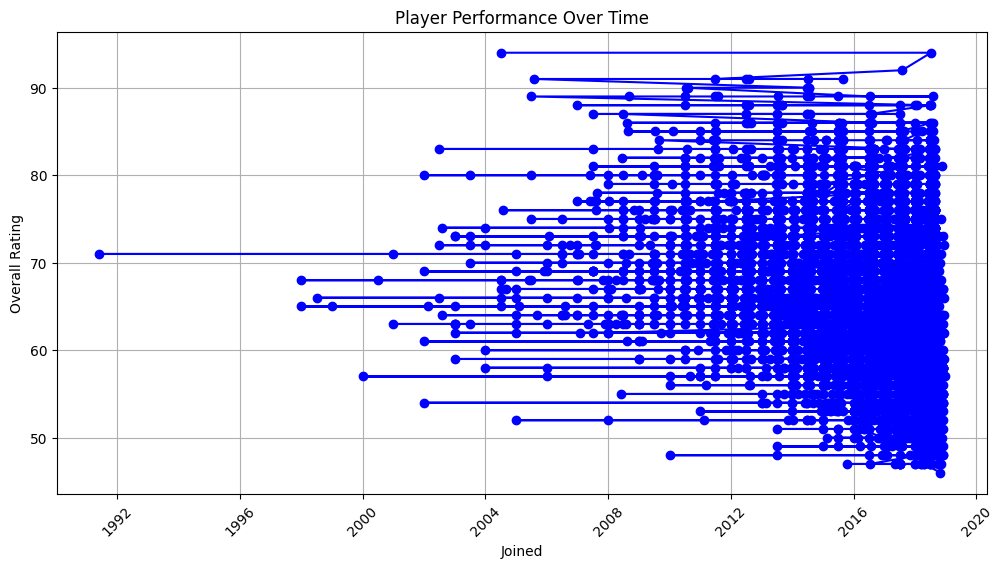

In [39]:
# Assuming you have a column 'Overall' and 'Joined' in your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(data['Joined'], data['Overall'], marker='o', linestyle='-', color='b')
plt.title('Player Performance Over Time')
plt.xlabel('Joined')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

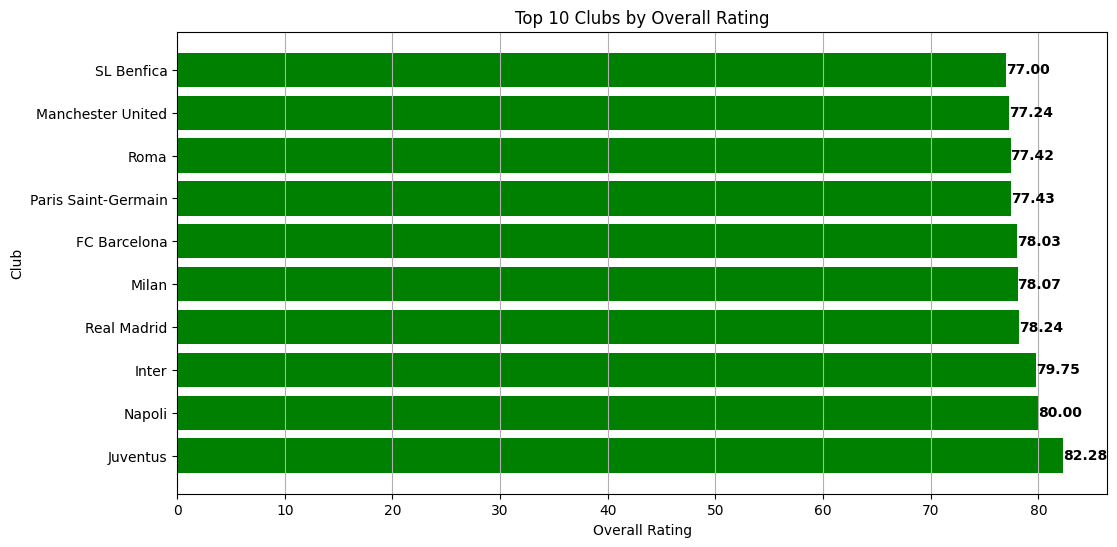

In [42]:


# Bar graph for the top 10 clubs by overall rating
plt.figure(figsize=(12, 6))
team_rankings = data.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
plt.barh(team_rankings.index, team_rankings.values, color='green')
plt.title('Top 10 Clubs by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Club')
plt.grid(axis='x')

# Adding labels to the bars
for index, value in enumerate(team_rankings.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontweight='bold')

plt.show()

